# Imports and defs

In [ ]:
# !pip install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *

import numpy as np
import pandas as pd
import plotnine as gg

In [ ]:
#No bias for now.

def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    #DistributionWithConstant(
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

# First experiments

In [ ]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.01
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 100 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)



theta [ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996 -1.19276461 -0.20487651
 -0.35882895  0.6034716  -1.66478853 -0.70017904  1.15139101  1.85733101
 -1.51117956  0.64484751]
Experiment: Step 0
 Laplace sample: array([ 0.19443738,  0.02824125,  0.93256051,  0.21204332, -0.36794457,
        2.1114884 , -1.02957349, -1.33628031, -0.61056736,  0.52469426,
       -0.34930813, -0.44073846, -1.1212876 ,  1.47284473, -0.62337224,
       -1.08070195, -0.12253009, -0.8077431 , -0.23255622,  1.33515034])
 Sample: array([ 0.1564659 ,  0.31366948,  1.24013015,  0.71112765,  0.42555813,
       -2.03717368,  0.30523463,  0.00997115,  0.39819087, -1.32949691,
        0.04384089, -0.06064451,  0.12986675,  0.43253615,  1.06813925,
       -0.91396964,  0.27432329,  1.5405804 , -1.14997688,  1.27676193])
 Steps taken: 500
 Sample: array([-0.74765022, -0.05935307, -0.26768669, -0.27596914, -0.70362541,
        0.48750721, -0.8212

 Sample: array([-0.29417787,  0.56015151, -1.30012155,  2.0903219 ,  1.70823341,
       -0.62165631,  1.32358419, -0.3661234 , -0.38680934,  0.25778136,
        0.01532956,  0.23016963, -2.40693174, -0.39123128, -0.85871838,
       -0.94708187,  0.0802806 , -1.01451596,  2.37043382, -0.8796755 ])
 Steps taken: 500
 Sample: array([-0.27754456, -0.37163028, -0.53751938, -0.15126753,  0.36858709,
       -0.81767001, -0.35130957,  0.64058885, -0.20290001, -0.20195021,
       -0.9803005 ,  0.39082419,  0.33189238, -0.33411534,  1.21808577,
       -0.69433782, -0.66135092,  0.58088132, -1.3466624 , -0.94981885])
 Accept proportion: 0.788000
 Steps taken: 500
Experiment: Step 9
 Laplace sample: array([-0.93475531,  1.77461726,  5.08675539,  1.02004981, -2.18803725,
        5.00310143,  1.71898408, -6.73110417, -1.54049663,  3.13816979,
        4.9331006 ,  0.17154044,  4.85980546,  2.37447429,  0.80134518,
       -2.25577741, -0.41466724,  7.14056223, -0.38281049, -2.96949635])
 Sample: array

 Sample: array([ 0.60816142, -0.469933  ,  0.23705762, -0.95995253, -0.72194142,
       -1.13697803,  0.17129467, -1.05884837, -0.50822475, -0.48856845,
       -0.41617534, -0.35428876, -0.46966761, -0.6375323 , -0.34954741,
       -1.31070533,  2.68248241, -0.81418514,  1.4372576 , -0.04352774])
 Steps taken: 500
 Sample: array([ 0.34079714, -0.42781738,  0.13728343,  0.3447483 ,  0.13898901,
       -0.33544678, -1.00475745, -0.35477518, -1.85770261, -0.10699645,
       -0.82969292,  0.36450885, -0.23196688,  0.71579842, -1.19986623,
       -0.29422472,  0.27569252,  0.61671139, -0.1132342 , -1.05983329])
 Accept proportion: 0.796000
 Steps taken: 500
Experiment: Step 18
 Laplace sample: array([  2.01742963,  23.65116553,  28.46879209,  10.24013892,
        -8.0172592 , -10.66393466,  -6.57773838,  -4.23934246,
         9.16672238,   6.27133065, -15.37765452,   8.06254256,
        -2.68886809,  -3.41282759,  -9.41127949,  -0.64504176,
         0.11072858,  22.66681499,   1.27816126, -

 Sample: array([-0.42342245, -0.2200223 ,  0.60602847, -0.93972791, -0.04555998,
        0.626371  , -0.55291413, -0.67769162, -0.23118983, -0.5467382 ,
       -1.15798862,  0.94694557,  0.15655902,  0.36815229, -0.52150491,
       -1.04076907,  0.49282908,  1.05925614, -1.08094064,  0.10397168])
 Accept proportion: 0.808000
 Steps taken: 500
Experiment: Step 26
 Laplace sample: array([  8.16664855,  21.07351963,  26.17485705,  12.90859721,
        -8.08006285,   2.75672333,  -2.6337757 ,  -6.64880754,
        12.83161639,  13.39046975, -24.07482484,  -1.35247818,
       -11.76448625,  -2.76036828, -17.01897254,  -1.69960037,
        -0.5358357 ,  13.68970675, -14.85435652, -18.70973972])
 Sample: array([-0.41924092,  1.10320107, -0.924807  , -0.53756547,  0.0639625 ,
        0.50325521, -0.15752368, -0.77249402, -0.3849617 ,  0.22325013,
       -0.1727214 ,  0.28352773, -1.15074047, -0.00737927, -0.09228953,
       -1.61739247, -0.13108652,  0.46836898, -0.39483408,  0.42806335])
 Ste

 Sample: array([-1.12354404,  1.06774473,  1.07756084,  0.10637451, -1.72711279,
       -0.57883855,  0.5578346 ,  0.55315335,  0.05501875, -0.24896427,
        0.7468102 , -1.11606601, -0.78364232,  0.4087047 , -0.36932808,
       -1.38345091,  1.09230302,  2.19213335, -0.18802673, -1.52386918])
 Steps taken: 500
 Sample: array([ 0.1118539 ,  0.38902496,  0.90290529,  0.09725166, -0.15265524,
        1.52617686, -0.92160966, -0.96219409, -0.12306015, -1.24638385,
       -0.88013412,  0.92696464,  0.66081806,  0.02738163, -0.49023423,
       -0.46758643,  0.05995438,  1.77167983, -0.19489494, -0.16474234])
 Accept proportion: 0.836000
 Steps taken: 500
Experiment: Step 36
 Laplace sample: array([ 80.45514476,  77.34553537, 105.48861743, -49.30551416,
       -70.02448901,  21.59233792, -37.31683846,  12.15667185,
       -59.43186044,  31.11662482, -55.0271049 ,  53.10696189,
        -1.37485571,   2.82153019, -28.43477257,  10.53958274,
        40.1198743 ,  11.77999336, -32.1282389 ,  

 Sample: array([ 0.57097418, -0.22691914,  0.93044688,  0.05463668,  0.34946996,
        0.66361518, -1.02516054, -0.17623479, -0.43520347,  0.16695537,
       -0.07699668,  1.40792116,  1.06178694,  0.28949577,  0.08573126,
        0.12350227, -0.23032423,  1.90256044, -0.05805317,  0.19032146])
 Accept proportion: 0.818000
 Steps taken: 500
Experiment: Step 44
 Laplace sample: array([ 8.70869971,  9.94482462, 16.08268939, -8.85852713, -7.74066493,
       -1.15589009, -7.40316085, -3.078728  , -6.27893592,  0.27405479,
        2.13716478,  8.0079588 ,  5.28974993,  2.57555567, -8.59908862,
        7.8886793 ,  4.50189911,  1.52793633, -5.21290995, -1.50166908])
 Sample: array([-2.40344656,  0.27263469,  1.70850695,  0.18757262,  1.58435079,
       -0.67473252, -1.14087788, -1.85900554, -0.54816161, -0.20729877,
        0.0987969 ,  0.31138709, -1.14833702,  1.83287484,  0.66118664,
       -0.95365152,  2.08646298, -0.23438769, -0.445376  ,  1.28816395])
 Steps taken: 500
 Sample: arra

 Sample: array([-1.26959371,  0.66532539,  1.98896925, -0.17541792, -0.78127926,
        1.76371317, -0.37783991, -0.03829705,  0.47389262,  0.29300717,
        0.42450764,  0.05122493,  0.65101853,  1.75202649, -1.07410292,
       -0.2571902 ,  1.94028066,  2.15345171, -1.26946197,  0.21593902])
 Steps taken: 500
 Sample: array([ 0.61240866, -0.06185436,  1.70226831,  0.55844183,  0.3613152 ,
        0.98054176, -0.56129226, -0.36401536,  0.23888448,  0.05285548,
       -1.09094743,  0.94748422,  0.28586933,  0.66554386, -0.31940555,
       -0.35876226,  0.50250755,  0.93158376, -0.16112392, -0.01673149])
 Accept proportion: 0.838000
 Steps taken: 500
Experiment: Step 54
 Laplace sample: array([ 2.32892785,  3.79532017,  4.82477298, -1.62809433, -0.72162352,
        0.31264092, -1.96212903, -1.7782    , -1.19143997, -4.36280802,
        0.40844285,  0.0681268 ,  3.35565819,  2.09364475, -3.58744901,
       -1.07706211,  0.29196551,  4.1576695 , -1.15490206, -1.52494612])
 Sample: arra

 Sample: array([-1.43893153,  0.82191874,  2.01465023,  0.76569671,  0.07539871,
        0.63303209,  1.01440776, -2.08644918, -0.86995617, -1.26998314,
       -0.02680418,  0.91605696, -1.20013698,  0.90490889, -1.87530638,
        0.73258896,  0.43311005,  2.2843334 , -2.18049296,  1.61507965])
 Steps taken: 500
 Sample: array([-0.27065379,  0.32354781,  0.13374619,  0.12933103,  0.97685708,
        1.20486675, -0.29451582,  0.00269966, -0.29905703, -0.28308324,
       -0.56169259,  0.43762461,  0.39572507,  0.44786486, -1.07221392,
       -0.31457914,  0.28678421,  2.24499357, -0.37141007,  0.27019031])
 Accept proportion: 0.820000
 Steps taken: 500
Experiment: Step 63
 Laplace sample: array([-1.08211506,  2.25802485,  3.86132038, -0.86470611, -0.59833704,
        0.97803254, -1.7278625 , -2.4212538 , -0.90256316, -3.91089973,
        0.99141075,  0.20984357,  1.64006921,  2.32704138, -3.22222818,
       -0.42168881, -1.2279831 ,  2.13129433, -2.49335084, -0.48811974])
 Sample: arra

 Sample: array([ 0.50731142, -0.00863208,  1.71077141,  0.27115969,  0.126467  ,
        0.629643  , -0.64983365, -0.43732685, -0.22270438, -0.05602994,
       -1.42410751,  1.28001414,  1.09776437, -0.08538297, -1.31757118,
        0.40372331,  0.34731445,  1.71299219, -0.92245871,  1.42659238])
 Accept proportion: 0.856000
 Steps taken: 500
Experiment: Step 71
 Laplace sample: array([-0.59735886,  2.85659106,  3.98985985, -0.84592989, -0.39744016,
       -0.16101515, -1.93533571, -2.18712648,  0.11877292, -4.01967842,
        0.28966609,  2.42294769,  1.80958919,  1.76759612, -2.38891356,
       -1.0941115 ,  0.02482417,  1.69075129, -1.90567814, -1.12581675])
 Sample: array([-1.2855557 , -1.70392206,  1.94956439, -1.14565204,  0.40950346,
        0.17257982,  0.64723225,  0.41900714, -0.23616781,  0.42249039,
        0.12260281,  0.23639969, -0.67862575,  0.73043717, -0.28675951,
       -2.08121362,  2.74856725,  0.9301299 , -0.97144678,  0.22788024])
 Steps taken: 500
 Sample: arra

 Laplace sample: array([-1.07993894,  2.70051721,  3.17373249, -1.06830829, -0.11375521,
        0.26715108, -1.90823857, -0.40611517, -0.83654065, -1.99147153,
       -0.00857822,  0.9710436 ,  0.08177769,  3.30423394, -1.14274979,
       -1.27506965, -0.67321706,  0.88271306, -2.30856457,  1.27051264])
 Sample: array([-1.08754047, -0.41685775,  2.30904197,  1.10990877, -0.63069401,
        0.76945229,  0.25181188, -0.00417315,  0.61850767, -0.72059082,
        0.30325025,  0.35779535, -0.43902121,  1.34898545, -0.5055762 ,
       -1.59705026,  2.23578046,  1.41558862, -1.59170938,  0.30267308])
 Steps taken: 500
 Sample: array([-0.52957864, -0.61541804,  1.65344985,  0.83087635,  0.5218908 ,
        0.87228269,  0.15528384, -0.93788624, -0.45472988, -0.10196012,
       -0.36829947,  0.82789075,  1.06938837,  1.01792659, -1.24252691,
        0.17492307,  0.45871537,  1.25998268, -0.74361951, -0.54424615])
 Accept proportion: 0.832000
 Steps taken: 500
Experiment: Step 80
 Laplace samp

 Sample: array([ 0.00545019, -0.46602361,  0.68125481,  0.24978635,  0.27003   ,
        1.33807674, -0.24433428, -0.53593912, -0.12063127, -0.74158792,
       -0.62441247,  1.07949444, -0.19151456,  0.48499707, -0.6389785 ,
        0.28368208,  1.17438353,  1.49012959,  0.01426488,  0.3011612 ])
 Accept proportion: 0.828000
 Steps taken: 500
Experiment: Step 88
 Laplace sample: array([-0.94181379,  0.07864253,  2.06571093, -0.50334664, -0.3856107 ,
       -0.26720833, -1.65138723,  0.15703674, -0.24694438, -0.72865752,
        2.20752875,  0.92823463,  1.85409224,  0.89278959, -1.80405365,
       -1.58825212,  1.68685059,  1.05794052, -1.32916567,  0.88012095])
 Sample: array([ 0.42140429,  1.05202941,  1.2269926 ,  0.24541717, -1.02352698,
        0.2669114 , -0.02290246, -1.39409118, -1.65689444, -0.38852259,
        0.25020406, -0.06327526, -0.49865942,  1.87208556, -1.29103123,
       -0.83962884,  1.44147813,  2.65235285, -2.63580497,  0.54535981])
 Steps taken: 500
 Sample: arra

 Sample: array([-0.67194543, -0.91187822,  0.94637693,  0.29892646, -0.30035849,
        0.67949562, -0.79853346,  0.10321106, -0.45882023, -0.81253045,
       -0.18987581,  0.96196032,  0.8234597 ,  1.25208494, -0.98622581,
        1.02381669,  0.80635914,  1.9537522 , -0.05995161,  0.20172049])
 Accept proportion: 0.802000
 Steps taken: 500
Experiment: Step 97
 Laplace sample: array([ 0.17109447,  1.04578872,  1.28008674,  0.19991601,  0.48899574,
        0.58068201, -1.54855464, -0.04344473,  0.17813967,  0.03670171,
        0.20273302,  0.55127711,  1.42103917,  0.47136063, -0.70071211,
       -0.19171256,  1.50537351, -0.11275279, -1.76411674,  0.42396917])
 Sample: array([-0.63544182, -0.14538485,  1.57345297,  0.45211325, -0.88900655,
        0.6986737 , -0.08809858, -0.24803753,  0.48004005, -0.74599133,
       -0.59394343,  0.22921379, -1.06048501,  0.88196899, -0.90278535,
       -1.03663898,  1.66737452,  1.65883125, -1.9622031 ,  0.49817159])
 Steps taken: 500
 Sample: arra

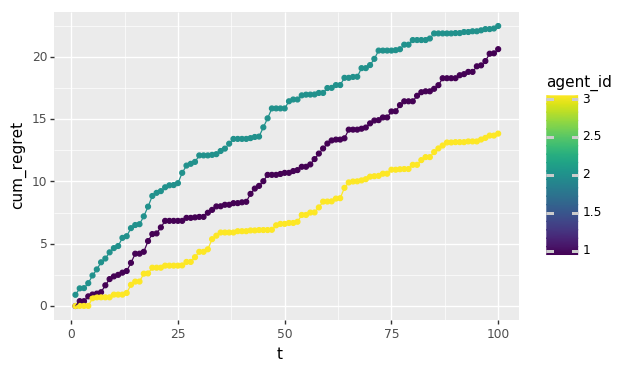

<ggplot: (8732152928157)>


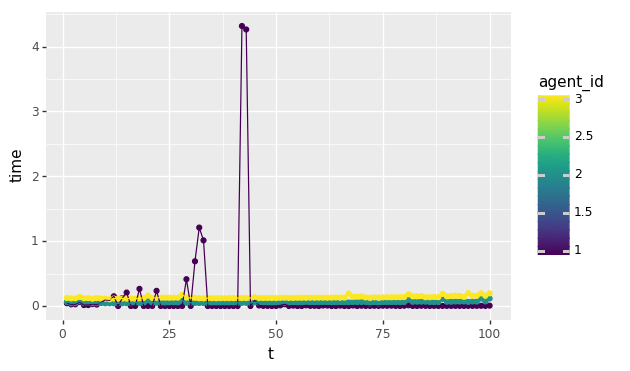

<ggplot: (8732152902121)>


In [4]:
for seed in [5]: #range(1):
    agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



In [5]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.02
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=200 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 500 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)



theta [-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559 -0.84174737
  0.50288142 -1.24528809 -1.05795222 -0.90900761  0.55145404  2.29220801
  0.04153939 -1.11792545  0.53905832 -0.5961597  -0.0191305   1.17500122
 -0.74787095  0.00902525]
Experiment: Step 0
 Laplace sample: array([-1.85040397,  0.33048806, -0.31569321, -1.3500021 , -0.698171  ,
        0.2399512 , -0.55294944,  0.29952681,  0.5526637 , -0.84044301,
       -0.31227067,  2.14467809,  0.12110558, -0.84682875,  0.06046245,
       -1.33858888,  1.13274608,  0.37030484,  1.0858064 ,  0.9021794 ])
 Sample: array([-0.39788861, -2.11901846,  0.31624417, -0.60455421,  0.94020969,
        0.43466388,  1.71177901, -0.48318329,  0.99310338, -0.93832521,
       -0.51599286, -0.4286486 ,  0.88539294, -2.0378996 , -1.70263575,
       -1.74408716,  0.40874722, -1.49305079,  0.79843092, -0.25534192])
 Sample: array([-0.39430649, -0.43947495,  0.23923243,  0.45859087, -0.82910339,
       -0.45356497,  0.19218846, -0.42378818,

 Sample: array([-0.621302  , -1.02524524, -0.13235259,  0.82431919, -2.79713676,
        0.21368317, -0.60688849,  0.16309445,  1.2687489 , -0.74326113,
        0.50548612,  0.75602812, -0.17486125,  1.59789901, -2.4104711 ,
        0.38534416,  0.36918972, -0.16291178, -1.75932007,  0.4880836 ])
 Sample: array([ 0.35871216, -1.59682147, -0.55299806,  0.29063917, -0.39744297,
        0.89534541, -1.43801365,  0.05830583,  0.00432683, -1.01174608,
        1.07194644, -0.20223123,  1.47306143,  0.29555903,  0.12286536,
       -0.94048449,  0.04674487,  0.06929976,  0.30010112,  1.35507732])
 Accept proportion: 0.735000
Experiment: Step 10
 Laplace sample: array([-2.32037052,  3.86428252, -6.53201226, -0.78252489, -4.1216138 ,
       -1.31575793,  3.581387  ,  3.26659042, -5.59791926,  1.9490588 ,
        2.70177627,  4.27017223, -2.70180081, -1.89991891,  0.82147473,
       -2.67924433, -0.13018858,  1.37217689, -0.31009196, -3.23987568])
 Sample: array([-1.82377567, -0.4586628 ,  0.2813

 Sample: array([ 0.08044906, -0.10708984, -0.23662188, -0.63642697, -0.50143147,
       -0.56136129,  0.46416885, -0.6457374 ,  0.65064044, -0.42139788,
       -0.08720432,  0.73511864,  0.46887794,  0.24353501,  0.43034753,
       -0.4586318 , -0.38593327, -0.39520947,  0.09673155,  1.01557598])
 Accept proportion: 0.735000
Experiment: Step 19
 Laplace sample: array([-0.14035071,  5.87829701, -2.83190736, -2.27678765, -5.71590878,
       -0.03376579, 10.04409804, -0.18447469, -5.51436985,  1.83826911,
        7.39442158,  4.99542571,  1.07370004, -2.23619102,  5.17009724,
       -4.50021951,  0.85110978,  8.10206112, -1.92626907, -3.5585653 ])
 Sample: array([-0.10567169,  0.34191464,  0.82676978,  1.13980374, -1.14033739,
        0.45251622, -1.36004852, -0.08870866,  0.06768308, -1.27087176,
        1.68267053,  0.82929499,  0.49519574, -0.91939856,  0.85307057,
       -1.10310919,  1.08910111, -1.82142737, -0.50730184,  1.12891952])
 Sample: array([ 0.3231692 ,  0.05407974, -0.7433

 Sample: array([-0.16739038, -0.75985518, -1.10055477, -0.07221485, -1.45178239,
        0.58583139,  0.68594388,  0.52718663, -0.02044486, -1.40668716,
        0.49144293,  0.36230485,  0.57877007, -0.95968227,  0.65341188,
        0.19519837,  1.7869053 ,  1.35892088, -0.05574502,  1.08876045])
 Accept proportion: 0.710000
Experiment: Step 29
 Laplace sample: array([-7.35025802, -0.42020442, -2.91776921,  2.63325749, -6.32970722,
        0.48890919, 15.98928931,  1.03942609, -2.27842334,  1.94855314,
        6.53688183,  7.33192456, -1.09501985, -7.35076914,  6.14006296,
       -8.08692339,  6.08983484, 10.06117608, -4.08432903, -4.64158809])
 Sample: array([-0.98523626, -0.40374959, -2.71404387, -0.05700873, -1.97489405,
        0.53839701, -1.7328968 , -1.46717228, -0.42680233,  0.88957352,
        1.16228073,  1.9904568 ,  1.10198508, -0.01622324,  0.31523204,
       -0.85831934,  0.38548097, -0.77869905, -1.38851901, -0.59262803])
 Sample: array([-0.07635027, -1.22191477, -1.1766

 Sample: array([-0.77324585,  0.65024451, -1.40441337,  0.83601161,  0.05858179,
        0.7763445 ,  0.47632548, -1.15504679,  0.10466661, -0.89103202,
        1.43879215,  0.2265775 , -0.16890618, -0.57168918,  0.06938481,
       -0.09744663,  1.48908591,  1.30412122,  0.23183984, -1.07772452])
 Sample: array([-0.17709187, -1.67866525, -2.44766759,  0.46951765, -0.84323078,
       -0.13535046, -0.65522089,  0.22093555, -0.91680864, -0.91454244,
        0.44273175,  0.49670224,  1.67920669,  0.03196992,  0.71949778,
        0.09315585,  1.84235343,  0.65794128, -0.32004083,  0.04014386])
 Accept proportion: 0.785000
Experiment: Step 40
 Laplace sample: array([ -9.55279582,  -9.38830837,  -1.60044413,   6.12601318,
       -18.18223937,  -4.01216642,  16.06669188,   5.16908996,
        -7.48810306,   0.67516139,  -0.5018628 ,  16.40893176,
         0.04992473,  -3.28800857,  17.14118816, -10.68819945,
        11.78120263,   6.93592798,  -9.72991882,  -3.0957491 ])
 Sample: array([-0.717

 Sample: array([-0.58357247, -0.61689476, -0.95452035,  0.09518181, -1.56271516,
       -0.04886317, -0.40936122, -0.36899093, -0.18512201, -0.76375465,
        1.74831129,  2.12920663,  0.69140561, -1.72291444,  1.70870207,
       -0.76712006,  1.56891544,  0.4708209 , -0.12710538, -0.77985967])
 Sample: array([-0.07788696, -1.29493213, -1.22236739, -0.69484444, -0.08194377,
       -0.29443013, -0.87547371,  0.75688814, -1.25054953, -1.08287054,
       -0.0634261 ,  0.93103098, -0.20378774, -1.34509169,  1.42906865,
        0.30794782,  0.93275996, -0.36804859, -0.0709126 ,  0.01227591])
 Accept proportion: 0.805000
Experiment: Step 51
 Laplace sample: array([  4.50984181,  -2.86852074,  -8.24841565,  13.72696008,
       -14.35500924,   5.84274473,  36.52601716,  11.27384541,
       -17.60354958,  -4.42800041,   1.7448596 ,  18.056546  ,
         4.79578248, -18.92544895,  11.94811514, -11.75813048,
        26.79205004,  -4.4728859 , -12.59974081,   4.56354502])
 Sample: array([-0.908

 Sample: array([-0.51007984,  0.45041333,  0.10120365,  0.22095475, -0.66631645,
        1.28509089, -0.7148755 , -0.9660342 ,  0.74275344, -0.96153407,
        0.2585756 ,  1.835028  ,  1.614863  , -0.55433895,  2.35230273,
        0.30566309,  0.79334281, -0.37477632, -1.33718791, -0.52114162])
 Sample: array([ 0.49934571, -0.6452257 , -1.91303165, -0.19700613, -1.99083558,
       -0.65322196,  0.25014309, -0.05503268, -1.48519705, -0.65930017,
        0.68106568,  1.16799465,  0.34726873, -0.67453219,  0.61528116,
        0.05395633,  1.51246954, -1.09193783, -0.10267386,  0.16102277])
 Accept proportion: 0.790000
Experiment: Step 60
 Laplace sample: array([  2.46103269, -19.24272001, -57.01112243,  41.12891373,
         0.57747218,  -6.10480741,  60.74620845, -14.91987787,
        -0.78706391, -26.97417845,   4.45859536, -10.30139931,
       -19.48052506, -18.40607013,  17.54404375,  -4.6040821 ,
        10.74122874,   1.59412313, -28.15178364,  -5.14367299])
 Sample: array([-0.964

 Sample: array([ 0.18445345, -1.4507047 , -2.26780947,  0.22766932, -1.23804496,
       -0.31594332,  0.3846751 , -0.26382571, -0.07279892, -0.31337123,
        1.6409407 ,  1.01287455,  0.46063858, -0.46201877,  0.6666574 ,
       -0.33822512,  0.21724102, -0.02292501,  0.14615386,  0.32649881])
 Accept proportion: 0.795000
Experiment: Step 69
 Laplace sample: array([-1.02760149e-01, -1.91924029e-03, -3.80864561e+00,  1.73886311e+00,
       -2.63614270e+00, -1.81693234e-01,  1.64289937e+00, -3.89694849e-01,
       -1.56102865e+00, -2.18397089e+00,  1.87047007e+00,  3.87095079e+00,
       -1.32687994e+00, -2.07728783e+00,  1.88855204e+00, -3.99400467e+00,
        7.85637389e-01,  1.66657220e+00, -3.05970212e+00,  5.08612286e-01])
 Sample: array([ 0.24809672,  0.04155181, -1.82067226,  1.62630563,  0.83677108,
       -0.24845054, -0.54829758, -2.3211013 ,  0.70731862,  0.06865644,
        1.39111899, -0.01264155,  1.49215461, -1.16588513,  1.75890803,
        0.01887445, -0.98508892,  0

 Sample: array([ 0.9554979 , -0.77079494, -1.49500517, -0.50356804, -1.49266388,
       -1.47108902, -0.74483982, -0.32838354, -0.61272731, -0.57729254,
        1.13024743,  0.1911183 ,  1.34565129, -0.80195431,  0.87492471,
       -0.87644484,  1.39691839,  0.67904798, -0.17334032,  0.3792371 ])
 Accept proportion: 0.790000
Experiment: Step 79
 Laplace sample: array([-0.31434757,  0.00852713, -2.17817977,  1.79138696, -3.95090459,
        1.7196679 ,  1.63068573, -1.10442719, -1.19950685, -2.07159162,
        1.32145866,  2.9417432 ,  0.0983943 , -0.96145178,  0.5168369 ,
       -4.04903657,  2.06350955,  1.13845696, -2.25154571,  1.35792769])
 Sample: array([-0.16199843,  0.13908508, -1.27926023,  1.35333013, -1.03836853,
       -0.06651419, -0.46428817, -2.33057328, -0.83337384, -1.03981346,
        1.90924718,  2.2447256 ,  0.80669111, -1.21485478, -0.13501505,
       -1.16493915,  0.61233526, -1.30774551,  0.18370429,  0.47835817])
 Sample: array([-0.56020197, -0.73845401, -1.2526

 Sample: array([ 0.092258  , -0.71024236, -2.2503205 , -0.54399609, -1.15864624,
       -1.48397834, -0.74983893,  0.08013947, -1.15798902, -0.14233093,
        0.40454402,  1.24499132,  0.9279516 , -0.38286322,  0.50839413,
       -0.3010159 ,  1.12395532,  0.11083558, -0.12846262,  0.40669434])
 Accept proportion: 0.765000
Experiment: Step 89
 Laplace sample: array([ 1.29237616, -1.04070717, -2.87117401, -1.15913667, -3.21651665,
       -1.08286882,  0.97340948,  0.66455605, -1.22253923, -3.0628066 ,
        1.79841247,  3.71205915, -0.67177556,  0.45208603,  0.94825916,
       -4.43844822,  0.24687997,  0.37773218, -2.10524481,  1.27619354])
 Sample: array([-1.07459994,  0.1836326 , -1.61716198,  1.94457021, -1.4111537 ,
       -0.95918856,  1.13605302, -2.25771219,  0.27732583, -1.17356652,
        0.82497705,  2.37532411,  0.90009938, -0.71972097,  0.19012864,
       -0.66076554,  1.00197707, -0.58792173, -0.8416873 , -0.75305134])
 Sample: array([ 0.09517481, -0.2904946 , -1.8595

 Sample: array([-0.18624367, -0.55751586, -1.54260171,  0.41721064, -1.5120479 ,
       -1.29869528, -0.65755528, -0.75613625, -1.71537462, -0.45041745,
       -0.62176678,  1.29252354,  0.76125289, -0.382483  ,  0.7625193 ,
       -0.04695557,  0.04864083,  0.17922635, -0.05994463,  0.48586286])
 Accept proportion: 0.825000
Experiment: Step 99
 Laplace sample: array([-0.13533876, -0.13142546, -1.93603638,  2.47280883, -1.67651341,
       -0.94242626,  2.57742491, -0.05124916, -0.67577052, -2.44823639,
        0.57173296,  3.85685655, -0.1466192 , -1.05922448, -0.48898104,
       -1.33496051, -0.33093836,  1.7846507 ,  0.32586616,  0.20945294])
 Sample: array([ 0.25814867,  1.43314513, -0.72633788,  1.44672123, -0.62839064,
       -1.05727819,  1.55212274, -0.27646784,  0.57038132, -1.19284912,
       -0.51203989,  1.45378155, -0.26497207, -0.46458105,  1.42953999,
       -0.90342149,  0.26460809,  0.33097914, -0.05646926,  0.46688039])
 Sample: array([-0.68352755, -0.95600951, -0.9716

 Sample: array([-0.51616063, -0.19184694, -1.78305961,  0.39416243, -1.2717435 ,
       -1.25401888,  0.53291697, -0.79259966, -1.0866759 , -0.40305206,
       -0.47215108,  1.43348412,  0.59691208, -0.54179369,  0.98307402,
       -0.17208691,  0.65546431,  0.03756536,  0.34319511,  0.09365547])
 Accept proportion: 0.805000
Experiment: Step 109
 Laplace sample: array([ 0.12149682, -0.002099  , -0.2148764 ,  1.06545847, -1.38352742,
       -1.26903497,  0.21896485,  0.28088933, -0.39237075, -0.4463625 ,
        0.43032039,  1.58186603,  0.22567141, -1.59360468,  2.00289312,
       -0.88110194,  0.00227961,  1.67099169,  0.22236652,  0.0052731 ])
 Sample: array([-0.13274328,  0.1780393 , -0.50910031,  1.59520632, -0.23885091,
        1.07816191, -0.91706202, -1.85882527,  0.33052092, -0.23195956,
        0.17116435,  1.7337868 ,  0.91635347,  0.40457866,  0.48811996,
       -1.63425869,  0.79990278, -0.32292413, -0.7239695 , -0.69330792])
 Sample: array([-0.73202876, -0.82024745, -1.629

 Sample: array([ 0.21581078, -0.48100016, -1.27432283,  0.74062703, -1.81304252,
       -1.70959555,  0.32566276, -0.96613793, -1.22036324, -1.04674514,
       -0.65782832,  1.3018557 ,  0.44148784, -0.66351227,  0.8391873 ,
        0.05963445,  0.37756636,  0.32007175,  0.00923281,  0.98080635])
 Accept proportion: 0.805000
Experiment: Step 119
 Laplace sample: array([ 0.68121334,  1.24214545, -2.57929394,  1.27793391, -2.36547371,
       -0.62130449,  0.51197949, -0.90465821, -0.0716038 ,  0.04478766,
        1.30958971,  2.2577888 ,  0.85874613, -0.93791599,  0.03155998,
       -1.24480729, -0.16003609,  2.16423231, -1.74841648,  0.55334739])
 Sample: array([-1.76004711,  0.26337181, -1.59112667,  1.5594343 , -1.18609886,
        0.05814525, -0.91997895, -1.43157762, -1.2041568 ,  0.22677538,
       -0.47417073,  3.55550816,  1.60401296,  0.30815264,  0.3897453 ,
       -0.93225729,  0.30298187,  0.20323841, -0.01963708,  0.83262003])
 Sample: array([ 0.01461114, -0.71271254, -1.727

 Sample: array([-0.47813876, -0.48234474, -1.5656514 ,  0.66628193, -0.84195026,
       -1.60281803,  0.29425426, -0.72150304, -1.41268925, -0.53231288,
        0.49651902,  1.54054154,  0.25042919, -0.1951319 ,  1.53959677,
        0.41408139,  0.36755217,  0.69704766,  0.04938869,  1.29108626])
 Accept proportion: 0.810000
Experiment: Step 129
 Laplace sample: array([ 0.15619393,  0.56531823, -1.08302783,  1.37681444, -2.60617795,
       -0.22610037,  0.08343051, -0.00273685,  0.68820911, -1.19502335,
        0.55674917,  1.66291955, -0.16880494, -1.64203756,  2.11443674,
       -1.01882338,  0.56680496,  2.72923835, -1.25111851,  0.78041491])
 Sample: array([-0.89895405,  0.67146535, -1.79360364,  0.86304646, -0.05128858,
       -0.6493985 ,  0.51776763, -1.32743454, -0.48370493, -0.63452312,
        0.10020646,  1.72530659,  1.04376252, -0.56907   ,  1.50960892,
       -0.79648648, -1.27948991, -0.26718816, -0.9476273 , -0.64054254])
 Sample: array([-0.6042442 , -1.07241534, -1.448

 Sample: array([-0.4022409 , -0.19348869, -1.44716055,  0.50704021, -1.47049703,
       -2.00382288,  1.32510991, -0.06858295, -0.87906876, -1.2533906 ,
        0.55496636,  1.46416435, -0.01253036, -0.57722301,  1.10780505,
        0.52626916,  0.31092924,  0.87383951, -0.5002597 ,  0.1459761 ])
 Accept proportion: 0.815000
Experiment: Step 139
 Laplace sample: array([ 1.63608248,  0.50498975, -3.02092029,  2.62218019, -1.52364861,
       -0.5894235 ,  1.93855669, -0.84939512, -0.67053465, -0.37683009,
        0.00396018,  3.10784916, -0.80869603, -1.82461615,  1.2495935 ,
       -2.54263238, -0.15883939,  3.02552756, -0.52769761,  0.04688266])
 Sample: array([-1.6406748 ,  0.57243751, -1.3481668 ,  1.57278987, -1.07744182,
        0.18343592,  0.20491011, -0.80354718,  1.17497628, -0.00422829,
        0.48878328,  2.71106005,  0.91123099, -1.14159279,  0.60821583,
       -0.90145389,  0.29345598, -0.08015747, -0.76586014, -1.10578043])
 Sample: array([-1.10418238, -1.02437301, -0.737

 Sample: array([-1.18395056, -0.11141347, -1.32996022,  0.71112849, -1.46334334,
       -1.66874071,  0.40070327, -0.98261898, -1.62843685, -0.58232034,
        0.6047588 ,  1.61556285,  0.10250909, -0.1805717 ,  1.06375722,
        0.31312455,  0.35967683,  1.06374957, -0.5293122 ,  0.97310683])
 Accept proportion: 0.815000
Experiment: Step 149
 Laplace sample: array([ 0.63342466,  0.6465477 , -1.59444836,  2.31244649, -2.72435161,
       -1.87413276,  1.44922519, -0.51711247, -0.434023  , -1.52007641,
        0.53670002,  1.91471281, -1.10172003, -1.03364987,  1.19924757,
       -1.75241705,  0.34449028,  2.14372616, -0.53302638, -1.02131163])
 Sample: array([-1.81294735, -0.9306983 , -1.46013999,  1.47861188, -0.53783634,
       -0.03233371, -0.20615789, -1.6490504 ,  0.21038138, -0.30717797,
        0.47820107,  1.70990151,  0.8456948 ,  0.4055109 ,  0.64123528,
       -1.08922175, -0.30494174,  0.72930961, -0.74256161, -0.10257028])
 Sample: array([-1.75108734, -0.5520473 , -1.636

 Sample: array([-0.98567097, -0.33401345, -1.32820057,  1.21677848, -1.11682338,
       -1.24517918, -0.31206449, -1.00829941, -1.81074315, -0.63698022,
        0.13929178,  1.91618296,  0.20654309, -0.85553872,  1.61827197,
        0.46475686, -0.641034  ,  0.79691796, -0.65035505,  0.80651777])
 Accept proportion: 0.790000
Experiment: Step 158
 Laplace sample: array([ 0.73158834, -0.49207402, -1.60076111,  2.49437956, -3.05625422,
       -1.09473591,  0.9273574 , -1.11527262,  0.09875407,  0.0820995 ,
        0.58521373,  2.21651443,  0.56007202, -1.60721078,  1.64127152,
       -2.44869291,  0.93900991,  2.62407443, -0.10941787,  0.93521963])
 Sample: array([-1.29665425,  0.69732184, -1.97595686,  1.645051  , -0.91400875,
       -0.13117809,  0.04783219, -1.42971199, -0.44748373,  0.21980779,
        0.54415304,  2.58457148, -0.19344525, -0.32671437,  1.53087456,
       -1.47335624, -0.67988607, -0.13587605, -0.69050065,  0.65361354])
 Sample: array([-7.22646800e-01, -6.68416895e-01

 Sample: array([-1.14933936e+00,  3.34244238e-02, -1.35356927e+00,  7.23930235e-01,
       -1.13671069e+00, -1.75630745e+00, -4.23038485e-04, -4.96997815e-02,
       -1.38780696e+00, -3.34881118e-01,  5.73278103e-01,  1.27698302e+00,
        3.82713634e-02, -7.75128832e-01,  6.73162641e-01,  1.37001684e-01,
        3.86948358e-01,  6.62704232e-01, -7.99365868e-01, -1.53604353e-01])
 Accept proportion: 0.795000
Experiment: Step 168
 Laplace sample: array([-0.11958656,  0.41919319, -2.6770466 ,  2.11925169, -1.34895605,
       -1.64317063,  0.72438064, -1.04976155, -1.19454173, -0.61533725,
        1.15345416,  1.95997317,  0.77867036, -2.14325226,  0.93705426,
       -1.79326703,  0.37942477,  1.65039016, -1.31249691,  1.89971614])
 Sample: array([-0.73806724,  0.41738769, -1.77395695,  0.54128693, -1.22132861,
       -0.66083971, -0.59544479, -2.52551435, -0.14579534,  0.04696435,
        1.66525875,  0.48727494,  0.84539404, -0.34822789,  0.89418521,
       -1.08855387, -0.34556311,  

 Sample: array([-0.60796216,  0.49616165, -1.74455041,  0.93525328, -1.22082295,
       -1.75735955,  0.74143032, -0.75080947, -1.49327183, -0.56933324,
        0.32396048,  1.4281501 , -0.29452614, -0.6331352 ,  1.67659863,
        0.63969523, -0.04541186,  0.6184941 , -0.42943989,  0.83180679])
 Accept proportion: 0.850000
Experiment: Step 178
 Laplace sample: array([-5.05635308e-01,  3.34004837e-01, -2.84457577e+00,  4.48608472e-01,
       -1.25729878e+00, -9.21465542e-01,  4.41406421e-01, -1.29283346e+00,
       -2.66477416e-03, -1.08782153e-01,  8.71061579e-01,  2.82043330e+00,
        8.93265918e-02, -1.56702052e+00,  1.52303673e+00, -8.93367201e-01,
        6.63766841e-01,  1.96390476e+00, -4.93652937e-01,  6.21110411e-01])
 Sample: array([-0.43241315,  0.50372247, -1.15566454,  0.52281209, -1.27204802,
       -0.78035191,  0.98146907, -1.58069524,  0.95288681,  0.28266605,
        0.67630578,  1.83901831,  0.98031613,  0.01342728,  1.54238556,
       -1.17736347, -0.64243084,  

 Sample: array([-0.76590579, -0.22277924, -2.17574789,  1.18595122, -1.71937735,
       -1.65495995,  0.1605649 , -0.60201033, -1.76711606, -0.35474398,
       -0.19397912,  1.32506644, -0.75454197, -0.77883368,  0.76890185,
        0.37900348,  0.37869906,  0.72214244, -0.22354312,  0.24095567])
 Accept proportion: 0.800000
Experiment: Step 188
 Laplace sample: array([-0.87097643,  1.10443501, -1.65818143,  1.36604582, -2.77452888,
       -1.43404862,  0.01263938, -1.1987115 , -0.84603288, -1.28141351,
        2.24288837,  2.83239513, -0.45334783, -1.62702294,  1.77159592,
       -1.42811585,  0.41060176,  1.9471704 , -1.34041353,  0.38958427])
 Sample: array([-0.9349958 ,  0.58518942, -1.04940897,  2.80726904, -0.7235465 ,
        0.25133162,  0.19733203, -1.1773731 ,  0.43522016, -0.64078578,
        1.22225227,  0.34778238,  0.52470497, -0.75904942,  0.79745371,
       -2.05852712, -0.46172553, -0.09264738,  0.31503703, -0.15024013])
 Sample: array([-1.13585464, -0.1357228 , -1.631

 Sample: array([-0.71640257,  0.0567443 , -0.89798835,  1.63014617, -1.23284616,
       -0.37773556,  0.46549025, -1.62514151, -0.16287454, -0.70880304,
       -0.14013651,  1.46494512,  0.08906232, -0.27827626,  0.92906886,
       -0.44880331, -1.0762923 ,  0.61836771, -1.44025577,  0.02635843])
 Sample: array([-0.58635672,  0.09789529, -1.94840066,  0.93552729, -1.7950062 ,
       -1.47737578,  0.01239479, -0.80068969, -1.45490767, -1.10993133,
       -0.73954625,  1.36056421, -0.96567504, -0.39240742,  0.55303359,
        0.47547691, -0.36348265,  0.60688996, -0.22376025,  0.93695969])
 Accept proportion: 0.785000
Experiment: Step 198
 Laplace sample: array([ 0.0881885 ,  1.03020314, -2.31059204,  0.96129845, -2.73036728,
       -0.74371059,  0.17055505, -0.06673774, -1.47888707, -0.48179518,
        1.16507275,  2.5538107 ,  1.10179953, -1.60724034,  0.92741597,
       -1.74131969,  0.22507494,  1.31153865, -1.94638055,  0.85765609])
 Sample: array([-0.97545168,  0.37910759, -1.445

 Sample: array([-1.22192393,  0.43483451, -1.58634101,  1.44159905, -1.74636847,
       -1.52199414,  0.81323049, -0.85334421, -1.41150386, -0.82315013,
        0.54824363,  2.3943013 , -0.62545848, -0.68602567,  0.49661783,
       -0.07463994,  0.10392422,  1.05067876, -0.05663842,  0.33557972])
 Accept proportion: 0.810000
Experiment: Step 207
 Laplace sample: array([ 0.42506554,  1.30207516, -2.41054022,  0.39840425, -1.02992231,
       -0.97592189,  1.50311736, -0.59759697, -0.09735871, -0.56008641,
        1.82510851,  1.97609783, -0.2733243 , -1.81724874,  1.00118047,
       -1.15823647, -0.35654032,  1.31099128, -1.04083095,  1.35765619])
 Sample: array([-0.52936878,  0.00226733, -1.74988743,  2.05817168,  0.07426982,
       -0.4966134 ,  0.30562577, -2.20510112, -0.74217978,  0.40005974,
        1.73233951,  1.1326799 ,  1.17468301, -1.37297269,  0.32336843,
       -1.42230157, -0.91416096,  0.13555068, -0.99784255, -0.27165234])
 Sample: array([-1.60003615, -0.59376733, -1.918

 Sample: array([-0.94118964, -0.44423664, -1.59756664,  1.19096694, -1.07264821,
       -1.52448646,  0.09181163, -0.66982431, -1.84690634, -0.76249343,
       -0.25526785,  1.45840344,  0.06504823, -0.60344458,  0.62343893,
        0.09003338,  0.27235746,  0.72967774, -0.67644417,  0.6939774 ])
 Accept proportion: 0.805000
Experiment: Step 216
 Laplace sample: array([-0.43717737,  0.38562899, -2.52076235,  2.13357969, -2.06606889,
       -1.80041154,  0.71343856, -0.93058486, -1.39896299, -0.12064773,
        1.49609313,  3.19599386, -0.01380718, -1.33795068, -0.02893132,
       -0.88397132, -0.02780317,  0.83417189, -1.06782957,  0.82014092])
 Sample: array([-0.2558335 ,  0.17765994, -1.96126428,  1.44552645, -1.24883473,
       -1.11475065,  0.48998744, -1.86252496, -0.21943124, -0.5189066 ,
        0.63484768,  2.16959204,  0.87247662, -0.82228236,  0.558285  ,
       -1.52202744,  0.03351335, -0.30023679, -1.00354934,  0.16599076])
 Sample: array([-0.94239601, -0.40508938, -2.122

 Sample: array([-0.72434975, -0.46892993, -2.07809524,  1.38272139, -1.33480201,
       -1.39650578,  0.07908207, -0.9791234 , -1.34593663, -0.70684472,
        0.40346142,  1.83870612, -0.61334192, -0.39112332,  0.23073341,
        0.00508797,  0.14826238,  0.77267312,  0.0492124 ,  0.3979099 ])
 Accept proportion: 0.815000
Experiment: Step 225
 Laplace sample: array([-0.05542218,  1.09053534, -3.10957057,  0.82717165, -0.88897991,
       -1.65554967,  1.34602349, -0.45965834, -1.34611588, -0.4783437 ,
        0.33936591,  2.42733605, -0.79168555, -1.95449815,  0.13189993,
       -1.12634829, -0.25926177,  1.56651558, -0.89200782,  1.73796572])
 Sample: array([-0.93304709, -0.67216633, -1.62419141,  1.52323731, -0.64663761,
       -1.06942602,  0.16233136, -2.19978258,  0.09845061,  0.25445234,
        1.77421888,  0.76211542, -0.00595201, -0.85308626,  0.71342332,
       -0.84228012, -0.69150191,  0.34393693, -0.73572147, -0.04847032])
 Sample: array([-1.10727185,  0.2638464 , -1.772

 Sample: array([-0.84029291,  0.3196455 , -1.88398162,  2.37806253, -0.3281084 ,
       -1.00537988,  0.10461235, -1.06466892, -0.31508501,  0.1067835 ,
        0.46371081,  0.64643471, -0.13385649, -0.23651603,  1.1784524 ,
       -1.36545213, -0.15953405,  1.041719  , -0.97365096, -0.07099967])
 Sample: array([-0.80959587,  0.09949625, -1.99810576,  0.71872069, -1.10992536,
       -1.99080772,  0.36448827, -1.06663588, -1.79655035, -0.65221235,
        0.5973161 ,  1.2455855 ,  0.05084903, -0.8902986 ,  0.87917434,
        0.60314035,  0.16801021,  0.71231943, -0.04116651,  0.83559675])
 Accept proportion: 0.860000
Experiment: Step 234
 Laplace sample: array([-0.07175314,  1.00183048, -1.55329566,  0.64269587, -2.49623246,
       -1.29603611,  0.4557033 ,  0.31625258, -1.19270149, -0.55175597,
        2.00179185,  2.26482099,  1.34165974, -0.57716698,  0.25451692,
       -1.22178738, -0.11322253,  2.05744722, -0.02379804,  0.46433696])
 Sample: array([-1.32926093,  0.4711632 , -2.122

 Sample: array([-0.64679914, -0.32367954, -2.28906421,  2.02914962, -0.58012378,
       -0.33338334,  0.42676024, -1.2569692 , -0.23447585, -0.49556322,
        0.09085572,  1.3300651 ,  0.33368948, -1.06447252,  0.07978149,
       -1.56324656, -0.25624058, -0.23965641, -1.18589371, -0.23762644])
 Sample: array([-1.06009137, -0.03969699, -1.85668865,  1.07060461, -1.20873654,
       -1.65026404, -0.26194558, -0.79626758, -1.49892279, -0.50785056,
        0.41308816,  1.74781794, -0.11596224, -0.66442122,  0.80903435,
        0.42938717, -0.16168134,  1.13800732, -0.28730677,  0.37382915])
 Accept proportion: 0.850000
Experiment: Step 243
 Laplace sample: array([-0.46600669,  0.64562025, -2.82832102,  2.31751992, -1.9945813 ,
       -0.34911284,  0.46663073,  0.29322271, -0.43188298, -1.34571094,
        0.96343708,  2.58587355, -0.02623404, -2.76012493,  0.38702506,
       -0.979668  ,  0.70291541,  1.22281431, -1.89577333,  0.94325014])
 Sample: array([-1.01936445e+00,  6.17767099e-02

 Sample: array([-1.07268149,  0.51490221, -1.1717604 ,  2.29470595, -1.24287451,
       -0.72297526,  0.06835033, -1.7648936 , -0.43863955, -1.09622469,
        0.22642971,  1.34677431,  0.87251801,  0.08859296,  1.53373043,
       -0.13398393,  0.15910823, -0.49150244, -0.29785404,  0.08076658])
 Sample: array([-1.11310363,  0.15144748, -2.21385326,  1.27562094, -1.26164791,
       -1.29785832,  0.33926211, -1.74840218, -1.5707436 , -1.53858359,
        0.45811743,  1.0416814 , -0.35028319, -0.59302859,  0.8514349 ,
        0.69312438, -0.02195361,  0.75282421, -0.06771291,  0.64588593])
 Accept proportion: 0.855000
Experiment: Step 252
 Laplace sample: array([ 0.1841237 ,  1.36160837, -2.24780323,  2.18442374, -1.56905874,
       -1.83269692,  0.80894364, -1.13008226, -0.00577284, -0.40637951,
        2.04491504,  2.62683279, -0.72431196, -2.50085511,  1.19515237,
       -1.25199188,  0.5218386 ,  0.94963553, -1.08938666,  0.22070483])
 Sample: array([-0.03479438,  0.9952625 , -1.702

 Sample: array([-0.75136244,  0.06278231, -1.7600533 ,  1.19166882,  0.15777997,
       -0.49351249,  0.69701044, -1.45648354,  0.79225921,  0.11931423,
        0.60876716,  1.76504475,  0.02719236, -1.34862633,  0.64488297,
       -0.65818744, -1.62302364,  0.09591925, -0.55157464, -0.36476096])
 Sample: array([-0.62169881,  0.31943167, -2.24797691,  0.92347878, -1.67823817,
       -1.52328688, -0.13325296, -1.12092248, -1.60599143, -0.24629753,
        0.42811583,  1.44411086, -0.33702678, -0.60527927,  1.1933146 ,
        0.12920282,  0.05755206,  1.28195651, -0.69287929,  0.37336121])
 Accept proportion: 0.850000
Experiment: Step 261
 Laplace sample: array([ 1.43388701,  0.74906001, -2.10381415,  0.98904284, -1.05267628,
       -1.1221726 ,  0.8326604 , -0.94903069, -0.39726266, -1.23794243,
        2.0450657 ,  2.49931198, -0.48229564, -1.09383986,  0.075575  ,
       -1.01405313, -0.274088  ,  0.81536029, -1.3320665 ,  0.47634532])
 Sample: array([-0.72733564,  0.57020196, -1.352

 Sample: array([-0.15599724,  0.44054409, -1.58342548,  1.42279319, -1.49696364,
       -0.62070943,  0.09548639, -1.32184654, -0.77067257,  0.17141874,
        1.74622091,  1.75939692,  0.24803434, -0.33359589,  1.44447873,
       -0.50617285, -0.56906501,  0.42956684, -0.98356026,  0.30012392])
 Sample: array([-0.97167435,  0.15376818, -1.82325083,  0.65432023, -1.42016643,
       -1.320844  ,  0.59361955, -1.42635049, -1.45491581, -0.78616018,
        0.23881334,  1.4544806 , -0.84429694, -0.28298101,  0.69774778,
       -0.35539047, -0.41802734,  0.4270998 , -0.49448652,  0.74214211])
 Accept proportion: 0.905000
Experiment: Step 270
 Laplace sample: array([-1.10498723,  0.4329972 , -2.06166325,  0.7195559 , -1.08613663,
       -1.34256014,  0.53287846, -0.63896195, -1.28320785, -0.74297605,
        2.17577588,  2.30007522, -0.38671844, -1.38886377,  0.25365016,
       -1.55955473, -0.41308808,  0.81088273, -0.00246002,  0.38049857])
 Sample: array([ 3.88203325e-01,  9.76298184e-01

 Sample: array([-0.47990836, -0.05129654, -2.24245402,  1.39279382, -1.26016625,
       -0.98470311,  0.36491826, -1.82962917, -0.71258784,  0.15731267,
        0.6461393 ,  1.72861563,  0.68656951, -1.2645941 ,  0.64278444,
       -1.13275502, -0.84557537,  0.281113  , -0.60558181, -0.15281804])
 Sample: array([-1.09929453, -0.12731651, -1.93331443,  0.82710696, -1.4921762 ,
       -1.8447169 , -0.03899241, -1.02812509, -1.27450376, -0.90925682,
        0.26570791,  1.01831303,  0.57339307, -0.45190035,  1.12347513,
        0.35130279,  0.19630545,  0.51694505, -0.65779848,  0.59434168])
 Accept proportion: 0.890000
Experiment: Step 279
 Laplace sample: array([ 0.96896649,  1.64422889, -2.02940963,  1.8275769 , -1.01954972,
       -0.93859826,  1.07625509, -0.53032496, -0.07996424, -0.44537912,
        2.47904449,  0.93034918, -0.39813445, -2.13729736,  0.85968468,
       -1.04209667,  0.38789649,  1.46836036, -1.24362001,  1.19295072])
 Sample: array([-0.46129099,  0.58482948, -2.999

 Sample: array([-0.40631645, -0.31068907, -2.44270578,  1.87487317, -0.81306503,
       -1.50141912,  0.45490218, -1.94076693,  0.189979  , -0.23226659,
        0.45842092,  2.24818306,  0.16722677, -0.36636248,  1.21891856,
       -1.09054128, -1.41663151, -0.0620527 , -1.4230362 , -0.18587755])
 Sample: array([-1.18833826, -0.67323218, -2.27574312,  0.95420604, -1.27167732,
       -1.62245447, -0.1629038 , -1.41991458, -1.44303693, -1.21013864,
        0.10219359,  1.77645943, -0.36505552, -0.25108728,  0.8174031 ,
       -0.5264983 , -0.01149184,  0.37130737, -0.12056787,  0.29613272])
 Accept proportion: 0.815000
Experiment: Step 288
 Laplace sample: array([-0.01538635,  0.46411859, -2.31712602,  2.52636552, -0.84775061,
       -1.00440148,  0.78853491, -0.37189011, -1.33051856, -0.27804002,
        1.26980035,  2.01583378,  0.57230389, -1.32911972,  0.73520371,
       -0.91359416,  0.99653366,  0.71357956, -1.03945616,  1.18028519])
 Sample: array([-0.80630613, -0.20357716, -2.867

 Sample: array([-0.2964935 , -0.03184526, -2.42974823,  2.17915948, -1.28983628,
       -0.93896521,  0.51275951, -1.37495572, -0.9902651 , -0.27192634,
        0.52958255,  1.44738947,  0.42745729, -0.15199792,  1.05125344,
       -0.75961516, -0.42855166,  0.5465209 , -1.2774269 , -0.12321455])
 Sample: array([-0.91789742, -0.48841279, -1.44621082,  1.03890849, -0.67148572,
       -1.78046077,  0.07994843, -1.23006248, -1.47168963, -1.89618882,
        0.10680851,  1.7306813 , -0.38876557, -0.76681007,  0.61384017,
       -0.04555616, -0.31339718,  0.09744869, -0.38873108,  0.67836574])
 Accept proportion: 0.820000
Experiment: Step 297
 Laplace sample: array([-0.73786055,  0.54377807, -2.42372209,  2.31231887, -1.21006294,
       -1.14860297,  0.28560651, -0.32876059, -0.6261992 , -0.70519164,
        1.66898411,  1.80936849,  0.25096603, -1.96613115,  0.47838422,
       -1.34436045,  0.23091186,  1.60377905, -0.89232352,  0.69696234])
 Sample: array([-0.85511138,  0.30484777, -2.423

 Sample: array([-0.61467861,  0.42267133, -2.53619748,  1.14469884, -1.0568441 ,
       -1.90909075, -0.11118006, -1.37781131, -0.13335915,  0.18610116,
        0.01359641,  2.87640174,  0.36154483, -0.39898443,  1.08700817,
       -1.22154751, -1.1967951 ,  0.69185451, -1.06515214, -0.20462188])
 Sample: array([-0.83009704, -0.33250313, -1.9719628 ,  0.74308024, -1.05205768,
       -1.52240852,  0.52024296, -1.14855407, -1.73348857, -0.92315201,
       -0.06983149,  1.29097736, -0.0653026 , -1.42217957,  0.40597791,
       -0.28079751, -0.19698191,  1.00968724, -0.39196806, -0.03266043])
 Accept proportion: 0.815000
Experiment: Step 306
 Laplace sample: array([-0.22486442,  1.30524895, -2.04171265,  1.71182751, -1.25476711,
       -0.8272257 ,  1.37982028, -0.5628965 , -0.84044273, -1.67361464,
        1.14226328,  1.54575892,  0.71726552, -1.57720553,  0.3643542 ,
       -1.15791001,  0.04286641,  1.22668292, -0.59065492,  0.96963218])
 Sample: array([-0.40848307,  0.23287497, -2.326

 Sample: array([-0.09388744, -0.33410136, -2.51872256,  2.62757415, -0.78786026,
       -0.40791381,  0.55697155, -3.00350801, -0.62910315, -0.83933579,
        0.06276903,  2.28421326,  0.80337977, -1.37292734,  1.18314691,
       -2.34401993, -1.55828191,  0.80371266, -1.38094077,  0.80279742])
 Sample: array([-0.84314929, -0.34022956, -1.90054515,  0.84379031, -1.57911075,
       -1.57710048,  0.0998121 , -1.69651063, -1.99692454, -1.28970891,
        0.50160291,  2.04548202, -0.22992285, -1.25383592,  0.2351172 ,
        0.36102443,  0.02442126,  0.56700767, -0.71193673,  0.63285108])
 Accept proportion: 0.790000
Experiment: Step 315
 Laplace sample: array([ 0.19657119, -0.06101087, -1.7419745 ,  2.17266132, -1.87376075,
       -0.72977087,  1.49967315, -0.71633817, -0.64246856, -0.73341551,
        1.38294906,  2.09887428,  0.27786427, -1.50377267,  0.29339715,
       -1.1495835 ,  0.10442137,  1.66092867, -0.32477507, -0.02730363])
 Sample: array([-0.47709603, -0.22626338, -2.038

 Sample: array([-0.96920557, -0.11599363, -1.57074092,  1.14370652, -1.7510666 ,
       -1.6475741 ,  0.13477451, -1.2051176 , -1.02013978, -0.64562663,
        0.06433362,  1.19556   ,  0.13411497, -0.21451598,  0.21917283,
       -0.27450321,  0.29846308,  0.7176186 , -0.64366022,  1.21697742])
 Accept proportion: 0.820000
Experiment: Step 324
 Laplace sample: array([-0.43067609,  0.59341984, -2.38485481,  2.76048205, -1.73472558,
       -0.33619841,  0.51808244, -0.85946309, -1.0302231 , -0.63997797,
        1.75635842,  1.71752711,  0.77188154, -1.8615118 ,  0.95463309,
       -1.6364825 ,  0.6687296 ,  0.63724791, -0.69418222,  0.11506988])
 Sample: array([-0.9230022 , -0.22851718, -1.90788468,  1.56236449, -1.35455207,
       -1.26706811,  0.87004177, -0.9762248 , -0.43428523, -0.84744133,
        0.2801166 ,  2.6152876 ,  0.40400756,  0.0399386 ,  0.88207463,
       -1.59677319, -0.18680417,  0.06541881, -0.67331025, -0.0071387 ])
 Sample: array([-1.0490878 , -0.40640969, -1.756

 Sample: array([-1.07642621, -0.29007852, -1.89602144,  0.76883136, -1.32928151,
       -1.34809669,  0.40207303, -1.37810564, -1.69450738, -0.80236866,
        0.72200333,  1.951564  ,  0.15652331, -0.55579872,  0.32954108,
       -0.65025806, -0.02493214,  1.13859528, -0.45452131,  0.2753944 ])
 Accept proportion: 0.890000
Experiment: Step 333
 Laplace sample: array([-0.58730339,  0.51405173, -3.26091718,  2.17941314, -1.38493219,
       -1.69590181,  0.48425331, -0.10106035, -1.27758501, -1.64964807,
        1.14739707,  1.48166819,  1.40252542, -0.88875757,  1.23277777,
       -1.10968451, -0.69186171,  0.66326844, -0.27332794,  0.84881035])
 Sample: array([-1.00000891,  0.45183387, -2.46556888,  0.42124844, -1.15481485,
       -0.83875664,  1.02278444, -0.66058592,  0.75039621, -0.08015145,
        0.01654829,  2.29952939,  0.49536259, -0.70916772,  1.5513826 ,
       -0.90655789, -0.75491198,  0.2646696 , -0.82121249,  0.04855089])
 Sample: array([-1.29354623e+00, -1.70211086e-01

 Sample: array([-1.56844633, -0.28620369, -1.46558696,  0.97956311, -1.66942449,
       -2.02915089,  1.14544492, -1.08532021, -2.22511651, -0.52550265,
        0.02301662,  1.70007441, -0.31687905, -0.46535786,  0.17802791,
       -0.47606571,  0.07561107,  1.76577909, -0.60483438,  1.01633874])
 Accept proportion: 0.835000
Experiment: Step 342
 Laplace sample: array([-0.00883507,  0.53673065, -2.35366116,  2.15168535, -1.34623674,
       -0.86677563,  1.18850399, -1.05262031, -1.10083103, -0.89452994,
        1.53886052,  1.75988406,  0.36095897, -1.8991706 ,  0.59259625,
       -1.63211293,  0.23075588,  1.12091091, -0.89585501, -0.22455964])
 Sample: array([-0.86734964,  0.87427178, -2.35403842,  1.54657421, -0.98373648,
       -1.0273779 ,  0.95583272, -1.53703903, -1.24299717,  0.01849193,
        0.3557897 ,  2.76684602,  0.78164547,  0.13198464,  0.56780798,
       -1.67114896, -0.59579904,  1.33326918, -0.14539018, -0.38907234])
 Sample: array([-8.52310085e-01, -3.14189071e-01

 Sample: array([-0.9793844 , -0.36345798, -1.88269617,  0.91414909, -1.54786246,
       -1.67144004,  0.99321521, -1.57739311, -1.42264734, -0.68592049,
       -0.00816401,  1.29560861,  0.23584486, -0.73123506,  0.32048362,
       -0.74171064,  0.4619654 ,  0.87009631, -0.50888709,  0.48159271])
 Accept proportion: 0.775000
Experiment: Step 351
 Laplace sample: array([-0.52581127,  0.45205796, -1.52235042,  1.84071202, -1.19761209,
       -1.20096396,  1.73111508, -0.5727973 , -0.26543724, -1.39725513,
        1.17675237,  2.29259323, -0.98878438, -1.41401658,  0.76803291,
       -1.40707533,  0.47041834,  1.35001502, -0.72221879,  0.94912672])
 Sample: array([-0.89516598,  0.08630175, -2.21406354,  1.56006483, -0.54842722,
       -1.44855508,  0.63778273, -0.7950253 , -0.09694463, -0.54069158,
       -0.1644529 ,  1.93653668,  0.85514192,  0.20015953,  1.10656821,
       -1.02067303, -0.68689117,  0.23352688, -0.851817  , -0.4571409 ])
 Sample: array([-1.32059308, -0.30703864, -2.180

 Sample: array([-0.94442806, -0.25267964, -2.28366635,  0.80170257, -1.62292801,
       -1.75406624,  0.30546811, -1.53603073, -1.59771127, -1.11947424,
       -0.11230277,  1.51302132,  0.39684906, -0.27187073,  0.79334793,
       -0.54735403,  0.00754282,  0.91510041, -0.76249166,  0.32701655])
 Accept proportion: 0.850000
Experiment: Step 360
 Laplace sample: array([-0.58053184,  0.73191608, -2.72993852,  1.20992468, -0.90638249,
       -0.38505677,  1.09102283,  0.0098507 , -0.33192928, -1.04218591,
        0.80660097,  1.79130873,  0.24561554, -1.4339254 ,  1.10826869,
       -1.28463509,  0.32842083,  0.52279041, -1.37105361,  0.09513507])
 Sample: array([-0.03733859,  0.36852128, -2.73362659,  1.27555198, -2.256676  ,
       -0.8244941 ,  0.38134974, -1.19956185, -1.19231698,  0.12359019,
        0.17581153,  2.75195402,  0.25741455,  0.35441251,  0.37524135,
       -1.31005352, -0.91294452,  0.30813403, -1.41745973,  0.28633438])
 Sample: array([-0.92039724, -0.49065313, -2.047

 Sample: array([-1.03729931, -0.13923444, -2.15129519,  1.24614138, -1.67925511,
       -1.91010309,  0.35193569, -1.19336232, -1.42727968, -0.78851286,
        0.47069466,  2.34396122, -0.03576671, -0.33570613,  0.68549817,
       -0.94051875, -0.21292014,  1.41378641, -0.48277214,  0.2225565 ])
 Accept proportion: 0.885000
Experiment: Step 369
 Laplace sample: array([ 0.18750611,  0.39829394, -1.98466124,  1.40231227, -0.80195656,
       -0.26546396,  0.29236971,  0.89796445, -0.33065686, -0.26797444,
        0.69189382,  1.44576168,  0.22882958, -0.98213929,  1.69145752,
       -1.14204358,  0.31795233,  1.7091859 , -1.05138513,  0.54974469])
 Sample: array([-0.75560106, -0.0374037 , -1.79931317,  1.28163182, -0.99466952,
       -0.98393912,  0.52791168, -1.46033737, -2.14914394, -0.42418897,
        0.12973501,  1.61992508,  1.28410278,  1.04806318,  1.62667998,
       -1.03460159, -0.27663634,  0.75748702, -0.45989486, -0.02932056])
 Sample: array([-1.04682841, -0.56279721, -2.111

 Sample: array([-1.21410471,  0.12275012, -2.11563947,  1.49437127, -1.61800872,
       -1.57230743,  0.09984873, -1.13108255, -1.34876256, -1.16515698,
        0.45566499,  2.10314283, -0.12076877, -0.26196148,  0.19484374,
       -0.80036492,  0.14559826,  1.29846815, -0.47639246,  0.32240622])
 Accept proportion: 0.860000
Experiment: Step 378
 Laplace sample: array([-0.39374452,  0.67848488, -2.04250183,  1.70320836, -0.5339385 ,
       -0.87016969,  0.18068723, -0.84388406, -0.48078584, -0.93694481,
        1.30141757,  1.63525888, -0.06590794, -1.51490529,  0.96029925,
       -0.77485939,  0.44558071,  1.50428457, -1.66521504,  0.9210289 ])
 Sample: array([-1.20527632,  0.40481407, -1.60187091,  1.46149476, -1.89170673,
       -1.04716071,  0.42221172, -1.60925696, -0.30836622, -0.06238304,
        0.44509452,  2.05010983,  0.40872747,  0.19335702,  0.98336007,
       -0.49993076, -1.14241689,  1.05556927, -0.67160517,  0.53222548])
 Sample: array([-0.98472998, -0.15344158, -1.704

 Sample: array([-0.82476645, -0.31983948, -2.02732437,  1.42635057, -2.03562035,
       -1.04878339,  0.6144897 , -1.69968875, -1.21223067, -0.81047299,
        0.83069843,  2.00430753, -0.26045863, -0.43220233, -0.15085621,
       -0.54908631, -0.14303015,  0.90151682, -0.68673263,  0.35637276])
 Accept proportion: 0.865000
Experiment: Step 387
 Laplace sample: array([-1.37674954,  1.094737  , -2.32039744,  2.35424552, -0.70104854,
       -0.66684171,  0.43930382, -0.9204491 , -0.44401882, -0.78200426,
        1.91714532,  2.50159482,  0.40989417, -1.90612564,  1.20118377,
       -0.89484906, -0.50673143,  1.08016927, -1.00630542, -0.32468548])
 Sample: array([-0.1166852 ,  0.09784152, -2.04856328,  1.60755188, -1.31616998,
       -0.70556419,  0.15107661, -0.82824534, -1.19014597, -0.12192909,
        0.52301918,  2.47692387,  0.49316092,  0.39118065,  0.7190742 ,
       -0.82047487, -0.37788824, -0.34891334, -0.69869318,  0.28560595])
 Sample: array([-0.54114336, -0.36339219, -2.062

 Sample: array([-0.99855218, -0.65536496, -2.24588096,  1.08896532, -1.76353632,
       -1.40998412,  0.09785089, -1.19945266, -1.27984895, -0.88060941,
        0.76009229,  1.50191811, -0.01366896, -0.21337465,  0.6598705 ,
       -0.5824031 ,  0.00671751,  1.20056262, -0.79070975,  1.14924722])
 Accept proportion: 0.805000
Experiment: Step 396
 Laplace sample: array([ 0.15455786, -0.42347305, -1.66499475,  1.42321642, -1.28138627,
       -1.07189554,  0.91284536, -1.12754719, -1.15608704, -0.47109276,
        1.21463425,  1.31406285,  0.36685014, -1.8668082 ,  0.36813859,
       -1.3692793 ,  0.46732633,  1.02424883, -0.60100493,  0.41132666])
 Sample: array([-0.23499107, -0.00599659, -2.48577547,  0.87031431, -1.58793056,
       -1.54445832,  1.16812456, -1.112866  ,  0.03830602,  0.16111114,
        0.70512799,  2.46315761,  0.46490081, -0.39266674,  0.1415939 ,
       -1.33905026, -0.96826258,  0.64716957, -1.06779439, -0.41696025])
 Sample: array([-0.79789641,  0.02005933, -2.282

 Sample: array([-1.07160064,  0.06692388, -1.64195711,  1.1461534 , -1.23582498,
       -1.71830962, -0.02298447, -1.19724248, -1.2850056 , -0.83944148,
        0.47469955,  2.18410336,  0.18753097, -0.80982244,  0.27473143,
       -0.62185468, -0.07116125,  0.57324071, -0.53922513,  0.91562281])
 Accept proportion: 0.840000
Experiment: Step 405
 Laplace sample: array([-0.88894258,  0.12331707, -2.1246305 ,  1.00169851, -1.38702255,
       -0.83460096,  0.98140388, -0.59553896, -0.34243577, -1.0769242 ,
        1.32135943,  1.29674245,  0.10525388, -1.81292317,  0.19788528,
       -1.07054376,  0.13674188,  1.51246826, -0.44563494,  0.24163261])
 Sample: array([-0.29112561,  0.01269118, -2.55678397,  1.46848894, -0.60482929,
       -1.60413292,  0.85126398, -0.74352708, -0.84162748, -0.76518445,
        0.42835416,  1.56625934,  1.22633263,  0.54167959,  0.70052477,
       -1.35293504, -0.70672776,  0.49749503, -1.0627859 , -0.46468985])
 Sample: array([-0.44827964, -0.44006737, -1.648

 Sample: array([-0.72029996, -0.14075531, -2.29736763,  0.92655057, -1.57590924,
       -1.60203884,  0.42245775, -1.4214766 , -2.11318953, -0.85945678,
        0.10274674,  1.5393666 ,  0.44231635, -0.78905076,  0.41357957,
       -1.08044851, -0.41962516,  1.01212938, -0.35422698,  0.6288266 ])
 Accept proportion: 0.800000
Experiment: Step 414
 Laplace sample: array([-0.73051254, -0.65097713, -1.65662501,  0.9457975 , -2.01742118,
       -1.57967716,  0.9721612 ,  0.0761375 , -1.05421354, -1.18583714,
        1.52670805,  2.31690976, -0.36166142, -0.6372695 ,  0.93809313,
       -1.41600138,  0.15246866,  0.93839901, -0.59419542,  0.06400776])
 Sample: array([-0.43203227,  0.58334192, -1.89782877,  1.23286769, -1.245424  ,
       -1.25100552,  0.49127768, -0.83048379, -0.28516814,  0.20787231,
        0.49193769,  2.2062868 ,  0.02760832,  0.56185339,  0.6430842 ,
       -0.80815382, -0.65604074,  0.17553755, -0.68487398, -0.10191274])
 Sample: array([-0.55638731, -0.11514273, -1.921

 Sample: array([-0.57542964,  0.00320711, -1.98877071,  1.32885062, -1.86783068,
       -1.45673835,  0.34929723, -1.05942083, -1.44369559, -0.49370072,
        0.48911415,  1.73102315,  0.28314006, -0.89201029,  0.49130303,
       -0.45214284,  0.16445651,  1.45661655, -0.50101186,  0.6282119 ])
 Accept proportion: 0.845000
Experiment: Step 423
 Laplace sample: array([-1.00960929, -0.18037659, -2.45278925,  1.68128249, -1.17296999,
       -0.95834472,  0.17727896, -0.60470171, -1.0685134 , -0.11297737,
        1.49251534,  2.35800694, -0.04479207, -1.26981014,  0.69261152,
       -1.51577927,  0.28445692,  0.83165822, -1.02412086,  0.29173764])
 Sample: array([-0.43318397,  0.78606723, -1.85690438,  1.28068225, -1.92531568,
       -0.83365774,  0.41947843, -1.80072656, -0.50078959, -0.48904302,
        0.29188118,  2.54269592,  0.38794682, -0.24272748,  1.3146914 ,
       -1.36785311, -0.30277643,  0.585441  , -1.14254346, -0.10164633])
 Sample: array([-0.37089203,  0.21371997, -1.945

 Sample: array([-0.92113574, -0.21900355, -1.85037581,  1.38826705, -1.70151488,
       -1.69056357,  0.80059781, -1.72806221, -1.70521756, -0.49947404,
        0.37464555,  1.7177063 ,  0.63310662, -0.8303083 ,  0.89117035,
       -0.48727329,  0.10734871,  0.98114193, -0.43200514,  0.8383733 ])
 Accept proportion: 0.850000
Experiment: Step 432
 Laplace sample: array([-0.71540851, -0.47929066, -1.96404602,  1.80729962, -1.72845136,
       -0.81852599,  1.28714148, -0.82640115, -0.34444579, -0.32693171,
        1.50256674,  2.20127971,  0.33431233, -1.27246358,  0.83980248,
       -0.75012188, -0.49630913,  1.0239788 , -1.07815176,  0.64697004])
 Sample: array([-0.2006934 ,  0.1018632 , -2.35925499,  1.22244204, -1.29697874,
       -0.40186644,  1.34469053, -0.29061873, -0.42845461, -0.53220294,
        0.15772309,  2.03143554,  0.48899259,  0.30617981,  1.0487237 ,
       -0.37208998, -0.40941045,  0.25544093, -0.9693895 , -0.03115187])
 Sample: array([-6.36384793e-01, -2.10164999e-01

 Sample: array([-0.79577057,  0.34283287, -1.34396881,  0.99789303, -2.07011828,
       -2.22369982,  0.59122605, -1.87439777, -1.26098204, -1.19606594,
        0.75730941,  2.30963468,  0.0894989 , -0.8415469 ,  0.5308478 ,
       -0.80288728, -0.02153282,  1.2661196 , -0.39492195,  0.92014692])
 Accept proportion: 0.825000
Experiment: Step 441
 Laplace sample: array([-1.06999971, -0.45485099, -2.29882816,  2.39300154, -1.23223817,
       -0.84596729,  0.64111043, -0.50536474, -0.9742115 , -0.36591122,
        0.8887714 ,  1.97433226,  0.03431688, -0.88115503,  0.67572575,
       -1.10698427,  0.78387709,  1.60537684, -0.91990111,  1.05536849])
 Sample: array([-1.15102553,  0.40490587, -1.71490488,  1.38783799, -1.77333195,
       -1.17443919, -0.22643805, -1.01808058, -1.15340983, -0.67995774,
        0.24329223,  1.93248507,  0.69263552, -0.75865444,  0.68617337,
       -1.1927946 ,  0.60724857,  0.65794031, -1.33040427, -0.04629012])
 Sample: array([-1.05146415, -0.33721745, -1.335

 Sample: array([-1.37363857, -0.00386354, -1.65011965,  1.28232235, -1.72870199,
       -1.47734601,  0.45399828, -1.33256387, -1.76842277, -1.27906268,
        0.95078063,  1.74664521, -0.09749097, -0.76699971,  0.69375328,
       -1.07053088, -0.00658772,  0.85547989, -0.70790684, -0.08367037])
 Accept proportion: 0.825000
Experiment: Step 450
 Laplace sample: array([-0.49802367,  0.23440866, -2.11737054,  0.6821708 , -1.51804353,
       -0.72009301,  0.97072451, -0.53064096, -1.2535746 , -1.41341921,
        1.2441856 ,  2.20155815,  0.31979497, -1.18613616,  0.91338619,
       -1.47030398, -0.16035875,  0.84795476, -0.54933463,  1.22659069])
 Sample: array([-0.81058099, -0.27976832, -1.71299112,  1.59238124, -1.54785786,
       -1.35586836,  1.31687872, -0.66290417, -0.48379393,  0.80735598,
        0.06330767,  2.39525661,  0.32977507,  0.65202982,  0.93299912,
       -1.70898896, -0.46342914,  0.13843849, -0.75340897, -0.32371196])
 Sample: array([-1.06883975, -0.28271936, -1.666

 Sample: array([-0.87493684,  0.11872538, -1.41045442,  1.3294426 , -2.05536314,
       -1.6923927 ,  0.70276241, -1.13740823, -1.20693786, -0.90815633,
        0.64759339,  1.87691119,  0.10101914, -0.72645188,  0.63923546,
       -0.30220853,  0.11361711,  1.00254062, -0.44001105,  0.04759681])
 Accept proportion: 0.850000
Experiment: Step 459
 Laplace sample: array([-1.06308545,  0.23023027, -2.9914485 ,  1.0388833 , -1.3728696 ,
       -0.80370914,  1.0990812 , -0.72831436, -0.56711729, -1.56840831,
        0.75929696,  2.02162466, -0.02199574, -0.71549111,  0.00619066,
       -1.91886573, -0.89232259,  1.99614924, -0.6275555 ,  0.46186562])
 Sample: array([-0.3077913 ,  0.23450955, -2.10479373,  1.16905979, -1.03013944,
       -1.35610187,  0.79121134, -1.30303987, -1.30952354, -1.01858706,
        0.6220412 ,  2.71724028,  0.55630735, -0.81909286,  0.79158215,
       -0.82568455, -0.01860643,  0.48396265, -0.83102099,  0.63705119])
 Sample: array([-0.7401721 ,  0.11164065, -1.898

 Sample: array([-0.64971824,  0.0469921 , -2.17930014,  1.05284114, -1.49598601,
       -1.97437255,  0.12179558, -1.55239216, -1.86979598, -0.75563432,
        1.04145037,  1.86596888,  0.4062088 , -0.72175288,  0.67766338,
       -0.98542668, -0.30205356,  1.0987104 , -0.17234057,  0.04739643])
 Accept proportion: 0.825000
Experiment: Step 468
 Laplace sample: array([-0.57887697, -0.65749542, -2.18657406,  1.38333435, -1.01709821,
       -0.87033509,  1.26497456, -0.99996799, -0.285647  , -0.98248279,
        1.5450617 ,  1.95236221,  0.23818087, -1.41403134,  1.10974193,
       -1.42284065, -0.46246315,  1.39047466,  0.24358255,  0.52113389])
 Sample: array([ 0.0449685 ,  0.09993447, -1.87818146,  1.38263978, -1.19464107,
       -1.49331578,  0.8371261 , -1.18121591, -0.94775147, -0.40416462,
        0.54365126,  1.58836488,  0.39134419,  0.4005307 ,  0.97545423,
       -0.81922669, -1.49836717,  0.97294029, -0.93142848,  0.41557742])
 Sample: array([-0.98679112, -0.09423992, -1.890

 Sample: array([-0.99231658,  0.20648874, -2.14703231,  1.04313684, -2.00667389,
       -1.48944699,  0.21400292, -1.63013652, -1.20705573, -0.87484719,
        0.92539325,  1.82321833,  0.29610586, -0.49040805,  0.32231659,
       -0.94536865, -0.22201749,  1.69980417, -0.30593255,  0.60150724])
 Accept proportion: 0.850000
Experiment: Step 477
 Laplace sample: array([-1.04272778, -0.57552306, -2.46397412,  1.62412698, -1.70122941,
       -1.49342794,  0.43708786, -0.80266401, -1.21938102, -1.14779028,
        0.74448814,  2.56086134, -0.68120304, -1.26428571,  0.23928118,
       -1.8941637 ,  0.51769113,  1.66629419,  0.12420007,  0.4316609 ])
 Sample: array([-0.02616123,  0.17259478, -1.93435421,  1.16669382, -1.96449836,
       -1.09580622,  0.3189913 , -0.54705888, -0.75088917, -0.2135572 ,
       -0.02337381,  2.20074703,  0.71453012, -0.31159071,  0.99940826,
       -1.41195187, -0.88892708,  0.9558286 , -1.33451219,  0.10110892])
 Sample: array([-0.41878142,  0.17140849, -1.740

 Sample: array([-0.58513902, -0.04516119, -2.25719308,  1.30922112, -2.23369641,
       -2.18557839,  0.60339484, -1.79171502, -1.59400254, -0.77461199,
        1.10406203,  2.11842672,  0.75035624, -0.13959804,  0.59158347,
       -1.03418969, -0.3753103 ,  1.23122692, -0.77904445,  0.91377635])
 Accept proportion: 0.875000
Experiment: Step 486
 Laplace sample: array([-0.61686518, -0.25185039, -1.51458878,  1.91154314, -0.66790473,
       -1.18294356,  1.26698119, -0.7717914 , -0.26194743, -0.91376305,
        0.43684053,  3.23932668,  0.31800771, -1.33193043,  0.91021125,
       -0.70818575, -0.52824758,  1.52558702, -0.61103384,  0.6255623 ])
 Sample: array([-0.81869448,  0.1644405 , -1.68452613,  1.65647235, -1.53801991,
       -1.08741261,  0.95447306, -1.35755432, -0.52927482,  0.28674854,
       -0.15924746,  2.58262573,  1.05837546,  0.19893023,  0.53102821,
       -1.52551272, -0.38973342,  0.80250653, -1.02285124,  0.22253851])
 Sample: array([-1.01621126, -0.33989626, -2.125

 Sample: array([-0.53825502,  0.29363517, -1.98229269,  1.31997683, -1.48217432,
       -2.21896885,  0.4922277 , -1.85430311, -1.85843271, -1.17583523,
        0.75786619,  1.85966091,  0.12705533, -0.30407985,  0.30424698,
       -0.57591921,  0.22067493,  1.54562789, -0.03179012,  0.44944485])
 Accept proportion: 0.810000
Experiment: Step 495
 Laplace sample: array([-0.99937921,  0.06821862, -2.01999668,  1.4085088 , -1.37274363,
       -1.21737046,  1.12971653, -0.64138695, -0.97329987, -1.34085292,
        1.55413159,  2.05422152, -0.43351236, -0.92806344,  0.90557036,
       -1.12097576,  0.12094624,  1.65285615, -0.77894995,  0.48578054])
 Sample: array([-0.17632966,  0.17438408, -1.92528775,  1.15014777, -1.75281542,
       -1.35298451,  0.49052437, -1.35407269, -0.69713196, -0.35698624,
        0.57016609,  2.24038641,  0.46803135,  0.27926237,  0.54971463,
       -1.16366192, -0.0621448 ,  0.95585865, -1.03529465,  0.18153308])
 Sample: array([-0.4284721 ,  0.2547231 , -1.791

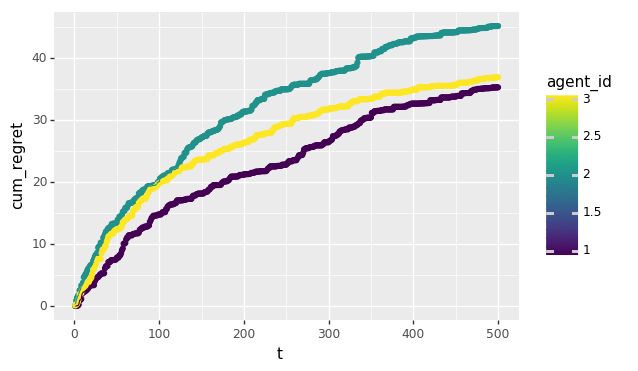

<ggplot: (8747339323189)>


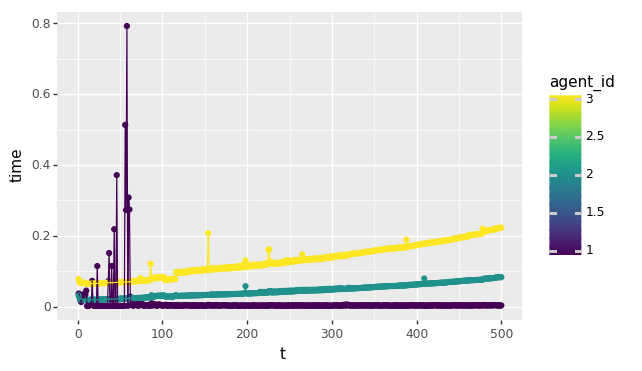

<ggplot: (8747231486585)>


In [6]:
for seed in [2]: #range(1):
    agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



theta [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
Experiment: Step 0
 Sample: array([-0.80825663, -0.87290827, -0.37311316,  0.46881656,  0.18838553,
        0.94799324, -0.1377264 ,  0.160632  , -1.26298989, -1.88514341,
       -0.14361756, -0.92259596,  1.4612466 , -1.16172653, -1.01474035,
        0.32866896,  0.5897402 , -0.70332917, -0.26472659, -0.31808038])
 Sample: array([-0.14112628,  0.80119261,  0.90020141,  1.64308371, -0.33596843,
        0.43433303,  0.60490915, -0.38103371,  0.1613744 ,  0.68520114,
       -0.98561807,  1.55471243,  1.22908765,  1.79184615,  0.37601674,
        0.70212521,  0.99377407,  0.38390507, -0.3252994 , -0.72267749])
 Sample: array([-0.0077101 ,  0.43088182, -0.20518381, -0.04328964,  0.60041179,
       -0.25112972,  1.2548951 ,  0.8051218 , -0.2668

 Sample: array([-0.32431716,  0.92379395, -0.4382447 ,  0.69909173, -1.17797123,
        0.53573452, -0.05190598, -0.96813991,  0.33823691,  0.51511048,
       -0.52062117,  0.61966104, -0.1149468 , -0.07465275,  0.01748752,
       -0.09447809,  0.08514222,  0.74432254, -0.47579695,  0.87437118])
 Accept proportion: 0.652500
Experiment: Step 7
 Sample: array([ 0.43521211,  0.22867393,  1.07162711, -0.75800175,  0.13676682,
       -1.26931602,  0.06836728, -0.16292596,  0.71394   ,  1.95022272,
       -0.82795277,  0.89583512,  0.04112499,  0.24821714, -1.45794041,
       -0.61294037,  0.74090129, -0.3205395 ,  0.50089827, -1.65129421])
 Sample: array([-1.84484078, -0.36596887,  0.25853636,  0.69206666,  0.61663918,
        0.41540631,  0.37243497, -0.24510476, -0.0230199 , -1.17659811,
       -1.79307158,  1.67660646, -2.24666325, -1.20374118,  2.77989454,
       -1.80787825,  0.82584373, -0.77196971,  1.54066658, -2.31324063])
 Sample: array([ 0.9363832 ,  0.36983114,  0.68531669,  0.

 Sample: array([-0.82676102,  0.3054521 ,  0.82867107, -0.22392303,  0.23472588,
        0.21418253, -0.04140637,  0.03775504, -0.55547639, -0.51136711,
       -0.0438081 , -0.79121884,  0.22901156,  0.27817954, -0.65834088,
       -0.19678883, -0.08267927, -0.33704028, -0.8580318 ,  0.11801946])
 Accept proportion: 0.622500
Experiment: Step 14
 Sample: array([ 0.80291811,  0.13373612,  1.41216212,  0.33164036, -0.2125081 ,
        0.39100787,  0.29915606,  0.33593062, -0.3853817 ,  1.63761635,
        1.94511628, -0.00716323,  0.84679527,  1.59320651, -0.66620321,
        1.50724992,  0.54042382, -1.03416746,  1.35732819, -0.73325403])
 Sample: array([-0.41622446, -0.92040455,  0.33371735, -0.5435905 ,  0.69105162,
        0.33875981,  0.45316826, -2.44046536, -1.15305004, -0.49244481,
       -0.34044757,  1.10756128, -0.00708605, -2.2053894 , -0.4065913 ,
       -0.33800701, -0.64848478, -0.64577381,  0.21238309,  0.11062719])
 Sample: array([ 0.57729668,  0.08642023, -0.14117012,  1

 Sample: array([ 0.99107714, -0.23655926, -0.68424833, -0.18208891,  0.4832186 ,
       -0.03728145,  0.87493409,  0.50876087,  0.23179128, -0.52225691,
        0.76498726, -0.14474672, -0.88165957,  0.22207094, -0.43602588,
        0.11285797,  0.31406891, -0.07039173,  0.33078466, -0.65908454])
 Accept proportion: 0.637500
Experiment: Step 21
 Sample: array([ 1.63118617, -0.04368708,  0.96356485,  1.01129688,  0.33437235,
        0.40378985,  1.04370925,  0.21281273, -0.94455716,  1.26621659,
        1.24378124,  1.34216856,  0.42532897, -1.00365407,  0.381459  ,
       -0.21667783,  2.46557516, -1.25394903,  0.61870157,  0.79652528])
 Sample: array([-0.08189206,  0.64304377, -0.92430872,  0.49952282,  0.02433595,
        0.83362344, -0.30610441, -1.0877154 , -0.62256589, -0.24334288,
        0.46630582,  2.51146299, -0.68325849, -1.21782299,  1.26689954,
        1.76722811, -0.8562672 , -0.55041922, -0.12477942,  0.33213579])
 Sample: array([ 0.38047663, -1.37516011,  1.44454622,  0

 Sample: array([ 1.36958385, -0.53324166, -1.11426405,  1.04072077,  0.57788845,
       -0.15259831,  0.03470664,  0.18338011,  0.12750286,  1.2594423 ,
        0.95287001,  0.43411509,  0.06208929,  0.48208454,  0.49241065,
        0.57504365,  0.17216704, -0.17233191, -0.49872946,  0.34956258])
 Accept proportion: 0.695000
Experiment: Step 28
 Sample: array([-0.04971942, -1.09315848,  0.40201213, -1.28604664,  1.07652732,
       -0.54543735,  0.66466649, -0.20705773, -0.0682441 ,  0.37556501,
        0.47369311,  1.07495226,  0.54366763,  2.72370602, -0.0949717 ,
        1.2729123 , -0.6490892 ,  0.13638447, -0.10960292,  0.94504971])
 Sample: array([-0.69565623,  0.04285443,  0.73826214,  0.79299427,  0.20553625,
        0.25270635,  0.81714256,  0.08536874,  0.55572911, -1.02220344,
       -0.05147448,  1.13600477,  0.95737381, -0.52910234, -0.50766124,
       -0.49963564, -0.36833436,  0.14139651, -1.29943005, -0.70787361])
 Sample: array([-0.40939691, -0.28728504,  0.68070047,  0

 Sample: array([ 1.79193832e-01,  8.96958233e-02,  2.03943288e-01,  2.59093386e-01,
        9.05290409e-01, -6.46668353e-01,  3.45135143e-01,  6.02273249e-01,
       -2.77462255e-01,  1.15570561e+00,  6.78399559e-01, -2.76754939e-01,
        4.03809407e-01,  4.71300454e-01,  2.92623450e-01, -4.07186907e-01,
        6.19151208e-01,  2.33805420e-01,  9.83910462e-04, -4.78401325e-01])
 Accept proportion: 0.695000
Experiment: Step 35
 Sample: array([ 0.935205  , -0.60787981,  0.33854314, -0.27864062,  0.0269851 ,
       -0.63458213, -0.9458291 ,  0.01770071,  0.61659921,  0.82899023,
       -0.9893818 ,  0.88380319,  1.26468005,  1.22818113,  0.20180194,
       -0.15780667, -1.36238076, -0.05017515, -0.30441339, -0.21832705])
 Sample: array([ 1.05201398,  0.91567973,  0.44667122,  1.85307895,  1.53977636,
        0.59948122,  1.04024512, -0.26020944, -0.49388741,  0.34147347,
        0.20852434, -0.23643142,  0.26644413,  0.32821459,  1.04616404,
       -0.6500116 , -0.67665864, -0.4766759

 Sample: array([ 1.06550211,  0.15496574,  0.24046409,  0.42553251,  0.78198164,
        0.56316462, -0.77269337,  0.69654748, -1.14571966,  0.64158908,
        1.64150767,  0.69481234, -0.20595137,  1.65844137,  0.08143463,
       -0.16141407,  0.18092852, -0.24654448, -0.00997207, -0.24580271])
 Accept proportion: 0.700000
Experiment: Step 42
 Sample: array([ 1.20876757, -0.887174  , -1.15637668,  0.33801645,  0.66481911,
        0.50455324,  0.12543657,  0.12281813,  0.64963088,  1.00386644,
        1.47520479,  0.70333109,  1.07316945,  0.36179959,  1.09584006,
        0.64463738, -0.02596449, -0.15788054, -0.66930588,  0.41914429])
 Sample: array([ 0.40300012,  1.01162161,  3.05095844,  1.02330783,  1.37452772,
       -0.1444582 , -0.9586837 ,  0.27165357,  0.56844512,  0.71911059,
        1.68870963,  0.91753149,  0.3324207 ,  0.67265025, -0.43906856,
        0.35228352,  0.60554832, -0.68106179,  0.08351961, -0.35526167])
 Sample: array([ 1.59988647, -0.00706265,  1.02524372,  0

 Sample: array([-0.14589544,  0.01746256,  0.59769958,  1.34051888,  1.15039222,
       -0.04696275, -0.30279165,  0.48252566, -0.45313799,  0.4626491 ,
        0.68023166,  0.19831707,  1.29411617,  0.38968488,  0.94972386,
       -0.39708761, -0.64982404,  0.24683377,  0.06591454, -0.5254347 ])
 Accept proportion: 0.782500
Experiment: Step 49
 Sample: array([ 1.90167573, -0.56394483,  0.48253962, -0.21278347,  0.55242625,
       -0.79062831, -0.75482386, -0.24786005,  0.5984299 ,  1.1698267 ,
        0.26917402, -1.14201178, -0.75504758,  1.3942158 ,  0.99616011,
       -1.07456135, -0.54176699, -1.02207912, -0.37723501, -0.00825535])
 Sample: array([ 0.5944274 , -0.17439865, -0.59631326, -0.31108205,  0.53347337,
        0.39412218,  0.62115488, -0.54392806,  0.23486147,  1.91879957,
        1.05526658,  0.67134918,  0.82820879,  0.22607964,  0.58230609,
        1.52692881,  1.82298709, -0.9966915 ,  1.40493378, -2.35766117])
 Sample: array([ 0.67888772, -1.13238111,  1.30168043,  1

 Sample: array([ 0.57844555, -0.60845609, -0.04965338,  1.33145833,  0.89158734,
       -0.16197286,  0.45537589, -0.09966706, -0.41164143,  0.84681748,
        1.32118898, -0.21059644,  0.0513847 ,  0.67373704,  0.97748971,
       -0.23651536, -0.24241695,  0.21480158, -0.22807331, -0.61496617])
 Accept proportion: 0.765000
Experiment: Step 56
 Sample: array([ 0.83963715,  0.37809286,  1.5534064 ,  1.25344583,  2.28016667,
       -1.17794347,  0.15634237,  0.57942384,  0.54698347,  0.57231648,
        0.99197204, -0.21950841,  1.20112238,  1.33856889,  0.52443055,
        0.90986009, -0.51390698, -0.5527179 , -0.47013452, -0.8762019 ])
 Sample: array([ 1.54902097, -0.76638056, -0.09249711,  1.64355538,  2.36985342,
       -0.40707078,  1.05923085, -0.20699071, -1.82611609,  1.59468381,
        0.04681927,  2.09599239,  1.31371408,  1.6278348 ,  1.59738897,
        0.80436819,  0.13588952,  0.57385274,  0.55906696, -1.041358  ])
 Sample: array([ 0.72027647, -1.30200545,  1.03333333,  1

 Sample: array([ 0.97360929, -0.76568979,  0.36338097,  0.90369376,  1.01544328,
       -0.1940182 , -0.1315596 ,  0.79495086, -0.35051415,  1.65306637,
        0.5751309 , -0.68175525, -0.17625153,  0.82609846,  0.56151474,
       -0.51664791,  0.71940355,  0.72013207,  0.70296488, -0.26867466])
 Accept proportion: 0.747500
Experiment: Step 63
 Sample: array([ 0.26945612,  1.00761933,  0.10316217,  0.93179998,  0.53473466,
       -0.70874139, -0.14874724,  0.92126337, -0.14424403, -0.45461877,
        0.03229008, -0.19924389,  1.6769163 ,  1.39996807,  0.91988352,
        1.54900917,  0.85726604,  0.1502804 ,  0.40126951,  1.11194971])
 Sample: array([ 0.50807726,  1.20937333,  0.68076413,  2.86620518,  2.11464908,
        0.57403383, -0.9867798 ,  0.12521155,  0.09448627,  2.11265869,
        1.64471811,  1.39564127, -0.28132366, -0.00346197, -0.21000239,
        2.60180701,  0.76373766,  0.28779848, -1.16238651, -2.01910385])
 Sample: array([ 0.95755117, -0.47257781,  1.51943709,  0

 Sample: array([ 0.85479158, -0.66361001,  0.21378712,  1.21714344,  1.74310327,
       -0.80837481,  0.5233201 ,  1.23666748,  0.0870325 ,  1.02959135,
        1.95107373,  0.64892994, -0.01214005,  1.21560885,  0.38585513,
       -0.58519627, -0.16876742,  0.19021574, -0.45205346, -0.85383089])
 Accept proportion: 0.770000
Experiment: Step 70
 Sample: array([ 2.2637619 , -0.4236746 ,  0.53465273,  0.20977704,  0.90514944,
       -0.8034833 , -1.17582983,  0.20927751,  1.36018112,  1.14297508,
        1.01285252, -0.36809268,  1.33451992,  0.66795795,  0.60825419,
       -0.26006215,  0.88919254,  0.56227895, -0.26586614,  0.16880074])
 Sample: array([ 1.71636526,  1.4583784 ,  1.05764008,  1.51044811,  0.70897499,
        0.36740962,  0.55485853, -1.12064659, -0.56596212,  1.50251618,
        1.10896957,  0.79920952,  1.68566677,  0.96330999, -0.06085627,
        1.46305018, -0.35373389,  0.35966562, -0.13330082, -1.64042014])
 Sample: array([ 1.73921199, -0.51935411,  1.16866662,  0

 Sample: array([ 0.98325424, -0.25744254, -0.11026099,  1.14860338,  1.20783264,
       -0.49773724,  0.78724907,  0.39641498,  0.10016157,  0.69122183,
        2.14874912,  0.02259684,  0.90453867,  1.26712008,  0.81431721,
       -0.04999696,  0.03373448, -0.43340015,  1.03157212, -0.94568963])
 Accept proportion: 0.770000
Experiment: Step 77
 Sample: array([ 0.3564469 ,  0.74388226, -0.2228788 , -0.02265252,  1.40463528,
       -1.88356144,  0.22793402,  1.52248151, -0.28024478,  1.12291384,
        0.11622333,  0.03386646,  1.58551144,  0.65963953,  0.88357062,
        1.31535159,  0.32058688, -0.9916381 , -0.12230207, -0.916316  ])
 Sample: array([ 0.23731175,  0.44243752,  2.38421066,  0.20804528,  1.83132785,
       -0.23446623,  0.2847102 ,  0.35563428,  0.4268384 ,  0.7718125 ,
       -0.09177441,  1.20110303,  1.24733896,  0.97392677, -0.51402522,
        0.20336566,  1.7696532 , -1.08848248,  0.27304104,  0.1696221 ])
 Sample: array([ 0.91707298, -0.76226419,  1.70328123,  0

 Sample: array([ 0.71932623, -1.19339778, -0.25328789,  1.2062225 ,  1.47845126,
       -0.0919491 ,  0.67175742, -0.30878913,  0.28519925,  0.59082036,
        1.85792956,  0.12910528,  0.4376699 ,  0.99143074,  1.10994202,
       -0.46371695,  0.71680828,  0.11401641,  0.03845968, -0.86007394])
 Accept proportion: 0.762500
Experiment: Step 84
 Sample: array([ 2.29943488, -0.54855002,  0.79535069,  0.47458359,  0.14712115,
       -0.66383755,  0.00575586,  1.02024304,  0.11321476,  1.49944711,
        0.68300556,  0.45117419,  1.17400788,  1.11942751,  0.76747178,
        0.83149301,  0.70102911, -0.94178284, -0.19117104, -2.14494965])
 Sample: array([ 0.57677912, -0.11747723,  0.71825626,  0.44523469,  2.1316776 ,
        0.42731139,  0.5940446 ,  0.93778224, -0.40899542,  0.8847481 ,
        0.66202186,  0.12031859, -0.16796266,  0.83383848,  1.01056565,
        0.63270129,  0.91115194,  0.18455892,  0.75022622, -1.64344442])
 Sample: array([ 1.7038051 , -0.68136279,  1.60926126,  0

 Sample: array([ 1.46138195, -0.31623243,  0.57492989,  0.9165604 ,  1.97002195,
       -0.44514031,  1.03050759, -0.08885838, -0.33580696,  0.80393444,
        1.47328862, -0.42724552,  0.04504513,  0.85715972,  1.15143461,
       -0.46680535,  0.36019181,  0.5715244 , -0.19861503, -0.79131125])
 Accept proportion: 0.787500
Experiment: Step 91
 Sample: array([ 1.73723415,  0.31339661, -0.84190722,  0.31808243,  1.09101049,
       -1.79490505, -0.21019462, -0.77073411, -0.28156425,  1.42163673,
        0.1307476 ,  0.71965273,  0.6982764 ,  0.7989548 ,  0.82283792,
        0.59153758, -0.55588575,  0.33836103,  0.04191192, -0.07828334])
 Sample: array([ 0.58489813,  0.12215718,  1.61684183,  2.27467076,  0.71090563,
        0.15150684, -0.48535746, -0.1203998 , -0.2350661 ,  0.70717929,
       -0.37255269, -0.12770498,  0.74240874,  0.41677285,  0.975369  ,
        0.64306167,  0.94057413, -1.68127839, -0.83705968, -0.84514612])
 Sample: array([ 1.15870385, -1.29776345,  1.46496973,  0

 Sample: array([ 0.80718188, -0.15114313,  0.3773733 ,  2.01616272,  1.27264185,
       -0.47299305, -0.12808314,  1.00474934,  0.45696403,  1.1125076 ,
        2.35869346, -0.02825135,  0.36177906,  0.63516759,  0.18570223,
       -0.55375937,  0.25135961, -0.24604902,  0.18755549, -0.52010482])
 Accept proportion: 0.755000
Experiment: Step 98
 Sample: array([ 2.63145876,  0.55072302,  0.15311011,  2.34770686,  1.01045202,
       -1.54272847, -0.08116373, -0.29598244,  0.57077261,  0.77377906,
        2.10184057,  0.73195341,  1.01127916,  0.04084688, -0.07081035,
       -0.57669031,  0.07991102, -1.75380577, -1.15302727, -0.644079  ])
 Sample: array([ 0.81238444,  1.05649071,  0.48656805,  0.9474817 ,  1.15907224,
       -0.07843159, -0.04621732,  0.1876328 , -0.1930683 ,  0.3328267 ,
        0.27117129,  0.66192667,  1.03751629,  0.39080389,  0.12003591,
       -0.00549692,  1.02592009,  0.9166685 , -1.08478752, -0.83353724])
 Sample: array([ 0.64445006, -0.73875402,  1.34535588,  1

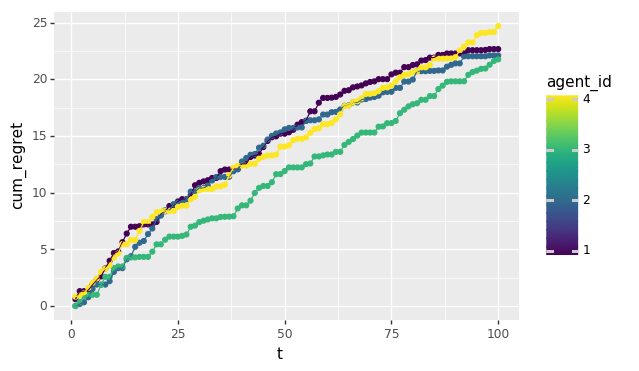

<ggplot: (8772739282069)>


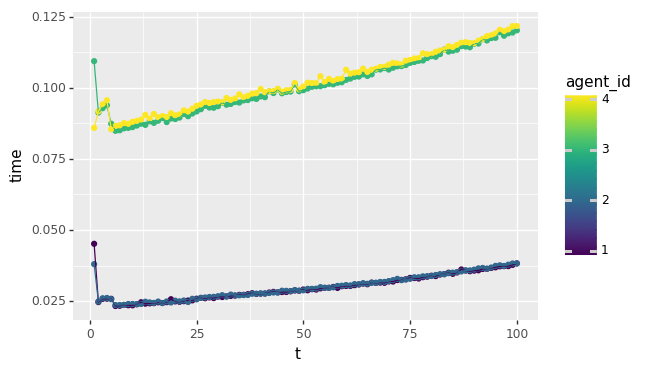

<ggplot: (8772739314577)>


In [15]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.02
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=400 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 100 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)


agents = [make_langevin_agent() for i in range(2)] +\
         [make_mala_agent() for i in range(2)]
results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)


theta [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
Experiment: Step 0
 Laplace sample: array([ 0.64013153, -1.61695604, -0.02432612, -0.73803091,  0.2799246 ,
       -0.09815039,  0.91017891,  0.31721822,  0.78632796, -0.4664191 ,
       -0.94444626, -0.41004969, -0.01702041,  0.37915174,  2.25930895,
       -0.04225715, -0.955945  , -0.34598178, -0.46359597,  0.48148147])
 Laplace sample: array([-1.54079701,  0.06326199,  0.15650654,  0.23218104, -0.59731607,
       -0.23792173, -1.42406091, -0.49331988, -0.54286148,  0.41605005,
       -1.15618243,  0.7811981 ,  1.49448454, -2.06998503,  0.42625873,
        0.67690804, -0.63743703, -0.39727181, -0.13288058, -0.29779088])
 Sample: array([ 0.44711882, -0.41528926, -0.08906866, -0.01514531, -0.29484971,
       -0.07944699,  0.50196738, -0.3

 Sample: array([ 0.73232366,  1.0713108 , -0.55003515, -0.3762722 , -0.05383468,
        0.35959013, -0.05735804, -0.43826296,  0.30417978, -0.37133608,
       -0.61536547, -0.15711773, -0.34361674,  0.01522988, -1.21370434,
        0.1611058 , -0.86678196, -0.24898977,  0.22246177,  0.44391283])
 Accept proportion: 0.570000
 Sample: array([ 0.13832173, -0.09440476, -0.44672299, -0.04204618,  0.93604377,
        0.51813895,  0.40398988,  0.58920101, -0.42921979,  0.26828974,
       -0.69209432,  0.49905163, -0.58861752, -1.36981332,  0.12784247,
       -0.30141462,  0.17440638,  0.95709004,  0.80460913,  0.09508405])
 Accept proportion: 0.682000
Experiment: Step 5
 Laplace sample: array([ 0.17730157, -3.7551486 ,  2.50458557,  1.23185456,  2.21153627,
       -0.70268064, -1.48633878, -2.26859044, -1.12647492, -2.6730425 ,
        0.0191423 ,  0.11096051, -1.35663183, -4.54110814, -0.484723  ,
        1.91213683,  0.79845093,  0.92640427,  2.079263  , -1.00820899])
 Laplace sample: arra

 Sample: array([ 1.56645189, -0.28457918,  1.15530287, -0.05513449,  1.22742054,
       -0.69873229,  0.81542111, -0.05299428,  0.75448422,  0.11882465,
        1.27769321, -0.04168616,  0.67747915,  0.04545888,  0.16945358,
        1.20153818,  0.02589286,  0.29132433,  0.53769848, -0.82491607])
 Accept proportion: 0.638000
 Sample: array([ 0.11056898,  1.08858741,  1.29249654,  0.20586812,  0.63534328,
       -1.63522137, -0.4141947 , -0.68292605, -0.44551939,  0.65269489,
       -0.85833663,  0.1700587 , -0.1419958 ,  0.18613985, -0.07317042,
        1.23540157,  0.0684744 ,  0.75361323,  1.11140533, -0.62371906])
 Accept proportion: 0.692000
Experiment: Step 10
 Laplace sample: array([-0.4581485 , -5.16838578,  2.52789789,  3.67716358,  2.27060555,
       -1.08658296,  1.06000139, -2.24854228, -2.49660727, -3.52498451,
        0.03956692,  1.68489191,  2.96612111, -5.63815896,  0.48443676,
       -3.28734369, -1.54404342,  1.86091336,  2.32913962,  0.4613658 ])
 Laplace sample: arr

 Sample: array([ 1.17075321,  0.09692536,  0.85076603, -0.69684852,  0.0585355 ,
       -0.72217271, -0.37773676, -0.63953651, -1.76579461, -1.17677636,
       -2.05133736,  2.05090729, -0.35868771,  0.38508988, -0.75844831,
       -2.16428767, -0.82789417,  0.61737372, -0.98826167, -2.09124146])
 Sample: array([ 0.09628607, -0.54614234,  0.67635512, -0.07860811,  0.64488801,
       -0.6327448 ,  0.35567626,  0.06070924,  1.21461597,  0.2705464 ,
       -0.63291812,  0.81861822, -0.03379325,  0.73739308,  0.55990912,
       -1.54875534,  0.48861422, -0.54646637, -0.02857487, -0.7973091 ])
 Sample: array([ 1.15921804,  0.73136137, -0.01341677,  0.76767973,  0.23023921,
       -0.60833823,  0.22613624,  0.29683975, -0.75770852, -0.69321378,
        0.27522288,  0.48108049, -0.33509982,  0.50928394, -0.1702103 ,
        1.12545185, -0.28968495, -0.53538447, -0.12533243, -0.23434901])
 Accept proportion: 0.700000
 Sample: array([-0.03848339, -0.70022477,  0.05576572,  0.47003651, -0.081006

 Sample: array([ 0.47336658,  0.13912462,  0.14791027,  0.27394484,  1.01655789,
       -0.61840667, -0.81151549, -0.20257717,  0.38480672, -0.83681718,
        0.13850138, -0.35499769, -0.08048515, -0.61801583, -1.02259018,
        1.39041415,  0.26737955,  0.16957229, -0.36283235, -0.39592958])
 Accept proportion: 0.722000
 Sample: array([-1.02193488, -0.54415093,  0.66573443,  0.49001969,  0.95922505,
       -0.91027229,  0.3337205 ,  0.00900832,  0.29935144, -0.0482292 ,
        1.19327256,  0.37107107, -0.2741112 ,  0.72444874, -0.74874093,
       -1.25950185, -0.30772374,  0.73608824,  0.64101294, -2.00445807])
 Accept proportion: 0.708000
Experiment: Step 19
 Laplace sample: array([  0.07045866,  -6.74114948,  12.56324065,   8.21479948,
         1.92657416,   3.99112366,   4.04942623,  -7.07577955,
        -5.38144115,   0.63982615,   7.62639631,  -9.01869148,
         1.05982766, -14.24597338,  -0.32145092,  -0.93960988,
         9.17810914,  -6.83373731,   6.88549745,  -8.7205

 Sample: array([ 2.32750191,  0.01682925,  1.43148867,  1.02757568,  0.6790478 ,
       -2.17178059, -0.44188376, -0.09150503,  0.59994088,  0.28281009,
        1.10695176,  0.00468182, -0.32549078, -0.46864015, -0.27736739,
        0.90633373, -1.17153066, -0.25323067, -0.75029965, -1.06732914])
 Accept proportion: 0.718000
 Sample: array([ 0.16610247, -0.03116061,  0.52655449,  0.98089285,  0.47223783,
       -0.4690088 ,  0.74363863,  0.02862554,  0.39626529, -0.36262749,
        0.87605801, -0.43687696,  0.1706684 , -1.09857794,  0.12896221,
        0.01063073,  0.42350348,  0.62115679,  0.68547779, -2.06436566])
 Accept proportion: 0.714000
Experiment: Step 24
 Laplace sample: array([  3.47570411,  -3.11426115,  10.81941578,  -6.66307549,
         9.93047302,   7.77761181,  20.71487477, -20.60712747,
       -15.01515332,   2.46974685,  24.22021331,  -0.70759171,
        -2.69327397, -12.22815314,  -2.84637791,  -8.55862904,
        16.40113363,   0.74353565, -11.00264784, -18.2477

 Sample: array([ 0.91296891,  0.57961864,  0.02927587,  1.93512289,  0.15821152,
       -0.72008229,  1.07231451,  0.68091372,  1.4943631 ,  1.35187031,
        0.22544559,  0.91265691, -0.31842654, -1.32069554,  0.91681988,
       -0.57869234, -2.67599385, -0.13553268,  0.12076234, -0.4846453 ])
 Sample: array([ 1.79751713, -0.21569148,  0.49207264,  1.49837735,  0.16075716,
       -1.21645948,  0.22791489, -0.3365894 ,  0.8790598 , -1.24854755,
       -0.4099573 , -0.74584969, -0.08102437, -0.52012876, -0.16268406,
        0.18299291,  0.33500663,  0.6001051 , -0.31273168, -0.55722958])
 Accept proportion: 0.738000
 Sample: array([-1.36239774, -0.64443985,  1.00940627,  0.92543164,  1.1046511 ,
       -1.68883343, -0.2783881 ,  0.91151076,  0.14475363, -1.09048011,
       -0.12548691,  0.40194021, -0.4405746 , -0.7198666 , -0.94846813,
       -0.68149619, -0.79148511,  0.15501543,  0.32211971, -1.6767091 ])
 Accept proportion: 0.740000
Experiment: Step 29
 Laplace sample: array([ 22.

 Sample: array([ 0.21229585,  0.08578371,  1.71950441,  0.45284087,  0.86243904,
       -2.08617147,  0.98180052, -1.05135409,  0.16784008,  0.53392454,
       -0.49276453,  0.00230116,  0.17627148,  0.61979378, -1.05230019,
       -0.99989921, -0.64305881,  0.04959487,  0.05114759, -1.14751057])
 Accept proportion: 0.778000
Experiment: Step 33
 Laplace sample: array([ -6.82741135, -40.53408918, -14.55577791,  56.19425462,
       -43.14535249, -37.73387842,   1.3399875 , -66.68835642,
       -66.34394028,  49.28524615,  60.45466845, -12.9950221 ,
         8.4873312 , -21.51077357,  27.72621746,  36.390354  ,
        26.99638324,  16.58788831, -42.48833578, -19.13510048])
 Laplace sample: array([  4.24671944,  -2.95847682,  44.89761756,  20.01154469,
         3.08893425, -65.2941384 ,  56.56557751,  19.83438946,
         5.54547146,  -9.45462231,  -1.55052491, -35.44341282,
        -3.26575222, -52.69675285,   1.6961157 , -14.84837845,
        58.70735299,  22.45130055,  -8.82627298, -1

 Sample: array([ 0.6707765 , -0.22315321,  0.84250468,  0.65128398,  0.78406668,
       -1.0771068 ,  0.77306623, -0.34940029, -0.25248325, -1.85510688,
        0.72315507, -0.45619313,  0.54066681, -1.85702853, -0.53755829,
        1.07802857, -0.51579369,  0.22120264, -0.92286277, -0.31406738])
 Accept proportion: 0.762000
 Sample: array([-0.7842379 ,  0.15635894,  1.96970907,  0.84294983, -0.03836623,
       -2.05521384,  0.53961286,  0.14361861,  0.18113681, -0.35951339,
       -0.10107275,  0.71640808, -0.28082032,  0.85613938, -0.74682903,
        0.94426329, -0.54777474, -0.26486294,  0.22332676, -0.78709234])
 Accept proportion: 0.798000
Experiment: Step 38
 Laplace sample: array([  8.33604748, -10.91471535,   2.6287473 ,   7.71515886,
         3.34067227,  -2.52383564,   7.29031552,  -3.93822953,
        -6.10605773,   7.98636113,  11.89809193,   6.07457687,
         4.9343501 ,  -2.2996521 ,  -5.11186589,   4.81403162,
         5.13780843,   1.87280107, -10.56815073,   3.2818

 Sample: array([ 1.51997496, -0.6977925 , -0.12146084,  1.09813585,  0.90398049,
       -0.70254542,  1.96455411, -0.90282101,  0.51604393, -1.08421766,
        1.52313447, -0.3027402 ,  0.11977552,  0.38184377,  0.85785359,
       -0.2501218 ,  1.16452719, -0.56321619,  0.29889292, -1.28716223])
 Sample: array([-0.32222044, -0.72469365,  0.91174091,  1.33206545,  1.76799103,
       -1.72698067, -0.67126824, -0.6458045 , -0.01435469,  1.3631446 ,
       -0.26259055,  1.89126078, -0.87016813, -1.1770505 , -0.87582552,
        0.66139992, -0.04591185,  0.49843514,  0.12018323, -1.42960816])
 Sample: array([ 0.53444406, -0.01830925,  1.90344551,  0.72237181,  0.3139501 ,
       -1.06590665, -0.63559205, -0.61318315, -1.60497044, -0.2942727 ,
        0.7289938 ,  1.20603762, -0.57368168, -1.39986809, -0.90154197,
        0.25657447, -0.36740296,  0.50279621, -0.57520976, -0.37970383])
 Accept proportion: 0.756000
 Sample: array([-0.91611854,  0.44625629,  0.82474746,  1.31662916,  0.178081

 Sample: array([ 0.2284403 , -0.18022006,  1.02712217,  1.08855939,  0.0118809 ,
       -1.65917165,  0.27692013,  0.9049683 ,  0.54663721,  0.4630968 ,
        2.01492852,  0.10141349,  0.29272298, -0.28221463,  0.07670944,
        0.52649987,  0.60527134,  0.12309746, -0.11507569, -0.75420279])
 Accept proportion: 0.786000
Experiment: Step 47
 Laplace sample: array([ 3.28102177, -2.61803997,  1.9852587 ,  1.18056528,  2.07740323,
        1.92063903,  0.83640647, -3.0164234 ,  0.62495146, -1.28548875,
        2.41877284,  0.06492361,  2.67783025, -1.48844872, -0.77667878,
       -1.42741949,  0.18570077, -0.07847993,  0.81864876,  2.11070738])
 Laplace sample: array([ 1.06133574,  0.13475156,  8.5349888 ,  3.46310742,  8.23139732,
       -2.72114128,  0.09888958,  3.91251963, -3.63836028,  3.01619596,
        4.1535724 , -1.27688578,  1.23690285, -3.86657837, -1.54902682,
       -0.672794  ,  2.62203865,  1.10319396, -2.17699838, -0.3695691 ])
 Sample: array([ 0.72642071,  0.79045487,

 Sample: array([ 0.85323518, -0.08301237,  1.6414915 ,  1.55708659,  0.86782189,
       -1.68746101,  0.54586014, -0.26125047, -0.98658444,  0.57945041,
        0.72242274,  0.11201617,  0.04061873, -1.0049106 , -1.18060898,
        0.00588961,  0.21029485, -0.06961094,  0.40160151, -0.78985433])
 Accept proportion: 0.788000
 Sample: array([ 0.44310845,  0.35127795,  2.03783149,  1.18971793,  0.55834383,
       -1.92163656,  0.58328469, -0.12006857,  0.29059997, -0.35461385,
        1.98734613,  1.12230973, -0.52467614,  0.49874802,  1.499697  ,
       -0.30088765,  0.81410304,  0.57726272,  0.55256383, -1.50708132])
 Accept proportion: 0.768000
Experiment: Step 52
 Laplace sample: array([ 4.00762762, -3.08362127,  2.28660577,  0.92665344,  3.49126485,
       -0.24273397,  1.49010367, -0.72308337,  2.19402944,  0.42095105,
        2.42454146,  0.62393114,  0.48023794,  0.0319385 , -1.43580764,
        0.16099618,  1.3992766 , -1.14527493,  1.6622389 , -1.5156366 ])
 Laplace sample: arr

 Sample: array([ 1.45109419e+00, -1.46915524e-01,  2.44806455e+00,  1.90088324e+00,
        1.15909082e+00, -1.23528997e-01,  5.62201847e-01, -6.34791918e-01,
       -2.93408932e-01,  3.22529346e-01,  6.66167679e-01,  3.65556895e-02,
       -4.94294250e-01, -7.91915639e-01, -3.52304580e-01,  9.23457292e-01,
        2.30446083e-01,  1.19905079e+00,  7.09288504e-01,  2.16146469e-03])
 Accept proportion: 0.818000
 Sample: array([ 0.17574335, -0.01460005,  1.67722421,  0.32764153,  0.33024661,
       -1.39949144,  1.29651602, -0.26074376,  1.06079464, -0.04090121,
        0.15223777,  0.00202092, -0.08913598,  0.35176644, -0.62847715,
        0.23353649,  0.16359134,  1.21192141,  0.48454808, -0.51944701])
 Accept proportion: 0.794000
Experiment: Step 57
 Laplace sample: array([ 3.25304961,  0.51847883,  1.92987826,  2.72471618,  2.44377606,
       -1.15261659,  4.11119901, -1.28384454,  1.19433208,  0.56609013,
        3.03750994,  2.81290433,  1.12388576, -2.45408059,  0.34081164,
      

 Sample: array([ 0.6349463 ,  0.30578807,  0.84622414,  0.9122884 ,  0.82991061,
       -1.68145541, -0.17666182, -1.6706882 ,  2.14508345,  1.27581588,
        1.3513369 , -0.55036316, -0.6634693 , -0.49715643,  0.01544305,
       -0.02809086,  0.74277758, -0.16993194,  0.54377283, -1.13072085])
 Sample: array([ 1.49025250e+00, -1.01519744e-01,  8.10642687e-01,  1.38804140e+00,
        2.17699919e-01, -7.51004721e-01,  1.15862957e-01,  2.91178488e-01,
       -5.90492448e-01, -1.28434770e-01,  2.54877538e-01,  8.20274419e-04,
       -7.53600150e-01,  8.10050320e-03, -1.92012852e-01,  3.85916854e-01,
        4.30319722e-01, -2.47951287e-01, -2.91850285e-02,  6.41987079e-01])
 Accept proportion: 0.772000
 Sample: array([ 0.4192179 ,  0.31172899,  1.81649878,  1.53216171,  0.87100713,
       -1.6311639 ,  0.63439065,  1.22402747, -0.25420044, -0.20290096,
        0.56616459,  1.26544606, -0.0785394 ,  1.17345013, -0.47799106,
       -0.26472508,  0.02868681,  0.10790048,  0.50062669, -0.9

 Sample: array([ 0.47892574,  0.66158033,  2.12241316,  1.99660403,  0.72488381,
       -2.05256358,  0.11135482,  0.15351097, -0.10205334,  0.21004337,
        0.07707798,  0.50595663, -0.22096619,  0.51293082, -0.14849367,
        0.44285577,  1.78732158, -0.35687859,  0.57072946, -1.13460422])
 Accept proportion: 0.756000
Experiment: Step 66
 Laplace sample: array([ 2.06679984, -0.48438454,  1.72368832,  3.84281294,  0.55179438,
       -1.43956406,  2.86183831, -1.34661302,  1.00276557,  0.61338217,
        0.70907696,  2.22804041,  1.38243705,  0.21391983, -0.72707287,
       -0.96467739,  0.2031661 , -0.2126649 , -1.34456196, -0.35141143])
 Laplace sample: array([ 0.9672266 ,  0.76794826,  2.01937008,  2.63003715,  1.90609792,
       -0.40713267,  1.42637387,  0.67764952, -0.71544524,  0.29437981,
        0.54712544, -0.38858979,  2.02968206, -0.1847867 ,  1.28336564,
        0.45717805,  1.16648876,  0.44626153, -1.96420757,  0.10699191])
 Sample: array([ 1.70473391,  0.60791682,

 Sample: array([ 0.61283262,  0.28848338,  1.99648447,  1.14385614,  0.06177895,
       -0.62139342,  0.9452108 , -0.43874714, -1.0909081 , -1.18033614,
       -0.40116702,  0.4430494 , -0.18279702, -0.02526003, -0.29546554,
        0.94101285,  1.45096059,  0.21815848,  0.42109003,  0.38885469])
 Accept proportion: 0.804000
 Sample: array([ 0.47249516,  1.18885621,  2.22853161,  0.63512456, -0.07068881,
       -2.29035346,  0.82132011,  0.6234112 ,  0.81596008,  0.20014083,
        0.40572933,  1.22479056,  0.14114928,  0.5524473 ,  0.22380317,
       -1.21293532,  0.73995014,  0.28715145,  0.30447283, -1.29452464])
 Accept proportion: 0.792000
Experiment: Step 71
 Laplace sample: array([ 1.21231531,  0.58465032,  1.3720025 ,  2.67182286, -0.09126016,
        0.63722348,  1.74336078, -1.97852526,  0.2814816 ,  0.29765307,
        1.3688178 ,  2.08313007,  2.83044896,  0.28096857, -1.06334439,
       -0.00492511,  1.02752497,  0.22855557, -0.82399407, -0.45561033])
 Laplace sample: arr

 Sample: array([ 0.93750988, -0.71175496,  1.7361128 ,  1.45477784,  0.44574004,
       -0.39664686,  0.60829045, -0.99197667, -0.37383998,  0.10002369,
       -0.19401569,  0.75832502,  0.74703597, -0.39772683, -0.46670535,
        1.6812875 ,  1.10839536,  0.74913018,  0.20189869,  0.0481239 ])
 Accept proportion: 0.800000
 Sample: array([-0.46243766, -0.19840981,  1.64195772,  0.46959637,  0.20938333,
       -2.23945383,  0.69251257,  0.43797694, -0.16853971,  0.25952165,
        0.69624497,  0.98859744,  0.17699055,  0.43430094,  0.06221276,
        0.10871527,  1.93470651, -0.05978736,  0.22177328, -0.81182412])
 Accept proportion: 0.796000
Experiment: Step 76
 Laplace sample: array([ 2.59758655,  1.76866757,  3.05240731,  2.03856405,  1.87352723,
       -0.08589785,  0.82203273,  0.74874789, -0.23300237, -0.92163174,
        1.59808708,  2.41170177,  0.18522714, -0.75585833,  0.14090765,
       -2.56512602, -1.18063369, -0.58338227, -0.09694972,  2.09889653])
 Laplace sample: arr

 Sample: array([ 2.41327323,  0.02987943,  0.54745591,  2.51009463,  1.10970354,
       -1.19933234,  1.41709537,  1.10318344, -1.5779129 ,  0.51938651,
       -0.60842884,  0.5541373 , -0.47635089,  0.10293796,  0.48623088,
        0.59628575, -0.40991225,  0.31758216,  2.15860123,  1.73072576])
 Sample: array([ 0.72462   , -1.67574359,  0.53661545,  1.1444495 ,  1.30113611,
       -2.17073216,  0.19317257, -0.65459061,  0.41667723, -0.3962358 ,
        0.81918546,  2.01269802,  0.5131107 ,  0.29830645, -0.38945017,
        0.14551347, -0.11821663,  0.70332344,  0.89183228, -0.03541978])
 Sample: array([ 7.87967701e-01, -4.64958018e-02,  1.38573882e+00,  1.69113850e+00,
        3.67225104e-01,  2.95367143e-01,  7.46719093e-01, -6.73049519e-01,
       -2.56405957e-01, -4.20333238e-01, -1.33775741e-01,  7.14052795e-01,
        7.90563130e-01,  3.74154522e-02,  2.90008394e-01,  8.40497650e-01,
        1.02708602e+00,  3.33841231e-01, -1.71598751e-01, -3.90884161e-04])
 Accept proportion:

 Sample: array([ 0.52289196,  1.32011745,  1.54104456,  1.66689236,  0.08803111,
       -1.86683363,  0.59135193, -0.03093224,  1.10485547, -0.36232826,
        0.5509788 ,  1.06331986, -0.25359488,  0.25471677, -0.00818586,
       -0.37042227,  0.56586898,  0.68872634, -0.35967385, -0.36298011])
 Accept proportion: 0.788000
Experiment: Step 85
 Laplace sample: array([ 2.25429344,  1.89824323,  2.42421807,  1.84212708,  1.40719164,
       -0.87198974,  0.49310394, -0.1838611 ,  0.30868126, -0.04768433,
        2.97254531,  2.3741645 ,  0.17134539, -0.9160802 ,  0.90517325,
       -0.88583829, -1.20122696, -0.60741276,  0.08183442, -0.48973051])
 Laplace sample: array([ 3.17665643,  0.009526  ,  3.10404028,  3.77616512,  2.06705844,
       -0.19560861,  1.28470294,  0.79400091, -0.84263333,  0.41905354,
        0.419017  , -1.40370729,  2.44424809, -0.50099971,  1.76969472,
        0.00687279,  1.53196525,  0.88847141, -2.30684488,  1.50288108])
 Sample: array([ 1.37636999, -0.00556447,

 Sample: array([ 1.94938244, -0.42158776,  2.27088746,  1.03773348,  0.82575893,
       -0.86518105,  0.94357172, -0.93415196, -0.23852558,  0.42835915,
       -0.08663332,  1.1426366 ,  1.08900014, -0.61381155,  1.26478343,
        1.24535093,  0.9167862 , -0.38425359, -0.13306252,  1.18379797])
 Accept proportion: 0.808000
 Sample: array([ 0.1346788 ,  0.14801072,  2.01670417,  1.80747156,  0.70654069,
       -1.99195455,  1.10081626,  0.74105786,  0.49570383,  0.48074999,
        1.49308801,  0.92858462, -0.05575072,  0.30070506,  0.6465552 ,
        0.07818133,  0.78503692,  0.42087353,  0.13307525, -0.19578194])
 Accept proportion: 0.788000
Experiment: Step 90
 Laplace sample: array([ 2.96826567,  1.57324557,  3.30924195,  1.57057313,  1.85971898,
       -2.00009057,  0.92676449, -0.48631992,  1.56862708, -0.48648239,
        3.20262525,  2.45827241, -0.14347632, -0.86287809, -0.23612575,
       -0.98831548, -0.628458  , -1.19687193, -0.7072293 , -0.3926419 ])
 Laplace sample: arr

 Sample: array([ 1.98033288,  0.93763575, -0.20773532,  0.88757975,  2.93528359,
       -1.15507991,  1.61137257,  0.27592843,  0.46698877,  0.4349913 ,
        0.52768653,  0.86452849,  0.40504135,  1.21239601,  1.02025564,
       -0.23617864,  0.69012935, -0.25522231,  0.05906174,  0.87196937])
 Sample: array([ 0.2281506 , -2.01130142,  0.94942047,  0.9902284 ,  0.99269577,
       -1.19569865,  1.16486338, -1.24132197,  0.74434842,  0.28745361,
        0.16605897,  1.82455556,  0.39136118,  0.72587949, -0.3594248 ,
       -0.80571739,  0.04340526,  0.20459683,  0.90417559, -0.13416764])
 Sample: array([ 0.93204877,  0.26805427,  1.86988831,  1.71164965,  0.09521791,
       -0.7047302 ,  0.6067914 , -1.76364706, -0.63575693,  0.55103899,
        0.15072423,  0.49918146,  0.63665   ,  0.13486184, -0.18988483,
        1.65585723,  1.64754334, -0.11708405, -0.73464615, -0.68776192])
 Accept proportion: 0.840000
 Sample: array([ 1.56865855,  0.47239992,  1.76852323,  1.56163123,  0.382309

 Sample: array([ 0.92519997,  0.09034453,  2.52187429,  1.42917868,  0.99752463,
       -1.79375817,  1.22178963,  0.53905123, -0.12261728,  0.69186349,
        0.77984622,  2.21604782,  0.08342761,  0.62781455, -0.12094704,
       -0.04711279,  0.96388285,  0.2160067 ,  0.23341944, -1.38093252])
 Accept proportion: 0.842000
Experiment: Step 99
 Laplace sample: array([ 2.61990205,  1.27030682,  1.71463633,  0.97122312,  2.028585  ,
       -1.2961898 ,  1.63823206, -1.28819986,  1.2677276 ,  0.46970714,
        2.00634578,  1.58894289,  0.25879269, -1.09598624,  1.29220367,
        1.10951407,  0.66850607, -0.85355491,  0.85494751,  0.96111083])
 Laplace sample: array([ 0.4505687 ,  0.06536784,  2.44656014,  1.1881594 ,  3.16590199,
       -0.0502502 ,  0.65870344,  0.53678223, -0.88085784,  0.89079929,
       -0.08992446, -0.91567738,  2.02798003, -1.61110495,  1.9766782 ,
        0.74625986,  0.67408759,  0.49065132, -1.53126283, -0.91015161])
 Sample: array([ 1.73607421,  0.29112769,

 Sample: array([ 0.48868008, -0.17261107, -0.03356416,  2.43124122,  2.22264   ,
       -1.07068712,  0.3786919 , -0.48272131, -0.65688571, -0.49876807,
       -0.21204132,  1.78649338, -0.51819625,  0.55267661,  0.22921121,
       -1.19622203,  0.52136811,  0.1751058 ,  0.99982555,  0.74855897])
 Sample: array([ 0.39562682, -0.41851742,  1.34518907,  1.54159645,  0.75400119,
       -0.32708294,  1.61865319,  0.44453668,  0.04454234, -0.21316158,
       -0.45137049,  1.30172628, -0.08598452,  0.09389932,  0.51062521,
       -0.48448416,  0.5255405 , -0.37501168,  0.70575224, -1.29795383])
 Sample: array([ 0.77987915, -0.0762483 ,  1.47840939,  1.86927716,  0.43350992,
       -0.35336093,  0.04509514, -0.73704644,  0.16191914,  0.52993136,
        0.04402706,  0.71244571, -0.35088932, -0.79950516,  0.29429868,
        1.10615721,  0.86847016, -0.25393554,  0.24488146,  0.77996473])
 Accept proportion: 0.844000
 Sample: array([ 5.07276710e-01,  1.33690839e+00,  1.04220300e+00,  1.9763616

 Sample: array([ 7.65438390e-01, -1.24270740e-01,  8.82055474e-01,  2.19373291e+00,
        1.62292631e+00,  7.34200866e-01,  9.56365342e-01, -8.24310882e-01,
       -6.49657278e-01, -3.26335082e-01,  6.05866875e-02,  8.70057097e-01,
        7.06631187e-01,  1.38681072e-01,  7.69965050e-01,  1.55706357e+00,
        1.11135301e+00,  1.68456078e-01,  2.13080393e-03, -4.46252451e-02])
 Accept proportion: 0.774000
 Sample: array([ 0.48168314,  0.38317186,  1.13032558,  1.48599403,  0.42681566,
       -1.43667006,  1.55896782,  0.0250396 ,  0.22775192,  0.03306427,
        0.72713812,  1.02777072,  0.26685067, -0.35010852,  0.2138764 ,
       -0.18704999,  0.49305765, -0.53147712,  0.16021914, -0.18063609])
 Accept proportion: 0.762000
Experiment: Step 108
 Laplace sample: array([ 2.18617108,  0.34635039,  1.09460832,  0.29278714,  1.468123  ,
       -0.4191522 ,  2.24789016, -0.76252407, -0.03644472,  0.04986852,
        2.40032799,  1.31610366,  0.76626538,  0.36354114,  0.80911788,
     

 Sample: array([ 0.69508735, -0.37162993,  1.89455759,  1.55518627,  1.41777623,
       -0.62312194,  1.34055388, -0.63218277, -0.81731757, -0.5241573 ,
        0.38791443,  0.7694379 ,  0.5506418 ,  0.02530074,  0.24456162,
       -0.55632834,  1.0638934 ,  2.08112273,  0.10314916, -0.23063307])
 Sample: array([ 0.98034544, -0.76916626,  0.59082765,  1.29284201,  0.32354049,
        0.50741233,  0.96718678, -0.7278451 ,  0.70696107,  0.47655612,
        0.11116918,  1.15200421,  0.98961747,  1.94419054,  0.29411297,
       -0.62598883,  1.25117191,  0.88521982,  0.48829353, -2.42731781])
 Sample: array([ 1.5328226 ,  0.27513532,  0.72811885,  1.35608914,  1.67711379,
        0.16675605,  1.03810792, -1.1880208 ,  0.31558288,  0.06063682,
        0.04608495,  0.53138156,  0.62758594,  0.11097355,  0.23581976,
        0.93368979,  1.58559888, -0.34957893, -0.32720507, -0.27516378])
 Accept proportion: 0.806000
 Sample: array([ 0.54260271,  0.89089309,  0.83365695,  1.78074469,  0.659588

 Sample: array([ 1.24237158,  0.16681035,  0.71229679,  1.8736875 ,  1.87606902,
       -0.56776375,  0.3615147 , -0.80252056, -0.07113548,  0.10488441,
        0.67864299,  1.40013489,  0.67624992, -0.45718027,  0.39105915,
        1.01592335,  0.50205777, -0.23768845, -0.01782451,  0.23445553])
 Accept proportion: 0.800000
 Sample: array([ 0.58389639,  0.52622705,  1.05821235,  1.21267141,  0.49645315,
       -1.48970621,  1.54778518,  0.78187469,  0.00606895,  0.18286039,
        1.95382612,  0.50205626,  0.01231717,  0.41967521, -0.09282921,
        0.05374977,  0.58271006,  0.26799281, -0.07465655, -0.64083491])
 Accept proportion: 0.798000
Experiment: Step 117
 Laplace sample: array([ 1.75118159,  0.21232601,  2.63330108,  1.01962309,  2.01492191,
       -1.1071539 ,  1.41140646, -1.13975927,  0.89333217,  0.48665014,
        3.57390666,  2.68935221,  2.41688283,  0.21606582, -0.87320006,
       -1.41255572,  0.33058831, -0.57097964, -0.39428889, -0.43382103])
 Laplace sample: ar

 Sample: array([ 1.33725403,  0.14194893,  0.91850349,  1.61686183,  0.7378746 ,
       -0.27237191,  0.34860906, -0.7415869 , -0.24417562, -0.09990322,
        0.68984952,  1.91982456,  0.30411736,  0.20486375,  0.73121738,
        1.05184004,  0.7376715 , -0.96417391, -0.02715947,  0.75089793])
 Accept proportion: 0.842000
 Sample: array([ 0.89895521,  0.709488  ,  1.2035239 ,  1.4614959 ,  0.34555922,
       -1.43531187,  0.69388502,  0.72074733, -0.5373905 ,  0.55824236,
        0.83193532,  0.66872557, -0.20876288,  0.99228528, -0.16643701,
        0.41341777,  0.7884218 , -0.38655813,  0.00757805, -0.52020681])
 Accept proportion: 0.792000
Experiment: Step 122
 Laplace sample: array([ 2.26403696,  0.72315796,  1.14188636,  0.18051159,  2.0375766 ,
        0.06787131,  2.8680092 , -0.78246312,  0.95871408, -0.26242602,
        2.43340655,  2.2321279 ,  1.49786866, -0.52654471,  0.67373533,
       -1.11128586,  0.82563032, -0.3551027 ,  0.49757556, -0.66637079])
 Laplace sample: ar

 Sample: array([ 1.59661876,  0.38580432,  0.76998837,  1.80731301,  2.35301331,
       -0.76067587,  0.34448756, -0.79043607, -0.13338492,  0.37437791,
        0.51897104,  0.70524738,  1.08995158,  0.14632638,  0.26072736,
        1.56522522,  1.43323089, -0.88761572, -0.36873015,  0.46056738])
 Accept proportion: 0.804000
 Sample: array([ 0.34113374,  0.32773424,  1.95228187,  1.91993428,  1.16880993,
       -1.46204617,  1.44963847,  0.64780437, -0.04620634,  0.9271591 ,
        1.46612668,  1.33340327, -0.07260807,  0.05189379,  1.04438842,
       -0.03280273,  1.47844626, -0.39406395,  0.14516718, -1.24295686])
 Accept proportion: 0.796000
Experiment: Step 127
 Laplace sample: array([ 2.58131827, -0.54348237,  1.70169221,  1.362188  ,  1.54977434,
       -0.89505141,  1.43975611,  0.01917839,  0.09432038, -0.62451345,
        1.37071355,  2.51987696,  1.87555827,  0.31946981, -0.1189578 ,
       -0.51208347,  0.83943758, -0.93233645,  0.5701763 , -0.49876483])
 Laplace sample: ar

 Sample: array([ 2.35210637,  0.20369811,  1.25728714,  1.42997288,  1.1517373 ,
       -0.05151756,  0.55554737, -1.22934056,  0.44150179,  0.01626657,
        0.32977203,  1.08009786,  0.30015999,  0.16641499,  0.42806255,
        0.74631232,  1.64564044,  0.08067249,  0.86649457, -0.07259906])
 Accept proportion: 0.794000
 Sample: array([ 0.97878454,  0.98892622,  1.57898345,  1.57682645,  1.45323085,
       -1.73609129,  0.88102878,  0.90251005,  0.14551657,  0.94197539,
        1.30249042,  1.52201195,  0.41443657,  0.27525297,  0.54128867,
       -0.56910511,  0.52386489, -0.5900886 ,  0.6704287 , -0.71767565])
 Accept proportion: 0.814000
Experiment: Step 132
 Laplace sample: array([ 2.50230182,  1.74687355,  1.7406358 ,  0.55134068,  1.76463574,
       -1.34951271,  2.82926226, -2.07672635,  1.28857912, -0.49070864,
        1.83571707,  1.19934798,  1.31323743, -0.9194047 ,  0.42911196,
       -1.2526497 ,  0.86215455, -0.99387324, -0.47766621, -0.71969191])
 Laplace sample: ar

 Sample: array([ 1.60735458,  0.17323155,  0.69958143,  2.10848246,  1.17467503,
       -0.85612945,  0.40830361, -1.56952445,  0.47959963,  0.04601538,
        0.44260284,  1.39707743,  1.15938963,  0.31309427,  1.05437363,
        0.9893589 ,  1.14430987, -0.47452204, -0.5412712 , -0.37340271])
 Accept proportion: 0.820000
 Sample: array([ 0.85793371,  0.60385104,  0.95669799,  1.70074263,  1.13183325,
       -1.9884516 ,  0.4740839 , -0.18013503,  0.54413576,  0.42162709,
        0.60123097,  1.30923665, -0.02432865,  0.0537169 ,  0.23862692,
       -0.13656867,  1.01841832, -0.64047235,  0.18915035, -1.45178557])
 Accept proportion: 0.828000
Experiment: Step 137
 Laplace sample: array([ 3.06914238,  0.9259636 ,  0.75611506,  1.05125321,  1.38007221,
       -0.89798502,  2.1228002 , -1.52252239,  0.29073186, -0.28479379,
        1.23369508,  2.22221496,  0.85628597, -1.25143343, -0.28691901,
       -1.74914385,  0.85384857, -1.80272897, -0.20157368, -0.34868778])
 Laplace sample: ar

 Sample: array([ 1.48929712,  0.14568442,  0.98392953,  1.98000447,  1.13266866,
       -0.46599215,  0.52472007, -0.88129901,  1.05181005, -0.32184898,
        0.08550592,  1.47530369,  0.65560737, -0.28502948,  0.50177887,
        1.61923908,  1.18520529, -0.23954575,  0.93019321, -0.2329669 ])
 Accept proportion: 0.822000
 Sample: array([ 0.97260979,  1.15239507,  1.92597705,  1.45689205,  0.38982768,
       -1.44152696,  0.10801201,  0.56809249,  0.17999303,  1.02838748,
        1.047432  ,  1.53840216,  0.68294144,  0.8778493 , -0.1136935 ,
        0.04071751,  0.89652836,  0.05398738, -0.07313143, -0.88269058])
 Accept proportion: 0.840000
Experiment: Step 142
 Laplace sample: array([ 1.59712843,  1.04744599,  0.9166369 ,  0.78035654,  1.71509954,
       -0.91810694,  1.57074257,  0.21935982, -0.07706072, -2.03212227,
        1.66330915,  1.204869  ,  0.97407677, -0.22119087, -0.45032861,
        0.22452186,  0.32492255, -1.99328998, -0.13123768, -1.65886179])
 Laplace sample: ar

 Sample: array([ 1.21140767,  0.14736446,  1.13481788,  1.62942142,  1.53159964,
       -0.26549074,  0.66925937, -1.400592  ,  0.63779604, -0.11662038,
       -0.14072892,  1.51237536,  0.9426003 ,  0.50572658,  0.52799042,
        0.80557061,  1.59723911, -1.06383609,  0.04955937, -0.60297348])
 Accept proportion: 0.832000
 Sample: array([ 0.26731901,  0.58183986,  1.91816707,  1.190652  ,  0.75451172,
       -2.13883552,  0.20796039,  0.99075067,  0.12911472,  0.90877764,
        0.76118647,  1.95155475, -0.3069013 ,  0.52756264, -0.0541191 ,
       -0.06227751,  0.07253563, -1.18096742,  0.04540323, -1.20715128])
 Accept proportion: 0.836000
Experiment: Step 147
 Laplace sample: array([ 2.40957647, -0.21306606,  1.40760081,  1.37204571,  0.89634245,
       -1.20877592,  1.62044959, -2.44069275,  0.87235048, -0.52176331,
        3.14053928,  2.85531571, -0.95870636, -1.60931587, -0.51605094,
       -0.20859039,  1.02188097, -1.32369789,  0.11222762,  0.03949809])
 Laplace sample: ar

 Sample: array([ 1.57002   ,  0.66334034,  1.23657092,  1.71659304,  1.14289691,
       -0.58540293,  0.94076718, -1.15922977,  0.45095478,  0.12001367,
       -0.14157187,  1.22337037, -0.2366584 , -0.15028028,  0.67263613,
        1.06393029,  1.40057913,  0.39303322,  0.26714249, -0.57195984])
 Accept proportion: 0.818000
 Sample: array([ 0.28392212,  1.39111132,  1.06114036,  1.96438349,  0.87923817,
       -1.64669482,  0.54241783,  0.37003829,  0.02920021,  0.57968786,
        1.02178477,  1.50031552, -0.18551439, -0.2864055 ,  0.24123359,
        0.32433096,  0.74237869, -0.54369255,  0.3318809 , -1.67595232])
 Accept proportion: 0.838000
Experiment: Step 152
 Laplace sample: array([ 2.30794666,  0.55767146,  2.01369735,  0.2044287 ,  2.08619496,
       -1.29759997,  1.8720743 , -0.73140818,  1.2095793 , -0.47076792,
        3.01949829,  2.7270789 ,  1.58121588, -0.51044231, -1.43699343,
       -1.0229042 ,  0.91979338, -1.04466983,  0.32791607, -1.2418963 ])
 Laplace sample: ar

 Sample: array([ 1.45220672,  0.83730097,  0.79463233,  2.11504708,  1.95518068,
        0.04586325,  0.46375064, -1.10587268, -0.28535629, -0.08989463,
        1.13467883,  0.95670302,  0.480248  , -0.68713368,  0.3852466 ,
        0.97865503,  1.35248828, -0.53717687,  0.78192517,  1.04379628])
 Accept proportion: 0.816000
 Sample: array([ 0.56538368,  0.89186748,  1.49110048,  1.64755379,  0.90323652,
       -1.40281903,  1.14293213,  0.01632172,  0.41488857,  0.14900997,
        1.11422042,  1.27953999, -0.37432115,  0.24092457,  0.08995873,
       -0.50073783,  0.72622427,  0.24862809,  0.57886399, -1.0905106 ])
 Accept proportion: 0.828000
Experiment: Step 157
 Laplace sample: array([ 1.6283205 ,  0.50200535,  1.17884096,  1.22583167,  1.89809367,
       -1.91816206,  1.84107599, -0.90424882,  1.85961832,  0.04643362,
        1.64348056,  2.89724336,  0.04143667, -0.71124154, -0.57225719,
       -0.47888048, -0.51598753, -0.45245293, -0.58058634, -0.29222088])
 Laplace sample: ar

 Sample: array([ 1.12677262, -0.05781686,  1.08921564,  2.37639355,  2.05396233,
       -0.27433016,  0.11792623, -1.2145992 ,  0.70929015,  0.16225346,
        0.63116059,  1.81705675,  1.05027028, -0.19069198,  0.43932814,
        1.22057124,  1.50019684, -0.06872167, -0.31496662, -0.56007305])
 Accept proportion: 0.840000
 Sample: array([ 0.17402539,  0.82482083,  2.24785584,  1.48738641,  0.76399446,
       -2.23155327,  0.32400185,  0.26502011,  0.87583887,  0.37863071,
        1.48357573,  1.47757617,  0.85097245,  0.44874535, -0.44365979,
        0.47030697,  0.47793369, -0.5550345 , -0.14715388, -0.97158404])
 Accept proportion: 0.838000
Experiment: Step 162
 Laplace sample: array([ 1.29906098,  0.56581582,  2.28713785,  1.21972983,  1.9399303 ,
       -1.4782746 ,  0.44184573, -1.0605985 , -0.18550449, -0.00526523,
        2.00397303,  2.14994457, -0.13549025, -1.01482698, -0.32197669,
       -1.02859757, -0.24246046, -2.13321387,  0.19253131, -0.83873103])
 Laplace sample: ar

 Sample: array([ 1.10501136,  0.91621462,  1.28980057,  1.68661796,  1.13347811,
       -0.51397104,  0.33585368, -1.22329771, -0.23617842,  0.06103308,
        1.23245299,  1.30686581,  0.87031414, -0.11240081,  0.38040589,
        0.27867679,  1.12258321, -0.14857851, -0.16951694, -0.99973839])
 Accept proportion: 0.844000
 Sample: array([ 0.55489574,  1.16377188,  1.16587772,  1.71572549,  0.96634823,
       -1.65828737,  0.33146969,  0.10192736, -0.41091222,  0.6993358 ,
        0.10416155,  1.04678841, -0.53537514,  0.09200169,  0.1485722 ,
        0.23971065,  0.9636218 , -0.01115866, -0.12352629, -1.35295985])
 Accept proportion: 0.806000
Experiment: Step 167
 Laplace sample: array([ 1.76870605, -0.65757691,  1.53042129,  0.39021819,  1.28556891,
       -1.34158558,  1.91224404, -0.88870265,  0.60931507, -0.27988382,
        2.31299286,  2.18984045,  0.83932572, -1.4428979 ,  0.47641007,
       -0.76706476,  0.81398543,  0.15254803,  0.66959382, -1.20088297])
 Laplace sample: ar

 Sample: array([ 1.15400395,  0.98506191,  1.13067593,  1.83242723,  1.31960108,
        0.05678356,  0.05147125,  0.08775391, -0.20590244, -0.13521533,
        0.58535928,  1.73744686,  0.61069361, -0.23426966,  0.05256141,
        1.14377221,  1.61582977, -0.690567  ,  0.03073894, -0.37881996])
 Accept proportion: 0.800000
 Sample: array([ 0.31843536,  1.14872622,  1.51032833,  1.10426863,  0.53912174,
       -1.33859032,  0.1913642 ,  0.13108849,  0.00456404,  0.84710746,
        1.00540171,  1.25137214, -0.31903216,  0.76666981, -0.27780158,
       -0.0852834 ,  0.37241113,  0.30131727,  0.63104071, -1.62780799])
 Accept proportion: 0.820000
Experiment: Step 172
 Laplace sample: array([ 2.36617588,  0.59989781,  1.40061049,  1.68172954,  1.57201959,
       -1.18624725,  1.57320794, -0.02657537, -0.10364522,  0.46484526,
        1.7594081 ,  2.01463206,  0.92318805, -0.39028052,  0.01287822,
       -0.15407005,  0.10893794, -1.42488537, -0.00822674, -0.50031457])
 Laplace sample: ar

 Sample: array([ 1.22334589, -0.3166209 ,  0.88244133,  1.95672305,  1.47176348,
       -0.31398707,  0.29031529, -1.50869459,  0.30029687,  0.26849135,
        1.12932652,  1.9271567 ,  0.39696363,  0.20060392,  0.79994368,
        0.87944923,  2.06201074,  0.39139924,  0.60637211, -0.48594868])
 Accept proportion: 0.824000
 Sample: array([ 0.55645537,  1.09969994,  1.48824906,  1.83798959,  0.3607317 ,
       -1.21847014, -0.09254222,  0.12170151, -0.58129881,  0.39852661,
        0.48519056,  1.56717554,  0.18638561,  0.52703923, -0.09817085,
        0.12555969,  1.14363219, -0.51012939,  0.59377489, -1.28511014])
 Accept proportion: 0.830000
Experiment: Step 177
 Laplace sample: array([ 1.93508863,  0.48058213,  0.67162246,  1.86957045,  2.07226276,
       -0.59880624,  0.44928966, -0.41259422, -0.15729843,  0.77514836,
        2.75529614,  2.06231771, -0.18811194, -2.22574005,  0.2480189 ,
       -0.70676239, -0.02180943, -0.91292805, -0.03935403,  0.16417739])
 Laplace sample: ar

 Sample: array([ 1.23322881,  0.16102342,  1.2246643 ,  1.6129183 ,  1.48671787,
        0.09274897,  0.74958573, -0.7367669 ,  0.50105155,  0.49798991,
        0.56318053,  2.1802228 ,  0.41034596,  0.24055909,  0.2023986 ,
        0.78152139,  1.00687114, -0.39879517, -0.2058314 , -0.51572468])
 Accept proportion: 0.818000
 Sample: array([ 1.32958538,  1.66259611,  1.18180229,  2.04393239,  1.61856195,
       -1.73921823,  0.73998336,  0.7648009 , -0.34366242,  0.3175637 ,
        1.23511951,  1.51800203,  0.99469786,  0.16906009,  0.57844454,
       -0.20963666,  0.71575021, -0.1624559 ,  0.54079804, -1.04565969])
 Accept proportion: 0.836000
Experiment: Step 182
 Laplace sample: array([ 3.01985479e+00,  2.77942993e-01,  1.70666009e+00,  1.78018466e+00,
        2.05905661e+00, -1.09144066e+00,  1.80944741e+00, -1.42284739e+00,
        6.16169511e-01,  5.20460078e-01,  7.50484061e-01,  1.54014850e+00,
        7.44237360e-01, -1.77368508e+00, -1.51308071e-04, -5.00928767e-01,
        

 Sample: array([ 1.23788061, -0.46306351,  0.42881547,  1.72204505,  2.18504925,
        0.03533405,  0.33987691, -0.60830317,  0.82279245,  0.2262118 ,
        0.75113099,  2.09803278,  0.47048464,  0.17019299,  0.48286915,
        0.85401429,  1.22346621, -0.24713896,  0.27869095, -0.84861742])
 Accept proportion: 0.816000
 Sample: array([ 1.07501117,  0.61356047,  1.24894205,  1.58849147,  1.21225253,
       -2.06417045,  1.17151386,  0.48135847, -0.04477649,  0.86359885,
        1.10807586,  1.97305983,  0.1931322 ,  0.42762711,  0.01062137,
       -0.47311967,  1.24427552, -0.08953144, -0.09723327, -0.80063588])
 Accept proportion: 0.834000
Experiment: Step 187
 Laplace sample: array([ 2.53689056,  0.39463529,  0.91090962,  1.12730694,  1.67767788,
       -0.49326497,  1.17654711, -0.87662183, -0.36907469,  0.88192683,
        2.09917089,  1.38905644,  1.24001901, -1.44403645,  0.05753478,
       -0.71701623, -0.09473677, -1.1918518 , -0.67106093, -0.77118543])
 Laplace sample: ar

 Sample: array([ 1.73641836,  0.19318859,  0.96480909,  1.96504939,  1.878475  ,
       -0.60871877,  0.045393  , -0.96872978,  0.76432998,  0.61299939,
        0.31956141,  1.29503838,  0.35353653,  0.09887375,  0.36940639,
        1.28253499,  1.54625571, -0.20227533, -0.50953631, -0.63401079])
 Accept proportion: 0.850000
 Sample: array([ 0.64806906,  0.55202797,  1.083359  ,  2.1443301 ,  1.03366167,
       -2.22907628,  1.15089323, -0.33802082,  0.40854061,  0.63167257,
        0.35347788,  2.0085322 , -0.16269208,  0.90928363,  0.11590862,
       -0.03334975,  0.78443449,  0.23594426,  0.16886781, -1.40658983])
 Accept proportion: 0.838000
Experiment: Step 192
 Laplace sample: array([ 2.16377266,  0.01625107,  1.25349764,  2.51286802,  1.52844259,
       -0.33433251,  1.69522049, -1.67629294, -0.40996814,  0.65091933,
        2.33369842,  2.61508294,  0.44248462, -0.72501778,  1.01465055,
       -0.11068586,  0.92026361, -0.92508241, -0.12347405, -0.27769564])
 Laplace sample: ar

 Sample: array([ 1.10175747,  0.59501654,  0.73777515,  1.94897439,  1.63465252,
       -0.89512471,  0.21024761, -0.95169138,  0.47026923,  0.09213493,
       -0.00826094,  1.77014954,  0.91077375,  0.34828769,  0.25772787,
        1.54927414,  1.019033  , -1.07404191, -0.28627064, -0.48879841])
 Accept proportion: 0.794000
 Sample: array([ 3.12089311e-01,  8.74800813e-01,  1.60473701e+00,  1.92715855e+00,
        7.94348310e-01, -1.41936358e+00,  4.16588809e-01, -2.97832908e-02,
       -1.34724162e-01,  1.06313274e+00,  4.12397966e-01,  1.81187520e+00,
       -1.60002750e-01,  3.18561665e-01,  5.99779845e-02, -1.49843934e-03,
        6.12992113e-01, -5.07829426e-01,  9.64700960e-01, -1.32157917e+00])
 Accept proportion: 0.830000
Experiment: Step 197
 Laplace sample: array([ 1.24284924,  0.91015703,  0.54912432,  1.53458458,  1.77760462,
       -1.12858126,  3.30870893, -0.81221737,  0.39477528,  1.02286089,
        2.93351151,  2.00904415,  0.17062431, -0.98873114, -0.27258443,
     

 Sample: array([ 0.89657168,  0.72253936,  1.05163272,  2.22371177,  1.91873209,
       -0.20882263,  0.25917452, -0.93933119,  0.47687328,  0.62474353,
        0.05502981,  1.09537117,  0.81941367,  0.52017052, -0.19038079,
        1.51175106,  1.13777023, -0.82383051,  0.2411493 , -1.32994433])
 Accept proportion: 0.834000
 Sample: array([ 0.80287699,  0.62227603,  0.89003399,  2.12182385,  0.88857114,
       -2.3805531 ,  0.95237364,  0.20226136,  0.20334705,  0.62404727,
        0.96876756,  1.42187238,  0.08819677, -0.12811791,  0.65614514,
        0.04294677,  0.50167805, -0.28692924,  0.41456804, -1.53484242])
 Accept proportion: 0.822000
Experiment: Step 202
 Laplace sample: array([ 1.89819963,  0.41127426,  0.81951563,  2.43418364,  1.83229674,
       -0.36563732,  2.15147414, -0.48933404,  0.34495522,  0.22234977,
        1.70870145,  1.58852475,  0.92000838, -0.66769155,  0.51450611,
       -0.12274916,  0.4291165 ,  0.16786724, -0.10175325, -0.80639131])
 Laplace sample: ar

 Sample: array([ 1.28577284,  0.07087446,  1.2324065 ,  2.24743008,  1.87504355,
       -0.38282482,  0.1722325 , -0.6839285 ,  0.20908692,  0.84052166,
        0.36585325,  1.94657838,  1.27536037, -0.21238235,  0.31642302,
        1.41374246,  2.28613401, -0.48247307,  0.08130489, -0.10810436])
 Accept proportion: 0.826000
 Sample: array([ 0.58639113,  0.98192401,  0.91662125,  1.95531633,  1.32381643,
       -1.69199918,  0.83884709, -0.2843387 , -0.11555067,  1.22739867,
        0.472077  ,  1.85097533,  0.02773884,  0.45328512,  0.27419255,
       -0.26300302,  0.91309423, -0.4104635 ,  0.39709876, -1.58595963])
 Accept proportion: 0.824000
Experiment: Step 207
 Laplace sample: array([ 1.78953593,  0.16465131,  1.37827405,  2.16022076,  1.26920195,
       -0.38109005,  0.6536598 , -1.11635903,  0.35498983,  0.20513601,
        1.13229229,  1.44691277,  1.55481036, -0.86064863,  0.24138739,
       -1.02337643, -0.72541327, -1.08895667, -0.21057484, -0.7701988 ])
 Laplace sample: ar

       -0.49653037, -0.20471783,  0.66628536,  0.61837938, -1.48937398])
 Sample: array([ 1.10049444,  0.41179873,  1.24301289,  2.78769898,  1.62276854,
        0.36007675,  0.45182821, -0.70339513,  0.85678612,  0.5292508 ,
        0.61544136,  0.743915  ,  0.12608059,  0.70279725,  0.56558569,
        0.86935881,  1.51383076, -0.70738846,  0.9168282 , -0.53681922])
 Accept proportion: 0.848000
 Sample: array([ 0.66071623,  0.88298543,  1.12801582,  2.37062357,  0.76808073,
       -2.08661118,  0.42970372,  0.33419457,  0.1713488 ,  0.84508307,
        0.91255176,  1.87980157,  0.59092625,  1.08468102, -0.0949986 ,
       -0.38388162,  0.75151433, -0.21946958,  0.38052807, -0.95033081])
 Accept proportion: 0.822000
Experiment: Step 212
 Laplace sample: array([ 1.51436937,  0.28355025,  1.62481266,  1.32789367,  1.53565886,
       -0.62369538,  2.67229064, -1.59221815,  0.71263823,  1.51248132,
        1.7662057 ,  1.75169448,  0.03579458, -1.25707005, -1.04238718,
       -0.4084385 ,

       -0.27209175,  0.28885334,  0.2404367 ,  0.3791583 , -1.32266522])
 Sample: array([ 1.41255312,  0.34664592,  0.76302902,  2.41157213,  1.26720754,
       -0.2056056 ,  0.76284047, -1.12916182,  0.24343221,  0.00297306,
        1.02254115,  1.32634533,  0.29120668,  0.41982213,  0.21203182,
        1.11467315,  1.21097692, -0.94934146,  0.26612597, -0.16732358])
 Accept proportion: 0.816000
 Sample: array([ 0.67363068,  1.08587115,  1.18546312,  1.96415813,  1.1267649 ,
       -1.80196173,  1.22244939,  0.13605413,  0.34080387,  0.52592233,
        0.19351873,  1.18235783,  0.29850147,  0.13246158, -0.23886743,
       -0.19898085,  0.17970134, -0.43886206,  0.2207714 , -1.94893891])
 Accept proportion: 0.820000
Experiment: Step 217
 Laplace sample: array([ 1.50882406,  2.17801253,  1.86258634,  2.43528186,  1.47164836,
       -0.38719261,  2.718555  , -1.15476615,  1.06463807,  1.63320546,
        1.19580154,  2.11390721,  0.40831889, -0.45269781, -0.04899953,
       -0.24284225,

 Sample: array([ 0.69909092, -0.47486681,  1.33595414,  1.93228553,  1.42109907,
       -0.37624175,  0.12254539,  0.14495899,  1.13361157,  0.04256604,
       -0.05306067,  0.86007624,  1.03555173,  0.41108945,  0.81557114,
        0.43051487,  0.95795423, -0.78250969,  1.36672107, -0.79819062])
 Sample: array([ 1.22300656,  0.51909382,  0.94309489,  1.93211187,  1.42997638,
        0.12738861,  0.31594888, -1.16792805,  0.63097105,  0.57185484,
        0.41073355,  1.53077465,  0.2390886 ,  0.45378356,  0.33494419,
        0.6453484 ,  1.59160537, -0.38447327,  0.34565497, -0.57009619])
 Accept proportion: 0.788000
 Sample: array([ 0.74879611,  1.35143706,  1.18982854,  1.96554329,  0.64974774,
       -1.62754587,  0.8204918 ,  0.94225869, -0.3010122 ,  0.96003511,
       -0.02356851,  1.15390573,  0.0879649 ,  0.65418797,  0.45281493,
       -0.34816548,  1.08109249, -0.62132201,  0.21646796, -1.71594591])
 Accept proportion: 0.812000
Experiment: Step 222
 Laplace sample: array([ 2.

 Sample: array([ 1.08271688, -1.15974025,  0.71657075,  1.82680918,  1.99556824,
       -1.31005276,  1.59791661,  1.01646347,  1.75472088,  0.50332677,
       -0.36094181,  1.27108978,  0.98285716, -0.18260688,  0.00268351,
        0.07514775, -0.1547856 , -0.19458689,  0.97696701, -1.59659785])
 Sample: array([ 1.15970577,  0.64964699,  1.67941351,  1.99218349,  1.17784217,
       -0.37512482,  0.2927708 , -0.35641962,  0.32043373,  0.66004691,
       -0.06995436,  1.52219407,  0.81821082,  0.39071326,  0.39566328,
        1.29844239,  1.3736446 , -0.52574596,  0.37855367, -0.37242908])
 Accept proportion: 0.798000
 Sample: array([ 1.12809441,  1.1087787 ,  1.19779017,  1.17993015,  1.51415037,
       -2.05311626,  1.42193447,  0.54703244,  0.15174821,  0.34190551,
        1.15654798,  1.30253519, -0.65593219,  0.28537216,  0.12800288,
       -0.52929298,  0.85558269, -0.09529758,  0.61426618, -1.41567438])
 Accept proportion: 0.840000
Experiment: Step 227
 Laplace sample: array([ 2.

 Sample: array([ 1.37309376, -1.04072154,  0.75879254,  1.14539581,  1.31517312,
       -1.45389207, -0.11083989,  0.09763695,  1.62004249,  0.58040569,
        0.14508988,  1.46556541,  0.26451008,  0.42220686,  0.78302853,
       -0.05014975,  0.5197282 ,  0.38767915,  0.64150974, -1.0006049 ])
 Sample: array([ 1.28912649,  1.24336087,  1.57650424,  2.03717229,  1.61960193,
       -0.73625923,  0.4834319 , -0.19857417,  0.54180688,  0.70473742,
        0.65234632,  1.16091122,  0.68409939,  0.33263372,  0.43156675,
        0.85754843,  1.65662089, -0.82658123,  0.62227642, -0.34640335])
 Accept proportion: 0.836000
 Sample: array([ 1.41907806,  0.80533111,  1.06815498,  1.62861633,  1.18769985,
       -1.46252613,  0.66246465,  0.78379486,  0.13144067,  0.81734266,
        0.08815568,  1.14917924, -0.08938244,  0.2611207 ,  0.21362264,
       -0.57854302,  1.08925104, -0.67426677,  1.22378771, -1.15727842])
 Accept proportion: 0.874000
Experiment: Step 232
 Laplace sample: array([ 1.

 Sample: array([ 1.08168677, -0.50132632,  0.46302454,  2.14713095,  0.22586204,
       -0.69031225,  0.66263785,  0.07601844,  2.0844917 ,  0.37484913,
       -0.14219986,  2.61426257,  0.02705121,  0.51640676,  0.01502905,
        0.48329585,  0.40805637,  1.41321259,  1.02529047, -1.10659993])
 Sample: array([ 1.52400065,  0.2660449 ,  1.3188773 ,  2.07105604,  1.55734509,
       -0.55047794,  0.40697582, -0.15395696,  0.61032908,  0.56920525,
       -0.07295285,  1.9422686 ,  0.99742172,  0.29007518,  0.49023668,
        1.46618658,  0.70988171, -0.18793181,  0.59277297, -0.71779531])
 Accept proportion: 0.830000
 Sample: array([ 1.24084034,  1.24710391,  1.41643482,  1.64277455,  0.93094564,
       -1.86682421,  1.4392922 ,  0.87197777, -0.12938976,  0.44442471,
        0.3018636 ,  1.25375844,  0.06024484,  0.69869889,  0.19451354,
        0.16805416,  1.00945807, -1.16811511,  0.82070212, -0.81026645])
 Accept proportion: 0.832000
Experiment: Step 237
 Laplace sample: array([ 1.

 Sample: array([ 1.29905879,  0.82875774,  1.06098456,  1.517337  ,  0.34689842,
       -1.57832843,  1.18750499,  0.09420282, -0.57689341,  1.08167702,
        0.5180228 ,  1.50230709,  0.28570812,  0.02434706, -0.19538281,
       -0.58143695,  0.8255029 , -0.03451344, -0.23313655, -1.7300852 ])
 Accept proportion: 0.844000
Experiment: Step 241
 Laplace sample: array([ 1.83281987,  1.40774475,  2.25339472,  1.45640997,  1.46048371,
       -0.75991857,  2.93803305, -1.46664343,  0.27378442,  1.72915814,
        1.28398335,  2.12131068,  1.16544807, -1.00986041, -0.09415812,
       -1.76329947, -0.30164039,  0.00584083,  0.5657172 , -0.92086515])
 Laplace sample: array([ 2.05730849,  0.75957135,  1.50733166,  2.17871411,  1.963787  ,
       -1.11336537,  0.83638311, -0.25196511, -0.67677338,  1.12214501,
       -0.38308807,  1.4151703 ,  0.22788875, -1.11248963,  1.27493489,
        0.66910791, -0.29232263, -0.31967555, -0.54626951, -0.79078261])
 Sample: array([ 2.05694592,  0.67420205

 Sample: array([ 0.828472  , -0.32036645,  1.30699401,  1.87934117,  1.42918862,
       -1.01480145,  0.89992409, -0.54164377,  0.17521834,  0.0599553 ,
        0.37263667,  1.42475444,  0.29764567, -0.15799852,  1.55992661,
       -0.43735213,  0.97921761, -0.42629197,  0.91660502, -0.99358184])
 Sample: array([ 1.12473   ,  0.58779705,  1.17668071,  2.00293247,  1.11400816,
        0.30295953,  0.36953598, -1.00267025,  0.31975859,  0.96829375,
        0.26775577,  1.90373765,  0.55465001,  0.07131216,  0.30041693,
        1.55882142,  1.0475702 , -1.01113868,  0.4905306 , -0.90380933])
 Accept proportion: 0.836000
 Sample: array([ 1.31119956,  0.75368112,  1.40633745,  2.15064495,  0.7387622 ,
       -1.14348805,  1.65542465,  0.62894852, -0.55794733,  0.97925198,
        0.81279864,  0.9980784 ,  0.10011118,  0.51305189, -0.09046239,
       -0.05119207,  0.64005676, -0.1640654 ,  0.25747634, -0.93880235])
 Accept proportion: 0.860000
Experiment: Step 246
 Laplace sample: array([ 2.

 Sample: array([ 1.15159293,  1.1615838 ,  1.69647932,  1.95656851,  1.42013288,
       -1.5596055 ,  1.72149835,  0.60908377, -0.32528198,  2.05374503,
        0.64934892,  0.96905335, -0.66240436,  0.30909335,  0.163545  ,
        0.02238992,  1.21060321, -0.05298591,  0.21003547, -1.25777614])
 Accept proportion: 0.832000
Experiment: Step 250
 Laplace sample: array([ 2.40132094e+00,  1.12015526e+00,  1.35458441e+00,  2.19058787e+00,
        8.51574682e-01, -1.44581653e+00,  3.27702985e+00, -9.15999501e-04,
        4.27791150e-01,  8.63950271e-01,  1.34293268e+00,  1.65900250e+00,
        1.01136038e+00, -7.53043463e-01, -3.15501672e-01, -7.21220358e-01,
        2.34641964e-01, -1.59943679e+00, -2.06248796e-01, -1.73981163e+00])
 Laplace sample: array([ 1.15777408,  0.49268716,  2.03925319,  1.41963291,  1.40378256,
       -1.72724446,  0.95493995, -0.06135095, -0.55656926,  1.37419732,
       -0.04956512,  1.07955936,  1.32781855, -0.95902149,  0.39154924,
        0.26896902, -0.150

 Sample: array([ 1.15050385, -0.84134684,  1.12326797,  2.36884244,  1.06641497,
        0.31994752,  1.07394548, -0.20006772,  0.35169399,  0.75333389,
       -0.52298419,  1.82752386,  1.28228228,  0.18372356,  0.82992929,
        0.23074669,  0.34106968,  0.70731094,  0.91711858, -1.582746  ])
 Sample: array([ 1.56616412,  0.25764056,  1.37388142,  1.78120467,  1.988938  ,
        0.1086375 ,  0.87734471, -0.02250837,  0.76244855,  0.84572132,
        0.19143243,  1.29842202,  0.44959058,  0.36697679,  0.13812246,
        1.16795889,  1.14082253, -0.73696818,  0.57098927,  0.12788651])
 Accept proportion: 0.832000
 Sample: array([ 1.52438532,  0.81243217,  1.58716239,  1.57986678,  1.14423849,
       -1.96873408,  0.546912  ,  0.78654771,  0.11927607,  0.29444455,
        0.18316514,  1.08378272, -0.43536011,  0.56398687, -0.00696121,
       -0.67623958,  0.5016539 , -0.44695734,  0.23862636, -1.36298218])
 Accept proportion: 0.830000
Experiment: Step 255
 Laplace sample: array([ 1.

 Sample: array([ 0.78770908, -1.11185842,  0.57592639,  2.76637724,  0.56375369,
       -0.65345457,  1.93551814,  0.13951661,  0.45275293,  0.00329   ,
        0.25773602,  1.04719586,  0.2751577 ,  0.1806439 ,  1.01481329,
        0.63048666,  1.58938129,  0.50532553,  1.25963314, -0.83105577])
 Sample: array([ 1.56312157,  0.13935318,  1.22014627,  2.55421055,  1.35399512,
       -0.20481485,  0.77670271, -0.39745994,  0.91437037,  1.03603459,
        0.47394734,  1.45291062,  0.64160206,  0.32389977,  0.61989327,
        1.74447761,  1.43071572, -0.77105072, -0.6254924 , -0.61551017])
 Accept proportion: 0.796000
 Sample: array([ 1.54929276,  0.99101988,  1.63384556,  1.7648294 ,  1.42108949,
       -2.39781336,  1.23130356,  0.22269704, -0.28360855,  0.52125782,
        0.60266976,  1.70894022, -0.21954325,  0.03342226,  0.25569204,
       -0.17228189,  1.04387568, -0.11415544,  0.99989349, -0.7998376 ])
 Accept proportion: 0.854000
Experiment: Step 260
 Laplace sample: array([ 1.

 Sample: array([ 1.48787421,  0.760069  ,  1.12752217,  2.29674436,  0.92980288,
       -2.1472383 ,  1.61395843,  0.60158332, -0.39205256,  1.14774633,
        0.85150344,  1.68645154,  0.07254611,  0.15642468, -0.40152371,
        0.0447852 ,  1.14470117, -0.13810824, -0.22836523, -0.83223765])
 Accept proportion: 0.800000
Experiment: Step 264
 Laplace sample: array([ 2.62444751,  1.4042022 ,  1.67012951,  2.22459914,  0.8704986 ,
       -1.35369327,  2.40570278, -0.6614893 ,  0.64772558,  1.54089836,
        1.16599938,  0.83511954,  1.25736442, -0.41726843,  0.83844155,
       -0.82118659, -0.52058165, -0.7164417 ,  0.0535053 , -1.01136944])
 Laplace sample: array([ 1.37963436,  0.33601619,  1.20259561,  1.70055624,  1.70061243,
       -1.08970361,  0.50666825,  0.13554013, -0.09720004,  1.80863042,
        0.73661044,  1.0210273 ,  1.20612444, -0.14016342,  0.30528605,
        0.75285327,  0.28003462,  0.50505202,  0.23945767, -1.06159406])
 Sample: array([ 1.78344413,  0.64351872

 Sample: array([ 0.30979898, -0.51140848,  0.92834412,  1.77834974,  1.25630168,
       -0.67089709,  0.79739631,  0.01885484,  0.93300214,  0.49596564,
       -0.41665879,  1.64935332,  0.78101507,  0.26665203,  1.01888302,
        0.09336187,  0.48406818,  0.31230346,  0.49295086, -0.98729527])
 Sample: array([ 0.79299627,  0.64891401,  1.24600477,  2.08956908,  1.6785424 ,
        0.17179619,  0.90447069,  0.00212222,  0.73297442,  1.30459752,
        0.33652441,  1.49007023,  0.48373497,  0.31462388,  0.13393963,
        1.39202448,  1.85242945, -0.22042209,  0.32422011, -0.34718364])
 Accept proportion: 0.862000
 Sample: array([ 1.33189306,  0.91295244,  1.50844956,  1.57502968,  0.83136557,
       -1.4668886 ,  1.4028876 ,  0.27520906, -0.71286301,  1.14563952,
        0.68192821,  1.45965271,  0.15241362,  1.0968524 , -0.14942459,
       -0.87004205,  1.01429728,  0.24517454,  0.33224188, -1.02463061])
 Accept proportion: 0.828000
Experiment: Step 269
 Laplace sample: array([ 1.

 Sample: array([ 1.39362442,  0.55665417,  1.01721093,  2.38156691,  1.20660317,
       -1.75806644,  1.52405902,  0.01084432,  0.19399854,  0.78493076,
        1.04088011,  0.94126074,  0.41671771,  0.72425191, -0.04578813,
       -0.08358319,  0.77360889, -0.16082237, -0.00387555, -1.46531372])
 Accept proportion: 0.824000
Experiment: Step 273
 Laplace sample: array([ 2.37142714,  0.93210457,  0.9907942 ,  2.32671939,  1.69033771,
       -1.69056046,  2.30247968, -1.03378847,  0.28298317,  1.11973252,
        1.55140982,  0.99062764, -0.13494311, -0.50062333, -0.05674842,
       -0.14750574,  0.05385571, -1.16497015,  0.34827218, -0.67841822])
 Laplace sample: array([ 1.38661858,  0.94260078,  1.51692149,  1.91217622,  1.70186868,
       -1.55807301,  0.46067045,  0.38471608, -0.51502757,  2.05578235,
       -0.72642269,  2.43158048,  0.59622732,  0.56986568,  0.26100306,
       -0.25019478, -0.15266942, -0.06626958,  0.07665557, -0.72038494])
 Sample: array([ 1.33533366, -0.11120834

 Sample: array([ 0.33330778, -0.97243414,  0.65203809,  2.18505198,  0.86508586,
       -0.34030859,  0.95336798, -0.92884654,  0.70682112,  0.62703748,
       -0.04424444,  1.19676341,  0.2762309 ,  0.04249362,  0.20321088,
       -0.64762058,  0.78167131, -0.00225211,  0.43997025, -1.12638519])
 Sample: array([ 1.57676161,  0.35066674,  1.34684494,  1.82451896,  1.54070073,
        0.25415309,  0.94864038, -0.33538889,  0.69913897,  0.45700166,
        0.46246228,  1.76715809,  0.40334336,  0.14143676,  0.62463357,
        1.2911415 ,  1.39984978, -0.63203953,  0.14576559, -0.50747944])
 Accept proportion: 0.850000
 Sample: array([ 1.40326798,  0.68818401,  1.16582926,  2.19902426,  0.64453236,
       -1.752567  ,  1.51310772,  0.29094645, -0.60322781,  1.43240577,
        0.99029583,  1.13322499,  0.07407004,  0.38791752, -0.10270914,
        0.21746041,  0.9072577 , -0.85903269,  0.55953409, -1.66925092])
 Accept proportion: 0.818000
Experiment: Step 278
 Laplace sample: array([ 1.

 Sample: array([ 1.09603447,  1.28727881,  0.70747623,  2.07229315,  0.82127319,
       -1.69304034,  1.04228033,  0.39590734,  0.08044624,  1.32712325,
        0.47136884,  1.13141362, -0.1240904 , -0.16480433, -0.27843081,
       -0.31424527,  0.95336046,  0.34698072,  0.2862319 , -1.28090499])
 Accept proportion: 0.814000
Experiment: Step 282
 Laplace sample: array([ 2.68735732,  1.23564427,  1.48661405,  2.25113892,  1.57336445,
       -0.10472189,  1.02875705, -0.45751018, -0.12144614,  1.20364322,
        0.85740027,  1.23053291,  0.2730521 , -1.16529766, -0.10126419,
        0.43076774,  0.18845166, -0.23478305,  0.47948086,  0.36391455])
 Laplace sample: array([ 0.9060095 ,  0.20804915,  1.4602717 ,  1.09085748,  2.66405834,
       -1.25001906,  0.42444212, -0.09451418,  0.37281835,  0.77627796,
       -0.17769973,  1.05302717,  1.05283137, -0.01004854,  0.03934185,
        0.65893511,  1.67555322, -0.54757026, -0.29215506, -1.34556646])
 Sample: array([ 1.80826657,  0.90502855

 Sample: array([ 0.85021418, -0.1562851 ,  1.2970102 ,  3.1521587 ,  0.77386568,
       -1.20629704,  0.87831417,  0.13193571,  0.1005428 ,  1.16318251,
       -0.57123246,  1.97838305,  1.00012526,  0.50778927, -0.15912284,
       -0.11181839,  0.61131406, -0.41029971,  1.18276852, -2.3188653 ])
 Sample: array([ 1.34082164,  0.9956435 ,  1.41836002,  2.56075309,  0.99027768,
        0.18465855,  0.69904461, -0.45713725,  0.11949146,  0.77612255,
        0.72701783,  1.96042998,  0.70477933, -0.23897341,  0.56352411,
        0.78900185,  1.10409902, -0.29621224,  0.13527396, -0.30178557])
 Accept proportion: 0.838000
 Sample: array([ 1.47296443e+00,  7.99038966e-01,  5.95465838e-01,  2.68456056e+00,
        9.91966816e-01, -1.57851435e+00,  1.76838339e+00,  5.89573539e-01,
        7.32369433e-02,  1.05624952e+00,  1.28660770e+00,  8.72859552e-01,
       -3.31572263e-01,  8.58352332e-02,  4.99626863e-01, -8.96675371e-04,
        1.14992297e+00, -2.07263819e-01,  6.79930375e-01, -9.53590

 Sample: array([ 1.30744685e+00,  1.29030519e+00,  1.23016533e+00,  1.96698128e+00,
        1.22837443e+00, -1.60484172e+00,  4.53499820e-01,  1.66724560e-06,
       -8.95731695e-02,  1.05196449e+00,  8.86884528e-01,  1.24654552e+00,
        2.16250435e-01,  7.84292307e-01,  2.51292060e-01, -1.26564775e-01,
        9.14835891e-01,  2.13028748e-01,  1.36290117e-01, -1.38442318e+00])
 Accept proportion: 0.810000
Experiment: Step 291
 Laplace sample: array([ 2.20110625,  0.46342583,  1.9074468 ,  2.18974853,  1.22270882,
       -0.89140691,  3.05390634, -1.44439283,  0.31078556,  0.87203551,
        1.58402618,  1.04641829,  0.92304208, -0.67639371, -0.70153716,
       -0.30160717,  1.44163904, -1.87697835, -0.16908291, -1.52880239])
 Laplace sample: array([ 0.70249433, -0.32315781,  0.92671162,  1.8064309 ,  2.19863355,
       -0.25241868,  0.17676686, -1.00156075, -0.47453564,  0.44667081,
        0.24663569,  0.82776864,  1.26848791, -0.05094663,  1.06695005,
       -0.62113034,  1.184

 Sample: array([ 0.58857685,  0.23670655,  1.45252814,  2.79906922,  0.96985611,
       -0.30354034,  1.20770262,  0.49481114,  0.72363392,  0.32263385,
        0.43341265,  1.35133306,  0.47183928, -0.08805201,  0.90158652,
        0.08339856,  1.03103357, -0.02501192,  1.29775049, -1.06698193])
 Sample: array([ 1.12799958,  0.75341788,  1.63728943,  2.11176324,  1.17795067,
       -0.29175767,  0.91009483, -0.28743464,  0.3469024 ,  0.96264022,
        0.32896351,  2.04917244,  0.74172818,  0.06333206,  0.0222156 ,
        1.19330099,  2.57376389, -0.0711757 ,  0.0988331 , -0.30395276])
 Accept proportion: 0.838000
 Sample: array([ 1.53015634,  1.8014895 ,  0.7395722 ,  2.57031808,  1.34575736,
       -1.50054788,  1.44689492,  0.1205673 , -0.4045996 ,  0.95267992,
        0.53813964,  1.3112566 ,  0.34725457,  0.27487014,  0.31339427,
       -0.31545145,  1.00304341, -0.22773449,  0.67851443, -0.80210546])
 Accept proportion: 0.852000
Experiment: Step 296
 Laplace sample: array([ 2.

 Sample: array([ 0.83400572, -1.65739904,  1.027515  ,  2.10422438,  1.48269504,
       -0.44020079,  1.70435636, -1.10105372,  0.95435885,  0.75451739,
        0.5228395 ,  2.11838214,  1.5377939 , -0.19500509,  0.30607024,
        0.41448901,  2.00857737, -0.10289349,  1.60631264, -1.55577448])
 Sample: array([ 1.68787867,  0.59477302,  1.26341285,  1.69396627,  1.18664484,
       -0.73096494,  0.91250892, -0.87034816,  0.00313427,  0.76934638,
        0.0779213 ,  1.9714574 ,  0.650881  ,  0.24281795,  0.50578833,
        1.47623497,  1.89660925, -0.37034779, -0.03131559, -0.40035505])
 Accept proportion: 0.842000
 Sample: array([ 0.44135122,  0.59374424,  0.67171834,  1.98147773,  1.19723135,
       -1.9772437 ,  1.50455046,  0.02922235, -0.10813905,  1.2051945 ,
        1.01733032,  1.45933078,  0.38127773,  0.26857641, -0.28758037,
        0.3336472 ,  1.07834507,  0.02807164,  0.0684384 , -1.47533741])
 Accept proportion: 0.822000
Experiment: Step 301
 Laplace sample: array([ 1.

 Sample: array([ 0.9628581 , -0.45853378,  1.06194336,  2.36807414,  1.00817008,
       -0.67469073,  1.55835239, -0.96006163,  0.82156956,  0.29644276,
        0.09867196,  1.59266347,  1.00396798,  0.79705407, -0.08455181,
        0.61038873,  1.66809296,  0.28552674,  1.44440765, -1.25581817])
 Sample: array([ 1.53322669,  0.72257724,  1.46978369,  1.88650925,  1.82824393,
       -0.15115165,  0.88031608, -0.54606918,  0.04986996,  0.74802361,
        0.3015108 ,  1.70228015,  1.23451374,  0.33836462,  0.07355494,
        1.36399742,  1.7696977 , -0.22073415,  0.06981604, -0.36779466])
 Accept proportion: 0.834000
 Sample: array([ 1.28316238,  0.96743089,  0.51878322,  2.45072484,  2.02945071,
       -1.14417257,  1.1141685 ,  0.46580047, -0.21472682,  1.50578108,
        1.18631966,  1.06965771,  0.06683931,  0.55706874,  0.38216468,
       -0.06026845,  1.3443614 ,  0.07401374,  0.79135769, -1.40656407])
 Accept proportion: 0.826000
Experiment: Step 306
 Laplace sample: array([ 2.

 Sample: array([ 1.55959178,  0.66505587,  0.99534723,  2.30478321,  1.58648381,
       -1.19907144,  1.94263019,  0.07549034, -0.05589096,  1.38767942,
        1.35109478,  1.40889736,  0.62307075,  0.20714962, -0.11586318,
       -0.38297676,  0.45343393,  0.19583568,  0.13590941, -1.27298655])
 Accept proportion: 0.840000
Experiment: Step 310
 Laplace sample: array([ 2.24451683,  0.39284483,  1.27216732,  2.3672932 ,  1.5000333 ,
       -0.81729981,  1.35997684, -1.03555031, -0.03864054,  0.64653646,
        1.41634648,  1.89516826,  2.03541922, -0.60357275, -0.26405302,
       -0.12971866,  1.25448891, -1.3807891 ,  0.16063098, -0.62023467])
 Laplace sample: array([ 1.18515672,  0.49549203,  1.25977843,  1.29601506,  2.05070818,
       -0.79737803,  0.45380477,  0.04404697,  0.20491081,  1.48245107,
        0.99312863,  0.92606151,  1.67421279, -0.3401651 ,  0.50828407,
        0.564295  ,  0.96468861, -0.48612321, -0.18426661, -0.35181885])
 Sample: array([ 1.41922356, -0.47156377

 Sample: array([ 1.00219569, -0.7248069 ,  0.89598578,  2.11457815,  0.595089  ,
       -0.62201041,  1.31493249, -0.70733628,  0.9087523 ,  0.57514864,
       -0.03592054,  1.61833395,  1.57488678,  0.09806958,  0.06084338,
       -0.72722322,  1.15973266, -0.15715198,  0.50329589, -1.56346483])
 Sample: array([ 1.0430519 ,  0.96522883,  0.96986454,  2.27442276,  1.57913603,
       -0.41626729,  1.28299165, -0.68227256,  0.30380074,  1.66479682,
        0.92764469,  1.34911947,  1.25105038,  0.22687037, -0.02023478,
        1.0381995 ,  1.91204341,  0.11085616, -0.19462003, -0.26951586])
 Accept proportion: 0.816000
 Sample: array([ 1.19176967,  1.29757582,  0.83934427,  2.45665063,  1.27869779,
       -1.64423467,  1.80537874,  0.42837188, -0.14946287,  1.15018787,
        1.34313053,  1.25041629,  0.36692567,  0.49376013, -0.43012148,
        0.46813827,  1.14795679,  0.29110945,  0.63840332, -1.34079922])
 Accept proportion: 0.848000
Experiment: Step 315
 Laplace sample: array([ 2.

 Sample: array([ 1.26274958,  1.18746867,  0.75599455,  2.27525996,  1.79576497,
       -1.82325127,  1.24672566,  0.55843148, -0.41509855,  1.15707716,
        0.29905152,  1.17789172,  0.07433868,  0.39530803, -0.56161512,
        0.13412286,  1.13839833, -0.07998297,  0.181727  , -1.04589154])
 Accept proportion: 0.826000
Experiment: Step 319
 Laplace sample: array([ 1.43958863,  0.4463047 ,  1.50130275,  2.02496119,  1.82352934,
       -0.94916149,  1.76680279, -0.0636636 ,  0.64549917,  2.0799363 ,
        1.64634745,  1.58960542,  1.91049866, -0.4121205 , -0.31149884,
        0.37096581,  0.62261121,  0.09980675,  0.51805899, -0.54352723])
 Laplace sample: array([ 1.46842628,  0.56483093,  1.74428519,  1.02990379,  2.51891861,
       -0.25798075,  0.2069816 ,  0.21696781, -0.41636951,  2.12266805,
        0.75551746,  1.0386846 ,  1.54954797,  0.16490459,  0.11164455,
        0.29854376,  1.04373366, -0.14499452, -0.57073378, -0.93333158])
 Sample: array([ 1.31079948,  0.71515304

 Sample: array([ 0.40009522, -0.88478004,  0.96421885,  1.93227202,  1.01818985,
       -0.55697669,  1.5396634 , -1.34669286,  0.7440758 ,  1.10762841,
        1.08120015,  1.60217889,  0.86158117,  0.3322578 ,  0.51932964,
        0.49623751,  1.2791162 ,  0.97057576,  0.73423606, -1.73763377])
 Sample: array([ 1.00325235,  0.66876408,  1.3046155 ,  2.43056088,  2.29186838,
       -0.68155391,  0.99294854, -0.32585178,  0.2461371 ,  1.17777188,
        0.93821706,  1.26779159,  0.34717223, -0.05186795, -0.27035897,
        1.78074355,  1.40384702, -0.05999893,  0.53141993, -0.86792327])
 Accept proportion: 0.822000
 Sample: array([ 1.63947521,  0.95216053,  0.62785912,  2.42393092,  1.43915983,
       -1.00547992,  0.89338563,  0.27940916, -0.21331373,  1.11970069,
        1.19828337,  1.72289499,  0.45472266,  0.56089776,  0.06168446,
       -0.0695777 ,  1.14013272,  0.03270087, -0.12416194, -1.43719228])
 Accept proportion: 0.848000
Experiment: Step 324
 Laplace sample: array([ 1.

 Sample: array([ 0.67458859, -0.31157903,  0.95178245,  1.24505025,  1.78622668,
       -0.47845077,  0.84558023, -0.66366876,  0.66736923,  0.45294605,
       -0.27565839,  1.01232307,  0.44618116, -0.29678255,  0.35481253,
        0.5168637 ,  1.49648972,  0.06479698,  1.33904168, -1.71870634])
 Sample: array([ 1.60971554e+00,  9.29158978e-01,  1.40326599e+00,  2.06299547e+00,
        2.03988293e+00,  2.87965471e-02,  7.04561005e-01, -1.00933812e+00,
        1.55829695e-03,  8.21634782e-01,  4.55427906e-01,  2.11071254e+00,
        1.02298122e+00,  7.06493214e-02,  6.67280010e-01,  1.34766828e+00,
        1.73264184e+00,  9.82729891e-02,  6.73550889e-01, -6.89724014e-01])
 Accept proportion: 0.844000
 Sample: array([ 1.4183561 ,  0.61795866,  0.90897012,  2.02877266,  1.01402624,
       -1.4832611 ,  1.18869783,  0.52908169, -0.47270509,  1.31564684,
        0.84814128,  0.8781463 ,  0.54162944,  0.39328335, -0.36595489,
       -0.08439955,  1.64525807,  0.05114733,  0.12566923, -1.3

 Sample: array([ 1.23822369,  0.35061755,  0.74659123,  2.27934379,  1.46422788,
       -1.48579514,  1.68574561,  0.60314769,  0.25039841,  1.47635768,
        0.85311639,  1.33361626, -0.16604711,  0.55270537, -0.18556836,
       -0.23439023,  1.29730532,  0.01221106, -0.06980507, -1.29497519])
 Accept proportion: 0.852000
Experiment: Step 333
 Laplace sample: array([ 2.36873895,  0.80865866,  1.00797967,  2.56399866,  0.86631854,
       -1.02000387,  2.71170562,  0.14292524,  0.02598163,  0.51201098,
        0.51697522,  1.95437239,  1.05172471,  0.19748279, -0.65211947,
       -0.53666437,  1.39600056,  0.14370093,  0.06463781, -0.94954817])
 Laplace sample: array([ 2.17863291,  0.67884206,  1.24811099,  1.7917182 ,  2.91679744,
       -0.89367286,  0.63926122, -0.06979089,  0.2608392 ,  0.85040644,
        0.87028467,  1.87841632,  0.98155873,  0.20660507,  1.48475684,
       -0.0896812 ,  0.95430114, -0.37931268, -0.11168156, -1.14510609])
 Sample: array([ 1.24950299,  0.95866626

 Sample: array([-0.07474233, -0.48236771,  1.39126317,  1.31361987,  1.59761846,
       -0.45279403,  0.8126751 ,  0.62654509,  0.13382737,  1.13358978,
        0.2868303 ,  1.63126815,  1.52316556, -0.11984777,  0.38156258,
        0.40774599,  0.86497177, -0.09935454,  0.43332524, -1.58889874])
 Sample: array([ 1.62909508,  0.85325903,  1.51416098,  2.34310344,  1.18729276,
       -0.3933921 ,  0.67410291, -0.88440147,  0.47465294,  1.33659331,
        0.42365021,  1.53641427,  0.4829009 ,  0.54154227, -0.05338427,
        1.75310149,  2.09415353, -0.23103111,  0.57572661, -1.23077998])
 Accept proportion: 0.818000
 Sample: array([ 1.23000074,  0.91737693,  0.62868964,  1.847101  ,  1.6834362 ,
       -1.410503  ,  1.23215768,  0.74777344, -0.50312111,  1.85725505,
        1.36699156,  1.11213031,  0.26978097,  0.21121271, -0.1631674 ,
        0.15858674,  1.13954945, -0.19151595,  0.25020549, -1.67458069])
 Accept proportion: 0.818000
Experiment: Step 338
 Laplace sample: array([ 2.

 Sample: array([ 0.87006966, -0.43280396,  0.46399607,  2.34504023,  0.18514183,
       -0.7052525 ,  0.51533466, -0.30339919,  0.50890045,  0.34952289,
        0.80113639,  1.35099037,  2.00397551,  0.25793819,  0.06588199,
       -0.18814584,  1.83194435,  0.3948575 ,  0.65874983, -1.29449577])
 Sample: array([ 1.39268156,  0.40290941,  1.40878551,  2.06936298,  2.36581691,
       -0.34277188,  1.07186374, -0.25335117,  0.10196426,  0.88494783,
        0.41687941,  1.75623761,  0.9214275 ,  0.37363399,  0.19063794,
        1.30201383,  1.67871096, -0.73075817,  0.70216906, -0.14323353])
 Accept proportion: 0.854000
 Sample: array([ 1.26895057,  0.83928206,  0.65748445,  2.39100917,  1.2593211 ,
       -1.66669834,  1.55359252,  0.23092904, -0.27976123,  1.14626439,
        0.77213892,  1.32583163, -0.3437715 ,  0.33892238, -0.15287019,
        0.14452913,  1.26339326, -0.39775184, -0.18610642, -1.3924611 ])
 Accept proportion: 0.834000
Experiment: Step 343
 Laplace sample: array([ 2.

 Sample: array([ 0.25886157, -0.41991972,  1.00789024,  1.97460725,  1.37399126,
       -0.51151097,  1.28567812, -0.86276577,  1.1098696 ,  0.69016843,
       -0.19299764,  1.89018202,  0.19324174,  0.28355705,  0.49528896,
        0.52748457,  1.07257434, -0.1863463 ,  1.22984933, -1.25134725])
 Sample: array([ 1.35762543,  0.36257238,  1.53582476,  2.17150118,  2.40685678,
        0.30422405,  1.06722958, -0.58251663,  0.28282584,  1.33996833,
        0.88904699,  1.64321347,  0.95702152, -0.03145828, -0.07081198,
        1.22711851,  1.70679441, -0.04773531,  0.46475744, -0.327886  ])
 Accept proportion: 0.850000
 Sample: array([ 1.24203792,  1.15587577,  1.11701208,  2.13333959,  1.25957884,
       -1.98874454,  1.39009681,  0.52599861, -0.36518889,  0.89914426,
        1.46011649,  0.96238942, -0.32571987,  0.37176408, -0.27877092,
        0.31762557,  1.70265355,  0.04626096, -0.17682218, -1.46550872])
 Accept proportion: 0.844000
Experiment: Step 348
 Laplace sample: array([ 2.

 Sample: array([ 1.55483956, -1.40908301,  0.49768044,  1.6295901 ,  1.46483272,
       -0.63807542,  1.12687322, -1.18260945,  0.47194714,  0.63685124,
        0.57776428,  1.50932006,  0.34236648,  0.12847218,  1.1010172 ,
        0.17636448,  0.88689596,  0.55664469,  0.41088166, -0.44313238])
 Sample: array([ 1.57648487,  0.71532989,  1.36456763,  2.10973263,  1.76815945,
       -0.67166125,  1.0056471 , -0.93365713, -0.26555567,  1.37500289,
        0.2513967 ,  1.57796832,  1.35675478, -0.10433713,  0.19197392,
        1.51983732,  1.57017824, -0.60212751, -0.08522772, -0.80240614])
 Accept proportion: 0.820000
 Sample: array([ 1.74776672,  1.20236848,  1.11982698,  2.04800106,  1.51715773,
       -1.80620035,  1.02633552,  0.62708032, -0.4829705 ,  1.10038005,
        0.93355288,  1.45184318,  0.64144069,  0.26744078,  0.04158988,
       -0.29204781,  1.5924436 ,  0.1015981 ,  0.23789089, -1.19810281])
 Accept proportion: 0.840000
Experiment: Step 353
 Laplace sample: array([ 1.

 Sample: array([ 0.7883531 ,  0.98717982,  0.96121732,  2.35988292,  1.6781329 ,
       -1.21704164,  1.50592745,  0.49507244, -0.85188328,  1.42218253,
        1.46314528,  1.43650813,  0.65607778,  0.77008649, -0.05475533,
        0.24961201,  1.62970524,  0.52797608, -0.07090881, -1.0531612 ])
 Accept proportion: 0.830000
Experiment: Step 357
 Laplace sample: array([ 2.19698716,  0.83179625,  1.45697027,  1.95418395,  1.73411778,
       -1.57986544,  1.59996588, -0.23528127,  0.18783588,  0.60108971,
        0.63551345,  2.04022419,  0.54081596, -1.41212932,  0.1366693 ,
        0.53530533,  0.58990866, -0.74465094, -0.06831353, -0.73198486])
 Laplace sample: array([ 2.20186149,  0.58305791,  1.44074224,  1.59478218,  1.60478973,
       -0.30035938,  0.46831616,  0.35588381, -0.13792379,  1.32666418,
        0.24986225,  1.44187286,  0.87084709, -0.84658173,  0.01017677,
        0.36441464,  1.051036  , -0.34530237,  0.20854939, -0.18686324])
 Sample: array([ 1.81042794,  1.05013185

 Sample: array([ 0.71857453, -1.50476088,  0.07793816,  2.70947922,  0.95022547,
       -0.86864577,  1.24715036, -0.55907111,  0.31529168,  0.01248824,
       -0.01443758,  1.93080257,  1.5592078 , -0.16609944, -0.10267203,
       -0.24105176,  1.47362139,  0.31707302,  0.75463889, -1.5000349 ])
 Sample: array([ 1.97579751,  0.61040732,  1.20054472,  2.1237222 ,  1.26225987,
       -0.10276447,  0.40702991, -0.17764372, -0.24896528,  1.09865345,
        0.99383656,  1.80406238,  0.82710142,  0.20193626,  0.10978806,
        1.47859283,  1.62384678,  0.20797651,  0.6724635 ,  0.09838306])
 Accept proportion: 0.866000
 Sample: array([ 1.15456335,  0.62711257,  0.9312923 ,  1.74108849,  1.73018847,
       -1.45586247,  1.79057123,  0.22003154, -0.50626065,  1.2654219 ,
        1.09335934,  1.78907587,  0.29320067,  0.1746736 ,  0.02864263,
       -0.19104031,  1.43359754, -0.16709177,  0.19223383, -0.66909243])
 Accept proportion: 0.830000
Experiment: Step 362
 Laplace sample: array([ 2.

 Sample: array([ 0.94211802, -0.63960553,  0.85025622,  2.01656248,  1.37764947,
       -0.15609143,  0.63585558, -0.54940516, -0.14165336,  0.97946473,
        0.05820275,  1.65065854,  1.0359347 ,  0.26368638,  0.37964703,
        0.68919724,  0.29878636,  1.11922631,  0.37627463, -0.95177069])
 Sample: array([ 1.96879984,  0.841248  ,  1.83354316,  2.6469538 ,  1.50956651,
        0.06559841,  0.85861104, -0.78742431, -0.47736603,  0.54752051,
        0.33492657,  1.70561886,  0.86163792,  0.35365114,  0.51381549,
        0.64396018,  1.40442312, -0.3681389 ,  0.42026043, -0.31638631])
 Accept proportion: 0.830000
 Sample: array([ 1.6018447 ,  0.70870835,  1.11925481,  1.88133347,  2.7980038 ,
       -1.72975733,  0.48450927, -0.10340135, -0.52972617,  1.89620692,
        0.9310189 ,  1.16374489,  0.22105313,  0.77788494, -0.42960066,
        0.12656345,  1.93800245,  0.12405263, -0.38632839, -1.34753284])
 Accept proportion: 0.878000
Experiment: Step 367
 Laplace sample: array([ 2.

 Sample: array([ 1.18784265, -0.58636551,  0.31630086,  1.93802414,  1.02778166,
       -0.44332493,  0.42926811, -0.87127784,  0.43269098,  0.76287898,
       -0.28913489,  1.55641521,  1.38198419,  0.9077374 ,  0.18231729,
        0.04393801,  0.3671428 , -0.35404989,  0.60004673, -1.09955735])
 Sample: array([ 1.41684721,  0.65801917,  1.77084272,  2.24631201,  1.444029  ,
       -0.74657335,  0.42090015, -0.61198899,  0.02995503,  0.62707216,
        0.56834514,  1.36016933,  0.90435428,  0.18045983,  0.4283359 ,
        1.61666676,  1.90633957,  0.19973918,  0.37912802, -0.12139306])
 Accept proportion: 0.824000
 Sample: array([ 1.39688627,  0.65990908,  1.06680958,  2.32745198,  1.41236419,
       -2.07617498,  1.15819375,  0.46972511, -0.53711465,  2.05053463,
        0.93788575,  1.29738198,  0.33984215,  0.69093197,  0.54363569,
        0.14731592,  1.69436106, -0.07933279,  0.15234932, -0.92509569])
 Accept proportion: 0.822000
Experiment: Step 372
 Laplace sample: array([ 1.

 Sample: array([ 1.0347425 , -1.09163033,  0.85531467,  2.05077036,  1.68608234,
       -0.33288899,  0.14089086, -0.48256388,  0.51063442,  0.57181959,
        0.16051186,  1.30570684,  0.55351934,  0.32396766,  0.85934352,
        0.383225  ,  1.38498409, -0.03030332,  0.08347177, -1.00169055])
 Sample: array([ 1.44658273,  0.84297018,  1.69810108,  2.46760372,  2.00449578,
       -0.46830358,  1.33684285, -0.40583332,  0.60157228,  1.33509947,
        0.40230414,  1.95157376,  1.04603376,  0.05914106,  0.56359743,
        1.09988135,  1.41283184, -0.36207395,  0.54213627,  0.00981929])
 Accept proportion: 0.848000
 Sample: array([ 1.39578573,  1.14651771,  1.05471373,  2.12367131,  1.63700909,
       -1.57129996,  1.27735414,  0.11638291, -0.62751494,  1.12337359,
        1.33135102,  1.26220505,  0.89316672,  0.6593685 ,  0.20996621,
       -0.27533083,  1.32685866, -0.04204351,  0.2191434 , -1.44505906])
 Accept proportion: 0.826000
Experiment: Step 377
 Laplace sample: array([ 2.

 Sample: array([ 1.45513415, -0.91987669,  0.58716269,  1.31087859,  0.83650356,
       -0.17027889,  0.61141724, -0.52572546, -0.03258305,  0.31362303,
        0.70551063,  2.24031055,  0.94189785,  0.35651889,  0.37851492,
        0.21171059,  1.17574643, -0.06206623, -0.02755151, -1.03346135])
 Sample: array([ 1.20004826,  0.78095114,  1.46666353,  2.26345376,  1.46373246,
       -0.59465883,  0.90022743, -0.40476251,  0.27463418,  1.354123  ,
       -0.05578676,  1.6738538 ,  1.18081115,  0.09309779,  0.71574767,
        1.20099931,  1.76993552, -0.30310794,  0.4114075 , -0.47114707])
 Accept proportion: 0.874000
 Sample: array([ 1.90716802,  0.76715372,  1.08399845,  2.31803975,  2.1125721 ,
       -1.77411257,  1.15294283, -0.1672324 , -0.74286832,  1.18463964,
        0.97298058,  1.27235471,  0.6845369 , -0.01422665,  0.27914857,
        0.01471419,  1.72107419, -0.54525741,  0.27005123, -0.76942769])
 Accept proportion: 0.846000
Experiment: Step 382
 Laplace sample: array([ 1.

 Sample: array([ 1.47808555, -0.47359106, -0.27439908,  2.44288167,  1.30522469,
       -0.38994493,  0.71284771, -0.53887781,  0.6735512 ,  0.7090902 ,
        0.35432855,  1.78495285,  0.83494523,  0.37599974,  0.15868243,
       -0.83555217,  1.19345227, -0.20858064,  0.35392889, -1.51971243])
 Sample: array([ 1.0887927 ,  0.39773615,  1.98732487,  2.24647514,  1.53463949,
       -0.4380674 ,  0.93308396, -0.51866769, -0.41616752,  0.68941471,
        0.27750962,  2.16515257,  1.28901946, -0.052221  ,  0.71977689,
        1.16185961,  1.42724427, -0.49213054,  0.07662145, -0.37074347])
 Accept proportion: 0.830000
 Sample: array([ 1.63388305,  0.69823948,  0.72734982,  2.39659081,  1.69677427,
       -1.22881055,  1.50526594,  0.42714693, -0.49516779,  1.78648618,
        1.08901122,  1.42081733,  0.72222158,  0.07457355,  0.03396913,
        0.32774829,  1.58913996,  0.41937599, -0.00926579, -1.17700128])
 Accept proportion: 0.870000
Experiment: Step 387
 Laplace sample: array([ 1.

 Sample: array([ 0.8865019 , -0.81769182, -0.03129168,  1.53469036,  1.20307394,
       -1.05522649,  1.0429417 , -0.77488231,  1.14174767,  0.64079919,
        0.50146238,  2.1306489 ,  0.71627689,  0.61270358,  0.37161455,
        0.95721358,  1.63860355,  0.20479988,  0.68138144, -1.30276852])
 Sample: array([ 1.38829221,  0.86500965,  1.36484273,  2.54850341,  1.79118937,
       -0.27238803,  1.25891161, -0.87797088, -0.02707037,  1.46610447,
        0.54940412,  1.8715213 ,  0.4167378 ,  0.28157695,  0.31987463,
        0.6145114 ,  1.53647482, -0.2304369 ,  0.62948415, -0.98977239])
 Accept proportion: 0.840000
 Sample: array([ 1.69912243,  1.02002723,  0.86387643,  2.21816065,  2.11171477,
       -1.51875402,  1.27919262, -0.23631813, -0.82030643,  1.29801501,
        0.52065735,  1.36387868,  0.54121124,  0.75097112, -0.34732532,
        0.31055131,  2.35764076, -0.576979  ,  0.13022823, -1.04469535])
 Accept proportion: 0.858000
Experiment: Step 392
 Laplace sample: array([ 1.

 Sample: array([ 1.83525113,  0.64782272,  0.63446359,  2.55763634,  1.8153647 ,
       -1.32055864,  0.67180576,  0.08864575, -0.28761236,  1.34624224,
        1.06343323,  1.14000912,  0.54697141,  0.12034165,  0.21478972,
        0.61913617,  2.00241172,  0.05707382,  0.25092642, -1.95065526])
 Accept proportion: 0.848000
Experiment: Step 396
 Laplace sample: array([ 2.0838444 ,  0.66176051,  1.45004215,  2.541768  ,  1.45998528,
       -0.52239065,  1.83571263, -0.04378322, -0.21336116,  0.00407589,
        1.48557848,  0.50814345,  0.93220898,  0.22385836,  0.39062969,
        0.11226129,  0.4586169 , -1.14375062,  0.38125602, -1.55011123])
 Laplace sample: array([ 0.70932956, -0.25315237,  1.99069766,  1.91398244,  2.14657376,
       -1.40653256,  0.57084262,  0.25573245,  0.14476017,  0.3258041 ,
        0.16129099,  1.12379601, -0.04028114,  0.53112365,  0.56159939,
        0.10193829,  1.99186167, -0.10564368, -0.86358523, -1.19190247])
 Sample: array([ 1.17937638,  0.25883717

 Sample: array([ 1.46765521, -0.78360624,  0.29146997,  1.64558126,  1.18921338,
       -0.94009098,  0.2838135 , -0.59040282,  0.35071149,  1.0947861 ,
        0.32817255,  1.86475018,  0.80067075,  0.28470502,  0.54852514,
        0.08285726,  1.15440853, -0.43243908,  0.06742738, -1.33816362])
 Sample: array([ 1.10050747,  0.91862724,  2.05650599,  2.25476965,  0.77435051,
       -0.70413426,  0.81388358, -1.14181075, -0.70438961,  0.78503668,
        0.38256874,  1.43441533,  0.42709567, -0.07678964,  0.79773732,
        1.17237014,  2.31136165,  0.30095785,  0.37339815, -1.02246005])
 Accept proportion: 0.828000
 Sample: array([ 1.44793375,  1.17302532,  1.50026161,  1.39854938,  1.69128929,
       -1.89830657,  1.22110076,  0.53131966, -0.49843894,  1.37934252,
        0.49292282,  1.72397628,  0.48498243,  0.54296765, -0.29285233,
        0.54836963,  1.46969776,  0.11847613,  0.38487232, -1.1807817 ])
 Accept proportion: 0.860000
Experiment: Step 401
 Laplace sample: array([ 1.

 Sample: array([ 1.61403681, -0.64316489,  0.08584761,  2.14992351,  1.80186078,
       -1.30780383,  1.42436601, -0.96413936,  0.62974449,  0.24283484,
        0.29973927,  1.15496318,  0.87288534,  0.81337396,  0.94306523,
        0.8251762 ,  1.29371211,  0.20158434,  0.76123105, -1.15951922])
 Sample: array([ 1.2748166 ,  0.83683667,  1.65922268,  2.46634941,  1.41130629,
       -0.36272109,  0.43987513, -0.83070154,  0.25669416,  0.51628871,
        0.53807821,  1.94422307,  0.68318905,  0.42840029,  0.27048674,
        1.56997396,  1.71972244,  0.5527077 ,  0.40967277, -0.46547527])
 Accept proportion: 0.838000
 Sample: array([ 1.46576077,  0.88972857,  1.01402396,  1.59490814,  1.65855251,
       -1.4243779 ,  1.42329046,  0.03922226, -0.58681848,  1.20470981,
        0.86491529,  1.64592065,  0.12592688, -0.1753921 , -0.2301558 ,
       -0.14275577,  1.60183727, -0.09567423, -0.03191424, -1.45593862])
 Accept proportion: 0.816000
Experiment: Step 406
 Laplace sample: array([ 2.

 Sample: array([ 1.64818163,  0.70594787,  1.40625816,  2.29699711,  1.87276783,
       -1.81950104,  1.4105635 ,  0.10293593, -0.45131682,  1.1696183 ,
        0.89797933,  1.01772101,  0.43037846,  0.86840514,  0.0505682 ,
        0.29368634,  2.01477397, -0.34986372, -0.67262002, -1.36394442])
 Accept proportion: 0.864000
Experiment: Step 410
 Laplace sample: array([ 2.54951378,  0.90909985,  1.45297692,  1.80239129,  2.16958747,
       -1.03044582,  0.95589668, -0.32457426, -0.38655499,  0.74344745,
        1.85046572,  1.27788257,  0.36108945,  0.08287537,  0.06011676,
        0.18648405,  0.58931563, -0.46158096,  0.65893594, -0.53495591])
 Laplace sample: array([ 1.19284001,  0.55340591,  1.06730491,  1.53478925,  2.6243006 ,
       -0.58297487,  1.10047789,  0.1653098 , -0.24713817,  0.55901528,
        0.44357871,  1.37815735,  1.26415846,  0.13131643,  0.16865256,
        0.91254906,  1.75616213, -0.11019578,  0.11357914, -0.95454771])
 Sample: array([ 1.15992582,  1.17847883

 Sample: array([ 1.30079904, -0.45477254,  0.64439075,  1.27004369,  1.1780597 ,
       -1.01793243,  1.48377639, -1.27860332,  0.98523348,  0.59332698,
        0.25610761,  1.07622519,  1.17865404,  0.4135115 ,  0.57537139,
       -0.15882159,  1.38623533,  0.21308974,  0.51246742, -1.37677518])
 Sample: array([ 1.1664384 ,  1.03553735,  1.40571597,  2.03065158,  1.14246741,
       -1.03417251,  0.87839809, -0.5484271 , -0.10390132,  1.00262753,
        0.85974271,  1.89854424,  1.01665093,  0.68702305, -0.04881854,
        1.26584994,  2.08219291, -0.68288677,  0.40475294, -0.5957877 ])
 Accept proportion: 0.818000
 Sample: array([ 1.41247793,  0.8732465 ,  1.40452382,  1.87026254,  1.36761774,
       -1.79252918,  1.48396814,  0.10774335, -0.75704437,  1.57985071,
        1.09278211,  1.54462255,  0.00811696, -0.1191783 , -0.18095053,
        0.55047806,  1.52319926,  0.0106554 , -0.01349913, -1.92611671])
 Accept proportion: 0.852000
Experiment: Step 415
 Laplace sample: array([ 2.

 Sample: array([ 1.40142968,  0.35898992,  1.31111661,  1.94320506,  2.06016128,
       -0.37430154,  1.36226161, -1.22826745, -0.02950541,  0.11822622,
        1.12428928,  1.67020619,  1.1896745 ,  0.66099175,  0.6895253 ,
        0.42169515,  1.37764338, -0.6902437 ,  0.48134096, -1.49568109])
 Sample: array([ 1.10414965,  0.67498283,  1.28001603,  2.43335392,  1.79956352,
       -0.65142217,  1.66314931, -0.35135478, -0.75242452,  1.56901304,
        0.58504231,  1.6981555 ,  0.90010212,  0.33770273,  0.24163767,
        0.85197541,  1.97282682, -0.36221695,  0.16312029, -1.09105921])
 Accept proportion: 0.842000
 Sample: array([ 1.64668712,  0.516705  ,  1.10176791,  1.71590345,  1.04113805,
       -1.69028886,  0.94738392,  0.11707812, -0.37210377,  1.21033979,
        1.48358322,  1.34479634,  0.73421497,  0.63741045,  0.13629813,
        0.32799468,  1.33740755,  0.29426848,  0.04066146, -1.16751134])
 Accept proportion: 0.862000
Experiment: Step 420
 Laplace sample: array([ 2.

 Sample: array([ 1.32877369,  0.91697598,  1.43775533,  2.12450406,  1.73331327,
       -1.58400824,  1.49158734,  0.3495419 , -0.39316368,  0.75060058,
        0.98023795,  0.84424429,  0.1066676 ,  0.02831468,  0.12055053,
        0.14716318,  1.76840835,  0.16004078, -0.02471374, -0.53275049])
 Accept proportion: 0.846000
Experiment: Step 424
 Laplace sample: array([ 1.24863871,  1.11349562,  0.899133  ,  2.55684527,  1.65073834,
       -1.67928031,  1.28155663,  0.7283539 , -0.07233553,  0.10008056,
        1.49828891,  1.39992901,  0.7638143 ,  0.18581578,  0.25959793,
        0.2806124 ,  0.78631799, -1.13332139,  0.47675511, -0.11449249])
 Laplace sample: array([ 1.18645291, -0.03542134,  1.08195677,  2.0381281 ,  1.32554867,
       -1.54741413,  0.43865032,  0.03329694, -0.68837592,  0.4819091 ,
        0.39425502,  1.14342594,  0.07766048,  0.2737476 ,  0.21851638,
        0.28789104,  0.5549243 , -0.3633205 ,  0.3120257 , -0.76388951])
 Sample: array([ 1.73657618,  0.53939022

 Sample: array([ 1.13830978, -1.02694658,  0.2755512 ,  2.54086887,  0.70315778,
       -0.8480336 ,  1.24442032, -0.60344292, -0.04571719,  0.4907621 ,
        0.0318115 ,  1.74159153,  1.53086452, -0.41971007, -0.0695368 ,
       -0.57263111,  1.46966229, -0.51048059,  1.10989384, -1.38889725])
 Sample: array([ 1.26350033,  1.03440889,  1.53679852,  2.81104717,  0.81507538,
       -0.926577  ,  0.68216255, -0.81001762, -0.27826202,  1.0584181 ,
        0.52527552,  1.72589243,  0.79025089,  0.40582735,  0.43348454,
        0.89179802,  2.25218486, -0.32082286,  0.613656  , -0.29757184])
 Accept proportion: 0.820000
 Sample: array([ 1.52855806,  0.51971729,  1.24639196,  2.10420433,  1.77112369,
       -1.19365525,  1.66214771,  0.00542536, -0.18825021,  1.25687867,
        1.093387  ,  1.17019889,  0.42914739,  0.44679125, -0.14750326,
        0.49864537,  1.43529471, -0.09050403, -0.05486535, -1.14285633])
 Accept proportion: 0.862000
Experiment: Step 429
 Laplace sample: array([ 1.

 Sample: array([ 1.33157063,  0.81504447,  1.01568348,  2.40406743,  1.54885417,
       -1.66777449,  0.85448586,  0.33698455,  0.00910165,  0.98935583,
        1.10368502,  1.55681535,  0.55154379,  0.03636462,  0.10336075,
       -0.05486266,  1.29885844, -0.11520639, -0.10482643, -0.84048875])
 Accept proportion: 0.844000
Experiment: Step 433
 Laplace sample: array([ 1.88992567,  1.03008591,  1.31919452,  1.36389789,  1.34118731,
       -1.55481024,  1.30351786,  0.11750694, -0.00504166,  0.20874181,
        0.93889639,  1.88529254,  0.31214507, -0.13185974, -0.14081095,
       -0.11393388,  0.80167608, -0.58399179, -0.22921798, -0.83960564])
 Laplace sample: array([ 1.22053783,  0.8604166 ,  1.30178038,  1.64846217,  1.88429852,
       -1.4032806 ,  0.47372088,  0.32157795, -0.41200403,  0.87896386,
        0.5965526 ,  1.1975533 ,  0.19490211, -0.01721494,  0.52364128,
        0.38351799,  1.68461999, -0.47248016,  0.0407664 , -1.04781609])
 Sample: array([ 1.26132151,  0.6736267 

 Sample: array([ 1.56861878, -0.20143013,  0.33031284,  1.5638216 ,  0.55509567,
       -0.61176154,  0.80063242, -0.66498559, -0.03136252,  0.65349497,
       -0.14927394,  1.90918105,  0.58789391,  0.46587012,  0.6911775 ,
        0.0433786 ,  1.13149303, -0.13630834,  0.0054289 , -1.05951244])
 Sample: array([ 1.693721  ,  0.83889397,  1.70015264,  2.69122853,  1.12384514,
       -0.29510218,  0.78395505, -0.56917215, -0.20724444,  0.90398001,
        0.47741999,  1.53063739,  0.69209828,  0.59163328,  0.98596867,
        0.95639315,  2.15008   , -0.23313867,  0.78540653, -1.04580006])
 Accept proportion: 0.860000
 Sample: array([ 1.5493006 ,  0.44791951,  0.91949363,  2.87133081,  1.74445518,
       -1.57546343,  1.48771995,  0.07251852, -0.16525509,  1.32437994,
        0.73581728,  0.99446791, -0.25048017,  0.22171802,  0.43688314,
        0.29003436,  1.59307019,  0.20442727,  0.13787713, -1.15429773])
 Accept proportion: 0.844000
Experiment: Step 438
 Laplace sample: array([ 2.

 Sample: array([ 1.77915913,  1.0020572 ,  1.19760011,  2.12377828,  1.63881386,
       -1.34522795,  1.28505284, -0.34704691, -0.25669844,  1.53492736,
        0.81644371,  1.67884571, -0.34456828,  0.29016375, -0.35146096,
        0.34332228,  1.53856452,  0.02328103,  0.29138651, -1.02955723])
 Accept proportion: 0.836000
Experiment: Step 442
 Laplace sample: array([ 1.27445811,  0.99999832,  1.13588954,  3.11346617,  1.26823394,
       -0.97313071,  2.34191865, -0.16104975,  0.69333415,  0.83764863,
        0.07403041,  0.82846179,  1.0426056 , -0.27217086,  0.08776577,
        1.2762061 ,  0.51022052, -0.77708315,  0.52742603, -0.7945445 ])
 Laplace sample: array([ 1.25485147,  0.16404462,  1.38436193,  1.64932759,  1.82411437,
       -1.11959308,  0.91305982, -0.36592686, -0.91484152,  0.59961389,
        0.33503491,  1.64718861,  0.9141558 ,  0.36804083,  0.57555675,
        1.15929993,  1.40353024, -0.76513854, -0.30806608, -0.42015115])
 Sample: array([ 1.23248383,  0.42224116

 Sample: array([ 1.74465317,  0.9387609 ,  1.04042695,  1.83073161,  1.4172866 ,
       -1.03476491,  1.07057472, -0.11796496, -0.39961627,  0.90160062,
        0.08581624,  1.08167625,  0.45791066,  0.47660432, -0.11388096,
        0.91876815,  0.90417951,  0.11482097,  1.1831828 , -0.65964974])
 Sample: array([ 1.40239515, -0.47648059,  0.84689837,  1.90313753,  0.78178101,
       -1.05689666,  0.70983066, -0.6564341 ,  0.48096457,  0.0253024 ,
        0.69532479,  1.60829638,  0.61804028,  0.57672565,  0.84012228,
       -0.35139663,  1.30212151, -0.46163606,  0.12422628, -1.30314364])
 Sample: array([ 1.35723538,  0.4462326 ,  1.61605891,  2.69204064,  1.16098968,
       -0.13231925,  0.96645325, -0.56802919, -0.65260319,  0.77998464,
        0.73414138,  2.0284267 ,  0.86097835,  0.35207503,  0.2496196 ,
        0.62395371,  2.42395452, -0.34270991,  0.4105963 , -0.40177612])
 Accept proportion: 0.842000
 Sample: array([ 1.82581407,  0.3385192 ,  1.06839301,  2.79340059,  1.717346

 Sample: array([ 2.0039519 ,  0.6249344 ,  1.24564685,  2.26441998,  1.41584626,
       -0.76070193,  0.72838264, -0.65744866, -0.09126204,  1.0715142 ,
        0.17600046,  1.76644503,  0.71970256,  0.47814086,  0.07083576,
        1.22351912,  1.62470276,  0.05205664,  0.53884876, -0.5363376 ])
 Accept proportion: 0.828000
 Sample: array([ 1.06463543,  0.64919652,  1.34943131,  2.29963322,  1.5785274 ,
       -1.3587224 ,  1.4217925 , -0.20217092, -0.49649005,  1.14060386,
        0.57696645,  1.42296794, -0.10204924,  0.34320665,  0.37144068,
       -0.06236918,  1.21969012, -0.2160912 ,  0.11615835, -1.28766753])
 Accept proportion: 0.812000
Experiment: Step 451
 Laplace sample: array([ 2.53904306,  0.25695465,  0.58732522,  2.84085451,  0.99111445,
       -0.59043144,  1.55814037, -0.06766741,  0.59989594,  0.34114168,
        1.35506025,  1.97722772, -0.14492065,  0.169085  ,  0.79477912,
        0.23913491,  0.72933999, -1.09454711,  0.28353263, -0.89817441])
 Laplace sample: ar

 Sample: array([ 0.75108962, -0.62893818,  0.76212432,  2.30045695,  0.55290723,
       -0.5658271 ,  1.38108292, -0.7336326 ,  0.24019904,  0.79585205,
       -0.08940369,  1.33769297,  1.49747254,  0.9443595 ,  0.10161142,
        0.35543956,  0.98158226,  0.83591584,  0.91725103, -0.9501703 ])
 Sample: array([ 1.73610696,  1.17982191,  1.97298742,  2.1845769 ,  1.14483594,
       -0.70385157,  0.97490932, -1.02710181, -0.63405452,  1.23925533,
        0.6061586 ,  1.77746301,  0.87455954,  0.79004657,  0.17038045,
        1.35873566,  2.09185694, -0.14766919,  0.355342  , -0.54321587])
 Accept proportion: 0.846000
 Sample: array([ 1.31003491,  1.02009342,  1.47423676,  1.92832566,  1.449731  ,
       -1.68383828,  1.42107248, -0.24830954, -0.87850832,  1.59493979,
        0.18112147,  1.51963337,  0.68126905,  0.58792239, -0.23540685,
        0.13027432,  1.42617679,  0.05288614,  0.03621435, -1.14326463])
 Accept proportion: 0.854000
Experiment: Step 456
 Laplace sample: array([ 2.

 Sample: array([ 1.50621733,  0.85347733,  1.66313789,  1.94032405,  1.84112252,
       -1.39541326,  1.11797486,  0.37429149, -0.36141498,  1.27814378,
        0.42082422,  1.23184453,  0.86656928,  0.48544885, -0.13868228,
       -0.0938788 ,  1.72366453,  0.08676506,  0.16658302, -0.82650232])
 Accept proportion: 0.840000
Experiment: Step 460
 Laplace sample: array([ 2.17494691,  0.83129563,  0.88859715,  2.14050849,  1.52870984,
       -1.05092537,  1.86788484, -0.42768808,  0.61769054,  0.48079956,
        1.43760315,  1.22757363,  0.16393733, -0.0861682 ,  0.17633072,
        0.81458758,  0.53574919, -0.82728828,  0.32886185, -1.48301304])
 Laplace sample: array([ 1.78997711,  0.66448316,  1.15575398,  2.21282767,  2.4293794 ,
       -0.9656583 ,  0.49010848, -0.24021396, -0.60106864,  0.91467023,
        0.70133353,  1.93411629,  0.38720665,  0.37822588, -0.52978865,
        1.15311738,  1.4653027 , -0.38771606,  0.28961028, -0.399913  ])
 Sample: array([ 1.54326915,  0.48943951

 Sample: array([ 1.23016049, -1.00248466,  1.05794214,  1.95232386,  0.17970925,
       -0.55731749,  1.54420188, -0.59715216,  0.23320819,  0.56729551,
        0.85417652,  1.36413422,  1.21428027,  1.1353089 ,  0.91730811,
        0.7086205 ,  1.97711733,  0.00981686,  0.43805791, -1.69014972])
 Sample: array([ 1.84969387,  0.89800643,  1.55190936,  2.69266613,  0.98977002,
       -0.50050221,  0.89516058, -0.35489177, -0.65057185,  1.23337723,
        0.55897719,  1.60689152,  0.91806762,  1.04368259,  0.34177653,
        1.05419603,  1.55451672, -0.67498242,  0.11765096, -0.4020761 ])
 Accept proportion: 0.882000
 Sample: array([ 1.12762718,  0.50139719,  0.92558636,  2.46454262,  1.67606124,
       -1.10920895,  1.05502722, -0.57794711, -0.4166025 ,  1.22321462,
        0.60788099,  1.45302171,  0.52290302,  0.27988649, -0.05875142,
       -0.07523869,  1.62446417,  0.25841455,  0.56429428, -0.3358559 ])
 Accept proportion: 0.810000
Experiment: Step 465
 Laplace sample: array([ 2.

 Sample: array([ 1.30572462,  0.48055986,  0.92119141,  2.20668301,  1.53655301,
       -1.2926818 ,  0.88443324, -0.22350338, -0.85738425,  1.92626893,
        0.51595808,  1.14350892,  0.24833276, -0.21372891,  0.52527535,
       -0.11811715,  1.57407903,  0.09578837,  0.16755885, -1.76391079])
 Accept proportion: 0.868000
Experiment: Step 469
 Laplace sample: array([ 1.5806379 ,  0.56323984,  1.41570544,  2.15739883,  2.14521293,
       -1.35941621,  0.95965157,  0.20914271,  0.00542078,  0.77666433,
        1.23270723,  1.49934383, -0.08926473,  0.05957206,  0.08120211,
       -0.02611552,  0.8086646 , -0.28003786, -0.08022199, -1.19621004])
 Laplace sample: array([ 1.30145257,  0.19320172,  1.38396366,  1.82647204,  1.33696   ,
       -0.48489255,  0.72209027,  0.17946987, -0.61653356,  0.15443751,
        0.68177677,  1.4137018 ,  0.76937026, -0.19616351, -0.08032338,
        0.27751006,  0.54554338, -0.25797445,  0.30883134, -0.07053173])
 Sample: array([ 2.13176171,  0.54145462

 Sample: array([ 0.90206227, -0.25688557,  0.21152566,  1.65889405,  0.86978849,
       -0.20158686,  1.09380308, -0.83616765,  0.68536428,  0.48313142,
       -0.12156487,  1.87396605,  0.53559357,  0.1303882 ,  0.16490464,
        0.42080514,  1.66752309, -0.12869004,  0.5815064 , -1.04328081])
 Sample: array([ 0.77838137,  0.82652034,  1.78865747,  2.43080228,  1.18110649,
       -0.38557961,  1.00097418, -0.87938354, -0.62467312,  0.70722499,
        0.37595005,  1.48685112,  0.70339723,  0.12998928,  0.15700941,
        1.17833431,  1.98787356, -0.32847551,  0.26422596, -0.27875704])
 Accept proportion: 0.854000
 Sample: array([ 1.47076847,  0.64946457,  1.20723102,  2.14275838,  1.46318446,
       -1.71359513,  1.54717944,  0.22524727, -0.38308354,  1.08980773,
        0.36917437,  0.98373232,  0.2091114 ,  0.44439332, -0.04860509,
        0.31183294,  1.47840606, -0.64993568,  0.15073342, -1.69288714])
 Accept proportion: 0.810000
Experiment: Step 474
 Laplace sample: array([ 1.

 Sample: array([ 1.82039251,  0.40973662,  1.20127691,  2.5947706 ,  1.72869011,
       -0.95551834,  0.97439938, -0.92681923, -0.09409809,  1.53211136,
       -0.22357803,  0.97916151,  0.38190859,  0.62331209, -0.08165737,
        0.92694586,  1.29038022,  0.49558748,  0.01568608, -0.3537551 ])
 Sample: array([ 1.16697988,  0.00229161,  0.69789794,  1.99978929,  1.13271357,
       -1.59311017,  1.43889347, -0.80228112, -0.15889006, -0.13579735,
       -0.13562727,  1.28271464,  1.01096472,  0.59618   ,  0.17899985,
        0.61415209,  1.49946945,  0.00547355,  0.07386965, -1.10977289])
 Sample: array([ 1.14230285,  0.7864685 ,  1.74923033,  2.54767858,  1.49764897,
       -0.96073414,  1.4387174 , -0.08169557, -0.68359327,  1.22009777,
        0.67592639,  2.40543141,  1.32725831,  0.34178301,  0.52212207,
        1.31878707,  1.89783976, -0.41891642, -0.18456345, -0.3848458 ])
 Accept proportion: 0.850000
 Sample: array([ 1.74439669,  0.86331747,  0.70809759,  2.77374913,  1.711128

 Sample: array([ 1.70149113,  0.90917631,  1.16196467,  2.66231305,  1.66892242,
       -1.58013277,  1.07242216, -0.21285883, -0.90391367,  1.60616616,
        0.72726391,  1.0566692 , -0.15891561,  0.62376201,  0.11080537,
        0.24924201,  1.5482854 , -0.04114229,  0.58515289, -1.38112045])
 Accept proportion: 0.878000
Experiment: Step 483
 Laplace sample: array([ 1.8737474 ,  1.19709708,  1.25187771,  2.8033646 ,  1.48451398,
       -0.90693576,  1.3219702 , -0.45149434, -0.49256793,  0.3530797 ,
        0.86472222,  1.81375626,  0.73889576,  1.30143154,  0.70226932,
       -0.7197951 ,  0.37543625, -0.52554868,  0.31217715, -1.69410017])
 Laplace sample: array([ 1.98978042,  0.1555282 ,  0.91522041,  2.81461943,  2.89562358,
       -0.4504835 ,  1.0785603 , -0.71935031, -0.1913129 ,  1.1927561 ,
        0.57061658,  0.95663151,  0.54714701, -0.2059197 ,  0.28664758,
        0.16935241,  0.94832657, -0.57397655,  0.23177583, -1.35760812])
 Sample: array([ 1.57068271, -0.03551338

 Sample: array([ 1.55713521,  0.06335686,  0.31940951,  2.70238314,  1.40578388,
       -0.85557177,  0.73344605, -0.54961399, -0.70878704,  1.18757957,
        0.2524595 ,  1.14008459,  0.45205652,  0.59407437,  0.14077504,
        0.17792597,  1.60036723, -0.35502907,  0.54863657, -0.41836008])
 Sample: array([ 1.33133065,  0.10665901,  1.36550199,  1.98867837,  1.75435496,
       -1.11309121,  1.15971322, -0.50086576,  0.42783863,  0.80644227,
       -0.25647195,  1.42719018,  0.01913538,  0.03504849,  0.24003184,
        0.05207681,  1.32289697, -0.09608716,  0.73819185, -1.22974032])
 Sample: array([ 1.27952135,  0.60955903,  1.49945375,  2.94678104,  1.13623377,
       -0.68082447,  1.4393826 , -0.64237093, -0.34606352,  0.95631977,
        0.62628077,  1.09522037,  1.02174749,  0.56871038,  0.52910892,
        1.27562443,  1.09718439,  0.04077147, -0.05721201, -0.36520852])
 Accept proportion: 0.824000
 Sample: array([ 1.71075237,  0.89868897,  0.92108017,  2.33371151,  1.384180

 Sample: array([ 1.47209918,  0.81696823,  0.84904867,  1.82870462,  2.07389719,
       -1.53428091,  1.52844808, -0.33763888, -0.32943297,  1.17903463,
        0.11376152,  2.09119347, -0.0656868 ,  0.39410802, -0.16566479,
        0.17624106,  1.30644364, -0.27090658,  0.57769343, -1.38285525])
 Accept proportion: 0.864000
Experiment: Step 492
 Laplace sample: array([ 1.5635271 ,  1.30772844,  1.16318316,  2.26963606,  1.57953969,
       -0.60899228,  1.16492497, -0.17925414,  0.15624471,  0.7270801 ,
        1.05875738,  1.53529432,  0.26279267,  0.31191343, -0.1367923 ,
        0.40785912,  0.77825179, -0.72563064,  0.75210396, -1.13255795])
 Laplace sample: array([ 1.31803901,  0.29796081,  0.61681208,  2.61933643,  2.78121588,
       -1.67690044,  0.3532788 ,  0.44821772, -0.02125089,  0.67720903,
        0.33709738,  1.28616607,  0.60512853, -0.01583753,  0.17753723,
        1.2652516 ,  1.2785386 , -1.0152068 , -0.00880929, -1.55632893])
 Sample: array([ 1.66834919,  0.51677941

 Sample: array([ 1.50499883,  0.55399501,  0.66354325,  1.8759603 ,  2.0293088 ,
       -1.69561506,  1.54377069, -0.6562356 , -0.2817861 ,  1.48505944,
       -0.45397628,  1.0071969 ,  0.19505448,  0.81240547, -0.56013701,
        0.52070696,  1.53766511, -0.04312104, -0.02310217, -0.73699474])
 Sample: array([ 1.30534578, -0.57348749,  0.65975312,  1.85005016,  0.89254197,
       -0.83038536,  0.62015025, -1.00381407,  0.22978648,  0.5678922 ,
        0.06277434,  1.19807622,  1.12766024,  1.04593946,  0.46913176,
        0.62495676,  1.41087726,  0.51329346,  0.66903354, -1.25938116])
 Sample: array([ 1.4553834 ,  0.65307194,  1.77497427,  2.40516971,  1.10831784,
       -0.46648395,  0.98072435, -0.79840945, -0.57801226,  0.84529588,
        0.72710406,  1.24999381,  0.57001007,  0.44592549,  0.17641831,
        1.53068117,  1.76646292, -0.17725553,  0.70444766, -0.93115893])
 Accept proportion: 0.868000
 Sample: array([ 1.18650035,  0.5339008 ,  0.72577799,  2.48498945,  1.889947

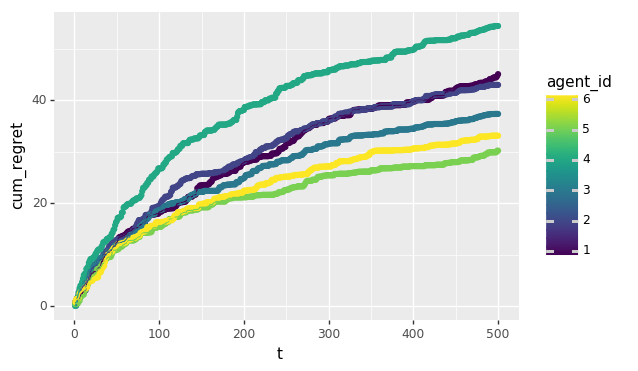

<ggplot: (8747338912417)>


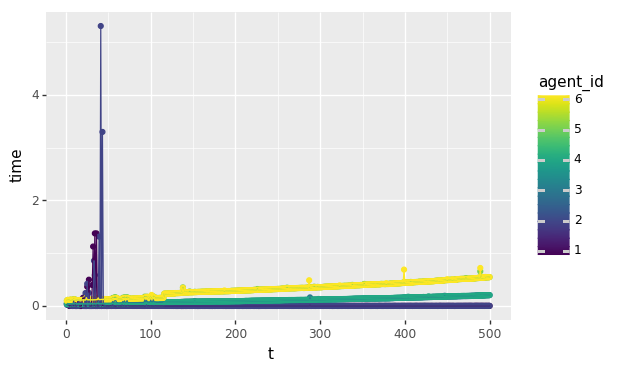

<ggplot: (8747338836865)>


In [11]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.02
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 500 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)


agents = [make_laplace_agent() for i in range(2)] +\
         [make_langevin_agent() for i in range(2)] +\
         [make_mala_agent() for i in range(2)]
results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)


theta [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037 ]
Experiment: Step 0
 Laplace sample: array([ 1.08305124,  1.05380205, -1.37766937, -0.93782504,  0.51503527,
        0.51378595,  0.51504769,  3.85273149,  0.57089051,  1.13556564,
        0.95400176,  0.65139125, -0.31526924,  0.75896922, -0.77282521,
       -0.23681861, -0.48536355,  0.08187414,  2.31465857, -1.86726519])
 Laplace sample: array([ 0.68626019, -1.61271587, -0.47193187,  1.0889506 ,  0.06428002,
       -1.07774478, -0.71530371,  0.67959775, -0.73036663,  0.21645859,
        0.04557184, -0.65160035,  2.14394409,  0.63391902, -2.02514259,
        0.18645431, -0.66178646,  0.85243333, -0.79252074, -0.11473644])
 Sample: array([-1.91724251,  1.83842963,  1.02873995,  0.80514885, -0.11033096,
       -0.75109179,  0.2016873 , -0.8

 Sample: array([ 0.5711581 ,  0.19493711,  0.17912983,  0.99614503, -0.23658275,
       -0.91144468, -0.62691171, -0.40547616, -0.59837309,  1.36821926,
       -0.29593505, -0.71589958, -1.20852499,  0.41499742, -0.418227  ,
        0.09486894, -0.48874428, -0.58908909, -0.48318556,  0.49833657])
 Accept proportion: 0.632000
 Sample: array([ 0.34708676,  0.15088689,  0.56808756, -0.48577116, -0.24118727,
        0.07564983,  0.06137554, -0.66438365, -0.04403233, -0.53622623,
       -0.89806583,  0.12657455,  0.4684784 , -0.50685169, -0.98353236,
       -0.95365849,  0.83616234,  0.11936968,  0.80373636,  0.66369828])
 Accept proportion: 0.638000
Experiment: Step 5
 Laplace sample: array([-3.27041640e+00, -8.23061805e-01,  4.06017714e-01,  3.36723661e-03,
        3.53058148e-01,  1.23611485e+00,  1.44826244e-01, -2.49419450e+00,
       -2.76941585e+00, -5.69103540e-01, -1.93334473e+00, -2.14537165e+00,
        3.75865477e+00, -4.36187617e+00, -5.54126780e-01, -2.04660339e+00,
       -1.

 Sample: array([-0.50584414,  0.26804166,  0.63766186,  0.29106254,  1.60152319,
        0.65704522, -0.37610939, -0.31642958,  0.30059739,  2.52329949,
        0.54804391, -1.56582133,  0.34716148, -0.04672924, -0.79616105,
       -0.01666981,  2.31285698,  1.68007191, -1.9590743 , -1.36558349])
 Sample: array([ 0.33558039,  0.08069218,  0.61253928,  0.03641144, -0.11656494,
       -1.0155244 ,  0.07258392, -0.09740849, -0.09579404,  0.44527755,
        1.09667859, -0.46976106, -0.16777342,  0.33052577, -0.13595378,
       -0.43970568, -0.07865987, -0.2532117 , -1.18533306, -0.16718715])
 Accept proportion: 0.637000
 Sample: array([ 1.33709925,  0.24765104,  0.19628034,  0.37395963, -1.12120464,
        1.40200455, -0.15384711, -0.41017988,  0.2059841 ,  0.46719286,
        0.92023248,  0.68441751, -0.19151499, -1.19539301,  0.41840702,
        1.39930645,  0.82155678, -0.15697544, -0.14048639, -0.01066968])
 Accept proportion: 0.682000
Experiment: Step 10
 Laplace sample: array([  3.

 Sample: array([-0.04943701, -0.6303371 , -0.03885652, -0.22521144, -0.39112927,
       -0.62867601,  0.97409608,  0.48676787, -0.14070216,  0.21812838,
        0.4429083 ,  1.01841806,  0.12941379, -0.31109323, -0.72728142,
        0.48882535,  1.12583583, -0.16141505, -0.13411732, -0.91842042])
 Accept proportion: 0.673000
Experiment: Step 14
 Laplace sample: array([  5.22558572,  -5.07682049,   1.3683242 ,  -0.2942092 ,
         7.783068  ,  17.51769898,  -0.48091854,  -2.36078965,
        -1.55000038,   1.10248182,  -8.77604195,  -3.55837943,
        -8.87120022, -11.3178688 ,   3.55121149,  -7.25079076,
         6.60173615,  -5.66338606,  -0.93366723, -13.81415945])
 Laplace sample: array([ -1.69161464,  -4.51636163,   2.08283368,  -4.62638604,
         2.87700749,   9.71066474,   2.12825368,   4.00628683,
       -11.77564964,  -0.91169391,  -1.58085446,  -0.20503705,
         2.68937861,  -3.7067004 ,  -6.64393989,  10.10290698,
        -3.44525916,  -1.14889268,  -0.12379953,  -

 Sample: array([ 0.24352775,  0.71844364,  0.84297659,  0.38638818, -0.23409218,
       -0.44341479,  2.51649818, -0.09687935, -0.08422567, -0.84796443,
       -1.17911017, -0.50834113, -0.19039487,  0.59684851, -0.78678435,
        0.93919265,  1.40525101,  1.63573513,  0.16331429, -1.26435912])
 Sample: array([-0.35914929,  0.29037214,  0.09924128, -0.53898089, -0.16390691,
       -0.57995464,  0.86511143, -0.36638983, -0.89767781,  0.0745814 ,
        0.94005476, -0.57484626, -0.56301578, -0.2191533 ,  0.01217402,
       -0.17038464, -0.23553616,  0.3881025 , -0.37336659,  0.02211164])
 Accept proportion: 0.671000
 Sample: array([-1.20640782, -0.24103861,  0.10728075, -0.04882777,  1.29447438,
        0.4874666 ,  0.85530635,  0.26845289, -1.07341357,  1.19221287,
       -0.40268943, -0.28641672,  0.34927759,  0.09880477, -0.45345859,
        1.22760876, -0.23197589, -0.36350359, -0.18974545,  0.26776163])
 Accept proportion: 0.687000
Experiment: Step 19
 Laplace sample: array([ 10.

 Sample: array([ 0.5602998 ,  0.11790522, -0.85639155, -0.3732283 , -0.13672555,
       -0.3618458 ,  0.61499353,  0.49589947,  0.43841758,  0.54738677,
        0.45438094,  0.25286147,  1.16635149, -0.474119  , -1.30227358,
       -0.31180372, -1.13114721, -0.86366971, -0.43223907,  0.21661111])
 Accept proportion: 0.690000
Experiment: Step 23
 Laplace sample: array([ -2.18567246, -16.11062841,  -4.65710637,  -3.54172291,
        20.23343186,  46.23337291,  31.02203278,  -3.97699169,
        -9.0472781 ,  -3.95782384,  -0.09428854,  -6.98602074,
       -23.07008548,   0.71674755,  -7.84813036,   9.02344354,
       -14.45963188, -35.00893894,  -9.86953639, -15.20969608])
 Laplace sample: array([ 12.42145152,   3.02721291,   2.7169658 ,  -4.50326118,
         9.0984296 ,   8.17001197,  16.74444625,  11.88882797,
       -16.53006552,   8.99630695,  12.51021799, -14.90019448,
        -7.07535245,  -7.2667332 ,  -0.13342628,   8.07275126,
        -3.92259421,  22.63222389,   1.99849459, -1

 Laplace sample: array([ 12.45156874,   6.24591395,  -2.66835256, -12.59149814,
        20.10313093,  13.50411608,  19.07702344,  16.64482467,
       -15.85354624,  16.88347651,  10.0492068 , -11.16617033,
        -5.00613273,  -8.13417542,   2.63198244,  -6.55189429,
        -4.5226394 ,  16.66906578,  -7.20782093, -24.90038446])
 Sample: array([ 1.31887229, -0.20013375,  0.08040571, -0.26862382,  2.26476783,
       -0.31552349,  0.9544551 , -0.77213052,  0.81828214,  0.25799776,
       -0.18111808,  0.36642981,  2.08439192,  1.24131683, -2.47691304,
       -0.14640198,  1.34868471, -0.0402815 , -1.76817261,  0.01343951])
 Sample: array([ 2.01353521, -0.50362657, -0.56919379, -0.91076023, -0.01585243,
       -0.31965957,  0.62844007, -0.94555274,  0.40047961,  0.19668562,
        1.07886353, -0.14011593,  0.14761965, -1.2253265 , -1.92322212,
        0.47344152,  1.08832342,  0.39938563, -0.80008785, -1.19101183])
 Sample: array([-0.42593349,  0.34950768,  0.66651163, -0.24072591, -0.

 Sample: array([-0.04125737,  0.76305155,  1.29128978, -0.05584247,  1.57984421,
       -0.85742923,  0.0124545 , -0.94082437, -0.02747816, -2.04081184,
        0.93849085,  1.1591188 ,  1.14443913, -0.44635413, -2.27572866,
        1.01816656,  1.35424225,  0.47085349, -0.1056066 ,  0.04491768])
 Sample: array([ 0.13202656,  0.3334493 , -1.03055186, -0.40862966,  0.01774606,
       -1.06787442,  0.19741163,  0.58983409,  0.96684817, -0.00859341,
        1.22733323, -0.69665015,  0.52812448, -0.61032178, -0.87643292,
       -0.86577632, -1.07525386,  0.00359385, -1.35776519, -1.47905613])
 Sample: array([-0.56555771, -0.61795232, -0.04749642, -0.51166094, -0.49141914,
       -0.42734899,  0.38816504, -0.00811469, -0.39847192,  1.22498595,
       -0.3102401 , -0.60057907, -0.47911081,  0.38343152, -0.40723724,
       -0.85499719,  0.03018834, -0.83244306, -0.22441742,  0.27983501])
 Accept proportion: 0.705000
 Sample: array([ 0.38719419, -0.6272193 , -0.46688385,  0.46206843, -0.087400

 Sample: array([-0.89011489,  0.30313047,  0.90606726,  0.00550196, -0.72506091,
       -0.95261794,  0.85118812,  0.35982667, -0.86090137,  0.93493929,
       -0.47283961,  0.37657288, -0.59828819, -1.05594101,  0.34965146,
       -0.05272345, -0.22576818, -0.71983999, -0.2639505 , -0.84758004])
 Accept proportion: 0.691000
 Sample: array([ 0.1047562 , -0.96964887, -0.63086648, -0.03149928,  0.74460325,
        0.61101223,  0.41158135,  1.15984075, -1.09737869,  0.12464119,
       -0.14355041,  0.109777  , -0.18190362, -0.10776946, -1.05480714,
       -0.56831615, -1.27896491,  0.0388767 , -0.83477998, -0.25255465])
 Accept proportion: 0.718000
Experiment: Step 36
 Laplace sample: array([ -5.0342841 ,  -0.59140887,  -9.00206365,   7.66359587,
         5.76839233,   0.84919292,  -1.10266539,   1.86251793,
        -2.56639211,   8.72760995,   1.45492358,   2.98405304,
        -8.4960415 ,  -3.34714044,  -8.00947495,   1.42609084,
         4.39055778,  -9.28820994,   3.61351615, -11.8985

 Sample: array([-0.91240494,  0.73153512,  0.50090939, -0.62412243, -0.17927346,
       -0.04470875,  0.37373217,  0.42504232, -0.1130114 ,  0.40608998,
        0.45543595,  0.81396355, -0.83755884, -0.64850991, -1.01641637,
       -0.91936412, -0.50276288, -0.86187245, -1.37259806, -0.47253392])
 Accept proportion: 0.722000
 Sample: array([ 0.47991074, -0.36383987,  0.13867881,  0.7852234 ,  1.54398149,
        0.23577926,  0.05523202,  0.88786369, -1.6964267 ,  1.14016983,
        0.30753619, -0.14167558, -0.04000543, -0.89666828, -0.68042663,
        0.26094913, -1.13366188,  0.41896816,  0.14509327,  0.13161738])
 Accept proportion: 0.727000
Experiment: Step 41
 Laplace sample: array([-2.17913714, -2.86535662, -0.77388623,  1.73653539, -0.2435776 ,
        3.66222484,  1.04150925, -3.24084806, -1.01706629,  1.63660332,
       -2.35289382,  3.13262292, -0.52348773, -0.26790151, -5.05926599,
        0.04724569, -2.92624323, -1.42063333, -0.14052285, -1.31909867])
 Laplace sample: arr

 Sample: array([-1.00119164, -0.23756786,  1.1028738 , -0.61934501,  0.85221206,
       -0.79648377,  0.80144024,  0.62757551,  0.09771809,  0.27444498,
        0.49906994,  0.2234931 , -0.50131394, -1.48529039, -0.42589749,
       -1.12457318, -0.39501117, -0.66976427,  0.00926382, -1.12334861])
 Accept proportion: 0.700000
 Sample: array([ 0.77787268, -0.27656357,  0.0608822 ,  0.97721376,  0.94233102,
        0.84191493, -0.16462119,  0.47130426, -1.50846828,  1.06794615,
        0.42393659, -1.14813659,  0.08415143, -0.25823262, -1.13499702,
       -0.00677049, -1.0278802 ,  0.25403087, -0.62773684,  0.75825607])
 Accept proportion: 0.714000
Experiment: Step 46
 Laplace sample: array([-1.06265428,  0.243478  , -1.30693172,  1.07757525,  1.13933758,
        1.65471827,  0.63725984, -2.16775769, -2.63953281,  3.90484496,
        2.57620546,  0.3199142 , -0.37476149,  0.58261647, -2.63839963,
       -0.19479788, -1.71999706, -0.66006002, -0.78453989, -2.26594119])
 Laplace sample: arr

 Sample: array([-1.13621177,  0.98248761,  1.51572541,  0.61500037,  0.31997524,
       -0.82921922,  0.44653267,  0.28160245, -0.98037058,  1.02060845,
        0.58606672, -0.43716497, -0.28649179, -1.33726322, -0.26064187,
       -0.61443541, -1.03271209, -1.62090282, -0.10908022, -0.61794209])
 Accept proportion: 0.703000
 Sample: array([ 1.00917842, -0.6751295 , -0.55847074,  0.81722669,  1.46133266,
       -0.15860022,  0.20482486, -0.11403269, -0.20753262,  0.83034956,
        0.45980968, -0.63837617, -0.06064269, -0.87249992, -1.67874051,
        0.32298388, -0.80378892,  0.24481928,  0.50375013, -0.3539224 ])
 Accept proportion: 0.711000
Experiment: Step 51
 Laplace sample: array([-1.25007967,  0.82634334, -1.04606608,  1.52817076,  1.56016863,
        1.51855747, -1.19624555, -1.73129856, -2.12374776,  2.86409776,
       -0.34074478,  2.10669149, -0.49385641,  0.01352054, -2.98104626,
       -1.07777486, -0.35341228, -2.55450706,  0.18816843, -2.7376209 ])
 Laplace sample: arr

 Sample: array([-0.30082243, -0.1295275 ,  0.79640189, -0.47297837, -0.88659258,
       -0.72105139,  1.24578977,  0.36740514, -0.11613923, -0.77133614,
        0.41983322, -1.02001884, -0.44630506, -0.73574079, -0.80330272,
       -0.97860204, -0.19005614, -0.62062213,  0.04251694, -0.89876061])
 Accept proportion: 0.713000
 Sample: array([ 0.94780967, -0.41319325,  0.21633003,  0.20006793,  0.7762795 ,
        0.32737737, -0.34953016,  0.55183383, -1.30320921,  0.19768571,
       -0.40192967, -0.08272853,  1.25086694, -1.37368087, -0.42671531,
        0.41598986, -1.48513813,  0.36529697,  0.01098384, -0.24580156])
 Accept proportion: 0.715000
Experiment: Step 56
 Laplace sample: array([-0.69236534,  1.01355353, -1.09881476,  2.70332185, -0.47746348,
       -0.25193652,  1.72542787, -2.94528905, -2.30377292,  1.30883321,
       -0.63507762,  0.37789901, -0.59839028, -1.7777377 , -4.22532989,
       -0.81200843, -0.55491313, -1.57314451, -0.52709413, -2.75358621])
 Laplace sample: arr

 Sample: array([-0.77839374, -0.01783017,  0.77676964,  0.07346705, -0.47331147,
       -1.02176532,  0.61481434, -0.0752643 , -0.81855283,  0.08285562,
        0.13809547,  0.08327707,  0.17136405, -0.06473252, -0.20161236,
       -0.04617485, -1.04978339, -0.58943783, -1.3974527 , -0.4601151 ])
 Accept proportion: 0.705000
 Sample: array([ 0.62259796, -0.06640559, -0.49403236,  0.02587386,  0.18043588,
        0.19801982, -0.07213633,  0.33385936, -0.17251893,  0.9279287 ,
       -0.01851284, -0.46849139, -0.29865667, -0.45880496, -1.3811256 ,
        0.8492759 , -1.50543202,  0.31991305, -0.08494583,  0.64430178])
 Accept proportion: 0.727000
Experiment: Step 61
 Laplace sample: array([-1.21803872,  0.50132955,  0.05920515,  1.51716226,  0.03038623,
        2.34447545,  0.67304424, -0.31948729, -2.6825649 ,  1.5489635 ,
        0.06246344,  0.02923317, -0.46981104,  0.79984638, -2.24270083,
       -0.30269794, -0.51225089, -2.01350251,  0.26918794, -3.90779035])
 Laplace sample: arr

 Sample: array([-0.17447348,  0.62373948,  0.86748021, -0.11940119, -0.24675027,
       -0.28674641,  1.19960075,  0.29021976, -0.62168657,  0.35526569,
       -0.66745438, -0.40219946, -0.83776911, -1.14534544,  0.12725033,
       -0.01968595, -0.58806008, -0.77287288, -0.90982356, -1.51781691])
 Accept proportion: 0.714000
 Sample: array([ 1.04796492e-01, -2.08876098e-01, -6.57936948e-01, -5.43119426e-01,
        8.00849448e-01,  6.73156681e-02,  3.73780837e-01,  1.11734763e+00,
       -5.93888164e-01,  1.60607454e+00, -2.65738841e-04, -3.07579858e-02,
        1.94062334e-01, -1.16086555e+00, -1.53217277e+00,  8.18088624e-01,
       -1.50395752e+00,  4.22596428e-01, -4.99039261e-01, -6.62769810e-01])
 Accept proportion: 0.697000
Experiment: Step 66
 Laplace sample: array([-0.7001476 , -0.13771404, -1.19347709,  2.69602037, -0.58507017,
        0.98062274,  0.51312759, -1.56010492, -0.88396883,  0.22232401,
       -0.23382661, -1.30803349,  0.2535661 , -0.4190324 , -1.60558605,
      

 Sample: array([-0.10982081,  0.88591315,  0.7419414 ,  0.03892712, -1.35809898,
       -0.78570679,  1.31224245,  0.69721709, -1.03012667,  0.3484815 ,
        0.11869281,  0.0836076 , -0.33462243, -0.17925764, -1.18089715,
        0.06615166, -0.90239933, -1.07328383, -1.7634769 , -0.72219845])
 Accept proportion: 0.714000
 Sample: array([ 0.15754907,  0.38860699, -0.39693104,  0.32179082,  0.37955198,
        0.85302553,  0.00462563,  0.58436995, -0.73423198,  1.32635781,
       -0.1293636 ,  0.28247598,  0.19816213, -0.88054818, -1.61885521,
        0.31592759, -1.74319697,  0.26995223,  0.01852982,  0.22576587])
 Accept proportion: 0.691000
Experiment: Step 71
 Laplace sample: array([-1.19490935, -0.18233672, -0.4820586 ,  2.58758603, -0.05237032,
        1.56569348,  0.88108013, -2.80402963, -1.50527721,  2.36608768,
       -0.87645637, -0.90476738, -0.16386965, -1.00345966, -0.77538447,
       -2.15331416, -0.53238312, -0.84555238, -1.60726773, -2.78776091])
 Laplace sample: arr

 Sample: array([-0.88481795, -0.62842326,  1.13524963,  0.08203467, -0.82567939,
       -1.02486708,  1.1907854 , -0.01756563, -1.20831143,  1.05868102,
       -0.0642946 , -0.65290449, -0.88249963, -0.0642179 , -0.75382926,
       -0.87243422,  0.02110298, -1.72668508, -0.55480548, -0.36662084])
 Accept proportion: 0.734000
 Sample: array([ 0.74167429, -0.37745232,  0.59092977,  1.16577186,  0.48219668,
        0.42857748, -0.34533083,  1.3625128 , -1.0312809 ,  1.27832023,
        0.38676228, -0.53718258,  0.88347625, -0.74705146, -1.37311857,
        0.53964258, -1.16906081,  0.00209597, -0.57174477,  0.08714603])
 Accept proportion: 0.702000
Experiment: Step 76
 Laplace sample: array([ 0.72533245,  0.37024298,  0.24857894,  1.36559372,  0.01978094,
        0.30489073,  1.0354009 , -1.72183713, -2.06851374,  0.61261164,
       -0.49427926, -1.15800918, -1.98308695, -0.12318618, -1.85657126,
       -3.13025819, -0.64918043, -2.59960909, -1.08108017, -1.31647165])
 Laplace sample: arr

 Sample: array([-1.75835435,  1.09759591,  1.04325657,  0.66058805, -0.41413466,
       -0.90632942,  1.22003237,  0.71493299, -1.18676553,  1.21246569,
        0.15022201, -0.02539431,  0.42285394, -0.73650398, -1.12793893,
       -0.39133126, -0.57897078, -1.01214818, -1.12072001, -0.60862906])
 Accept proportion: 0.721000
 Sample: array([ 0.12226763,  0.14015222, -0.28988458,  0.35066107,  1.20979185,
        0.18606575,  0.58891724,  0.93158557, -0.73799604,  1.03471478,
       -0.23570609, -0.37988184,  0.18799742, -0.47528214, -1.97977933,
        0.30773184, -1.65980024, -0.07046842, -0.29122795,  0.01878364])
 Accept proportion: 0.714000
Experiment: Step 81
 Laplace sample: array([-0.17003017,  0.58533856, -1.39042986,  1.13972458,  1.31154876,
        1.49063665,  0.49518181, -1.09395461, -0.65968675,  1.9922936 ,
        1.70609635, -0.56960258, -0.0725037 ,  0.34844271, -1.9192297 ,
       -0.67678977,  0.51719592, -1.17295748, -1.32689542, -0.91379894])
 Laplace sample: arr

 Sample: array([ 0.19279754,  1.00043776, -1.33206291,  0.64725451, -0.56249078,
       -0.53758416,  1.18312303,  0.98201326, -1.29664534, -0.97442334,
       -0.58832483, -1.61844958,  1.97350708, -0.92749086, -1.55773078,
        0.01200336, -1.07519441,  0.88373604, -0.87000257, -1.33550307])
 Sample: array([-0.53384095,  0.58893014,  0.70961636,  0.03766673, -0.87452821,
       -0.76657325,  0.82841653,  0.44028675, -1.1961241 ,  0.73234236,
        0.69931631, -0.19939005, -0.68100823, -1.33260704, -0.46126922,
       -0.25779119, -0.39181095, -0.53455867, -1.0682298 , -1.04037918])
 Accept proportion: 0.709000
 Sample: array([ 0.51989605, -0.7943278 , -1.15722028, -0.28284968,  1.19548131,
       -0.27894411, -0.60540764,  0.42117138, -0.46969506,  1.30638297,
        0.27788371,  0.02892195,  0.18124365, -1.2601522 , -1.94515522,
        0.21878427, -1.2653693 ,  0.47254544, -0.53974643, -0.22264879])
 Accept proportion: 0.690000
Experiment: Step 86
 Laplace sample: array([-0.5

 Sample: array([-0.01297388,  0.2851138 , -0.35057032,  1.26708328, -0.43693449,
       -0.30904402,  0.5930707 ,  0.01293799, -0.08235427, -0.32301927,
       -0.23631368, -0.94339153,  0.88576727, -0.81431746, -1.72085412,
       -0.45834127, -0.58790566,  0.27809493, -0.44977001, -0.64875063])
 Sample: array([-0.83140121,  0.28206996,  0.52360434, -0.20359517, -0.56687729,
       -0.26705776,  1.12182765,  0.2664439 , -0.45306014,  0.88658863,
        0.34089146, -0.18279043,  0.22905767, -0.36683661, -0.64866883,
       -0.37043028, -0.43409715, -0.66780533, -0.89866525, -1.45106238])
 Accept proportion: 0.709000
 Sample: array([ 0.16863845, -0.22720691, -0.21936768,  0.20715818,  1.54168781,
        0.18983777, -0.66372609,  0.41258603, -0.82929098,  1.19461328,
        0.29397597, -0.21590436,  0.37950799, -0.44145436, -1.57232076,
        0.3028658 , -1.84992603,  0.19560003, -0.31612415, -0.35714592])
 Accept proportion: 0.746000
Experiment: Step 91
 Laplace sample: array([ 0.0

 Sample: array([ 0.10486138, -0.66400642, -0.47796333,  0.97354868,  0.9864575 ,
        0.20322187,  0.68048526,  0.74715255, -0.78710094,  1.9193524 ,
        0.16963237,  0.15218331,  0.86058617, -1.7974202 , -0.10834662,
        0.19384554, -1.61854896,  0.50729525, -0.4328115 ,  0.08034537])
 Accept proportion: 0.696000
Experiment: Step 95
 Laplace sample: array([-0.03668089, -0.12557145,  0.73628917,  2.10333246,  0.51267935,
        2.02256106, -0.81820014, -0.50467835, -0.24608805,  0.13713482,
       -0.15835357,  0.62692148, -1.11416959, -1.81446806, -2.07638187,
       -1.48323557, -0.77030061, -0.96703615, -0.15310819, -3.27132127])
 Laplace sample: array([ 1.3575433 , -0.61830273,  0.0717039 ,  1.04957954, -0.75192239,
       -1.54939882,  1.21788002,  0.11653201,  0.85312183,  0.5547037 ,
       -1.60977268,  0.9265658 ,  1.74580605, -1.13172005, -1.78522932,
        0.28656429, -2.02126987,  2.0962576 , -1.48742256, -1.45333848])
 Sample: array([ 0.54093725,  0.45115306,

 Sample: array([ 0.57438603, -0.12975816,  1.05797888,  2.15287101, -0.31034664,
       -0.479218  ,  0.05270015,  0.48158947, -1.04419272,  1.39015233,
        0.07099837, -0.04841526,  0.91069905, -1.40995168, -1.1586546 ,
       -0.02045627,  0.5926022 ,  0.07945772, -1.5158823 , -2.04535527])
 Sample: array([-0.76467747,  1.22121481,  1.2933475 ,  0.5007311 , -0.47002838,
       -0.8211119 ,  0.97014025,  0.69472417, -0.61372218,  0.91347735,
       -0.03999931, -0.67554634,  0.38611061, -0.92106995, -2.16327422,
       -0.08488988, -0.79344568, -1.01423323, -1.22156606,  0.00950543])
 Accept proportion: 0.735000
 Sample: array([-0.00458262, -0.4380629 , -0.47238846,  0.82532817,  1.50250373,
        0.57708089, -0.28735723,  1.66965978, -1.27325053,  0.69383173,
        0.03485202, -0.41298271,  0.06626751, -0.99060119, -1.41418764,
        0.09911138, -2.27085553,  0.11685136, -0.38238261,  0.12902003])
 Accept proportion: 0.698000


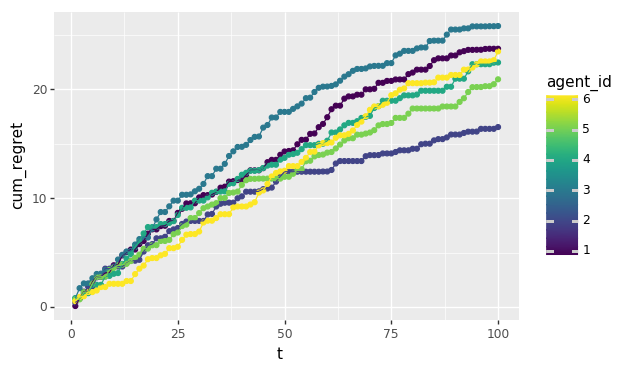

<ggplot: (8772739266469)>


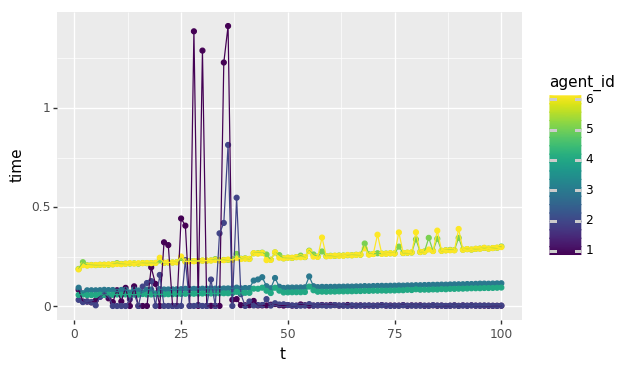

<ggplot: (8772739262257)>


In [17]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.02
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=1000 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 100 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)


agents2 = [make_laplace_agent() for i in range(2)] +\
         [make_langevin_agent() for i in range(2)] +\
         [make_mala_agent() for i in range(2)]
results2, df2 = simple_compare(agents2, num_articles, dim, var, n_steps, seed=42, verbosity=1)


theta [-0.48539085 -1.90515385 -0.5262218  -0.31354602  0.33070649  0.93853725
 -0.56821116 -0.19377527  1.31280484  1.681251   -0.76813595 -0.76311794
 -0.45737545 -2.15541652  0.51516947  0.37920962 -0.69993372  0.7089239
 -0.34798538  1.54588781]
Experiment: Step 0
 Laplace sample: array([-1.65734926,  0.41937223,  1.6727521 , -0.09800263,  0.8331321 ,
        1.3895901 ,  0.32892263,  0.17987966,  0.91079746, -0.94644346,
       -0.0055623 , -0.071834  ,  2.11274353,  0.28978015, -0.52611489,
        0.85912152,  0.17710533,  0.59807973, -1.01869224,  0.15586703])
 Laplace sample: array([ 0.22737773, -0.75835414,  1.31671131, -0.02178904,  0.14545183,
       -0.98514348,  0.88927717, -1.35704342,  0.89083548,  0.34833834,
       -0.49838783,  0.39951716,  0.0169965 , -0.5615497 ,  0.28198878,
       -0.90535302, -1.14841043, -0.47495637, -0.66502502, -0.85850656])
 Laplace sample: array([ 0.71577127,  1.52449703,  0.90554789, -1.6979077 , -0.96358582,
       -0.2830836 , -0.9804700

 Sample: array([-1.18030937,  0.19701793, -0.01004412, -0.6920691 ,  0.10028411,
        0.63504547,  0.42444652, -0.74126673, -0.17804787,  0.38487538,
       -0.7984234 ,  0.70675237, -0.65230896,  0.60663997,  0.57079454,
       -0.48163472, -0.08350054,  0.67568921,  0.34004345, -0.18165594])
 Accept proportion: 0.600000
 Sample: array([ 0.26332433, -0.48415211, -0.27233491, -0.24215055,  0.44194551,
        0.67174533,  0.01520022,  0.16567578, -0.50686807,  0.06802054,
        0.71637811, -0.02710496, -0.24627372,  0.58974528,  0.41931239,
        0.08553807, -0.2430191 , -1.27019921,  0.0254284 , -0.07609328])
 Accept proportion: 0.608000
 Sample: array([ 0.96526425, -0.86601103,  0.56602505,  0.15657669, -0.24622365,
       -0.80914546,  0.02783147, -0.216916  , -0.06057439,  0.36443457,
       -0.03285351, -0.73847863,  0.81880351,  1.16172233, -0.22285681,
       -0.53727036,  0.0737913 ,  0.33875182,  0.05955111,  0.19697367])
 Accept proportion: 0.628000
Experiment: Step 2


 Sample: array([-0.57254304,  0.805591  ,  0.57382995,  1.13056433,  0.95991858,
       -0.47766373,  0.95072805, -0.61949307, -0.42770266, -0.95583759,
        0.02783831,  0.33321313, -0.35671683, -0.40667902,  0.56115669,
       -0.47803216,  0.35230564, -0.41051094, -0.21550533, -0.22792993])
 Accept proportion: 0.643000
 Sample: array([-0.24344546,  0.4126125 ,  0.39395237,  0.63792966, -0.16501575,
       -1.56544377,  0.58407162, -0.29197212,  0.18899823,  1.26449037,
       -0.71840733, -0.31307852, -0.19880474, -0.26625846,  0.16192912,
       -0.43374476, -0.31389305,  0.23281107, -0.92449547, -1.15843131])
 Accept proportion: 0.612000
 Sample: array([ 1.48508373, -0.38978293,  0.04815829, -0.06173143, -0.52944282,
        0.80517036, -0.71819326, -0.39911315, -0.4677107 , -0.08370266,
       -0.25589512,  0.39758989, -0.90967445, -0.02169833,  0.57004436,
        0.19348877, -0.47935548,  0.469684  ,  0.6017694 , -0.31364064])
 Accept proportion: 0.627000
 Sample: array([-0.

 Sample: array([ 0.85493793, -1.05009958,  0.22044662, -0.48455627,  1.70432782,
        1.01587642, -2.62077682, -0.96919771, -0.95185851, -0.88882957,
       -1.53965561,  1.41460656, -1.23207022,  1.22293386, -0.54775273,
       -0.98678337, -0.65670937,  0.85579778, -0.01884523,  0.74966975])
 Sample: array([-0.16565522,  0.40216839,  0.60915523,  1.36728455, -0.32236139,
        1.16270186, -2.07608378, -0.19571285, -0.71264923,  0.00548048,
       -1.7396976 , -0.08575383, -0.75892923,  0.86773965, -0.49025302,
        0.66642329, -1.17787829,  0.51039239, -1.02954724, -0.35195339])
 Sample: array([ 1.1780619 ,  2.7695004 , -1.80797629, -1.49318884,  1.04742816,
        0.22284535,  0.48566348,  2.24133962,  1.4426489 ,  0.64682379,
        1.0506169 , -0.84574558, -0.59516045, -0.30225781, -0.12253992,
        0.03368948,  0.84724887, -0.22500852, -0.36334537, -1.98101033])
 Sample: array([-0.15556375,  0.44982822,  1.61450233, -1.24543306, -0.16581026,
       -0.69256747, -1.93

 Sample: array([ 1.90405948,  0.169805  ,  0.04368435, -0.91571382,  0.49668224,
       -1.00600474,  0.22167947, -0.10110132, -0.74148107,  1.84571165,
        2.14488699,  1.27034454, -0.76548403, -0.6889728 , -0.97873485,
        0.67000303,  1.60970165, -0.37741433, -0.23157532, -1.1227917 ])
 Sample: array([ 0.87705189,  0.91570174,  0.59749972,  0.3515492 ,  1.56997042,
        0.04838393, -0.21953114,  0.81672032,  0.8672069 , -1.22091933,
       -0.57978804,  0.07171228,  0.44589953,  0.73290634, -1.64493824,
        0.38724769, -0.9412923 , -1.32130845,  2.33540269, -0.43092073])
 Sample: array([ 1.12750932, -0.00827173,  0.72190719, -0.43942224,  1.05241445,
        0.73600925,  1.17697443, -0.42267813,  0.77305135,  1.50506768,
        0.45050449,  0.50034042, -0.12861937,  1.12541945,  0.69085664,
        0.67336885,  0.0885737 ,  0.43688188, -0.91130019, -0.83361313])
 Sample: array([ 0.92220379, -0.77309576, -1.55393916, -0.11576512,  0.03509786,
        0.56688643,  1.86

 Sample: array([ 0.13615815, -1.50662654, -0.7820258 ,  0.38701532, -0.42057694,
        0.19790605, -1.09361216, -0.84663704,  0.25419727,  2.17978864,
        0.51814996,  0.47681338,  1.07035089, -2.67413452, -1.34946648,
        2.19121109, -0.60089147,  0.11237078, -0.24388566, -0.83356378])
 Sample: array([ 0.81981912,  0.38547223, -0.16668972, -0.4609419 ,  1.99872451,
        1.32449769, -0.48014462, -1.19410792, -0.5754272 , -0.96154421,
        0.01989591,  0.40663022, -0.04883331, -0.74148343,  0.08275928,
        0.94019338,  0.15963756,  1.17527116,  0.37071031,  1.06158501])
 Sample: array([-0.23686338, -1.34385923,  0.33967986, -1.86513205,  2.13413565,
        1.36518555, -1.40964483, -1.93499871, -0.14684768,  0.2905354 ,
        0.56293084,  0.41111065,  1.3357994 , -0.60239024, -0.2664461 ,
       -0.68944143, -0.52861902,  0.00602479,  0.56030766, -0.1254844 ])
 Sample: array([ 4.25301771e-01, -1.59704917e-01, -8.35237656e-02, -4.70021173e-01,
       -8.87373501e-01

 Sample: array([-1.71172965,  1.05035448,  0.33049424, -0.43754462, -0.2386881 ,
        1.71723233, -0.99724258, -1.0314289 ,  1.52162882, -0.43216129,
       -1.33982851, -1.47153216,  0.05310417,  0.94287174,  0.19831463,
        1.27887736, -0.36087502, -1.52602838, -1.15568924, -1.00974773])
 Sample: array([-0.31912571, -0.32726267, -0.36733701, -0.3927658 ,  0.07952159,
        0.27254597,  0.31079532, -0.15352226, -0.34457755,  1.31536323,
        2.33318032, -0.69878598,  0.54402596, -0.77961852, -0.19658089,
       -0.00665226,  1.15281442,  1.51747317,  0.69004612,  0.57892407])
 Sample: array([ 1.89398406, -1.52450803,  0.14656719,  1.0254716 , -0.90746716,
       -0.42121307,  1.44738202,  0.77863438,  0.51390557,  1.77266698,
       -1.84425788,  1.04907293, -0.24373052,  0.21345133, -0.22891013,
        1.35470026, -0.63649589, -0.51654319, -0.99117831,  0.53887674])
 Sample: array([ 0.61527523, -0.64240136, -1.53166446, -1.47702365,  0.46217755,
        1.65086762, -0.22

 Laplace sample: array([-4.46789652, -1.73269463, -4.22726202,  1.38532157,  5.29457628,
       -5.17899204, -2.69519278, -6.48962199,  4.92045786,  3.73739174,
        1.25708136, -8.31276575, -2.41442684, -8.28094934,  0.35790533,
        2.41876017,  0.24849895, -2.36950948, -3.8481392 , -1.29147995])
 Sample: array([ 1.27818952, -1.45501831, -1.11067928, -1.60918837, -0.51116027,
        1.41907222, -0.13119073, -1.33859755,  1.9987742 , -0.06484918,
       -0.41991338,  0.67026854,  0.54849387, -1.98926566, -0.7197412 ,
        0.2923037 ,  0.88482191, -0.04864762,  0.55793186,  0.34462638])
 Sample: array([-2.36861092, -0.75035988, -0.4904137 , -0.17954332,  1.07885619,
        0.50689097, -2.44310166, -0.00264772, -0.51135924, -0.91747173,
       -0.99131211, -0.12218507, -0.4976714 , -0.25312645, -0.12793151,
       -0.51685968, -0.5805682 , -1.24077038,  0.06909488,  1.07522952])
 Sample: array([-1.55176782, -0.19635176, -1.9508654 , -0.38692367,  0.57648442,
        0.1210422

 Sample: array([-0.08965636, -0.83798246, -0.08841657,  0.10330479, -1.09382293,
       -0.92557415,  0.45778284,  0.08990286, -0.23378841,  0.54496071,
        1.00309999, -1.21959759, -0.11837084, -1.47146546, -1.20359231,
       -0.37437714,  1.29432772,  0.74172066, -0.01408645,  0.09223057])
 Sample: array([ 1.29237439, -0.1058497 , -2.63433405, -1.22794839,  0.02955705,
        1.31424911,  0.90895843,  0.39328104,  0.71055795,  0.43385611,
       -0.13215825, -0.41537831,  0.66611886, -1.50230613,  1.17711108,
       -1.49211084,  0.69039084, -0.72730148, -0.95635118,  0.29790143])
 Sample: array([-0.26728724, -1.73531271, -1.14067401, -1.37904092, -0.32383726,
       -0.40845835,  0.37474142, -2.07488622,  0.06281266, -0.63542284,
        1.60975556,  0.86009749, -1.04519487,  0.52995169,  0.73019333,
        0.1869955 , -1.03090554, -0.75246314, -0.19507992,  2.73937487])
 Sample: array([ 0.30564741, -0.72560986,  0.71296351,  1.14863725,  1.28167896,
       -0.99207908, -0.29

 Sample: array([ 0.32937241, -1.4801021 , -0.1512871 ,  0.55608682, -0.34743698,
       -0.9476791 , -0.6506109 , -0.9819881 ,  0.89273104,  1.01309827,
        1.19402676, -2.47891923,  0.26662245, -1.09086162,  0.75990526,
        1.04540488, -0.77990595, -0.35860472, -0.00903977,  1.53528382])
 Sample: array([-1.62602446, -1.41101952, -1.34628793, -0.99851603,  0.52224673,
       -0.15427977, -0.62927049, -0.10004199,  1.87782556,  1.47921894,
       -0.68009087,  0.23218743,  0.69073756,  0.21687157, -2.11867066,
       -1.17050074,  0.66097865, -0.58368868, -0.35508579,  0.47729235])
 Sample: array([-0.47838062,  1.1698788 , -1.89830775, -0.05418251, -0.77595278,
        0.64541176,  1.42984921, -0.76140698, -1.14347751, -0.78582482,
        0.00295451, -1.61223233, -1.29031203, -0.34132157,  0.61993123,
        1.05585036, -2.0297909 , -0.39108909,  1.51859164, -0.24028575])
 Sample: array([-0.02553965, -1.88568996, -0.29701086, -0.6329023 ,  0.43988902,
       -0.90528312, -0.09

 Sample: array([-0.23025441, -1.424573  ,  1.95185068,  0.81965053,  1.135852  ,
        0.04990682,  1.39170495,  0.32519596, -0.36010463, -0.8273531 ,
        0.03657981, -1.74493277,  0.67370284, -0.93300903, -1.32204424,
        0.5207019 ,  0.76835973,  0.95068372,  0.91954402, -0.38611014])
 Sample: array([-2.43696468,  1.11376449, -0.39888224, -1.00702912,  1.07846289,
       -0.08873713,  2.43350809, -0.96912255, -0.25363659,  0.4353819 ,
       -1.90228699, -0.46889657, -0.31816185,  1.38490187, -1.33778574,
        0.99904987,  0.52024923,  0.27104374,  1.60156021, -0.03935034])
 Sample: array([-3.87349907e-01,  2.10721586e-02, -2.46263206e+00,  6.51259301e-01,
       -6.19446640e-01,  6.43829315e-01,  1.55313191e-01, -1.69349736e+00,
       -4.18613572e-01,  7.74635496e-01, -1.65934450e+00, -1.73651746e+00,
        8.91068039e-01,  3.26804990e-01,  1.12003671e+00, -5.97688560e-01,
       -6.01140322e-01, -1.19501548e+00, -1.43139536e-03, -2.10709719e-01])
 Sample: array([-0.

 Sample: array([-1.59484846, -0.81041475, -0.14293611, -1.16612898,  0.05521907,
       -0.45480918, -0.63804083,  0.60144135, -0.32567563,  0.9260393 ,
        0.77496663, -1.91431765,  0.63767999, -1.80177156, -1.85339056,
       -0.5678802 ,  0.47326915, -0.0814542 , -0.41962595,  0.40285637])
 Sample: array([-0.77608179, -0.26856355, -0.74132781,  1.69771619,  0.26909204,
       -0.30027125, -1.72250091, -0.04075346,  0.36770755,  1.12632315,
       -0.20528825,  0.86769212, -1.65564819, -0.47611897, -0.76935053,
       -0.02049559, -0.47169671,  1.30342326,  0.20224343, -1.40511485])
 Sample: array([-0.23178585,  2.32003462, -0.17972551, -0.14714084, -0.69846469,
        0.28881698, -0.25506781, -0.70541909, -0.83670134,  1.46248504,
        0.06587911, -2.41988666, -0.63372976, -0.24569403,  0.63889787,
        0.15728915,  0.6561203 ,  1.05548681, -0.31498439,  1.97796298])
 Sample: array([-0.43163745, -0.35567004, -0.69386147, -0.64569596,  1.60267446,
        0.52802812,  0.50

 Laplace sample: array([  6.35357763,  -7.31943976,   2.55263727,  -3.61271164,
         0.22523277,   9.91546163,  -4.39183887,  -4.44130772,
         3.54267904,   5.40669933,   5.21590007,   2.84250905,
        -9.92024151, -19.53504855,   4.73727934,   7.76277276,
        -1.38206094,   6.31062547,   8.33334752,   3.79617565])
 Laplace sample: array([-5.29134812e+00, -9.03867975e+00,  2.90615129e+00, -9.81210157e-02,
        7.58488001e-01, -5.40253397e+00, -7.99135268e+00, -3.64036950e+00,
        4.83121504e+00,  7.14422339e+00,  5.02500816e+00, -2.85449001e+00,
       -1.12973001e+01, -1.38824331e+01,  8.53496453e-02,  3.22931776e+00,
        7.97327125e-03, -9.15169484e+00, -6.45121494e+00, -3.00381695e+00])
 Sample: array([-0.83765336,  0.2916633 , -0.57367286, -0.33575269, -0.62666831,
       -0.60491528,  0.56628756,  0.37866406,  0.84583906,  1.31662614,
        0.23911707,  0.02438152, -1.70681202, -0.37668465, -0.10848004,
       -1.5639448 , -0.19081146,  0.76802912,  1.

 Sample: array([-1.46502349,  0.564461  , -1.67782459, -1.21967188, -0.06761582,
        0.21901072, -0.11770899, -0.12139561, -0.91474257,  1.20338725,
       -0.34000409, -0.02407165, -1.14282927, -0.80997678,  0.81305879,
       -0.34881742, -0.43957223, -0.37168401,  0.2665893 ,  1.45293605])
 Accept proportion: 0.678000
Experiment: Step 25
 Laplace sample: array([-12.16603825,  -4.54805269, -10.75289332,  -4.54267668,
        -1.40672728,   7.32316202,  -1.39395302,  -3.75903364,
        -6.29493265,   9.0285118 ,  -6.2764426 ,  -3.52882225,
        -8.7949452 , -19.56501522,  -5.69535595,  -2.84235225,
        -6.39074713,   2.7859823 ,   7.28980977,  -3.69995878])
 Laplace sample: array([  0.28301874,   1.01944739,  -7.30480344,  10.80328823,
        -2.44738358,   1.57655765,   7.47374448,  -4.16160086,
         0.20059301,   5.86851884,  -0.19427478,  -0.99819094,
        -3.15414151, -14.54728882,  -3.26537526,   8.34069456,
        -0.24033816,  -3.31580354, -11.31799314,   

 Sample: array([-1.13542362, -1.30439253, -0.29263456, -0.39206576,  0.38938339,
       -0.46833362, -0.30082228, -0.49032971,  0.8219706 , -0.67675129,
        0.04047785, -0.67117635, -1.09315481, -0.92424061,  0.9735252 ,
        0.12526921,  0.45049589,  0.15105139, -0.2102968 , -0.08222039])
 Accept proportion: 0.671000
 Sample: array([-0.24836881, -0.70098986,  0.7752913 , -1.11559724,  0.48052505,
       -0.32924394, -0.71371952, -0.53256208,  0.89962181,  0.00251644,
       -0.96907567, -0.2509294 , -0.36300304,  0.30867735, -0.35280603,
        0.96159423, -0.95279739, -0.78050366, -0.81410106,  0.64003326])
 Accept proportion: 0.691000
 Sample: array([-0.01269876, -0.20246411, -0.19673997, -0.04205383,  0.88980743,
        0.15939448, -0.20489303, -0.27500727,  0.38404745,  0.3092093 ,
       -0.36750542,  0.0731109 , -0.57967399, -0.55992285,  0.06179608,
       -0.15911918, -0.00921695,  0.95872981, -0.1185238 , -0.00933647])
 Accept proportion: 0.681000
 Sample: array([-0.

 Sample: array([-1.21193145,  0.1585815 , -2.26679274, -0.39905123, -1.71339387,
       -0.12976544, -1.00877233, -0.37385925,  0.31487395,  0.00743668,
       -1.15033545, -1.21774935, -1.71439096, -0.55698825,  1.56487333,
        0.97842576, -1.95057156,  1.6191808 , -0.6603977 ,  1.86566717])
 Sample: array([ 0.1751366 , -0.86858726, -0.4577551 , -0.4132548 ,  0.93912888,
        0.32886964,  0.16898298, -0.28007437,  0.51225499,  0.43232181,
        0.39817802, -0.27018691, -1.67785877, -0.45248442,  0.60579624,
       -1.0308309 , -0.50535272, -0.83323739, -0.27610204,  0.59056113])
 Accept proportion: 0.675000
 Sample: array([ 0.29716823, -0.05064361,  0.23474164, -0.89185414, -0.06756744,
       -1.14107868,  0.39849653, -0.10341883,  0.30868616,  1.03418123,
       -0.75633177, -0.79577922, -0.37352868,  0.22570905, -1.54107448,
        1.17213947, -1.21089503,  0.30315541, -0.06243748, -0.46011367])
 Accept proportion: 0.696000
 Sample: array([-0.05857299, -1.30910944, -0.127

 Sample: array([-0.12685129, -2.63658493,  1.0002004 , -0.57644228,  0.90500548,
        0.31263203, -0.21084397,  0.78123943,  3.61027278, -0.1780043 ,
        0.10183357, -1.19206354,  0.43782392, -1.4386891 , -1.4729466 ,
        0.51107446, -0.26059783,  1.19824477,  1.83471231,  1.10858863])
 Sample: array([ 0.06420008, -0.21100545, -0.14379584,  0.39260882, -0.59046685,
        0.56198852,  0.51567812, -0.20888156,  1.59320656,  1.43343814,
       -0.73750326, -0.09540202, -1.39110807, -1.46092242,  1.78421628,
        0.44859858,  0.90287711,  0.11589237, -1.48764756,  0.61868255])
 Sample: array([-0.45899641, -0.84394509, -1.00034794,  0.46284193,  0.450579  ,
        1.6368125 ,  0.26081925, -1.24539124,  0.57808402, -0.99781533,
       -0.54266913,  0.599401  , -1.20672042,  1.38137535,  2.24639679,
        1.55192636,  1.54916718,  0.32356571, -1.16088205, -0.44305374])
 Sample: array([-0.91099325, -1.31846658, -0.01263159, -0.32327712,  1.17403588,
        0.02242207, -0.01

 Laplace sample: array([  -4.31480662, -116.4420053 ,   43.48131424,  -76.5085485 ,
        -52.88075921,  123.89642994, -101.37209998,   13.86071414,
         54.70770852,  -57.76437955,   26.56015672,   33.93034529,
         -0.37164422,   41.95631888,  134.31476312,   96.58564997,
         48.67758456,   49.68252512,   99.01670942,   30.96661483])
 Laplace sample: array([-11.79989866, -53.77376525, -21.78199276,   7.88092272,
         5.58750385, -12.35222724,  -5.47902525,  -6.49537533,
        -7.23768734,  -5.5147406 , -20.06391365, -16.77725485,
       -28.86009952, -29.57144794,  -6.02790076,  17.18577548,
       -39.18172352,   4.92483766,   4.81451458,  -3.95312141])
 Sample: array([ 0.25127535, -0.90789743, -0.08553818, -1.30137686,  1.24957419,
       -1.45318518, -0.78271707, -0.58396702, -0.36709731,  1.23270314,
       -0.5264901 ,  1.23928918, -0.05197875, -1.5181542 ,  2.10703198,
        1.9128308 ,  0.94923744,  0.19048327,  0.56340985, -1.53613678])
 Sample: array([

 Sample: array([ 0.8659563 ,  0.0467319 , -0.57754774, -0.03168763, -0.75720583,
        0.45404036,  1.07405467, -0.04996637, -0.59198675,  1.01526184,
        0.50568416, -0.34912643,  0.66651141,  0.14230385,  0.18607349,
       -0.78745367, -0.10066566,  0.14837307,  0.05484502,  1.26251433])
 Accept proportion: 0.694000
Experiment: Step 34
 Laplace sample: array([   6.18051923,    0.89957447, -100.7050935 ,    0.26495029,
         14.64146571,   22.95518599,   13.59898741,  -23.34131225,
        -20.04381817,   22.3885131 ,   -1.21959818,  -31.92495167,
        -38.32245077,  -36.42578234,  -21.99655395,   33.83374392,
          7.41070391,   -9.45128752,  -41.64402866,   44.95664259])
 Laplace sample: array([ -3.58498731, -62.0062466 , -72.11980419,  18.633248  ,
       -35.22709165,  26.05493178, -10.32073796, -27.56919713,
       -11.58348776, -22.37280559,  41.71908201, -14.61438509,
         4.64099523, -38.27110127,  -5.01770395, -13.02285971,
       -23.84396837, -19.091751

 Sample: array([-0.82447977,  0.19170133, -0.29806299,  0.14890917,  0.65842782,
        1.02122777,  0.32602722,  0.35361751,  0.51255469,  0.87354253,
        0.33213806,  0.43513997, -0.95402268, -1.05358391,  1.03534722,
       -0.04395467,  0.4028734 , -0.29266417,  0.54853173,  0.42245882])
 Accept proportion: 0.690000
 Sample: array([-0.61047239, -1.26439901,  0.35695642, -0.07376087,  0.41536186,
       -0.87938706,  0.2555915 , -0.39416748,  0.96475897,  0.63820612,
       -0.23237191, -0.64274003,  0.42994469, -0.42362178, -0.42456572,
        0.2902505 , -1.18662694,  0.28075049, -0.44189231, -0.13770594])
 Accept proportion: 0.697000
 Sample: array([-0.01458298,  0.00978872,  0.0261619 , -0.13662931,  0.10842834,
       -0.0630376 , -0.60298574,  1.07770137, -0.51508181,  0.43615291,
        0.11278396,  0.32587037, -1.13310072, -0.4348623 ,  0.81927231,
        0.13499425, -0.16522294,  0.98469324, -0.23542422,  0.72548565])
 Accept proportion: 0.686000
 Sample: array([-1.

 Sample: array([-1.20670675,  0.2460436 ,  0.5306441 , -1.61972289,  0.29953377,
       -1.08028633,  0.00981616, -0.73906538, -1.10472395,  0.98709706,
       -1.54311657, -1.14491668,  0.45984481, -0.53318533, -0.57478861,
        0.88148358,  0.68918273, -0.99911818, -0.45028085,  1.53498806])
 Sample: array([-2.05994865, -1.53259961,  0.4275377 , -0.28839047,  0.48868396,
        1.32339224, -0.95577145,  0.36046992,  0.45745375,  0.72676937,
        0.32079567, -0.25388816, -0.85620209, -0.66056326, -1.5256865 ,
        0.20898851, -0.79342911,  1.24135244,  0.02647399,  0.24800419])
 Sample: array([ 0.56835558, -0.96366274, -1.79430887, -0.06476043, -0.82782013,
        0.9543782 , -0.08458025, -1.01505868, -0.461743  ,  0.89263974,
        0.3537125 ,  0.4850307 , -0.5449717 , -1.42241333,  1.01571208,
        0.97941314, -1.42742683,  1.12329423,  0.44233299,  0.5240633 ])
 Sample: array([ 0.56308713,  1.22850071,  0.50081766, -2.05777005, -0.44482886,
        0.92931128,  0.20

 Sample: array([-1.0864674 ,  0.25351435, -1.96777384,  1.95091639,  0.21194809,
        1.44082079, -0.42243038, -0.40705681, -0.85307291, -1.48138722,
        0.14199036, -1.2169377 , -2.04818984,  0.00921993, -0.33068004,
        0.48675471, -0.61203559,  1.22097281, -1.16181215,  0.44937835])
 Sample: array([ 0.09231121, -2.4634027 , -0.47695916,  0.34623938,  0.80000222,
       -0.78265841, -1.59733192, -0.69279426, -0.74533649, -0.11966118,
       -1.44412817,  0.07812165, -0.58165396, -1.78268484,  0.16659504,
        0.48962823,  0.26727301,  0.00547852,  0.05889955, -0.03021203])
 Sample: array([-0.70782643, -0.37799725, -0.50969116, -0.85119881, -0.68000576,
       -0.3776744 , -0.1499122 , -0.62041588, -0.62923195,  0.38558184,
       -0.26697441,  0.64764248,  0.53445633,  0.7052513 ,  0.68303263,
       -0.13570983,  0.96611261,  0.04494867,  0.19646765, -1.05324098])
 Sample: array([ 0.3271446 , -1.61417896, -0.85974283, -0.11161513,  0.73297639,
        1.18725072,  0.18

 Sample: array([-1.58258964, -1.66110473, -0.05080251, -1.2217    ,  0.55086642,
       -0.25001728, -0.88076569,  0.4604819 , -0.38949276, -0.85759149,
        1.79689906,  0.49015855, -0.65434202, -1.80589305,  0.13784376,
        0.07271873,  0.24283085,  0.27391397,  0.69494689,  0.28228841])
 Sample: array([-0.73912486, -1.46074872,  0.70776361, -2.16933678,  0.43407099,
       -0.10877313, -0.37393055, -2.25363482,  0.90615213, -1.20872162,
        0.05906124, -0.2171895 , -0.48608421, -0.5952543 , -0.58258328,
        1.21976827,  0.01525244, -1.49328993, -2.24541595,  0.15992345])
 Sample: array([-1.20811227, -1.96537503, -0.70569751, -1.48241178,  0.53615126,
        1.28051459,  0.22621441, -1.24455747,  0.00251547,  0.73194359,
        1.92019765, -1.75660142,  0.22140584, -0.78216825, -1.45946163,
        0.14654127,  0.08835728,  1.1232229 , -2.13903986, -0.12316675])
 Sample: array([ 0.41725043, -1.06531892,  0.06254705,  0.55061286,  0.45393006,
        0.80534982, -0.73

 Sample: array([ 0.77207881,  0.24027554, -0.03146854,  0.2789168 ,  1.68065979,
        0.71899581,  0.07552098, -0.93452483, -1.48625489, -0.32432512,
        0.17247472, -1.0581791 ,  0.09911906, -1.57654998, -0.28398077,
       -0.24849086, -1.03305075,  1.89111575, -0.11917405,  0.77112014])
 Sample: array([ 0.56343793,  0.21460426, -0.7653452 ,  0.59870852, -0.0970085 ,
       -0.61500775, -2.12533387, -0.68577694, -0.02587545,  0.96575334,
       -1.33347748, -0.04736798, -1.37705578, -1.3303763 ,  0.59814292,
        0.20183621, -1.31619515, -0.31145771, -0.41209241,  0.50005732])
 Sample: array([ 1.37871322, -0.27318081, -0.43147939, -0.69005735,  0.91916087,
        0.41008646,  0.98389563,  0.01878627, -0.43519705, -0.8502811 ,
        0.27604468,  0.58317596,  0.10824403, -1.13439754,  2.19893813,
        0.75312674, -1.34330631,  0.20652339,  0.67226116, -1.58166089])
 Sample: array([-0.08302874, -0.45388579, -0.04570201, -0.38694873,  0.91537909,
        0.44432664,  0.59

 Sample: array([-1.55358397, -0.60546606, -2.15395667,  0.36635454,  1.89515305,
        0.25257774, -1.17872538,  0.76448275, -0.15027994, -0.44321215,
       -0.31503609, -0.65888583, -0.8510224 , -1.20850883, -0.53676997,
       -0.47031798, -0.48034607,  1.21610129, -0.42251694, -1.4635924 ])
 Sample: array([ 0.74030405, -1.41426468, -0.75910349,  0.008662  ,  0.59320034,
       -0.29497739, -0.19359317, -1.2633647 , -0.68240943,  1.25394992,
       -1.62693901, -0.60650498, -0.57397753, -0.91229207,  0.06674423,
        0.05148791, -0.59698687,  1.04406718,  0.59194126,  1.80419863])
 Sample: array([ 1.62812629, -0.56606758, -0.15455799, -1.17127653, -0.36782126,
        0.09351703,  0.65658527, -0.45415803, -0.63926408,  0.9862566 ,
        0.37664199, -1.37081909, -0.92872294, -1.57675247,  1.85734103,
        0.802489  ,  0.81653826, -0.46098047, -1.68913545,  2.51156386])
 Sample: array([ 0.04685342, -0.54684606, -0.4161039 , -0.6271431 ,  1.45705416,
        0.66654184, -0.06

 Sample: array([-0.71490664,  1.32093705,  0.77321994, -0.60765782,  1.02786077,
        1.2737921 , -0.1529848 , -0.41088451,  0.83931918, -0.47906053,
        0.46564671, -0.151226  ,  0.43531902, -0.93656897, -1.05178018,
        0.8958292 , -1.37078471,  0.98192262,  1.28406578, -0.31683001])
 Sample: array([-2.75364292e-01,  8.00925544e-01, -1.54699712e+00, -2.26599774e-01,
        5.82431644e-01,  4.74217079e-01, -8.75627349e-01, -1.12781685e+00,
        2.47544387e-03,  1.07585703e+00, -1.48077453e+00, -5.43995774e-01,
       -1.49310181e+00, -6.37733301e-01,  4.18313710e-01,  8.53597913e-01,
       -1.74227245e+00,  6.75397990e-01, -1.67577964e+00,  3.33592968e+00])
 Sample: array([ 0.71535762, -1.13563437, -0.05908638, -0.19726389,  0.38089033,
       -0.03924253,  0.15784943, -0.46030487, -0.90072401,  0.08234323,
        0.01364234, -0.20713006, -0.90831321, -1.05663318,  0.46516146,
       -0.05438471, -1.62350402,  1.38218037,  0.1154716 ,  0.28454981])
 Sample: array([-0.

 Sample: array([ 1.25210985, -1.33527274,  1.24810324, -0.4937119 ,  1.01623016,
        1.45911921, -0.09633431, -3.37797848,  0.20009853, -0.3086948 ,
       -0.67076376, -1.45521114,  0.19317421,  0.26179331,  0.17404034,
       -1.61977102,  0.07756888, -1.48438174,  0.13779005,  1.69709577])
 Sample: array([-0.3051798 , -1.97516963,  0.47172781,  0.59598365,  1.24892527,
        1.76897046, -1.22718472, -0.87702245,  0.7934063 , -1.00338844,
        0.70605885,  0.47510099,  0.20608902, -1.57452893, -1.19105503,
        1.20594119, -0.74188776,  1.73262149, -0.06907989, -0.21085842])
 Sample: array([-1.83954366,  0.2245658 , -0.90697326,  0.15734724, -0.52011602,
       -0.40064034,  0.66510557, -0.20996413,  0.29582583,  1.14286994,
       -0.80976398,  0.88673761, -0.3352651 , -0.82196605,  1.50161808,
        0.24150097, -0.33804158,  0.68283306,  0.00235489,  0.69626299])
 Sample: array([ 1.21193364, -1.03706129, -0.3571909 , -1.10951378,  0.1533511 ,
       -0.96591415,  0.17

 Sample: array([-0.6665862 , -1.3822906 , -0.35453132, -0.15079485, -0.49249788,
        1.4497805 , -1.43623758, -0.00648282,  1.07630769,  0.07584604,
       -0.03837772, -1.23690091, -0.80343524, -1.01073445,  0.09459275,
       -0.94137835, -0.46807775,  2.72718051, -0.10468817, -1.25920878])
 Sample: array([-1.32741536, -0.75802262, -1.30606273,  0.65792853,  1.30827581,
       -0.26165437, -0.68327586, -0.98306268,  1.2866625 ,  0.98750658,
       -1.67074045, -0.21394594, -1.06610956,  0.14967773,  0.71733716,
        0.49167416, -1.30108748, -0.64769337, -1.53545954,  0.74864773])
 Sample: array([ 1.11945393, -0.62832562, -0.88292917, -1.36773638, -1.70125414,
       -0.62538445,  1.38618481, -1.87436746, -0.52885012,  1.77009596,
        0.14912922, -0.43124212,  0.24935367,  0.46996841,  1.47911424,
       -0.96185656,  0.77058986,  0.23951751, -0.63857949,  0.4820109 ])
 Sample: array([ 0.29558364, -1.62607909, -0.63779966, -0.65291861,  0.79028554,
        0.78902341, -0.10

 Sample: array([ 0.44715754, -1.26639159, -0.29443925, -2.25722628,  0.27955117,
        1.04729953, -0.48668803, -2.62840504,  1.67759695,  0.44080235,
        0.21790024, -3.09526447,  1.14809569, -1.02607495, -0.66856216,
        0.06079021, -0.21411647,  0.55492326,  0.73003509,  0.94844303])
 Sample: array([-0.53591982, -1.71319795,  0.33883653,  0.0253357 ,  0.17024832,
        1.839541  ,  0.29138672, -1.13620873,  0.60866367, -1.48691531,
        0.2540792 , -0.93686815,  0.4401164 , -2.20890537, -0.15643713,
        0.42633308, -1.00076179,  1.16631948, -0.06117804, -0.22763018])
 Sample: array([ 0.36725   , -2.39936564, -1.39732778, -0.85758414,  1.52373007,
       -1.17197427,  0.18097297, -0.58981788, -0.80972986,  1.45524984,
       -0.14667965,  0.72018402, -0.240555  , -0.73052619,  0.37992998,
        0.77476268, -1.27677685, -1.46998387, -0.61589766,  0.21042971])
 Sample: array([ 0.38482442, -0.16162456, -1.54774049, -1.78488064, -0.35541604,
       -0.17553591, -0.04

 Sample: array([-1.06459858, -1.60949074,  0.47463479, -0.58185803,  0.1490948 ,
        1.12347723, -0.57840336, -1.99150478,  0.30827315, -0.47431707,
       -0.14139097, -0.52079172, -0.36944356, -0.21564713, -0.52732996,
        1.5816528 ,  0.26528817, -1.01594   ,  0.85459096,  1.1260386 ])
 Sample: array([-1.1187683 , -1.74795941, -0.35668438,  0.45982854, -0.62887665,
        0.98254308, -0.5778211 ,  1.22666596, -0.42611556,  0.00988178,
        0.82597048, -0.67286759, -1.2211967 , -0.79716967, -0.21121339,
        0.79649985,  0.38446382,  0.63639636,  0.3280181 ,  0.29642273])
 Sample: array([-0.60739728, -0.58805243, -0.81442983, -0.57185543,  0.49152445,
        1.81293106, -1.2583559 , -0.30557543,  0.48187877,  0.94274207,
       -1.38192627,  0.14257837,  0.11635985, -1.06927807,  1.17377961,
        0.14400442, -1.18336813,  0.07443007, -1.43427491,  1.36424732])
 Sample: array([ 0.17132748,  0.2674119 , -0.65288986, -1.1162493 , -2.15226419,
        0.12602602, -0.25

 Sample: array([-0.05112303, -2.01654916,  0.15819203,  0.1634622 ,  0.20598231,
        3.24116871,  0.10599811,  1.20038065,  0.95732866, -0.66758048,
        0.17657279, -1.21589008, -0.8186711 , -1.13454258, -0.1712457 ,
        0.31626559, -0.25503747,  2.04202512,  0.2254977 ,  0.12102288])
 Sample: array([-0.59278183, -1.22648937, -1.18777819, -0.47013512,  0.43895341,
       -0.97007275, -0.0928942 , -0.19192522,  1.33361941,  2.03163983,
       -0.21054769,  0.0550949 , -0.49653301, -0.97222395,  1.25757105,
        1.0639408 , -0.02462445, -0.3312018 ,  0.49310045, -0.76831495])
 Sample: array([ 0.54694825, -0.29923792, -0.76302359, -0.15064526,  0.08937626,
        0.27214359,  0.02642958, -1.37250299,  1.09113534,  1.61801946,
       -1.9927869 , -1.219768  , -0.6477339 ,  0.12701217,  1.08886113,
       -0.31439044,  0.55000779, -0.18898315,  0.27215804,  1.96578261])
 Sample: array([-0.25559465, -1.16555232, -0.47822146, -0.79653358,  0.67552772,
        1.16853617, -0.20

 Sample: array([-0.21675304, -0.5617323 , -0.76361283,  0.43397562,  0.12464962,
        1.33554648, -0.75774613,  0.4804795 ,  0.05212492,  0.3696432 ,
        0.2401727 , -1.75037833,  0.21564401, -0.62677309,  0.30640303,
        1.42184245,  0.13183518,  1.730512  ,  0.26438608,  0.12043501])
 Sample: array([-0.03983341, -1.44039558, -1.10106116, -0.49073604,  1.81453218,
        0.29991332,  0.28786735, -0.23978946,  0.63546698,  2.33785758,
       -0.57681007, -0.60419269, -0.83164578, -0.39868135,  1.13992606,
        1.38846261,  0.19693987,  0.28514805, -1.72297331,  2.07510059])
 Sample: array([ 0.28518026, -0.58471941, -0.85675109, -0.35166821,  0.02579379,
        0.8329765 ,  0.56899229,  0.2077238 ,  0.84594898,  0.40080216,
       -0.13560765,  1.51206224, -0.46453559, -1.13900188,  1.28083277,
       -0.95063398,  1.25583406,  0.55553759, -0.38368534,  0.47150037])
 Sample: array([ 0.26830648, -0.50211636, -0.20816271, -0.66116851,  0.26213991,
        0.66184053,  0.74

 Sample: array([-0.80338655, -2.15321449, -0.31175077,  0.39839298, -0.14707615,
        0.06818904, -1.60348177,  0.46813219,  1.46203521,  0.96893637,
       -1.23251067, -0.54981731, -0.74575012, -2.12798167,  0.1673439 ,
        0.43906456, -1.13403178,  0.1324007 ,  0.67989143,  0.24615798])
 Sample: array([ 0.52601118, -0.99955885, -2.08097208, -1.11381285,  1.18783145,
       -0.29143345,  0.38052621, -0.54052893, -1.27429389,  1.25853353,
       -1.63874918, -0.89139259,  0.32939623, -0.73731898,  1.75256892,
        1.48096156,  0.16573879, -0.92139802,  1.11441632,  0.39683963])
 Sample: array([ 1.43567592e+00, -4.50083163e-01, -7.56593965e-01, -3.62423078e-01,
       -3.83913657e-04, -1.09374350e+00,  1.95396361e+00, -1.47146884e+00,
       -3.67081372e-01,  1.58291331e+00, -5.89871207e-02, -5.20156860e-01,
       -9.81022442e-01, -1.07395837e+00,  2.39814947e+00, -8.23605309e-01,
       -2.35265162e-01,  1.14088933e+00, -9.32115491e-01,  1.04910524e+00])
 Sample: array([-0.

 Sample: array([-1.42843137, -2.59850865, -0.13613916,  0.35633526,  1.4816844 ,
        1.55624206, -0.91316253,  1.2997354 ,  0.71619124,  0.88900709,
        1.5653466 , -1.32677743, -1.05518571, -0.21144846,  1.0767773 ,
       -0.16460858, -0.75762943,  2.37279833, -0.06411319,  0.5923814 ])
 Sample: array([-1.79103106, -0.96412926, -0.51306436, -1.45114108,  0.9534908 ,
        0.48402119,  1.11216841, -0.48442624,  0.74416384,  1.30504407,
       -0.23699747,  0.31063931, -0.67226921, -1.61611868,  0.4017884 ,
        1.12434724, -1.03249798,  0.12665249, -0.23755835,  0.92250531])
 Sample: array([-0.24973668, -1.42229109, -0.78941199,  1.31449251, -0.26669954,
        0.14677103, -0.18769095, -0.88311022,  0.19147488,  0.14440912,
       -0.31083909, -0.26883623, -2.03567429, -1.26742452,  1.1854847 ,
        0.05515683,  0.67684381, -0.7712407 ,  0.49349879, -0.35759507])
 Sample: array([ 0.95073852, -0.65736906, -0.8525034 , -1.10051077,  0.34238912,
        1.41588425,  0.59

 Sample: array([-1.16103547, -2.02208468,  0.83362048,  1.66046322,  0.30026527,
        1.09791673, -2.67312552,  0.90972282, -0.19856491, -0.17313859,
        0.57701466, -2.76021619, -0.24069499, -0.13957487,  0.43304665,
       -0.03211729, -1.23279438,  1.54401417, -0.06723225,  0.71587448])
 Sample: array([-0.68573257,  0.25345001,  0.01602279,  0.02287459,  0.67533851,
       -0.33437557, -0.57404686, -0.72944818, -0.98767413,  2.09642359,
        0.2016437 ,  0.41392781, -1.23054154, -2.24340578,  1.0493016 ,
        0.11056968, -1.97389881,  0.2728175 , -1.37918697,  0.76217024])
 Sample: array([ 1.01307116, -1.33331214, -1.40412346, -0.05793753, -0.46591802,
        0.65893382, -0.06776361, -0.36412916,  0.97428433,  1.32877   ,
       -0.3288591 ,  0.49634651, -1.35995819, -0.80028985,  1.38249614,
        0.10158056, -0.93771168,  0.13639222,  1.20983928,  1.6575011 ])
 Sample: array([ 0.25215312, -1.36330949, -1.10609768, -0.76632085,  0.4407676 ,
        0.73941472,  0.62

 Sample: array([-2.10031229, -0.81017832,  1.04423724,  1.00916375,  2.29374334,
        1.56940383, -0.86909572, -0.34258719,  1.88090651,  0.75229889,
       -0.44656295, -0.69901632,  0.05660827, -1.28767648,  0.26240216,
        0.76236083, -0.74276099,  0.50832923, -0.20591762, -0.98015743])
 Sample: array([-0.47163304, -0.73076356,  0.64958696,  1.07290941,  1.31419149,
        1.37885385, -0.47641525,  0.38871963,  1.30857024,  2.34018867,
       -0.38783875, -1.02674746, -0.20556902, -2.90573054,  1.55412658,
        0.06727698, -0.78566444,  0.07869546, -0.42860504,  1.23655127])
 Sample: array([ 0.14144119, -1.56159992,  0.18121889, -1.16678872,  0.26664625,
        0.98957864,  0.08040596, -1.19884463, -0.12231576,  0.06252095,
       -1.54186557, -1.38495402, -0.51742975, -1.66406478,  1.2007814 ,
        0.27815454, -0.4381617 , -0.43082494,  1.01696455,  1.24859262])
 Sample: array([ 0.26664541, -0.96214935, -0.80363532, -1.08656595,  0.48660484,
        0.43400589,  0.45

 Sample: array([-0.6679866 ,  0.4807222 ,  1.54350325, -1.44952632,  0.36868227,
        1.30869838, -0.52979741, -2.48739162,  1.3940636 ,  0.64778738,
       -1.07926584, -2.17685501, -0.51087224, -0.39589668, -1.35985012,
        0.4974903 ,  1.51212534, -0.60331655, -1.13234775,  1.36096336])
 Sample: array([-1.20493367, -2.22386168, -0.83510289,  0.34092289,  0.36577642,
        0.26805147, -0.52769048,  0.21791121,  0.23851639,  0.95622284,
       -0.41171746, -0.60040599, -1.34577231, -1.50630454,  0.17151067,
       -1.41761633,  0.26575688,  1.47739651, -0.1845818 ,  0.02137087])
 Sample: array([-0.72698666,  0.11633574, -0.01540843, -1.1988339 ,  1.21274682,
        0.40325133, -0.12193432, -1.02353149,  0.6866965 ,  1.75510756,
       -0.82052825,  0.02267338, -0.37054779, -1.64511234,  1.18588262,
        1.23543018, -0.68499841, -0.40091773, -0.04957816,  1.85999563])
 Sample: array([ 0.15394035, -1.04450228, -0.081392  ,  0.54224088, -0.18658045,
        0.82008245,  0.38

        0.27285538,  1.07115237, -0.61397309, -1.13096995,  0.72558706])
 Sample: array([-1.0387179 , -2.42225593,  0.46186657,  0.28266308, -0.02320826,
        1.10574928, -1.52018457,  0.18323384,  0.28007538,  0.46490477,
       -0.69554472, -1.36277015, -0.32219821, -1.09955527, -1.08593949,
       -0.63259317, -1.8577379 ,  1.03480198,  1.14312395, -0.61138751])
 Sample: array([ 0.23507041, -1.21453014,  0.82342766,  0.15151051,  0.54140356,
        1.65999528,  1.30156235, -1.56541411, -0.71428774,  2.70853658,
       -0.5209332 , -0.26578657, -0.63526464, -1.66137691,  0.94779273,
       -0.64483534,  0.5661552 , -0.81948096,  0.12351392, -0.05195154])
 Sample: array([-0.11217463, -1.11612674, -0.90931647, -0.68358721,  0.03972511,
        0.18932197,  0.57658475,  0.03341246,  0.13861609, -0.2250907 ,
       -0.28101479,  0.31531846, -0.58777467, -0.70134427,  1.09726639,
       -0.1098039 ,  0.32630536, -0.7147158 , -0.18745666, -0.03202921])
 Sample: array([ 0.44721418, -0.5

 Sample: array([-1.44796107, -1.56653905,  0.79867097, -0.83853481, -0.47390818,
        0.98640114, -1.0029986 ,  0.20054058,  1.07496978,  1.28917111,
        1.45550459, -0.29690942,  0.84718382, -0.80497913,  0.07564147,
       -0.8150673 , -0.86157304,  1.32783895,  0.50395769,  0.92275336])
 Sample: array([-0.39034517, -1.20440562, -0.98423881,  0.48230864, -0.17170808,
        0.51564789, -0.43828371,  0.01012654,  0.13216365,  0.60829072,
       -0.49593978,  0.15329346, -0.71389035, -2.11041427,  1.53035864,
        0.53571952, -0.5874604 ,  1.24784169,  0.41141264,  0.74816537])
 Sample: array([ 0.38099258, -1.1702368 ,  0.11792351, -1.71644432,  1.10406944,
        0.13945035,  0.70170179, -0.47116758, -0.13320823, -0.94939414,
        0.94272627,  0.57998155, -1.6136262 , -0.15072616,  1.62796256,
        0.71567858,  1.21286227,  0.97099224, -0.10573521,  2.0639382 ])
 Sample: array([ 0.19491636, -1.21625437, -1.37126649, -0.78915053,  0.75738206,
        0.26950949,  0.70

 Sample: array([-0.45021774, -2.084394  ,  0.99985003, -1.18629539,  0.19013113,
        1.22087898, -0.12069669, -1.7565376 ,  1.24455224, -1.36075924,
        0.49510607, -1.60445112, -0.22008155, -0.24632843, -1.79930677,
        0.05416592, -0.23213779,  0.61116214,  0.68271449,  1.41386502])
 Sample: array([-0.52088075, -0.05198402,  1.12803862,  0.11117748, -0.10151668,
        0.86655531,  0.04819719,  0.84475175, -0.439727  , -0.6402133 ,
       -0.07659068, -0.36362893,  0.711015  , -0.15224697, -0.45892733,
        0.30025632, -0.00974109,  1.52304981, -0.58056972,  0.76629183])
 Sample: array([-0.62519429,  0.16155636, -0.57878469, -0.75602782, -0.06606579,
        0.45703723,  0.62458941, -1.13381214,  0.40461169,  1.45311752,
       -0.44303522,  0.14858942, -1.28785825, -1.27210743,  1.56045622,
       -0.32889803,  0.20660069, -0.80462629, -0.06540293,  2.40001682])
 Sample: array([ 0.63377792, -1.07626636,  0.06012861, -0.49416863, -0.29917014,
        0.86287737,  1.07

 Sample: array([-0.66209003, -0.99348646,  0.12937451, -1.18741515,  1.12414513,
        2.30932394, -1.62800602,  0.84229991,  1.27254916,  0.35862218,
        1.55082071, -0.96715337,  0.27449307, -0.1976145 , -0.06857917,
       -0.56562876, -0.48209698,  0.37077834,  0.22606473,  0.63692281])
 Sample: array([-1.05698821, -1.22653124, -0.95786228,  0.22817459,  0.21952013,
       -0.22505159, -0.88744092,  0.12081203, -1.0917026 ,  1.01823848,
       -1.91690942, -0.52434917, -1.98166706, -2.92064553,  0.38090077,
        0.63449805, -1.3707106 , -1.17783414,  0.18473196,  1.7160462 ])
 Sample: array([ 0.61056181, -1.89320964, -0.55725621, -1.03468418, -0.55965171,
        2.02357173,  0.82533168, -0.55307463,  0.6716389 , -0.43256737,
       -0.23056292, -0.18938305, -1.01095076, -0.73837394,  0.35481461,
        0.14189859, -1.86969893,  0.00730584, -0.21066826,  1.12191999])
 Sample: array([ 0.74557017, -0.94181461, -1.00298824, -0.78142568,  0.61733132,
        0.5913031 ,  0.29

 Sample: array([-0.11734322, -1.33881435,  1.00107494,  0.61916897,  0.20564878,
        1.98350263,  1.51697108, -1.94670545,  0.35615585,  0.15073844,
        0.47984791, -1.67813672,  0.0033933 , -1.44909425,  0.43839907,
       -0.24876151, -1.49420905, -0.27388689, -0.0723081 ,  2.37918561])
 Sample: array([-0.64761397, -1.9331024 ,  0.95811521,  0.68659775, -0.20962724,
        0.05239195, -1.50883732, -0.25041686,  0.09432517,  0.22832659,
        1.18716187, -1.40256955, -0.15968757, -0.15591273,  1.32485479,
       -0.33386984, -1.53260983,  0.39360015, -0.64127547,  0.52080281])
 Sample: array([-1.67774834e+00, -1.02455500e+00, -5.63942711e-01, -4.68979766e-01,
        1.90624297e-01,  9.05408016e-01,  2.74108461e-01,  3.33563592e-01,
       -1.73995208e-03,  2.14083884e+00, -9.38006175e-01,  5.77450877e-01,
       -1.26314915e+00, -7.87248460e-01,  1.66384111e+00,  8.04368663e-01,
       -1.79894332e+00,  4.23517291e-01,  8.59180682e-02,  2.24387422e+00])
 Sample: array([ 0.

 Sample: array([ 0.43984991, -1.82057159, -0.03637094, -0.97933203, -1.23969877,
        1.70386428, -1.3632295 , -1.1811985 ,  0.06973086, -0.74220734,
        0.67172932, -2.3033189 , -0.11624131, -1.28495246, -0.72739808,
        0.33015118, -1.13104198,  0.85392652,  0.3584411 ,  1.65360824])
 Sample: array([-0.65187481, -1.8362902 ,  0.9686365 ,  0.48698699,  1.58186546,
        1.02135855, -1.46323524,  0.57338105,  1.30328868,  0.10175876,
        0.95718131, -1.42002097,  0.38333356, -0.13964103,  0.32124078,
       -0.82974421, -0.76867838, -0.21649863, -0.01365548,  0.41134853])
 Sample: array([-0.2021102 , -2.13544464, -1.45222545, -0.68411334, -0.56089697,
        0.72724694, -0.31609814, -0.52166055,  0.1617284 ,  1.26276982,
        0.66974874, -0.64918377, -0.89278306, -1.91641132,  1.69977206,
        0.85872513,  0.88671923,  1.10492722,  0.09832036,  2.6368229 ])
 Sample: array([-0.30609653, -0.5621538 , -0.28503915, -1.33257688,  0.38837059,
        0.9243478 , -0.10

 Sample: array([-1.12509693, -2.82011398,  0.93899394, -0.63953818, -0.04324485,
        2.55802021,  0.06374928, -1.48793965,  0.39374885,  0.44169712,
        0.68875001, -0.61790481,  0.66242058, -0.48930632, -0.30113386,
       -0.44201548, -1.24482274, -0.13117602,  0.16173311,  1.55006912])
 Sample: array([-0.20755593, -1.5966732 ,  1.43668649, -0.93002956,  0.68067142,
        1.3108763 , -0.50979737, -0.69867578, -0.69962434,  0.29658333,
        0.13112791,  0.77101889,  0.26311367, -0.46424478, -0.05320107,
        0.82815362,  0.08579741,  2.1336689 ,  0.15069867,  0.31234917])
 Sample: array([ 0.44118463, -1.40901251,  0.54965867, -0.78043342,  0.47045583,
        0.96336549, -1.46716908, -0.55792686,  0.74860571,  1.92360946,
       -0.27434954,  0.37016951, -0.62465833, -3.20222875,  0.81282788,
       -0.50983624, -0.26628066,  0.15308862, -0.25237932,  1.69320991])
 Sample: array([ 0.7131668 , -2.12758037, -0.44419125, -0.52590765, -0.13239445,
        1.44026335,  0.24

 Sample: array([ 0.29795357, -1.88655579,  0.21227371, -0.25034926, -0.38001634,
        1.42956684, -0.13353958, -2.20484041,  1.21058936, -0.45184593,
        1.60953377, -1.16431103, -0.03318309, -2.03588131,  0.84034849,
        0.16585631, -0.43978834,  0.00762895, -1.30508344,  1.69220799])
 Sample: array([ 0.53177421, -0.52190389,  1.3070488 , -0.20088951, -0.27637893,
        1.29081171, -0.57270662,  1.02674123,  0.92983222,  1.08713126,
        1.66504355, -1.4233487 , -0.56095115, -0.83657667,  1.08229417,
       -0.82911815, -0.4173131 ,  1.03515047, -1.32516993,  0.39552949])
 Sample: array([-0.98121681,  0.36497623, -0.64476927, -0.53011645,  0.6451948 ,
       -0.31176204,  0.18704608, -0.02617149, -0.61398904,  2.58024817,
        0.17572168, -0.52824998,  0.11062606, -2.52783527,  0.39588017,
        1.09471844, -1.26070566,  0.7736359 , -0.64242714,  0.04758999])
 Sample: array([ 0.21880566, -1.26375908,  0.16190713, -0.4041012 ,  0.20840797,
        1.30674985, -0.26

 Sample: array([-1.17396077, -0.80654213, -0.19825396, -0.68778679,  0.10877199,
        1.53896023,  0.17530368, -1.11869972,  1.12755436,  0.61939305,
       -1.08360787, -0.55174391, -0.65255459, -1.33856573,  0.40942488,
        0.24826112, -0.50459888, -0.99824301, -0.40411891,  0.66895298])
 Sample: array([-0.45632908, -0.46271799,  1.89716624,  1.4703554 ,  0.92775701,
        1.33089156, -0.71276618,  0.36913629,  0.32955958,  1.11717673,
        0.24305488, -2.06293575,  0.08086955, -0.50455402, -0.05077468,
       -0.32949269, -1.94415283,  1.09609682,  1.16692835,  0.89214205])
 Sample: array([-0.17391966, -2.16119432, -0.35439194, -1.25556645,  0.92522431,
       -0.09740828,  0.38301808,  0.10133769,  0.75156465,  1.98587439,
       -0.15621901,  0.36325764, -2.09282793, -0.59722881,  0.93605285,
        0.73373742, -0.4906086 ,  0.4785352 , -0.21552951,  1.68971084])
 Sample: array([ 0.81339183, -1.40016561, -1.20238129, -0.37645468,  0.18121845,
        0.68305404, -1.30

 Sample: array([-0.44083908, -2.00525709,  0.41969155, -0.48145412,  1.26500729,
        0.66445754, -1.83342349, -1.74892579,  1.6053535 ,  0.50230283,
       -0.4919941 , -0.72822059, -0.61612034, -0.44275114, -0.48616391,
        0.10245113,  0.33580696, -0.0927914 , -0.67332816,  1.77034859])
 Sample: array([-0.88430291, -1.83902422, -0.11183681, -0.7973122 , -0.14118917,
        1.13508608, -0.24766356, -0.36376307,  1.07548881,  0.70681823,
        0.55421985, -0.64542789, -0.83059259, -1.57028576, -0.070569  ,
       -0.08335196,  0.2604971 ,  1.44990529, -0.13407248, -0.46935837])
 Sample: array([ 0.23501008, -1.98413834, -0.50216019, -2.10116122,  0.66947901,
       -0.45429746,  0.79157646, -0.48404932,  0.47115244,  1.39572521,
       -0.16380873, -0.58122578, -1.03224971, -1.41954278, -0.03152147,
        0.8132618 , -0.2134976 ,  1.14680163,  0.05367898,  0.38226413])
 Sample: array([ 0.17638557, -1.31926704, -1.98729462, -0.17106069, -0.46416912,
        0.49911168,  0.10

 Sample: array([-0.54651773, -0.85292576, -0.18555115, -0.34500106, -0.22170331,
        1.86974837,  0.72648356, -0.88999541,  0.32984251, -0.55683134,
        0.87063078, -0.97806932,  0.16361294, -2.0716772 , -1.72872191,
        1.00886917, -0.04150053, -0.0797268 , -0.5943284 ,  1.49114129])
 Sample: array([-1.56768962, -1.55996615,  0.34556361, -0.20003253,  0.58550776,
        1.42872678, -0.6947003 ,  0.89781653,  0.46563332,  0.46790572,
       -0.16661406, -1.03802483, -1.30851386, -0.59173084, -0.13724274,
        0.42772505,  0.27815582,  1.21240832,  0.50563048, -0.19602441])
 Sample: array([-1.14765773, -1.30429655,  1.02430019, -0.22258513,  0.30813073,
       -0.36423972, -0.10505362, -0.84437004,  0.41573705,  2.64452713,
       -0.2167805 ,  0.27916439, -1.23369931, -0.66063134, -0.04473984,
        0.59862576, -0.58830475, -0.27532871, -2.16598651,  1.58311411])
 Sample: array([-0.73982783, -0.86576679,  0.02776761, -1.53492278,  0.58020591,
        2.14217184, -0.41

 Sample: array([-0.71436704, -0.14016899,  0.61392125,  0.30847698,  1.37719717,
        1.05337547,  0.65528853, -2.76364595, -0.73210792,  0.15382995,
       -0.34284526, -0.1014041 , -1.05395701, -0.2687699 ,  0.64175949,
        0.66246461,  0.10012509,  0.64370243,  0.24566377,  2.22427158])
 Sample: array([ 0.71302785, -0.74484735, -0.10608374,  0.68740724,  0.23886491,
        0.81035042,  0.35074845,  0.11585608,  0.36078302,  1.0628931 ,
        0.65140494, -0.83166501, -0.402917  , -1.05677742, -1.17656659,
        0.17441976, -0.92921178,  0.53582303, -0.59145698,  0.53051788])
 Sample: array([-0.95581534, -1.15038913,  0.29118868, -0.74516632,  0.09303754,
       -0.21287302,  0.21387961, -0.16518819,  0.44589552,  2.18792377,
       -1.5130629 ,  0.16974357, -1.76778824, -1.4004133 ,  0.93203337,
        1.498656  , -0.74892448,  1.86033297,  0.18644167,  0.84012468])
 Sample: array([-0.48873542, -1.15260935, -0.2649689 , -1.36019325,  0.27327981,
        1.12997437, -0.84

 Sample: array([-0.41660971, -1.8409807 ,  0.91709917,  0.29290702,  0.59896293,
        0.27162737,  0.48816701, -1.60572709,  0.7062643 ,  1.01991363,
        0.56959223, -0.80259132,  0.02461126, -0.97685785, -0.57832831,
        0.27631124,  0.03133774,  0.50847085,  0.77987852,  0.9591144 ])
 Sample: array([-0.4855159 , -0.94847368,  0.72700022,  0.04500443,  0.45249938,
        0.09845941, -1.0703269 , -0.5302414 ,  0.28361399,  0.98412705,
        1.33409668,  0.31189259, -0.52673726, -1.2866388 ,  0.64381466,
        0.67553299, -0.40452568,  1.35167497, -0.92900291,  1.28972483])
 Sample: array([-1.59546503, -1.13658974, -0.14487167, -0.39837336,  0.70267182,
       -0.72149561, -0.3905991 , -0.50179549,  0.98951195,  2.23763101,
       -1.47218818,  0.49227897, -1.11654274, -1.90588643, -0.1361225 ,
        0.6005698 , -0.83612512, -1.27222183, -0.75394306,  1.63606955])
 Sample: array([ 1.11239361, -0.6986702 , -1.29924645, -1.70724794,  0.9954607 ,
        0.77045131, -0.56

 Sample: array([-0.1424406 , -2.46454355, -0.15435454, -1.03172561,  0.37754995,
        1.90248592,  0.74956545, -2.57483714,  0.16355173,  0.44283926,
        0.72826386, -1.02759409,  0.09683904, -0.92635901,  0.17333915,
        0.65093859,  0.11414874,  0.99038818,  0.88705686,  0.97761511])
 Sample: array([ 0.35803359, -2.00204348,  0.53379182,  0.03005819,  0.92165123,
        1.74859774, -1.11762197, -1.19183619,  0.30597744, -0.21136886,
        1.66661819, -1.73250491,  0.36907565, -0.23069335,  0.26776759,
        0.83668602, -0.03730968,  1.17555598,  0.47458698,  0.41597946])
 Sample: array([ 0.60322969, -0.56216916, -0.96844219, -1.19032358,  0.93319829,
       -0.11293843, -0.53776068,  0.17234626,  0.52676544,  1.24224936,
       -0.16146439,  0.19831234, -0.41495494, -0.40272191, -0.49392049,
        0.80684689, -1.29481589, -0.1091774 , -0.78992015,  1.16022386])
 Sample: array([-0.1934213 ,  0.21698139, -0.48994375, -1.68199426,  0.42289235,
        1.31790997, -0.48

 Sample: array([ 0.49431902, -0.25223063,  0.0158455 , -0.27914286,  0.10952217,
        1.39372996, -0.03991969, -1.57212552,  2.04851911, -0.2018569 ,
       -0.58022533, -1.73278079, -0.22221115, -1.05857513, -0.30343668,
       -0.43609055,  0.8342071 , -0.36693916,  0.54972935,  1.22014465])
 Sample: array([-0.02760456, -1.39509454, -0.06150048,  1.32546581, -0.87140371,
        2.01615492, -0.30497104, -0.68385483,  0.82291021,  1.2472794 ,
        1.17219671, -0.84900434, -0.57991366, -1.7716728 ,  0.08462458,
       -0.22028284, -0.49712201,  1.45081192, -0.37011137,  1.05144541])
 Sample: array([-0.73339132, -0.90859785, -0.09120949,  0.00273408,  0.50685065,
       -0.67704877,  0.55144374,  0.25995101,  0.31767946,  1.67211616,
       -1.02730608, -0.32446701, -0.41991107, -2.28465888,  0.43123917,
        0.99285905, -0.81445415,  0.88661045, -0.23908198,  2.34124485])
 Sample: array([-0.36213539, -0.59226445,  0.47517274, -2.03110323,  0.85923434,
        1.65286607, -0.47

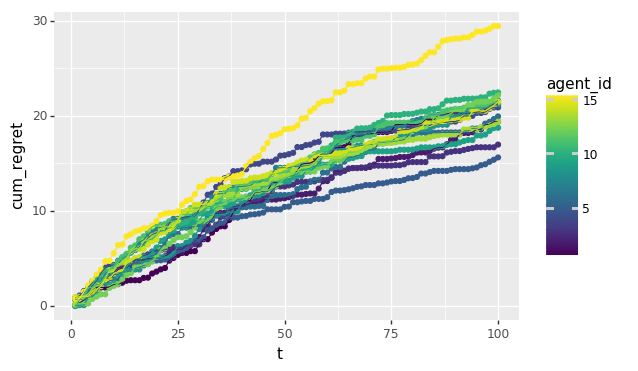

<ggplot: (8772695745021)>


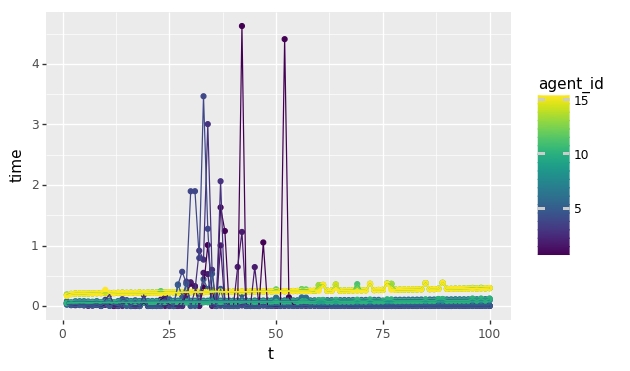

<ggplot: (8772739219821)>


In [18]:
agents2 = [make_laplace_agent() for i in range(5)] +\
         [make_langevin_agent() for i in range(5)] +\
         [make_mala_agent() for i in range(5)]
results2, df2 = simple_compare(agents2, num_articles, dim, var, n_steps, seed=420, verbosity=1)

In [5]:
#No bias for now.

def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    #DistributionWithConstant(
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    #https://stackoverflow.com/questions/39092067/pandas-dataframe-convert-column-type-to-string-or-categorical
    df['agent_id'] = df.agent_id.astype('category')
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

def hyperparameter_sweep(make_agent_from_hyperparameters, hyperparam_list, dim, var, n_steps, seed=0, verbosity=0):
    agents = [make_agent_from_hyperparameters(hyperparam) for hyperparam in hyperparam_list]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=verbosity)

In [6]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.01
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 200 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_pgts_agent = lambda: PGTS_Stream(num_articles, dim, verbosity=verbosity)


theta [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489]
Experiment: Step 0
 Laplace sample: array([-0.8223676 , -1.58655176, -0.40147282,  1.34217928,  0.40246909,
       -0.37276142, -0.67202344,  0.10581208, -1.54730539,  1.34480651,
        0.50318918,  1.1943506 , -0.56350567,  0.85482876,  0.68790473,
       -1.53306872,  0.1489607 ,  0.31511117, -0.57491766, -0.36017113])
 Sample: array([ 0.73355624, -0.32212666,  0.15117901,  1.29951935, -0.82072449,
        1.73931553,  0.47798013,  0.56914112,  0.65588357, -0.08199461,
        2.79903235,  1.68792153,  0.546371  ,  1.28713976, -0.68812556,
       -0.53721734,  0.21450674,  1.24928421,  0.08201658, -0.31065192])
 Steps taken: 500
 Sample: array([ 0.53303828,  0.68651775, -0.40752984, -0.05183764, -0.38062064,
       -0.07504966,  1.3997

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.56122688, -0.29685581, -2.05307027,  0.21690032, -0.87655201,
        0.55747167, -0.17937183,  0.29112155, -0.15459383, -2.09866758,
       -1.0894889 ,  1.50769643,  0.32241275, -0.93804867, -1.01615621,
        0.1508593 , -0.68701074, -0.70875126, -0.07898881, -1.04157379])
 Steps taken: 500
 Sample: array([ 2.17709582e-01,  1.11837395e+00, -2.70150029e-02, -2.84561779e-01,
       -6.61567146e-01,  1.44217659e-01,  9.67962434e-01,  2.09549669e-01,
       -8.10205967e-01,  3.14006549e-01,  1.36103976e+00,  5.86835823e-04,
        1.10460858e+00, -3.93531270e-01,  5.80757933e-01, -7.25855568e-01,
       -2.21236582e-01, -5.46025906e-01,  2.66073949e-02, -1.21143157e+00])
 Accept proportion: 0.748000
 Steps taken: 500
 Sample: array([-0.36468319, -1.2688807 ,  0.1594668 , -0.33458201,  0.17565327,
       -0.92437072, -1.51902257, -1.20314027, -0.61282031, -0.77610856,
        0.2915203 , -0.96775418,  0.29403022, -0.88291829, -1.7015699 ,
        0.81915093, -0.5111

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.78879181,  0.43319629, -0.22149671,  0.43538641, -0.10305436,
       -0.60902699, -0.4384593 , -0.18353264, -0.51380923, -0.13175025,
        0.39379748, -0.22446939,  0.74643535, -0.34963632,  0.64382994,
       -0.34191473, -0.22749988, -0.13359734, -0.07770507, -1.81753087])
 Accept proportion: 0.734000
 Steps taken: 500
 Sample: array([-1.04835852,  0.42201669, -0.02108757, -0.58344875, -1.60594017,
       -0.16896701, -1.90537721,  1.45381359,  0.58620991, -0.54180076,
       -1.65727327, -0.27369554, -0.94562094, -2.02360545,  1.70412384,
        0.42465325, -0.68076712, -0.67600234,  0.05113448,  2.01020492])
Experiment: Step 5
 Laplace sample: array([ 1.93484692,  1.89628645, -0.02381437,  4.0113692 ,  1.40538116,
        0.85484056,  1.51606755, -2.83736733, -0.07731892,  4.15072135,
       -1.30512534, -4.26695857, -0.36591222, -0.71194293,  2.22668096,
        1.26693029, -1.32161457, -0.60349464,  0.23602988,  1.83237035])
 Sample: array([ 0.91002777, -0.

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.14272458, -0.98380306,  1.01415842,  0.96359146, -0.58221407,
        0.26273122,  0.91867175,  0.16184291, -0.24664756, -0.9642381 ,
        0.94737022,  0.12115129,  0.86640988,  0.25899127, -1.93961542,
        1.28880081,  0.03968501, -0.34358712,  1.02982199, -1.15120417])
 Steps taken: 500
 Sample: array([ 0.66444236,  0.66927295,  0.14170049,  2.09221601, -0.21818769,
       -0.64730531,  0.49929219, -0.09868637,  0.4494973 , -0.22400303,
       -0.0817472 , -0.75422281, -0.64999867, -0.01710416,  0.37237718,
        0.49214672,  0.6095514 , -0.72002079,  0.03204418, -0.06594847])
 Accept proportion: 0.748000
 Steps taken: 500
 Sample: array([-1.12476605,  0.03996204,  0.2207538 , -0.15623256, -0.46070982,
       -0.56976407,  0.52829433,  0.24145303, -0.88175855, -0.02935128,
        2.01036141,  0.59918095, -0.3166672 , -0.48734324,  0.2587258 ,
        2.03566407,  2.01320778,  0.6014497 , -0.90328948, -1.17455686])
Experiment: Step 7
 Laplace sample: array

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.48064534, -1.52521517,  0.56369816, -0.27098734, -0.19349631,
        1.17733695,  0.54503866, -0.43282343,  0.40314078, -0.6525679 ,
       -0.43695421, -3.19154514, -0.24808195,  0.40695902, -1.20165279,
        0.38322178, -0.64571031, -0.18694894,  0.00747105, -0.35708456])
 Steps taken: 500
 Sample: array([ 0.65428327, -0.62391165, -1.29239527,  0.81739376,  0.9201205 ,
       -0.93038354,  0.15343902,  0.22466981,  0.50222449, -0.64323281,
       -0.6656326 , -1.41250989,  0.61146217,  0.46641813, -0.45278278,
        0.35403942,  0.91350769,  0.47770391,  0.64921196, -0.32795386])
 Accept proportion: 0.772000
 Steps taken: 500
 Sample: array([-0.37141209,  0.9058435 , -0.88685478, -0.53801329,  0.7669214 ,
       -0.04758331, -0.0307147 ,  1.97041548, -1.01363021, -0.86107353,
        0.33767626,  1.30796194,  0.93148104,  0.28635933, -0.30912057,
        0.38890987,  0.14753666, -0.02103312, -0.22387607,  0.03344102])
Experiment: Step 10
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71212869,  0.02839237,  0.23638235,  0.30201972,  0.08948858,
       -0.76577976, -0.08854914,  0.2255045 ,  1.05318632,  0.50139646,
       -0.3435076 , -0.24052978, -0.44443046,  0.97668741,  0.27155198,
        0.50226455, -0.44010765, -1.13127381,  0.0975713 ,  0.37880867])
 Accept proportion: 0.766000
 Steps taken: 500
 Sample: array([-0.87022255, -0.82352552,  2.53826187, -0.00651823,  0.25873575,
       -0.441426  , -0.15882662,  1.72972067, -1.70009207, -1.17650375,
        0.53870772, -0.75138744, -0.39951264,  0.13331284,  2.04295091,
        1.4855895 ,  0.33380188, -0.74013166, -1.0141355 ,  0.42113063])
Experiment: Step 11
 Laplace sample: array([ 1.44620121, -0.0840301 , -0.03735972,  4.47644626, -0.74448726,
        1.80117545, -3.46267955, -0.29118951, -1.91419382,  2.84374882,
       -4.74947407, -4.48517018,  2.6277783 ,  2.02291932,  6.7138189 ,
        2.76132326, -0.6750321 , -3.18228223, -1.06958788,  0.45689586])
 Sample: array([ 1.08790517, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.2761687 ,  0.21110009, -1.02221346, -0.61840939, -0.33009618,
        0.83254167,  0.83603108,  2.46915994,  1.46634107,  0.09572934,
       -0.46698008, -1.79689589, -0.25852419, -0.15695025, -0.03238787,
        0.30487354,  1.51323829,  0.53265706,  1.04319399, -0.79059567])
 Steps taken: 500
 Sample: array([ 0.9015295 ,  0.93407375,  0.27439685,  0.41970862,  0.38445957,
       -0.85244602,  0.16634347,  0.10478436,  0.20748736,  0.26438673,
        0.15324229, -0.72370324,  0.38659515,  0.53975109, -0.77210937,
        0.25610121, -0.57813253,  0.18380295,  0.80015389,  0.65867869])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 1.00455972, -0.18836333, -2.11544082,  0.41442645, -0.28141583,
       -1.17502528,  0.61122305,  1.8632374 ,  0.90059212,  2.03780773,
       -1.72415771, -1.18629005,  1.25013792,  2.51059414,  2.26819755,
        1.28374712, -0.05994167, -0.10294696, -1.83543696,  2.39055467])
Experiment: Step 14
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.9359582 ,  0.77414941,  0.82321598, -1.50082762,  0.26861788,
        0.83361822, -0.97505472,  0.74559453,  0.69581855,  0.5745325 ,
        0.30407682,  0.90153558, -0.78918205,  2.26897022,  0.34950539,
        1.79082623,  0.26306636,  0.23408106,  1.63477732, -1.94946507])
 Steps taken: 500
 Sample: array([ 0.49773025,  0.07947692,  0.59398099, -0.12199164,  0.80402536,
        0.29624867, -0.25058844, -0.10696349,  1.00922753,  0.03159827,
        0.27328272, -1.09948939, -0.50585177, -0.08072587, -0.30981083,
       -0.18916918,  0.3393281 , -0.76885854,  0.30653158, -0.26740101])
 Accept proportion: 0.802000
 Steps taken: 500
 Sample: array([-1.62809306, -0.76237653, -1.30066681,  0.22995672,  0.17584254,
       -1.2792796 , -0.46700155,  2.33963406,  0.4520879 , -0.52716524,
       -0.38938768, -0.44201556,  0.02184193,  0.10218856,  0.63621267,
        1.62744199,  0.8877239 , -0.53918976,  0.96991054,  0.43285771])
Experiment: Step 15
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.20796831, -0.14082532, -0.08208572,  0.28220796,  0.5818211 ,
       -0.5780204 ,  0.80177431, -0.45149904,  0.6749955 ,  0.36995373,
       -0.09362389, -0.11955473, -0.31416532, -0.19573549, -0.74847799,
        1.88517268,  0.89111454, -0.02771651,  0.41645779,  0.45012079])
 Accept proportion: 0.744000
 Steps taken: 500
 Sample: array([ 0.22965255, -0.8374539 ,  0.57582455, -0.9351384 ,  1.58277476,
       -0.12864473, -1.66330155, -0.20151362,  1.60376981,  0.88779444,
        1.99984769, -3.7114289 , -0.63034087,  1.82687025,  0.35317136,
        1.00623793,  0.45530767, -0.59768536, -0.93417422, -1.67505424])
Experiment: Step 16
 Laplace sample: array([ 5.66604262, -2.4269225 , -3.77760573,  5.28791044,  3.05734855,
       -2.72314254,  2.48762516,  1.40560657, -4.65495672,  1.91214137,
       -1.08422325, -2.04965771, -0.91375633,  2.11185631,  8.44472904,
        5.30335894, -4.60441036, -5.48873515, -0.61673068,  1.40789781])
 Sample: array([-1.39767687e+00

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.72913814,  0.84930153,  0.0963062 ,  0.61317817, -0.08538406,
        1.32114572,  0.4749552 ,  0.97593929,  0.21196121, -1.22213115,
        0.23746005,  1.19486806,  2.22648692,  1.65864298, -1.02766911,
       -1.65346375,  0.73330627, -0.60708929,  1.06078987,  0.44276528])
 Steps taken: 500
 Sample: array([ 0.34290715,  0.33888157, -0.03675515, -0.4734018 ,  0.02840383,
       -0.21236132, -0.43654853, -0.82068615,  0.30481612,  0.24865843,
       -0.24203496, -0.36932678, -0.61541216, -0.1841691 , -0.61932349,
        0.88427799, -0.88880629, -0.32685401,  0.20841133,  0.20503833])
 Accept proportion: 0.778000
 Steps taken: 500
 Sample: array([-0.90518072,  0.20200643, -0.99254281,  1.74804199, -1.34714387,
       -2.34322052, -0.33527036, -0.14621423,  1.74692524,  0.012534  ,
       -1.53274616, -0.57773166, -0.66357939, -0.88011111, -0.92541252,
        0.83607179, -0.79300726, -1.32909771, -0.99134047,  0.77890955])
Experiment: Step 19
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.32778911, -0.82765584, -0.22474517, -0.50860671,  0.80022805,
       -1.13698576, -0.81689578, -0.29156329,  0.61817822, -0.47719963,
        0.80817176,  0.72633819,  0.0741127 ,  0.14536487, -0.65968445,
        0.28947176, -0.09758987, -0.91616476,  0.32844708,  1.28639984])
 Accept proportion: 0.790000
 Steps taken: 500
 Sample: array([ 0.14517663, -0.99920237,  0.05733358,  0.61468626, -1.0993803 ,
       -0.53781435,  0.22898129,  2.18814307, -0.65604985,  0.20651215,
        2.88481903,  0.58578571,  0.95142018, -0.10817469,  0.93585092,
        0.62168109, -0.12605125, -1.25178418,  0.39944803,  1.19284653])
Experiment: Step 20
 Laplace sample: array([13.8632003 ,  6.20282663,  0.34496545, 10.42052151,  2.47382686,
       -5.42890059,  2.71680701,  4.99195817, -4.82876543, -3.70689816,
        2.77785956,  0.01388426, -5.79635202,  5.63505614, 13.01795867,
        7.51674102, -2.95450278, -2.4097067 ,  3.3663157 , -5.42167418])
 Sample: array([-0.17679945, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.36914518, -0.89911853, -0.45146895,  0.57202049, -0.20176462,
        0.46674719,  0.87510226,  0.2077232 ,  0.02368329,  1.33734037,
        0.52959601,  0.21559493, -0.96126012, -0.06332807, -0.46569203,
       -0.68940791,  0.50657705,  0.75671215,  1.55753663,  0.36935708])
 Steps taken: 500
 Sample: array([ 2.07422309,  0.06118229, -0.95003249,  0.29358904, -0.33637177,
       -1.56424523,  0.23446024,  0.22008765,  0.8982162 ,  0.45074685,
       -0.20818505, -0.02377279,  0.02921375, -0.38381797, -0.87683653,
        0.10038866, -1.22919542, -0.00673769, -0.07421554,  1.12870361])
 Accept proportion: 0.804000
 Steps taken: 500
 Sample: array([-0.93071641, -0.01894481,  0.01478245,  0.59632543,  0.59826856,
        1.2427744 , -0.61974513,  0.75063448,  1.06284911,  0.40820649,
       -0.87609584, -0.93557237,  0.4487685 ,  0.58827521, -0.53921176,
        0.99984125,  0.42445928,  0.09998549,  1.78011039,  2.02819198])
Experiment: Step 23
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39567162, -0.59888747, -1.15629591,  0.37196275,  0.55551696,
       -1.26926452,  0.96286248, -0.65297849,  0.43881372,  0.35008062,
        0.38282251, -1.14106867, -0.3392416 ,  0.53886075,  0.18727103,
        0.06459479, -0.26407901,  0.86781478,  0.75312511,  0.24286013])
 Accept proportion: 0.810000
 Steps taken: 500
 Sample: array([ 0.72527727,  0.99429639, -0.33354798,  0.37181411, -0.20298686,
       -0.48830286, -0.73355928,  1.37136901,  0.44239451, -1.20630776,
        0.51990458, -0.52858307,  1.42410307,  1.34330638, -0.56506399,
        0.3916027 ,  0.95286078, -0.39621664,  0.78041069, -0.38732382])
Experiment: Step 24
 Laplace sample: array([12.85893626,  6.34799611, -2.00752452, 12.14933731, -2.07904451,
       -3.0398364 ,  6.14853627,  1.12590884,  2.83264614, -2.86972544,
        3.48473898, -0.46018108, -4.20287493,  7.85292196, 12.28158257,
        9.93912015, -7.49587438, -0.84262073,  2.82349755, -8.87443948])
 Sample: array([ 0.24679541,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.03880389,  0.03512311, -0.66825063,  0.64028795,  0.45366426,
        1.32335205, -1.11118047, -0.7820493 ,  1.19623813,  1.36936289,
        0.23042176, -0.28023398,  0.55453479,  1.97409454, -0.53008194,
       -0.52940664,  0.54995135,  0.62608567, -0.75755248, -1.22006472])
 Steps taken: 500
 Sample: array([ 1.46876496, -0.41964067,  0.10204359, -0.02171959,  0.48778939,
       -0.79216106,  0.55454121, -0.30017686,  0.15494445,  0.07346204,
        0.16157888, -0.65451675, -0.10457101, -0.08522698, -0.74091847,
        0.63807598,  0.01189046,  0.55820053, -0.39728639, -0.37072289])
 Accept proportion: 0.788000
 Steps taken: 500
 Sample: array([ 1.09089704,  0.16549499, -2.62154678,  2.86644599,  0.87572311,
       -0.08404684, -0.40215476,  1.63288378,  0.59600457,  0.64828099,
       -1.05196548, -1.79349487, -0.21884364, -0.43092376, -0.88292936,
        0.11307782,  0.18947677,  1.32338348, -0.46082901, -1.0469352 ])
Experiment: Step 26
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.03867657, -1.67567681, -0.32821556, -0.46996954,  1.60746117,
        0.97440306, -0.2290663 , -0.04653913, -0.19010396, -0.00947571,
        0.52591114,  2.77067035, -0.82796573,  1.09776033,  0.87287311,
        0.22264598,  0.27763265, -0.02003449, -1.48436428, -0.57733852])
 Steps taken: 500
 Sample: array([ 1.6847862 , -1.16401355, -0.81089593,  0.34565953, -0.10348688,
       -0.8598425 , -0.97368204,  0.23474638, -0.03571894, -0.50668016,
       -0.53583615, -0.63599848,  0.72373774,  0.69213353,  0.74106079,
       -0.15109696, -0.5007775 , -0.25696128, -0.13456057,  0.4926404 ])
 Accept proportion: 0.784000
 Steps taken: 500
 Sample: array([ 0.65575865, -0.05213187, -1.32908733,  2.03973713,  2.55369141,
       -0.498657  ,  0.96723859,  2.56499216,  0.4768944 ,  0.38604015,
        0.52876589,  0.69888079, -0.29219588,  1.07742947,  1.44446075,
        0.71585014, -1.50449279, -0.27936979,  0.93325219, -0.45430165])
Experiment: Step 29
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.95978582,  0.50092683, -1.68916373,  0.46272849,  0.84966561,
       -0.70882248, -0.65437848, -0.78830662,  0.14318304, -0.53683607,
        0.57559116, -0.42467813, -0.20569089, -0.24285634, -0.67219694,
        0.57690275, -1.02714992,  1.14630053,  0.0667401 ,  1.45254612])
 Accept proportion: 0.782000
 Steps taken: 500
 Sample: array([ 1.63326208,  0.13797136, -1.34443455,  0.88672544,  0.61950438,
        0.8687447 ,  0.2814956 ,  1.07360564,  0.53201213,  1.25403391,
        0.40042739,  0.70182269, -0.82163349,  0.44868072,  0.6906896 ,
        0.54629158, -1.738177  ,  0.19477752,  0.89615218, -0.85741592])
Experiment: Step 30
 Laplace sample: array([ 15.29643927,   7.06371112,  -6.23506755,  12.57384493,
        -3.79895455,  -4.58469688,  10.0267983 ,   6.47377647,
         0.16596386,   2.92525898,   2.03347103,  -3.73982841,
        -5.5873663 ,   2.39713194,   7.34678473,   9.04985168,
        -6.18542098,   4.10157052,   9.91873493, -12.41049764])
 Sam

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.66266447, -0.76091105, -2.16382933, -1.61563171, -0.35160899,
        0.09799082, -1.06846043, -0.1194298 ,  0.28080052,  0.29806925,
       -0.68170764,  0.08073992, -0.48236989,  0.27634532,  0.53696782,
        0.47982073,  0.24214383, -2.28446035,  0.87809465,  0.19263868])
 Steps taken: 500
 Sample: array([ 1.19221325,  0.6256701 , -1.30291084,  0.11523003,  0.07986659,
       -1.91337988, -0.25644372,  0.45130947,  0.74582856, -0.73600546,
       -0.21608404, -0.44616082, -0.2325292 ,  0.0866527 , -0.40686928,
        0.26177519, -1.28565857,  1.20840738, -0.01801848,  0.35569833])
 Accept proportion: 0.794000
 Steps taken: 500
 Sample: array([ 2.00777277,  0.63781351, -1.057204  ,  0.31798619, -1.47467944,
        0.53879066, -0.06872533,  1.77000942, -0.39898105,  0.21184952,
       -0.9443519 , -0.84005528, -0.23975479,  0.21934299,  0.54936959,
        0.49639527,  0.98772514,  1.30038272,  1.3822104 , -1.41949718])
Experiment: Step 32
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.16631046, -0.3690526 , -0.04600635,  0.746179  ,  2.27866492,
        0.6210486 ,  0.55663766,  0.78943688,  0.60114753,  0.40772255,
       -1.2347654 ,  1.04284144, -0.89214072,  2.00711982,  0.35861212,
       -0.67574562, -1.40370624, -0.74707925, -0.19709858, -0.8154944 ])
 Steps taken: 500
 Sample: array([ 1.12089291, -0.77323382, -1.77879477, -0.29637261,  0.11080802,
       -0.34428276, -0.37934736,  0.30835169,  0.8260623 , -1.15851886,
       -0.11176216, -0.20055031, -0.32020123, -0.93950799, -0.67839668,
        0.83169804, -1.25099625,  1.03848566,  0.08475065,  0.24897985])
 Accept proportion: 0.808000
 Steps taken: 500
 Sample: array([ 2.09271739,  0.40818359, -3.00170452,  1.94590431,  1.05628295,
        1.17598234,  0.70918426,  2.46255349, -0.01152872,  1.47442774,
        0.64438367, -0.72370629, -0.82756611,  1.31055052,  0.37619619,
       -0.26034398, -0.2209665 , -0.92484479,  0.14800912, -0.6540335 ])
Experiment: Step 35
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.17150499, -0.46119677, -0.56144111, -0.54191774,  0.9248842 ,
       -0.28869718,  0.53073611, -0.95768811, -1.10713497,  0.2540371 ,
       -0.11996621,  1.32296124, -0.6112233 ,  0.77447161,  0.44456058,
       -0.11140602, -0.78266285, -0.69366187,  1.24568517, -1.31872676])
 Steps taken: 500
 Sample: array([ 1.66787775, -0.55991157, -1.05540838,  0.82083264,  0.30006269,
       -0.58103802,  0.07828258, -0.26706601,  0.1469985 , -0.78481469,
       -0.45472979, -0.94513369, -0.18254701,  0.59709496, -0.08043418,
        0.0547693 ,  0.05172824,  0.273788  , -0.38111574,  0.66537572])
 Accept proportion: 0.800000
 Steps taken: 500
 Sample: array([-0.04017789, -0.15735094, -0.8957831 ,  0.5647482 , -0.85270047,
       -0.52689373, -0.71706634,  1.45000436,  0.47997391,  1.80663163,
       -0.24343508, -0.98327911, -1.52299643,  0.90271938, -0.62386004,
        0.13120384, -0.10884972,  1.85016875,  0.69951439, -0.60239788])
Experiment: Step 36
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.78197272, -0.04737574, -0.55992632, -0.14533646, -0.02293681,
       -0.58830968,  1.10513061,  0.91561392,  0.48391258, -0.82403741,
        0.08781456, -0.60611831, -0.18028313, -0.17852998, -0.46468819,
        1.2414159 , -1.06595932,  0.12177489,  0.0192387 ,  1.1040788 ])
 Accept proportion: 0.802000
 Steps taken: 500
 Sample: array([ 0.92603318,  0.06874004, -0.81011566,  0.14852755, -1.0870688 ,
        0.93929024,  0.09839983,  0.54818529, -0.14685661,  0.65357266,
        0.66059592,  0.35501394, -0.26211186,  1.01886536, -0.38718677,
        1.32811185, -0.69809195,  1.39681569,  0.12959995, -1.24803305])
Experiment: Step 37
 Laplace sample: array([ 12.78198525,  14.69289321,  -8.48165102,  31.17826786,
         2.68700259, -16.8663316 ,   3.37321731,  10.53436467,
        -6.14251087,  -2.79219088,   7.82705219, -11.69835739,
        -8.0473374 ,  -0.40801599,   2.09014621,   2.25426402,
       -11.75770697,   7.68927166,  12.69322546,  -2.62657995])
 Sam

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.64503139, -0.13149967,  0.1071633 ,  0.28163173, -0.33091429,
       -0.99958485, -0.36813903,  0.39482674,  0.39671169, -0.9367248 ,
       -0.27720859, -0.24182326, -0.60001228,  1.33663908, -1.18842015,
       -1.69769867, -1.61629142,  0.61263579,  0.03242608, -0.47274693])
 Steps taken: 500
 Sample: array([ 0.69487775,  0.60445983, -1.79708116,  0.53030548, -0.17905732,
       -1.06198124, -0.57001188, -0.39179856,  0.5199299 , -1.17610747,
       -0.11346784, -1.42121259, -1.25666309,  0.04954438,  0.17110577,
       -0.2581476 , -0.6001154 ,  0.47672192,  0.34467445,  0.39779069])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([-0.94040516,  0.67725741, -1.36979699,  0.23502658,  0.29467691,
       -1.07713074, -0.63580488,  0.09076062,  0.66554076,  1.83293802,
        0.11665201, -0.78938361, -1.72180113,  1.59120875,  1.07019977,
        0.8476553 , -0.93131518, -0.14560788,  1.31618207, -0.84127817])
Experiment: Step 39
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.72867747,  0.03197766, -1.26391775,  0.60062458, -0.31962524,
       -0.33152582, -1.60930907, -0.20140078,  0.41880537, -1.46996777,
       -1.44670184, -0.57513869,  0.26788131,  1.1568586 ,  0.61040187,
       -0.45590626, -1.01141862,  0.81512643,  0.38914173,  0.06528138])
 Steps taken: 500
 Sample: array([ 6.26101374e-01, -1.43875741e+00, -7.83948127e-01,  1.66270031e-01,
        3.93178075e-01, -2.24059047e+00,  1.04914781e-01, -7.23749927e-01,
        2.66464019e-01, -1.39713109e+00, -3.73556989e-01,  3.75466514e-01,
       -1.19701714e-04,  6.29694995e-01,  9.53632981e-01, -1.74388136e-01,
       -1.68398703e-02, -2.39171288e-01, -3.18079895e-01,  6.68521679e-02])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 0.91788837,  0.50505299, -1.51716261,  0.68649131,  0.52259618,
       -1.64408715,  0.50596458,  0.12277758, -1.31658815,  1.03552298,
       -0.00754561,  0.39589009,  0.43750366,  1.42066262,  0.77103589,
        0.58921376,  0.4433

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.44616508, -0.02985669, -1.09384145,  0.18637759,  0.54585291,
       -0.20470502,  0.1833716 ,  0.01455013,  0.49250348, -1.26672935,
        0.53017875, -0.28716237,  0.46130984,  0.05033822,  0.8764449 ,
        0.29890696, -0.21047485,  0.35258703, -0.34769085, -0.3194553 ])
 Accept proportion: 0.802000
 Steps taken: 500
 Sample: array([-0.85378511,  1.16737313, -2.33056309, -0.45681227,  1.39347748,
       -0.65080777, -0.57615394,  2.40212408, -0.50246851,  1.0558581 ,
        0.93705947,  1.29769023,  0.8878835 ,  1.50956823, -0.15702125,
       -0.57889958, -0.34092712,  1.91537594,  0.57990579,  1.25451925])
Experiment: Step 43
 Laplace sample: array([ 13.79122913,  13.99735964,  -6.1836137 ,  31.04073229,
         1.32673545, -16.57778494,   2.80887008,   9.32985373,
        -4.32346746,  -3.91014073,  11.83970408, -13.82488823,
        -8.15085277,  -0.95348118,   3.21597786,   2.86248707,
       -11.64125551,   7.32830196,   9.89964382,  -3.90147779])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.23481319, -0.28748842, -0.09187246, -1.21299277,  1.59250179,
       -0.42732612,  0.276876  ,  1.00620294, -0.45809795, -0.58801054,
       -0.77211563,  0.52250626,  1.4887638 ,  2.67187781, -0.05060595,
        0.54523755, -0.93125538,  0.15398291,  1.72887794, -0.066804  ])
 Steps taken: 500
 Sample: array([ 2.21652182,  0.26891377, -1.33763721,  0.48091913,  1.13772571,
       -0.33246534, -0.45793633, -1.25572026,  1.09914433, -1.67422873,
       -0.40038965, -0.63072927,  0.1943679 ,  0.34746895,  0.89262497,
        0.58629251,  0.08322694,  0.62488702,  0.14055714,  0.46478373])
 Accept proportion: 0.806000
 Steps taken: 500
 Sample: array([ 0.93240084,  0.7971821 , -2.04924472,  1.90167621, -1.13488865,
       -0.07924656,  0.67665487,  0.48537434,  0.3028595 ,  1.3290365 ,
       -0.29747059,  0.30753947, -0.41334698,  1.2365756 , -1.60266201,
        1.78761744, -0.74167015,  0.96697744,  0.70396794, -0.07738932])
Experiment: Step 44
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.32559771,  0.83182901,  0.74557979,  1.02297744, -0.13585323,
       -0.17212334, -0.08254432,  0.0848596 , -1.02001511,  1.07930091,
       -2.37902155,  0.88587836, -0.20934773,  1.68883093,  0.57614467,
       -1.06844628, -0.29105901,  0.32611648,  1.4241915 ,  0.25957172])
 Steps taken: 500
 Sample: array([ 1.47257564, -0.68551873, -0.45664697,  0.94103269,  0.2110492 ,
       -1.81167615,  0.28364037, -0.65902874,  0.86267641, -0.5552669 ,
       -0.38047135,  0.2293468 ,  0.36704533, -0.53831762, -0.11773008,
       -0.51145426, -0.95317964, -0.18200015, -0.79361892,  0.07543761])
 Accept proportion: 0.816000
 Steps taken: 500
 Sample: array([ 0.87850931,  1.7596101 , -0.71667538,  0.85539755,  0.37921674,
       -1.3524749 ,  0.26492808,  1.77646722, -0.01160863, -0.81346115,
       -0.42892104,  0.19877325, -1.15796765,  1.09029306, -0.32160554,
        0.38319715, -0.86211573,  0.68209066,  0.9517786 , -0.141561  ])
Experiment: Step 45
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.42405688,  0.98857785, -0.62710769,  0.12634306, -0.17191649,
       -1.20180777, -1.13869005,  0.92758135, -0.26960575,  0.2498807 ,
       -1.00718164,  0.65244171, -0.76404364,  0.15355512, -0.72272254,
       -0.52924529, -0.64043849, -1.39658548,  2.93333821, -0.06737625])
 Steps taken: 500
 Sample: array([ 1.33139287e+00,  8.33713969e-01, -6.85499170e-01,  9.65013517e-01,
       -5.38968769e-01, -1.98462501e+00,  3.04268832e-02, -1.35027847e-01,
        9.51731602e-01, -7.94670503e-01,  1.39661701e-01, -1.47997938e-03,
        5.68229818e-01, -2.89766214e-03,  6.48319127e-01,  3.48205893e-01,
       -1.17900634e+00, -4.57298319e-01, -4.03764342e-01, -2.98135000e-02])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 0.74703408,  0.93318882, -1.58059584,  0.62752683,  1.73180624,
       -0.18191701,  0.07111686,  1.94753886,  0.12600622,  1.12999082,
        1.10300774,  0.31819347, -1.62001728,  2.22670621,  0.11602535,
        0.45262609, -0.9042

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.10363793, -0.65023741, -1.11763711,  0.63909958, -0.01753242,
       -0.60978982, -0.36165016,  0.78869938,  0.86183202, -0.57255003,
       -0.42067608,  0.28019726, -1.11655845, -0.14231759,  1.10839681,
        1.14395662, -1.29700658,  0.11807498,  0.61396136, -1.02159625])
 Accept proportion: 0.820000
 Steps taken: 500
 Sample: array([ 0.91341231,  0.75095122, -1.11629243,  1.04345596,  1.37040562,
       -0.60633871,  0.42328677,  0.15649308, -1.03213715,  0.64201743,
        1.44690628,  0.45984335,  0.24740964,  1.38390629, -0.44989687,
        0.0421142 , -0.38400985,  0.9595616 ,  1.41739194, -0.56764511])
Experiment: Step 47
 Laplace sample: array([ 116.83386305,   13.94360764,  -46.26499741,   96.58594389,
         -7.53873539, -107.11601013,  -40.32904098,   64.39241505,
         54.76188374,   20.4431975 ,   60.94765431,  -19.98924871,
        -38.31140345,   93.34337976,   42.18486879,  -69.82962231,
         13.4277167 ,   44.22988161,   27.00891861, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.27587702, -1.74185485, -1.00179401,  0.30637559, -0.58711904,
       -0.28638964, -0.2256188 ,  0.04773487, -0.98660453,  0.01582476,
       -0.06285232,  0.4675472 , -0.4872945 ,  1.77549364,  1.19985061,
       -1.32507599, -1.5058799 , -0.53136573,  2.22864352,  1.09064673])
 Steps taken: 500
 Sample: array([ 0.67551274, -0.87174283, -1.22908998,  1.53858996, -0.5908889 ,
       -0.55958195,  0.26914205,  0.09895762,  0.36193338, -0.48970718,
        0.04652627, -0.12831688, -0.55849085, -1.17230192,  0.17664956,
        0.54457408, -1.16103017,  0.15231032, -0.2047162 ,  0.10695769])
 Accept proportion: 0.794000
 Steps taken: 500
 Sample: array([-0.09398825,  0.76618478, -0.85334837, -0.00785031,  0.92292515,
        0.49954637,  1.15647101,  1.17124622, -0.05980292, -0.04117347,
       -0.20244469,  0.79800594,  0.28785692,  1.61346074, -0.30954917,
        1.56868407, -0.06420647,  1.3771465 , -0.27842187,  0.81194673])
Experiment: Step 49
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.60865717, -0.74181198, -0.95481195,  0.74019157,  0.54851227,
       -1.41732702,  0.20084429, -0.69686713,  1.54541937, -1.02269312,
        0.78759278,  0.53892283, -0.04565401,  0.48949265,  0.03173244,
       -0.28661716, -0.98706488,  0.07108163, -1.03087846,  0.47615017])
 Accept proportion: 0.828000
 Steps taken: 500
 Sample: array([ 1.24859678, -0.21259924, -1.56857634,  0.70691655,  0.80155631,
       -0.12333879, -0.06241102,  1.1829808 , -0.61541116,  1.4639313 ,
        0.37247868,  0.18683513,  1.47489604,  0.97029613, -0.71353696,
        1.07721804, -1.29754591,  0.67294616,  0.70729465,  0.13939544])
Experiment: Step 50
 Laplace sample: array([ 3.29619868,  2.68543434, -3.54463426,  0.64334992,  0.92721653,
       -0.1975329 ,  1.52968241,  4.99198991,  0.68839977, -0.13770598,
        2.05102544, -4.94890989, -0.42289425,  4.19070481,  2.32970631,
       -0.79316091, -2.54980852,  1.86870591,  3.75010718,  0.19654644])
 Sample: array([-0.06463642, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.60731212, -0.66057091, -0.71578175,  1.26107361, -1.10168044,
       -1.62196915, -0.24265961,  0.46598985,  1.02166874, -0.70680561,
        0.39146113,  0.52293795, -0.17733865, -0.43127672,  0.00199492,
        0.19701278, -1.28603219,  0.23064022, -0.21116837,  0.54968542])
 Accept proportion: 0.812000
 Steps taken: 500
 Sample: array([-0.186868  ,  0.68286014, -0.64430014,  0.61663743,  0.18067943,
        1.37731168,  0.83655855,  1.24613496, -0.47483621,  0.88131071,
        1.12669977,  1.45031989, -1.26899603,  1.18481409, -0.95821498,
        1.85406861, -2.46123674,  1.74150257,  0.74663468, -0.07436258])
Experiment: Step 52
 Laplace sample: array([ 4.18667299,  3.46483858, -3.01142654,  2.20129251, -1.0934565 ,
        3.10647412,  0.79626145,  4.21876069, -0.58687573, -3.1067383 ,
       -0.99706854, -4.13386359,  0.66198722,  1.45111518,  3.5078341 ,
        1.20508761, -4.36228242, -1.1249916 ,  1.10932419,  1.42021298])
 Sample: array([ 0.56668996,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.8687819 , -0.31901393, -1.21214976,  1.01522556,  0.07178888,
       -0.87864506,  0.02392692,  0.14275774,  0.77686278, -1.1999865 ,
        0.16128823,  1.17206479,  0.50877036, -0.02325163,  0.95133666,
        0.85490947, -0.49595974,  0.17170193, -0.19683947, -0.09785435])
 Accept proportion: 0.812000
 Steps taken: 500
 Sample: array([-0.51631618,  0.80199099, -0.82364471,  0.11914576,  1.05305477,
        0.19867091, -0.28190732,  1.21235111,  1.17045599,  0.8494782 ,
        1.00042253, -0.08485324, -0.47230235,  0.74788511, -0.30118974,
        0.19991474, -1.43324723,  0.29999246, -1.09181378, -0.79021433])
Experiment: Step 53
 Laplace sample: array([ 3.25478867,  2.37866999, -2.836726  ,  3.30092816, -0.44194045,
        2.56871361,  0.6087905 ,  3.00663533, -0.73944025, -1.20064547,
        0.86663133, -2.76987211,  0.05320702, -0.22194461,  0.63909645,
        1.08364635, -5.11923195, -0.13229105,  1.59897895,  1.00289415])
 Sample: array([ 0.86967053, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.11503296,  0.49300909, -0.99244892,  0.85387042,  0.89295681,
       -1.04584259,  0.49526615, -0.20939444, -0.00353939, -0.34310599,
        0.27527089,  0.70682305,  0.29718392, -0.09548426,  0.14694859,
       -0.76307969, -0.063096  , -0.34782025,  0.06431733,  0.16263589])
 Accept proportion: 0.810000
 Steps taken: 500
 Sample: array([ 0.57926917,  1.85442481, -0.70638849,  0.80720751,  0.73184787,
       -0.21462874, -1.15383303,  1.32256575, -0.56629714, -0.35424869,
        0.62738377, -0.31000674, -0.94992378,  0.6439806 ,  0.21929477,
        0.52843042, -2.05268099,  1.34734835,  0.44403344,  1.10583698])
Experiment: Step 54
 Laplace sample: array([ 3.17290913,  2.61418222, -2.41580876,  1.81691135,  0.38164276,
        1.28691431,  1.15036825,  4.70293443, -0.41423946, -0.96577318,
        0.01322658, -2.66229037, -0.72779536,  2.2619631 ,  0.92358233,
        0.8050609 , -4.04537243, -0.10184386,  1.76562959,  0.34029014])
 Sample: array([-0.82535122,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.00020614,  0.09106422, -1.100019  ,  0.86389175,  0.3069039 ,
       -1.48426498, -0.0238469 ,  0.36349652,  0.6408489 , -0.0257867 ,
       -0.05360668,  0.38284765,  0.55626075,  0.55160799,  0.926525  ,
        0.52453253, -1.06860987, -0.24311776,  0.41131434,  0.22683842])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 0.15219096, -0.18985338, -0.58860598,  1.29308378,  1.12735536,
        0.22147177, -0.25750517, -0.79514553,  0.1246588 ,  0.65453771,
       -0.09859156, -0.51343512, -0.44409629,  0.29451134, -1.0387343 ,
       -0.21083809, -1.71311912,  0.72373897,  0.06538359,  0.63516987])
Experiment: Step 55
 Laplace sample: array([ 4.06770768,  5.53883197, -4.02255695,  0.6613575 , -0.51753491,
        1.22793492,  0.82703163,  3.13663891, -0.17311836, -2.36219377,
        1.39377486, -3.47945681,  1.56985566,  2.48549201, -0.53565251,
        0.36747483, -2.29473186, -0.03357777,  2.26363453,  0.52322121])
 Sample: array([ 0.77111616,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.79051919,  0.06093345, -1.81750233,  0.34042725,  0.40535889,
       -0.40681308,  0.32144642,  0.48434284,  0.89347884, -0.89108152,
        0.18753203,  0.01932036,  0.02301857, -0.65412469,  0.46156331,
        0.82800038, -1.1706694 ,  0.32044577,  0.10230307, -0.51930917])
 Accept proportion: 0.820000
 Steps taken: 500
 Sample: array([-0.89620468,  1.18713944, -1.12077145,  0.61334086,  0.65160129,
        1.19369859,  1.4248278 , -0.60640776, -0.38778909, -0.17601143,
       -0.31211211, -0.05529107,  0.0175604 , -0.34793914, -0.70035994,
        1.17736935, -0.06049785, -0.14162758,  0.9724466 , -0.83668246])
Experiment: Step 56
 Laplace sample: array([ 1.91623896,  3.59831608, -3.39097543,  0.41208188,  1.99815337,
       -0.76788509, -0.21389741,  3.08378963, -1.58550002, -1.44657063,
        1.65518177, -5.97109092,  2.05628722,  1.70029914,  0.13869558,
        0.82220931, -3.36052743,  0.16745967,  1.73948462, -1.2061315 ])
 Sample: array([ 1.17641211,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.00645089e+00, -2.43491334e-01, -1.27220183e+00,  8.59346660e-01,
       -9.81585018e-02, -1.23773342e+00,  3.55882618e-01,  9.94689369e-02,
        8.37957464e-01, -2.57076467e-01,  3.13763047e-01, -1.78106647e-01,
       -1.20975954e-04, -2.38917370e-01,  3.97503588e-01,  8.41265405e-01,
       -8.41677786e-01, -2.67251687e-01, -6.21905474e-02, -1.96219952e-02])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([-3.79720265e-02,  6.56239924e-01, -5.04520627e-01,  9.71043412e-01,
       -1.38108933e-03,  6.32064623e-01, -5.63264308e-01,  1.10130347e+00,
       -1.81646482e+00, -1.02781394e+00, -1.86757251e-01,  9.82597293e-02,
        6.22610521e-01, -6.79881850e-02,  4.74442824e-01,  1.73644416e+00,
       -1.03473510e-01,  6.16953341e-01,  2.24405378e-01, -1.17885638e+00])
Experiment: Step 57
 Laplace sample: array([ 1.87418744,  2.62022129, -3.16486219, -1.39608471,  1.05619657,
       -1.33105484, -0.52094833,  2.26153612, -1.49879955, -1.49767569,
  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.97568179, -1.13880967, -1.07487485,  0.45547139,  0.07001962,
       -1.43088054, -0.86208637,  0.48401644,  0.12305505, -0.17205066,
       -0.16302835,  0.59476947, -0.68062713, -0.48033371,  0.84260807,
        0.15461833, -1.97435756,  0.55932025, -0.74671667, -0.14810455])
 Accept proportion: 0.830000
 Steps taken: 500
 Sample: array([ 0.22773743,  0.65142934, -1.47898303,  0.19770694,  0.74098563,
        0.93534461,  0.01155319,  0.49850249,  0.2809751 , -0.30955899,
        1.348082  , -1.24984015, -0.57328904, -0.30297034, -0.36316341,
        0.64982256, -2.41401826,  0.96832456, -0.5191821 , -1.0287664 ])
Experiment: Step 58
 Laplace sample: array([ 3.36189335,  3.92941112, -2.589839  ,  0.71637248, -1.7036519 ,
        2.46514876, -0.57903236,  0.2614719 , -1.94311415, -0.06938028,
        1.62732648, -3.06534076, -0.52084999, -1.80325243,  0.34580299,
        2.02195753, -3.51271032,  1.64624372,  1.97024558, -0.52810449])
 Sample: array([ 0.16754767,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.82730831, -0.26644172, -1.18483083, -0.29290922,  0.6614885 ,
       -0.34991495, -0.15239232,  0.28782381,  0.16229297, -0.58157319,
       -0.05896249, -1.11298359, -0.10470992,  0.95489514, -0.73468837,
        2.02537167, -1.10372865,  1.70156021, -0.01377232,  0.32550691])
Experiment: Step 59
 Laplace sample: array([ 3.25094543,  4.05644733, -2.53850889, -0.25533651, -1.00242427,
       -0.03288779, -2.08674024,  0.77132965, -0.22220462,  0.11900522,
       -1.34285697, -4.15224336, -2.02393833, -1.5973482 , -0.54249001,
        2.07056907, -0.7771891 , -0.09798624,  0.56114553, -0.16894804])
 Sample: array([ 0.44664267,  1.3908358 ,  0.08374463,  2.03574836, -1.48604891,
       -1.20289823,  0.01623032,  0.32262921, -1.10933622,  0.75635489,
       -0.55617843, -0.63744018, -0.53392497,  2.14078051,  1.55711222,
       -0.42836445,  0.30221821,  1.31900137,  0.47836595,  0.16079312])
 Steps taken: 500
 Sample: array([ 1.62812957, -0.57811237, -1.10587834, -0.08

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "



 Laplace sample: array([ 1.96217791,  4.81511325, -1.20390248,  1.26998977, -0.56716345,
        0.79471065,  0.02900708,  2.64098981, -0.53957397, -2.39187271,
        0.08395161, -3.02878623, -0.56275639,  1.92809097,  1.01423738,
        1.82264986, -1.96322158, -1.29335088, -0.04354435,  1.36973621])
 Sample: array([-0.24793427,  0.67307115, -1.32946238,  0.49156   , -0.1406274 ,
       -0.12035608,  0.47861661,  0.00784297,  0.09716677, -0.1625747 ,
       -0.20603496,  0.64822797, -0.55311191,  2.58144676, -0.49325347,
        0.58386494, -0.8840804 ,  1.58923533,  1.44058854, -0.79107299])
 Steps taken: 500
 Sample: array([ 2.07344137, -0.44433685, -1.05871901, -0.33129185, -0.22066256,
       -1.26746843,  0.27288598,  0.54155305,  0.23879002,  0.14053858,
       -0.71435186,  0.10622224,  0.8877002 , -0.60379423,  0.24070823,
        0.59929676, -0.47287231,  0.05838641, -0.86847183,  0.09730332])
 Accept proportion: 0.820000
 Steps taken: 500


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.26259004, -0.060779  , -1.75408025,  0.6370927 , -0.5118963 ,
       -0.72739278,  0.57719424,  1.425661  , -0.723884  ,  0.46953958,
        0.39308653,  0.68951254, -1.02606548,  0.12861232, -0.88046848,
       -0.26569448, -1.90254446, -0.02971054,  1.19036742, -1.38067479])
Experiment: Step 62
 Laplace sample: array([ 2.82564093,  3.50032247, -2.84707894,  0.3420244 , -0.36354702,
        0.70796141, -0.35690868,  1.21600262, -1.01285526, -3.22695189,
       -1.75571702, -3.91792594, -1.34535808, -0.49988017, -0.06222453,
        2.07846952, -0.97209424,  0.51447904,  1.22329423,  0.40316692])
 Sample: array([-0.69486356,  0.75996556, -1.71013639,  0.98691379,  0.32505372,
       -1.35668088,  0.21462246,  1.29909731,  0.51503964,  1.1458698 ,
       -0.53559748,  0.64699457, -1.37507908,  1.2029677 ,  0.9873413 ,
       -0.70766403, -0.75533604, -0.23883941,  1.36660694,  0.15611219])
 Steps taken: 500
 Sample: array([ 1.70543907e+00,  5.42284342e-04, -1.3893635

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.07049824, -0.26877664, -1.33358039,  1.00129094,  1.0876011 ,
        0.34389745, -1.05435903,  0.38877049, -1.07184745, -1.02809263,
        0.24087378, -1.7048869 , -1.05518229, -0.78013351, -1.03265743,
        1.35364543, -0.89846762,  2.35971294,  0.48817244, -2.36740725])
Experiment: Step 64
 Laplace sample: array([ 1.39548799,  4.04163386, -2.04932508,  1.18531529,  0.01951369,
        0.69439275, -1.16048602,  3.20450569, -0.19637921, -0.15579333,
        1.00716201, -2.45442788, -1.91161092, -0.89238957, -1.00799252,
        0.67987621, -2.26567106,  2.17566118,  1.44125504, -0.04340024])
 Sample: array([ 0.28896091,  0.59235992, -0.08010959, -0.37750089,  1.12742065,
       -1.0176648 ,  0.30315788, -0.08457235, -0.3104385 ,  0.05856366,
        0.53681675,  1.447034  , -1.5097556 ,  1.56849149, -0.07252838,
       -0.53096165, -1.20377259,  0.35386217,  1.20644594, -0.32057128])
 Steps taken: 500
 Sample: array([ 2.09985064,  0.08485398, -0.98613185,  0.13

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.91323054e+00,  2.39847979e-01, -1.79077129e+00,  6.40415364e-01,
        9.99192580e-02, -5.55436851e-01,  2.43776163e-01,  1.11231035e-01,
        7.04469515e-01, -4.46784518e-01, -3.21451462e-01, -2.14247918e-01,
       -5.23301986e-01, -5.25494117e-01,  1.28302309e-03, -4.16572305e-02,
       -9.59185405e-01,  1.43865420e-01,  1.82225587e-01, -2.20533078e-01])
 Accept proportion: 0.824000
 Steps taken: 500
 Sample: array([-0.03880432,  0.00738359, -2.0950932 ,  0.36620509,  0.17433975,
        0.19286743,  0.86588869,  1.03871046, -0.99562313,  0.33492801,
        0.86131268, -0.78483034, -1.36911701, -0.34001852, -0.59750035,
        0.64542621, -0.679141  ,  1.73828784, -0.41160667, -0.36430497])
Experiment: Step 66
 Laplace sample: array([ 3.51671616,  3.06971864, -0.97538725,  2.61505145,  0.76353593,
        1.74993072,  0.10583034,  2.51432714, -1.67079953, -1.66937674,
        0.51576157, -3.22254475,  0.87566557,  0.08871353, -0.17970304,
        1.0481979

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.84319234,  0.33553702, -1.05512969,  0.81061427,  0.487939  ,
       -1.37560378,  0.52141258,  0.00907622, -0.27690798, -1.08162485,
       -0.43461778,  0.00925643, -0.74277514,  0.48667719, -0.35935347,
        1.1466783 , -1.23599016,  0.26918815,  0.1417482 ,  0.25268622])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 0.13078623, -0.14684169, -1.6006642 , -0.02650477,  0.62870599,
        0.26998416,  1.10719185, -0.06472309,  0.91851723, -0.11983949,
        0.57159223,  0.39866108, -0.93006212, -0.27660469, -0.91063321,
        1.59575755, -1.67535346, -0.06126572,  0.95116876, -0.83451766])
Experiment: Step 67
 Laplace sample: array([ 3.5715216 ,  4.27436419, -1.46270922,  1.03474507,  0.97867438,
        2.44863876,  0.11051142,  1.49507609, -2.24064753, -3.31539057,
       -0.56541906, -3.32628525, -0.54467723,  0.70027042, -0.92236573,
        0.6145694 , -2.80007078,  0.17639343,  2.70641887,  0.00598653])
 Sample: array([ 0.66535741, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.79478032, -0.65543841, -1.25135568,  0.41079714, -0.33527059,
       -1.30638056, -0.75052837,  0.80738296, -0.08475862, -0.47490638,
       -0.169737  ,  0.1957386 , -0.0979203 , -0.49359562,  0.8832318 ,
        0.85379292, -1.33738643,  0.29597034,  0.38986397,  0.58672228])
 Accept proportion: 0.844000
 Steps taken: 500
 Sample: array([ 0.91512497,  0.89585312,  0.0075016 ,  0.32021304, -0.28333282,
       -0.20572561,  0.69749732,  0.9987463 ,  0.85031393, -0.25851804,
        1.16047538, -0.14956177, -0.36158991,  0.18173392, -1.68889512,
        1.50595709, -1.02871187,  0.03577084, -0.57057593, -0.90214948])
Experiment: Step 68
 Laplace sample: array([ 3.44999449,  1.9940573 , -0.50257944,  0.90685605,  0.43633259,
        3.44634572, -0.31907015,  2.30816323, -2.34714674, -1.60995552,
        2.55516563, -2.63598109, -0.93382716, -1.13817554,  1.08437072,
        2.24575742, -2.71259897,  0.414864  ,  1.86186205, -0.40609401])
 Sample: array([ 0.40016391, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.88818304, -0.17337609, -1.04746422,  0.90795933, -0.455603  ,
       -1.22649593, -0.43983576,  0.01347936,  0.37270419, -0.30271157,
       -0.12984752,  0.33751244, -0.09428136, -0.5857601 ,  0.55444534,
        1.52810398, -0.66339769, -0.28042208,  0.37712779, -0.73388046])
 Accept proportion: 0.802000
 Steps taken: 500
 Sample: array([ 2.19667511,  0.45985949, -1.19354151,  0.35444704,  0.36415109,
       -0.69868073,  1.67219077,  0.68996866, -0.83841172,  0.51241007,
        1.13376978, -1.34938943, -0.82606866,  1.0013448 , -1.20528961,
        1.0863187 , -0.16196859,  1.43916989, -0.08263391, -0.75360768])
Experiment: Step 69
 Laplace sample: array([ 2.4616793 ,  0.55173287, -0.88161603,  1.35919269,  0.77159339,
        1.1367056 , -0.17198663,  2.53983376, -1.7873375 , -1.48162024,
       -0.87853713, -2.3062345 , -0.28237324, -0.04170151,  0.38900006,
        1.26028863, -1.32613854,  0.05743198,  1.25005434, -0.38502629])
 Sample: array([ 1.97115165,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.55047528, -0.50084236, -0.97769492,  0.42677914,  0.19572558,
       -0.46703357,  0.64079359,  0.37100194,  0.4187414 , -0.38538555,
       -0.84570915,  0.18539087, -0.13755111,  0.30029939,  0.61132259,
        1.71722292, -0.7416688 ,  0.59008254,  0.39866766,  0.03961328])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 1.16938438,  0.79974472,  0.06800933,  0.59705499,  0.35305585,
        0.44394906,  0.36081572,  0.76492385, -0.33154149, -0.59325733,
        0.87704267, -0.30121896, -0.0044445 ,  0.15960987, -0.26026359,
        1.53343819, -0.36579166,  1.54204697,  0.27142804, -1.80421671])
Experiment: Step 70
 Laplace sample: array([ 4.61971961,  1.25586446, -1.45906469,  0.18765033,  1.00585761,
        2.51700251,  0.02825452,  1.63007905, -1.06805283, -1.38594105,
        1.70704518, -4.12186809, -0.04558333,  0.80992684, -1.54822557,
        1.91656203, -2.89626688, -0.21634751,  2.05958779,  0.43187533])
 Sample: array([ 0.63729341,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.04567245, -0.47136055, -1.23648099,  1.06260697,  0.2794944 ,
       -1.59123235,  0.61204653,  0.60210068,  0.46899537, -0.67601456,
        0.056104  , -0.16614874,  0.396829  ,  0.82580095,  0.86996746,
        0.6193173 , -0.34898174,  0.13717147,  0.13095665,  0.44571229])
 Accept proportion: 0.824000
 Steps taken: 500
 Sample: array([ 0.39995265,  0.53148439, -2.26893088, -0.17713406, -0.25612874,
        0.01433101,  0.09002873,  1.29056979,  1.23977974, -1.38990635,
        0.25868788, -0.04257282,  0.05742524,  1.65750788, -0.95505653,
        2.64356188, -0.38355355,  1.29360723,  1.98642754, -1.15988642])
Experiment: Step 71
 Laplace sample: array([ 3.12102326,  3.16353548,  0.36624328,  0.8409547 , -0.45213252,
        1.64439478,  1.90177844,  1.62808893, -0.83018315, -1.19217195,
       -0.76163081, -3.16111572, -0.22217017, -0.11959722,  0.71596249,
        0.9686099 , -2.61466669, -0.04845503,  2.12731653, -1.35594025])
 Sample: array([ 0.78916905,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.95704066,  0.21081839, -1.18973887,  0.19086093,  0.80410389,
       -1.16003881,  0.03513262,  0.33365572,  0.97996945, -1.16052971,
       -0.90362638,  0.11534646, -1.22210165,  0.3906981 ,  1.20213814,
        1.17333171, -0.32710065,  0.71858579, -0.12194394, -0.02502932])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([ 0.63151221,  0.63858395, -0.53076724,  0.35579912,  0.21725599,
       -0.27346869, -0.09355717,  0.94558436,  0.05149661,  0.58766892,
       -0.29486344,  0.6483057 ,  0.4311851 ,  0.12580535,  0.39033203,
        1.66307624, -0.92409256, -0.30138551,  0.73478524, -1.22905833])
Experiment: Step 72
 Laplace sample: array([ 2.06172839,  2.45150109,  0.2673723 ,  0.47210551,  0.29266876,
        0.74581478, -1.79274203,  2.44298746, -0.78746883, -0.8237115 ,
        1.12489115, -2.85718721,  0.01849018,  1.6607413 , -0.11202145,
        0.2143278 , -1.54741626,  1.53424869,  2.54094538,  0.34301441])
 Sample: array([ 0.99854023,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.35270137, -0.21231852, -1.42388142,  0.50582002,  0.47023659,
       -0.95720433,  0.13705263,  0.4523623 ,  0.05188633, -0.77716357,
       -0.2104464 ,  0.23274089, -0.29607345,  0.32831864,  0.56929968,
        1.12750788, -0.86131576, -0.08244333, -0.23561502, -0.0750983 ])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 0.15684674,  0.16594268, -2.038601  ,  0.75416984,  0.25752382,
        0.12905709,  0.74373421, -0.02783861,  0.02573808,  0.07473868,
        0.18863312,  0.82870092, -0.77140507, -0.00253222, -0.22474125,
        1.26179875,  0.69218916,  1.84439532,  2.26871668, -2.04610616])
Experiment: Step 73
 Laplace sample: array([ 4.48615831,  1.84212535, -0.45338569,  1.6206746 ,  0.92677535,
        1.70853053,  0.4479797 ,  2.59428465, -0.35770385, -0.8754894 ,
        0.1957853 , -3.26664934, -0.24578659,  0.8073783 ,  0.30113826,
        1.29262515, -2.2422468 , -0.16925145,  1.54904432, -0.10634296])
 Sample: array([ 2.6546357 ,  2

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.01944604, -0.60812445, -2.16105495,  1.24750372,  0.12035536,
       -0.76878735,  0.37587703,  0.22928761,  0.67296997, -1.26029245,
       -0.04518789, -0.31863955, -0.24798003,  0.96960438, -0.47524338,
        0.46500473, -0.5671317 ,  0.5432027 ,  0.36545782,  0.84639716])
 Accept proportion: 0.828000
 Steps taken: 500
 Sample: array([ 0.98619608,  0.01834226, -1.19053466,  0.59110494,  0.55844735,
        1.24025339,  0.42671821,  0.81380162, -0.06574689,  1.5417113 ,
        0.72884845, -0.79474109,  0.28205059,  1.03535098, -0.6352528 ,
        0.9216289 , -0.84124606, -0.65163932,  1.09674423, -2.36555061])
Experiment: Step 74
 Laplace sample: array([ 3.80900778,  0.98518047, -1.16927886,  0.39315241,  0.43754013,
       -0.34742374, -0.85761056,  2.38167966, -1.73651542, -0.72799058,
        0.77108377, -3.28230104,  0.47536677,  0.48321035,  1.27760605,
        0.09647093, -1.27869021,  0.98915007,  1.63259182,  1.30498316])
 Sample: array([ 1.09598825,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.33263519, -0.86508395, -1.36463173,  1.11286933,  0.11171547,
       -0.71685864,  0.57700456,  0.17059559,  0.40399355, -0.23040276,
        0.09300713, -0.14766237,  0.15236994, -0.5168834 ,  0.72001918,
        0.2544524 , -0.7765241 ,  0.04287171,  0.11647313, -0.13995664])
 Accept proportion: 0.808000
 Steps taken: 500
 Sample: array([ 0.07807646,  0.77734845, -1.68470195,  1.1017918 ,  1.61843613,
        1.11006596, -0.1206375 ,  2.24101912, -0.56236372, -0.76272546,
        0.47380169, -0.58152433, -1.66899308, -0.34421245, -0.40334068,
        0.5518011 , -0.58834433,  0.90979014,  1.0871974 , -0.93705167])
Experiment: Step 75
 Laplace sample: array([ 3.65343619,  2.3811525 , -3.06621145, -0.43787145, -0.14577148,
        2.00495912, -0.04493302,  2.30470945, -0.66811581, -0.80252316,
       -0.83458356, -2.86177907,  0.467352  ,  0.01935847,  0.42288447,
        1.27670166, -1.45222187,  0.1900194 ,  1.2452722 ,  0.03571569])
 Sample: array([ 1.45468046,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.74221787, -0.01914702, -1.66548779,  0.69580194,  0.89046401,
       -0.82214426, -0.04460694,  0.05857554,  0.89494833, -1.83766264,
       -0.1440185 , -0.10465146,  0.06159634,  0.41563702,  0.28060622,
        1.32043333, -0.86210163,  0.22160482,  0.23146769, -0.37010387])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 0.06232468, -0.15308303, -1.75175772,  1.52481832,  0.91438083,
       -0.25556521,  0.63912125,  0.75027143, -0.79890394,  0.29059541,
        0.9525366 ,  0.62199166, -1.78477802,  0.46940336, -0.96593471,
        1.87183394,  0.10297401,  2.30971504,  0.90585774, -0.95973727])
Experiment: Step 76
 Laplace sample: array([ 3.09737525,  1.84973098, -1.67497005, -0.20737999, -0.06229947,
        0.44049467,  0.54131741,  3.4756885 , -0.76666397, -1.11904731,
        1.13708624, -3.86844233,  0.29308358, -0.0972182 ,  1.18012382,
        0.64456205, -2.95489674,  1.68004199,  0.93354725,  0.42272134])
 Sample: array([ 0.74462738,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.27579548,  0.3430477 , -0.99031303,  0.1823789 , -0.51317827,
       -0.35390598,  0.08750509,  0.1151325 , -0.20527477, -1.13668263,
       -0.0134672 , -0.35657401, -0.36418785, -0.22991823,  0.74190524,
        1.23217901,  0.05753735, -0.06960179,  0.69844068,  0.19627688])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 0.06325273,  0.69764315, -0.2910029 ,  0.64901837, -1.1308986 ,
       -0.0722255 ,  0.21284687, -0.02847832,  0.02697649,  0.02097121,
        1.20375793, -0.34030375,  0.06740647,  1.20308645, -0.82948262,
        0.95514858, -0.92473586,  0.23788678,  0.81280843, -1.86857875])
Experiment: Step 77
 Laplace sample: array([ 3.65260776,  2.02699558, -2.66927945,  0.4877112 ,  1.28348881,
        1.48463919,  0.30491756,  4.23787461, -0.7742444 , -1.57192424,
        1.42640565, -4.25213495,  0.58468876, -0.70884344,  0.12037209,
        0.81473297, -1.76990244,  1.75847907,  1.85119356,  0.63122349])
 Sample: array([ 3.08888473,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.68793097,  0.14529547, -0.74212903,  1.30330226,  0.13084463,
       -1.0588134 , -0.15005982,  0.43228194,  0.30972845, -1.53021487,
       -0.81492504,  0.00709078, -0.19159071,  0.86481511,  0.63178801,
        0.22112759, -0.63728144,  0.24976949,  0.54799735,  0.69016287])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 1.35695644, -0.78674206, -1.53246159,  1.01040116,  0.29142667,
        0.49948078,  2.01902147,  0.30663885,  0.47077141, -0.7014463 ,
       -0.03175323,  0.54692329,  0.21417929,  0.55039416, -0.18458273,
        0.74610408, -0.02014903,  1.40067826,  0.80219979, -0.75576781])
Experiment: Step 78
 Laplace sample: array([ 3.04352864,  2.65003985, -0.66693079,  0.38133166,  0.23096502,
        1.48190706, -1.02461422,  2.56932228, -1.15261434, -2.19361148,
       -1.02666642, -3.02969956,  0.08016703, -0.83213139,  0.27954018,
        0.87753457, -1.75154844,  0.40942447,  1.52544859, -0.64823927])
 Sample: array([ 2.10606092e+00

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9538725 , -0.50790722, -1.62635296,  0.91596371,  0.00365647,
       -0.90095278,  0.4039205 ,  0.41431652,  0.22544296, -1.40297578,
       -0.15096785,  0.48166607, -0.28715756, -0.45892858,  0.80978178,
        0.69474698, -1.10188119,  0.37152382,  0.0207656 , -0.51721996])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 1.19732144,  0.85642932, -1.65051519,  0.91891696,  0.42890601,
       -0.46464688,  0.6292984 ,  0.35749465, -0.95246755,  0.38988412,
        0.38640117,  0.89569954,  0.44115661, -0.31626648, -0.62172363,
        0.55209506,  0.85957131,  0.73355204,  1.39717313,  0.01753436])
Experiment: Step 79
 Laplace sample: array([ 2.1579704 ,  2.27840286, -1.4951336 ,  1.91994853,  0.68736347,
        0.26971266,  1.01483523,  2.34174702, -0.62529776, -1.25224293,
       -0.16807856, -1.59234203,  2.31823918, -0.62496896,  0.16727859,
        1.57763858, -3.34102388, -0.23368538,  1.10696719,  0.79671512])
 Sample: array([ 1.49216074,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.66506622e+00, -2.96313055e-01, -1.27661640e+00,  1.16478740e+00,
       -1.10256514e-01, -5.48910890e-01,  7.11451152e-02,  1.10027735e+00,
        4.40306366e-01, -1.00552901e+00, -4.31440655e-01, -1.17167055e-04,
       -2.63044191e-01,  4.91449351e-01, -1.25391242e-01,  4.65443534e-01,
       -2.43610006e-01,  2.88202345e-01,  8.70432581e-01,  5.32496160e-02])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 0.38114345,  1.05604481, -1.10826725,  0.53549966,  0.26188204,
        0.48107324,  1.14881703,  0.80984473, -0.72089655, -0.20896961,
       -0.83557653,  0.44777731, -1.18812586, -1.1408039 ,  0.19340086,
        1.16375456, -0.37154365, -1.11592893,  0.44308754, -1.62332699])
Experiment: Step 80
 Laplace sample: array([ 2.92295455,  2.67359961, -0.47582313,  0.19892861,  0.56512219,
       -0.38892667,  0.38863006,  2.58575562, -1.56680898, -0.37523431,
        0.75614691, -2.29461468,  0.8641965 ,  0.05993169, -0.38480463,
        0.8170236

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.41477091, -0.22932469, -2.07304299,  0.31498744,  0.31463803,
       -1.08223139,  1.08738266,  1.16051524,  0.0117814 , -0.6354254 ,
        0.08018255, -0.22908518, -0.25094194,  0.60755055,  0.66735796,
        0.51935871, -0.13239269, -0.01990069,  0.5730082 , -0.13926053])
 Accept proportion: 0.828000
 Steps taken: 500
 Sample: array([ 0.27395868,  1.19428107, -0.87615177,  1.39875844,  0.37768908,
        1.09627662,  0.4312752 ,  0.6207074 ,  0.181617  , -0.8996595 ,
       -0.51162766, -0.19648332, -0.53813845,  0.45426141, -0.86818154,
       -0.96347165,  0.14011898,  0.41010762,  0.38950544, -0.98865373])
Experiment: Step 81
 Laplace sample: array([ 2.6227837 ,  2.72598423, -0.77840503, -0.6280025 ,  1.33791851,
        0.14385742,  0.27394748,  1.92580159, -0.57749051, -0.03441499,
       -0.09534863, -3.0895266 , -0.03425821, -0.34876546, -0.03223649,
       -0.143791  , -2.11668615, -0.87295047,  0.56876216, -0.96824153])
 Sample: array([ 1.76838364,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.61333014, -0.2549745 , -1.5044374 ,  0.54588064,  0.78992651,
       -0.68768953,  0.85503785,  0.62387213, -0.05245564, -0.96855486,
        0.70664173,  0.27948575, -0.77143237,  0.08837016,  0.9973488 ,
        0.07269615, -0.40774402,  0.01496014,  0.17516033, -0.81139234])
 Accept proportion: 0.830000
 Steps taken: 500
 Sample: array([ 0.95901944, -0.87778282, -1.34119638,  1.43587198, -0.30086701,
       -0.30138059,  1.46663816,  0.93069086, -0.17415204, -0.80010071,
        0.31362591, -0.33950849, -1.03262533,  0.3948547 , -0.67294244,
        1.20135002, -0.52701092,  0.8109043 ,  1.82780908, -1.02679184])
Experiment: Step 82
 Laplace sample: array([ 1.79531296,  1.63980735, -0.94647182, -1.16907559,  1.47267671,
        1.29460826,  0.52748648,  2.08408669, -1.32079653, -0.5975419 ,
        0.86218753, -1.52697486, -0.87692717, -0.01247825,  2.77943652,
       -0.05158168, -1.7955682 ,  0.52959735,  1.61537851, -0.08720415])
 Sample: array([ 0.53987871,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.60735947, -0.0883828 , -1.41624048,  0.07908378,  0.35173385,
       -1.01575182, -0.03713191,  0.89509389, -0.56303797, -0.91523068,
       -0.13674825,  0.296115  ,  0.55981721,  0.71582693,  0.90173205,
        1.0338132 , -1.02522181,  0.96643437,  0.2222929 , -0.04974164])
 Accept proportion: 0.816000
 Steps taken: 500
 Sample: array([ 0.57909701, -0.17094093, -1.3326284 ,  0.26338047,  0.5788324 ,
        0.14980395, -0.95096228,  0.32572899, -0.23723077,  1.04189251,
        0.71901082, -0.19891345, -0.58713372,  0.48843997,  0.20223212,
       -0.19867792, -0.95818063,  0.26403825,  0.61109294,  0.26842584])
Experiment: Step 83
 Laplace sample: array([ 2.96820485,  2.3135694 , -1.64200194, -0.23546151,  1.24637598,
        0.47265826, -0.00972839,  1.12208433, -0.95376511, -2.08017757,
        0.38060158, -2.12251108, -0.72911101,  0.01080504,  1.00639162,
        0.90322787, -1.47161799, -0.80549208,  1.68429417, -0.72503334])
 Sample: array([ 0.6623948 ,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.44897152,  0.19415358, -1.87489314,  0.43345763,  0.54602177,
       -0.59200447,  0.37045532,  0.75081059,  0.6792592 , -0.78321658,
       -0.20050429,  0.58404621, -0.09241044,  0.06331149,  0.2427295 ,
        0.71629924, -0.89320641,  0.63404365,  1.07279811, -0.55818201])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([-0.41825952,  0.07584549, -0.82320401,  0.21132212,  0.40183742,
        0.24914448, -0.23942571,  0.66116329, -0.1597183 , -1.24145228,
        0.3805209 ,  0.10611662, -0.70857139,  0.27990546, -1.09411879,
        0.21908482, -0.74629456,  0.44429984,  1.919217  , -0.6694983 ])
Experiment: Step 84
 Laplace sample: array([ 2.52762885,  2.68181206, -1.74811259, -0.1034319 , -0.19927637,
       -0.15891911, -0.26632677,  1.78617841, -1.89901107, -0.45385702,
       -0.2321251 , -1.55178069, -0.84238418, -1.10828983,  1.1967512 ,
        0.64226198, -2.76818373, -0.6491565 ,  1.3274158 , -0.72582365])
 Sample: array([ 1.35393696,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.01477858, -0.31846306, -1.2963077 ,  0.6457439 ,  0.10909301,
       -0.70638191, -0.01581123,  0.13945896,  0.63299633, -1.1210167 ,
        0.38001183,  0.82413508, -0.46117027, -0.48711225,  0.52204678,
       -0.40935851, -0.24921926, -0.50602086,  0.12122499, -0.30489019])
 Accept proportion: 0.810000
 Steps taken: 500
 Sample: array([ 0.08018834, -0.318568  , -1.63617451, -0.0274151 ,  0.25799502,
        0.48346134,  0.65913116,  0.50307745, -0.60365258,  0.60504646,
        0.78518054, -1.38934637, -0.61716119,  0.32236559, -0.38675015,
        0.61722438, -0.77700821,  1.79816272,  0.9968006 , -0.41093297])
Experiment: Step 85
 Laplace sample: array([ 2.43015627e+00,  1.12932056e+00, -1.28304534e+00,  5.17110426e-01,
        8.07022032e-03, -8.63397769e-04,  3.49226555e-01,  1.17011911e+00,
       -8.46212239e-01,  1.76067405e-01,  1.37961772e+00, -1.67387790e+00,
       -7.64561738e-01, -5.72886514e-01, -2.74268383e-01,  1.56193173e+00,
       -2.87518998e+

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.92532369, -0.46331365, -1.91016315,  0.40813594,  0.24663754,
       -0.50261389,  0.76544249,  0.12060054,  0.32973512, -0.29565412,
       -0.15708857,  0.67107085, -0.98900742, -0.17088327,  0.46644338,
        0.47237185,  0.47169323,  0.23947358,  0.49447501, -0.44567054])
 Accept proportion: 0.776000
 Steps taken: 500
 Sample: array([ 0.89296704, -1.24044244, -2.49261643,  0.86393324,  0.95108964,
        0.46102375,  1.27019491,  1.50205734, -0.73327898, -0.40383278,
        0.92203826, -0.41795053, -0.04499007,  0.01443831, -0.02293172,
        1.22051538,  0.42671659,  0.67726961,  1.24187547, -0.3094972 ])
Experiment: Step 86
 Laplace sample: array([ 3.20133429,  0.88015341, -1.09037723, -0.39430448,  1.2591949 ,
       -0.8251096 , -0.31550008,  1.63320348,  0.64933991, -0.61688188,
        0.84792388, -0.58060386, -0.42531805,  1.20673657, -0.74551343,
        0.28764857, -2.23982213, -0.48902699,  0.5547442 , -0.67617009])
 Sample: array([ 1.28967249,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.31025644, -0.50846468, -1.37054846,  0.52610777,  0.35099699,
       -0.43997785,  1.11357165,  0.36772396,  0.46252916, -0.80953505,
       -0.95428328,  0.8186686 , -0.17172724,  0.05581582, -0.08809889,
        0.59657419, -1.21008386,  0.5649205 ,  0.80034237,  0.31552655])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 1.06589991,  0.18662412, -1.5871453 ,  2.35016931, -0.70277581,
        0.2281683 , -0.73926227,  0.90659263, -0.47265957, -0.01617536,
        0.2809911 ,  0.87264429, -0.8343095 ,  1.68372963, -1.8663229 ,
       -0.31908936, -0.94733732,  1.29726379,  0.86985428, -0.77668611])
Experiment: Step 87
 Laplace sample: array([ 2.22876136,  0.87838723, -1.09559873,  0.10928613,  0.54343771,
        0.05443383, -0.06982891,  0.50327557,  1.76627528, -0.99025531,
        0.98468667, -1.34590799, -0.07305338,  1.57395277,  0.91787124,
        1.29935503, -1.4890553 ,  1.40552989,  0.10805913, -1.702968  ])
 Sample: array([ 2.04460127,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.81480152, -0.02782421, -1.12395314,  0.34119243, -0.30500994,
       -0.27851714,  0.20380711,  0.91118108, -0.14413484, -0.42927398,
       -0.35137677, -0.32696457,  0.68932717, -0.11036371,  0.34000284,
        0.38136577, -1.20577034, -0.48209491,  0.74254437, -0.02494135])
 Accept proportion: 0.832000
 Steps taken: 500
 Sample: array([ 0.07198427,  0.59714791, -2.72675523,  0.54971516,  0.17100885,
        0.32090026,  0.60561725,  2.69831053, -1.92026563,  0.79375989,
        0.35177307,  1.33848999, -0.13538362,  1.19819563, -0.0127742 ,
        1.12902161, -0.73178542,  1.69161651,  1.37444833, -1.14679401])
Experiment: Step 88
 Laplace sample: array([ 2.41201321,  2.07396081, -1.28014113, -1.35978567,  0.56713278,
        0.51302404,  1.15669742,  1.65098611,  0.67407743,  0.42796356,
       -0.37546211, -2.23612591,  0.37176971, -0.7251156 ,  0.27750237,
        1.42157653, -1.16775476,  1.08766449,  0.12157001,  0.07958481])
 Sample: array([ 2.32793621, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.30040614,  0.46267819, -1.58652877, -0.37238182,  0.71001664,
       -1.15018877,  0.75760037,  0.61634102,  0.08986194, -0.62573175,
       -0.01914745,  0.32416926, -0.32853341, -0.68902659,  0.59277818,
       -0.02160177, -0.96643648,  0.36111482,  0.74803436,  0.03372231])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 0.3413446 , -0.53154089, -2.78002607,  2.01321074,  1.29943958,
        0.70920299,  0.39393384,  0.56227225, -1.09025003,  0.89536824,
        0.55512455,  0.02287811, -0.79431749,  1.18572311, -0.51599286,
        0.31628379,  0.11340126, -0.32452379,  1.28124962, -1.27008464])
Experiment: Step 89
 Laplace sample: array([ 1.9472162 ,  0.85966711, -2.18611408,  0.3009051 ,  1.27721539,
       -0.82720934, -0.04806307,  2.50787527,  0.17157355, -0.05260738,
        0.6523005 , -0.96673518,  0.50095828,  0.56828738, -0.04341776,
       -1.18481201, -0.92047606,  1.56896289,  0.68621875, -0.96216308])
 Sample: array([ 2.3106316 ,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73643458,  0.47812569, -1.43539096,  0.97299273,  0.6038384 ,
       -0.11208999,  1.0096603 ,  0.84827722,  0.34130721, -0.95909574,
        0.23614702, -0.42525851, -0.37623102,  0.36205946,  0.29744186,
        0.27999628, -0.89610779, -0.86845439,  0.5190609 ,  0.22238684])
 Accept proportion: 0.828000
 Steps taken: 500
 Sample: array([ 0.40334766, -0.06388895, -2.54483336,  0.54769334,  1.03862754,
        0.65328652,  1.03037997,  0.94055451, -1.5167863 ,  0.29609626,
       -0.4929783 ,  0.13672088, -0.66403012,  1.52300333, -0.24857028,
        0.28666527, -1.58634992,  0.59665083,  0.72783126, -1.15409832])
Experiment: Step 90
 Laplace sample: array([ 1.92088784,  0.85568469, -1.92631631,  0.17062996, -1.23383879,
       -0.25619685,  1.32439426,  1.06134396, -0.3060284 , -0.18571448,
        0.36508752, -0.29778367, -1.54033949,  0.78669019,  1.72869267,
        0.56757476, -3.30861702,  0.03998555,  0.46558476, -2.54721885])
 Sample: array([-0.3037211 , -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.18424395, -0.38985486, -1.65874738,  0.1656297 ,  0.63916738,
       -0.74267112,  0.46379728,  0.34955014, -0.07974676, -0.42172799,
       -0.59647722,  0.67983131, -0.60343311, -0.80396011,  0.49975381,
        0.45606093, -1.37864274,  0.35220294,  0.5816721 , -0.51996204])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 1.36434942,  0.21119591, -2.86952867,  0.87094891,  1.40893803,
       -0.28087787,  1.4295318 ,  1.16255795, -0.85405564, -1.09324815,
       -0.25789796, -0.05135342,  0.32216778,  0.63163867,  0.07056507,
       -0.2401836 , -0.85485839,  0.61654006,  1.94440141, -0.1858884 ])
Experiment: Step 91
 Laplace sample: array([ 1.92440723,  0.52755046, -0.9867345 ,  0.77839293,  1.83814124,
       -1.09056247,  0.26385795,  0.75017305,  0.97922427, -0.05774596,
        0.45166312, -1.60266624,  0.35366577,  1.22373496,  0.17864162,
        1.10957128, -1.74213387,  1.17705856,  1.13670735, -1.76572359])
 Sample: array([ 1.22696857, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.44789648,  0.56755049, -1.59325451,  0.86919862, -0.0965527 ,
       -0.78044004,  0.2024177 ,  1.53484968,  0.22665456, -1.0838743 ,
       -0.37378166,  0.03804835, -0.40067515, -0.14537629,  1.03669179,
        0.5082227 , -0.82913276, -0.12570999,  0.93252994, -0.56003457])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 0.53677244, -0.3439423 , -2.18431222,  0.96798181,  1.26071829,
       -0.10625856,  0.92268237,  1.24021405, -0.30538927, -0.18681318,
        0.99977224, -0.17818972, -0.4006565 , -0.10762031, -0.87016123,
        0.43213656, -0.79424926, -0.04618964,  2.0624303 , -0.64722657])
Experiment: Step 92
 Laplace sample: array([ 2.06460055,  1.32052783, -0.66456743, -0.63267096,  1.05217978,
        0.56485729,  0.33294628,  1.36211045, -0.12251446,  0.9512839 ,
        0.99487693, -2.18110412, -0.44932116,  0.58290977,  0.96154329,
        1.19742414, -2.80891355,  0.1402999 ,  0.94695819, -1.05629626])
 Sample: array([ 0.25817699,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.85617227,  0.19852404, -1.08681777,  0.41786921, -0.00549444,
       -0.56436915,  0.49073898,  0.67893176,  0.4491851 , -0.57734753,
       -0.45398925,  0.9786635 ,  0.64696083, -0.03194258,  0.71498763,
        0.63510691, -1.15014289, -0.44748441,  0.85526893, -0.38595886])
 Accept proportion: 0.824000
 Steps taken: 500
 Sample: array([ 0.5813302 ,  0.88321477, -2.16476073,  1.29949405,  1.52170219,
        0.26627394,  0.27141016,  1.36661057, -0.33596698,  0.21930364,
        0.9306956 ,  0.23056771, -0.97800031,  1.81431061, -0.37033172,
        0.02886744, -0.67202669, -0.45811409,  1.65768775, -1.75211939])
Experiment: Step 93
 Laplace sample: array([ 1.08090853e+00,  3.59290513e-01, -8.16118323e-01,  8.78722746e-01,
        1.39766193e+00, -6.02029254e-01, -1.21796292e-02,  2.08197058e+00,
       -9.37751177e-01,  2.15061798e+00,  1.54299022e-01, -1.09426664e+00,
        2.77368261e-01,  8.31151922e-04,  1.94958677e+00,  1.55639187e+00,
       -7.38595282e-

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.76533049, -0.3320829 , -1.52260335,  0.18696981,  0.1124099 ,
       -0.06690369,  0.3424844 ,  0.8504872 ,  0.13371398, -0.81358797,
        0.44986294,  0.55363163, -0.14657704, -0.37903355,  0.62663474,
       -0.11436709, -1.17496023, -0.10719914,  0.44360112,  0.20875852])
 Accept proportion: 0.802000
 Steps taken: 500
 Sample: array([-0.67387568,  1.30451648, -0.70073082,  0.93973426,  0.95111976,
        1.02166353,  0.63986608,  0.30351569, -0.84468457,  0.82428612,
        0.10507709,  1.14033185, -1.16549558,  1.78652452, -1.19434946,
        1.58598704, -0.47931261,  1.13697934, -0.22962434, -1.71480735])
Experiment: Step 94
 Laplace sample: array([ 1.19749851,  1.70365641, -2.79288841, -0.74369981,  0.12303625,
        0.48271522,  0.76482594,  0.95435037,  0.15192869, -0.02470511,
        0.48558087, -0.8165301 , -0.40719933,  0.00324493,  0.63512714,
        1.05336901, -2.49957131, -0.87444966,  1.20740719, -0.08123648])
 Sample: array([ 0.63395774,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.01012674, -0.21744295, -1.35342572, -0.27802628, -0.29115696,
       -0.57596275,  0.64989774,  0.78824916,  0.26080344, -0.02557071,
       -0.12606541,  0.16345858,  0.03672709, -0.09176564,  1.24722937,
        0.48842516, -0.60510242,  0.17797515,  0.72491685, -0.48475428])
 Accept proportion: 0.850000
 Steps taken: 500
 Sample: array([-0.30818103,  0.66951236, -1.86561683,  1.13304513,  1.27788286,
       -0.88272778,  0.85492805, -0.2591006 , -0.11343896,  0.72099413,
        0.12788085,  1.57514837, -0.68557813,  0.54215932, -0.84870824,
        0.42775004, -0.448363  ,  0.63738192,  1.75708872, -0.50970413])
Experiment: Step 95
 Laplace sample: array([ 1.3867663 ,  0.84789084, -2.03622385,  1.34139302, -0.4048016 ,
        1.04631123,  0.82096889, -0.15017981, -0.02770684, -0.16115876,
        0.53240537, -1.43381267, -0.98622344, -0.45800578,  0.26680387,
        1.29575881, -0.28388191, -0.54577276,  1.58283136, -2.0217888 ])
 Sample: array([ 1.07514967,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.0687691 , -0.17208927, -1.25107017,  0.74245156, -0.23551191,
       -0.92442728,  0.1534488 ,  0.90325957,  0.7183736 , -0.5748914 ,
       -0.22005217,  0.36952501,  0.14501485, -0.67204106,  0.70137865,
        1.0016422 , -1.07337006,  0.12116958,  0.33800709, -0.41044153])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([-0.55629184,  0.98274731, -2.8343021 ,  1.0177032 ,  1.55218896,
       -0.36307082,  0.434325  ,  0.51575693,  0.6975859 , -0.2729019 ,
        0.39077619, -0.61942497, -0.95474433,  1.99146102, -1.51994402,
        0.99141911, -0.12799043,  1.35202357,  1.44246172, -1.17485904])
Experiment: Step 96
 Laplace sample: array([ 1.292847  ,  0.01807779, -0.75856839, -0.40361623,  0.94658263,
        0.97796602, -0.02456437,  0.74897459, -0.29629547,  0.35365407,
        0.26533464, -0.48375961, -2.74867988,  0.63541004,  1.76599467,
        1.76376567, -1.995549  ,  1.07545622, -0.86524357, -0.96099347])
 Sample: array([ 1.11489478,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.58572057,  0.29702247, -1.04189837,  0.98510739, -0.25665482,
       -0.62615676,  0.3503362 ,  1.31441873,  0.65567566, -0.84877317,
       -0.50786659,  0.68904407,  0.05788736, -0.11830607,  0.57240304,
        0.26042974, -0.86271348,  0.12042873,  1.01926611, -0.85584183])
 Accept proportion: 0.808000
 Steps taken: 500
 Sample: array([-0.17783977, -0.22741385, -1.46032175,  0.15543477,  0.25763881,
       -0.45143804, -0.75771624, -0.36458799,  0.58570085, -0.62841506,
        0.34724749, -0.0757326 ,  0.41505233,  0.47143782, -1.1117105 ,
        1.71113471, -0.93276739,  1.01601113,  1.11776963, -1.12972196])
Experiment: Step 97
 Laplace sample: array([ 1.63912155, -0.43933197, -2.05681401,  0.15318146, -0.55125938,
        0.63553921,  0.10932677,  0.22904467, -0.56292797,  0.27095996,
        0.3670964 , -0.98608416, -0.35809053, -0.50919888,  0.26695782,
        2.13453912, -1.62175214,  0.36241291,  0.81391758,  0.13038179])
 Sample: array([ 1.05746573, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.35877379, -0.03403563, -1.46357903,  0.3616189 ,  0.27267054,
       -0.22933978, -0.02398183,  0.768412  , -0.09876589, -0.94816656,
       -0.58582084,  0.6455056 , -0.48715748,  0.37582373,  1.32713701,
        0.65782923, -1.78198616, -0.35729782,  1.02933268, -0.5791131 ])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 0.65440015, -0.35735472, -0.95708872,  0.97301777, -0.35391489,
        0.82792513,  1.11569081, -0.63910892,  0.73406796, -0.17426929,
        0.15181304, -0.92468657,  0.4877733 ,  0.09401443, -1.26697016,
        1.09865504, -0.72369708,  0.56462586,  1.48136498, -2.06135021])
Experiment: Step 98
 Laplace sample: array([ 0.71029796,  1.01475239, -2.37625444, -0.70333231,  0.77826138,
        0.87084642,  0.13693262,  0.24585072, -0.04275376,  0.41649643,
       -0.65342695, -1.8183993 ,  0.12526665, -0.00317022,  1.40209215,
        1.34312729, -0.894193  , -0.54761543,  0.58576479, -1.56711665])
 Sample: array([ 0.26895962, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.19870261e+00,  3.87678684e-02, -1.55544695e+00,  2.05999718e-01,
        2.04210362e-01, -2.56559453e-01,  1.44869888e-01,  5.02374588e-01,
        4.53980977e-01, -3.44270810e-01, -1.88791097e-01,  1.34100922e-03,
       -7.63705661e-01,  6.37189880e-01,  1.34331642e+00,  3.23241687e-01,
       -1.45484229e+00, -6.95184985e-02,  1.02320214e+00, -8.55709776e-01])
 Accept proportion: 0.828000
 Steps taken: 500
 Sample: array([ 0.92485857,  1.10984359, -1.16341209,  0.43149245, -0.41087102,
        0.23354816,  0.38561616,  0.56443851, -0.77524022, -0.05446241,
        1.12491989, -0.40920858, -1.19151955,  0.80416706, -0.11681782,
        1.5174461 , -0.53295685,  0.34742191,  0.42099075, -0.88803029])
Experiment: Step 99
 Laplace sample: array([ 1.64064692,  1.05873532, -1.50829857, -0.16634288,  1.07288299,
       -0.54704769, -0.00347012,  1.51932089, -0.48628574, -0.5280331 ,
       -0.27983665,  0.11494113, -0.80084538,  1.22469558,  1.24077992,
        1.0605981

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.93663556,  0.1943096 , -1.06286413,  0.54399823,  0.246643  ,
        0.13386907,  0.31321174,  0.21914535,  0.03947525, -1.1272385 ,
       -0.22796109, -0.13158705,  0.12365527,  0.58522776,  0.40198697,
        0.6920966 , -1.24845517, -0.41733892,  0.64988175, -0.52160269])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([-0.28245009, -0.09443008, -1.19592157,  0.65703442,  0.22061627,
       -0.92389676, -0.2054807 ,  0.27133823, -0.43725439, -0.24188661,
        1.04469231,  0.43874732, -1.37902488,  0.91163856, -0.56181056,
        1.20362794, -1.01200744,  0.92173249,  0.39778042, -1.75916563])
Experiment: Step 100
 Laplace sample: array([ 2.00319986,  1.97835123, -1.00751997,  0.08061773, -0.1210162 ,
        0.72459691,  0.17669294,  0.88877297, -0.05131142,  1.22074815,
        0.89549605, -0.2980935 , -0.78574887, -0.32123363,  0.19179802,
        1.26256767, -2.17683829, -0.84323591, -0.23977353, -0.29757556])
 Sample: array([ 1.18853113,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.16761128,  0.47554735, -1.75441563,  0.42695495,  0.66924295,
       -0.55074359,  0.44679117,  0.34678882,  0.55548743,  0.28274617,
       -0.04832506, -0.59738604, -0.61833555, -0.03799911,  0.95221958,
        0.54714745, -1.37727228, -0.29369682,  0.80782398, -0.93708775])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 0.06238998, -0.38119389, -1.80863758,  1.26338735,  0.84801926,
       -0.14488731, -0.60238497,  0.40708723,  0.43504805, -0.65399776,
        0.98457932, -0.62138791, -0.10687677,  0.91760266, -0.18722127,
        0.39873795, -1.26935651,  0.73975169,  1.34445826, -2.18273108])
Experiment: Step 101
 Laplace sample: array([ 1.3552356 ,  1.25951037, -1.7722175 ,  0.63363406,  1.0760468 ,
        0.51010425, -0.04486605,  1.72120095, -0.49003129, -0.01023964,
        0.08642924, -0.93053157, -0.10638886, -0.96776516,  0.90133476,
        0.31959783, -1.76460558, -0.20819241,  0.24087312, -1.54365771])
 Sample: array([ 1.4253113 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.23018854,  0.68009122, -1.21829418, -0.07499836, -0.39494864,
       -0.92617625,  0.66453906,  0.59993234,  1.11596486, -0.56375913,
        0.02770056,  0.50827212, -0.47353828,  0.36006577,  0.93282952,
        0.40303397, -0.87287077, -0.23360005,  0.99369729, -0.51726426])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 1.26714677,  0.62581249, -1.92760367,  1.11290565, -0.21773445,
        0.34134278,  0.32865248, -1.29132154,  0.47215056,  0.96099336,
        0.97205763, -1.0334909 ,  0.02610433,  1.31597933, -0.59467662,
        1.08283025, -1.08476067,  1.00592389,  2.43365558, -1.59389312])
Experiment: Step 102
 Laplace sample: array([ 3.2275343 ,  0.70579359, -1.50366717, -0.42492264,  0.88396125,
        0.73052619,  0.09176689,  0.94145814,  0.47875736, -0.03857729,
        0.15998554, -0.21999459, -1.50488587, -0.81352424,  1.63384253,
        0.60096172, -1.7955261 , -0.30791572,  0.82092428, -0.65242274])
 Sample: array([ 0.90717615,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.89104045,  0.41909995, -0.84831806,  0.49242691,  0.02042056,
       -0.03499149,  0.58853394,  0.74766092,  0.01742891, -0.87286474,
        0.23572702,  0.47176982, -0.32547276, -0.2544371 ,  1.25478584,
        0.29125587, -0.84000108,  0.31220876, -0.01694167, -0.09676096])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 0.75417819,  0.30963662, -1.29463418,  1.26058006,  0.01385698,
        1.00999642,  0.79088598, -0.5533956 , -0.50972556,  0.21594241,
        1.26265076, -0.77634289, -1.18961786,  0.4446921 ,  0.18019535,
        0.79190694, -0.68469392,  1.11252333,  1.12786227, -2.38996804])
Experiment: Step 103
 Laplace sample: array([ 2.82512226e+00,  5.77336114e-01, -1.85162665e+00,  5.58694905e-01,
        7.81521966e-01,  1.40696273e+00,  5.96460706e-02,  6.16575497e-01,
        1.66459749e-01, -5.93156336e-01, -5.26374712e-01, -4.89888910e-01,
        1.39200577e-03,  4.14291720e-02,  3.09703124e-01,  1.35518811e+00,
       -2.01269744e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.6217006 ,  0.71206607, -1.99042104,  0.78986335,  0.10886519,
       -0.66233763,  0.72672098,  1.3038554 ,  0.43848517, -0.50698107,
       -0.40283816, -0.06658857, -0.75068   ,  0.57463311,  0.6377223 ,
        0.32294322, -1.26659803,  0.29395188,  0.61251415, -0.21743236])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 1.86691147,  1.30094382, -2.05974683,  0.69845318,  1.45293016,
        1.06057653, -0.12865825, -0.46474804,  0.88147056, -0.29682693,
       -0.17182481,  0.84299691, -1.62134587,  1.65689131, -1.00614314,
        0.2203671 , -0.4536927 ,  1.03530578,  1.52656097, -2.17202557])
Experiment: Step 104
 Laplace sample: array([ 5.90551252e-01,  1.50046207e+00, -1.88779549e+00,  2.99466954e-01,
        7.01552077e-01,  1.81582608e+00, -1.27790417e+00,  2.25775111e+00,
       -1.51958367e+00, -1.20746675e-01, -8.35632544e-01, -3.08085515e-04,
       -1.34065654e+00, -5.74985803e-02,  9.12118644e-01,  1.04042153e+00,
       -1.58690342e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.65618793,  0.65189201, -1.32637373,  0.40614036,  0.27372735,
       -0.48158103,  0.92039657,  0.88738435,  0.50185366, -0.26957611,
        0.26957197,  0.03726697, -0.4023609 , -0.21886031,  0.7133009 ,
        0.18402741, -0.81340407,  0.18732598,  0.91781558, -0.55490228])
 Accept proportion: 0.838000
 Steps taken: 500
 Sample: array([ 1.05585429,  1.13280442, -2.53737021,  0.7072509 ,  0.30074545,
        1.12972056,  0.66781665,  0.10340712, -1.38765327,  0.49238125,
       -0.59289243,  0.15359056, -1.04367401,  0.8728908 , -0.70046453,
       -0.90288641,  0.99160549, -0.38566949,  2.36298154, -1.39931438])
Experiment: Step 105
 Laplace sample: array([ 1.63851412e+00,  6.75940114e-01, -1.17836315e+00,  8.47517462e-01,
       -1.14626797e-01,  8.10064681e-03,  5.84328166e-01,  8.41774096e-01,
       -9.96377119e-01,  3.82070470e-01,  1.26851552e-03, -5.02313543e-01,
       -1.21993696e+00, -7.38341701e-01,  4.40861176e-01,  1.41014107e+00,
       -1.91229312e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.39674262, -0.01750239, -1.22744156,  0.01740576,  0.18684092,
       -0.81059979,  0.63019624,  0.82223428,  0.49625383, -0.38714728,
       -0.46875544,  0.62300433, -0.32801273,  0.33834295,  0.66534931,
        0.25957007, -0.92429594,  0.32683116,  1.14686962, -0.7180826 ])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 0.25903744,  0.92950197, -2.27056428,  1.86272696, -0.23797618,
        0.68338427,  0.49151181,  0.38903511, -0.22878269,  0.07429023,
        0.71270968, -0.23878783, -0.11335278,  0.65021979,  0.23628277,
        0.01704707, -0.73550001,  1.08438561,  1.55687598, -1.91962186])
Experiment: Step 106
 Laplace sample: array([ 0.79223464,  0.35243637, -1.47031141,  0.24521248,  0.52973863,
        0.33143868,  0.5212113 ,  0.85023619, -0.51171986,  0.00872433,
       -0.30292386, -1.11188945, -0.77325798, -0.16132801,  0.11451221,
        1.30426395, -1.780093  ,  0.79942901,  1.2595845 , -0.38306137])
 Sample: array([ 0.58290851,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.63119111,  0.15046313, -1.26629355,  0.80742505,  0.01693629,
       -0.74171238,  0.64432346,  1.2147387 ,  0.0513652 , -0.86691387,
        0.18770763,  0.28487498, -0.40921512,  0.18240157,  1.08460685,
       -0.17564773, -1.38692748,  0.40540899,  0.25864319,  0.41915115])
 Accept proportion: 0.848000
 Steps taken: 500
 Sample: array([ 0.73785678,  0.19209204, -1.26451592, -0.14559297,  1.15761083,
        0.11780088,  0.066772  ,  0.72839414,  0.11591903,  0.33018892,
       -0.34063469,  0.60977657, -0.9105484 ,  0.84837803,  0.05353505,
        0.57405949,  0.21180205, -0.44700144,  0.84070547, -1.766153  ])
Experiment: Step 107
 Laplace sample: array([ 0.28039057,  1.0400372 , -1.69617226,  1.1622322 ,  0.46953115,
       -0.0546484 , -0.0660624 ,  1.60707312, -1.11511929, -0.54409049,
        0.58893954, -0.01622443, -0.94673561, -1.3073841 ,  0.7578215 ,
        0.891298  , -0.62199918,  0.78857079,  0.5487138 ,  0.08161326])
 Sample: array([ 0.81052219,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.51004902, -0.37232329, -1.90429951,  0.05089827,  0.01949483,
       -0.68576588,  0.28648853,  0.98294948,  0.26597857, -0.41063216,
        0.01206513,  0.20117761, -0.72322765,  0.30427663,  1.46663271,
        0.98460293, -0.39672195,  0.06658415,  0.38799291, -0.46476695])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 0.97971213,  0.84984983, -0.42082558,  0.52073904,  0.34443865,
        0.10895337,  0.30085489,  0.50597044, -0.35650525, -0.03833305,
       -0.25184696, -0.69388824, -0.40764524,  0.86731704,  0.06634749,
        0.96180022, -0.6359203 ,  0.84587467,  0.8362505 , -1.54980639])
Experiment: Step 108
 Laplace sample: array([ 1.52462675,  1.49424323, -1.98592421, -0.16926038,  0.63510405,
       -0.13447532,  0.62926914,  1.5889969 ,  1.60761982,  0.65879708,
       -0.58672517, -0.74843479, -1.72701163, -0.44196646,  1.5295277 ,
        1.04241915, -0.95205319,  0.03614615,  0.7284376 , -1.02445068])
 Sample: array([ 1.53575472,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.32569591,  0.05292566, -1.79200203,  0.32528963,  0.25343777,
        0.36562499,  0.34215801,  0.95490401,  0.92849727, -0.38904596,
        0.27204329, -0.04586482, -0.22646829,  0.14864707,  1.33208803,
        0.85214048, -1.27914268, -0.34997121,  1.10533368, -0.45820593])
 Accept proportion: 0.820000
 Steps taken: 500
 Sample: array([ 1.39446581, -0.56607257, -0.84191227,  0.55066686,  0.42694457,
        0.90812255, -0.69441152,  0.8345239 , -0.01695254,  0.18340897,
       -0.23430812,  0.57906485,  0.16417434,  1.52952481, -0.24397764,
        1.73536228, -0.35498173,  0.89876359,  1.70178767, -1.58649609])
Experiment: Step 109
 Laplace sample: array([ 1.89414466,  1.05497486, -1.95320811,  0.67032035, -0.39488945,
        0.0132714 , -0.24519854,  0.88923807, -0.99538393,  0.74317254,
        0.27337   ,  0.16413095, -0.94032589, -0.63659336, -0.29120525,
        0.02778235, -1.49550725, -0.44723802,  1.50250176, -1.61052593])
 Sample: array([ 1.27757934,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.6661491 ,  0.54728171, -1.31482645,  0.76869756, -0.1313516 ,
       -0.58178332, -0.0573948 ,  1.01420421,  1.03522883, -0.61811163,
       -0.50375905,  0.21377064, -0.03271967,  0.0769922 ,  1.44721953,
        0.2576087 , -1.48880384,  0.31366308,  1.56269301, -0.68008592])
 Accept proportion: 0.830000
 Steps taken: 500
 Sample: array([ 1.40854512,  0.79878813, -1.8390666 ,  0.10498522,  0.55654239,
        0.02598813, -0.0177108 ,  0.94866473, -0.04239103,  0.24847801,
        0.34440889, -0.5211732 ,  0.01866221,  1.10234386, -0.38730946,
        0.84636184, -0.95375614,  1.11255943,  1.12817295, -1.19266012])
Experiment: Step 110
 Laplace sample: array([ 2.02091631,  0.57105483, -1.35837158,  0.41058774, -0.38626661,
        0.26772598, -0.3240586 ,  1.35783788, -2.14953459,  1.19954313,
        0.8979878 , -1.68249292,  0.0562308 ,  0.54215696,  0.07688249,
        0.91634855, -1.53594092,  0.00985158,  0.53440529, -0.39936926])
 Sample: array([ 0.7635534 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.56426737,  0.07734336, -1.32509734,  0.85229061, -0.1329277 ,
       -0.58230188,  0.48594387,  0.67508719,  0.63109153, -0.30366306,
        0.04171726,  0.38639792, -0.80370859,  0.09158256,  1.17492872,
        0.27883084, -0.74060021,  0.21998157,  0.66499965, -0.243856  ])
 Accept proportion: 0.812000
 Steps taken: 500
 Sample: array([ 1.24857293,  1.34514889, -2.13550768,  0.70512376,  0.08987747,
        0.72714007, -0.33664417,  0.12728036,  0.21207148,  0.86575225,
        0.49881447, -0.15146722,  0.27748516,  1.64503117, -0.58261974,
        0.0455905 , -0.37606987,  1.16162603,  1.49740352, -1.75817091])
Experiment: Step 111
 Laplace sample: array([ 1.24901835,  1.01877255, -1.94226407, -1.13335955,  0.92596489,
        0.32387602,  0.21425162,  2.51712406, -0.24111383,  0.37441073,
        0.55457734, -1.13041121, -0.2748066 ,  0.33638946,  0.80883602,
        0.76138143, -0.77369269,  0.45000001,  1.74552514, -0.97570591])
 Sample: array([ 1.16220633,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.20996499, -0.11473772, -1.10848058,  0.84494462, -0.45538282,
       -0.46051674,  0.71130216,  1.28494126,  0.06927163, -0.33471081,
       -0.19852169,  0.46428216, -0.38125715, -0.46590201,  0.68946765,
        0.25765623, -0.62105746,  0.22952878,  0.75772386, -0.18135526])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 0.78853562, -0.29661921, -3.49020184,  2.10591575, -1.16155415,
        0.17320165,  0.36530652, -0.73927351, -0.27453295,  1.29421374,
       -0.54155773,  0.23880786, -1.72886543,  0.65425783, -0.59916385,
        1.35815045, -1.07023286,  0.3632304 ,  0.9165641 , -1.28521375])
Experiment: Step 112
 Laplace sample: array([ 1.53204367,  2.29536972, -1.53372517, -0.94544812,  1.54806058,
        0.36103226, -0.30449541,  0.94805204, -0.4973644 ,  1.09789323,
        1.3810928 , -1.33255896, -0.48791756, -0.4869753 ,  1.84117232,
        1.08022355, -1.45917509,  0.28149582,  1.93706921, -2.34333949])
 Sample: array([ 0.40214198,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.82938481,  0.45066599, -1.78704975, -0.10682071,  0.03785395,
        0.18823894,  0.56520013,  1.21123172,  0.76626224, -0.50099667,
       -0.25588539,  0.32537731, -1.06343194,  0.16882611,  0.67230213,
        0.27851772, -1.25528857, -0.2244837 ,  1.14727879,  0.01488986])
 Accept proportion: 0.866000
 Steps taken: 500
 Sample: array([ 2.28809978,  0.56467938, -1.74226622,  0.70405392,  0.05827663,
        0.29915183,  0.4068322 , -0.15767056, -0.45954823,  0.29263243,
        0.51697863,  0.94009059, -1.68779429,  1.45615538, -0.81091753,
        1.18525349, -1.10172876,  0.80975139,  2.06315221, -0.88132212])
Experiment: Step 113
 Laplace sample: array([ 1.10763283,  0.01943018, -1.15978781,  0.02345338,  0.88625892,
       -0.39204936,  0.35377278,  1.45047364,  0.02894596, -0.54674383,
        0.57860766, -0.83358294, -0.33295359,  0.67399843,  1.4582974 ,
        1.23222835, -0.94573554, -0.93727291,  0.98958148, -0.74503519])
 Sample: array([ 1.72451647,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.44534228,  0.68965257, -1.84655297, -0.33907306,  0.00858948,
       -0.06347596,  0.59659676,  1.01803376,  0.03868912, -0.4256095 ,
        0.38289046, -0.006726  , -0.87313027,  0.03152724,  1.31167176,
        0.38645466, -1.50046353,  0.08347807,  0.53268768, -0.26947174])
 Accept proportion: 0.844000
 Steps taken: 500
 Sample: array([ 0.97205265,  0.68749546, -1.42356984,  0.78057188, -0.76178084,
        0.09548106,  0.37473165,  0.63001088,  0.03075401, -0.43246761,
       -0.38642223,  0.72580321, -1.24983285,  1.76445077, -0.3094927 ,
        2.31853392, -0.8113188 ,  1.30628979,  1.61125781, -1.19374163])
Experiment: Step 114
 Laplace sample: array([ 1.87538663,  1.4082514 , -0.83473962, -0.77524774,  0.3716253 ,
        0.55867816,  0.16420517,  0.96127645, -0.01128503,  0.68853693,
        0.13236434, -1.63954247, -0.25770383,  0.37527597,  2.60614071,
       -0.46338474, -0.96850871, -0.26771348,  1.27969225, -1.65724203])
 Sample: array([ 2.06209393, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.05726463,  0.29859897, -1.52367213,  0.31641699, -0.41188863,
       -0.52256209,  0.23650579,  1.31771031,  0.43644529,  0.12086579,
        0.33816151, -0.14894342, -0.36287341, -0.38287988,  1.01892809,
        0.35328881, -1.23475094,  0.05922558,  0.40159462, -0.39099992])
 Accept proportion: 0.806000
 Steps taken: 500
 Sample: array([ 0.95302267,  0.30718523, -1.18555297,  0.28034245, -0.7711335 ,
       -0.05990491, -0.20849322,  0.36224197,  0.21407957, -0.41901216,
       -0.15260318, -0.56819742, -1.50959498,  1.12098553, -0.01020286,
       -0.25202738, -0.92598389,  0.59786374,  0.80326565, -1.42424086])
Experiment: Step 115
 Laplace sample: array([ 2.14938174,  1.08891074, -1.34562626, -0.53788647, -0.42614637,
        0.25806015,  0.26728844,  0.50376956,  0.18290381,  1.15882156,
        0.86199047,  0.07506494, -1.6358483 , -0.32226578,  2.17651105,
        1.12137296, -2.64753852,  0.43302556,  0.64662952, -0.03613186])
 Sample: array([ 0.58538659,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.0836515 ,  0.3381677 , -1.59480576,  0.12742084,  0.11892943,
        0.40241421,  0.16509438,  1.03127959,  0.84589066, -1.13854702,
        0.13632857,  0.55570556, -0.0855384 , -0.48049185,  0.88434971,
        0.08967577, -1.3506855 , -0.10851096,  0.6610006 ,  0.27056436])
 Accept proportion: 0.808000
 Steps taken: 500
 Sample: array([ 1.1486799 ,  0.11092647, -2.19521704,  0.97455784,  0.20809838,
        0.46898972, -0.09455517,  0.91768136,  0.55232561, -0.35404318,
        0.17905105, -0.12860424, -1.1292489 ,  1.96454698,  0.32671578,
       -0.26846513, -1.01649312,  0.65526006,  0.25323957, -0.99620692])
Experiment: Step 116
 Laplace sample: array([ 1.74540712,  0.52528718, -1.30029222, -0.17308501, -0.51273413,
       -0.19017148,  0.28373635,  1.02887251, -0.84340929,  0.82120643,
        1.0329824 , -0.12372085, -0.63680885,  0.93974972,  1.98641525,
       -0.03802363, -1.248699  , -0.18274839,  0.81884544, -0.37579028])
 Sample: array([-0.40605642,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.70785371,  0.11068089, -0.98452698,  0.90197064,  0.47608326,
       -1.14847784, -0.0775158 ,  1.19070827,  1.05341317, -0.53182422,
       -0.03551953,  0.19023845, -0.90892842, -0.0413844 ,  1.15736903,
        0.41187212, -1.276098  , -0.59888756,  0.31547694, -0.58393611])
 Accept proportion: 0.824000
 Steps taken: 500
 Sample: array([ 0.95043272,  0.27480606, -1.53290787,  0.75661808,  0.1335067 ,
        0.37541844,  0.13947784,  1.18235111,  0.03741638, -0.25859238,
        0.45228075, -0.37631478, -0.98632547,  0.79120184, -0.71322293,
        0.08984781, -0.91997109,  1.57767985,  0.4572854 , -1.78895013])
Experiment: Step 117
 Laplace sample: array([ 2.71190775,  0.9286981 , -1.23913411, -0.4133961 ,  0.07501713,
        0.45231941,  0.84397696,  1.07999642, -0.0882635 ,  0.05366915,
        0.61881831, -1.6037521 , -0.28021991,  0.53321606,  1.72348138,
        0.63018279, -1.93943331, -0.55301443,  1.05662721, -0.61005126])
 Sample: array([ 0.27874145,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.27712442, -0.50395739, -1.20000655,  0.43971903,  0.29996777,
       -0.29118587,  0.67685608,  0.6375514 ,  0.64612463, -0.05935303,
        0.38711123,  0.90838808,  0.31127915, -0.80424932,  1.2735049 ,
        0.37206756, -0.96808048,  0.06103103,  1.14558387, -1.18674557])
 Accept proportion: 0.824000
 Steps taken: 500
 Sample: array([ 1.01990312, -0.67806233, -1.10184389,  1.40993712,  0.08072978,
       -0.11125048,  0.69484982,  1.24720134, -0.09929303, -0.29921375,
        0.50379943, -0.74477842,  0.23214243,  1.21786377,  0.14072901,
        0.23447447, -0.57521753, -0.64038775,  1.76630711, -1.61921362])
Experiment: Step 118
 Laplace sample: array([ 1.79747544,  0.34735805, -0.80617296, -0.29327621,  0.84973249,
        0.95200565,  0.93530768,  2.31639817, -0.38036862,  1.24324525,
        0.03635971, -0.79039951, -0.12036837, -0.2318291 ,  0.98999765,
        1.7657395 , -2.30503083,  0.72011926,  0.73711888, -1.83395357])
 Sample: array([ 0.92697202,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.70640638,  0.60467959, -1.76905926,  0.05914601, -0.52220539,
       -1.11312842,  0.68518104,  0.61304029,  0.44203781, -0.17784299,
       -0.4064293 ,  0.25370524, -0.11518083, -0.88633207,  1.14004879,
        0.82418682, -0.31744915, -0.23347486,  1.43007876, -0.76181483])
 Accept proportion: 0.844000
 Steps taken: 500
 Sample: array([ 1.1930544 ,  0.65737108, -1.69397393,  1.6970814 ,  1.01688103,
        0.42911327,  0.10272971,  1.22468877, -0.32042982,  0.11372205,
        0.46549031, -0.32107841,  0.23516892, -0.36474823, -0.03276753,
        1.14771084, -1.26637132,  0.60803928,  0.86976331, -1.91751492])
Experiment: Step 119
 Laplace sample: array([ 1.9474984 ,  0.36774116, -0.51828895, -0.2468894 , -0.7549441 ,
        0.42019166, -0.55629356,  0.42134438, -0.4210984 ,  1.01522105,
        0.87010206, -0.34166957, -1.31126658, -0.0112819 ,  0.68815386,
        1.28613753, -0.88242195, -0.59975253,  1.46759533,  0.17652186])
 Sample: array([ 1.12471968,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.70356766,  0.20305019, -1.56515688,  0.09371485,  0.19087412,
       -0.11325913,  0.14093113,  0.88012735,  0.37587617, -0.24870263,
        0.14657629,  0.17394064, -0.48462385, -0.01025878,  1.82173923,
        0.19333758, -0.80123505,  0.42668638,  1.12453893, -0.54254746])
 Accept proportion: 0.858000
 Steps taken: 500
 Sample: array([ 1.47358463,  0.80708567, -0.94018639,  0.79102868, -0.13121682,
        0.38008229, -0.56321419,  0.6193526 , -0.25477562,  0.36476121,
        0.69059728, -0.7105527 , -0.25242883,  1.17300595, -0.6028059 ,
        0.20561125, -0.73846199,  0.7189588 ,  1.74166952, -0.9186023 ])
Experiment: Step 120
 Laplace sample: array([ 2.16198783,  1.55411097, -1.08297649, -0.59165101,  0.92797174,
        0.48015384, -0.15702374,  1.17335544, -0.70121005,  0.0077699 ,
        1.0115435 , -0.65882245, -0.98244511,  0.37720576,  0.14282152,
        0.80799222, -2.02271044, -0.23615506,  1.95100819, -0.85125712])
 Sample: array([ 1.79072897,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.21843504,  0.69744775, -1.19589195, -0.333694  , -0.42628974,
       -0.569489  ,  0.07718416,  1.07261595,  0.3033903 , -0.08735139,
       -0.60597399,  0.59092723,  0.10092315, -0.14890166,  1.06858766,
        0.22308679, -1.0742885 ,  0.17690903,  1.50315487, -0.1490475 ])
 Accept proportion: 0.856000
 Steps taken: 500
 Sample: array([ 1.13566622,  0.9219712 , -1.96913717,  0.4556341 ,  0.05764249,
        0.23984896,  0.79369324,  0.42745104, -0.18332869,  0.48200976,
        0.04423947, -0.41555637, -0.87837177,  0.84980095, -1.07661657,
        0.12815503, -0.99844332,  0.07844572, -0.0415908 , -0.77781359])
Experiment: Step 121
 Laplace sample: array([ 2.51410244,  0.89639182, -1.6271706 , -0.64520395,  0.14811468,
        0.71937555,  0.6075395 ,  1.89142799, -0.45267261,  1.22175852,
        0.20151112, -0.24506955, -0.06329169, -1.42163465,  0.70842943,
        1.54858354, -1.12697636, -0.86361543,  2.07087292, -0.449574  ])
 Sample: array([ 1.26784442,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.4922834 ,  0.33260494, -0.84692785, -0.04588078,  0.09698905,
       -0.61082112,  0.59170457,  1.27766458,  0.34589113, -0.41118517,
        0.19440686,  0.5149959 , -0.67900575, -0.09232205,  1.0472079 ,
       -0.26774633, -1.802462  , -0.16475261,  1.24585221, -0.56357056])
 Accept proportion: 0.820000
 Steps taken: 500
 Sample: array([ 0.31150044,  0.05623461, -1.51269359,  1.19659562, -0.34412702,
       -0.62040141,  1.4840898 ,  0.20941235,  0.50191286, -0.43493835,
       -0.05301349,  0.23310731, -1.01734385,  0.24435665, -1.05746435,
        0.43458011, -0.90325589, -0.10132453,  1.99331578, -0.89534997])
Experiment: Step 122
 Laplace sample: array([ 1.73769115,  2.14020534, -1.25791851, -1.45225785, -0.29612969,
       -0.17610504, -1.36584622,  1.50008898, -1.38970151,  1.01402587,
        0.1148524 , -0.77682595, -1.49433392,  0.79271935,  0.71831268,
        1.7734525 , -2.1539153 , -0.77405143,  1.21107532, -0.30457976])
 Sample: array([ 1.22285113e+0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.98028306, -0.11039069, -1.62931654, -0.32882907, -0.15850445,
       -0.62858733,  0.83256168,  0.44521309,  0.53430501, -0.74951046,
        0.19200249,  0.73604302, -0.70999357, -0.41201549,  1.0715959 ,
        0.29719328, -0.73736714, -0.41926192,  1.35890601, -1.16561707])
 Accept proportion: 0.870000
 Steps taken: 500
 Sample: array([ 0.25008497,  0.83184015, -1.56824169,  0.71380673, -0.32526325,
       -0.61726536,  1.03111646,  0.26561347,  0.56239827, -0.42125193,
       -0.15025176,  0.99969861, -1.76649445,  0.51272996, -0.1894901 ,
        0.55126815, -0.32892584, -0.25363661,  0.71138519, -1.38345949])
Experiment: Step 123
 Laplace sample: array([ 2.46959883, -0.55058025, -0.83341567, -0.55389877,  0.06713525,
        1.0810813 ,  0.6302547 ,  1.30311344, -1.06029375,  0.05930274,
        1.03035423, -0.69490525,  0.32175464, -1.39991367,  1.1912324 ,
        0.92272733, -1.19051753, -0.07338755,  1.5192749 , -0.18787283])
 Sample: array([ 1.57093207, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.30754944,  0.9519546 , -2.2049923 , -0.18690495,  0.37276182,
       -1.44195037,  1.06231084,  0.93147431,  0.85900161, -0.0977375 ,
       -0.11450049, -0.05779653, -0.89599883,  0.30716004,  1.09940683,
        0.14167409, -1.80611658,  0.4443933 ,  1.14369256,  0.18471807])
 Accept proportion: 0.844000
 Steps taken: 500
 Sample: array([ 0.6541748 ,  0.61069174, -1.22759568,  0.66031781,  0.10934935,
       -0.20362708,  1.11073122, -0.42211122, -0.03572966, -0.39460573,
        0.44185826, -0.3696375 , -0.42282883,  1.8488503 ,  0.06688017,
       -0.18273541, -0.27394623,  0.1509862 ,  1.30847406, -0.04849207])
Experiment: Step 124
 Laplace sample: array([ 2.35684269,  2.02857495, -1.50919818,  0.10419417,  0.47653885,
        0.19469117,  0.37838204,  1.80798909, -0.25779309,  0.34355397,
        0.27938327, -0.92660826, -0.00966485,  0.51834364,  1.23225697,
        0.27031812, -1.39334196,  0.01256479,  1.35352815, -1.20140482])
 Sample: array([ 1.72019306,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.30043837,  0.87996762, -1.82288795,  0.15735501, -0.61643797,
       -0.88498609,  0.40350744,  1.21767189,  0.54332449, -0.55719284,
       -0.50588354, -0.01715249, -0.65412966,  0.22885622,  0.82837936,
        0.53014773, -0.78039353, -0.24516808,  1.99300984, -0.28096634])
 Accept proportion: 0.804000
 Steps taken: 500
 Sample: array([ 1.12930889,  1.09547099, -2.39799462,  0.13610523, -0.38195063,
        0.66214767,  0.16440028,  0.23534868,  0.32307685, -0.15688837,
       -0.0984409 , -0.95352819, -0.88736003,  0.62935932, -0.13017837,
        1.2176032 , -0.80955828,  0.35507773,  1.30277774, -1.19846376])
Experiment: Step 125
 Laplace sample: array([ 1.0632124 ,  0.92638212, -0.8877391 , -0.67321387, -0.20979282,
        1.08178979,  0.53168044,  0.7077736 , -0.64988398,  0.17455572,
        0.71802251, -0.74143076,  1.35750893, -0.4366859 ,  1.06273152,
        0.21697907, -1.72314709, -0.1449402 ,  0.87189354, -1.31906189])
 Sample: array([ 1.99569911,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.83770095,  0.99472026, -0.99405878,  0.08397502, -0.07639463,
       -1.07462007,  0.31041532,  0.55353349,  0.88675133, -0.87480962,
        0.08850554,  0.35375385, -0.95059507, -0.22438425,  0.78012906,
        0.51297728, -0.59136236,  0.03593036,  0.60392443, -0.0641464 ])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 1.58864468, -0.12955947, -2.17771787,  1.91578566,  0.23232513,
       -0.26387127, -0.07948174,  0.78700594,  0.27034952, -0.05861016,
        0.65914579, -0.16922966,  0.78125244,  0.77408568, -0.9341726 ,
        0.27940678, -0.77776437,  1.2508014 ,  1.84376665,  0.23956174])
Experiment: Step 126
 Laplace sample: array([ 1.4207318 ,  1.2018651 , -2.59234162, -0.13589924,  0.93065717,
        0.66746971,  0.41444744,  1.43686615,  0.344228  ,  0.26997375,
       -0.01118806, -1.12482352, -1.2417346 , -0.39229189,  0.40150963,
        0.67846352, -1.87233427, -0.2237964 ,  1.26207244, -0.69731264])
 Sample: array([ 0.99711568,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.25222107,  1.0157503 , -1.66233661, -0.3420125 , -0.05551188,
       -0.4660062 ,  0.11149219,  0.93064918,  0.36271662, -0.75154853,
        0.16215624,  0.50194659, -0.55542134, -0.26942137,  1.38348404,
        0.35442359, -1.3484204 , -0.2089491 ,  1.10379201, -0.19590478])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 0.73787426,  1.14612285, -1.47035569,  1.74241004,  0.06258098,
       -0.17892641, -0.11300329,  1.22347032, -0.0253388 ,  0.12315882,
        0.8464307 ,  0.57517232, -0.60514536,  0.93962073, -0.01737837,
        0.61839699, -0.36213109,  0.80502802,  1.14089398,  0.26254669])
Experiment: Step 127
 Laplace sample: array([ 1.78328123,  1.15245379, -1.83529941,  1.08190986,  0.17311565,
        0.16409389,  0.06941437,  1.74380722, -1.26857716,  1.03923764,
        1.44926609, -0.92752254, -1.47210258, -0.69836956,  0.55543217,
        1.24493694, -2.04018226, -0.76233216,  1.32705986, -2.48427029])
 Sample: array([ 1.01194648,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.53520476,  0.94285225, -1.22275121,  0.16970702, -0.10638467,
       -0.66270204,  0.68074749,  0.72315546,  0.82556164, -0.87435336,
       -0.3724783 , -0.14497852, -0.65460934, -0.33987031,  1.07235039,
        0.15352643, -1.31866951,  0.48598565,  1.55017113,  0.04905831])
 Accept proportion: 0.820000
 Steps taken: 500
 Sample: array([-0.13944462,  0.95847119, -1.97507541,  0.69695779,  0.19096536,
       -0.05719497, -0.5421659 , -0.32166175,  0.47914184, -1.15306754,
        0.85698954,  0.11252754, -1.16543061,  1.74202985, -0.39249404,
        0.93780844,  0.13265828,  1.16674265,  1.79996956, -1.71646229])
Experiment: Step 128
 Laplace sample: array([ 1.33089723,  1.25097615, -1.96872617,  0.6694309 ,  0.12303648,
       -0.14703035,  0.4606907 ,  1.69679871, -0.82360902,  0.57070268,
        1.14918033,  0.40014493, -0.35045461, -0.35600819,  1.26832565,
        0.7401926 , -0.59643428, -0.57565294,  1.69724015, -0.47449337])
 Sample: array([ 1.85480072,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.94850751,  0.47908662, -1.86991906, -0.25168501, -0.09835813,
       -0.96686839,  0.69837172,  1.0349088 , -0.17757592, -0.15457948,
       -0.28640558,  0.37957031,  0.09094148, -0.18000036,  0.91780232,
        0.03278279, -1.30610282,  0.05801544,  1.42649181, -0.30051722])
 Accept proportion: 0.802000
 Steps taken: 500
 Sample: array([ 0.72826936, -0.29605435, -1.6169458 ,  0.36007871,  0.09812024,
       -0.38042555,  0.47522299,  0.76621995, -0.00242827, -0.47260263,
        0.77761744, -0.53165452, -1.45963673,  0.05961282, -0.97385667,
        0.92445792, -0.81818215,  1.00305767, -0.80655362, -1.80942441])
Experiment: Step 129
 Laplace sample: array([ 2.58142877,  1.36889275, -1.73041342, -0.27752749,  0.49569853,
        0.94851117,  0.5987464 ,  1.57080409, -0.86900286,  0.72246548,
        0.6608104 ,  0.11744303, -1.38287637, -0.60417087,  1.27147126,
        0.95596375, -2.60944724, -0.44654722,  3.04967803, -0.7630626 ])
 Sample: array([ 1.55708527,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.89614446,  0.75140569, -1.62261704,  0.74962143,  0.21971149,
       -1.10433106,  0.66960549,  1.31839114,  0.28854864, -0.70766312,
       -0.12907729,  0.19369399,  0.00922936, -0.33208828,  1.28869287,
        0.14508322, -0.90084761,  0.20553662,  1.04598668, -0.14992335])
 Accept proportion: 0.832000
 Steps taken: 500
 Sample: array([ 1.01878566, -0.18451886, -1.32370569,  0.40168726,  0.84915729,
       -0.24229229,  0.5074045 ,  0.64397788, -0.6131254 , -0.51374435,
        1.18400509, -0.67336826, -0.03104097,  0.85412549, -0.51433417,
        1.10969597, -0.44157133,  0.86079407,  1.52062313, -2.21177551])
Experiment: Step 130
 Laplace sample: array([ 1.43854005,  0.42963961, -2.01761399,  0.0716989 ,  1.29099161,
       -0.72440407,  1.06802637,  1.39380826,  0.19964666,  0.46860527,
        0.61437486, -1.50788483,  0.13904618, -0.2219601 ,  1.7549092 ,
        0.20998717, -2.15728443, -0.96191278,  2.09568018, -1.96111752])
 Sample: array([ 1.31716551,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.50250814,  0.81118517, -1.82148806,  0.22177908,  0.02543115,
       -1.42408142,  0.51812585,  0.0852422 , -0.42283588, -0.9576333 ,
        0.09370118,  0.41613363,  0.17268992, -0.34428819,  1.17293386,
        0.69669438, -0.35849708,  0.40942647,  1.56869982, -0.36538321])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 0.55601958,  0.24348852, -1.23820823,  0.43395854,  0.72328388,
        0.60202253,  0.6787414 ,  1.04392222,  0.48584763, -0.10263974,
        0.37350452, -1.13217549,  0.02720997, -0.0372798 ,  0.42618228,
        0.78684908, -1.33685373, -0.14749105,  1.03998128, -2.09904655])
Experiment: Step 131
 Laplace sample: array([ 1.39833661,  1.00450145, -1.36219799, -0.82337189,  0.46337838,
        0.55587566,  0.31505659,  2.15329942, -0.63198174,  0.65757212,
       -0.01729401, -0.0383945 , -0.99381521,  0.58371444,  1.03416022,
        1.50246058, -2.01026737, -0.40297929,  2.20134713, -0.24083291])
 Sample: array([ 0.7443456 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.03740606,  0.29133389, -1.35245357,  0.08884628, -0.31962429,
       -0.70249045,  0.70116144,  0.70923749,  0.24315236, -0.2405097 ,
        0.19424071,  0.80672159, -0.2812275 ,  0.25728284,  0.41878251,
        0.5047131 , -1.14502089,  0.28318611,  1.50230088, -0.56645472])
 Accept proportion: 0.852000
 Steps taken: 500
 Sample: array([ 0.94104036,  0.25892493, -2.31795575,  1.37801558, -0.89320752,
        0.52148721,  0.93226146,  0.78148049,  0.62493982, -0.07775829,
       -0.01225052, -0.73634865, -0.75803061,  0.94469368, -1.67414603,
       -0.13531395, -0.70055991,  0.27605182,  0.81688961, -1.16708513])
Experiment: Step 132
 Laplace sample: array([ 2.40378845,  0.55626245, -1.36158211,  0.58657516,  0.90075456,
        0.76387667,  1.05363246,  1.37222989, -0.01724522,  1.05065322,
        1.90187447, -1.29492084, -1.71899764, -0.25791404,  0.82950318,
        0.36403728, -1.4289739 , -0.83116999,  1.44784072, -0.87953399])
 Sample: array([ 1.24566028,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.03990945,  0.38597826, -1.7476295 ,  0.14380728,  0.30106728,
       -0.36647152,  0.32848738,  0.8763392 , -0.51396546, -0.52846806,
       -0.00678396,  0.50910338, -0.43389108, -0.32282165,  1.07002731,
        0.59298008, -1.32514544,  0.28063076,  1.12871403, -0.15970378])
 Accept proportion: 0.810000
 Steps taken: 500
 Sample: array([ 0.68716559,  0.29764631, -0.83376792,  0.8173656 , -0.72503048,
       -0.88032452,  0.18021014,  0.92244844, -0.99081177, -0.62169759,
        0.28048166,  0.04265223, -0.33178417,  0.64796944, -0.00859723,
        0.13382526, -0.39275657,  0.1662595 ,  0.78730911, -0.49972056])
Experiment: Step 133
 Laplace sample: array([ 1.12055792,  0.36910113, -1.81977605,  0.11028588,  0.76573958,
        0.18772835,  0.49009311,  1.04695027, -1.04221653, -0.72080947,
        1.10065793, -0.89934072, -0.14085023, -0.07463581,  0.56040181,
        0.70378697, -2.18536904,  0.08397544,  1.29070377, -1.70154784])
 Sample: array([ 0.4557403 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.69133857,  0.82720041, -1.6611972 ,  0.20182646,  0.90494824,
       -0.55851274,  0.6607844 ,  0.74148887, -0.21464045, -0.31760419,
        0.37686442,  0.40436918, -0.48568323, -0.1801036 ,  1.19633199,
        0.50899851, -1.38772785,  0.28417074,  1.07748387, -0.35583335])
 Accept proportion: 0.804000
 Steps taken: 500
 Sample: array([ 0.0634672 , -0.86063508, -1.73733494,  1.15841731, -0.0829796 ,
        0.17273499,  0.87005966,  0.32265352,  0.15071065, -0.41817582,
        0.89995345, -0.14029753, -0.44443655,  0.95031401, -0.38697441,
        0.22390066, -1.41576308,  0.22176056,  1.12360623, -1.36394927])
Experiment: Step 134
 Laplace sample: array([ 1.40780021,  1.06801464, -1.44093169,  0.89927635,  0.6350839 ,
       -0.37914089,  0.52887426,  0.9999031 , -0.27920555,  0.08917295,
        0.82081841, -0.4576922 , -0.64485863, -0.42810016,  0.88132002,
       -0.12527922, -0.81199036, -0.89396623,  2.52183079, -1.24484186])
 Sample: array([ 1.30125254,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.46272406,  0.64710526, -1.7316846 ,  0.3369034 , -0.30060405,
       -0.73794871,  0.13398153,  0.02242395,  0.12163459, -0.31081869,
       -0.59419185,  0.68724204, -0.79688817, -0.63563891,  1.51801287,
        0.596291  , -0.5885126 ,  0.02685705,  1.50170956,  0.15443491])
 Accept proportion: 0.866000
 Steps taken: 500
 Sample: array([ 0.43336104,  0.04088717, -2.79188536,  1.03967544, -1.14867361,
       -0.57127905, -0.01801229,  0.91435119, -0.53484362, -0.01528164,
       -0.00353451, -0.44890951,  0.71145409,  0.66808904, -1.15378484,
       -0.79230098, -1.06183452,  0.15028313,  1.19677848, -0.81918575])
Experiment: Step 135
 Laplace sample: array([ 2.91793127,  0.82703696, -1.07490717,  0.15532396,  0.2866157 ,
       -0.41863026,  0.19038745,  1.3067882 , -0.54892304,  0.05778678,
        0.93687787,  0.01298327, -0.25730734,  0.66891586,  0.53066445,
        0.42395416, -2.1419736 , -0.52510628,  0.24518769, -0.4242175 ])
 Sample: array([ 0.68563759,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.80200173,  0.17611686, -1.96274563,  0.60938264,  0.07190808,
       -0.66880637,  1.30548771,  1.1788793 , -0.07840644, -0.42470936,
       -0.24860261,  1.21061141, -0.60290298,  0.32297325,  0.35562346,
        0.25302111, -1.22458124,  0.04235399,  1.28253529, -0.04252202])
 Accept proportion: 0.862000
 Steps taken: 500
 Sample: array([ 1.19582734,  1.00259231, -1.37866226,  0.49813691,  0.00616233,
        0.31976791, -0.80838389,  0.93476604, -0.10420992, -1.05218171,
        0.028469  , -0.52744782, -0.60569162,  0.98991119, -0.4004045 ,
        1.17569271, -1.01009094, -0.15304843,  0.56642266, -1.03367789])
Experiment: Step 136
 Laplace sample: array([ 3.14932297,  0.24704366, -1.2781687 , -0.75792867,  0.18450002,
       -0.09023955,  0.45683939,  1.10755935, -0.19531788,  0.22755748,
        1.39696881, -0.11473323, -1.45542364, -0.59273645,  0.46136009,
        0.14349159, -1.18508678, -0.89755323,  3.21053879, -1.87939346])
 Sample: array([ 1.412498  ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.30957083,  1.14733758, -1.85223575,  0.63347175, -0.16909996,
       -0.62076443,  0.53966403,  0.63978092,  0.10490599, -0.78345805,
       -0.37976099,  1.19615961, -0.57913627, -0.26847388,  0.70189468,
        0.83085845, -1.46658994,  0.55795587,  1.5391834 ,  0.0072922 ])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 1.97958964,  0.09723335, -1.31581303,  0.66141382, -0.09101143,
       -0.09440904,  0.3018601 ,  0.95903657, -1.34711636,  0.62746683,
        0.33866202, -0.58921242, -0.58211091,  0.85472826,  0.69907035,
        0.80814391, -0.60386598,  0.09061944,  0.34255448, -1.36218187])
Experiment: Step 137
 Laplace sample: array([ 2.23544868,  1.48467154, -1.70208451, -0.6505171 ,  0.39753698,
        0.31120983,  0.54458229,  1.93557796, -0.62115943, -0.15965104,
        0.5767255 , -1.23476097, -0.70173666, -1.1605448 ,  1.3673971 ,
        0.12663885, -2.34166841,  0.23939393,  1.10937242, -1.4392582 ])
 Sample: array([ 1.09422897,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.36254594,  0.50800472, -1.86159685,  0.26243067, -0.78078939,
       -0.8349266 ,  0.81345095,  0.48692078,  0.25200029, -0.65187626,
        0.53254592,  0.39708419, -0.25283742, -0.39096786,  0.1976976 ,
        0.83335042, -0.48724099,  0.35554527,  1.32163862,  0.21125424])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 1.55931574,  0.64896553, -0.91574978,  1.33590291,  0.03423407,
       -0.63284816,  0.24942959,  0.82900805, -0.78598357, -0.6203059 ,
       -0.31178386, -0.27283771, -1.82219104,  1.00465996, -1.50118543,
        0.54353817, -0.16175664, -1.03446958,  1.70313389, -0.78857525])
Experiment: Step 138
 Laplace sample: array([ 1.3825606 ,  1.57877352, -0.67316219,  0.09758988,  0.20932591,
        0.52034357, -0.67333104,  1.46610936, -0.42415868, -0.33979329,
        0.5426621 , -0.68596556, -0.34312396,  0.97603149,  0.42771514,
        1.0793714 , -2.07372135, -0.54119948,  2.31443835, -1.09353709])
 Sample: array([ 0.62019467,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.56178315,  0.55544839, -1.00867031,  0.31339143,  0.16131558,
       -0.47848748,  0.71185588,  0.46018889,  0.38408804, -0.62725917,
       -0.07349862,  0.78061034, -0.84207079, -0.33244277,  0.71682411,
        0.59307142, -0.66948466, -0.07758509,  1.66086377,  0.21338135])
 Accept proportion: 0.838000
 Steps taken: 500
 Sample: array([ 0.93610375,  0.3409469 , -1.25351631,  1.39202162,  0.65758649,
        0.19877019,  0.67989639,  1.44087207, -0.35497805, -0.63423397,
        0.48618362,  0.71060407, -1.12646595,  1.16032815, -0.70939002,
       -0.39986941, -0.40335628,  0.15599198,  1.63736813, -0.80237524])
Experiment: Step 139
 Laplace sample: array([ 1.81316742,  0.53663749, -1.36312296, -1.15270256,  0.20618121,
        0.00401836, -0.05149353,  2.0231995 , -0.39189114,  0.23524398,
        0.52062953, -1.4580304 , -0.53769991, -0.20167564,  0.90447546,
        0.49805959, -1.98888755, -0.28655877,  0.60946096, -0.11637812])
 Sample: array([ 0.98209331,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.97475286, -0.16197436, -1.0641639 ,  0.18013144,  0.01439133,
       -0.78789197,  0.4032042 ,  1.00921475,  0.1414053 , -0.38570851,
        0.06796352,  0.77193332, -0.52091072, -0.27028401,  0.87755286,
        0.07953183, -0.98023541,  0.19514372,  1.04789707,  0.33036978])
 Accept proportion: 0.854000
 Steps taken: 500
 Sample: array([ 1.43352066, -0.22148843, -2.25059705,  1.1441638 , -0.39202212,
        0.26010409, -0.19124997,  1.50707818, -0.66075753,  0.02325247,
        0.67220178, -1.47961125, -0.80525242,  1.63445118,  0.41170997,
       -0.2962122 , -1.57841469,  0.59791785,  0.76975791, -0.91629484])
Experiment: Step 140
 Laplace sample: array([ 1.5902694 ,  0.18259612, -0.83217679, -1.01014327,  0.7140519 ,
        0.3709706 ,  1.35967901,  1.50330974, -0.49412299,  0.34830663,
       -0.31905738, -1.33425611,  1.50878738, -0.37812795,  1.66490676,
        1.49032042, -1.16724183,  0.01246691,  2.10828552, -0.3766493 ])
 Sample: array([ 0.94044565,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2999249 ,  0.64471906, -1.42309131,  0.25619187, -0.11378222,
       -0.58206537,  1.02952685,  0.73942963,  0.23455683, -0.28309081,
       -0.30413908,  0.43839024, -0.8087785 ,  0.39394695,  1.04918777,
        0.17690177, -0.81269086,  0.23161114,  1.06014354,  0.10454301])
 Accept proportion: 0.858000
 Steps taken: 500
 Sample: array([ 1.84038841,  0.80836487, -1.14029718,  2.04520718,  0.31903733,
        0.83143965, -0.31193753, -0.34003393, -0.07815422, -0.42114942,
        0.30764713, -0.6990094 , -1.13974571,  1.44984255, -0.10252651,
       -0.40622707, -0.74989919, -0.85835992,  1.21661405, -0.85057373])
Experiment: Step 141
 Laplace sample: array([ 0.53679704,  1.42313619, -1.15717657, -0.5309398 ,  0.67344921,
       -0.10707183,  1.07268814,  2.57178196, -1.00245966,  0.82002496,
       -0.00745922,  0.56744335, -0.17161915, -0.34180413, -0.08829595,
        1.64732052, -1.97319144, -1.3700227 ,  1.20763506, -0.80564927])
 Sample: array([ 1.20952217, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.16438607, -0.01057944, -2.00040019,  0.42802306, -0.23029696,
       -0.66948887,  0.48353376,  0.54563238, -0.17558464, -0.34712453,
       -0.36947161,  0.88097812, -0.81316401,  0.7522918 ,  0.87960372,
        0.03938881, -0.70929933,  0.43535275,  2.15356213,  0.09328549])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 1.82272151, -0.28118787, -1.86376814,  1.37488672, -0.30879996,
        0.1624243 ,  0.56111573,  0.40480982,  0.11003454,  0.32948007,
       -0.12328652, -0.57318851,  0.09774593,  1.25474313,  0.04305368,
        0.02857739, -1.37492849, -0.02429694,  1.58797927, -0.71145431])
Experiment: Step 142
 Laplace sample: array([ 2.07595192,  0.24531025, -1.49362777,  0.29640433,  1.14384067,
        0.72331985,  0.72830288,  2.01227798,  0.95210597, -0.50653166,
        0.57556666, -0.206481  ,  0.58070824,  0.59472955,  0.97444581,
        0.98234822, -1.44701248,  0.12947774,  2.07219954,  0.55364473])
 Sample: array([ 0.9599203 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.76771304,  0.48320407, -1.23015494, -0.06859695,  0.01858875,
       -0.49128681,  0.58594757,  0.32604592,  0.30582144, -0.60175828,
        0.04941955,  0.62769237, -0.54394726,  0.1771405 ,  0.71008561,
        0.55155279, -0.9975717 ,  0.16352599,  0.76530882, -0.18338662])
 Accept proportion: 0.842000
 Steps taken: 500
 Sample: array([ 2.39159956, -0.02982146, -1.63958879,  1.30771709,  0.16185543,
       -0.2860192 ,  0.77618803,  0.23647037,  0.54209143,  0.24760935,
        0.46879568,  0.43096325, -0.5162679 ,  1.75612603, -0.28399164,
        1.19959852, -1.03627705,  1.05512548,  0.75790635, -1.44765739])
Experiment: Step 143
 Laplace sample: array([ 1.62551318,  0.87084079, -0.22423217, -0.2203614 ,  0.34983393,
       -0.95496823,  0.23241748,  1.24274695,  0.38084144, -0.45106565,
        0.68726691,  0.34118016,  0.52883113,  0.02363826,  0.95327336,
        1.23909912, -0.95367478,  0.38042671,  1.94242992,  0.65213588])
 Sample: array([ 1.45624498e+0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.75015269,  0.60042463, -1.96058177, -0.01254956,  0.41562311,
       -0.63854312,  0.50566382,  0.51980324, -0.08575995,  0.06917993,
       -0.00524306,  0.8503509 , -0.64402227,  0.470882  ,  1.0105505 ,
       -0.11607717, -1.41239172,  0.89843443,  1.34246223, -0.64778746])
 Accept proportion: 0.850000
 Steps taken: 500
 Sample: array([ 1.28162507e+00, -5.67338328e-02, -1.16215091e+00,  1.75403546e+00,
        6.16992424e-01, -1.90511702e-01, -8.45827168e-02,  1.20042163e+00,
        5.36843767e-02, -5.64069190e-05,  9.79074373e-01, -4.71729676e-01,
       -5.27172914e-01,  1.38747487e+00, -4.65424388e-01,  1.80301245e+00,
       -1.13589474e-01,  4.31661632e-01,  1.67479017e+00, -1.15415196e+00])
Experiment: Step 144
 Laplace sample: array([ 1.99135547,  0.61237575, -2.29812759, -0.19565253,  1.52728783,
        0.12816531,  0.37366078,  1.35182028, -0.88975692,  0.15043483,
       -0.45582357, -0.88971566, -0.34333691,  0.81955851, -0.09226728,
        0.553854

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.0423978 ,  1.18456515, -0.99282781,  0.05775612,  0.06296629,
       -0.71070218,  0.56858366,  0.42574456,  0.09494978, -0.44028059,
       -0.29101033,  0.63840752, -0.54400595,  0.34190121,  0.66655946,
        0.3116636 , -0.8665201 ,  0.06673133,  1.07542647, -0.30035736])
 Accept proportion: 0.832000
 Steps taken: 500
 Sample: array([ 0.85463733, -0.13447571, -1.41705224,  0.03354595,  0.97853921,
       -0.75190371,  0.99586784, -0.33122522, -0.13128432, -0.29087619,
       -0.22387316, -0.03452557, -0.58451077,  0.10451021,  0.42680724,
        0.40097422, -1.08179282,  0.84175559,  0.90328173, -0.92147814])
Experiment: Step 145
 Laplace sample: array([ 1.87527179, -0.15795497, -2.11737618,  0.18311296,  0.87070318,
        1.32701435,  1.12793176,  0.95238335, -0.41402751,  0.0077216 ,
       -0.30201695, -0.18191029, -0.42313374,  0.37647356,  0.29664978,
        2.29048127, -2.61484674, -0.27286112,  1.96580139, -1.57182155])
 Sample: array([ 0.84442149,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91471108,  0.44665457, -0.91884396,  0.81682187,  0.03583432,
       -0.67936405,  0.94645815,  0.15517704, -0.35187824,  0.04170008,
       -0.32402729,  0.76377799, -0.46353216,  0.42792633,  1.24448726,
        0.42729383, -1.09430163,  0.16546235,  1.15420899,  0.00916183])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 0.97905094, -0.19445181, -2.29014784,  0.65773015,  0.55370018,
       -0.59081374, -0.48792554,  0.62792002, -0.17928909,  0.30689061,
        0.06575165, -1.29030247, -0.20647595,  0.91215995, -0.37707629,
        0.05649592, -1.60824633,  0.74834023,  1.06256417, -2.32511407])
Experiment: Step 146
 Laplace sample: array([ 1.19103553,  1.82389167, -1.67649691,  0.42163807,  1.0068436 ,
        0.53351761,  0.79774895,  1.44022871, -0.0679102 ,  0.7008981 ,
        0.46090364, -0.68691302, -1.03537073,  0.75397177,  0.38416847,
        0.80190928, -2.04170658, -0.20806734,  0.43824908, -0.44112725])
 Sample: array([ 1.84926104,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.54320599,  0.41610172, -0.77072878,  0.45636409, -0.25289276,
       -0.66274283,  1.05403408,  0.64389933,  0.06154076,  0.19114891,
       -0.57523528,  0.14230438, -0.63684701,  0.82868042,  0.95184201,
        0.08235658, -0.84604019,  0.24217394,  1.14101085, -0.58528258])
 Accept proportion: 0.838000
 Steps taken: 500
 Sample: array([ 1.61298915,  1.18376077, -2.56892272,  1.5997468 ,  1.76311522,
        0.06413878,  0.69835698,  0.61046229, -0.36489893, -0.36562783,
        0.41991563, -0.47360342, -1.47805096,  0.59121532, -0.24708987,
        0.58257195, -1.954259  , -0.40304961,  0.73524709, -1.1417142 ])
Experiment: Step 147
 Laplace sample: array([ 1.86549689,  0.08806104, -1.10121643, -0.45713625, -0.06863176,
        0.13687645,  0.63765706,  0.63704369, -0.43476593,  0.34705507,
        1.09592926,  0.22880595, -0.76484351,  0.84549771,  0.77836558,
        1.88952142, -1.26338325,  0.3155131 ,  1.80445485, -0.39087694])
 Sample: array([ 1.69256402,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.06322059, -0.06320641, -1.50142647,  0.57634703,  0.03286791,
       -1.01164368,  0.71025748,  1.25040376, -0.25152835, -0.20005826,
       -0.39295897,  0.41209155, -0.65700986, -0.36021966,  1.09644021,
        0.53249538, -0.13192065,  0.38587408,  1.38125279,  0.09010644])
 Accept proportion: 0.854000
 Steps taken: 500
 Sample: array([ 2.32724772,  1.57037181, -1.06705462,  2.36425106,  1.20031487,
        1.02638403,  0.41467869,  0.34449962, -0.09550368,  0.78007982,
       -0.59869143,  0.05988705, -0.67500038,  0.89687994,  1.1200391 ,
        1.05519442, -1.63878851,  0.53198918,  1.53190434, -0.72431564])
Experiment: Step 148
 Laplace sample: array([ 2.34745919,  1.31206728, -1.45265602, -0.50932301,  1.03974852,
        0.16932187,  0.20357565,  1.53534719,  0.66556659, -0.75332818,
        0.60451617, -0.25941175, -0.0277192 , -0.45496333,  1.28264365,
        0.5472254 , -1.32972066, -0.66153963,  2.0888896 ,  0.10335447])
 Sample: array([ 2.12957414,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.45443003,  0.75025354, -1.21493595, -0.04294551, -0.17856884,
       -0.8986291 ,  0.36143137,  0.88284798, -0.30280061, -0.31900788,
       -0.0319852 ,  0.94779106,  0.22161698,  0.48769007,  0.30883225,
        0.3893078 , -0.59066696,  0.44292306,  1.21539214, -0.57792274])
 Accept proportion: 0.830000
 Steps taken: 500
 Sample: array([ 2.34983281,  0.59288044, -0.86825123,  1.50987018,  1.11344847,
        0.83747175,  0.48433409,  1.19153296, -0.32958926, -0.02914782,
        0.49730163,  0.04734347, -0.35141876,  1.42608548,  0.16976668,
        0.19214061, -0.72585724,  0.76996152,  1.17778781, -0.34999991])
Experiment: Step 149
 Laplace sample: array([ 1.83336791,  1.49171393, -1.45373341, -0.7361038 ,  0.19387611,
       -0.27562604,  0.5053153 ,  0.58090768,  0.49309236, -0.05605677,
        0.07481141, -0.80432333,  1.47636253,  0.82428656,  0.81916131,
        1.69148463, -1.9252087 , -0.06100834,  3.12870986, -0.35928706])
 Sample: array([ 0.92719654,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.59622888,  0.78075983, -1.81648845,  0.41199352,  0.05800313,
       -1.22967893,  0.79672366,  0.19221775, -0.25555581,  0.11418312,
       -0.59683151,  0.76301781, -0.83081623, -0.54055327,  1.15734109,
        0.47568657, -0.39328606,  0.46953691,  2.12714256,  0.11888931])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 2.67400659,  0.83132935, -2.73514506,  0.8829665 ,  0.87969805,
       -0.51778683, -0.31865621,  1.17239926, -0.0197964 ,  0.44733197,
        0.67475629, -0.48793927, -0.86081133,  1.52594198, -0.55988882,
        0.25923451, -1.19509147, -0.09445971,  1.91926735, -1.35248443])
Experiment: Step 150
 Laplace sample: array([ 1.95240926,  0.77456782, -1.17092584, -0.41205565,  0.33481585,
        0.17638776,  0.46884611,  1.33308246, -0.43587298,  0.10730505,
        0.66061619, -0.20794981,  0.71285438,  0.10029182,  0.21557484,
        0.89463274, -0.84892796, -0.06069487,  1.70132077, -1.43427104])
 Sample: array([ 1.33314918,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.40200907,  0.87835207, -1.30863023, -0.05619257,  0.05660605,
       -1.2089429 ,  0.91657111, -0.02251373,  0.28706961, -0.37112726,
       -0.49685788,  0.9423369 , -0.29179388,  0.21601366,  0.56454416,
       -0.18719711, -1.15640135,  0.70174717,  1.68154954, -0.82640559])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 1.94597508,  0.96624344, -1.38764613,  0.54809659,  0.76250199,
       -0.25431145,  0.39882864,  1.34480393, -1.51853715, -0.73791938,
        0.27057313, -0.19134892, -1.30913492,  1.75205258, -0.55733586,
        0.493652  , -0.85878607,  1.27352032,  0.86524633, -2.33966133])
Experiment: Step 151
 Laplace sample: array([ 2.49944396,  1.55134055, -1.15063358, -0.14378245,  0.84793483,
        0.94743957, -0.05059622,  0.56703458, -0.10439572, -0.0381408 ,
        1.81089998, -1.6345923 , -0.21185887,  0.38348088,  0.87153741,
        1.56854892, -1.60965253,  0.40776313,  2.53004798, -0.72360552])
 Sample: array([ 0.94697348, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24364827,  0.11207016, -0.931309  ,  0.7587449 ,  0.09545684,
       -0.51323765,  0.72491355,  0.56299331, -0.1636257 , -0.0947561 ,
       -0.91280584,  0.13527349, -0.75215854,  0.58784031,  0.43819061,
        0.53957904, -0.79812732,  0.07913322,  1.12899647, -0.45779109])
 Accept proportion: 0.832000
 Steps taken: 500
 Sample: array([ 1.2192838 ,  0.65915704, -2.19787414, -0.59715288,  1.28139047,
        0.07618687, -0.52754225,  1.27766951,  0.24029829, -0.46057651,
        0.77871288, -0.66699227, -1.17364122,  1.44233288,  0.02693069,
        0.44143742, -2.37029004,  0.75297176,  1.52610747, -1.05428398])
Experiment: Step 152
 Laplace sample: array([ 0.85058562,  0.90566933, -1.24103826,  0.0612407 ,  0.24586223,
        1.33175422, -0.15105185,  1.16762509, -0.79508799, -0.3191367 ,
        0.58564673, -0.09385983, -0.28915625, -0.25354216,  0.42808075,
        1.06134307, -0.83925876,  0.1045303 ,  3.00495324, -1.6839022 ])
 Sample: array([ 1.16449665, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.18290324,  0.15203456, -2.28887228,  0.61420326, -0.08043295,
       -0.82136735,  1.02690784,  0.46043141,  0.24670801,  0.24367144,
       -0.07318787,  0.64380852, -0.17770134,  0.55364583,  0.16335874,
        0.45677584, -0.85836182, -0.13134789,  1.33578083, -0.39889717])
 Accept proportion: 0.814000
 Steps taken: 500
 Sample: array([ 1.94904035,  0.72421424, -2.24305042,  0.64215178,  1.38349056,
       -0.550801  , -0.66207066,  1.33696392, -0.52004038,  0.02358702,
        0.35011815, -0.50067537, -1.02472455,  0.55623597, -1.23485948,
       -0.36666521, -2.18589486, -0.20056817,  1.70433263, -1.6991733 ])
Experiment: Step 153
 Laplace sample: array([ 1.92697908e+00,  3.32490628e-01, -7.66217691e-01, -7.19626971e-01,
        2.63074941e-01,  2.61959836e-01,  2.23510448e-01,  1.56252303e+00,
        2.77095428e-01, -3.81123777e-01,  9.52674031e-01, -1.32898877e+00,
        1.73522394e-01,  1.05026040e-03,  1.76926752e-01,  4.14280214e-01,
       -7.62649112e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.26151249,  0.39827694, -1.21913429,  0.77796154, -0.46637342,
       -1.14176269,  0.63795918,  0.06179551,  0.25304333, -0.17806591,
       -0.59644991,  0.26038585, -0.17340623,  0.53204184,  0.5578377 ,
        0.8868952 , -0.62636409,  0.15354628,  1.05157902,  0.17398878])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([ 0.97161711,  0.79585496, -1.78365803,  0.8036198 ,  1.06515422,
       -1.75192379, -1.14068621, -0.2431528 , -0.07259269, -1.12144984,
       -0.05726255, -0.05451824, -0.92123987,  0.90438579, -1.41114558,
        0.15631115, -0.5957257 , -0.54033524,  1.37706812, -1.08903776])
Experiment: Step 154
 Laplace sample: array([ 2.17013305,  0.07982295, -1.94930684,  0.54410124,  0.31959331,
        0.42004749, -0.10405948,  1.42185058, -0.21645612,  0.02509855,
        0.00864629, -1.2131534 , -0.77504207, -0.38843822,  1.45068413,
        1.46597673, -0.62284354, -0.18086137,  2.96343074, -0.14364529])
 Sample: array([ 0.71214996,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.85598986,  0.77916287, -1.74266992,  0.36994441, -0.32174045,
       -0.87313634,  0.72163197,  0.017846  , -0.38015116, -0.02440143,
       -0.21348675,  0.26501278, -0.23972612,  0.67182644,  0.75672622,
        0.54951516, -1.14335221,  0.62357783,  1.17783651,  0.20383143])
 Accept proportion: 0.858000
 Steps taken: 500
 Sample: array([ 1.25531559e+00,  6.69952939e-01, -2.52084094e+00,  1.63551905e-01,
        1.05329877e+00, -1.36577263e+00,  7.27923035e-01, -7.01802396e-01,
        1.25946794e-01,  3.35160059e-01,  1.75654148e-03,  4.38351117e-01,
       -7.32869741e-01,  7.32687999e-01, -6.64551003e-01,  8.45377035e-01,
       -1.00117795e+00, -1.99596186e-01,  1.85344333e+00, -4.28324060e-01])
Experiment: Step 155
 Laplace sample: array([ 0.97239962,  0.60166556, -1.78492211,  0.17312662,  0.05593783,
       -0.57061861,  0.13874856,  1.53097235, -0.53724312,  0.54753622,
       -0.20049871, -0.69395518, -0.47295943, -0.51457774,  0.26762134,
        1.038474

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.15946096,  0.61375409, -1.13439546,  0.3017303 , -0.36449396,
       -0.87499212,  0.61156568,  0.53782727, -0.24518892, -0.8371107 ,
       -0.29863549,  0.63539433, -0.55847793,  0.25715125,  0.32491406,
        0.4383291 , -0.97820159, -0.16683212,  0.70553202,  0.15541445])
 Accept proportion: 0.856000
 Steps taken: 500
 Sample: array([ 0.04240136,  0.15427946, -2.00410452,  1.14391835,  0.58338659,
       -0.24172584, -0.08936597,  0.11089215, -0.56207304,  0.10703692,
       -0.22128546,  0.1280295 , -0.12769957,  0.4377086 ,  0.25019589,
        0.35253101, -1.42677509, -0.36339922,  0.55649389, -2.02818366])
Experiment: Step 156
 Laplace sample: array([ 1.53507809,  0.7514434 , -1.30667701,  0.12085868,  1.32471845,
       -0.46184745,  0.69691118,  1.41114686, -0.63730442,  0.47856782,
        0.72296124, -0.5833058 , -0.15295394,  1.47271312,  0.19827735,
        1.46804253, -0.90433832, -0.17411506,  2.20701591, -0.18550865])
 Sample: array([ 0.26798775,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.30385518e+00,  3.18749684e-01, -1.74010201e+00, -1.71713782e-01,
        1.89468446e-03, -4.66953519e-01,  8.08919377e-01,  6.38892087e-01,
        2.11216656e-01, -2.91795846e-01, -2.12723571e-01,  2.37166041e-01,
       -5.45980083e-02,  4.27171838e-04,  4.56993337e-01,  2.11699485e-01,
       -1.03502225e+00,  3.03219465e-01,  1.01947920e+00,  3.14986724e-01])
 Accept proportion: 0.854000
 Steps taken: 500
 Sample: array([ 0.63870065,  0.4622825 , -1.91769431,  0.58118382,  0.61831622,
       -0.42032525, -0.45342852,  0.62752818, -0.23075879,  0.8064638 ,
        0.11574471,  0.34708426, -0.96201447,  0.71112066,  0.43351398,
        0.52819112, -0.53551916, -0.2528848 ,  0.80587519, -0.70128914])
Experiment: Step 157
 Laplace sample: array([ 1.69528853,  0.68018009, -1.40629789,  0.349392  ,  0.36473809,
       -0.53401603, -0.15490827,  1.65966817, -0.36990836,  0.66659902,
        0.75275238,  0.06138202, -0.25611364,  0.37575501,  0.11313406,
        0.259627

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.4043819 ,  0.7114054 , -1.31520875,  0.37706231, -0.14222239,
       -0.44990723,  0.48599019,  0.32618984,  0.52966908,  0.02580292,
       -0.1687698 ,  0.18789936, -0.52752076, -0.27135334,  0.9545878 ,
        0.31180983, -1.53182181,  0.1022776 ,  1.18942284, -1.04703707])
 Accept proportion: 0.852000
 Steps taken: 500
 Sample: array([ 0.90311538,  1.8068768 , -2.43107979,  1.32660799,  0.63559146,
       -1.20310163, -0.27170708,  1.00646948,  0.59124102, -0.51513261,
       -0.16805406,  0.15329407, -0.92755035,  1.44006753, -0.73252481,
        1.6209556 , -1.31601564,  0.20047076,  1.2680818 , -1.24524099])
Experiment: Step 158
 Laplace sample: array([ 1.42827224,  1.32782718, -0.01362713,  1.29364481,  1.3364035 ,
       -0.66299083,  0.82506226,  1.4183459 , -0.42759187, -0.14113622,
        0.37690955, -0.11331486, -1.33177536, -0.16723653,  0.32884479,
        0.52261304, -0.33464016,  0.13370035,  2.19685383, -1.03672391])
 Sample: array([ 1.76389033,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2242558 ,  0.26868516, -1.77807478,  0.25076975,  0.21203802,
       -1.21998311,  0.95936609,  0.54169969,  0.44851495,  0.61111103,
       -0.21034406,  0.61400064,  0.24024873,  0.26607161,  1.20975188,
        1.09613409, -1.06669574, -0.13807593,  1.10093883, -0.20034669])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([ 1.1639629 ,  1.73658489, -1.80316363,  0.31696597,  1.56389173,
        0.26249634,  0.19150669,  0.51763064, -0.74264114,  0.71811133,
        0.7327587 ,  0.71310142, -1.12916246,  1.44824035, -1.44873839,
        0.40853856, -1.00647014,  0.81636465,  1.11319018, -1.6961975 ])
Experiment: Step 159
 Laplace sample: array([ 1.7694707 ,  0.66014178, -1.21009452,  1.46752272,  1.0259703 ,
        0.01590215,  0.06093463,  1.63668271,  0.56536403,  1.04863097,
       -0.37297159,  0.42110934, -0.75505452,  0.09685216,  0.62870646,
        0.63572227, -1.86888322,  0.02227642,  1.86238494, -0.19994102])
 Sample: array([ 0.32190877,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.8020668 ,  0.3684967 , -1.30718331,  0.85041147, -0.32194568,
       -0.84096712,  0.50425895,  0.68820427,  0.42785798,  0.10176946,
       -0.23062248, -0.00829963, -0.13062348,  0.53238921,  0.75639703,
        0.25049101, -1.10560893,  0.2301478 ,  1.00962404,  0.04876145])
 Accept proportion: 0.808000
 Steps taken: 500
 Sample: array([ 1.49757956,  0.47851581, -2.0742745 ,  0.83300271,  0.82617092,
        0.34026975,  0.75983446,  0.64578109, -0.64906995,  0.67286653,
        0.02647666,  0.29305161, -0.54782539,  1.18870911,  0.42248775,
        0.99023533, -2.06309829, -0.42857145,  0.86728323, -0.99929967])
Experiment: Step 160
 Laplace sample: array([ 1.37979345,  0.49020096, -0.75901253, -0.18687163,  1.10503688,
        1.25736471,  0.97515916,  0.95555809, -0.36409052, -0.00804113,
        1.7000765 , -0.78253066, -0.67201246,  0.38410734,  1.05626729,
        0.25792647, -1.25711629,  0.02053886,  2.06243298, -0.82848591])
 Sample: array([ 0.81163448,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.11837748,  0.68130727, -0.89278021,  0.56356526,  0.24579386,
       -0.3240867 ,  0.6549632 ,  0.72201007,  0.64588747, -0.3129054 ,
       -0.34490767,  0.16436176, -0.57315217,  0.32910851,  0.53043804,
        0.13792397, -1.01471488, -0.05497295,  1.09111915, -0.08927041])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 1.02953329,  1.45943805, -2.47832128,  0.70374934,  0.90929829,
        0.29708203, -0.33279188, -0.2460491 , -1.98458583, -0.3465927 ,
       -0.73127513,  0.27264794, -1.00215019,  0.98817512, -1.01094324,
        0.9871133 , -1.5405482 ,  0.77256468,  1.64993443, -2.06158423])
Experiment: Step 161
 Laplace sample: array([ 1.63801262,  0.47610969, -2.09768133,  1.21018183,  0.64770609,
        0.55494118,  0.72584518,  1.33597227,  0.44024356,  0.67157214,
        0.03332764, -0.19408534, -0.47039421,  0.33075091,  0.54841883,
        1.17583902, -1.04256922,  0.11437328,  1.37394217, -1.21989373])
 Sample: array([ 0.93169986,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.30728974,  0.5487601 , -1.32873516,  0.71752717,  0.20913171,
       -0.72747346,  0.9236595 ,  0.79262164,  0.48320903,  0.25902481,
        0.25330412,  0.10756059, -0.00223964,  0.40357357,  0.6728678 ,
        0.96493492, -1.19672239,  0.31567691,  1.04121126, -0.86726149])
 Accept proportion: 0.844000
 Steps taken: 500
 Sample: array([-0.18957291,  0.97766095, -1.66780575,  0.01505212,  0.96714961,
       -0.30386278,  0.16669353,  0.33203869, -0.36967178,  0.19510274,
       -0.77661312,  0.93279448, -0.79870918,  1.00260063, -0.71233265,
        0.73865226, -1.46587478, -0.35156453,  1.12625453, -0.56808757])
Experiment: Step 162
 Laplace sample: array([ 2.37758801,  0.4206582 , -0.90625621,  0.11015646,  1.26807082,
        0.84819408,  0.27216631,  1.08826243,  0.01327244,  0.34424773,
        0.64370601, -0.05955941,  0.05733667,  0.20296747,  0.69495131,
        0.69251356, -0.84207713,  0.20406185,  2.38893313,  0.01546522])
 Sample: array([-0.20259042,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.39232056,  0.16317721, -0.88410021,  0.51038886,  0.05717512,
       -0.27727329,  0.84287995,  0.49633936, -0.21458492,  0.34145314,
       -0.29831879,  0.30857545, -0.46255073,  0.36343647,  0.77213447,
       -0.01451805, -1.42541433, -0.16668076,  1.10575742, -0.16935527])
 Accept proportion: 0.800000
 Steps taken: 500
 Sample: array([ 0.9157195 ,  0.85046556, -1.44983248,  1.03847899,  0.48473695,
       -0.25385116,  0.31082612,  0.66484122, -0.62813867, -0.17508417,
        0.69930335, -0.65715423, -0.67470132,  0.03821977, -0.00878982,
        0.37354375, -0.17410057,  0.55052344,  1.02089897, -1.0278302 ])
Experiment: Step 163
 Laplace sample: array([ 1.75121103,  0.36952779, -0.56692721,  0.7991775 ,  1.48853206,
       -0.11020107,  0.27708051,  1.26580883, -0.19321602,  0.18191816,
        0.77175117,  0.67509262, -0.3733318 ,  0.68958396,  0.9793207 ,
        1.09327132, -1.14216553,  0.49887591,  2.15439349, -1.02726144])
 Sample: array([ 0.12834671,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.81363013,  0.29234035, -1.79207042,  0.61915621,  0.37774611,
       -0.63132018,  1.31509863,  1.03541987,  0.10116163,  0.36008748,
        0.32087597,  0.25502108,  0.01185464,  0.3778487 ,  0.85404305,
        0.53904823, -0.90588744,  0.49690384,  1.41480285, -0.69612834])
 Accept proportion: 0.808000
 Steps taken: 500
 Sample: array([ 1.31612074,  0.86886109, -1.50392357,  0.20707636,  1.84506956,
       -0.03775577,  0.76718219,  0.69970618, -0.40522467,  0.19886149,
        0.21231804,  0.37151038, -1.53227659,  0.54726469, -0.29136878,
       -0.06581185, -1.00004425,  0.4080493 ,  1.14518161, -1.69091356])
Experiment: Step 164
 Laplace sample: array([ 1.42724681,  1.69911238, -0.66983956, -0.6487429 ,  1.04365861,
       -0.57249856,  1.08255661,  1.68096571,  0.27271221,  0.33645581,
        0.78972693, -0.3688999 , -0.57924235, -0.20657261,  1.40753468,
        0.71723811, -0.43285217,  0.61325198,  2.59860597, -0.59849335])
 Sample: array([ 0.49484504, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41751714,  0.55046125, -1.70099059,  0.41799352,  0.02817378,
       -0.29401866,  0.67492353,  0.35266958,  0.20943998,  0.05950447,
       -0.51768075,  0.318424  ,  0.04585537,  0.45838285,  0.50902948,
        0.18776414, -1.26997084,  0.33075993,  1.03125544,  0.36689442])
 Accept proportion: 0.858000
 Steps taken: 500
 Sample: array([ 1.10028724,  1.43761987, -1.8989533 ,  0.76250887,  0.76203075,
       -0.11786855,  0.37641612,  0.58564398, -0.32880642,  0.19324268,
       -0.2615956 , -0.33364175, -0.04028826,  0.82544264,  0.17504122,
        0.71367931, -0.69064479,  0.82412964,  1.43803558, -1.4251199 ])
Experiment: Step 165
 Laplace sample: array([ 0.96679167,  0.32526945, -0.66107597,  0.23580845,  1.62657824,
        0.44130471,  0.93097081,  1.21326634, -0.05547617, -0.52352556,
        1.06146353, -1.31268745, -0.34694346, -0.35366902,  0.70224886,
        1.27188605, -0.15905975,  0.04952302,  1.78896924,  0.46392019])
 Sample: array([ 0.65579778,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.20818014,  0.96572996, -1.35305714,  0.69540453,  0.28712548,
       -0.62172615,  0.73322523,  0.3366054 , -0.18813839,  0.23799751,
       -0.18002982,  0.33472351,  0.22226299,  0.30664894,  0.44222454,
        0.02394018, -1.35908815, -0.04621627,  1.34890842, -0.55760129])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 1.4042668 ,  1.17298804, -1.80883094,  1.06571047,  0.63974458,
        0.70186475,  1.00758397,  0.7481923 , -0.48563394, -0.02747483,
        0.62723498, -0.92977701, -0.77735598,  1.11819635,  0.25274626,
        1.73105124, -1.14229352,  0.53915749,  0.7949925 , -0.90023951])
Experiment: Step 166
 Laplace sample: array([ 1.79051002,  0.05061895, -0.96504155, -0.1552659 ,  0.0581543 ,
        0.23928097,  1.05442927,  0.51993831,  0.30021689,  0.08310872,
        0.84633311, -0.84436799,  0.07403988,  1.2306391 ,  0.3940479 ,
        0.65005489, -1.69230482,  0.41802719,  1.35877151, -0.33865824])
 Sample: array([ 1.09588773,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.88964948,  0.88749905, -1.07713742,  1.09061071,  0.33113027,
       -0.45445596,  0.69361251,  0.12266362,  0.10618135, -0.40037104,
       -0.64493703,  0.24343176, -0.10920223,  0.16127276,  0.26495446,
       -0.01767788, -1.03744698,  0.2905205 ,  0.9623816 , -0.45436509])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 1.11135938,  1.62005181, -0.90380819,  0.28569798,  1.93361808,
        0.27855596,  0.15656978,  0.78182412, -1.17262855, -0.1379562 ,
       -0.48119733,  0.10645517, -0.53580942,  0.79025457,  0.17928274,
       -0.18596079, -0.62914601, -0.19405796,  1.7183303 , -1.44821364])
Experiment: Step 167
 Laplace sample: array([ 0.90347473,  0.20194482, -1.40920969, -0.39232104,  0.72033012,
       -0.07173377,  1.06359718,  1.6090254 , -0.34931005, -0.60525397,
        0.51715922, -0.24922652,  0.46518662,  0.33989312,  0.4248831 ,
        0.60325719, -1.42765733, -0.27583567,  1.49762377,  0.24101231])
 Sample: array([ 0.45295301,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.78089767,  1.08638926, -1.55168113,  0.98889835,  0.19061031,
       -0.72398284,  0.46768138,  0.20436079, -0.37439801, -0.29813121,
       -0.28238384,  0.42318933, -0.19111362,  0.50977774,  0.13989827,
        0.07426404, -1.70799726, -0.31936536,  0.74878274, -0.49792337])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 0.25350019,  0.16325038, -1.32818401,  0.08008817,  1.01829362,
       -0.19005219,  0.83280464, -0.25112049, -1.10532458, -0.19861704,
       -0.1303504 , -0.45652912, -0.98779194,  0.39491465,  0.18701088,
        0.46425316, -1.7786857 , -0.27743629,  1.49610467, -1.63605087])
Experiment: Step 168
 Laplace sample: array([ 2.09015908,  0.95873726, -1.56640458,  0.36661475,  1.08268854,
       -0.28397811,  0.27730252,  1.161661  , -0.19917999,  0.70255855,
        0.57841789, -0.93354926, -0.78061657,  0.12638907,  0.89901265,
        1.4567839 , -0.4767721 , -1.22051247,  1.38347914, -0.41445237])
 Sample: array([ 0.85610353,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.17452896,  0.89927536, -1.00856128,  0.40128689,  0.13473124,
       -0.25276693,  0.6152198 ,  0.42080518,  0.09089888, -0.41970417,
       -0.25151772, -0.17698457, -0.15556072,  0.85409548,  0.60334793,
        0.17406159, -0.66373437,  0.2163209 ,  1.60001965, -0.30438052])
 Accept proportion: 0.806000
 Steps taken: 500
 Sample: array([ 1.16810436,  1.12289051, -1.24037784, -0.0060683 ,  0.307054  ,
       -0.52117714,  0.03104539,  0.18017827, -0.71651385,  0.7258411 ,
        0.60976057, -0.18318512, -0.18711021,  1.38279943, -0.2655722 ,
        1.01563123, -1.71837901,  0.19969603,  1.93073446, -1.40773509])
Experiment: Step 169
 Laplace sample: array([ 1.99033928,  0.74180378, -0.80261605,  1.42691627,  1.27786829,
       -0.15857882,  0.56135891,  0.98983669,  0.82923084,  0.11498311,
        0.83292178, -0.91223045,  0.59760844,  1.23567018,  1.04805012,
        0.56502077, -0.86601315,  0.47803954,  2.1367079 , -0.78866833])
 Sample: array([ 0.91981605,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.33184906,  0.6868861 , -1.61834835,  0.55981947,  0.11879744,
       -0.75346873,  0.42785623,  0.86912981, -0.3468173 , -0.10455846,
        0.09017478,  0.26891598, -0.69238367,  0.25648217,  0.68551454,
        0.82912496, -1.33868157, -0.24379401,  1.70798282, -0.14140774])
 Accept proportion: 0.804000
 Steps taken: 500
 Sample: array([ 0.81317078,  1.44355175, -0.7637555 ,  0.1487755 ,  1.60015538,
       -0.59199498, -0.39841621,  0.77141529, -0.89359239,  0.46538533,
       -0.23516322, -0.02048427, -1.30690854, -0.24443039,  0.36068914,
        0.38165668, -0.90598531, -0.39795823,  1.64012683, -1.8468019 ])
Experiment: Step 170
 Laplace sample: array([ 1.47308151,  0.96838151, -1.16712473,  1.24505069,  0.57654475,
        0.21389721,  1.00589179,  0.30333147,  0.30561644,  0.44775592,
        0.15788176, -0.12950688,  0.08948076, -0.22402166,  0.81779085,
        1.63934292, -1.72914094,  0.04645408,  1.19627948, -0.7825208 ])
 Sample: array([ 1.63797454,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79410048,  1.22016606, -0.98027079,  0.36175326,  0.76704776,
       -0.71779441,  0.4773169 ,  0.23370147, -0.02648717, -0.29450604,
       -0.75230669,  0.3693639 ,  0.29625759, -0.02128699,  0.72119053,
        0.04959685, -1.87465894, -0.18663318,  1.09858857, -0.15813284])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 0.84732943,  0.92796584, -1.47801735,  0.74140434,  0.43420376,
        0.41065078,  0.01507398,  0.84295098, -0.3590358 ,  0.25585302,
       -0.18985346, -0.23214072, -0.28875441,  1.66030065, -0.32828093,
        0.3217253 , -1.59080576,  0.02344817,  1.55505682, -2.14330857])
Experiment: Step 171
 Laplace sample: array([ 1.49561083,  0.49856043, -0.66821171, -0.60232054,  0.12069678,
       -0.52191036,  1.16766614,  1.42858347,  1.36941919,  0.69462951,
        1.41427137, -0.46989914, -0.34790113,  0.42049552,  0.69230054,
        1.04804573, -0.97639098,  0.6842873 ,  1.84052723, -0.27842337])
 Sample: array([ 1.67477172,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82503315,  0.95640201, -1.29549818,  0.56663475,  0.64838846,
       -0.56819938,  0.98405744,  0.03306801, -0.25284996, -0.46562309,
       -0.54590244,  1.16778305, -0.81711252,  0.48156079,  0.4467524 ,
        0.40866541, -1.33871913,  0.43096307,  1.09918633, -0.78677291])
 Accept proportion: 0.832000
 Steps taken: 500
 Sample: array([ 0.02485534,  0.66076518, -1.77479274,  0.97093311,  0.76074637,
        0.0269397 ,  0.21918896,  0.57002348, -0.35618278,  0.44194428,
       -0.35557973, -0.27173568, -0.84925595, -0.00546408, -0.27027617,
        1.19840387, -1.69784879, -0.20168046,  1.58065137, -0.50769205])
Experiment: Step 172
 Laplace sample: array([ 0.92446344,  0.98588475, -1.45930377, -0.03427115,  0.3826246 ,
       -0.58378384,  0.5865134 ,  1.29214316,  0.42132308,  0.41982115,
        0.30945038, -0.97453488, -0.45675574, -0.4332141 ,  1.10240362,
        0.21131213, -1.16462299, -1.42729971,  1.98086086, -1.47713176])
 Sample: array([ 1.10021363,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.22339875,  0.77597963, -0.93385965,  1.03513437,  0.10520231,
       -0.25972473,  0.60598574,  0.40564057, -0.29623756, -0.69352853,
       -0.0713743 ,  0.33399966, -0.31004699,  0.46816052,  0.39141268,
        0.19966844, -0.88411626,  0.21894954,  1.16512179, -0.1412812 ])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 1.09015417,  1.47842843, -1.02871779,  0.2790305 ,  0.95115511,
       -0.03789319, -1.03008202,  0.09528036, -0.3675059 , -0.55267772,
       -1.16358803,  0.17423048, -1.50582338,  0.36298182, -1.17094816,
       -0.3869763 , -0.56239852, -0.45702246,  1.17325173, -1.77609753])
Experiment: Step 173
 Laplace sample: array([ 1.41429731,  0.87650213, -0.86133709,  0.83885182,  0.62223051,
        0.0766631 ,  0.62271695,  1.51493863,  0.26388175,  0.70945676,
        0.32516214, -0.8266137 , -0.10039881, -0.41946594,  1.03239184,
        0.19386195, -0.44896382, -0.43691084,  2.2008836 , -0.6581227 ])
 Sample: array([ 1.83088015,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.08297368,  0.16508888, -1.59120632,  0.8277592 ,  0.27563808,
       -0.55430703,  0.80013581,  0.69742486,  0.12808862, -0.35364393,
       -0.73260298,  0.76580168, -0.4793887 ,  0.31751809,  0.91783305,
        0.17772338, -1.13523429,  0.3032589 ,  1.16915625,  0.15441656])
 Accept proportion: 0.842000
 Steps taken: 500
 Sample: array([ 0.40341189,  1.42524908, -1.3924693 , -0.10480317,  1.6365327 ,
        0.42111631, -0.16688146,  0.1149367 , -0.65382511, -0.3454705 ,
        0.40887176, -0.24726428, -0.68144368,  0.47554577, -0.84236027,
        0.77624698, -0.82240633,  0.16245828,  1.19208703, -1.18209868])
Experiment: Step 174
 Laplace sample: array([ 1.78282667,  0.51297198, -1.14891005,  0.56562895,  0.5976035 ,
        0.41526395,  1.57808398,  1.7965774 ,  0.12579513,  0.35326411,
        0.5121919 , -0.48809629,  0.51286761, -0.29411201,  1.29182585,
        0.73621997, -0.99868844,  0.6714807 ,  1.88055706,  0.22518543])
 Sample: array([ 1.91362442,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.25955883,  0.5769724 , -1.15881329,  0.69420231,  0.0710193 ,
       -0.59538523,  0.25964447,  0.69672727,  0.06628883, -0.10069321,
        0.01443174,  0.35937242, -0.06373494,  0.29296918,  0.32810135,
        0.61362076, -0.49446831,  0.30414587,  0.86061142, -0.01619601])
 Accept proportion: 0.818000
 Steps taken: 500
 Sample: array([ 0.92940443,  1.48921463, -1.68883643,  0.46626948,  1.40940703,
        0.6865645 , -0.12273525,  0.3762685 ,  0.52246738,  1.33528244,
        0.84792047,  0.17771037, -0.21347494,  1.66961973, -0.72527467,
        0.48425419, -1.0918587 , -0.35111066,  0.73385474, -0.91970364])
Experiment: Step 175
 Laplace sample: array([ 1.99507351,  0.74779549, -1.40732519,  0.28193562, -0.64527794,
       -0.75110572,  1.01868505,  0.25718855,  0.2214617 ,  0.67725525,
        0.73152455, -0.56547728, -0.12061716,  0.12848226,  0.86177879,
       -0.17088514, -0.93149396, -0.2507031 ,  1.75223474, -0.9685526 ])
 Sample: array([ 2.08863821,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.33243102,  0.26954455, -1.35404545,  0.50596315, -0.03318396,
       -0.4780661 ,  0.61824752,  0.52278377, -0.42190893,  0.12423905,
       -0.3318859 ,  0.38229715,  0.11077808,  0.1758335 ,  0.64088401,
        0.24574532, -1.22801075,  0.23277389,  1.18014506, -0.51962936])
 Accept proportion: 0.844000
 Steps taken: 500
 Sample: array([ 0.77087342,  1.63634986, -1.45209644,  0.67180207,  0.28004148,
       -0.46421303,  0.40733086, -0.08407475, -0.92685327,  0.24149118,
        0.87127363, -0.08569644, -0.62453465,  1.82408941,  0.0368263 ,
        0.755017  , -0.94954554,  0.10789512,  0.50334504, -0.43093533])
Experiment: Step 176
 Laplace sample: array([ 1.59977914e+00,  5.31674533e-01, -1.60497900e+00,  1.01180610e+00,
        1.40797673e-01,  2.61795965e-01,  9.47682253e-01,  1.74801316e+00,
       -4.36630631e-01, -1.50757546e-03,  4.28380517e-01, -7.82433661e-01,
       -3.11751268e-01, -5.47078384e-01,  2.51125918e-01,  7.02570381e-01,
       -4.37785094e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.88889634,  0.84619559, -1.4168309 ,  0.33276782,  0.23739955,
       -0.28881839,  0.41806331,  0.62722174, -0.18091355,  0.0686231 ,
       -0.24829144,  0.43090906, -0.55404536,  0.50181558,  0.76218718,
       -0.36007294, -1.48696522,  0.41225601,  1.26519756, -0.09818394])
 Accept proportion: 0.804000
 Steps taken: 500
 Sample: array([ 0.5268661 ,  0.28075208, -1.82221688,  0.39548323,  1.46126455,
       -0.97446803,  0.11789412, -0.59445813,  1.12577376, -0.12896386,
        0.29688142,  1.02513357, -1.03634431,  1.74868338,  0.17909265,
        0.50040245, -0.76148705,  0.19873842,  1.04700898, -0.73110467])
Experiment: Step 177
 Laplace sample: array([ 1.06674518,  1.15846645, -1.71099841,  1.08811401,  0.09224777,
       -0.74995135,  1.11178212,  0.93477713, -0.30566037,  0.07203797,
        0.49448439, -1.26491097, -0.1424706 ,  0.23725259, -1.11218866,
        0.40533929, -1.01264938, -0.53652938,  1.25975412, -0.91614054])
 Sample: array([ 0.94195679,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.94895503,  0.45638049, -1.49770121,  0.34754719,  0.47158168,
       -0.18941192,  0.79970791,  0.55597788,  0.12126343, -0.33310005,
       -0.44577093,  0.58481126, -0.80660383, -0.0124214 ,  0.69231761,
        0.0669282 , -1.10738776,  0.96852526,  0.94528476, -0.53150523])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 0.48567749, -0.12394077, -1.23044212,  0.57699621,  1.43303605,
        0.30693355,  0.47224482,  0.6275454 ,  0.34725904,  0.56403276,
       -0.03365149,  0.10544891, -0.41884681,  0.9338599 ,  1.08991473,
        0.38659918, -0.86763992,  0.78447246,  1.73635587, -1.51680361])
Experiment: Step 178
 Laplace sample: array([ 1.75740406,  0.92611792, -1.14676956,  0.37446173,  0.59105558,
        0.07797974,  1.38932116,  1.55247796,  0.20476464, -0.3399531 ,
        0.21023276,  0.03714136, -0.06238224, -0.27178938,  0.48915545,
        0.55568079, -1.34685843, -1.05162209,  1.36781807, -0.37370679])
 Sample: array([ 1.7379648 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.09113459,  0.9780358 , -1.43846864,  0.73367019,  0.19252684,
       -0.4751294 ,  0.74907827,  0.16618248, -0.30334418, -0.26281096,
       -0.01548174,  0.67887105,  0.03157324,  0.90937832,  0.68252098,
       -0.42000959, -0.96313872,  0.251959  ,  1.28510385,  0.05368933])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([ 0.89823239, -0.4030907 , -0.4732385 ,  1.76780042,  0.5465224 ,
        1.03674674,  0.07799343,  0.06949053, -0.6906507 , -0.41659098,
        0.25756112, -0.50821419, -1.04836822,  0.79070311, -0.19961042,
        0.86497141, -0.9603172 ,  0.19402897,  1.27271452, -2.0968369 ])
Experiment: Step 179
 Laplace sample: array([ 2.09768475,  1.06826577, -0.89831541,  0.43437392,  1.19399109,
       -0.14795767, -0.47240027,  0.85068049,  0.14761621,  0.75598337,
        0.37707349, -0.80929898,  0.1635074 ,  1.85458836, -0.19246335,
        0.47018378, -1.60942619,  0.19979591,  1.76811169, -0.65274084])
 Sample: array([ 1.26020934,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.85188905,  0.38967495, -1.35510877,  0.54449314, -0.10053048,
       -0.16173456,  0.75737698,  0.95981829,  0.17564606, -0.44794836,
       -0.16668606,  0.39109833, -0.57858289,  0.60127955,  0.06029324,
        0.27228766, -0.48530563,  0.37039244,  0.88465414,  0.16288148])
 Accept proportion: 0.834000
 Steps taken: 500
 Sample: array([ 8.13897848e-01,  4.37348487e-01, -8.62100721e-01,  1.66801247e+00,
        7.95452358e-01,  3.85910569e-01, -1.03708597e+00,  6.85171156e-01,
       -1.43658701e+00, -4.71677761e-04,  4.38169921e-01,  1.66711297e-01,
       -6.55696039e-01,  8.56870008e-01, -9.09149747e-02,  4.10583717e-01,
       -1.34826257e+00,  6.35797361e-01,  1.14654466e+00, -1.23159399e+00])
Experiment: Step 180
 Laplace sample: array([ 1.26173096,  0.76002036, -0.76942596,  0.59964729,  1.44165129,
       -0.84664192,  0.75407054,  0.49231065,  0.42900451,  0.04565696,
        0.82854627, -0.89882399, -0.46875538, -0.14389109,  0.17634572,
        1.232560

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.35752274,  0.77019018, -1.20907709,  0.4450732 , -0.18521516,
       -0.40910192,  0.71038853,  0.42869601, -0.27950323, -0.3179779 ,
       -0.26136243,  0.37798637, -0.32957638,  0.77331871,  0.35767041,
        0.23287415, -1.09196047,  0.02341934,  1.18960276,  0.04616858])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 0.98949595,  0.71420552,  0.04401111,  0.02990224,  1.08349362,
       -0.01833328, -0.61859161,  0.43061959, -0.69043309,  0.20371242,
        0.3107797 ,  1.10354826, -0.88064806,  0.5546233 , -0.06433927,
        0.6907041 , -0.72157408, -0.09199363,  1.10705252, -0.47886142])
Experiment: Step 181
 Laplace sample: array([ 1.21588428,  0.68249067, -1.39372758,  0.26056706,  0.3471109 ,
       -1.0156492 ,  0.35779408,  0.13443083, -0.46300893,  0.0711526 ,
        1.11334345, -1.41863662, -0.95213044, -0.66999727,  0.7698785 ,
        0.87039378, -0.99872386, -0.4726535 ,  1.71085151, -0.65750124])
 Sample: array([ 1.11550285,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.32576043,  0.77450481, -1.21469381,  0.51986898,  0.10480161,
       -0.5021347 ,  1.1650816 ,  0.53023661, -0.09099854, -0.21500193,
       -0.13713131,  0.51313408, -0.13437278,  0.91956003,  0.93176914,
       -0.10481076, -1.36087149,  0.61688116,  1.25986375, -0.40279519])
 Accept proportion: 0.840000
 Steps taken: 500
 Sample: array([ 1.43037327,  1.39042229, -1.23248397,  0.88581891,  0.56089667,
       -0.30203669,  0.17898042,  0.50529626, -0.66584771,  0.20278221,
        0.12463758, -0.70146804, -0.99374767,  0.70930487, -0.47176421,
        0.98862158, -0.4192525 ,  0.22306805,  1.34731525, -0.80249958])
Experiment: Step 182
 Laplace sample: array([ 1.60267493,  0.70147922, -1.31898994,  1.24648507,  0.57329095,
       -0.48596677,  0.71062422,  0.95978158, -0.2839872 ,  0.83457235,
        0.674475  , -0.78864702, -0.83687551,  0.4501632 ,  1.0058644 ,
        2.45008825, -1.08883827, -0.01343621,  1.24183323, -0.35832532])
 Sample: array([ 1.36916231,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.020857  ,  0.79519624, -1.27383226,  0.59060221,  0.04852088,
       -0.19636456,  0.04126536,  0.5980836 , -0.04813795,  0.02506953,
       -0.5889202 ,  0.92874567, -0.51875244,  0.29733954,  1.14745456,
        0.52928316, -1.11098128,  0.50314017,  1.38494667,  0.0107867 ])
 Accept proportion: 0.826000
 Steps taken: 500
 Sample: array([ 2.05594999,  1.52449875, -1.54125605,  0.42463764,  1.7785056 ,
       -0.06603624,  0.10274282,  0.7473683 , -0.04809601, -0.93377406,
        0.70055459,  0.34438082, -1.70508342,  2.06642718,  0.71494272,
        0.16058735, -1.10649672,  1.05750671,  2.13785769, -0.86717584])
Experiment: Step 183
 Laplace sample: array([ 0.80598638,  1.62709788, -1.47845632,  0.51987214,  1.06856682,
        0.78113261,  0.50270147,  0.79738715,  0.73502562,  0.19029961,
        0.65370894, -0.41882457, -0.26598669, -0.09266782,  0.7813764 ,
        0.94848306, -1.35636877, -0.20428098,  1.58610982, -1.27604086])
 Sample: array([ 1.17577907,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.41539696,  0.36014831, -1.06693798,  0.33735689, -0.54366637,
       -0.06976622,  0.53839512,  0.7127023 , -0.57192893, -0.12251942,
       -0.49100134,  0.23109717, -0.14046108,  0.1860417 ,  0.98844695,
        0.194113  , -1.25050856,  0.66274307,  1.29122859,  0.28450699])
 Accept proportion: 0.838000
 Steps taken: 500
 Sample: array([ 1.53244058, -0.53178657, -2.23816514,  1.12216454,  0.8420451 ,
        0.49980412, -0.08957739,  0.22085797, -0.76105805, -1.04899275,
        0.79004536,  1.62128837, -2.17324194,  2.37183888, -0.33032692,
        0.5283014 , -0.67302882,  0.71905252,  1.85553211, -1.06755677])
Experiment: Step 184
 Laplace sample: array([ 2.0003929 , -0.09926145,  0.05847319,  0.3917865 ,  1.06863493,
       -0.0697085 ,  1.36648016,  0.79359868,  0.58367442,  0.8241972 ,
        1.86645161,  0.01137354, -0.64683544,  0.58787122,  1.16533403,
        0.48391781, -1.06878038, -0.31830369,  1.25964361, -0.7465372 ])
 Sample: array([ 2.10112614,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.0972672 ,  0.96711497, -1.15834451,  0.33326583, -0.09927385,
       -0.84802435,  0.75369934,  0.17249394, -0.41997885, -0.40981232,
       -0.05660227,  0.61844524,  0.3727531 , -0.11270054,  0.94515504,
        0.49869647, -0.8925069 ,  0.38799205,  1.17748733, -0.1279393 ])
 Accept proportion: 0.850000
 Steps taken: 500
 Sample: array([ 0.82224181, -0.44603768, -0.60298496,  0.0046655 ,  0.4754832 ,
       -0.27594023, -0.19926311,  0.28238795, -1.22792856, -1.36744071,
        0.05163179,  0.92395117, -1.85537031,  1.652931  ,  0.32760035,
        0.62295846, -1.08518741,  0.39693202,  1.02402575, -1.40133405])
Experiment: Step 185
 Laplace sample: array([ 0.79329423,  1.68873675, -1.05210386,  1.10407019,  0.70416672,
        1.25041967,  1.41587964,  0.26286973,  0.31707081,  0.50280193,
        1.15494824, -0.77338336, -0.23344665, -0.00283427,  0.89849865,
        1.20581509, -1.59328394,  0.39879198,  2.11290255, -0.12662744])
 Sample: array([ 1.82713925,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.29615374,  0.58294561, -1.11412645,  0.26299857,  0.01162353,
       -0.39025507,  0.84592384,  0.51095429,  0.38399546, -0.55226126,
       -0.21732706,  0.37093105, -0.37923937,  0.72789576,  0.69408629,
       -0.11316811, -0.50759019,  0.11860499,  1.86000308,  0.01012921])
 Accept proportion: 0.858000
 Steps taken: 500
 Sample: array([ 0.95167371,  0.99014349, -1.33961195,  0.16769402,  0.61589578,
        0.19698127, -0.21885673,  0.58170941,  0.4313022 , -1.58628081,
        0.2911652 ,  0.60585002, -1.77619895,  1.45495447, -0.35292299,
       -0.19447143, -1.18699019,  0.80556399,  0.65958675, -1.28956007])
Experiment: Step 186
 Laplace sample: array([ 0.96661757,  1.12122559, -1.38748872, -0.10970374, -0.29975359,
       -0.29873954,  0.50737032,  0.35800374,  0.09442185, -0.40621103,
        0.1358324 , -0.13190159, -0.44105209, -0.00425383,  0.40484373,
        0.89637212, -1.32766199, -0.21935273,  1.49646837, -1.33505897])
 Sample: array([ 1.12362641,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.55803731,  0.55413776, -1.19159389,  0.28551847, -0.04120036,
       -0.34799188,  0.62412509,  0.82923949, -0.15379006, -0.63721059,
       -0.9513804 ,  0.2940169 ,  0.02374592,  0.60803472,  0.1766982 ,
        0.55974473, -1.25579619,  0.6420105 ,  1.44840433,  0.1553931 ])
 Accept proportion: 0.858000
 Steps taken: 500
 Sample: array([ 1.48023073,  0.60311903, -1.55149719,  1.00469236,  0.94667267,
       -0.94191889, -0.14858517,  0.67424445, -0.28146661, -0.56465319,
        1.3029842 ,  0.54623974, -0.00994745,  1.23823606,  0.52895297,
        0.29485646, -0.94354568, -0.3389313 ,  2.06062911, -0.48999543])
Experiment: Step 187
 Laplace sample: array([ 1.97373587,  0.43697019, -1.21584206,  0.51733444,  0.61646768,
       -0.4870171 ,  0.52788893, -0.32065793,  0.32278736,  0.14162244,
        0.78484204, -0.92467467,  0.44170913,  0.99815637,  0.88140794,
       -0.28869166, -0.93892089,  0.5239258 ,  1.46252795, -0.62199567])
 Sample: array([ 0.90055941,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.04369422,  0.41997405, -1.11471217,  0.31228794, -0.06191637,
       -0.30437601,  0.65674154,  0.97552687,  0.18766734, -0.42299255,
       -0.36934588,  0.57633957, -0.42044013, -0.04750665,  0.48756115,
        0.36947881, -0.42942745,  0.58791843,  1.4965825 ,  0.15834085])
 Accept proportion: 0.838000
 Steps taken: 500
 Sample: array([ 1.19133874,  0.82536806, -0.54015661,  0.75964912,  0.73888674,
       -0.8527272 , -0.15599705,  0.13728918, -0.16629744, -1.23129119,
        0.54517982,  0.33331347, -0.58875448,  0.43463633,  0.20275994,
        0.78118179, -0.54116938,  0.30413994,  0.41363807, -0.65480757])
Experiment: Step 188
 Laplace sample: array([ 0.95205216,  1.1622342 , -0.80830388,  0.14091127, -0.14067702,
       -0.16793174,  1.22102189,  1.38530827, -0.37406676,  0.71044016,
       -0.02824405, -0.3397504 , -0.7461237 , -0.07650012,  0.6304154 ,
        0.61558597, -1.14605263, -0.59260968,  1.89272196,  0.17803326])
 Sample: array([ 0.80013338,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.6647461 ,  0.54888277, -1.39212262,  0.27922893,  0.0802887 ,
       -0.24923194,  0.50914064,  0.42922703, -0.54887092, -0.25263311,
        0.05365555,  0.48955617, -0.67778806,  0.28545003,  0.25841946,
       -0.2044555 , -0.89142068,  0.68303553,  1.76251629, -0.18123807])
 Accept proportion: 0.864000
 Steps taken: 500
 Sample: array([ 0.83681416,  1.36278626, -0.50228618,  0.63808804,  0.43168472,
        0.36308224,  0.36877939,  0.05741836, -0.8669153 , -0.14026384,
        0.60293792,  0.26132358, -1.01729348,  0.59024362,  0.47689428,
        0.95124449, -1.20518327, -0.21700647,  0.89768381, -1.61887951])
Experiment: Step 189
 Laplace sample: array([ 2.63081064,  0.37426026, -0.79533566,  0.05719731,  0.62269319,
       -0.85313666, -0.1544965 ,  0.94875771, -0.07474222,  0.24173353,
        1.2953794 , -1.57212564,  0.4051049 ,  0.47545677,  1.39127146,
        0.63938183, -1.12707993, -0.3894855 ,  1.38618628, -0.46072361])
 Sample: array([ 1.69658859,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.51196786,  0.63761275, -1.35203023,  0.12472717,  0.18198774,
       -0.3916826 ,  0.77209297,  1.11001624, -0.14410796, -0.7500855 ,
       -0.62006595,  0.40020533, -0.0402445 ,  0.31017083,  0.9435414 ,
        0.08460563, -1.26461243,  0.08711159,  1.28482224,  0.19810357])
 Accept proportion: 0.854000
 Steps taken: 500
 Sample: array([ 0.89035881,  1.18366954, -0.93764537,  0.66536886,  0.2020998 ,
       -0.10109435,  0.61980693,  0.21012468,  0.30697252, -1.28073091,
        0.25018867,  0.04808793, -1.06401129,  2.08215505,  0.0685552 ,
        1.37638227, -0.461572  ,  0.1760345 ,  1.89946679, -0.60013534])
Experiment: Step 190
 Laplace sample: array([ 1.67817854e+00,  8.62186463e-01, -1.04711491e+00,  4.54809246e-01,
        2.14362277e-02,  6.90787894e-01, -8.43417386e-02,  5.17871204e-01,
       -1.22513170e-03, -1.52674183e-01,  1.51833165e+00, -1.63080794e+00,
       -8.62897271e-01,  3.14439438e-02,  4.76712353e-01,  8.99184763e-01,
       -1.02778709e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.59029048,  0.55626499, -1.03370594,  0.5222601 ,  0.0719744 ,
       -0.76618392,  0.28696842,  0.90340602, -0.34340584, -0.55281991,
       -0.55188147,  0.41509979, -0.2550691 ,  0.39117707,  0.89284586,
        0.26531085, -1.12265229,  0.49448135,  1.18815827,  0.25396515])
 Accept proportion: 0.824000
 Steps taken: 500
 Sample: array([ 1.48013057,  1.63165614, -1.14611208,  1.3114546 ,  1.15607108,
       -0.2375993 , -0.33672878, -0.00905275,  0.42231108, -0.44338535,
        0.22536399,  0.59180914, -1.55315043,  1.88401516,  0.75013327,
       -0.15923975, -0.47704212,  1.04033347,  2.12455509, -0.47501871])
Experiment: Step 191
 Laplace sample: array([ 2.34239426,  0.53613926, -0.75915098, -0.12058805, -0.28159565,
       -0.22798012,  0.21843075,  0.64160784,  0.3390529 ,  0.36309415,
        1.09287661, -0.7734227 , -0.65423422, -0.9300116 ,  1.02385497,
        0.33521087, -0.94343286, -0.27878478,  1.29571923,  0.6898904 ])
 Sample: array([ 1.91114337,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.58396808,  0.47060327, -1.3334686 ,  0.46263682,  0.01994399,
       -0.17035021,  0.90648048,  0.50310771, -0.3950148 , -0.57835574,
       -0.05309087,  0.82875522, -0.36068347,  0.23182007,  0.64086914,
        0.17578087, -1.52812787,  0.26486922,  1.6363226 ,  0.04248027])
 Accept proportion: 0.836000
 Steps taken: 500
 Sample: array([ 1.13406005,  1.56892004, -0.76579496,  1.06493168,  1.39109033,
       -0.52037561, -0.21359451, -0.00869139,  0.12838251, -1.0719712 ,
       -0.1837908 ,  0.96769574, -1.33510008, -0.04882769,  0.18685263,
       -0.18322687, -1.42514244, -0.08778286,  1.34044456, -1.5064345 ])
Experiment: Step 192
 Laplace sample: array([ 1.90326821,  0.99228985, -0.51802698,  0.63167087, -0.58869327,
       -0.69392796, -0.10744532,  0.77645243,  0.2259592 ,  0.85028768,
        0.63875379, -0.25709263, -0.8028729 , -0.44134291,  0.44637251,
        0.54771208, -1.84336635,  0.54268127,  1.25457212, -0.10956989])
 Sample: array([ 1.16753675,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.22341157,  0.30681197, -0.97918671,  0.17574483,  0.20056072,
       -0.75899926,  0.86476911,  0.79901742, -0.508702  , -0.3783088 ,
        0.13567259,  0.4058513 , -0.10006293,  0.39461663,  0.94345775,
        0.3457705 , -1.1774847 ,  0.73794323,  1.32893981, -0.01159435])
 Accept proportion: 0.842000
 Steps taken: 500
 Sample: array([ 1.28627181,  0.92828021, -1.11258039,  0.65585422,  1.46759154,
       -0.46371669, -0.69489787, -0.04588005,  1.06398988, -1.36041479,
        0.67846564,  0.8730925 , -0.2389531 ,  1.93368824, -0.20980235,
        0.54846031, -1.87397892,  1.40044014,  1.6530409 , -0.788101  ])
Experiment: Step 193
 Laplace sample: array([ 1.49720416,  1.15976064, -1.58054608,  0.79437031,  0.21625362,
       -1.20150816,  0.58008917,  1.04335772, -0.10500864, -0.03810334,
        0.06031729, -1.2833546 , -0.67189297, -0.43124707,  0.6939543 ,
       -0.24863982, -0.5326805 , -0.49156244,  0.69833834, -1.126322  ])
 Sample: array([ 1.77213927,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.7393796 ,  0.37796603, -1.03068464,  0.49602847, -0.01402632,
       -0.14745723,  0.59225426,  0.3654191 , -0.10249309, -0.26312581,
       -0.32623626,  0.67521356,  0.09412043,  0.28622511,  0.8480582 ,
        0.34453393, -0.65466304,  1.10354408,  1.57172474, -0.01095548])
 Accept proportion: 0.816000
 Steps taken: 500
 Sample: array([ 1.37647356,  0.46944822, -0.7805863 ,  0.32593646,  0.90157234,
       -0.9739118 , -0.05588991,  0.1878127 , -0.00137806, -0.21380889,
        0.88753128,  0.54792086, -0.85676611,  1.12942059, -0.35017941,
        0.02478761, -1.30854466,  0.53117171,  0.66547538, -0.74753007])
Experiment: Step 194
 Laplace sample: array([ 1.57665985,  1.41642509, -0.63655861,  0.10674507, -1.12294966,
        0.02545774,  0.153488  ,  0.00536141,  0.26108441,  0.03787418,
        0.82464516, -0.28052374, -0.43184983, -0.18365057,  0.35309617,
       -0.16394023, -1.02629893, -1.32579025,  1.62091535, -0.333066  ])
 Sample: array([ 1.78611703,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.57509322,  0.67137393, -0.90564286,  0.01703474, -0.08720818,
       -0.75764984,  0.25689059,  0.70205179, -0.1864478 , -0.12077884,
       -0.00833982,  0.22191557, -0.38776344,  0.6606891 ,  0.78161618,
        0.34195707, -1.33025285,  0.76139158,  0.93881937,  0.10398567])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 1.57531814,  0.52400108, -0.93749884,  1.21294246,  0.95397751,
       -0.11051289, -0.08047827,  0.65697254, -0.12066502, -0.84763146,
       -0.2203313 ,  0.66856981, -0.22776528,  0.97656098,  0.68024263,
        0.43291117, -0.88978589,  0.90429319,  0.90561419, -1.73408417])
Experiment: Step 195
 Laplace sample: array([ 2.53239762,  1.01681763, -0.64487463,  0.69842275,  1.03683983,
       -0.54962283,  0.42001657,  0.77644912,  0.51625198, -0.19905515,
        1.28271954, -0.12192968, -0.78295262, -0.13727694,  0.27105603,
       -0.62699594,  0.34435096,  0.05898287,  2.25693715,  0.05480157])
 Sample: array([ 1.04576788,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.15535678,  0.51351909, -1.47589719,  0.07271734,  0.13660823,
       -0.6512083 ,  0.27882858, -0.06829107,  0.42778815, -0.27656393,
        0.24592359,  0.51165456, -0.58867104,  0.41115392,  0.70344161,
       -0.23308624, -1.40548699,  0.46341263,  1.27444124,  0.0961527 ])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 1.33376622,  0.78572211, -1.34460676,  1.1580877 ,  0.7504657 ,
       -0.61101008, -0.18256561,  0.2277725 , -0.38353136, -1.26283849,
        1.03824762,  0.93855122, -0.2467985 ,  1.84478426,  0.10247001,
        0.28588682, -0.91296312,  0.23782192,  0.60303903,  0.23803748])
Experiment: Step 196
 Laplace sample: array([ 2.2522443 ,  0.61447256, -1.3980359 , -0.10355076, -0.01777069,
       -0.13995064,  0.17092397,  0.57653005,  1.23371477,  0.5385211 ,
        1.13049467, -0.54794937,  0.43024065,  0.15053618,  0.48346594,
        0.51922267, -1.16228235, -0.85698452,  1.82569113, -0.27480564])
 Sample: array([ 0.62305753,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82596018,  0.77901691, -1.40722334,  0.21963292, -0.11465772,
       -0.12311075,  0.79960684,  0.25858283,  0.2357759 , -0.37792836,
       -0.04124701,  0.11476653, -0.09479738,  0.48428699,  0.36570726,
        0.36716296, -1.36813266,  0.62164192,  1.29035034, -0.05625248])
 Accept proportion: 0.822000
 Steps taken: 500
 Sample: array([ 1.20079254,  0.92418967, -1.67789862,  0.90723786,  1.30890991,
        0.0938735 ,  0.32681299,  0.14607478, -0.47259087, -0.4513989 ,
        0.98301963,  0.8038138 , -0.64045887,  0.73147287,  0.18450994,
        0.19020778, -0.96137655, -0.55174517,  0.75648912, -0.97722468])
Experiment: Step 197
 Laplace sample: array([ 1.39361498,  0.91783085, -0.44966158,  0.03368546,  0.05165987,
       -0.68204317,  0.75504438,  0.84993415,  0.0536947 ,  0.37568306,
        1.17119601,  0.03077566,  0.23679907,  0.09978071, -0.08359121,
       -0.00294512, -1.55052443, -0.99437006,  1.56007917, -0.30473467])
 Sample: array([ 0.36551614,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79186032,  0.47585895, -1.7161057 ,  0.138359  , -0.18676824,
       -0.69932152,  0.75930682,  0.4842085 ,  0.00926009, -0.36146975,
       -0.22907345,  0.47478591, -0.55601186, -0.22262537,  1.01590406,
        0.57029974, -1.2915292 ,  0.24002369,  1.12757475,  0.02171143])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 1.47975565,  0.47244647, -1.44258787,  1.03428059,  1.43733123,
       -0.40525589, -0.28673438,  1.00887996,  0.17933823, -0.44161107,
        0.30720827,  0.1701069 , -0.1237024 ,  1.5050911 ,  0.01251168,
        1.0760586 , -1.48139531,  1.11586894,  0.88948749, -0.85517428])
Experiment: Step 198
 Laplace sample: array([ 0.61441819,  0.1085106 , -0.69678686,  1.12154419, -0.38439595,
        0.46222983,  0.66014557,  0.28848858, -0.06024326, -0.27005413,
        0.95530357,  0.32942586, -0.0737447 ,  0.57723034,  0.14406648,
        1.30626716, -1.34918149, -0.14085952,  2.07119942, -0.6042982 ])
 Sample: array([ 0.75162597,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82082599,  0.72308428, -1.2231375 ,  0.06552671,  0.42879855,
       -0.29958816,  0.67523453,  0.35562282, -0.21907311, -0.62270655,
       -0.34810528,  0.57551429, -0.3483838 ,  0.19743466,  0.6722792 ,
        0.48414772, -1.26644546,  0.5427531 ,  1.02005378,  0.1323332 ])
 Accept proportion: 0.846000
 Steps taken: 500
 Sample: array([ 2.04593568,  0.80622135, -1.22142883,  0.69603061,  1.69636482,
        0.12958169,  0.63166614,  0.71182091, -0.43521705,  0.1234472 ,
        1.32646189, -0.23828089, -1.24057296,  1.29617182, -0.53655475,
        0.0767346 , -1.43030198, -0.27136148,  1.45797217, -1.19370013])
Experiment: Step 199
 Laplace sample: array([ 2.00397149,  0.17567027, -0.70507203,  0.82485611,  0.10293917,
       -0.37666595,  1.00473053,  0.28499439,  0.6351118 ,  0.0072166 ,
        0.74882713, -0.28044524,  0.47693535, -0.04130127,  1.21567981,
        0.8039516 , -0.5917192 , -0.16382985,  2.26132148, -0.1146015 ])
 Sample: array([ 0.58948374,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79956588,  0.49998745, -1.28285126,  0.60401852,  0.00828742,
       -0.25895338,  0.380006  ,  0.51335843,  0.14571009, -1.01862698,
       -0.03461248,  0.67290697, -0.420752  ,  0.57922813,  0.38218517,
       -0.29119176, -0.69288136,  0.27494686,  1.49921605,  0.25936445])
 Accept proportion: 0.830000
 Steps taken: 500
 Sample: array([ 1.52755113,  0.76651612, -1.47049133,  1.21928181,  1.48643902,
       -0.40481877,  0.62294546,  0.32705269, -0.65207318, -0.25759678,
       -0.08801617,  0.37494097, -0.92755938,  1.77287833, -0.82057721,
        0.25855724, -0.93231328,  0.16116641,  1.0113186 , -1.50470545])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


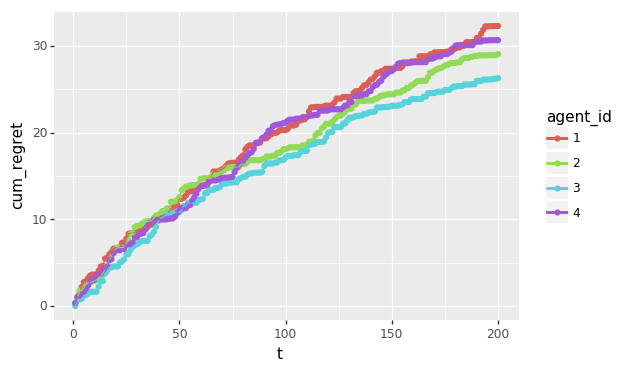

<ggplot: (8732152902121)>


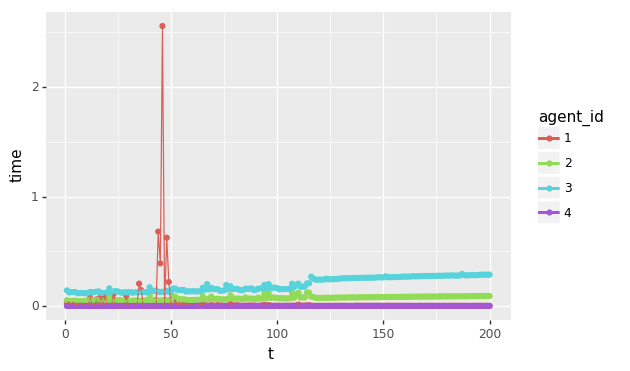

<ggplot: (8732152928213)>


In [7]:
for seed in [10]: #range(1):
    agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()] +\
             [make_pgts_agent()]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)




theta [ 0.88389311  0.19586502  0.35753652 -2.34326191 -1.08483259  0.55969629
  0.93946935 -0.97848104  0.50309684  0.40641447  0.32346101 -0.49341088
 -0.79201679 -0.84236793 -1.27950266  0.24571517 -0.0441948   1.56763255
  1.05110868  0.40636843]
Experiment: Step 0
 Laplace sample: array([-0.30574829,  1.71228277,  1.169437  , -0.27581487, -2.51178071,
       -0.41727181,  0.54157245, -0.1451073 , -1.02158273,  0.47227797,
       -0.7081235 ,  1.41413948, -0.49053316,  1.18117087, -0.04692511,
       -1.46010618, -0.5081915 , -0.49521576,  0.7617861 , -1.64684375])
 Sample: array([-2.06334129, -1.33168356, -0.05650436, -0.45497191, -0.89647393,
       -0.23387838,  0.69313383, -1.28200912, -1.29194799, -0.70472532,
       -0.04473454, -0.40409258,  0.44652159,  1.04252215,  0.33729749,
        0.869062  ,  0.1966458 , -0.59262891,  0.12981995, -1.04984704])
 Steps taken: 1000
 Sample: array([ 0.16424988,  0.01013521,  0.34570674,  0.78364525, -1.04413224,
       -0.43711651, -0.278

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.71371735,  0.06462027, -0.01081526,  0.22566458, -0.17617611,
       -0.82105123, -0.12238394, -0.64303214,  0.50280929, -0.06740212,
       -0.59785726, -0.37473273, -0.08747403, -0.52591318, -0.53589463,
       -0.07247952,  0.24548572, -0.17539577, -0.44488807,  0.1611891 ])
 Accept proportion: 0.718000
 Steps taken: 1000
 Sample: array([-0.26037797, -0.46431152,  0.88652267,  1.21155204, -1.10179592,
       -0.89904815, -0.0158476 ,  0.50654226, -1.13753537, -0.66029205,
       -0.30913859, -1.36332831,  0.48516163, -1.88664054,  1.18076093,
       -1.82193458, -1.73485696,  0.87626381,  1.21739555, -0.52086591])
Experiment: Step 3
 Laplace sample: array([-3.19881699e+00,  1.86204540e-01,  1.05755116e-01, -2.06746998e+00,
        5.07902141e-01, -1.53683981e-03,  9.32856397e-01, -2.83284063e+00,
        3.50126872e+00, -2.41159759e+00, -1.79938349e+00,  5.01312698e+00,
        4.36537236e-01,  2.79942074e-01,  3.97936829e-02, -3.82973865e-01,
       -2.10119955e+

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.13874474,  0.59616254,  0.40525555, -0.37235914,  0.27274376,
        0.24908344, -0.58411512, -0.0632938 ,  0.08584271, -0.13316456,
        0.07210775,  0.01521959,  0.16416522, -1.02700002, -1.08323796,
        0.06685972, -0.18379863, -0.4246188 , -0.53430418,  0.20150894])
 Accept proportion: 0.712000
 Steps taken: 1000
 Sample: array([ 1.20481324, -0.58414352,  1.93015527,  0.0472225 , -0.80021379,
        0.37604876, -0.7201893 ,  1.10915823,  0.43161171,  0.09728151,
        1.87317442,  0.56572769, -0.97541758, -0.37308504,  1.04545983,
       -0.75390512, -0.51466555,  0.37557281,  1.28116699,  1.29864913])
Experiment: Step 4
 Laplace sample: array([-1.58490227, -3.7870957 ,  0.32065152, -1.95831104,  0.33745513,
       -0.26528044,  3.65856731, -1.59427071,  3.19141365, -0.90629321,
       -2.91070493,  5.66301717,  0.25672382,  4.45002508, -2.31466929,
       -4.24435207, -3.01184933, -2.01933597,  0.16369621,  0.60093382])
 Sample: array([ 0.4004083 ,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47508482,  1.67656634, -0.42338202, -0.87303345, -0.50182174,
       -0.36371725, -0.89237523, -0.73963904,  0.54212666, -0.92726098,
        0.93975931, -0.13844191, -0.24077086, -0.68372829, -0.28355514,
        0.10583246,  0.68015452, -0.39792597,  0.44730618,  0.65967917])
 Accept proportion: 0.704000
 Steps taken: 1000
 Sample: array([ 1.24264055, -0.6633594 , -2.73052118, -0.09661132, -0.84892315,
       -0.08017758,  1.2183216 ,  0.88035618,  0.21896453,  0.71046394,
        0.73215769,  0.14684583, -1.07442563, -0.1172386 ,  1.19045451,
       -0.20438905,  0.8419815 ,  0.14130736, -0.99910319, -0.86509434])
Experiment: Step 5
 Laplace sample: array([-1.94980532, -3.01566719, -1.18058011, -2.21096383,  0.7145628 ,
       -0.70768713,  4.12661719, -3.54623147,  2.61936926, -0.92164873,
       -3.5354108 ,  4.04629215,  1.60651493,  3.07445845, -0.5231007 ,
       -4.15992974, -2.00835895, -0.03269548,  1.10446672,  1.00195705])
 Sample: array([ 0.67979693, -1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.08364977, -0.10250684, -0.12216046, -0.33359803, -0.92187099,
       -0.35988301, -0.95810724, -0.21672279, -0.08044312, -0.3710013 ,
        0.29611832, -0.01069416,  0.05119494, -0.34449016, -0.51316586,
        0.29087117,  0.59919323,  0.0145014 , -0.25918467,  0.84017799])
 Accept proportion: 0.748000
 Steps taken: 1000
 Sample: array([-1.49308459,  0.28824047,  0.50064058, -0.10734582, -0.54539191,
       -0.68330509,  0.67097603,  0.24769765,  0.19843737,  0.41614313,
       -0.84275091, -0.12468099,  0.26644034, -0.2483454 ,  1.98629856,
       -0.02781123, -1.92557736,  0.9750569 , -0.61536074,  0.79968479])
Experiment: Step 6
 Laplace sample: array([-2.98031234, -3.74139927, -1.38328819, -1.43740412, -0.84943342,
        1.74724578,  6.20532188, -0.81453138,  4.21881296, -1.11907764,
       -2.06060115,  6.60670717,  2.08634787,  2.79030234,  1.00340842,
       -2.95818087, -5.54567418, -0.31848062,  2.05978452,  1.64091597])
 Sample: array([ 0.15140452, -1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.54703463, -1.7860459 , -0.02927245, -0.43227248, -0.87198688,
        0.75529943,  0.54752176,  1.37433948, -0.32358294, -1.20260826,
        0.48802135, -0.39912008, -0.24157925,  0.77141706, -0.57085369,
        0.60848359, -0.19087731, -1.20705652, -1.07488976,  0.93088872])
 Accept proportion: 0.750000
 Steps taken: 1000
 Sample: array([-0.74977006, -1.43708567, -1.76182736, -0.79174907, -0.40020044,
       -1.04119922, -1.18241707, -0.46310128, -0.18157407, -1.05432106,
        0.87903009,  0.83634773, -0.98689837,  1.07028577,  0.50017538,
       -1.9273026 , -0.07474293, -1.27325394,  0.51243911, -0.22277823])
Experiment: Step 7
 Laplace sample: array([-2.8616455 , -5.75908316, -0.2857828 , -2.23840845, -0.30926874,
        0.82949823,  2.82228699, -2.7440511 ,  3.49689482, -0.59500447,
       -2.20606463,  6.64916245,  1.60559722,  4.2015753 , -1.92199781,
       -3.97455816, -0.63716503, -0.20019879,  0.39864001,  1.12795599])
 Sample: array([ 1.08448324,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.52080697, -0.26514091,  0.4110844 , -1.43993125, -0.11336367,
        0.28761612,  0.02556241,  0.59632222, -0.23868318, -0.09965288,
        0.16243212,  0.30623721, -0.1750858 , -1.21828399, -0.34090414,
        0.43464655, -0.25656787, -0.09816121, -0.22130711, -0.11046836])
 Accept proportion: 0.743000
 Steps taken: 1000
 Sample: array([-1.41988155, -0.32955209, -1.85988412, -0.24265221, -0.49383639,
        0.36294593, -0.68356093,  0.99586868, -0.5241431 , -0.17927149,
        0.77382041,  0.55100803, -1.20381077, -0.32062455,  0.81184814,
       -1.22582547,  1.09684011,  0.83672333,  0.30801804, -1.7833794 ])
Experiment: Step 8
 Laplace sample: array([-4.35317898, -4.54090693, -1.41764326, -2.57379574,  0.20007105,
        0.26556611,  4.88813235, -3.3063482 ,  1.71171221,  0.26533278,
       -3.20297142,  7.45523451,  2.97471404,  2.91711408,  2.7009927 ,
       -2.83117114, -1.43218108,  0.46464004,  2.60011587,  1.48205136])
 Sample: array([ 0.58953567, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.27430436, -0.29164589,  0.59006992, -0.21861824,  0.55963421,
        1.03932986,  0.42604522, -0.78071502, -0.51476646,  0.22562897,
        0.82455561,  0.40659681,  0.21179339, -1.06152653, -0.44040623,
       -0.33759635,  0.52150378, -0.24495521,  0.19614369, -0.94773351])
 Accept proportion: 0.730000
 Steps taken: 1000
 Sample: array([ 2.35671731, -0.12428197, -0.62893564,  1.15886926,  1.00517349,
        0.37036216,  0.59877262, -0.75650225, -0.36286716, -0.40465758,
       -0.33438661,  0.25761543, -0.86324516, -1.14306786,  0.08039135,
        1.5529932 , -0.00458324,  1.22523354, -1.16425249, -0.12417167])
Experiment: Step 9
 Laplace sample: array([-0.86627278, -7.71653102, -1.62274525, -1.81890391, -0.23867031,
        1.8044683 ,  6.52869511,  0.04097148,  7.00648657, -2.27126507,
       -1.88114807,  2.48645711,  5.06220696,  0.85533797,  3.46485295,
       -2.2472243 , -4.80192294, -3.21051776,  3.01190038,  1.74781643])
 Sample: array([ 0.24606323, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.12305293, -0.01810409,  0.76857553, -1.82301219, -0.23442935,
       -0.08140192,  0.97128716, -0.05213049, -0.08865062, -0.73151901,
        0.77168814,  1.44465753, -0.49593935, -0.35866784, -0.45901125,
        0.23890547,  1.39804672, -1.53725331, -0.03922143, -0.0357751 ])
 Accept proportion: 0.764000
 Steps taken: 1000
 Sample: array([ 0.18391774, -1.04885201, -2.01195129, -0.62857467, -0.11861971,
       -0.85393347,  0.1405584 ,  0.39008063,  0.46999756,  0.23119083,
       -0.59261412,  0.27467052,  1.09381826,  1.37427525, -0.80556978,
       -0.7611078 , -0.33395223,  0.97962687,  0.08540028, -0.86872292])
Experiment: Step 10
 Laplace sample: array([-1.55632787, -6.7296787 , -1.11139799, -2.59769797, -1.2168451 ,
        1.07055274,  5.51028655, -0.97098631,  3.8773007 , -2.41484865,
       -1.71434505,  4.54202559,  5.09101807, -1.31092904,  5.54948042,
       -4.80932739, -2.78881045, -3.06588841,  3.8491907 ,  2.71308749])
 Sample: array([-0.11114506, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.53389804,  0.39723452, -0.04478519, -0.69595647, -0.65048762,
        0.67901763, -0.86898407,  0.9908631 , -0.03851191,  0.84160422,
        0.82746069, -1.38886179, -0.22383839, -0.70982703, -0.45226937,
        1.20546145,  0.18346207,  0.68954603,  0.47122674, -0.72958897])
 Accept proportion: 0.773000
 Steps taken: 1000
 Sample: array([ 0.96190491,  0.17696411, -0.70686795, -2.77930964, -0.35576823,
       -0.7279255 ,  0.5425384 ,  0.63416088, -0.42807739, -0.42095552,
       -1.69824548,  0.18320572,  1.4137008 ,  1.42442435,  0.25022884,
        1.07354921,  1.57976774, -0.54721681,  2.01112216, -1.47268357])
Experiment: Step 11
 Laplace sample: array([ 0.70701933, -8.18884143,  2.18500072, -2.19740178, -1.26005458,
        5.60538545,  5.47316648,  0.5572967 ,  6.46788345, -4.13647605,
        2.3672714 ,  2.23368454,  4.82674613, -1.20696547,  6.51026253,
       -6.25395187, -2.91882308,  3.38952912,  4.15922061,  3.32143244])
 Sample: array([ 0.74710784, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.13285149,  0.12217058, -0.72576555, -1.59633799, -0.29194724,
       -0.30569524,  0.07333154,  0.23398035,  1.11252208, -0.09400033,
        0.53828497, -0.80816933, -0.46082996,  0.63185608,  0.14751129,
        0.1547721 ,  0.31740979,  0.55133125, -0.43502535,  0.04889075])
 Accept proportion: 0.758000
 Steps taken: 1000
 Sample: array([ 2.12885886, -0.7367047 , -0.46243172, -0.34143643,  0.21614436,
       -0.2496539 , -0.31434301,  1.14686317, -0.61609806,  0.60513144,
       -2.28975916,  0.11765439,  0.34436178, -0.02104036, -0.96950251,
       -0.3252146 ,  0.27040399, -0.14436611,  0.22013981,  0.11214451])
Experiment: Step 12
 Laplace sample: array([-0.67626517, -9.25283381,  1.57179285, -3.99445362, -1.06318223,
        1.07759454, 10.69027098, -0.12769022,  2.38170754, -7.46773487,
        3.37265239,  1.35585033,  0.56024498, -0.94405233,  6.01917357,
       -7.08818907, -1.95772686,  7.32640303,  2.50260838,  0.23166631])
 Sample: array([-1.16154746, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.11387034,  0.84821906,  0.11873389, -0.04823911, -0.5805849 ,
        0.08028591, -0.3351147 , -0.21670752,  0.38277762,  0.61843987,
       -0.31911183, -1.42734796, -0.60254794, -0.95684714, -0.08281404,
        0.75727242,  0.22552774,  0.04377148,  0.46758128, -0.05374278])
 Accept proportion: 0.753000
 Steps taken: 1000
 Sample: array([-0.68544325, -2.06345442, -1.4055362 ,  1.5525464 , -1.00219541,
        1.11404966,  0.18842715,  0.43343246,  0.50729898,  0.52482439,
        1.07160031, -1.20305723,  0.77936362, -0.13224471, -0.37678675,
        0.33349667, -1.13784324,  0.95994982,  0.40884621,  1.68455696])
Experiment: Step 13
 Laplace sample: array([ -0.52730044, -10.7214861 ,   0.31305452,  -3.5035132 ,
        -0.84873498,   0.16197365,  11.20340993,  -0.18034825,
         3.23490894,  -8.51062348,   4.51714217,   1.52262962,
         1.94703312,   0.04499868,   6.61191922,  -7.25571895,
        -4.56686167,   7.18701065,   4.8224594 ,  -0.55642235])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.3505448 , -0.09095523, -0.46482457, -0.2404078 ,  0.55078818,
       -0.52849154,  0.98525062,  1.6189629 ,  0.52566077, -1.12744685,
        0.90894916, -0.74027993, -0.74557405,  0.43178623, -1.39209953,
       -0.53379982,  0.4872844 ,  1.32622293, -1.26753624, -0.73917054])
 Accept proportion: 0.745000
 Steps taken: 1000
 Sample: array([ 0.63317374,  0.10690836,  0.00484419, -1.50255784, -0.88180657,
        0.28965672,  0.27614573,  1.35362651, -0.5364928 , -0.1676381 ,
        0.9454585 ,  0.95459556, -0.32398407, -1.36896164,  0.03248844,
       -0.06309215,  1.16865848,  0.71431188,  1.17188849, -0.84257315])
Experiment: Step 14
 Laplace sample: array([ -1.45382807, -14.93160738,   0.8858479 ,  -4.08891168,
        -3.16174443,  -0.33061939,   5.43571406,  -4.78479611,
         4.32838751,  -4.79731696,   1.25467212,  -3.02935689,
         3.89305307,   2.33493312,  10.42117879,  -7.13299731,
        -2.94840602,  12.51090353,   1.61266546,   3.69421662])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.87656662, -0.85014588, -0.48907098,  0.69713353,  1.24432767,
        1.2104124 , -0.00641982, -0.14078408, -0.13610149, -0.99786307,
       -1.59218133,  3.36269547, -1.78703882,  1.3668256 , -0.2773864 ,
       -2.88849267,  0.45386639,  1.14561577, -0.13475527, -0.62003248])
 Steps taken: 1000
 Sample: array([ 0.07222058,  0.00650556, -0.44594917, -0.51894663, -0.69708424,
       -0.25564725, -0.23713891,  0.03288165, -0.62741689,  0.51726129,
        0.31563699,  0.37340684, -0.13808318, -1.13678458, -1.20451467,
        0.57547766,  0.71172617, -0.41450475,  0.44194016, -0.33987596])
 Accept proportion: 0.778000
 Steps taken: 1000
 Sample: array([-0.83598698,  1.05350114, -0.47126754,  0.00509574, -0.41005154,
        0.12616779, -1.00108648,  0.36572604, -0.28078709, -0.05733231,
        1.04187985, -0.27710545, -1.71346088,  0.22602705, -1.75234392,
       -0.36610548, -0.65882852,  1.34225545,  1.00318956, -1.38475087])
Experiment: Step 15
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.97965401,  0.02045638,  0.59828056,  1.00049239,  0.01919001,
        0.95038497,  0.1151232 , -0.10949317, -1.26416789, -0.67180036,
       -1.55443114,  0.89595819,  1.11121042,  0.67855207, -2.28486464,
        0.16192402,  0.60626636,  0.98152307,  0.16943281, -1.41798774])
 Steps taken: 1000
 Sample: array([ 0.23967357, -0.1155482 , -0.38332268, -0.13558358,  0.24588379,
       -0.27638861,  1.07539211,  0.20985193,  0.46910822, -0.33330205,
        0.1218234 ,  0.59911079, -0.33486283, -0.11088848, -0.90479957,
        0.0027507 , -0.09697068, -0.19410735, -0.61484473, -0.92596198])
 Accept proportion: 0.786000
 Steps taken: 1000
 Sample: array([ 1.51061728, -1.75395905,  0.63213659, -0.6165883 , -1.5473113 ,
       -0.08481494,  1.68900952,  0.73832513,  2.73876176, -0.90412975,
       -0.39668111, -0.56421142, -0.01413008, -0.1116184 ,  1.29458626,
        0.96649777,  0.06141586,  3.16333852, -0.86870627, -0.1518935 ])
Experiment: Step 16
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.23513288, -0.05372592, -0.20693681, -0.50639532, -0.12348977,
        0.35703982,  0.56929491,  0.26712636,  0.30726009, -0.47256813,
        0.6933041 , -0.4961627 , -1.01821187,  0.28177188, -1.09228025,
        0.58662384, -0.02159642,  0.27841912,  0.048017  ,  1.20843716])
 Accept proportion: 0.788000
 Steps taken: 1000
 Sample: array([ 0.87869084,  0.5951161 , -0.11629834, -1.2734936 , -1.25434362,
        0.32679788, -0.38094233, -0.17236043,  0.04163985, -0.11668714,
       -0.86555553, -0.0781294 ,  0.0906748 , -0.43867861,  0.17590463,
       -0.36497243, -0.07090645,  1.54308274, -0.45957862, -1.54525916])
Experiment: Step 17
 Laplace sample: array([ -0.49832511, -10.04928622,   2.04321212, -12.87515462,
       -25.88020483,   3.41085931,  10.3181914 ,   0.96888253,
        -1.68710165,  -0.6664012 ,  -3.44202016, -10.77152564,
         4.73038942,  -2.1128835 ,   9.8933039 ,  -6.50022234,
       -22.92003639,  13.77045805, -14.51747846,  11.4815606 ])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.29683788,  0.24924608,  1.01318116, -0.2578309 , -0.12408943,
        1.49506821, -0.28374662,  0.14016913,  1.07124443, -1.56397207,
        0.16188596, -0.28600205, -0.14719014, -0.64035538, -0.21731931,
       -0.27024921,  0.22479367,  0.14761799,  0.09493461, -0.01778285])
 Accept proportion: 0.785000
 Steps taken: 1000
 Sample: array([ 0.06309181,  1.5451122 , -0.82410126, -0.69232884, -0.52802849,
       -0.42928119,  0.52494403,  0.93757046, -0.31864096,  0.13132692,
        1.4225869 ,  0.54423965, -0.3633968 , -0.13675106, -0.3584812 ,
       -0.05529452, -0.3574087 ,  0.86629808,  0.51164468, -0.7749125 ])
Experiment: Step 18
 Laplace sample: array([ -0.96025522,  -9.2866256 ,   2.11268647, -12.5119078 ,
       -24.9170633 ,   2.75109632,  10.33853242,  -1.82142584,
         0.3636161 ,  -0.18134027,  -5.89717933,  -9.71729549,
         4.1615545 ,  -4.1776098 ,  10.94872133,  -5.77505728,
       -24.25215809,  11.63463636, -14.01242358,  12.1623245 ])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39098685,  0.43673943,  0.69035868, -0.84710575,  0.55200566,
        0.01646785,  1.62315091,  0.37682606,  0.15380389, -0.52242668,
        0.69607945, -0.62983908, -0.78341215, -1.44152417,  0.60022864,
        0.46818043,  0.20755926,  0.43533603,  0.20555468,  0.52546977])
 Accept proportion: 0.778000
 Steps taken: 1000
 Sample: array([-0.68751651,  2.11435382, -2.16988058, -1.01635927, -1.34120461,
       -1.24589346, -0.07425881, -0.9854623 ,  0.51936765, -1.96086643,
        0.74982533, -0.64875595, -0.53521976, -0.10427693,  1.4124512 ,
       -1.00502683, -0.01836586,  0.56195301, -0.57418179,  0.29419642])
Experiment: Step 19
 Laplace sample: array([ -1.63948806, -11.01266483,   1.12803432, -11.22075134,
       -24.6376256 ,   3.58148753,  10.22530991,  -1.70811508,
        -0.07429269,  -0.97209618,  -3.74924609, -11.0760655 ,
         5.55456521,  -3.1618763 ,  10.14799027,  -6.46881996,
       -23.33418601,  12.46382758, -14.08090168,   9.74876247])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-2.76480158e-01,  3.15514341e-01, -1.67784815e-01, -2.45848805e+00,
        1.87155533e+00, -9.30584160e-01,  2.20228384e-01,  1.53355585e+00,
       -1.23145877e+00,  9.67493154e-01, -2.10135434e+00, -1.03721614e+00,
       -2.13202743e-01,  1.21585262e+00, -4.50248001e-01, -1.73878923e+00,
       -5.29616019e-01,  8.85398387e-01, -4.77930277e-01,  1.54739098e-03])
 Steps taken: 1000
 Sample: array([-0.51428528,  0.34781641, -0.40506409, -1.20936137, -0.04581388,
        1.64121388,  0.8419249 ,  0.50676101,  0.95033701, -0.17008796,
        0.85021115, -0.47297632, -0.12684761, -0.46179516, -0.58153108,
       -0.5772037 ,  0.2549421 , -0.00395628,  0.97326135,  0.40980905])
 Accept proportion: 0.783000
 Steps taken: 1000
 Sample: array([-0.26458105,  0.66152083, -0.17217627, -1.12877121,  1.54009209,
       -0.49010943,  0.21820443, -1.0999137 ,  0.70453002, -0.33631084,
        0.63196274, -0.50789143, -0.45413433,  0.17298888, -0.59964756,
       -0.18689285, -1.07

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.41356751, -0.38973259, -0.58705287, -2.28647715, -0.04751583,
        0.25345016,  0.98146549,  0.72124472,  0.88948527, -0.85496575,
       -0.69882812,  0.70685938,  1.17476472,  0.54254106, -1.25265026,
        0.86365638,  0.12950239,  0.58927764, -0.86243306, -0.4529151 ])
 Steps taken: 1000
 Sample: array([ 0.1230164 ,  0.14232574, -0.38290084, -0.17545433,  0.05361337,
        0.18778761,  0.74570553,  1.01195188,  0.22790811, -0.9553757 ,
        0.92221036, -0.36823407, -0.15320058, -0.39474133, -0.76712789,
        0.40616614,  0.42697035,  0.38367173,  0.26849861, -0.06314438])
 Accept proportion: 0.776000
 Steps taken: 1000
 Sample: array([ 0.10586213,  1.28221352, -1.07370862, -1.30005144,  0.12290925,
        0.3118903 ,  0.36437755, -0.30342195,  0.8232417 , -0.81682514,
        0.22785662,  0.20343822, -1.64378066, -0.06555026, -0.68387541,
       -1.0533815 , -1.47474014, -0.11902095,  1.83949274,  0.63376494])
Experiment: Step 21
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39054618,  1.06379177,  0.6303425 , -1.20238329,  0.0447662 ,
       -0.39652343,  1.27538452, -0.02585622,  0.49718353, -0.33292929,
       -0.36370435, -0.30422871, -0.58765421, -1.22285094, -0.19776986,
        0.0071066 ,  0.78388983,  0.66768939,  0.35577595,  0.62486479])
 Accept proportion: 0.786000
 Steps taken: 1000
 Sample: array([-0.52139551, -0.08897747, -2.07012334, -2.1230182 , -0.37496253,
        0.25935045, -1.20979913,  0.72499621, -0.30162892, -1.57761067,
       -1.44082093, -1.07393012,  0.54626292,  0.81935112,  0.61238611,
       -1.43505402,  0.50569875,  2.63326186, -0.43805469,  0.13998705])
Experiment: Step 22
 Laplace sample: array([  3.21413544, -22.5593603 ,   3.36820856, -37.50604119,
       -17.19305295,  13.33168787,  18.34045163,   2.51048829,
        -5.84292637,  -6.45001144, -15.82925921,  -8.67502585,
        -3.55886034,  -2.25032156,   3.10742723,   0.32859996,
       -15.50844172,  16.03202099, -18.00188906,  21.90071352])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.26667706,  0.65734713, -0.64919989, -1.198087  , -0.51195095,
        0.72089394,  0.61021739, -0.26689357, -0.50534429, -0.47860088,
        0.38503384, -0.01822426,  0.4708919 , -0.51955297, -1.03773049,
        0.24259866,  0.3785864 , -0.0761464 ,  0.61686378,  0.95321381])
 Accept proportion: 0.773000
 Steps taken: 1000
 Sample: array([ 1.12277414,  0.6640342 , -0.88849803,  0.28683557, -0.75808644,
       -1.25078797,  0.40720586,  0.77145457, -0.12097846, -0.88424235,
        0.69248698, -0.20659758,  0.20454417,  0.3536651 ,  0.04534484,
       -0.21792034,  1.12680809,  1.81087814,  0.98386729, -0.70007697])
Experiment: Step 23
 Laplace sample: array([  4.26138062, -26.33043719,   3.14586615, -38.67496656,
       -17.16927365,  13.50066048,  17.87108273,   2.00136484,
        -5.20652976,  -6.85740714, -15.9873325 ,  -8.6284867 ,
        -3.25568195,  -4.77961018,   1.40582784,  -1.16140944,
       -15.43154506,  15.01553905, -18.43568576,  21.36647297])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.15244719,  0.20413953, -0.41421316, -2.17256602, -0.69630661,
        0.72568409,  0.29626211,  0.4009507 , -0.62863672, -0.06960764,
       -0.33495096, -0.72688838,  0.5882265 , -0.19960682, -0.90956983,
       -0.63207028,  1.19550921,  0.50780234, -0.31744813,  1.08992698])
 Accept proportion: 0.789000
 Steps taken: 1000
 Sample: array([-0.58535762,  0.73404352, -0.86141415, -0.21308596, -2.60221329,
       -0.5678794 ,  1.110121  ,  0.08770945, -0.45459389, -1.42120964,
        0.49718124, -0.31246204, -0.74662435,  0.06600536,  0.66993025,
       -0.94057299, -1.48787282,  1.83871091, -0.362747  ,  0.46291161])
Experiment: Step 24
 Laplace sample: array([  4.03187947, -24.12765812,   2.39149189, -36.78933982,
       -15.47486695,  13.56320469,  16.64228721,   2.95209226,
        -5.50934786,  -7.83489303, -16.21867981,  -7.64893893,
        -4.47448402,  -4.12481936,   4.10050666,  -0.78130479,
       -16.49086749,  16.06461313, -18.24545481,  19.39862508])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.38371507, -0.32504629, -0.70956132, -1.6130364 , -0.77071643,
        0.45721798, -0.03313181,  0.3355489 ,  0.41449567, -0.45300642,
        0.91092325, -0.92828414, -0.00475191, -0.28749927, -0.38118815,
        0.56304585,  0.25757642, -1.24501407,  0.66827344,  0.49068522])
 Accept proportion: 0.777000
 Steps taken: 1000
 Sample: array([ 1.38062894,  0.88078054, -1.07491521, -1.19417702,  2.2236278 ,
        0.50991509,  0.2843238 ,  1.55126519,  0.27237853, -0.05524818,
       -2.02315816, -0.4120395 , -0.90958292,  0.46019612, -0.2768728 ,
       -2.12298212,  0.89197612,  2.28572136,  0.85284345,  0.13250746])
Experiment: Step 25
 Laplace sample: array([  3.2640671 , -24.13544325,   2.69600218, -40.18194331,
       -17.49235978,  12.54515982,  18.1848467 ,   4.58644084,
        -4.76555397,  -7.44752173, -18.03905195,  -6.45667798,
        -5.52113183,  -3.45442101,   3.61080665,   1.3764582 ,
       -15.80572224,  14.87997961, -19.28850738,  21.87574314])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.72450095, -0.94178091, -0.19169581, -0.63342871, -0.99802543,
        0.14685032, -0.68107512, -2.11963928, -0.13549435, -1.02524704,
        0.77918701, -0.94784237,  0.58380497,  0.77412131, -1.55115332,
       -0.12871329,  0.26655313,  0.5832304 , -0.25399472, -1.24402355])
 Steps taken: 1000
 Sample: array([ 0.18849251,  0.26949581, -0.20340365, -0.86919932, -0.80863892,
       -0.07612937,  0.99770365, -0.65478531,  0.85483131, -0.0432528 ,
        0.95580501, -0.87662707,  0.56449451, -1.73383752,  0.58507611,
       -0.23614955,  1.30715622, -1.1689873 ,  0.0764175 ,  0.41047577])
 Accept proportion: 0.783000
 Steps taken: 1000
 Sample: array([-0.28215512,  0.69082678, -1.8711594 , -0.28019813,  0.3605238 ,
       -0.59086658,  0.5224462 ,  0.6598183 ,  0.3432012 , -1.35712707,
        1.65839892, -0.29742002,  0.84332112,  0.34071838, -0.76925558,
       -1.32266714,  0.88259709,  2.35638508, -0.0162337 , -0.77058944])
Experiment: Step 26
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.1345441 ,  0.06524233, -0.20025884, -0.82304187, -0.89222418,
        0.09519599, -0.23920115,  0.21994666, -0.22456539, -1.03076485,
        0.92616871, -1.559157  ,  0.51100004, -1.27117188,  0.74657816,
        0.93587821, -0.1097807 , -0.72409917,  0.61331655, -0.60806006])
 Accept proportion: 0.802000
 Steps taken: 1000
 Sample: array([-0.97243026,  0.37318768, -0.04101348, -0.0648955 ,  0.75925907,
        1.74172318,  0.1642714 ,  1.98094916,  0.08018591,  0.82753057,
        0.00496512, -1.3772584 , -0.36728335, -0.12767542,  1.2334941 ,
       -2.4939005 , -0.86092931,  0.40347719, -0.51787219, -0.78904029])
Experiment: Step 27
 Laplace sample: array([  4.43528875, -24.67453586,   7.63185159, -40.76263008,
        -7.37896759,  12.64900809,  22.5699139 ,  -2.24304374,
        -5.60280567,  -8.59478121, -10.15697034,   1.9236256 ,
         2.60708978,  -8.69564511,  -4.93755241,  -1.91523001,
       -25.86634567,  12.85883922, -21.20616853,  27.93557302])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.09832142, -0.69173259,  0.20655407, -1.16213828, -0.63433711,
        0.1924333 ,  0.93882949, -0.07681858,  0.58913899, -0.61955615,
        0.98861367, -0.21718311, -0.21153428, -0.46553086, -0.5606973 ,
        0.24460617,  0.1838461 , -0.68326541,  0.52458205,  0.8051678 ])
 Accept proportion: 0.768000
 Steps taken: 1000
 Sample: array([ 0.0535244 ,  0.05775797,  0.66675646, -0.8019594 ,  0.38399288,
        1.09238281,  0.08316903,  0.31679837,  0.7469881 , -1.44691167,
        0.21349915, -0.22031323, -0.44000433, -0.32842165, -0.7511143 ,
       -0.7301328 , -0.20519324,  0.06216337,  0.23824275,  0.96416481])
Experiment: Step 28
 Laplace sample: array([  5.37802757, -23.02177188,   8.47683018, -39.69290438,
        -9.0536774 ,  13.38832122,  23.19309712,  -1.33344286,
        -6.01804647,  -8.39866978, -11.58905322,   0.12005343,
         3.87256077,  -7.85866308,  -4.17924532,  -4.20294552,
       -25.39271952,  12.38901608, -22.71774545,  27.27252682])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.2093134 , -0.34054282, -0.81699707, -0.65776112, -1.55850976,
        0.51280267,  0.11577025,  0.12660726, -0.08363746,  0.38908873,
        1.36285606,  0.01437324, -0.06017608, -0.91393491,  0.71330572,
        0.75392717,  0.62631233, -0.22754424,  0.55706017,  0.5837982 ])
 Accept proportion: 0.804000
 Steps taken: 1000
 Sample: array([ 0.44435938,  1.9308278 , -0.69768807, -0.93100251, -1.03580595,
       -0.98914741, -1.11163106,  1.94860723,  1.77360455, -1.55049778,
        0.54404455, -0.21465754, -0.77943584, -1.41251169,  0.55890314,
       -0.54677204,  0.25559054,  1.66265507,  1.43606741,  1.3647171 ])
Experiment: Step 29
 Laplace sample: array([  4.01469443, -25.08924923,   6.87959355, -39.9239893 ,
        -9.73110158,  13.76502273,  23.53307812,  -2.0668065 ,
        -6.24085489,  -8.96300916, -12.04535119,   0.76307971,
         3.09011231,  -7.54137347,  -3.87477119,  -2.89105673,
       -25.78861637,  14.29446442, -22.86374623,  28.18236741])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.62918601,  0.26162322, -1.37964438, -0.31304099,  0.55881485,
        1.88848568,  0.20281907,  0.0965086 ,  0.16037733, -1.31542585,
        0.0926769 , -0.95318041, -0.61155166,  0.68500525, -0.9018665 ,
       -0.47810171,  2.22747567, -0.46386358,  0.42786961, -0.05795881])
 Steps taken: 1000
 Sample: array([ 0.47998708, -0.43173257, -0.39345647, -0.68131845, -0.85457108,
        1.02495795,  0.85165243, -0.13325701, -0.17513004,  0.11554264,
        1.41384914, -0.34263082,  0.50386751, -0.94568697, -0.69999178,
        0.318821  ,  1.03365438, -0.64585148,  0.36041564,  0.48994096])
 Accept proportion: 0.805000
 Steps taken: 1000
 Sample: array([-0.10847376,  0.53341354, -0.12130825, -0.47702193, -1.56261488,
        0.95961978,  0.58316191, -0.26734283, -0.36242255,  0.50912552,
       -0.09168363,  0.08230293, -0.15999898, -1.25170501,  0.29692588,
       -0.3417467 , -1.05261487, -0.23526712,  1.09602208,  0.95248151])
Experiment: Step 30
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57035824, -1.85827049, -2.12886829, -0.17404354, -0.38966703,
        0.38857864,  1.68438944, -0.79612407, -0.98719387, -0.74590527,
       -1.54334093,  0.56225347,  0.36922969,  1.22734876,  0.55679663,
        0.07729589,  0.56631195,  0.78805475,  1.7849862 , -0.47799453])
 Steps taken: 1000
 Sample: array([ 0.42689934,  0.01879432, -0.4469803 , -1.26232587, -0.93984811,
        0.70906491,  0.60559085, -0.78302826,  0.85243429,  0.45696872,
        1.1155371 , -0.89345631,  0.71773231, -1.11372933, -1.06582784,
        0.13328274,  1.28411229, -0.73435724,  1.048765  , -0.61283185])
 Accept proportion: 0.799000
 Steps taken: 1000
 Sample: array([ 0.41013296, -0.78326514, -0.74854097, -1.7248896 , -0.32859278,
       -0.37133375,  0.33033054,  0.10220732,  1.21388327,  0.32708698,
        0.37161075,  0.17591916, -1.26975533, -1.12238797, -0.57480418,
       -1.97898324,  0.31908414,  0.62751298,  0.90235507,  0.96509525])
Experiment: Step 31
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.32452161,  0.16592125, -0.63445741, -0.44496281,  0.77118684,
       -0.36164987, -0.84632413, -0.2968524 , -0.00311411,  0.07091548,
        0.20812724,  1.31271916, -0.9031653 ,  2.21265   ,  1.68234328,
        2.27892584,  1.62691969,  0.31253297,  1.62616792,  1.25794949])
 Steps taken: 1000
 Sample: array([ 1.29628575, -0.31611977, -0.95071946, -1.55180011, -0.65162312,
       -0.87128664,  1.12929675, -0.76658576,  0.29039702, -0.20900891,
        0.33803491,  0.46406289,  0.00209198, -1.97332956,  0.52270143,
       -0.27626783,  0.34269788, -0.23388838,  0.20928048,  0.76507495])
 Accept proportion: 0.778000
 Steps taken: 1000
 Sample: array([ 0.96683011,  0.39750055, -1.31006922, -0.90745515, -0.78295638,
        0.83710832,  0.49131772,  0.72069005,  0.54574167, -1.01599094,
        0.678618  , -1.00216331, -0.42044374, -2.03422746, -1.69759785,
       -0.8967911 , -0.37499979,  1.03180075,  0.06119587,  0.63446608])
Experiment: Step 32
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.43744484,  0.40370554,  0.02676103, -0.84140648, -0.28343174,
       -0.36205081, -0.00934932, -0.86406561,  0.8611754 , -0.07311896,
        0.64200522,  0.08482799,  0.88064702, -1.04553858, -0.50076365,
        0.33475082,  1.02596048, -1.9273483 ,  0.86657203,  0.39544169])
 Accept proportion: 0.801000
 Steps taken: 1000
 Sample: array([-0.57765117, -0.69409403, -0.61088074,  0.44022658, -0.29292577,
        0.98841675,  0.56400984,  0.74161318,  0.50005437, -0.10163803,
       -1.16547982, -0.46101414,  0.53936184,  0.30244912, -1.49744882,
       -1.69888668,  0.47399972,  1.98935174, -0.45999853,  2.02340141])
Experiment: Step 33
 Laplace sample: array([-118.42310406, -159.95379562,  -52.35094216,  -75.93183291,
       -101.23221837,   50.24940997,   22.99395635,  -67.37237199,
       -126.02972117, -110.98153856,   23.69194806,   40.94970317,
        -44.05487597, -159.9237598 ,   -8.59013498,   60.50999519,
        -57.20289853,   18.56595089,  -20.77668909,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.83019435, -0.21170733, -0.47142087, -0.50755963, -1.09398136,
        0.49669791,  0.5564708 ,  0.09080339,  0.38734032, -0.08733317,
        0.63543288,  0.26127183,  0.81275952, -1.20945714, -0.96019831,
       -0.06216009,  1.80654232, -1.38647247,  1.12692241,  0.08186819])
 Accept proportion: 0.801000
 Steps taken: 1000
 Sample: array([-0.60259565, -0.19310062, -2.40693817,  0.79260392, -0.12634639,
        0.77277561,  0.25799237,  1.21785455, -1.57586126, -0.46437509,
        0.21046612, -0.52104627, -1.37225417,  0.63981131, -2.02856751,
       -2.05725319,  1.71302304,  0.99709686,  2.95443964,  0.36491792])
Experiment: Step 34
 Laplace sample: array([-121.04313994, -162.76622223,  -51.77261706,  -77.81132771,
        -99.97381197,   50.83336975,   20.07339411,  -67.17978358,
       -126.28687253, -110.60973189,   23.45924438,   41.5631359 ,
        -43.78073934, -159.39637101,   -9.21892873,   62.37424012,
        -55.81490106,   15.3370155 ,  -19.85732068,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.4637458 , -0.51261383, -0.15891901, -0.62067899,  0.55732448,
        0.21731481,  0.87960745, -0.5660891 ,  0.81283669, -0.16138701,
       -0.48129557, -1.74770218, -0.05914728,  0.73385208, -0.18485339,
        0.89049777,  0.85421907,  0.87539781,  2.63715861, -0.51720544])
 Steps taken: 1000
 Sample: array([ 0.39521427, -0.35290236, -1.03898246, -0.98179828, -0.82331405,
       -0.19177081,  0.5752092 , -0.35967084,  0.25770878, -0.33949798,
        1.04406603, -0.32834881,  0.9308908 , -0.74440611, -1.32801632,
        0.25340744,  0.23871836, -0.44691358,  0.20371905,  0.9777103 ])
 Accept proportion: 0.798000
 Steps taken: 1000
 Sample: array([ 1.20609763, -0.43310832, -1.08978062, -0.94377719, -1.38582737,
        0.35085845,  1.77095444,  1.29763502,  0.27967456, -0.95324135,
       -1.50693995,  0.58331664,  0.84280256,  0.95815382,  0.2074183 ,
       -0.91623377,  1.16787085,  0.88902967,  0.8369431 ,  1.35305836])
Experiment: Step 35
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.50793573, -0.11734572, -0.53770744, -0.79193939, -0.45294449,
        0.50724091, -0.13825569,  0.22127635, -0.34569223, -0.07047771,
        0.55719721, -0.20565663, -0.14737326, -1.45892634, -0.74275038,
       -0.01319019,  0.39272336, -1.09484555,  0.26337434,  1.14791778])
 Accept proportion: 0.796000
 Steps taken: 1000
 Sample: array([-0.97293419,  1.31974537, -0.02673497, -0.36243555, -0.38091651,
       -0.12290739, -0.55814848,  1.10590891,  1.67890339, -0.31910638,
        0.55624702, -2.19792314, -0.98682397,  0.5147378 , -0.30079373,
       -0.10635008,  0.58945176,  2.19115364,  1.17001512,  1.4105925 ])
Experiment: Step 36
 Laplace sample: array([-114.95783682, -199.60416414,  -68.51547942,  -76.47331268,
       -114.91523496,   95.69324052,   49.09010619,  -54.5649291 ,
        -89.76570399,  -79.48307766,   11.51289628,   65.15669333,
        -78.50471613, -214.78053684,  -51.81889193,   78.47390712,
        -20.98362841,   31.78620834,  -57.38124386,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.29962227,  0.1681808 , -0.95959585, -1.50063818, -1.54297147,
       -0.0207291 ,  0.21322847, -0.06054096, -0.56656626, -0.08706561,
        1.65086352,  0.33859274,  0.63256059, -1.61527266,  0.14577194,
       -0.2621825 ,  1.78485671, -0.69653731,  0.57940036, -0.29041285])
 Accept proportion: 0.816000
 Steps taken: 1000
 Sample: array([ 0.49769269,  0.60801956, -0.52641654, -0.62213051,  0.4867022 ,
        0.7817882 , -0.8583138 ,  1.18828147, -0.42057049, -1.64469482,
        0.5155941 ,  0.45334329, -0.95039879, -0.4545093 ,  0.33245231,
       -0.70875118, -0.3575523 ,  0.89706932,  0.4609092 ,  0.76274056])
Experiment: Step 37
 Laplace sample: array([-113.35514578, -200.86064693,  -66.6937185 ,  -75.66727822,
       -110.46580092,   95.62067656,   48.98944492,  -52.90405392,
        -87.31871468,  -79.67462093,    9.93144638,   65.18165101,
        -78.04306743, -212.70721953,  -51.28926372,   79.91610918,
        -22.01177392,   31.29682489,  -57.78078067,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.0218665 ,  0.10994664, -0.76849235, -1.02286435, -1.4713982 ,
       -1.02068757,  0.19532633, -0.1457522 , -0.78637478, -0.05195726,
        1.74065869, -0.51669024,  0.36007917, -1.26007675, -0.54332681,
        0.98385103,  0.75367482, -0.40599344, -0.09103756,  0.41782603])
 Accept proportion: 0.815000
 Steps taken: 1000
 Sample: array([-4.05960300e-01,  4.77592325e-01, -1.13888229e-03, -5.68774575e-01,
       -6.49918231e-01,  6.30676554e-01, -5.17413106e-01,  9.45462649e-01,
       -5.63098006e-01,  1.23818292e-01, -2.69522903e-01, -4.42658509e-01,
       -4.68326927e-01,  5.15246566e-01, -2.57915954e+00, -3.27752635e-02,
       -3.28936931e-01, -1.97585736e-01, -1.05767250e+00,  1.72785691e+00])
Experiment: Step 38
 Laplace sample: array([-117.17624047, -201.07710834,  -67.19433499,  -77.09900037,
       -111.68493612,   95.38873719,   49.85655181,  -53.27214001,
        -87.3622144 ,  -79.11961886,   10.8771597 ,   64.50612291,
        -78.60993366, -213.8092

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.32910797,  0.04426788,  0.06577587, -0.75828685, -1.61607298,
        1.07612848,  0.20677568,  0.65682794,  0.14648863, -0.28993514,
        0.82071402, -1.57037942,  0.4289746 , -1.46248127, -1.06758903,
       -0.17247419,  0.71621623, -0.82060675,  0.12845558,  0.86614851])
 Accept proportion: 0.793000
 Steps taken: 1000
 Sample: array([ 0.31433699, -1.08413061, -1.55979701, -0.56378498, -1.96910129,
        1.08670879, -1.60445974,  0.95763359, -0.7437586 , -0.02715141,
       -0.32352191, -0.64976247, -0.9993835 ,  1.20022715, -0.75584206,
       -1.63021237, -0.71274524,  0.59921459, -0.79634876,  0.97276944])
Experiment: Step 39
 Laplace sample: array([-116.30773551, -200.16016136,  -69.02705359,  -76.89614182,
       -112.82660686,   95.47391124,   49.14081184,  -52.48956565,
        -87.49611091,  -79.60601558,   12.68551561,   65.86583265,
        -79.59210969, -212.36080511,  -52.84176399,   79.81274341,
        -21.52448327,   31.35758801,  -58.75477568,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.95589912, -0.84397846,  0.15147374, -1.70481858, -0.54089622,
       -1.02925799, -0.57149352, -0.98620992,  0.25351541, -0.39339911,
       -0.2127938 ,  0.04408537,  0.01804631,  1.63809753, -1.37895361,
        0.19860749,  0.56633364,  0.85279492, -0.8287053 ,  0.44775532])
 Steps taken: 1000
 Sample: array([ 0.62996857,  0.06091679, -0.09436106, -0.3175815 , -1.10422631,
        0.44608424,  0.60675325, -0.2303926 ,  0.88591696, -0.11956562,
        0.78634494, -0.60204764,  0.24466235, -1.26300396, -1.17986741,
        1.14383068,  0.432901  , -0.33791794,  0.35034001,  0.12104316])
 Accept proportion: 0.814000
 Steps taken: 1000
 Sample: array([ 0.72414006,  0.08515152, -0.88996298,  0.21085313, -0.95941337,
        1.02612314, -0.90438696,  0.66553327, -0.29070161, -1.25582656,
       -0.25052781, -2.20352793, -0.37983804, -0.51854273,  0.23560159,
       -0.06255588, -0.46585915,  0.19947949,  0.17266162,  1.50435245])
Experiment: Step 40
 Laplace sample: ar

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.63080892,  0.33332934, -0.58008673, -1.22305513, -0.95465523,
        0.14031384, -0.42658294, -0.28835726,  0.31440089, -0.69242856,
        0.75963619,  0.1195846 ,  0.62159344, -0.67361857, -1.20984829,
        0.66972861,  0.39677202, -0.38709775,  0.32299482,  0.38009502])
 Accept proportion: 0.805000
 Steps taken: 1000
 Sample: array([-0.28279062,  1.57903489, -0.56363937,  0.29921687, -1.14022444,
        1.26753283,  0.19910317,  1.60241058,  0.88379321, -0.7515486 ,
       -0.5832335 , -2.19915863,  1.01014751,  0.58240524,  0.02440123,
       -0.73327288,  0.39770304, -0.13474894,  0.81648521,  0.99330227])
Experiment: Step 41
 Laplace sample: array([ -1.79087328, -15.34537052,  -3.60649195,  -2.54468749,
        -9.66053207,  10.80367765,   5.52602805,  -4.12769752,
         3.15593353,  -2.94354048,  -0.72535367,   0.67863223,
        -7.54323789, -11.48375431,  -9.69378231,   1.1402477 ,
         4.19045938,   2.32213234,  -7.00948463,   4.6120528 ])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9000713 , -0.4014317 , -0.2709353 , -0.87276662, -1.39644343,
       -0.36632906,  0.57468405, -0.36295196,  0.5225921 , -0.52506478,
        1.07385662, -0.14283661,  1.15220274, -1.59202004, -0.84253527,
       -0.19129753,  0.59160982, -0.73395664,  0.73851221,  0.61009347])
 Accept proportion: 0.822000
 Steps taken: 1000
 Sample: array([-0.41609406,  0.64491065, -0.99548567,  0.044871  , -1.56535389,
        2.14560136, -0.17069037,  1.38015612, -0.69505848, -0.94114121,
        0.25521906, -0.64062517,  1.59905124, -0.45744018, -0.25190945,
       -0.71252854, -1.5755333 ,  2.06656561,  1.01105197,  1.22221883])
Experiment: Step 42
 Laplace sample: array([ -1.33817396, -15.94609299,  -3.44006638,  -3.05209423,
       -10.45846447,   8.47935747,   5.95111344,  -3.39896441,
         3.44368543,  -3.15426199,  -0.3418766 ,   2.02166626,
        -6.22374978, -13.22344269,  -9.04624624,   1.51883265,
         4.37549957,   3.66281374,  -5.12551001,   3.790758  ])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.97299758,  0.12277159, -0.19909475, -0.73355465, -0.22175886,
        0.59685355,  1.98450734, -0.90510403, -1.14477599, -0.05302434,
        0.63009495,  0.49423015,  0.6989038 , -1.18024126, -0.96974164,
        0.82646784,  0.3288519 , -0.45111956,  0.56649589,  0.41679982])
 Accept proportion: 0.812000
 Steps taken: 1000
 Sample: array([-0.0085325 ,  1.42659281, -0.82320638,  1.18467103, -1.08263406,
        1.0637302 ,  1.91311452,  0.42477711,  0.58380871, -0.12143459,
       -0.20703081, -1.65759964,  0.1926558 ,  0.16974481, -0.4988428 ,
       -1.24626659, -0.55629114,  0.01001894,  1.60746205,  1.04272464])
Experiment: Step 43
 Laplace sample: array([ -3.02373704, -15.80495571,  -2.28806612,  -3.95991299,
        -9.96445831,   7.44305091,   5.30657912,  -2.48111385,
         2.7131757 ,  -4.46435117,  -0.241796  ,   0.78521369,
        -7.09847537, -11.80498281,  -7.9460196 ,   2.72121257,
         3.86301773,   3.17058598,  -6.65580249,   4.83844359])
 Sa

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.22852166, -0.43364712,  0.52830514, -1.33074254, -0.88573405,
        0.05635241,  0.64309131, -1.26099883,  0.03018236, -0.55778696,
        1.10866003,  1.20623493,  0.62751951, -1.66486032, -0.77055289,
        0.46043203,  0.84586918, -1.85187353,  1.1935391 ,  0.4534241 ])
 Accept proportion: 0.803000
 Steps taken: 1000
 Sample: array([-0.08288163, -0.44989473, -1.97200041,  0.99033995, -0.24910513,
       -1.31318159, -0.3362719 ,  0.46315169,  0.43619606,  0.54321454,
        0.01909388, -0.67582981,  0.01960526,  0.8724522 , -1.44109083,
       -1.5719165 , -0.11969015,  1.24886635,  0.32170788,  2.52444494])
Experiment: Step 44
 Laplace sample: array([ -0.91937063, -16.65099213,  -2.65781136,  -2.91285446,
        -8.58862666,   7.69200089,   5.2058336 ,  -2.31757575,
         1.42893314,  -3.96381637,  -0.86647519,   1.26496569,
        -7.69353174, -13.52950467,  -7.09323524,   1.87248811,
         5.61152816,   0.17280609,  -6.14076625,   4.79089999])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.20105624, -0.03312657, -1.28888889, -1.11702504, -0.65935646,
       -0.05468035,  0.90587235,  0.12908532,  0.48172832,  0.57124486,
       -0.66002835, -0.16431468, -1.77355807, -0.3111732 , -1.01415114,
        1.0184278 ,  1.42233501,  1.98267237,  1.49061525,  0.67059963])
 Steps taken: 1000
 Sample: array([ 5.87472171e-01, -8.34466261e-01, -3.11124721e-01, -8.53961662e-01,
       -1.57231174e+00,  2.72940061e-01, -1.74689212e-01, -6.02602195e-01,
        3.05167154e-02, -9.11270634e-01,  1.20269638e+00, -3.63671092e-01,
        2.24473837e-01, -6.26792330e-01, -6.42501169e-01,  6.96586740e-01,
        1.24232894e-03, -9.81683697e-02,  1.43238232e+00,  3.43256405e-01])
 Accept proportion: 0.818000
 Steps taken: 1000
 Sample: array([ 0.10273757,  1.23586595, -0.7949619 , -1.66357269,  0.10791089,
        2.68804671,  0.22385879,  1.68440063,  0.35499963,  0.28078396,
       -1.08073091, -0.99409845, -0.97193694, -0.94840199,  0.41154585,
       -0.0738867 , -0.41

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.15496856,  1.11995792,  0.00589566,  0.13477102, -0.48259093,
        0.69767356,  0.1960868 , -0.4320749 , -0.44317725, -0.51206383,
        0.68791931,  0.04082199,  0.40310252, -1.83190326, -0.50209454,
        0.49434381,  0.20124459, -1.20096951,  0.91867626, -0.22044756])
 Accept proportion: 0.805000
 Steps taken: 1000
 Sample: array([ 0.34481777,  0.29908195, -0.44515566, -0.09203331,  0.47301802,
        1.63603031, -0.68229535,  0.2093053 , -0.15715575,  0.37422911,
        0.30816386, -1.92234224, -0.9535031 ,  0.32660281, -0.67999474,
       -0.78976516, -0.59673675,  1.68937764,  1.28236573,  1.88792065])
Experiment: Step 46
 Laplace sample: array([ 2.12606005, -5.9003149 , -0.45548057, -2.74999224, -4.10691172,
        1.57365403,  2.62675535, -4.25758085,  4.3173008 , -4.072817  ,
       -2.46129704, -1.95001626, -0.68008701, -7.25041421, -7.05520142,
       -1.60031744,  3.15107661,  1.9432845 , -3.35638508,  4.24769089])
 Sample: array([-1.29468141, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 8.83690069e-02, -7.65366954e-01,  4.42435291e-02, -1.22035617e+00,
       -2.19478485e+00,  2.42187115e-01, -3.90376637e-02, -1.43278909e+00,
       -4.83238044e-01, -1.38456550e-01,  1.40457839e+00,  1.31896077e-03,
        8.56210566e-01, -1.27282829e+00, -5.94280562e-01,  8.89149477e-01,
        8.38417378e-01, -5.87312339e-01, -7.30237503e-02,  1.16296120e-01])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 1.31310141,  0.9442351 , -2.7938154 , -1.24162895, -0.75554966,
        0.53589129,  0.6647899 ,  1.41317191,  0.67005672, -1.05189775,
        1.7639701 , -1.37979225, -1.53277734, -2.10691438, -0.3082912 ,
       -0.39696483, -0.36598314, -0.0579519 ,  1.22383933,  1.7174242 ])
Experiment: Step 47
 Laplace sample: array([ 1.03989004, -6.07278221,  2.12410349, -4.33913805, -4.90286256,
        1.06996684,  0.44975535, -5.79491508,  3.34482916, -4.01927175,
       -2.29141974, -0.98510882, -1.0301797 , -7.36022349, -8.50755904,
        0.436120

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.53119909,  0.47926693, -0.67119753,  0.14415049, -1.18159032,
       -0.02308406,  1.3533096 , -0.52620384, -0.30548873, -0.28501851,
        1.3616104 ,  0.09010816,  0.35233516, -1.01590823, -0.59127868,
        0.30901755,  1.4881128 , -0.94151126,  0.26849613,  0.89654969])
 Accept proportion: 0.832000
 Steps taken: 1000
 Sample: array([ 0.08820437,  1.09154402, -0.82670896,  1.45345626, -0.79978496,
       -0.69595249,  0.14519719,  0.05796899, -1.55726082, -0.55664661,
       -0.75301383,  0.18137086, -0.41221802, -0.5814478 , -1.38908331,
       -1.01825478,  0.08533385, -0.19352535,  0.40052423,  2.8638901 ])
Experiment: Step 48
 Laplace sample: array([-1.03540838, -7.60849454, -0.91617537, -1.62823824, -6.22777595,
        3.24011916,  0.95989444, -3.38355751,  3.33681523, -4.95777898,
       -1.30945403, -1.00596441,  0.51818179, -7.13984292, -5.5648838 ,
        0.71725279,  1.28549474,  4.22947169, -2.84020137,  6.22694626])
 Sample: array([ 0.47287661, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.38966003, -0.22339084,  0.19105202, -1.02189996, -1.04703212,
       -0.22253439,  0.4057978 ,  0.01491753, -0.49541557, -1.10181042,
        1.03234581,  0.08752696,  0.74542274, -1.82047354, -1.22753612,
        1.05800086,  0.71038571, -0.4567324 ,  0.94060977, -0.5753049 ])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([-1.73548046,  0.98126039, -2.42649073, -0.27118368, -0.13976269,
       -0.01209473, -0.96888556,  1.34995988, -0.26159231,  0.04803049,
       -0.87734854, -0.71155255, -0.24313004, -0.42044542, -1.51557774,
       -0.61085226,  0.98324102,  1.45350595,  0.56494473,  1.62210503])
Experiment: Step 49
 Laplace sample: array([-1.53288386, -7.6441168 , -0.09058685, -2.37933218, -6.21388971,
        1.50819093,  2.04117243, -4.64864371,  2.43658337, -4.23856408,
        0.09085937,  0.02524084, -1.13883169, -7.29146656, -3.91722936,
        0.79929812,  1.65197407,  2.83151027, -4.07861326,  7.70652814])
 Sample: array([-1.0938058 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.77162911,  0.37634138, -0.37173115,  0.1637768 , -1.96734554,
        0.70175749,  0.60660746, -0.23225931,  0.06961028, -0.01141624,
        1.42779499, -0.58263358,  1.01162469, -1.22056714, -0.73752412,
        0.55728384,  0.5613083 , -0.96717673,  0.25260387, -0.0469477 ])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([ 0.86411273, -1.01719789, -1.84989185,  0.09219431, -0.84713289,
        0.95427688, -1.14795899,  1.64204642,  0.47814228, -0.70445283,
       -0.08994148, -1.97252556, -0.83687753, -1.65427058, -1.47577359,
        0.041605  ,  0.42186064,  1.36753171,  0.46522899,  2.31093508])
Experiment: Step 50
 Laplace sample: array([-0.09093176, -6.10383973, -0.37225701, -1.53324533, -5.51083151,
        1.77993083,  0.29858835, -5.65505914,  3.66622154, -3.92013171,
       -1.81129507, -0.48051943,  0.3025469 , -9.01932489, -7.01737509,
       -1.6097417 ,  1.46362564,  3.90945911, -2.67946365,  6.80783746])
 Sample: array([-0.9192372 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57819044,  0.10517997, -0.28453135, -0.37000469, -1.47302061,
        0.83439729, -0.08445005, -1.85548865, -0.1647674 , -0.39997361,
        0.52160962, -0.67142746,  0.98776921, -0.98965295, -0.65178152,
        0.69319487,  1.57201731, -1.03832906,  0.99539185,  0.14366331])
 Accept proportion: 0.783000
 Steps taken: 1000
 Sample: array([ 0.70837054,  0.48981668, -1.96850243,  1.39885525, -0.73222471,
       -0.92091544, -1.71670817,  1.56376735,  0.68522013, -0.92529226,
        1.27055955, -0.74076209,  2.69686279, -2.07986476, -1.46643879,
       -0.06496894, -0.87381032,  0.33934202, -0.34263001,  2.15104729])
Experiment: Step 51
 Laplace sample: array([-0.41019748, -1.93732561, -3.00537747, -1.25902004, -2.71183323,
        4.95329257,  1.99474104, -1.13197837,  0.64689538,  0.8917892 ,
       -0.99479733, -1.17422427,  0.39205348, -2.51496843, -4.19810757,
       -0.07876378,  4.04504976,  2.38978414, -5.06287492,  0.54965834])
 Sample: array([ 0.386352  , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.02129856, -1.57504043,  0.26507404, -0.45946638, -1.30105996,
        0.1717504 , -0.66008667, -0.00618023, -0.18915342, -1.02165447,
        1.12587002,  0.08685515,  0.22837117, -1.15022163, -1.01842551,
        0.82604957,  0.71189689, -0.16517659,  0.39452001, -0.0699252 ])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 1.178153  , -0.34680157, -1.13420982, -0.93330573, -1.18476894,
       -0.92212164,  0.55408264, -0.90540834,  0.77770264, -0.81689002,
        0.78252814,  0.25052751,  1.09728747,  0.20638951, -2.33042399,
       -1.809751  ,  0.46648036,  1.215203  ,  0.96162711,  0.5552484 ])
Experiment: Step 52
 Laplace sample: array([-0.31567197, -2.17875078, -3.00557684, -2.27832917, -0.93392052,
        3.32725268,  0.52155924, -4.03983474,  0.50254048, -0.605046  ,
       -0.36384506,  0.81873716,  0.1788183 , -2.53798704, -3.04767849,
        1.11162185,  0.70081662,  1.74859636, -2.46019626,  0.74144635])
 Sample: array([-0.63936114, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.29663732, -0.01985759, -0.07618471, -0.58859133, -0.51942721,
        0.51937686, -0.34676997, -0.43546029, -0.09480031, -1.29054241,
        1.60400454,  0.12144191, -0.19643359, -1.31751536, -0.74692712,
        1.20897668,  0.44790729,  0.02283281,  0.65339047,  0.01317741])
 Accept proportion: 0.818000
 Steps taken: 1000
 Sample: array([-0.69725791,  1.39968247, -0.61142411, -1.5665583 , -0.82782588,
        0.12537795,  0.08083771, -0.21499167,  0.94190709,  0.30410778,
       -0.1432638 , -0.84044779, -0.56610275, -0.12761216, -0.16181318,
       -0.82823127,  1.07494565,  1.33858281,  0.89905985,  0.504007  ])
Experiment: Step 53
 Laplace sample: array([ 0.12332406, -1.9391172 , -3.55102673, -1.75315667, -2.3759154 ,
        5.31418314,  2.01864495, -2.56534016,  0.55172284, -0.04096886,
       -1.15086559,  0.35987286, -0.03539127, -2.57814995, -4.53751317,
       -0.17163777,  1.82489868,  3.14490544, -3.4380404 ,  1.02213983])
 Sample: array([-0.80822325, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47741663,  0.37195   ,  0.57242552, -0.23265621, -2.28180515,
        1.08584114,  0.48564511, -0.58905511,  0.88022471, -0.65242572,
        1.63618535, -0.07703364,  0.02838624, -1.64061079, -0.67282902,
        1.03887648, -0.41398613, -0.76333069,  0.58247177,  0.37498489])
 Accept proportion: 0.824000
 Steps taken: 1000
 Sample: array([ 1.5903488 ,  0.33709013, -1.33507907,  0.17019246, -0.18122475,
       -0.29255161, -2.35866536,  1.04547496,  0.62236921,  0.3933679 ,
        1.40006657,  0.63689614,  0.32141472, -0.66275308, -1.44237094,
        1.56472922, -1.41735451,  0.9905253 ,  0.34802079,  2.06078994])
Experiment: Step 54
 Laplace sample: array([ 0.1833089 , -3.56065846, -2.52916896, -2.08675137, -2.33172196,
        5.30106623,  2.37402362, -2.21752452, -0.20495438, -0.707168  ,
       -0.46372662, -1.40909242,  0.28878077, -3.11212702, -2.34309589,
        0.40331576, -0.19729322,  2.75596351, -3.33487095,  2.47309798])
 Sample: array([-0.91838093,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.18424033, -0.73399543,  0.43416677,  0.08022345, -1.48575955,
        0.19361558, -0.34058168,  0.28211334,  0.4061077 , -0.0717364 ,
        1.16794083,  0.07015423,  0.62621966, -1.13533174, -0.96447782,
        1.13587156,  0.42164743, -0.74000765, -0.0662659 , -0.17196909])
 Accept proportion: 0.808000
 Steps taken: 1000
 Sample: array([ 0.22118859, -1.16233841, -0.40555073, -1.35600431, -1.42225838,
        0.3281268 , -1.39321569,  1.00507853,  0.68174387,  0.38011131,
        0.14149806, -1.62534996, -0.56081211, -1.67112593,  1.22421889,
       -0.78316557,  0.55555456,  0.33584346,  1.18489122,  2.12498837])
Experiment: Step 55
 Laplace sample: array([ 1.16376568, -1.50442867,  0.66818663, -1.83690348, -2.9598365 ,
        1.56611656,  2.04377662, -3.38070101, -0.61470502, -1.69241112,
        0.30931378, -1.13243993,  1.16251602, -1.84578051, -2.60984747,
       -0.3733927 ,  1.50673781,  1.17288336, -1.74260151,  0.43595266])
 Sample: array([-1.0798284 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.3070954 ,  0.37381621,  0.31001382, -0.29345972, -0.42876798,
        0.32490559, -0.41122849, -0.23343929,  1.06902061, -0.61823932,
        0.84496913, -0.44165335,  0.4407352 , -1.75080464, -1.52247242,
        0.27001838, -0.02405348, -0.29110219,  1.8547753 , -0.376155  ])
 Accept proportion: 0.809000
 Steps taken: 1000
 Sample: array([ 0.28765687,  0.26768357, -0.55619911, -1.23674818,  0.76806813,
        0.49109183, -0.34629234, -0.61067285,  1.20099001, -1.08491662,
        0.11229813, -1.72002591, -0.3497181 ,  0.04936728, -1.14016075,
        0.11033714,  0.60469654,  1.08308825,  0.31426771,  0.69821791])
Experiment: Step 56
 Laplace sample: array([ 1.01418244, -1.89005731,  0.21780797, -1.81473053, -2.11268143,
        3.6080679 ,  1.17288817, -4.15603009,  0.51781993, -0.34687597,
        0.28038323, -0.51743024,  0.16061953, -1.84550004, -1.42955032,
       -1.46160122, -1.03699579,  1.54053693, -0.7225396 ,  0.34274972])
 Sample: array([-0.50479335, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.43013148, -0.39211677,  0.43727388,  0.08447343, -1.51567964,
        0.12653619,  0.4024797 , -0.48820654, -0.45547485,  0.02811911,
        1.53392941, -0.57800483, -0.5996889 , -0.82546682, -0.75519964,
        0.84811049,  0.11936548, -0.10911873,  1.20662556,  0.17361593])
 Accept proportion: 0.813000
 Steps taken: 1000
 Sample: array([-0.4705346 ,  0.10513134, -0.78050788, -1.4399669 , -0.49423388,
       -1.00250356, -0.0102093 , -1.07988689,  0.60836927, -0.98413219,
       -0.02222822,  0.0398009 , -1.82297717, -0.54135282, -0.13443626,
       -0.25682448, -0.53482157,  1.05169011, -0.05015617,  1.57975352])
Experiment: Step 57
 Laplace sample: array([ 2.43564668, -1.71819329,  1.41731578, -3.42440056, -1.09289497,
        2.30186025, -0.46114462, -4.06063382, -1.18816926,  0.09400299,
       -1.71678682, -1.19510976, -0.07146368, -3.03284815, -0.61655135,
       -0.37230456, -1.29749686,  2.17053728, -0.69397136,  1.59600995])
 Sample: array([-0.55978753, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79350591, -0.53891042,  0.40070952, -0.66573137, -1.88197717,
        0.73890078,  0.74317434, -0.51686712,  0.58993859, -0.414634  ,
        1.50905124, -0.70382191, -0.6029351 , -0.87028896, -0.98946285,
        0.55259311,  0.45790994,  0.39422423,  1.38643966,  0.69047266])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 0.74990463, -0.47388798, -1.64224422, -0.59032273, -0.33870807,
        0.06791314, -0.34038822, -0.54908397,  0.73765208,  0.06595856,
       -0.30127983,  0.56944583,  0.397086  , -0.22862371, -1.28024368,
       -1.38717511, -0.55598647,  1.80855994,  0.17694955,  2.0200384 ])
Experiment: Step 58
 Laplace sample: array([ 1.42356057, -1.89870182, -0.36466674, -2.49830298, -2.69909834,
        3.10455128,  1.36492066, -1.95420459,  2.0622682 ,  0.1598324 ,
       -0.96206485, -0.98156412,  0.03651959, -2.42781023, -1.76890075,
        0.41711314,  0.23587921,  1.76931955, -0.98320673,  0.46378526])
 Sample: array([-1.18013496, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.57165431, -0.16257168,  0.14622849, -0.44257223, -1.08101959,
        0.72235383,  0.44053311, -1.07989358,  1.16952773,  0.37478096,
        1.40269673, -0.11801443,  0.4546691 , -0.50278041, -1.08491541,
        0.16185459,  0.88981352, -0.47547641,  0.85085505,  0.19022802])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([ 0.1801006 ,  0.22014781, -1.84823689, -1.70529631,  0.4741825 ,
       -0.79509666, -0.90594171, -0.16552793,  0.734427  , -0.42066833,
        0.24249227, -1.57655073,  0.53202958, -1.25431861, -1.45429154,
       -0.68664621,  0.85717003,  0.6291622 ,  0.14205717,  1.68667672])
Experiment: Step 59
 Laplace sample: array([ 1.32282643, -0.60230902, -0.35994036, -3.27323017, -2.36104938,
        2.85717261,  1.08499621, -3.37216002,  1.05290094,  0.49857342,
       -1.14900689, -1.03371568,  0.11562077, -2.55930028, -2.14354837,
        1.01035356, -0.67729535,  2.1648343 , -4.09334516,  1.94673116])
 Sample: array([ 0.21026329, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 7.75312950e-02, -4.63908497e-01,  1.70887491e-01, -1.13436724e-01,
       -1.30079113e+00,  5.94737854e-01,  4.22951576e-01, -1.21262996e+00,
        5.85152789e-01, -3.72986444e-01,  4.44363599e-01, -1.70427872e-01,
       -1.30577883e-04, -3.63765363e-01, -1.15445133e+00,  2.37819038e-01,
        3.32909439e-01, -6.48699492e-01,  1.13784326e+00,  8.70433797e-01])
 Accept proportion: 0.809000
 Steps taken: 1000
 Sample: array([ 0.20677969,  1.38224806, -1.38333031, -0.15477514, -1.19726078,
        0.47603241,  0.42773403, -1.93159469,  1.01738936, -0.10884446,
        0.70290633, -3.37508986,  0.83948342, -1.48667585, -0.3971618 ,
       -0.73632313,  1.10355537,  1.3716946 ,  0.62932764,  1.16073584])
Experiment: Step 60
 Laplace sample: array([ 2.02492499, -1.37024814,  0.12471864, -2.01842733, -2.98105879,
        4.66867193,  0.86164542, -3.6482593 , -1.04085428,  1.72927713,
       -0.76583038, -1.67670066, -0.40701712, -3.85971379, -2.26627361,
        0.087126

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91306177, -0.64552657, -0.06062443, -0.14016974, -0.39152037,
       -0.66180396,  1.14955209, -1.00154793, -0.15614295, -0.07354095,
        1.39887036, -1.20863324, -0.81740679, -2.01278155, -0.87125418,
       -0.08854869,  0.60149934, -0.46751521,  0.78702119,  0.88337787])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([-1.29818673, -0.73728957, -0.36828659, -0.62755661, -0.42791045,
       -1.28945823,  0.24431469, -0.91452031,  0.22916278,  1.93830084,
       -0.41368498, -2.04435164,  0.22776207,  1.02603038, -0.07790914,
       -0.39193636,  0.05445004,  0.76601199,  1.03891793,  1.17327925])
Experiment: Step 61
 Laplace sample: array([ 1.40806592, -1.01988169, -0.04554997, -2.89534736, -2.48845709,
        3.14986127,  2.1058704 , -2.87972042, -0.31497472, -1.33212302,
        0.63352109, -1.54218488,  1.87114239, -2.46823858, -2.83468158,
       -1.31758678, -0.24556135,  1.75838219, -1.95351684,  0.21254683])
 Sample: array([ 0.29239844, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.16722874,  0.49395681,  0.24869577, -0.01724745, -1.42492119,
       -0.16540523, -0.16366868, -0.09337484, -0.22589324,  0.01055289,
        1.4070039 , -0.92801198, -0.38090712, -0.44155354, -1.24747917,
        1.08739556,  0.16490523,  0.41359942,  0.12664778,  0.70309832])
 Accept proportion: 0.790000
 Steps taken: 1000
 Sample: array([-0.30173592,  1.15062665, -0.90810226, -0.66647144, -0.88984487,
       -0.80222577,  1.09435274,  1.10388031, -0.27140075,  1.14727118,
        0.78192883, -3.58249561,  0.86095868,  0.40487327, -1.59097117,
       -1.4119007 , -0.02461716,  0.43882711,  0.20702273,  1.18285948])
Experiment: Step 62
 Laplace sample: array([ 0.51595492, -1.33766646, -0.42121842, -2.62298191, -1.68644234,
        3.97399748,  2.39094738, -4.13944875, -0.35140368, -0.9595891 ,
       -1.19133604, -1.34674569,  0.62737577, -2.5919758 , -2.29041122,
       -0.10278382, -0.95173226,  3.41873573, -1.27503876,  2.00225903])
 Sample: array([-1.25141946,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.33753032,  0.15556315,  0.88319078, -0.10128338, -1.84792712,
        0.24128109, -0.20547396, -1.09369946,  0.64906762, -0.29839388,
        0.90160389, -0.50662622,  0.29253935, -0.45278863, -0.90257385,
        0.31119101,  0.59930296,  0.23594005,  0.55038769,  1.27876667])
 Accept proportion: 0.788000
 Steps taken: 1000
 Sample: array([ 0.73954504,  0.03873816, -1.06335273,  0.08031571, -0.45235964,
       -0.13087835, -0.2683629 , -0.4703647 ,  0.25226007, -2.71060399,
        0.92081354, -0.81216406,  0.91987346, -0.26447384, -2.17033657,
       -0.84689306, -0.11656547,  1.09561265,  0.0062979 ,  1.3168215 ])
Experiment: Step 63
 Laplace sample: array([ 1.16838044, -0.06920973, -1.64092623, -0.87631771, -3.10240216,
        3.75186661,  1.13604576, -1.94664319, -0.79412093,  0.02993331,
       -1.54558014, -0.57137308,  1.56220591, -2.68897223, -2.2881749 ,
       -0.26778903,  0.89478966,  3.0889357 , -2.66680145, -0.71233493])
 Sample: array([-1.24067765, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47629879,  0.19084803,  0.25913346, -0.32306767, -1.45078922,
        0.5537957 , -0.42244512, -1.22212037,  0.74671747, -0.64170319,
        1.72276334, -0.59321547, -0.50091159, -1.66939873, -1.26042539,
        0.97115856,  0.4268536 ,  0.21559259,  1.17773699,  0.47152976])
 Accept proportion: 0.832000
 Steps taken: 1000
 Sample: array([-0.59336868, -0.02704008,  0.29865748,  0.23718854, -0.61638316,
       -0.0352941 ,  0.22144382,  0.82903944, -0.27152721, -1.33449884,
        0.01249226,  0.45772973,  0.46521527, -0.33740374, -1.57545356,
       -1.65004245, -0.25265662, -0.23752524,  0.52668302,  1.18669854])
Experiment: Step 64
 Laplace sample: array([ 1.42277073, -0.46746878, -0.69620903, -2.31572404, -1.86828885,
        4.0447126 ,  2.21430222, -3.90137872, -0.58075908, -0.08247073,
       -1.34570838, -1.35435059,  0.15845146, -2.68778878, -1.87031243,
       -1.02081028, -0.58895055,  3.08740617, -3.00152423,  0.86047197])
 Sample: array([ 0.16306629,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.45326555, -0.48623487,  0.13313474,  0.26472248, -2.10056577,
        0.77446978, -0.06918937, -0.0774532 ,  0.54795431,  0.51636504,
        1.67834029, -0.95468915, -0.39541896, -1.58182251, -0.75812763,
        0.24304973,  0.28410052, -0.05634609,  1.13467768,  0.24202234])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([-0.71473356,  0.09316072,  0.16732096, -0.37809106,  0.51387652,
       -0.69206312, -1.0266616 ,  0.55063151,  0.7527531 , -0.66220167,
       -0.08995997, -0.62926905, -1.3531543 , -0.88244953, -1.75074844,
       -0.76073866,  1.15637761,  2.1101915 ,  1.28972912,  2.17165725])
Experiment: Step 65
 Laplace sample: array([ 5.81202753e-01, -5.66091184e-01,  2.98145498e-01, -2.89815581e+00,
       -2.72758536e+00,  4.53313916e+00,  3.37063017e+00, -3.58763255e+00,
        6.77433415e-01,  1.07607233e+00, -1.63020670e+00, -1.06097100e+00,
       -3.54116258e-03, -2.75313751e+00, -3.11937261e+00, -2.37776821e-01,
       -7.26288007e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.8432967 , -0.24186087,  0.41426441, -0.0987666 , -1.85530888,
        0.57182751,  0.65538678, -0.56833026,  0.43140539,  0.04368104,
        1.47604596, -1.59219702, -0.71022013, -0.43962612, -0.49203664,
        0.69843909,  0.20260846, -0.33631152,  1.57947293, -0.66898993])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([-0.61162709,  0.3015332 , -1.12207862, -0.94999749, -0.0633042 ,
        0.03857224, -0.82020023,  0.14961629,  0.28499275, -0.95017563,
       -0.19944725,  0.47589852,  0.20968678, -1.2173998 , -1.41700515,
       -1.55221758,  0.34980382,  1.17251459,  0.23376383,  1.48683833])
Experiment: Step 66
 Laplace sample: array([ 0.54422917, -0.71064719, -0.1074561 , -4.03788651, -1.35569692,
        4.65590227,  2.8624456 , -2.38218662,  0.05690917,  0.10853118,
       -0.56521677, -1.28387402,  0.72200011, -1.93135584, -2.38446159,
        0.54491533, -1.74260744,  1.77284988, -0.02922075, -0.28909862])
 Sample: array([-0.31091488,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.22762177, -0.16199018,  0.07965914,  0.29380179, -1.69819159,
        0.51501909,  0.21862806, -0.6982169 ,  0.22310514,  0.93494083,
        2.66895286, -1.23494438, -0.25492104, -1.36085721, -1.15264209,
        0.24124833,  0.66656842,  0.27018783,  1.25897153,  0.76671305])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([-0.61884119, -0.63964885, -0.70691282, -0.78197883, -1.27337087,
       -0.88489301, -0.66643061, -0.09889757,  0.53360894, -0.31381627,
        0.72542371, -1.77529052, -0.42794863, -0.99168262, -1.81134851,
       -0.83966214, -0.88002714,  1.73073487,  0.92907736, -0.44397785])
Experiment: Step 67
 Laplace sample: array([ 1.00018481e+00, -6.26899022e-01,  2.27765790e-01, -1.83174596e+00,
       -2.85181062e+00,  3.61020619e+00,  2.60115070e+00, -3.14556361e+00,
        2.36781556e-03, -3.93112329e-01, -8.17472956e-01, -7.26545931e-01,
        5.45980417e-01, -3.08501287e+00, -3.53483351e+00, -1.82407814e+00,
       -5.86646471e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.24273901, -0.3893782 , -0.29769952, -0.86128092, -0.78379755,
        0.11269042,  0.77512825, -1.11795207, -0.10948302, -0.99946464,
        1.18374198, -0.91415101, -0.4730335 , -1.42022375, -0.71557424,
       -0.09596284,  0.77783969, -1.03715899,  1.60494677,  0.0264782 ])
 Accept proportion: 0.824000
 Steps taken: 1000
 Sample: array([-0.5104187 ,  0.22806565, -1.76053735, -1.19991358, -0.65469079,
        0.55575161, -0.69399271,  0.40129577,  0.38998393,  0.33283813,
       -0.22442851, -1.56009881,  0.83404113, -0.63412397, -1.10859366,
       -0.4741996 , -0.60739998,  1.53626992,  0.06002544,  0.54058626])
Experiment: Step 68
 Laplace sample: array([ 2.22474372, -2.10073569,  0.34068177, -3.9509662 , -2.8642548 ,
        3.26641263,  2.86363558, -2.25944544, -0.79653152,  0.33297196,
       -0.63765274, -2.11486074,  1.38219812, -1.92629435, -1.91983212,
       -1.89962944, -1.01419428,  1.61257519, -1.08200839,  2.08673759])
 Sample: array([-0.93720993,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.11545422, -0.09202322, -0.44205044, -0.1061028 , -0.75454874,
        0.14074486,  0.20434231, -0.79034538,  0.15076588,  0.07629273,
        2.24576005, -0.18581617, -0.11185971, -1.48255336, -0.99382453,
        0.4740097 ,  0.43721148, -0.0416871 ,  1.10731813, -0.05502043])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([-0.83275193,  0.24006044, -0.79420958, -0.67534026, -0.09467895,
       -0.13795261,  0.05915761, -0.68301525,  0.11359634, -0.52220669,
        0.14203459, -0.0267973 , -0.60774579, -0.75342142, -1.48473158,
       -1.27195893, -0.47889464,  1.66839751,  0.69816973,  1.63324387])
Experiment: Step 69
 Laplace sample: array([ 0.38959378, -1.37315381, -0.02061001, -3.65610565, -0.84740019,
        3.47523985,  1.95929578, -4.38155618,  0.89650737, -0.03282653,
       -1.35547052, -0.79793983,  1.27208618, -2.14482984, -3.82379006,
       -0.41447519, -0.40352175,  2.9630596 , -1.15984954, -0.11034259])
 Sample: array([-0.58527255, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.85954411, -0.25943444,  0.67320012, -0.03251081, -1.49718773,
        0.46924766,  0.98831366, -0.06878853, -0.02318046,  0.22098094,
        1.10162059, -0.91890291, -0.31069629, -1.45062489, -1.27866019,
       -0.58609147,  0.33503025,  0.55914127,  0.58044164, -0.0767887 ])
 Accept proportion: 0.812000
 Steps taken: 1000
 Sample: array([-0.12265764, -0.73782283, -1.5414629 , -1.01180347,  0.20794749,
        0.41951856, -1.4942224 ,  0.18000471,  0.33287484, -0.68848114,
        0.1943764 , -2.07253246,  0.65539188, -0.63918169, -0.98579584,
       -0.16039356, -1.39467459,  0.92868235,  1.02298908,  1.15135764])
Experiment: Step 70
 Laplace sample: array([ 0.56570988, -0.74586428, -0.94472166, -2.5198834 , -3.26872364,
        3.02187051,  2.23010459, -2.97980708,  1.46369503, -0.41823268,
       -1.37886051, -0.94588275,  1.90002163, -1.75947598, -2.55774646,
       -0.52682459, -1.56054994,  3.88451441, -1.4776464 ,  1.38624481])
 Sample: array([ 0.95955406, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.63091049, -0.59256891, -0.25095494, -1.02224784, -1.23334851,
        0.60410614,  0.56694836, -0.70641928,  0.0321303 ,  0.66711052,
        1.25504785, -0.57059903, -1.10267011, -1.94734891, -1.15574161,
        0.73998713,  0.53868038,  0.05892527,  1.21561003,  0.661995  ])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([-0.39592187,  0.07375348, -1.11897672, -1.54319786, -0.26059238,
       -0.23680338,  0.85900097, -1.16689946, -0.25972406, -1.27798613,
       -0.06137987, -0.72027874, -0.63319092, -0.98649432, -1.54954247,
       -0.97102136, -0.61007395,  1.22314254,  1.53615391,  1.45509931])
Experiment: Step 71
 Laplace sample: array([ 1.30237851, -1.8800479 ,  0.63475991, -3.39000672, -3.0790441 ,
        1.6723724 ,  2.33618909, -4.12112908, -1.2875483 , -0.26865819,
        0.28427724, -1.90075703,  2.42320444, -2.64516689, -4.08365587,
       -0.98231489, -1.29410625,  4.3555196 ,  0.41508286, -0.4662663 ])
 Sample: array([-0.29896213, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.16235883,  0.06339322, -0.39865543, -0.22115153, -1.28596056,
        0.12919001,  0.64115484, -0.9852861 ,  0.05401025, -0.0624498 ,
        1.48518477, -0.73856369, -0.19816828, -0.94280333, -0.86260573,
       -0.35421597,  0.37559347, -0.60529823,  1.12768017,  0.81750842])
 Accept proportion: 0.823000
 Steps taken: 1000
 Sample: array([ 0.54578253, -0.37452062, -0.87455959, -1.37713085, -0.74978804,
       -0.34021155, -0.42549864, -1.18058668,  2.20511487,  1.0538161 ,
       -1.12038935, -1.13485658,  0.06026341,  0.7604011 , -1.10303005,
       -0.8241799 , -1.47738999,  2.03581842,  0.52813037,  1.58376009])
Experiment: Step 72
 Laplace sample: array([ 1.35415214, -1.33449097, -0.74606788, -2.56486954, -1.60668623,
        4.06890041,  1.65654329, -2.41620287,  0.31379861,  1.03432648,
       -0.10210304,  0.6364594 ,  1.12563377, -1.96136747, -2.0885196 ,
        1.2634679 , -1.80592977,  3.70829377,  0.94872922,  0.37030505])
 Sample: array([ 0.43654441, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.64783486, -0.09856806,  0.32213631, -0.01117566, -1.82989606,
        0.95468657,  0.2790563 , -1.37411341, -0.48617833, -0.69715089,
        1.64557485, -0.31953833, -0.90485811, -1.30769531, -0.37162765,
        0.89250508,  0.53718007, -0.06952905,  1.34871557,  0.26684515])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.22887116,  0.47458704, -1.9269746 , -1.15556701, -0.91822936,
       -0.36387848, -0.53532245, -0.88214485,  0.24328226, -0.67065867,
        1.34427179, -1.57675813, -0.80758927, -0.45631359, -1.46683186,
       -1.11446326, -0.24194651,  0.791675  , -0.83911559,  1.14263116])
Experiment: Step 73
 Laplace sample: array([ 0.72451583, -2.13015232,  1.65257815,  0.07876529, -2.47775503,
        1.3528299 ,  3.16330402, -1.34935911,  1.15724328, -0.37400648,
        0.67189525, -2.12786001, -1.53744955, -1.6241809 , -1.87421258,
       -0.30599159, -0.80914829,  0.37780589, -0.7533391 ,  0.29829015])
 Sample: array([ 0.67475133, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2529276 , -0.34887027,  0.13773318, -0.60357935, -1.12483369,
        0.47883553,  0.8619075 , -0.52629348, -0.18722624, -0.31848232,
        1.20080385, -1.38677107, -0.82764052, -1.08302373, -1.75617211,
        0.1569329 ,  0.41164284,  0.26366168,  1.05167091,  0.04718557])
 Accept proportion: 0.832000
 Steps taken: 1000
 Sample: array([ 2.88736389e-01,  7.30298106e-01, -1.97880432e+00, -2.20081062e+00,
       -2.22234835e-04, -7.65283887e-02, -1.69066306e-01, -1.15749004e-01,
        2.84114757e-01, -1.67234763e+00,  4.21901950e-01,  3.93325197e-01,
       -7.06829837e-01, -5.19571438e-01, -6.90278594e-01, -1.91917085e+00,
       -6.50351124e-01,  2.04181637e+00,  9.97263927e-01,  2.58979498e+00])
Experiment: Step 74
 Laplace sample: array([-0.45110044, -2.56708322,  0.60186173, -2.47207074, -2.12342917,
        2.12758439,  1.37328647, -2.44170765,  0.69926343,  0.83168892,
        1.14968643, -1.77859479, -0.72714446, -2.49872339, -1.32537316,
       -1.084480

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61561086, -0.33310448, -0.43336058, -0.5206377 , -1.75768261,
       -0.13970081, -0.19370136, -0.77404956, -0.52234929, -0.06172038,
        1.20961856, -0.28691006,  0.08059611, -1.38430274, -1.33897701,
        0.76777999,  0.33426331,  0.26702358,  0.40255169,  0.22290523])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 0.14684096,  0.14834441, -0.25511481,  0.05007436,  0.31274976,
       -1.24199378, -0.93108809, -0.70149574, -0.3119046 ,  0.60912206,
        0.06165778,  0.0069181 ,  0.32619208,  0.26480527, -2.41468356,
       -0.85138274, -0.52597824,  1.62549078, -0.32818015,  0.90182618])
Experiment: Step 75
 Laplace sample: array([-0.93868496, -1.69678435,  0.08894637, -1.97691321, -1.86660827,
        1.73785281,  1.82647859, -3.1087968 ,  0.86582471, -1.21450729,
        0.657477  , -2.52427383, -0.76832479, -2.30572795, -2.18921385,
       -0.03315272, -0.30392773, -0.18354291, -0.0608052 ,  1.20718936])
 Sample: array([ 0.38364892, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71371947, -0.38172271, -0.4005702 ,  0.05019851, -0.96444998,
        0.35850751,  0.85575494, -0.76566041,  0.70562226,  0.08341278,
        2.30993256, -0.59039055, -0.51903266, -1.61735438, -1.7248706 ,
        0.31102478,  0.05558822, -0.7037812 ,  0.92886194,  0.95668325])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.85544656,  0.30947219,  0.17763004,  0.17704583,  0.22703367,
       -0.44263064,  0.0697839 ,  0.7972677 , -0.22291424,  0.49327865,
        0.72992068, -2.24856288,  1.22253208,  0.15760387, -2.21405299,
       -0.15639922,  0.63408223,  0.8140123 ,  1.21271161,  0.49212669])
Experiment: Step 76
 Laplace sample: array([ 0.94224204, -2.478722  ,  0.24791017, -2.64309472, -2.24117678,
        3.23496146,  1.84304567, -1.84571672,  0.26593591,  0.08689266,
       -0.40760637, -1.80073158,  0.32386096, -3.09549754, -1.53865112,
        0.57766295, -1.42388307,  1.26303567,  0.86263394,  0.35875687])
 Sample: array([ 0.05061153, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.80341408, -0.52733301,  0.36882743,  0.29922284, -1.40351988,
        0.66194247,  0.0632596 , -0.33708015, -0.00437274, -0.37448402,
        1.42774765,  0.20490764,  0.02129616, -1.66461136, -1.28497575,
        0.80740016,  0.2316066 , -0.2873824 ,  0.83971376,  0.76701066])
 Accept proportion: 0.820000
 Steps taken: 1000
 Sample: array([-0.15097526,  0.18499173, -1.34659978, -1.83799732,  0.01646105,
       -0.81996262,  1.6395625 , -0.10697903,  1.12419623, -0.53521304,
       -2.09910612, -1.12954576,  0.51429037, -0.30563477, -2.98904575,
       -0.61343628,  0.21647368,  0.14555734,  0.20286766,  0.41288605])
Experiment: Step 77
 Laplace sample: array([-0.53294392, -2.37767328,  0.11090226, -1.9189534 , -1.54139936,
        3.22475941,  1.17996955, -2.97384484, -0.49617283, -0.33002486,
        0.86792611, -1.11830184, -1.55223067, -2.52983068, -2.4589348 ,
       -0.17129769, -0.21042827,  1.11428209,  1.50930995,  0.44539931])
 Sample: array([ 0.12831196,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.37699885, -1.21731569,  0.37983527, -0.45630684, -1.25752372,
        0.80141229,  0.7383689 , -0.65208832, -0.17500498,  0.1905892 ,
        1.54663029, -0.79739538, -0.55566871, -0.78098303, -0.92412822,
       -0.21888189,  0.44685174,  0.0727727 ,  0.54006111,  0.52390447])
 Accept proportion: 0.816000
 Steps taken: 1000
 Sample: array([ 0.53468167, -0.0039862 , -1.71907072, -0.4167223 , -1.44998496,
       -0.30716842, -0.02130389, -0.11437019, -0.92546173, -0.64554629,
       -1.174843  , -0.34236894,  0.21741421,  0.04787234, -1.37611612,
        0.18475713,  0.15711733,  1.80794832,  1.83536653,  1.0421414 ])
Experiment: Step 78
 Laplace sample: array([ 0.07471343, -1.78214989,  0.26610633, -1.07483714, -0.93614453,
        0.56096091,  1.09597476, -0.61657675, -0.0496654 ,  0.72268214,
        0.18686321, -1.45442898, -1.07258184,  0.11591491,  0.0513448 ,
       -0.09575577, -0.27054148,  1.26919975, -1.69230256, -0.26739128])
 Sample: array([ 0.46117817, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.5607153 , -0.00336083,  0.58268024,  0.11186491, -1.16925651,
        0.8559781 ,  0.53042433, -0.85462799,  0.38733155, -0.11915579,
        1.28732888, -0.35250417, -0.95864682, -1.40431062, -0.97997639,
       -0.19732496,  1.57125375, -0.30502926,  1.41149386,  0.70338903])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([-0.781435  ,  0.69097917, -1.627645  , -1.40527544, -0.89338587,
        0.26695367, -0.66760233, -1.03040168,  1.73256378,  0.92583329,
       -0.36187339, -0.62826789, -0.36457075, -0.28781077, -0.82333971,
       -1.18995909,  0.62050492,  1.0089346 ,  0.56242439,  0.32400289])
Experiment: Step 79
 Laplace sample: array([ 0.92320898, -1.45229397, -0.60798243, -1.34300439, -1.88799181,
        2.60081866,  0.40537247, -2.14819797, -1.3507986 ,  1.44342855,
       -0.30653168, -1.27108785, -0.85448183, -0.38780346, -0.98507784,
       -1.0366573 , -1.03741186,  1.50355749, -0.55111746,  0.96355065])
 Sample: array([ 3.04221293e-0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.36245006, -0.50850337, -0.21069682, -0.27598444, -0.74439027,
       -0.10884457,  0.59818284, -1.53702712,  0.28871118, -0.44663473,
        1.09928594, -0.67949337, -0.65353199, -1.54189044, -0.92091757,
        0.43227766,  0.40580233,  0.0314173 ,  1.4090339 ,  0.82496561])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([-0.64607007, -0.67566301, -1.39393255,  0.26851718, -1.57666707,
       -0.27030533, -0.01435691, -0.30393373, -0.28640815,  0.17077536,
        0.94375517, -2.591167  , -0.38410148, -0.45112237, -3.09291222,
       -1.2820375 , -0.18813038,  1.5138098 ,  1.9867048 ,  0.67550904])
Experiment: Step 80
 Laplace sample: array([ 1.34852981, -2.22472711, -0.24780281, -1.90448902, -2.0083384 ,
        2.17415725,  2.21372232, -1.97891642, -0.420837  ,  2.37103652,
        0.38667565, -1.19174117, -2.80960946, -2.12051699, -1.03848484,
        0.97066295, -0.33718697,  0.58232418, -0.73184707, -0.10851359])
 Sample: array([-0.56112161,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.23967764, -0.82764433,  0.24709583, -0.34660566, -1.66971316,
        0.27269508,  0.78396249, -1.1304749 , -0.94213188, -0.16563259,
        1.57409844, -0.41619595, -1.06038191, -0.6985144 , -1.14516929,
        0.47402006,  0.20951703,  0.57370048,  0.73643126,  0.60551455])
 Accept proportion: 0.814000
 Steps taken: 1000
 Sample: array([-1.36545154, -0.51332104, -1.03595036, -1.66669411, -0.73086492,
       -0.10206774, -0.52172022, -0.38698336,  0.11030306,  0.46821165,
       -0.33041987, -2.16907492,  1.32869111, -0.32944063, -1.57690088,
        0.39584695,  0.54467939,  1.53676794,  0.07455749,  1.66256628])
Experiment: Step 81
 Laplace sample: array([ 1.52157926, -0.18013931,  0.30557242, -1.57003956, -1.82888681,
        1.9869221 ,  1.28589134, -0.99305127, -0.11918717,  0.91299289,
       -0.52580546, -1.102117  , -0.39424834, -1.01377128, -1.59469558,
       -0.96108537,  0.88385842,  0.21393416, -0.92705798,  1.91556233])
 Sample: array([ 1.50881367,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.26678175, -0.09613675,  0.4234188 , -0.40213276, -1.888073  ,
       -0.0602796 ,  0.96620655, -0.90457077, -0.1785863 ,  0.32681031,
        1.74380705, -0.67609728, -0.55276169, -1.04076396, -0.91492121,
        0.08473955,  0.28800217, -0.34045683,  1.30327687,  1.18497197])
 Accept proportion: 0.820000
 Steps taken: 1000
 Sample: array([-0.48318739,  0.64597063, -1.60154832, -0.47236622, -0.51008188,
       -0.39664043,  0.70007923,  0.17728085, -0.04925351,  0.14173737,
        0.83989731, -0.25395195, -0.46594521,  0.46313502, -0.92181933,
       -0.11364497,  0.08593691,  1.74744765,  1.81023282,  1.0748201 ])
Experiment: Step 82
 Laplace sample: array([ 2.03765717, -0.34965667, -0.64046281, -1.80992805, -2.64588659,
        1.47492704,  0.78993533, -1.91388702,  0.71947292,  0.72118866,
       -0.16442975,  0.13457902, -1.1075198 , -1.96648156, -2.62797211,
       -0.94727979, -1.13519211,  2.22291395, -1.76777665,  1.36475304])
 Sample: array([ 0.98914182, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.26542906,  0.180244  ,  0.191317  ,  0.1466643 , -0.78891668,
        0.23694188,  0.66595252, -0.03157489,  0.45803319,  0.31977613,
        1.70261908, -0.4962187 , -0.70865226, -1.62234791, -0.97091452,
        0.22483942,  0.88455302, -0.01052642,  1.36358784,  0.4819706 ])
 Accept proportion: 0.785000
 Steps taken: 1000
 Sample: array([-0.53017435,  0.78908159, -0.82977804,  0.19660783, -1.30091527,
       -0.18454955,  0.24642566,  0.18122933,  0.94490581,  0.13781548,
       -0.61842634, -0.91062897,  1.00632118,  0.02502797, -1.77838096,
        0.9169184 , -0.304505  ,  1.83464213,  0.4927743 ,  1.15935144])
Experiment: Step 83
 Laplace sample: array([ 1.29932278, -2.12901334,  1.12179448, -2.2817613 , -1.57528302,
        1.23348269,  1.29329532, -1.76750668,  1.1488986 ,  1.59131252,
        0.06482495, -0.39266386, -2.34048618, -1.1552886 , -2.87703875,
        1.16220757, -0.89528656,  0.40865159, -0.57391698,  0.35130575])
 Sample: array([-1.07626176, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.23589379, -0.34929867,  0.41534069, -0.07965215, -1.18295033,
       -0.32017461,  1.28626015, -1.5470197 , -0.23083454, -0.16395499,
        1.85991521, -0.36006074, -0.57400331,  0.10696559, -0.86598971,
        0.57963006,  0.69684036,  0.35069   ,  1.66075479,  0.1181867 ])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([-0.16953407,  0.85677528, -1.11158579,  0.37029999, -0.09272749,
       -0.72839457,  0.24773311, -0.08076481, -0.70136498, -0.18361921,
        0.13397495, -0.16458805,  0.32264752,  0.93690481, -1.71485543,
       -0.28909187, -0.38289496,  1.52759549,  2.22691032,  1.79264667])
Experiment: Step 84
 Laplace sample: array([ 0.33956776, -1.93517406,  0.97909822, -1.73341404, -1.66441367,
        1.88974041,  1.91842006, -0.64708151,  1.02143078,  0.40608172,
        1.10089992, -0.89575606, -0.62994455, -0.40523736, -1.5595661 ,
       -0.76416682,  0.48198562,  2.43895402, -1.16312208,  0.23053037])
 Sample: array([-0.09702367, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.01507228, -0.44425954,  0.3666672 , -0.83081821, -1.28814757,
        0.47592108,  1.74470244, -1.17856239,  0.07787885, -0.54695672,
        1.48654981, -0.10284154, -0.9474003 , -0.27122264, -1.24447387,
        0.74601844,  0.45898845,  0.05218127,  1.11486025,  0.33880338])
 Accept proportion: 0.819000
 Steps taken: 1000
 Sample: array([-0.03173838, -0.3074258 , -0.89405156, -1.09863373,  0.02094188,
        0.6320072 , -0.82955849, -0.63823207, -1.22599992, -0.92495112,
        0.0579969 , -0.59579729,  0.50181023,  0.31835191, -1.58199633,
       -1.13582796,  0.56155153,  2.48995144,  1.6879063 ,  2.15024619])
Experiment: Step 85
 Laplace sample: array([ 0.42292827, -1.46841755,  0.95471788, -0.52928384, -0.82234099,
        1.71092946,  2.45785178, -1.38106917,  1.03458034,  0.52122894,
        0.0185468 ,  0.62848706, -0.98656662, -1.92299821, -2.46557538,
        0.37160173,  0.42139407,  1.74572547,  0.11564213,  0.55239188])
 Sample: array([-0.30100106, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46792397,  0.35160227,  0.70043475,  0.07222635, -1.28928467,
        0.90387941,  0.7880289 , -0.49232332, -0.09110041,  0.39569521,
        1.5964006 , -0.6178688 , -1.1435968 , -0.47493706, -1.28818954,
        0.47471566,  0.78256703,  0.00277708,  1.00761659,  1.49081244])
 Accept proportion: 0.794000
 Steps taken: 1000
 Sample: array([-1.06697439,  0.06122852, -0.10721784, -1.02609129, -0.36849849,
       -0.59502102,  0.13772095,  1.63197902,  0.02495594,  0.700572  ,
       -0.982925  ,  0.02239494,  0.31690398, -0.83890045, -2.29426228,
       -1.75544004,  0.16063129,  1.75954639,  0.71121358,  1.57161157])
Experiment: Step 86
 Laplace sample: array([ 1.20701104, -0.81423585,  0.06361272,  0.590648  , -1.17684217,
        1.10300782,  1.76679785, -1.15714756, -0.15516666,  1.06088386,
       -0.53564562, -1.3487701 , -1.09769832, -1.02454197, -1.51582056,
       -1.5177059 ,  0.32431232,  1.6529558 , -1.86405661, -0.33080551])
 Sample: array([-9.34064452e-0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.16849815, -0.18192493, -0.12717703, -0.09080739, -1.36218871,
        0.24138497,  0.31743523, -1.27188162,  0.61705177, -0.28839173,
        1.38354499, -0.15507362, -0.32703613, -0.5581826 , -0.83280564,
        0.42606458,  0.74327957, -0.0374645 ,  1.11737291,  0.26819576])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([-0.72394294,  0.58613803, -1.19765907, -0.93722791,  0.26692988,
        0.10791338, -0.64725888,  1.00126664,  0.3090063 , -1.14068072,
        0.06055028, -0.92063115,  0.25170306, -0.9784941 , -1.53694728,
        0.37568893,  0.02409427,  3.25577238,  0.23255643,  2.41829063])
Experiment: Step 87
 Laplace sample: array([ 1.04500017, -1.70859157,  0.01112415, -1.09187017, -1.53144795,
        1.79454641,  1.45366473, -1.23544827,  0.06723355,  0.94593299,
       -1.05583952, -1.10545727, -1.70691962, -1.41688559, -1.73495565,
       -0.48883129,  0.22889991,  2.22743551, -1.31777756, -0.54505854])
 Sample: array([-0.67161728, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22874944, -0.49479332, -0.02194151, -0.93791157, -0.41626459,
       -0.07519016,  0.69390313, -0.89054664,  0.02660516, -0.23268781,
        1.08760446,  0.20894106, -0.66100099, -1.88891427, -1.13363518,
        0.23963991,  0.91639726, -0.19853419,  0.9129406 ,  0.34111155])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([-0.43884873,  1.07944693, -1.68234074, -1.06277498,  0.12521955,
        0.37439525,  0.50433648, -0.32963149, -0.16163488,  0.1104384 ,
       -0.81489824, -1.11920214, -0.47851386, -0.33167479, -1.59409875,
       -0.10141466, -0.67010593,  1.56561286,  0.78587506,  1.08079297])
Experiment: Step 88
 Laplace sample: array([ 0.29268665, -1.76090877, -1.23995352, -0.85640514, -1.59646786,
        1.4597013 ,  1.04268971, -1.42956491,  1.39749625,  1.10550823,
       -0.32042241, -0.94237448, -0.79052923, -0.93031622, -1.47937983,
       -0.91797471,  0.18910582,  1.21289262, -1.25929682,  0.50308405])
 Sample: array([ 0.25620087, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.11284231, -0.00845425, -0.66787211, -0.36832234, -1.56911808,
        0.769589  ,  1.38691533, -0.91647358,  0.69356857,  0.22463644,
        1.64043344, -0.12720734, -0.64017322, -0.09261606, -0.84042421,
       -0.57964034,  0.73210988,  0.10113468,  1.14505588,  0.49948503])
 Accept proportion: 0.819000
 Steps taken: 1000
 Sample: array([ 5.66185420e-01,  1.67690766e+00, -2.18069957e+00, -8.10381479e-01,
        6.25681994e-01,  1.94078285e-02,  7.70233091e-01,  6.98668498e-04,
        6.83792403e-02, -6.04518151e-01,  7.91767211e-01, -1.83121527e+00,
       -3.20946625e-01,  1.00943943e+00, -1.71071640e+00, -1.53561769e-01,
        1.73848866e-02,  1.15755548e+00,  2.20308812e-01,  1.31334497e+00])
Experiment: Step 89
 Laplace sample: array([-2.82443323, -2.08051023,  0.27830832, -2.06084763, -1.53552323,
        0.68587338,  2.72745877, -2.38773505,  3.23331241, -0.31169857,
        0.97675727, -2.42497901, -1.7733228 , -1.55254478, -2.33793408,
       -1.037086

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61830815, -0.41447565,  0.50553254, -0.38413913, -1.39586313,
       -0.02764136,  1.16054512, -0.47973339, -0.21139585,  0.51237239,
        1.26042481, -0.729838  , -1.01520832, -0.73694514, -0.71089162,
        0.58217168,  0.39347145,  0.22911151,  1.48281075,  0.66246993])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.84160251,  1.15994341, -1.23081654, -0.84650641, -0.19861405,
        0.21254221, -0.82666614, -0.6462162 , -0.14150175, -1.27344689,
        0.22665656, -0.73825176,  0.179391  , -0.50372856, -1.53294709,
       -0.68386629, -0.13349846,  1.94675624,  0.43569604,  1.53789117])
Experiment: Step 90
 Laplace sample: array([-0.55412666, -1.25609486,  0.53937151, -0.9445453 , -1.24552672,
        0.56233605,  1.22791863, -1.78155132,  3.16593152,  0.76453594,
        1.06311539, -2.55398066, -1.56814743, -2.11002113, -1.81103179,
       -1.17872604,  0.12881315,  1.86523074, -1.88574543,  0.77970688])
 Sample: array([ 0.74072051, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.23855922, -0.77327482,  0.09700694, -0.57276683, -0.95168568,
        0.47569406,  0.29248724, -0.93350195,  0.29280538,  0.09523135,
        1.43667126, -0.63382962, -0.55161314, -1.24343168, -1.44678806,
        0.47561408,  0.72471115,  0.1156625 ,  0.72007654,  1.14724158])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.06866742,  0.75880152, -0.42780893, -2.53765243, -1.45890452,
       -0.11446222, -0.29180743, -0.06043218,  0.54194711, -0.27494677,
       -0.74035275, -0.76932942,  0.81026021, -0.6096343 , -1.66164006,
       -0.19734551, -1.65042651,  2.24578491,  1.81508533,  1.13690417])
Experiment: Step 91
 Laplace sample: array([ 0.11009522, -1.94123177,  0.08703856, -1.76224996, -1.91787283,
        1.32396374,  1.85986482, -2.2237625 ,  1.12304026,  1.40584749,
       -0.75971218, -1.82043096, -1.53974536, -1.84428018, -3.43677655,
       -2.07184253,  1.00732883,  0.58819745, -1.20542791,  0.90757902])
 Sample: array([-0.4428436 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.24224579, -0.2310886 , -0.00626529, -0.44610896, -0.90925758,
       -0.10284706,  0.99466329, -1.67784001,  0.21997009, -0.22396632,
        1.43865597, -1.02497318, -0.70997835, -0.90688482, -1.1570515 ,
        0.4835635 ,  0.53995899, -0.25224119,  0.79341207, -0.38382186])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.59922521, -0.0512394 , -1.11460106, -1.13117369, -0.21173603,
       -0.02989831, -0.68517664, -0.68590203,  0.44927826,  0.62656647,
        1.03008471, -0.77384092,  0.22317249,  0.58369709, -2.48764052,
        0.26205396, -2.02372909,  0.55817939,  0.5955562 ,  1.57917462])
Experiment: Step 92
 Laplace sample: array([-1.00010687, -0.45550646,  0.06132843, -2.64637005, -1.0902624 ,
        1.25514798,  2.17530563, -2.02169764,  0.75033828,  0.03391966,
       -0.84634407, -0.73158476, -2.57541265, -0.95037875, -2.31007678,
        0.3956931 , -0.06192845,  2.54224939, -0.80275258, -0.37844801])
 Sample: array([ 0.04382091, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.19682679, -0.21984237,  0.73951137, -0.84625372, -1.22931134,
        0.36733701,  1.06041892, -1.89852855,  0.05584506,  0.05358463,
        1.26322232, -0.49741255, -1.04782201, -0.94118998, -0.77012301,
        0.5234172 ,  0.52659153, -0.15746727,  1.33564623,  0.94114399])
 Accept proportion: 0.825000
 Steps taken: 1000
 Sample: array([ 0.49982005,  1.35969153, -0.93229486, -2.23736909, -0.96701408,
        0.37022914,  0.39974646,  0.27384197, -0.03774354, -0.41260677,
        0.3649285 , -0.3332044 ,  0.16420121, -0.43980921, -1.27366942,
       -0.88001225, -0.55338108,  1.11479694,  1.57043219,  1.90963594])
Experiment: Step 93
 Laplace sample: array([-0.94584909, -1.07446535,  0.31355391, -1.54265682, -2.05778496,
        0.99939692,  3.42608604, -1.76570531,  1.7993091 ,  0.19281513,
       -0.36423905, -0.85540716, -2.11091953, -1.47252341, -2.43127686,
        0.03417733,  1.71983299,  1.35616801, -1.29040661, -1.01812568])
 Sample: array([-0.54271108, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04999149, -0.59527736,  0.62714799, -0.45428761, -1.27739891,
       -0.34571432,  1.26253058, -0.26126648, -0.99142073, -0.24248573,
        0.9349392 , -0.24376886, -0.64007923, -0.12026059, -0.73188869,
        0.7149429 ,  0.67888424, -0.09213505,  0.96538457,  0.86113367])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([ 0.65003041, -0.28060918, -0.91196331, -0.3153524 , -1.55570915,
       -1.58955951, -0.39661668,  0.23120514,  1.17514989, -0.35942358,
       -0.09196389, -1.22940861,  0.37645612,  0.64353633, -1.83973494,
        0.29043831, -0.50782052,  1.25338955,  0.71210306,  1.1731896 ])
Experiment: Step 94
 Laplace sample: array([-0.94326098, -1.3080089 , -0.02086039, -3.15103521, -1.4822786 ,
        0.68207168,  2.86307009, -2.36561122,  1.01868269,  0.7544682 ,
        0.40252837, -0.88197232, -1.91448805, -0.88201108, -2.17500145,
        0.5673989 ,  0.42389267,  1.64718214, -1.74442183, -0.00419282])
 Sample: array([-0.1183776 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41507573, -0.14102112,  0.2885762 , -0.21030097, -0.44405843,
        0.69760728,  1.25539603, -0.48532014,  0.00477156, -0.09368927,
        1.44687695, -0.4670499 , -0.40343692, -0.70381014, -0.74371641,
        0.55305902,  0.97583722, -0.03539043,  1.25834331,  0.01843375])
 Accept proportion: 0.802000
 Steps taken: 1000
 Sample: array([-0.0022054 ,  0.6377537 , -1.36116363, -1.03041261, -0.59584695,
       -0.21367596,  0.49240126, -0.03862046,  0.07914421, -0.65516493,
       -0.04346537, -1.36620463, -0.19390314,  0.13165403, -2.09547228,
       -0.33266829, -0.57873121,  1.78433802,  0.60235399,  1.04368779])
Experiment: Step 95
 Laplace sample: array([ 0.131641  , -1.73614508,  0.11699731, -2.68114433,  1.0163792 ,
        0.98515662,  2.69411495, -1.60968786,  0.81204117, -0.6432425 ,
       -1.28413463, -1.67704407, -1.97689725, -1.39275221, -2.04809223,
       -1.88472981,  0.28396492,  1.34316036, -0.81044927,  0.47008334])
 Sample: array([ 1.35602673, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.35925352, -0.35396032, -0.08840015, -0.62741773, -1.36443187,
       -0.59135251,  1.23228273, -0.98508967,  0.72108089, -0.166706  ,
        0.96983471,  0.00455857, -0.64067748, -0.72482036, -0.53360763,
        0.21498008,  1.12794778, -0.48109499,  1.00525746,  0.88844399])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([-0.53431932,  0.22691993, -1.49090666, -1.61336428, -2.14780246,
        0.03179188, -0.01770768,  0.69375422, -1.06024518,  0.51114261,
        0.25621896, -0.98892729,  0.34719648,  0.33425165, -1.69859371,
       -1.02304076, -0.98119482,  2.95083485, -0.51326969,  2.38881812])
Experiment: Step 96
 Laplace sample: array([ 1.06791218, -0.98589076,  0.56703853, -0.93540284, -1.60075446,
        0.50079463,  1.91615882, -2.11983804,  1.15477061,  1.26850062,
       -0.02284507, -0.43469106, -1.24817317, -1.16344393, -2.427449  ,
       -0.89952189,  0.72530565,  0.50092578, -0.67084013, -0.14467917])
 Sample: array([ 0.7023577 , -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.38433687, -0.3844099 ,  0.65363476, -0.21429897, -0.92756378,
        0.33548216,  0.4987322 , -1.48451396, -0.3938096 , -0.19521276,
        1.32100284, -0.62074097, -0.61821654, -0.50904724, -0.64219694,
        0.55998875,  0.8117728 , -0.17883012,  1.24591805,  0.3287932 ])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([-0.51379053, -0.11861057,  0.20991182, -1.01549079, -0.57184345,
        0.5566113 , -0.37125703,  0.3537385 ,  0.08779641, -0.46024633,
       -0.94442764,  0.17180978, -0.38573571,  0.39120487, -1.80288608,
       -0.42854698,  0.3444561 ,  2.18046726,  0.75710797,  0.46256008])
Experiment: Step 97
 Laplace sample: array([ 0.03841824, -1.85099915, -0.05359911, -1.47652642, -3.33037015,
        0.39583821,  1.80963543, -1.03828195,  0.5819896 ,  0.91104489,
        0.16113365, -0.63377497, -1.51009139, -0.97916951, -0.88264724,
       -1.13435166, -0.9213226 ,  1.80283125, -1.03411703,  0.27781687])
 Sample: array([ 0.61625391, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.73053093,  0.24378242, -0.39118982, -0.59696536, -0.70185925,
        0.40914997,  0.77434647, -1.08064929, -0.00762645, -0.13783849,
        1.29460207, -0.64520662, -0.33003944, -0.81213101, -0.49894283,
        0.45025799,  1.33375776,  0.2852642 ,  1.27855268,  0.58033185])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.0740623 , -0.00481854, -1.25592798, -0.95748149, -0.8241439 ,
       -0.18698246,  0.00958578, -0.0545745 ,  0.24880975, -0.15505233,
        0.32289238, -0.77293011,  0.13598692,  0.38930219, -2.28835982,
       -0.59907105, -0.4015517 ,  0.96343612,  0.24789536,  0.90321824])
Experiment: Step 98
 Laplace sample: array([ 0.0572397 , -1.51650882,  0.76541251, -2.36382981, -2.05544119,
        0.96534897,  0.88050786, -1.89325082,  2.34749034,  0.94859435,
       -1.02710987, -0.45198734, -2.15806487, -2.35571645, -2.15058648,
        0.12054948, -0.20140093,  1.07366769, -1.14918887, -0.08947909])
 Sample: array([ 0.7326986 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.99933267, -0.69198167,  0.475157  , -0.80679382, -0.90959187,
       -0.17824828,  0.85646994, -1.04477033, -0.07962379, -0.74723527,
        1.50565664, -0.12695778, -0.44556447, -0.67153078, -1.44369007,
        0.06952603,  1.39585387,  0.38271756,  0.7983409 ,  0.83038525])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.60763662,  0.82827297, -1.28488753, -1.86103852, -0.74394681,
       -0.21485398, -0.11230766,  0.11394529,  0.0466048 ,  0.35280735,
       -0.70952086, -0.96877373, -0.25851997, -1.17519697, -1.32918075,
       -0.32815786, -1.67316415,  2.71226868,  1.55135152,  1.20002922])
Experiment: Step 99
 Laplace sample: array([-0.02231011, -0.97015842,  0.03743161, -2.08266926, -0.60264416,
        0.28516666,  1.54255772, -1.48977043,  1.75788228,  1.96443515,
       -1.36035624, -1.31820957, -1.14444686, -1.49442035, -2.29116636,
        0.69105991,  0.36699742,  1.71991499, -0.53817718,  1.07593285])
 Sample: array([ 0.67129269, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.08858639, -0.21775824,  0.00434708, -0.36991557, -0.28318164,
        0.46342605,  0.95086404, -0.24444833,  0.71925699, -0.46427416,
        1.75900973, -0.48226398, -0.2238589 , -0.53970975, -1.26908848,
        0.16409869,  1.13997429, -0.08726323,  1.17052801,  1.55969019])
 Accept proportion: 0.824000
 Steps taken: 1000
 Sample: array([-0.03961122,  0.53456655, -0.87357207, -0.57294975, -1.49492193,
       -0.03667682, -0.47285204,  0.44600155,  0.98104781,  0.22349766,
       -0.31585371,  0.15075532,  0.08412636, -0.28169853, -1.55059074,
       -0.88726946, -0.48992068,  3.4118248 ,  0.41708729,  0.65271934])
Experiment: Step 100
 Laplace sample: array([-0.33478454, -1.7522304 ,  0.6638573 , -0.68804569, -2.74637856,
        1.01250326,  2.60260186, -1.07186387, -0.123491  ,  0.96111848,
        0.35533859, -1.05604739, -1.79984128, -1.27608421,  0.1623089 ,
       -0.04419537,  0.23227404,  0.7286495 , -2.56906336,  0.48557874])
 Sample: array([ 0.36646629, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04086394, -0.50082574,  0.14266664, -1.12863969, -1.06095934,
        0.34637992,  1.21140077, -0.86532335,  0.10082348, -0.27860961,
        1.42057363,  0.06174076, -0.51104888, -1.19710784, -0.69297121,
       -0.35064727,  1.13488282, -0.09438349,  1.86872044,  0.57446178])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 0.37376884,  0.65743105, -0.68813754, -0.70682156, -1.02821217,
        0.24936678,  0.21504075,  0.72782567,  0.67033194,  0.66876659,
        0.30370012, -0.65175852,  0.2717414 ,  0.31900541, -2.97493517,
       -0.41931788, -0.13178708,  1.32572961,  0.46546284,  2.19329467])
Experiment: Step 101
 Laplace sample: array([-0.11831619, -1.90225226, -0.57020879, -1.59324945, -2.46317262,
        1.28723134,  1.8675451 , -2.30065313,  0.73373266, -0.08680469,
       -0.28347158, -0.84469499, -1.91453946, -1.17026021, -1.69189816,
       -0.76392966,  0.69469474,  1.55912124, -1.09771252,  0.64928175])
 Sample: array([-0.29210577, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.68707481, -0.05188758,  0.20615256, -0.42687449, -1.24220229,
        0.56723928,  0.42594641, -0.33189273,  0.56443733,  0.17683386,
        1.55026438, -1.06506602, -1.47464177, -1.20095389, -1.32620422,
        0.18436724,  0.60682972, -0.11170087,  0.74729589,  0.49309024])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([ 0.38974743, -0.63886402, -1.53646453, -0.48713764, -1.48646617,
       -0.59047258, -1.04863764, -0.36799328, -0.20562465,  0.20322123,
       -0.56194656, -0.96677063, -0.46307896,  0.0456435 , -1.14806238,
        0.19670279, -1.21271455,  1.69436944,  0.47756469,  0.02959474])
Experiment: Step 102
 Laplace sample: array([-0.08668551, -0.94978381,  0.03415321, -1.15865297, -1.95308028,
        0.73876007,  1.44461036, -1.79511556,  1.4758107 ,  1.32139867,
        0.54505094, -1.05832494, -0.35603481, -1.94878254, -1.56427775,
        0.30048463,  0.38682376,  1.27011312, -0.01532391,  0.64399468])
 Sample: array([ 0.72473082, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22719414,  0.09646483,  0.25703724, -1.25344859, -0.70697271,
        0.60791492,  0.33104984, -1.32259361,  0.20987896, -0.34911642,
        0.68431156, -0.0610911 , -0.65769314, -0.88628246, -1.41835976,
        0.22990746,  0.23064454,  0.08635461,  0.38924734,  0.62494203])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([ 1.37094687, -0.22471982, -0.77968716, -0.64839737, -0.60481343,
       -0.48188987,  0.71897647, -1.04782458, -0.6923345 ,  0.90583637,
       -0.20241804,  0.43718144, -0.17230276, -0.54300208, -1.45255518,
       -0.81024792, -0.85147869,  1.73337899,  0.30939059,  0.48251553])
Experiment: Step 103
 Laplace sample: array([-0.1462228 , -0.33605093, -0.14450894, -2.29464082, -1.11450485,
        2.42172923,  1.87405391, -2.00678308, -0.35629908,  0.93319324,
       -1.22343819, -1.00568997,  0.89325198, -0.93534521, -1.70788221,
       -0.35872123,  1.57760693,  1.47685946, -0.15034776,  0.31674071])
 Sample: array([-0.27318809, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.4842902 , -0.1015665 ,  0.55718089, -0.1782728 , -0.93789349,
        0.80608155,  1.06309926, -1.24154455, -0.29783648, -0.41422054,
        0.89187822, -0.50737451, -0.40681217, -0.94496042, -0.90722434,
        0.41416184,  1.27307342,  0.6090298 ,  0.69110535,  0.69518783])
 Accept proportion: 0.816000
 Steps taken: 1000
 Sample: array([-1.55808553e+00,  1.27089349e+00,  3.41388496e-01, -3.53959751e-01,
       -6.18039715e-01,  2.13782142e-01,  1.98507130e-01, -1.58043562e+00,
        3.26277464e-01, -7.87108555e-01, -1.17017635e+00,  8.26828179e-01,
       -1.06627986e-03, -6.56790645e-01, -1.66291215e+00, -7.35731313e-01,
        1.00208774e-01,  2.20070969e+00,  5.48481450e-01,  7.68452470e-01])
Experiment: Step 104
 Laplace sample: array([ 0.52460348, -0.35974284,  1.045771  , -0.16907635, -1.59541701,
        0.82988005,  1.00510675, -0.78029739,  0.04124482,  1.45356534,
       -1.62249021, -1.13884913, -0.28422688, -2.06045858, -1.0487627 ,
       -0.37510

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.48660547, -0.07157809,  0.40012907, -1.30245473, -0.95504546,
        0.15397089,  0.57094869, -1.089268  ,  0.46301779, -0.73291162,
        1.00316378, -0.36326675, -0.81470802, -0.79157454, -0.28101566,
        0.25215604,  0.66233485,  0.5076134 ,  1.19331255, -0.11207081])
 Accept proportion: 0.815000
 Steps taken: 1000
 Sample: array([-0.35768276,  0.40204688, -0.44157944, -0.72262521,  0.2080346 ,
        0.71485226,  0.37196938, -0.79468055, -0.86554152, -0.53437498,
       -0.4958023 , -0.34891069,  1.15249317, -0.25661133, -2.32179617,
       -0.04471868, -0.72513589,  1.86718881,  1.71555037,  1.1623233 ])
Experiment: Step 105
 Laplace sample: array([ 0.45443387,  0.01872387,  0.35770719, -1.50526195, -2.44603138,
        1.18800026,  2.58722221, -0.60518808,  0.80706154,  0.74816896,
        1.27660397,  0.06597596, -0.76506248, -1.22952034, -0.15456797,
       -0.26370651,  0.83893693,  1.81921228, -0.07110108,  0.26195165])
 Sample: array([ 0.44885097, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.13113622, -0.47147301,  0.3166466 , -0.59613845, -1.0102181 ,
        0.04570624,  1.27838608, -1.00853418,  0.57579196, -0.21301027,
        1.80047073, -1.35073725, -0.26185682, -0.17490474, -0.68050972,
        0.09964815,  1.04593719,  0.56683998,  1.22866506,  0.65769025])
 Accept proportion: 0.835000
 Steps taken: 1000
 Sample: array([ 0.84294857,  0.10849017, -0.91650704, -1.46638025, -1.32895467,
       -1.20832993, -0.3707358 , -0.05512555, -1.17334789,  0.77340283,
        0.52863311, -0.55441403,  0.94081473,  0.81946569, -2.53823119,
       -1.00212561, -0.78235847,  2.30249812,  1.12503106,  1.11022078])
Experiment: Step 106
 Laplace sample: array([-0.5335028 ,  1.47848728, -0.47221224, -2.43903358, -1.72957765,
        1.56217353,  2.93462446, -1.99749265,  0.32916086,  1.28980827,
       -1.18760154, -0.93890798, -0.44212603, -2.96137027,  0.15568521,
       -0.54273546, -0.00388212,  1.00753518, -0.39102476,  0.24722451])
 Sample: array([ 1.14649501, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.12462293,  0.1769455 ,  0.08257231, -1.01432934, -0.696303  ,
       -0.20994987,  0.46092737, -1.3575298 , -0.13462977,  0.03547468,
        1.1463404 , -0.73998085, -0.46694435, -1.1497957 , -0.76527938,
        0.13935116,  0.68998366,  0.3320382 ,  1.11116274,  0.12074022])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([-0.83229137,  1.39732304, -0.92760216, -1.4455036 , -0.97640571,
       -1.65496578, -0.15380393, -0.17075568, -0.79624716,  0.10588961,
       -0.06541787, -0.52310342,  0.01749434,  1.01624223, -2.4164697 ,
       -1.72735194, -1.51519249,  2.38542115,  1.65076882,  1.27696047])
Experiment: Step 107
 Laplace sample: array([ 0.67263947, -0.12506767,  0.3976918 , -2.26067124, -2.2341977 ,
        1.79564443,  0.5760399 , -2.29883111,  0.57513167,  1.09160244,
       -0.14075116, -2.21597303, -0.18723944, -1.70281488, -0.57087071,
        0.27275456,  0.47098747,  2.10880563, -1.51219866,  0.25435444])
 Sample: array([-0.50680604, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.25187113,  0.74518691, -0.24561774, -0.59222344, -0.57022107,
        0.83146472,  0.74038433, -1.40770516,  0.66951165, -0.21875786,
        1.70648357, -0.73820303, -0.33736701, -0.72961643, -1.16238071,
       -0.59441389,  0.76800297, -0.09624618,  1.26669189,  0.89117751])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 0.25403475,  0.21582303, -0.69994123, -1.79905217, -1.13443469,
       -0.04759057, -0.30346091,  1.13283042,  0.83328843, -0.22586651,
       -1.38654755, -0.80112553,  0.51209638,  0.58226825, -1.25414176,
       -1.46955127, -1.67488269,  2.29734894,  0.9136382 ,  0.8725423 ])
Experiment: Step 108
 Laplace sample: array([ 0.35270088, -0.42953065, -0.07965263, -0.62595601, -2.03398098,
        1.74723078,  0.96871851, -1.90148825, -0.8508894 ,  0.45573684,
       -0.75560976, -0.10291864, -1.58814543, -1.91576539, -1.79267933,
       -1.60997221,  0.27297302,  1.70757555, -1.56443972,  0.96389352])
 Sample: array([ 0.06531976, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73098011,  0.2719607 ,  0.22396085, -0.4254099 , -1.14960477,
        0.95719229,  0.07245824, -1.4455023 ,  0.60964303, -0.34661215,
        0.89908089, -0.93444634, -0.5835907 , -0.57552641, -1.59554963,
       -0.23577264,  0.60745039,  0.24954858,  1.28448441,  1.10214657])
 Accept proportion: 0.804000
 Steps taken: 1000
 Sample: array([-0.63141091,  0.17231851, -0.11203427, -0.83033091, -0.80223175,
        0.45670678, -0.31645671,  0.17238305, -0.56287556,  0.40515057,
       -0.3830259 , -0.27462459,  0.53709848,  0.56005206, -2.05955057,
       -1.80776523, -0.46704472,  2.05027473,  0.23410117,  1.92610786])
Experiment: Step 109
 Laplace sample: array([-0.0780539 , -0.62304331, -0.21182597, -1.46337752, -2.48341193,
        0.69258846,  1.57181931, -2.01025763, -0.04526487,  0.71485821,
       -1.68536694,  0.75934635,  0.16536634, -0.77978755, -1.5410753 ,
       -1.26165932, -0.41140369,  2.28861709, -0.69975649, -0.29273719])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 6.31893066e-01, -7.65489428e-01, -3.96053725e-01, -2.10306621e+00,
       -6.48357274e-01,  5.87902479e-01, -1.75335592e-01, -1.18320602e+00,
        9.68111833e-01,  1.49856507e+00,  8.68914846e-01, -6.57497668e-02,
       -6.36058447e-01,  3.41096395e-01, -2.18746379e+00,  9.00501978e-01,
        3.42990830e-02,  1.57145324e+00, -1.69480770e-03, -2.74417537e-02])
 Steps taken: 1000
 Sample: array([ 0.40361596, -0.08835014,  0.2613052 , -0.81339135, -1.14381509,
        0.75016798,  0.39027472, -1.22360646,  0.96857962,  0.37537693,
        1.33850787, -0.13980907, -0.93395072, -0.84073162, -1.32450281,
       -0.19894001,  0.51362226,  0.3319422 ,  1.07877829,  1.27671169])
 Accept proportion: 0.832000
 Steps taken: 1000
 Sample: array([-0.03755106, -0.02277398, -1.50408487, -0.24775292, -1.31868617,
       -0.8545592 , -0.6704558 , -0.64468534,  0.04087202, -0.08735773,
       -0.03190154, -0.55822058,  0.13945876,  0.89637407, -1.87211664,
       -1.37080391, -0.67

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39866084,  0.4068564 ,  0.17667337, -0.90505827, -0.97995218,
        1.34876683,  0.13571834, -1.00144209, -0.0514576 ,  0.30708561,
        0.92880866, -0.78159741, -0.19249837, -0.98614272, -1.38062678,
       -0.68905777, -0.16443515,  0.17025405,  0.82276552,  0.68774964])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([ 0.8827302 ,  0.23451718, -1.44135417, -1.40158813, -1.06134965,
       -0.82092767, -0.63424943, -0.22434443, -1.21564528, -0.34316095,
        0.04352354, -0.16249221, -0.57291216,  1.5032192 , -1.47677888,
       -0.763875  , -1.31707826,  3.09200251,  2.00958342,  1.32166961])
Experiment: Step 111
 Laplace sample: array([ 1.23562695,  0.12444472,  0.59248014, -2.86278643, -1.75720225,
        1.29379895,  2.46596205, -1.16626739,  0.10708625,  2.32156962,
       -0.39930205, -0.95734837, -0.42607621, -0.78463683,  0.15065977,
       -0.61945691,  0.20122257,  2.40670091, -0.89381169,  1.09925052])
 Sample: array([-0.12158714, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.50618002,  0.29424256,  0.05090253, -1.09831108, -1.11755273,
        1.1617871 ,  0.64315907, -0.47907424,  0.33606212,  0.13488144,
        1.52208823, -0.44880031, -0.26888203, -1.39822881, -1.08760813,
       -0.36771141,  0.86508099,  0.15036914,  1.37941359,  0.24798647])
 Accept proportion: 0.828000
 Steps taken: 1000
 Sample: array([ 0.34982294,  1.0485024 ,  0.44742368, -0.31395886,  0.08435548,
        0.64138079, -0.16235287,  0.87676895,  0.01073768,  0.62910499,
       -0.71944203, -0.00395765,  0.76287686, -0.96879159, -2.16893687,
       -1.87827792,  0.07457767,  1.67133175,  0.52119912,  0.19409043])
Experiment: Step 112
 Laplace sample: array([ 0.40944364, -1.60015918, -0.10570266, -1.87262375, -1.42455783,
        2.22660851,  1.57335423, -2.25850083, -0.5885715 ,  0.63900064,
       -0.08900751, -1.00334429, -1.946899  , -1.72002455, -0.60040156,
       -1.00458681, -0.07029391,  2.01900387, -1.41670407, -0.27324918])
 Sample: array([ 0.6694843 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.19087633, -0.23311243,  0.46332814, -0.38444598, -1.43098693,
        0.51095476,  0.07256662, -0.33705146,  0.88095548,  0.09877781,
        1.20234536, -0.88882572, -0.60572638, -1.60151306, -1.48883659,
        0.31964104,  0.12334417,  0.37127662,  0.56918888,  1.18226569])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([ 0.17093358, -0.14464151, -0.55017889, -0.05036806, -0.72295649,
       -0.2520397 ,  0.22589476,  0.48572472,  0.37049949, -0.26523043,
        0.33515052,  0.25242337,  1.69202511, -0.22421094, -2.51488902,
       -0.7269258 , -0.55396645,  1.3092368 ,  1.1037711 ,  1.71963398])
Experiment: Step 113
 Laplace sample: array([ 0.89852217, -1.94241797, -0.14372565, -1.47515593, -1.92415056,
        1.21831069,  0.26753461, -1.85252935, -0.02206629,  0.11342028,
       -0.20904763, -0.84565864, -0.87910203, -0.30527481, -1.65302621,
       -0.90251666,  0.37393149,  1.37748545, -0.8725142 ,  0.4211995 ])
 Sample: array([ 0.20059005, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24257298,  0.75718509,  0.7080117 , -0.60274729, -0.51560634,
        1.01419206,  0.06724018, -0.40071386,  0.79506373,  0.36413641,
        0.72394116, -1.04556951, -0.31753835, -0.66245908, -1.67875931,
       -0.0032817 ,  1.06532117, -0.03609167,  1.25362301,  1.22357226])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.80058158, -0.34540863, -1.49263009, -0.26667265, -0.33184081,
       -0.50612828,  0.30728057,  0.63029472, -0.79718921,  0.13237621,
       -1.00632699, -0.75999254,  0.23482514,  0.64710556, -2.0862656 ,
       -0.23148622, -1.74514361,  2.80665224,  0.91035737,  1.63389495])
Experiment: Step 114
 Laplace sample: array([-0.19827868, -1.1253346 , -0.42062263, -1.39373599, -1.95104658,
        1.16452648,  2.65137534, -0.95910757,  0.47011788,  0.77398427,
        0.07392103, -0.96048825, -1.36534929, -0.3980571 , -1.02633387,
       -1.12044792, -0.49407024,  1.0236653 , -0.59690722,  0.4920156 ])
 Sample: array([ 1.0585359 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.24763805, -0.24092906,  0.19658605, -0.1803733 , -0.74592151,
        1.04742079,  0.39440774, -1.59852919,  0.51717202, -0.0170895 ,
        1.12600904, -1.19226991, -0.14549648, -0.66234709, -1.38681019,
       -0.35498378,  0.80966152,  0.52795761,  1.09650378,  0.6368975 ])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.26697191,  0.28876275, -1.10675362, -0.72429875, -0.85275508,
       -0.29042267,  1.10377035, -0.72734032, -0.7339737 , -0.78566249,
       -1.53437952,  2.1607608 ,  0.87673819, -0.44542877, -1.93023886,
       -1.69744475, -1.52361039,  2.43946526,  0.47019818,  1.19551693])
Experiment: Step 115
 Laplace sample: array([ 0.61257952, -2.19870321, -0.86641124, -1.70503664, -2.1374287 ,
        0.78848043,  0.91080868, -2.30230807, -0.07669218,  0.81458037,
       -0.16827472, -0.96600322, -2.18730101, -1.68973711, -1.38298625,
        0.36214272, -0.6757108 ,  1.76355672,  0.45101637, -0.15017438])
 Sample: array([ 0.71683588, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.03265495,  0.28220358, -0.19680795, -1.04364352, -0.78568041,
        0.31779075,  0.60800097, -1.32756317,  0.2359064 , -0.07272182,
        1.10478729, -0.66640424, -1.15535597, -0.79019063, -0.9921519 ,
       -0.36230045,  0.63278935,  0.4389823 ,  1.35594591, -0.01848945])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.52217833, -0.71488041, -1.5115408 , -1.16025877, -2.28007927,
       -0.85935343,  0.44089561, -0.51873235, -0.86914998, -0.23484501,
       -1.62084412, -0.85281973,  0.4324594 , -0.26420447, -2.33266152,
        0.51146028, -2.0789073 ,  2.77022799,  0.52462729,  1.47611845])
Experiment: Step 116
 Laplace sample: array([ 0.57310704, -1.27838585,  0.81633634, -1.39293   , -0.85792056,
        0.94729237,  0.96458604, -1.59654282, -0.01354451,  0.18203763,
       -0.79678747, -0.98458858, -1.04912447, -0.93867732, -0.20953176,
       -0.53410186,  0.04795927,  3.0941841 , -1.24634162, -0.42348202])
 Sample: array([ 0.20900924, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.18925034,  0.33473476,  0.37104453, -1.16919069, -0.8883836 ,
        0.6995525 ,  0.45201391, -0.72583733,  0.7100248 , -0.44836565,
        0.97702221, -0.60585769, -0.11708631, -0.84596298, -0.73022404,
        0.54600785,  0.18406875,  0.7617776 ,  0.80346147,  1.04033084])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.48455962, -0.19520321, -1.32910986, -0.81163042, -1.28497792,
       -1.72005531,  0.94204582, -0.43911185, -0.50054766,  0.6677191 ,
       -0.82804309, -1.54128051,  0.04263952,  0.80770179, -2.35107409,
        0.46210214, -1.97008671,  1.73110087,  1.18965497,  1.41279392])
Experiment: Step 117
 Laplace sample: array([ 0.60687944, -0.0645426 ,  0.27884524, -2.00442159, -0.69453804,
        1.15093949,  0.61105902, -1.49860344, -0.10841965,  0.97662939,
       -1.08544384,  0.11729364, -0.47109292, -2.06948063,  0.22823826,
       -0.52739841,  0.05440175,  1.67818565, -0.39753938,  0.35584965])
 Sample: array([ 0.30011317, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.32747849, -0.13278613,  0.3461927 , -0.31238062, -0.98881021,
        1.65188104,  0.35055843, -1.22955171,  0.54653676, -0.23135531,
        1.04756782, -1.08730194,  0.09992954, -0.82274971, -1.30667418,
       -0.18788461,  0.34900089,  0.82072583,  1.22297188,  0.53397611])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.17044124,  0.34677016, -0.9057866 , -0.78681206, -2.14201561,
       -0.59718494,  0.12984291, -0.32992444, -0.56050444,  0.0778344 ,
       -0.91483059, -0.40870401, -0.0435711 ,  0.09462428, -1.85432632,
       -0.52249315, -1.82098305,  1.7269943 ,  0.28226959,  1.57159833])
Experiment: Step 118
 Laplace sample: array([-9.32736941e-02, -1.21643473e+00,  1.78957979e-01, -2.05381345e+00,
       -1.43531810e+00,  9.50635532e-01,  1.69715093e+00, -2.24282400e+00,
        4.76244361e-02,  1.48498351e+00, -2.20528848e-04,  2.20366319e-02,
       -6.41432314e-01, -2.01398351e+00, -1.26267257e+00, -3.20001809e-01,
        3.34098358

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.92538843,  0.05905831,  0.35229031, -0.70980334, -1.08999687,
        0.73562716,  0.33349635, -0.90615189,  0.27707654, -0.19988292,
        0.96366143, -1.24742211, -0.47199421, -0.41265923, -1.03752859,
        0.1005725 ,  0.64786721,  0.35069778,  1.21964468,  0.67662367])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.41949752, -0.63346206, -0.90744361, -1.82801228, -2.24625051,
       -0.64271101, -0.06479969, -0.54309833, -0.91394887, -0.06625906,
       -0.44513842, -0.55052941,  0.09882997,  0.06740908, -1.70718903,
       -1.38808054, -1.2769835 ,  2.34898522,  0.70266307,  1.44277708])
Experiment: Step 119
 Laplace sample: array([-0.93709172, -1.08755898, -0.7328586 , -1.68768121, -1.77666202,
        1.61241988,  0.12449304, -2.69772374, -0.68113547,  0.74086809,
       -1.54589918, -0.49431965, -1.01079323, -2.29433714, -2.3499127 ,
       -0.47160801, -0.76624331,  1.40514619, -1.02433729,  0.45869466])
 Sample: array([ 0.30641456, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.00314526, -0.19999263,  0.13849771, -0.76387799, -0.79181883,
        0.50768221,  0.26672218, -1.42481028,  0.60207356,  0.25876663,
        1.37343906, -0.62310323, -0.72449175, -0.91046172, -1.19956852,
        0.16344101,  0.79173855,  0.06559193,  1.22562915, -0.04214677])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.60983597, -1.6966133 , -0.61444954, -1.06018058, -1.94601775,
       -0.30399939,  0.68092845, -1.42995368,  0.93361634,  0.51877238,
       -0.59160719, -0.63586048, -0.23431612,  0.46796366, -2.27718105,
       -1.13695816, -0.62417984,  2.6551914 ,  1.48829427,  1.33838327])
Experiment: Step 120
 Laplace sample: array([ 0.30693556, -2.17548878, -0.17140196, -1.52755254, -0.3613182 ,
        2.56163598,  1.12900503, -2.29753391,  1.19095283,  0.88098204,
       -0.40578746, -0.19210974, -0.57230607, -1.46251214, -2.20766169,
       -0.2120909 , -0.43722107,  1.38596499, -0.98010557, -0.14493737])
 Sample: array([ 0.05589004, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.14364651,  0.60228266,  0.19223942, -0.62726925, -1.01769036,
        1.00658101,  0.61025458, -1.08365384,  0.87335206,  0.02301252,
        1.74056401,  0.00333298, -0.54844758, -0.20896409, -0.62020582,
       -0.17806465,  0.26992122, -0.15021426,  1.23424202,  0.70702179])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.37456856, -0.7808412 , -0.66514839, -0.6842094 , -0.83809537,
        0.01011763,  1.29063541, -0.9236753 , -0.81182685, -0.42811407,
       -0.29893346,  0.2300342 ,  0.43144718,  0.12098598, -2.76732051,
       -2.18881437, -1.37959063,  2.25916068,  0.47372469,  1.68559457])
Experiment: Step 121
 Laplace sample: array([-0.17066424, -1.64411762, -0.04604872, -1.7547568 , -1.7198701 ,
        1.15121964,  2.01252968, -1.82476936,  0.49905223,  1.12463944,
       -0.92422429, -0.82786929, -1.68497229, -2.09463269, -1.30719435,
       -0.84782115, -0.27067372,  2.14368122, -0.69341168,  0.89587197])
 Sample: array([ 1.02686893, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.26586247, -0.09316169,  0.12762756, -1.077923  , -1.47816217,
        0.29480268,  0.72177997, -0.92274747,  0.55267276, -0.21572908,
        0.82892047, -0.25739565, -0.52750338, -0.45912784, -1.29952291,
       -0.12610972,  0.73795365,  0.64371831,  1.32077218,  0.11171289])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 0.08526801, -0.81253342,  0.05127064, -0.38870513,  0.89762217,
       -0.25061828,  0.16310156, -0.3779558 , -1.08229591, -0.00905767,
       -0.60880001,  0.97832163,  0.72618115,  0.91151512, -1.52047351,
       -0.53714767,  0.46193835,  1.19542355,  0.37407823,  0.87478069])
Experiment: Step 122
 Laplace sample: array([ 0.68714629, -0.99845478,  0.68513958, -1.28111259, -2.10313007,
        0.917881  ,  1.24855413, -2.26572438, -0.54823822,  0.14434454,
       -0.46495073, -1.48330654, -0.59590629, -0.57224939, -0.56287896,
       -1.23735244, -0.54673511,  1.93170872,  0.77924104, -0.46883976])
 Sample: array([ 0.15729645, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.61186954, -0.39128726, -0.512028  , -0.51225563, -0.72396182,
        0.72723654,  0.20328249, -1.06276464,  0.33825819, -0.04401322,
        1.28309483, -0.98219388, -0.56137408, -0.55798433, -1.41911682,
       -0.26246996,  0.52419919,  0.37263526,  1.19120753,  0.41652587])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 1.61085146e+00,  8.21643820e-02, -7.89177820e-01, -7.61089949e-01,
       -7.73447178e-01, -2.39069123e-03, -1.39923990e+00, -1.35933351e+00,
       -1.33896035e+00,  4.95196952e-01,  2.93582212e-01,  7.69701075e-01,
       -4.10898409e-03,  4.84606130e-01, -2.81589200e+00, -8.95557370e-01,
       -4.66583175e-01,  1.82063517e+00, -1.51624428e-01,  1.23381006e+00])
Experiment: Step 123
 Laplace sample: array([ 0.51780535, -1.6310407 , -0.01216756, -3.57408776, -1.70740273,
        2.36723269,  1.74446335, -1.66195582, -1.38580592,  1.2165781 ,
       -1.72277374, -0.07457312, -0.76696295, -1.38514906, -0.65897238,
       -0.71476

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.34942113,  0.06948316, -0.52121335, -0.99446452, -0.93588039,
        0.9513403 ,  0.67044028, -0.76896871,  0.76410988,  0.21401525,
        0.85369511, -0.71366444, -0.63598251, -0.67888566, -1.23746376,
       -0.32428471,  0.51687231,  0.36732168,  1.16950933,  0.67161819])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.36724689, -0.20512016, -1.48186909, -1.36825774, -1.29251654,
       -0.33432922,  0.98712928, -1.5576232 , -0.46324186,  0.76454979,
       -0.73649411, -0.14015626, -0.16581098, -0.8493253 , -1.68619154,
       -0.3496882 , -0.96377689,  2.76810778,  0.25854141,  1.57114067])
Experiment: Step 124
 Laplace sample: array([ 0.23695764, -2.21471226, -0.19900379, -2.07642957, -1.76992314,
        1.85886185, -0.15624151, -2.43091719, -0.18623808,  0.57738532,
       -0.73640783, -0.0095024 , -1.25024886, -1.95784875, -0.43650592,
       -0.01615333,  0.22631717,  1.3131936 , -0.07026117, -0.3774899 ])
 Sample: array([ 0.93175804, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.27351504, -0.09560389,  0.13165644, -0.29366952, -0.81002387,
        1.72432577, -0.17367161, -0.59059936,  0.31474942,  0.35387565,
        0.97512586, -0.37944312, -0.70083407, -1.02094863, -1.6208674 ,
        0.2353982 ,  0.53082036,  0.20906075,  1.81854365,  0.36892068])
 Accept proportion: 0.811000
 Steps taken: 1000
 Sample: array([-0.26760404,  0.76645764, -0.78416586, -0.30536077, -1.02172197,
       -1.22232352, -1.06618249, -1.6793114 , -1.05100888,  1.71019714,
       -0.12442772, -0.84733086,  0.91005207,  0.14603746, -1.34118033,
       -0.88496099,  0.1844343 ,  1.69138906,  0.87229617,  1.01130974])
Experiment: Step 125
 Laplace sample: array([ 0.18913734, -1.93672365, -1.07110714, -2.91485851, -2.86794485,
        1.21615641,  0.54695047, -3.08270517, -0.21714074,  1.48133139,
       -0.99318052,  0.60492955, -1.11388293, -3.22639416, -1.49584207,
        0.28205288, -0.3110619 ,  1.99358095, -0.51286965, -0.30266065])
 Sample: array([ 0.5524194 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.32986059,  0.20463644, -0.87635979, -0.59873743, -0.67124534,
        1.16356776,  0.26625616, -1.27105227,  0.85227375, -0.01711375,
        1.94030908, -1.16147071, -1.03472994, -0.01269996, -1.23593896,
       -0.32867283,  0.0663489 ,  1.36566477,  1.07755189,  0.79586127])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([-0.32826089,  0.2914005 , -0.74336181, -0.77037639, -1.27809509,
       -0.17575511, -0.31388738, -0.36253036, -0.96342065,  0.56676833,
       -0.87197481,  0.11541771,  0.59606787,  0.85371418, -2.02380753,
       -0.80277168, -0.31228932,  1.79684375,  0.34789886,  1.18314944])
Experiment: Step 126
 Laplace sample: array([ 0.68618775, -0.16183093,  0.42732422, -2.79994699, -0.60418693,
        0.69853577,  0.8890288 , -1.95873143, -0.09932995, -0.07112672,
       -0.79759687,  0.45741827, -0.77522458, -1.68962986, -0.97234558,
        0.62925422,  0.37624223,  1.16180182, -0.44216471,  0.96480034])
 Sample: array([-0.81548393, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.03004713,  0.32074992, -0.77672255, -1.34036175, -0.88976801,
        0.7933627 ,  0.5557912 , -0.87237558,  0.43640547,  0.18012558,
        1.18994156, -0.69252003, -0.42149555, -0.91431411, -1.6190758 ,
       -0.29511485,  1.03573424,  0.93856204,  2.42499056,  0.34826973])
 Accept proportion: 0.814000
 Steps taken: 1000
 Sample: array([ 0.9699311 , -0.17158718, -0.91142432, -0.2551701 , -0.63463084,
       -0.50040665,  0.48225059, -0.26108306, -0.66851616, -0.30850542,
       -1.14156851, -0.47921799,  0.34643738,  0.44814784, -0.99422623,
       -0.90492539, -0.84420502,  2.20062939,  0.81539839,  0.89395437])
Experiment: Step 127
 Laplace sample: array([ 0.9969313 , -1.15586753,  1.21236549, -2.30396107, -0.61221177,
        0.96579193,  1.62251146, -2.86632356,  0.17583194,  0.27077388,
       -0.3083284 ,  0.68222604, -1.30557505, -1.80682926, -1.39347022,
       -0.05189877, -0.90570487,  0.93119055,  0.25852807,  1.29200334])
 Sample: array([-0.34229329, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.19690498, -0.49914958, -0.48943234, -1.65132509, -0.56362031,
        0.45730906,  0.50688202, -0.74823251,  0.60972241,  0.31183628,
        1.12521322, -0.45824633, -0.35369533, -0.86150894, -2.09525478,
       -0.18458955,  0.81700536,  0.80118668,  0.81625131,  0.85406296])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.12990099, -0.15301626, -1.98463715, -0.72838007, -0.8907829 ,
       -1.6013425 ,  0.53581468, -0.18882178, -0.15524393, -0.56658241,
       -0.0901262 ,  0.01937713,  0.69307516,  0.53130441, -2.36970445,
       -0.90219925, -0.99015081,  2.51578683,  0.46399616,  1.07626255])
Experiment: Step 128
 Laplace sample: array([ 0.24355029, -0.42046933, -0.36932718, -2.26074427, -1.51716726,
        0.73197307,  1.2205012 , -1.705196  , -1.09316651,  0.66734047,
       -1.06128153, -0.03724757, -1.39895129, -1.6396846 , -0.93154268,
        0.75213655, -0.71448669,  1.70197478,  1.07505091,  0.26991236])
 Sample: array([-0.49450563, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.23095091,  0.15540199, -0.19788972, -0.22391331, -0.98353723,
        1.01474343,  0.83078154, -0.8651092 ,  0.20848113,  0.40500405,
        2.28617   , -0.88727683, -0.70894985, -0.88981539, -1.43096433,
       -0.49412457,  0.72509552,  0.41395018,  1.04555908,  1.01726446])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.44803073,  0.22243381, -1.55339724, -0.57282464, -1.12202845,
        0.1038237 , -0.65957153, -0.86206302, -0.60920669,  0.2029643 ,
       -0.49776127,  0.23029486,  0.62832179, -0.47407983, -1.89768634,
       -0.04595632, -1.3632116 ,  2.70403676,  1.07301688,  1.58910258])
Experiment: Step 129
 Laplace sample: array([ 0.0059614 , -1.01274578,  0.25668481, -1.4017701 , -1.50381342,
        0.60079043,  0.9929811 , -2.75151049,  0.67854097,  1.39711314,
       -1.38218031, -0.32341157, -1.50692951, -3.02242495, -0.72707497,
       -0.58617764,  0.17418946,  2.28672028, -0.07716732,  0.62231164])
 Sample: array([-0.23602829, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-3.26985276e-01,  9.34287516e-02, -4.32974962e-01, -9.60213789e-01,
       -9.13495869e-01,  7.78500860e-01, -1.13326944e-01, -1.19187999e+00,
        1.70700457e-01,  1.54973863e-03,  1.52145671e+00, -7.40364769e-01,
        6.37654495e-02, -6.86070047e-01, -1.71453297e+00,  4.32382871e-01,
        5.63383010e-01,  1.24867153e-01,  8.40724147e-01,  5.21855905e-01])
 Accept proportion: 0.825000
 Steps taken: 1000
 Sample: array([-0.16871835, -0.93373803, -2.27670088, -1.28115057, -0.54949119,
       -1.00345403, -0.19408178,  0.13976598,  0.00491159,  1.26576817,
       -0.23106657, -0.02875538, -0.76860107,  1.4370919 , -1.00856782,
       -0.34120195,  0.23236749,  2.76448104,  0.53836548,  1.89259624])
Experiment: Step 130
 Laplace sample: array([-0.32679436, -1.55354441,  0.51426233, -1.04006775, -1.31157971,
        0.87709377,  1.74122552, -1.40425973,  0.54803729,  0.21761636,
        0.06954761, -1.07441837, -0.59113895, -1.19349259, -1.11523244,
        0.37604

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.69105191,  0.38225485, -0.28057535, -1.12113457, -1.01675194,
        0.42079787, -0.04508686, -0.78657475, -0.07865856,  0.3132088 ,
        0.91307926, -0.46742103, -0.17084573, -0.14576082, -1.55870898,
        0.0890257 ,  1.27831765,  0.63726025,  1.83813318,  0.34597157])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 0.008425  , -1.32399723, -0.83791475, -0.21281934, -0.49768356,
       -1.37784265,  0.71911088,  0.07882837, -0.94797768,  1.03972292,
       -1.15632027,  1.0075085 ,  0.0103379 ,  0.07107673, -2.28263671,
       -1.48831637, -0.49173221,  2.23643624,  1.01039567,  1.31813607])
Experiment: Step 131
 Laplace sample: array([-0.52874253, -1.80920705,  0.13701403, -0.84943897, -1.96841052,
        0.84753182,  1.81964916, -0.92536746, -0.47595476,  0.3361179 ,
       -0.81978966, -1.2092032 , -0.520167  , -2.05330109, -0.47071955,
        0.34306206,  0.64528862,  0.53204782, -0.89436786, -0.06089669])
 Sample: array([ 0.40725194, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.49809638,  0.10057175,  0.23044278, -0.42606411, -0.44497232,
        0.2343568 , -0.03070828, -0.402754  , -0.00136957,  0.20745572,
        1.23332166, -0.37582148, -0.35092439, -0.32506537, -1.3436589 ,
        0.17395068,  1.06942539,  0.65069555,  1.19672377,  0.21494164])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([-0.5931462 , -0.77762608, -1.93717615, -1.10880453, -0.56862345,
       -0.29628705,  0.01047276, -0.06656357, -0.46501323,  0.79891114,
        0.26136908, -0.11454415, -0.44742429,  0.09959789, -1.42219517,
        0.25187604, -1.24232227,  2.13282109,  0.66445205,  1.27351954])
Experiment: Step 132
 Laplace sample: array([ 0.91018593, -1.58910285,  0.25216154, -1.49316319, -2.22228111,
        1.3508592 ,  0.15437311, -1.49914992,  0.05015232,  0.96687661,
        0.60292758, -0.16869374, -0.67934456, -2.12937386, -1.2453054 ,
        1.24088162,  0.14619386,  0.9587751 ,  0.43920898,  0.96492482])
 Sample: array([-0.41816831, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.35792417,  0.07135439, -0.11989454, -1.20116665, -0.45991667,
        1.04725425,  0.33011911, -1.08588148,  0.10082805,  0.13224845,
        0.8188928 , -0.99587668, -0.41141175, -0.75681226, -1.1523893 ,
       -0.53711623,  0.81383498,  0.17069854,  1.11855308,  0.68720296])
 Accept proportion: 0.828000
 Steps taken: 1000
 Sample: array([-0.17715015, -0.70211504, -0.91809823, -1.50378124, -1.56129308,
       -0.26071924,  0.34221147, -0.5443085 ,  0.5614206 ,  0.3609213 ,
       -0.14492197,  0.87787273, -0.33868491, -1.11599363, -2.88505077,
       -0.77543269, -1.09983639,  1.62276599,  0.34113901,  1.10128102])
Experiment: Step 133
 Laplace sample: array([-0.23294826, -1.79893831,  0.19998086, -1.57990345, -0.99756377,
        1.45160067,  0.80140923, -2.03471996, -0.07139334, -0.74330244,
        0.37476791,  0.2966414 , -1.09534477, -1.69739898, -1.15686119,
        1.27418772, -1.16727194,  1.89523962,  0.31045217,  0.85529968])
 Sample: array([ 0.22990853, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.20638544,  0.43008112, -0.13880523, -0.98166036, -0.63182603,
        0.88557923,  0.22216939, -1.2439894 , -0.13343706,  0.24444926,
        0.9448826 , -0.84351329, -0.25185717, -0.96760553, -1.04943475,
       -0.23176664,  0.4711899 ,  0.17451279,  1.4910827 ,  0.58917227])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([-6.89606463e-04, -6.45485852e-01, -4.31028491e-01,  9.02542116e-02,
       -9.36214043e-01,  3.99008658e-01,  6.35691605e-01,  1.02749302e-01,
        6.79634613e-01,  9.14877257e-01,  3.09373524e-01, -1.65598447e-01,
        1.44221645e-01, -4.17137330e-01, -1.88799945e+00, -6.73073904e-01,
       -7.63306232e-01,  1.66713108e+00, -1.27226737e-01,  1.39070572e+00])
Experiment: Step 134
 Laplace sample: array([-0.38474302, -0.53032714,  0.90412498, -1.20575362, -2.13175594,
        2.20142923,  1.73184202, -1.7132753 , -0.4936832 ,  1.21342704,
       -0.91268801,  0.02436506, -0.930155  , -2.12563909, -1.43632755,
       -0.15963

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.14996059, -0.3973067 , -0.18755676, -1.08950454, -0.75538269,
        1.16743953,  0.57362347, -0.77912195,  0.27418027,  0.71533407,
        0.89394871, -0.45917721, -0.03901936, -1.41504299, -1.4676533 ,
       -0.32191547,  0.86566556,  1.01306118,  0.64803723,  0.64088241])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([-0.65984595, -0.88969757, -1.65529577, -1.64454764, -0.68027903,
       -0.49655134,  0.25920663, -0.68315279, -0.29165968,  0.74856536,
       -0.81976662, -0.15857379,  0.94998821, -0.55266926, -1.90259669,
        0.00370798, -0.24543573,  2.64388113,  0.29465116,  1.92450296])
Experiment: Step 135
 Laplace sample: array([ 0.70141915, -1.45621308,  0.28361676, -1.75869691, -1.67993021,
        1.37047288,  2.35827436, -2.54790646, -1.01643609,  1.06418431,
       -1.26592252, -0.62518586, -1.59762973, -1.52786247, -1.21685988,
        0.91751136, -0.58157857,  1.81968394, -1.56007997,  0.2699713 ])
 Sample: array([ 0.09599634, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.24395821,  1.01563042, -0.35711282, -0.42881112, -0.73120499,
        1.17368876, -0.0232345 , -1.05499165,  0.49824244,  0.7907871 ,
        1.27074458, -0.34492883, -0.19491626, -0.91392341, -1.61795814,
        0.32916246,  0.99440073, -0.57543097,  2.03272282,  0.45911392])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([-0.77338378, -0.15999506, -0.07699199, -0.39779738, -0.62195358,
       -0.68268414, -0.09024129, -0.43145604, -0.35637039,  0.66521825,
       -1.33459448, -0.17293556, -0.46732241,  0.31453798, -1.83864686,
       -1.1438249 , -0.22621268,  3.3148816 ,  0.77539798,  1.87950058])
Experiment: Step 136
 Laplace sample: array([ 0.84581357, -0.81921535,  0.84110017, -1.75921382, -1.62631667,
        0.89479658,  0.49714066, -0.973772  , -0.60192541,  1.27807575,
       -1.40422055, -0.71293503, -1.51139366, -1.80529733, -0.5728506 ,
        0.04171893, -0.10024319,  1.51328715,  1.65323041, -0.47223334])
 Sample: array([ 0.18705091, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.25130938,  0.0287792 , -0.43402834, -0.78018934, -0.89654335,
        0.96134732,  0.54280295, -1.14478954, -0.07548894, -0.34411156,
        0.69835415, -0.2690023 , -0.18741568, -0.74357108, -1.21214512,
        0.39242468,  0.62478599,  0.54242465,  1.37795619,  0.63247985])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([-0.05654382, -0.67139054, -0.29734637, -1.63481498, -0.30516578,
        0.00774975, -0.31378375, -0.2160271 ,  0.22281302,  1.0840161 ,
       -1.38211076, -0.10719351,  1.08342737, -0.64032313, -0.63513367,
       -0.11253606, -0.61102456,  2.36730376,  0.49255663,  1.70481271])
Experiment: Step 137
 Laplace sample: array([ 0.65704953, -0.74172935, -0.48153462, -1.46291724, -1.76704717,
        0.18364951,  0.9131261 , -1.38442847, -0.55639669,  1.46579351,
       -1.58964054,  0.04025868, -1.96502946, -1.64288193, -1.43556689,
        0.28442232,  0.5946246 ,  0.87620679,  0.24801358, -0.47403816])
 Sample: array([ 0.22999922, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.18529457, -0.56366836, -0.49236365, -0.56981389, -1.25737687,
        0.846064  ,  0.35006237, -1.10952737,  0.35230144,  0.1479816 ,
        1.2368389 , -0.93084075, -0.87410625, -1.11833855, -1.42350034,
       -0.4582894 ,  0.69879534, -0.20838142,  1.01924064,  0.72324508])
 Accept proportion: 0.817000
 Steps taken: 1000
 Sample: array([ 0.6837003 ,  0.16539116, -1.53872544, -0.55758072, -0.03382691,
        0.20721845, -0.13559059,  0.1064503 , -0.27916984,  0.87505802,
       -0.37826744, -0.19810028,  1.18717402,  0.47611471, -1.9370185 ,
        0.03688214, -1.14099782,  2.52190121,  0.58215527,  1.06284504])
Experiment: Step 138
 Laplace sample: array([ 0.28649655, -0.73762697,  0.0419976 , -2.13375165, -1.32355932,
        1.34324369,  1.5681901 , -1.10288084, -0.23286922,  2.50618479,
       -1.76256718, -0.7450386 , -1.07621376, -1.59365658, -0.53912311,
       -0.19759454,  0.10620194,  0.87060555, -0.39922489, -0.22121843])
 Sample: array([ 0.66306504, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.19189439, -0.05425826, -0.53887184,  0.03990591, -0.39415082,
        0.5578196 ,  0.06966535, -0.48617495, -0.12969507, -0.14721893,
        0.80739555, -0.84255409, -0.64645884, -1.14222395, -1.18249268,
       -0.19341929,  0.40255625,  0.40215876,  1.41605781,  0.82777416])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([-0.81992724,  0.0745876 , -1.70381924, -0.78462347, -1.4794185 ,
        0.16414705,  0.19837547,  0.11425068, -0.49040649,  0.41989284,
       -0.62467955, -1.90186902,  1.32566906, -0.20911068, -1.19523429,
       -1.25126967, -1.0794061 ,  1.27114089,  0.55365864,  0.90682868])
Experiment: Step 139
 Laplace sample: array([ 0.77710427, -2.09189484, -1.05440342, -1.07210259, -1.76075021,
        0.50607252,  1.34595263,  0.7494039 , -0.23596688,  1.33052559,
        0.01675094, -0.38897043, -0.31412248, -1.58415589, -1.15463231,
        0.20572459, -0.1972666 ,  1.36271316, -0.22158566,  0.41629398])
 Sample: array([ 0.35078505, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57776606,  0.2231392 , -0.73486395, -0.57151803, -0.94997215,
        1.13381593, -0.27901309, -0.38796807,  0.63708179,  0.14840696,
        0.59629303, -0.88623973, -0.58210017, -0.72553708, -1.56544962,
        0.4597173 ,  0.80592464, -0.12621755,  1.15273599, -0.12639539])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([-0.76219055,  0.99892162, -1.41541958, -1.73528469, -1.0094911 ,
        0.94530592, -0.26560784, -0.43858016, -0.64010166,  1.16456831,
       -0.59632459, -0.37559199,  0.66203962, -0.00351489, -2.03665357,
       -0.77041151, -0.84645338,  2.67155611,  0.03641789,  1.27005789])
Experiment: Step 140
 Laplace sample: array([ 0.76790569, -0.92498847,  1.03530834, -2.043434  , -1.61324353,
        1.61113429,  1.67116279, -1.80137549,  0.24570208,  1.57122657,
       -0.58806259, -0.42774599, -1.40993598, -2.10553875, -1.20374715,
       -1.29444858,  0.03149825,  1.64291653, -0.37334379,  0.13182068])
 Sample: array([ 0.49937774, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.35486983,  0.30282374, -0.45824679, -1.41201599, -1.05125532,
        1.32646078, -0.26796813, -0.52913235,  1.2252225 ,  0.23735504,
        0.88697716, -0.49179492, -0.31465143, -1.18048358, -1.74171703,
       -0.01961014,  0.50119564,  0.8233286 ,  1.12060639,  0.68266011])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.42026529,  0.60325852, -1.10647324, -1.04317345, -0.78294544,
       -0.61520516, -0.70852685,  0.40426054, -0.17606907,  0.28982608,
        0.1720548 , -0.82244824,  0.62566299,  0.33836711, -2.04928379,
       -1.48020088,  0.27781349,  1.74601809,  1.04379599,  1.77989664])
Experiment: Step 141
 Laplace sample: array([ 0.68359883, -2.48034271, -0.05196084, -2.20763658, -0.76576705,
        0.8185531 ,  1.75002138, -2.13130631, -0.31490138,  0.52708345,
       -1.11233111,  0.16804086, -1.79161961, -1.67999589, -0.48678415,
       -0.18754199, -0.51750724,  0.86889678, -1.33174671,  0.36323399])
 Sample: array([ 0.41878718, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04167577, -0.24306741, -0.72834883, -0.83015878, -0.26110652,
        0.93813445,  0.46914925, -0.294267  ,  0.34422266,  0.33292101,
        1.26633302, -0.77388033,  0.22345292, -1.1547497 , -1.48428532,
        0.18459739,  0.47208321,  0.01650807,  1.20908682,  0.75815159])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.59118195, -1.2553381 , -0.64605502, -1.79076776, -1.22731637,
       -0.58744553, -0.26906373, -1.59187656,  0.08542573,  1.43362397,
       -0.82617608, -0.05254653, -0.10510596,  0.54769791, -2.25320581,
       -1.17409408, -0.60208345,  2.58984055,  1.04607969,  1.28678672])
Experiment: Step 142
 Laplace sample: array([-0.28530409, -2.15810939,  0.09178647, -1.97910321, -1.85099463,
        0.38881346,  0.32411546, -2.47539777,  0.37797976,  1.64627315,
       -1.14817615,  0.219623  , -0.96238989, -1.66911684, -0.62273333,
       -0.15720465, -0.76902925,  0.7458949 , -0.28750605,  0.29126551])
 Sample: array([-0.07169514, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-3.09239305e-01, -1.42368612e-01, -3.20322749e-01, -9.16340114e-01,
       -6.33338594e-01,  1.16681035e+00, -1.84072150e-02, -8.77152303e-01,
        7.30383221e-01,  7.48554666e-01,  9.71925006e-01, -3.69100993e-01,
        1.49503225e-01, -1.86459119e-01, -1.46715934e+00, -2.35907732e-04,
        7.05969192e-01,  4.69451515e-01,  1.54314567e+00,  4.79694381e-01])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.28593809, -0.97647484, -1.28134718, -1.06354204, -0.9753233 ,
       -0.48017733,  0.02244247,  0.6540895 ,  0.4774333 , -0.02736287,
       -0.02985501, -0.50161036, -0.598812  , -0.10032289, -2.62298389,
       -1.42412574, -0.66924739,  1.06841593,  1.25762525,  1.67129355])
Experiment: Step 143
 Laplace sample: array([ 0.82502873, -1.75866485,  0.1113541 , -1.09503048, -1.47022675,
        2.37388398,  0.91757044, -1.66221995, -0.02889188,  1.76212815,
       -1.05399546, -0.69549677, -1.11214156, -1.36752086, -0.03061151,
       -0.56196

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22892291,  0.42648601, -0.47290559, -1.28529105, -0.83947491,
        1.41576659,  0.40558383, -1.08975566,  0.75974477,  0.56610624,
        0.67644307, -0.55446256, -0.49267365, -1.33974874, -1.36377544,
       -0.11688221,  0.5964307 ,  0.26783708,  1.29222135,  0.33856176])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 1.04632008,  0.42946004, -1.52995511, -1.39177622, -1.40649934,
       -0.48260078, -0.57392977, -0.51277856, -1.10194912,  0.25281624,
       -0.23133178,  0.27995205, -0.2004714 ,  0.11795195, -0.73507596,
       -1.61588503, -0.70984317,  1.57090896,  0.04264343,  1.77789387])
Experiment: Step 144
 Laplace sample: array([-0.11300563, -1.69090177,  0.48361865, -1.29617492, -1.27373476,
        1.00225894,  0.58618667, -1.77007504,  0.01164668,  0.98561859,
       -0.72919521, -0.75659187, -1.70930468, -0.99536608, -0.7530319 ,
       -1.28652091, -0.56781767,  1.23781049, -0.36481961,  0.58900685])
 Sample: array([ 0.29648177, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.10652558,  0.00205556, -0.54334864, -1.53879616, -1.25388139,
        0.86440514,  0.36454801, -1.38030183,  0.27625675,  0.56407249,
        1.09747749, -0.87108957, -0.11971446, -0.41492436, -1.23824196,
       -0.05049037,  0.67738924,  0.55715548,  0.51958628,  0.63887409])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([ 0.5972805 ,  0.0901767 , -0.96245759, -1.46781608, -0.30023897,
       -0.0864539 ,  0.37890545, -1.91803602,  0.01315092,  0.38052566,
       -0.96120073,  0.73112823,  0.07572181, -0.82212499, -0.1181716 ,
       -1.21966526,  0.34713984,  2.47029951,  0.79415625,  1.78803433])
Experiment: Step 145
 Laplace sample: array([-1.12045154, -1.27487232, -0.11656121, -1.90240253, -0.0954797 ,
        0.83725402,  0.85949955, -1.28453483,  1.75407754,  0.80062444,
       -0.4602174 ,  0.43500799, -0.60540808, -2.99906044, -1.14741355,
        0.85614267, -0.83540152,  1.31168619, -0.60839311, -0.37932381])
 Sample: array([-0.99308449, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.81969954,  0.32019964, -0.86074482, -0.95469863, -0.44507671,
        1.05731953,  0.35891992, -1.25495837, -0.11664575,  0.26958871,
        1.21734662,  0.27963657,  0.04469023, -0.83220494, -0.76698706,
        0.06300011,  0.91061041,  0.120808  ,  1.71915457,  0.3136653 ])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([-0.09286055, -1.23253198, -1.9504387 , -0.91930236, -0.65686585,
        0.65075134,  0.22261196, -1.12263695, -0.55277061,  0.9971413 ,
        0.32273173, -0.63179949, -0.10118715, -0.48903342, -1.95479797,
       -0.25309314, -1.21851298,  2.82396307,  1.01976535,  1.09519368])
Experiment: Step 146
 Laplace sample: array([-1.22872977, -0.96221213, -0.49248982, -2.06940179, -1.77365098,
        2.58736206,  2.07840437, -2.72229372, -0.05681301,  1.1885677 ,
       -0.8058108 ,  0.3315218 , -0.55854599, -1.80005315,  0.05374612,
       -0.58232983, -0.19933705,  1.283206  , -1.2443335 , -0.41044264])
 Sample: array([-0.38793149, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22381381,  0.10644454, -0.47986439, -0.84903644, -0.93740648,
        1.00777151,  0.07358762, -0.7215356 ,  0.53744971,  0.19521136,
        0.60079454, -0.43241297, -0.57722094, -0.81135996, -0.88832295,
       -0.00727358,  0.73535203, -0.06590684,  1.46931262, -0.08144845])
 Accept proportion: 0.835000
 Steps taken: 1000
 Sample: array([-1.353023  , -0.3758295 ,  1.43197279, -0.8154138 , -2.14358476,
        0.80881696, -0.03129187, -1.04024047, -0.48502858,  0.32439332,
       -0.50764212,  0.43984761,  0.52021276, -0.54567147, -2.17337336,
       -2.00904999, -1.28145539,  1.17713954,  0.58608873,  1.07852551])
Experiment: Step 147
 Laplace sample: array([ 0.12521372, -1.44668086,  0.53177984, -1.74679596, -1.79529336,
        2.354461  ,  1.71159728, -2.42734466, -0.79553789,  1.19883956,
       -0.52182446, -0.56300693, -0.16269386, -1.32973168, -0.03334951,
        0.0159008 ,  0.90093835,  0.71525273, -0.12014123,  0.92215121])
 Sample: array([ 0.11628635, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.02636113,  0.30930719, -0.46049949, -0.90644444, -0.56333424,
        0.79759222, -0.0626891 , -0.64673963,  0.90020419,  0.27571109,
        0.91402144, -0.2765933 ,  0.17992636, -0.89359998, -1.16266301,
       -0.08913954,  0.77498576,  0.50058601,  1.09834097,  0.52974158])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([-0.02341256, -0.09054048, -1.76876291, -0.91624618, -0.35065629,
        0.8544802 ,  0.14910086, -1.72819706, -1.13531577,  0.13573558,
       -0.04157198,  0.33035378, -0.39296855, -0.08829386, -1.0691151 ,
       -0.07347879, -1.09997757,  2.36666275,  0.12478743,  2.01544314])
Experiment: Step 148
 Laplace sample: array([-0.08592919, -1.18707144,  0.81999861, -1.75232003, -0.82734294,
        1.52156734,  1.75191617, -1.69164597, -0.62328216,  0.11743634,
       -0.19776453, -0.96586235, -0.17779513, -1.70658723, -0.28546897,
        0.02800437,  0.94082931,  1.69575675, -0.63292981,  0.80439552])
 Sample: array([ 0.28173761, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.58560136,  0.35501352, -0.56946679, -0.69862998, -1.06620178,
        0.29168352,  0.52693178, -0.63463147,  0.67620886,  0.18344886,
        0.86236861, -0.49521958, -0.01041032, -0.92659076, -0.87242586,
       -0.20945753,  1.00184804,  0.68795992,  0.70968422,  0.12207077])
 Accept proportion: 0.825000
 Steps taken: 1000
 Sample: array([ 0.11917952, -0.10836037, -0.68550488, -1.23152304, -0.72028597,
       -0.20623924,  0.63125842, -1.19439399, -1.06300489,  0.32995821,
       -0.72430585,  0.62497804,  0.22556096, -0.63294653, -1.23883388,
        0.42704214, -0.59023311,  2.12554384,  0.12529411,  1.02128392])
Experiment: Step 149
 Laplace sample: array([-0.26563377, -1.27414199,  0.56952692, -1.22679124, -1.91350687,
        1.69313697,  1.27332135, -1.76861837, -0.9243913 ,  0.62871558,
       -0.19668937, -0.9360222 , -0.30287728, -2.33401895, -0.00684021,
        0.73824684,  0.62205091,  0.68764861,  0.17064454,  0.79108554])
 Sample: array([ 0.81965969, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04679513, -0.17477181, -0.2227574 , -1.24969915, -0.7155862 ,
        1.07295048,  0.31619684, -0.94043434,  0.10768861,  0.0044088 ,
        1.24256162, -0.71656991, -0.02942589, -0.64996223, -1.52534044,
        0.03099721,  0.92480642,  0.10593638,  1.08166517,  0.72810611])
 Accept proportion: 0.812000
 Steps taken: 1000
 Sample: array([ 1.10720111e+00,  4.35346661e-04, -6.31338714e-01, -8.38984735e-01,
       -3.47169236e-01,  7.38907302e-01, -1.07408742e+00, -9.57192477e-01,
       -7.16323255e-01, -5.75048718e-02, -3.83246094e-01, -4.17487169e-01,
       -1.04098919e-01, -1.32748320e-02, -8.84371059e-01, -1.17363441e+00,
       -2.80538762e-01,  1.84589070e+00,  8.21376556e-01,  1.51594185e+00])
Experiment: Step 150
 Laplace sample: array([-0.08405328, -1.67102655, -0.7546048 , -1.28160208, -2.27833628,
        1.32601988,  0.37467485, -1.98282165,  0.63227543,  1.29769836,
       -0.83709329,  0.41073682,  0.08382072, -1.09570083, -0.35882904,
       -0.05387

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.11836704,  0.28571984, -0.66862366, -1.52882199, -0.4444861 ,
        1.29973435,  0.56380333, -0.53071995,  1.10474088, -0.32253502,
        0.29092438, -0.56587811, -0.0555735 , -0.23848069, -1.48250055,
        0.1498165 ,  0.44609927, -0.25208874,  1.33712136,  0.59545953])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.09164135, -0.96369564,  0.18461724, -1.003469  , -0.56865894,
       -0.26809793,  0.67803131, -1.14836555,  0.43772986,  0.030685  ,
       -0.69595036,  0.54606652, -0.45745287, -0.08928168, -1.71731605,
       -0.24670328, -0.77722953,  1.49187962,  0.32824059,  2.23737272])
Experiment: Step 151
 Laplace sample: array([-0.76013275, -1.46580678,  0.42824949, -2.13602401, -1.49249964,
        0.82088484,  1.29868212, -2.93251923, -0.71071596, -0.01910141,
       -0.52265953, -0.94676876, -0.15320358, -3.00867241, -0.77758392,
        0.21325732, -0.22060571,  1.70551526, -1.3280725 ,  1.99271923])
 Sample: array([-0.46166639, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.30264389, -0.00830056, -0.64923512, -1.05941534, -0.79828773,
        0.98115797, -0.09762755, -0.9616018 ,  1.58782552,  0.12862438,
        0.69906176, -0.46130128, -0.46637583, -0.72835452, -1.03429553,
        0.10221284,  0.59437065,  0.50402759,  1.7571232 ,  0.65270631])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.88126947, -0.96879441, -0.85374524, -1.0167318 , -2.31417761,
       -0.07210763, -0.00820876, -0.19527108, -0.0346569 ,  0.41676755,
        0.00514184, -0.24967586, -0.50742476, -0.30362389, -1.40989368,
        0.76010644, -1.3987266 ,  1.98200784,  0.4185162 ,  1.71881603])
Experiment: Step 152
 Laplace sample: array([-1.06224276, -0.9792887 , -0.2337066 , -1.97212157, -0.36353178,
        2.02037395,  0.41861896, -2.70237484,  0.55150611,  0.57780003,
       -0.86620061,  0.89396127, -0.13522442, -2.20850538, -1.57250128,
        0.55254514, -0.63378603,  2.2565451 , -0.66658537, -0.20487135])
 Sample: array([ 1.04463814, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.27159204, -0.06863037, -1.00686813, -1.17006933, -0.69881866,
        1.14540566,  0.26655577, -1.21734441,  0.62569302,  0.5470983 ,
        0.851406  , -0.99079   , -0.18108671, -0.86498546, -1.24923512,
        0.06300118,  0.34532011, -0.06173181,  0.93568586,  0.84870644])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([ 0.60488886,  0.07421387, -0.49535135, -1.6197614 , -0.69705638,
        0.17846882, -0.48507978, -0.76466044,  0.67859264,  1.14084868,
       -1.01638171, -0.29791142, -0.14315797,  0.46729038, -2.12656152,
       -0.93491545, -1.34964085,  1.54707846,  0.60317884,  1.96809611])
Experiment: Step 153
 Laplace sample: array([ 6.18783461e-02, -9.43325613e-01,  6.35027548e-01, -1.87959356e+00,
       -1.10280522e+00,  1.80635725e+00,  1.72826569e+00, -1.49496232e+00,
       -2.10667602e-01,  3.72652337e-01,  1.43974346e+00, -1.58483442e+00,
        3.08657370e-01, -1.95256830e+00,  1.39248849e-03, -1.43821971e+00,
        1.15083414

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52959221,  0.01229044, -0.33834117, -1.05383807, -0.76239152,
        1.30266504,  0.22731581, -1.3724993 ,  0.67395705,  0.05449247,
        0.73534912, -0.82467748, -0.49606127, -1.13806236, -1.40604579,
       -0.42450229,  0.66154509,  0.64722668,  1.08962634,  0.86690769])
 Accept proportion: 0.823000
 Steps taken: 1000
 Sample: array([ 0.79335334, -0.45451359, -1.69737335, -2.10885048, -0.70399116,
        0.23046056,  0.76598301, -0.32526834,  0.67306448, -0.22119076,
       -1.75194092, -0.42504431, -0.35122906, -1.750763  , -1.72159285,
       -0.02825772, -0.75408295,  1.53106303,  0.62230995,  1.22152239])
Experiment: Step 154
 Laplace sample: array([-0.96173599, -2.75978545, -0.88242597, -1.61486826, -1.71162189,
        1.34031739,  0.81529824, -1.89308107, -0.20085188,  0.38883713,
       -0.168509  , -0.80789553, -1.13124486, -2.54808485, -1.25389152,
       -1.47158595,  0.06282354,  1.7334183 , -0.31669532,  0.86204448])
 Sample: array([-0.75632524, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.24441274, -0.5293059 , -0.46560196, -1.1254691 , -0.77630412,
        0.83704197, -0.1785745 , -1.24688745,  0.70161373,  0.28303323,
        1.17748695,  0.0827058 ,  0.78912896, -0.74830495, -1.5821986 ,
       -0.05752574,  1.15070646,  0.03412185,  1.06752043,  0.68642623])
 Accept proportion: 0.810000
 Steps taken: 1000
 Sample: array([-0.13779027, -0.1661213 , -0.85137477, -0.90220415, -0.87256951,
       -0.59348401, -0.20384561,  0.39058051,  0.26754025,  0.91021097,
       -0.85094768, -1.20428031,  0.08489934, -0.34438838, -1.74541888,
       -0.49628767, -0.73059184,  2.8513922 ,  0.38503921,  0.14202631])
Experiment: Step 155
 Laplace sample: array([ 0.32817841, -1.07341411,  0.49532136, -2.01880615, -1.39940602,
        1.33586582, -0.52323682, -3.46882425,  0.5313245 ,  1.112602  ,
       -0.31786973,  0.12646309, -0.79029036, -2.94870257, -0.13966806,
       -0.24713589, -0.41276709,  1.14034127,  0.52191997,  0.4292139 ])
 Sample: array([ 0.14224657, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-5.41841536e-02, -6.23466198e-02, -3.11367705e-01, -1.48725230e+00,
       -8.67059728e-01,  1.00721171e+00,  6.66038540e-01, -1.40890565e-01,
        4.49524710e-01,  5.52828259e-04,  6.84177085e-01, -8.38134040e-01,
        6.71823360e-02, -1.11517179e+00, -1.59847309e+00,  4.88088716e-01,
        6.38761252e-01,  8.68841180e-01,  1.07328049e+00,  1.12335944e+00])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([-0.04095477,  0.30373407, -0.68441014, -1.27070345, -0.09835501,
        0.11941248,  0.56993995, -0.15530696, -0.57139287,  0.13436396,
       -0.37009267,  0.37112084, -0.32046038,  0.04821849, -1.36392068,
       -0.23695678, -0.71187231,  1.67585847,  0.29815257,  0.22362646])
Experiment: Step 156
 Laplace sample: array([-1.26649265,  0.03612178, -1.22181627, -1.89799101, -2.03071453,
        1.62693398,  1.4413461 , -2.07902939, -0.86421717,  0.43000533,
       -0.72171164,  0.6526436 , -0.18366519, -2.00566385, -0.93893761,
        0.11691

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.15743398,  0.15007228, -0.55463177, -0.9810591 , -0.6412527 ,
        0.82036611,  0.52953241, -0.94427692,  0.51224676,  0.40459218,
        0.67124984, -0.56371457,  0.33232794, -0.90484972, -1.0965145 ,
        0.3638142 ,  0.43704884, -0.0167864 ,  1.39044011,  0.12796566])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.15404505,  0.07368671, -0.87147762, -1.30330681, -0.73207518,
       -0.24513604,  0.49373707, -0.3935893 , -0.75975055,  0.28338484,
       -0.34892215, -1.04757651,  0.2132021 , -0.26286027, -1.30025103,
       -0.41329923, -1.26722966,  2.18803712,  0.68863891,  0.97084314])
Experiment: Step 157
 Laplace sample: array([-0.76049553, -1.53194547,  0.25988893, -2.43923079, -2.61401922,
        1.7782447 ,  1.43721886, -1.65441865, -0.83963189,  0.61589429,
       -1.21318725, -0.68293101, -1.65988432, -1.4295651 , -0.71798133,
        0.32511077,  0.54977015,  1.50029414, -1.29170323, -0.51416255])
 Sample: array([ 0.27568287, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.43094138, -0.77083   , -0.49596859, -1.16635659, -1.19085995,
        1.25494523,  0.45574595, -1.48181484,  0.58318798, -0.37833277,
        0.54299451, -0.48148504, -0.22454013, -0.68452064, -1.97248773,
       -0.02897197,  1.13791397,  0.34765204,  1.91828295,  0.62727099])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([-0.14359575, -0.51572122, -0.79611885, -0.71890634, -0.66264986,
        0.37627107,  0.81028272, -0.68536336, -0.09926707,  0.36770056,
       -0.11890985, -0.54383601,  0.04469506,  0.72412867, -1.43227892,
       -0.1368867 , -0.05417653,  1.9353525 ,  1.04982961,  1.35898963])
Experiment: Step 158
 Laplace sample: array([ 0.74503633, -1.25383586, -0.24417985, -1.30040325, -0.930495  ,
        1.33347568,  0.66834895, -2.09178355, -0.5599377 ,  1.06291067,
       -0.9207534 , -1.02859545, -0.60834251, -1.46375875,  0.04621965,
        0.00576148, -0.25710777,  1.53789363, -0.18377973,  1.90695089])
 Sample: array([-0.77638925, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.17893058,  0.35704187, -0.65749144, -0.31640872, -0.51653554,
        1.2040679 ,  0.34926396, -0.61407756,  0.71552088,  0.45999009,
        1.1085482 , -0.92855946,  0.42016239, -0.21507572, -1.54774157,
        0.11079169,  0.56361667,  0.30397405,  1.77196756,  0.67519786])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 0.07794182, -0.4338547 ,  0.14042159, -1.0552672 , -0.91409093,
       -0.69778615,  0.55752444, -0.99719443, -0.29696882, -0.3759131 ,
       -1.02513834, -0.41838751, -0.43883382, -0.93024908, -1.38727461,
       -0.39519407, -0.34699105,  1.99715372,  1.27872746,  1.41830806])
Experiment: Step 159
 Laplace sample: array([ 0.34468695, -1.31202308,  0.23376794, -1.69181685, -1.15893584,
        0.48633273,  0.8755069 , -2.47851753, -0.97643586,  0.17540454,
        0.47416167, -1.32133458, -1.17307515, -1.80920292, -1.5306035 ,
       -1.183524  , -0.09801508,  2.58289522,  0.42911443,  0.35667891])
 Sample: array([ 0.44162239, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.40339659,  0.54057712, -0.5103763 , -1.17470019, -0.83928904,
        0.86946082,  0.07570987, -0.79906394,  0.409513  ,  0.17434222,
        0.611808  , -0.78564803,  0.23385197, -1.0105554 , -1.70683938,
        0.38264304,  0.73203988,  0.81801114,  1.32185622,  0.60603619])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([-1.18832084, -0.26313083, -0.85547715, -0.55651836, -1.77287778,
       -0.05914031,  0.20738399, -0.2775123 , -0.50496115,  0.26533802,
       -0.42969317,  0.29868748,  0.10353681,  0.35898547, -1.69110897,
       -0.39538296, -1.08238977,  1.98848501,  0.95697099,  1.88624354])
Experiment: Step 160
 Laplace sample: array([-0.12904614, -2.1684185 , -0.47652155, -2.20975061, -0.722993  ,
        0.68030195,  0.99986267, -2.29768549, -0.01770971,  0.78827981,
       -0.92734743, -1.00070641, -0.22137344, -2.11271554, -0.98424937,
       -0.70214203, -0.31422699,  1.05582177, -0.05887531,  1.0064514 ])
 Sample: array([-1.4919028 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.60923413,  0.27712118, -0.64828592, -1.13122767, -0.84753299,
        1.00372777,  0.0211452 , -1.36411159,  0.93919459,  0.282081  ,
        0.61487827, -0.46137687,  0.35641104, -1.15296133, -1.5370001 ,
       -0.69002318,  0.47576845,  0.17381403,  1.70347842,  0.5539745 ])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([-0.76385071, -0.00343455, -0.17543326,  0.05844824, -1.42964093,
       -0.15330351, -0.24798704, -0.63376935, -0.39561713,  0.61454877,
        0.00741229, -0.32172694, -0.33225712,  0.15596516, -2.2926823 ,
        0.2576167 , -0.5641397 ,  2.4784328 , -0.67604223,  1.4907699 ])
Experiment: Step 161
 Laplace sample: array([-1.16364809, -0.264247  ,  0.18065373, -2.65074942, -2.83363617,
        0.97945981,  1.16689355, -1.48572507,  0.91412929,  0.16369364,
       -1.14572372, -0.83741315,  0.79618648, -2.5425717 , -0.61983222,
       -0.39062792, -0.88997918,  2.02684825, -0.45901787, -0.11980194])
 Sample: array([ 0.49991573, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.17593172,  0.296556  , -0.91327941, -0.79370782, -0.96200551,
        1.23014165,  0.22145856, -1.05567311,  1.04019856,  0.37523376,
        0.99123535, -1.20331571,  0.45753848, -0.51429128, -1.32692421,
       -0.07852849,  0.75742721, -0.50182859,  0.81705304,  0.42323022])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([-0.37533628, -0.04695416, -0.53282045, -0.95933106, -1.00785147,
        0.01471924, -0.06190015, -0.89067077, -0.65182808,  0.0425393 ,
        0.0384053 , -0.12382784, -0.78753482, -0.19525225, -1.52860968,
       -0.61686315, -0.58964741,  2.23639979,  0.7733817 ,  2.00004786])
Experiment: Step 162
 Laplace sample: array([-0.02844416, -0.94547879, -0.54224193, -2.28183699, -1.98317438,
        1.62181755,  1.48770078, -1.14259757, -0.71806357,  0.88892489,
       -0.71132241,  1.10297613, -0.1666472 , -2.46775131, -1.40649755,
       -0.36092437, -0.06702575,  1.38293991, -0.0176172 ,  0.12025912])
 Sample: array([ 0.02093811, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.34058165,  0.1773003 , -0.36876278, -1.59406765, -1.14857538,
        1.21784222,  0.29303898, -0.93962731,  0.98219543, -0.40211095,
        0.54931826, -0.28926556, -0.07985984, -0.54306724, -0.8114679 ,
       -0.26685214,  0.56488705,  0.19977124,  1.33937475,  0.34946983])
 Accept proportion: 0.820000
 Steps taken: 1000
 Sample: array([ 0.30328994,  0.28847957, -0.98561058, -0.89819649, -1.31484201,
        0.0816261 , -0.20330188, -0.16628839, -0.10567371,  0.28664417,
       -0.50418248, -0.82216348, -0.26170465, -0.16347902, -1.43149576,
       -0.51532223, -1.08064962,  2.08863175,  2.13711713, -0.42251081])
Experiment: Step 163
 Laplace sample: array([ 0.44199262, -0.99798951,  0.28404533, -1.6791408 , -2.04632759,
        1.70881106,  0.39487429, -1.71916572, -1.16190362, -0.28969127,
       -0.41735683, -0.43961731, -0.55014077, -2.03711598, -0.97080244,
       -0.54079661, -0.86008227,  1.90460323, -0.04043226, -0.35191064])
 Sample: array([ 0.50496318, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.31495675, -0.23390163, -0.62123883, -1.24025917, -1.02327871,
        0.13041545,  0.438492  , -1.01765341,  0.55419808, -0.22963611,
        0.9409982 , -0.75442062,  0.37175401, -1.00631232, -1.10015654,
       -0.13298918,  0.30051638,  0.061193  ,  0.75311102,  0.71004665])
 Accept proportion: 0.844000
 Steps taken: 1000
 Sample: array([ 0.31067266, -0.58729865, -0.60499414, -1.81539806, -0.97129245,
       -0.12947205,  0.41295681, -1.36885103, -0.24062968,  0.93997606,
       -0.50278681,  0.7231137 , -0.80055079, -0.63288219, -1.47382901,
       -1.13969987, -0.03575081,  1.52319348, -0.19947803,  0.89899773])
Experiment: Step 164
 Laplace sample: array([ 0.87830122, -1.09575307,  0.24471119, -2.15510781, -0.57443825,
        0.92686906,  1.4484072 , -1.78207688,  0.90492981, -0.16820423,
       -0.46438176,  1.07892402, -0.34576549, -2.19324783, -0.28623416,
       -0.78110976,  0.05986423,  1.75932875,  0.05123843,  1.23121055])
 Sample: array([ 0.58053493, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.20381439,  0.25976729, -0.3916305 , -1.3900028 , -0.66648661,
        1.02363465,  0.96835917, -1.03939901,  0.34451582,  0.10110951,
        1.11558934, -0.98229573, -0.39254947, -0.65361288, -1.12036481,
        0.03178174,  0.49515943,  0.34194308,  1.3926603 ,  1.41073997])
 Accept proportion: 0.832000
 Steps taken: 1000
 Sample: array([ 0.18755154, -0.73886587, -0.35501101, -1.02914982, -0.94598197,
        0.25919201,  1.57431189, -1.67603277, -0.53310459,  0.69751461,
       -0.02379557,  0.01715793,  1.00390198, -0.2810738 , -1.41582656,
       -0.8180002 ,  0.1136584 ,  1.61708905,  1.34744839,  1.076985  ])
Experiment: Step 165
 Laplace sample: array([ 0.16461437, -1.72686913,  0.58468791, -2.25580868, -1.78918708,
        1.03547043,  0.88208945, -2.61395801,  0.28745488,  0.40684565,
       -0.52433133, -0.56676317,  0.42749377, -1.77068142, -0.12072861,
       -0.22915473,  0.29412216,  1.71746172, -1.74350382,  1.2094713 ])
 Sample: array([-0.15170152, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.04159798,  0.38440712, -0.52375694, -1.13019919, -0.78096776,
        0.72935264, -0.0862501 , -1.31775311,  0.92378214, -0.0418078 ,
        1.39607601, -0.65514361, -0.43914234, -0.76423078, -1.42926262,
       -0.85900208,  0.62771005,  0.31832481,  0.85194575,  0.93122261])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.47196167, -0.02271497, -0.28767353, -0.35753537, -0.03742193,
        0.1148381 ,  0.1844403 , -1.34794935, -0.33714589,  0.42686367,
       -0.58330516,  0.05495402, -0.36337915,  0.68753602, -1.58904761,
       -0.66170447, -0.4555147 ,  2.50039164,  1.51222387,  1.57635087])
Experiment: Step 166
 Laplace sample: array([ 0.77562103, -2.01356336,  0.49419548, -1.82896792, -0.87393844,
        0.49641778,  1.1173297 , -1.77462526, -0.88031661,  0.65260001,
       -0.37075284,  0.25355439, -0.49138311, -1.7435468 ,  0.5137712 ,
       -0.81175365, -0.09579789,  1.2425638 ,  0.98887907,  0.56269342])
 Sample: array([-0.10017551, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.02266663,  0.0198671 , -0.61414907, -1.29005143, -1.23507384,
        0.87443735,  0.25451754, -0.86712206,  0.32583636,  0.11674975,
        0.34056197, -0.69999913, -0.31790932, -0.83660287, -0.92407777,
       -0.23589411,  1.03979527,  0.03852554,  1.80448786,  0.56791119])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.7639083 ,  0.12319453, -0.99889782, -0.56312456, -1.12818628,
       -0.24114521,  0.82074498, -1.05607157, -0.66935193,  0.63666701,
       -0.41615875,  0.14577432, -0.01992381,  0.78586492, -0.45390513,
       -0.88513527,  0.0303416 ,  2.32077026,  1.56333156,  1.13572287])
Experiment: Step 167
 Laplace sample: array([ 0.245058  , -1.53029304,  0.32417052, -2.44810138, -0.4222814 ,
       -0.11115926,  0.7332743 , -2.50034656,  0.34198956,  0.14529864,
       -0.11426975, -0.41322051, -1.34159315, -1.12161267, -0.86587229,
       -0.21757038, -0.27128185,  1.78610561,  0.13677114,  0.84136351])
 Sample: array([ 0.21818385, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.11422431,  0.25785766, -0.4718329 , -1.29294218, -0.73251982,
        0.8860401 , -0.34667664, -1.49893894,  0.81481322, -0.45067666,
        1.38285473, -0.78745514, -0.28914847, -0.31717016, -1.25910455,
       -0.32587265,  0.53690749,  0.32239436,  1.48808983,  0.34366128])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 1.08985068, -0.22883435, -0.3196656 , -1.46594564, -0.29092308,
       -0.12526166, -0.06567703, -1.16111328,  0.00398797,  0.1100801 ,
       -0.676286  , -0.80227393, -0.60785656, -0.49454993, -1.24787381,
       -1.48724386, -0.23104773,  1.94592302,  0.18972088,  0.97278803])
Experiment: Step 168
 Laplace sample: array([ 0.8757879 , -0.55203156, -0.17488266, -1.36995655, -1.28043093,
        0.15978292,  1.51179173, -1.96344975, -0.59830321,  0.94781321,
       -1.59055713, -0.58233803, -0.27292366, -1.72605444,  0.03214301,
       -0.1182916 ,  0.29299941,  0.96765961, -0.80293085, -0.30064082])
 Sample: array([ 0.30394064, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.16088339,  0.05686291, -0.58977242, -1.14204969, -0.96286297,
        1.2889138 , -0.03538077, -0.87331097,  1.12301361,  0.30729216,
        1.21582039, -0.75104613, -0.1035096 , -0.52350293, -1.90317063,
       -0.25009165,  0.4581623 ,  0.57518583,  0.67814304,  0.05138057])
 Accept proportion: 0.819000
 Steps taken: 1000
 Sample: array([ 1.16611801e-02, -6.54134966e-01, -1.93812781e-03, -1.53707355e+00,
       -1.57761422e+00, -6.01516171e-01,  7.02288894e-01, -9.05261205e-01,
       -7.30302409e-01,  8.72792568e-01, -1.83733264e+00, -4.83190467e-02,
       -2.65234544e-01, -1.98309084e-01, -8.81153319e-01, -1.04494952e+00,
       -4.52979826e-01,  2.27599609e+00,  1.69300401e+00, -2.95984695e-01])
Experiment: Step 169
 Laplace sample: array([-0.85159015, -1.74833483, -0.09568054, -1.02948794, -1.1147132 ,
        1.15865265,  0.17172835, -3.00555328, -0.0470614 ,  0.60408202,
       -0.77590201,  0.21455742, -0.29117125, -1.81602682,  1.68807787,
       -0.55793

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.78795233,  0.06937639, -0.68734672, -1.54516683, -0.89357369,
        1.00378178,  0.70527449, -1.19912097,  0.88684903, -0.32388121,
        0.80006431, -0.65647314, -0.45503913, -1.07783721, -1.37854802,
        0.0361209 ,  0.63263545, -0.01674275,  1.33116916,  0.73133142])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([-0.44279834, -0.14188158, -0.91285856, -1.59540082, -1.150736  ,
        0.56687622,  0.84963376, -1.79875029, -0.93128526,  0.44306141,
       -0.80373292, -0.00521485, -0.47947621, -0.91452223, -1.05663016,
       -0.28488791, -0.60213003,  1.48752216,  0.04545038,  0.81380454])
Experiment: Step 170
 Laplace sample: array([-0.01348733, -1.68415066, -0.6323581 , -1.64908325, -1.79026971,
        1.11116709,  0.6030534 , -3.27959798, -0.43505725, -0.47692236,
       -0.80089018, -0.17310898, -1.00637022, -1.85365714,  0.34967214,
       -0.9083002 , -0.62611843,  1.647228  , -0.66396274,  0.50769953])
 Sample: array([-0.52403439, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.16838193,  0.38596058, -0.64825905, -1.28967375, -0.57402661,
        1.48188123,  0.32003045, -0.96269057,  0.7500445 , -0.18129678,
        1.30469425, -0.51319217, -0.265633  , -0.47737989, -1.4817786 ,
       -0.05187931,  0.63814531,  0.68810106,  1.02589234,  0.32272204])
 Accept proportion: 0.835000
 Steps taken: 1000
 Sample: array([ 0.54200956, -0.41827173, -0.252945  , -1.73903932, -1.54889237,
        0.91164602,  0.53333952, -1.84455874, -0.31002842, -0.6068327 ,
       -0.2755791 , -0.58692556, -0.65904085, -0.47078186, -0.64979568,
       -1.09600699, -0.34894691,  1.97908422,  1.02080186,  1.13670709])
Experiment: Step 171
 Laplace sample: array([ 1.07350794e+00, -1.87652616e-01, -1.45042507e-03, -3.01314049e+00,
       -2.16538507e+00,  1.12991573e-01,  1.27234287e+00, -2.90797927e+00,
       -3.49847488e-01, -1.04705147e-01, -1.41172306e-01,  3.44634537e-01,
       -8.09536232e-02, -1.90722107e+00, -8.56628730e-02, -1.14222491e+00,
       -2.61318843

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.0449639 , -0.01053519, -0.30384677, -1.72103622, -0.34516141,
        1.13757688,  0.90716541, -0.70202387, -0.04401546,  0.10154061,
        0.41155463, -0.92427213, -0.38571195, -1.07180891, -1.76986402,
       -0.24442976,  0.81679215,  0.15756898,  1.53941641,  0.47683362])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([-0.08002904,  0.27501141, -1.22030082, -1.05494713, -1.04811619,
       -0.82377305, -0.0282017 , -0.80604047, -0.81525755,  0.70402156,
        0.27512669, -0.43000262,  0.07546262,  0.08215356, -2.03947838,
       -0.13960957,  0.01875836,  2.32615488,  0.79871151,  0.68321448])
Experiment: Step 172
 Laplace sample: array([ 0.75753089, -0.96894947,  0.07946855, -1.88756476, -0.49971602,
        0.85025856,  1.81911671, -2.3531909 , -0.19953402,  0.49166973,
       -1.77117784, -0.37146927,  0.57133294, -2.29997018, -0.14885249,
        0.35363794, -0.77166959,  1.23594407, -0.18754646,  0.62614945])
 Sample: array([-0.16871121, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.19763604,  0.51860415, -0.3522336 , -1.52686979, -1.09782489,
        1.31311598,  0.3252073 , -0.48666709,  1.41789596,  0.03442704,
        1.06312513, -0.78932246, -0.12086195, -0.45808489, -1.56997141,
       -0.40440388,  0.52630123,  0.11796133,  1.16332823,  0.89822997])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 1.50794812,  0.08061675, -1.1783584 , -1.18525044, -0.39347745,
       -0.13377058, -0.62045206, -0.39833734,  0.53958234, -0.54950449,
       -0.77101068, -0.18765079,  0.01970222,  0.31073141, -1.18859445,
       -0.33562245,  0.00717513,  2.40018042,  0.92436394,  0.96915874])
Experiment: Step 173
 Laplace sample: array([ 0.51241218,  0.12308168, -0.43049801, -2.40532686, -1.14394771,
        0.53991935,  0.70656795, -3.24939931, -0.13197866,  0.8066004 ,
       -1.40004708, -0.87594431,  0.05041194, -1.3886547 , -1.25136307,
       -1.27165404, -0.18179521,  1.05348802, -0.77087437,  1.05856035])
 Sample: array([ 0.3831604 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.06202556,  0.07162167, -0.14734855, -1.22096498, -1.30436713,
        0.9732111 ,  0.15728561, -0.90983856,  1.39626374, -0.22528124,
        0.9751722 , -1.03067303, -0.30934609, -0.79089671, -1.22043554,
       -0.00803418,  0.87088412,  0.42419855,  1.30031535,  0.92538689])
 Accept proportion: 0.844000
 Steps taken: 1000
 Sample: array([ 0.53495494,  0.18293155, -1.03221903, -1.11446032, -0.68764879,
        0.15654778,  0.74792992, -1.23500938, -0.61986195,  0.39945974,
       -0.36897761, -0.53390398, -0.05461286, -0.16102134, -1.99925963,
       -0.94111511, -1.36935259,  2.65375621,  0.85334109,  2.12993951])
Experiment: Step 174
 Laplace sample: array([-0.62017552, -0.04579303,  0.30077383, -2.18260585, -2.04844413,
        1.40512188,  0.85705509, -2.2907921 , -0.30623971,  0.24921826,
        0.17806417, -1.17420536, -0.42584645, -0.16552667, -0.17343834,
       -0.50284476, -1.31375907,  2.16714767, -0.38659891,  0.984503  ])
 Sample: array([-0.78076756, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.10121883, -0.1627007 , -0.51412551, -1.41280197, -0.70464176,
        0.92881212, -0.0219064 , -0.92260964,  0.45138545, -0.09088268,
        0.93915656, -0.85958616, -0.241632  , -1.18762117, -0.96037368,
       -0.34988593,  0.54996102,  0.73600732,  2.01940641,  0.68198897])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.71210648, -0.45338633, -0.2244812 , -0.9964555 , -1.2891308 ,
        0.18581855,  1.08295786,  0.05753288, -0.66871779, -0.49659051,
       -1.36072195,  0.01803161, -0.48445031, -0.40214903, -1.90639965,
       -0.80911936, -0.63509845,  3.15806602,  0.96803414,  1.74676632])
Experiment: Step 175
 Laplace sample: array([-5.88919470e-02, -1.41963599e+00, -1.38756513e-01, -1.93468003e+00,
       -1.07236681e+00,  1.04021566e+00,  5.64541633e-01, -1.76357817e+00,
       -1.07308738e+00,  2.45839667e-01, -5.84622163e-01, -2.53896772e-01,
       -2.40028957e-01, -2.71435840e+00,  1.97588414e-01, -2.50436503e-01,
       -5.70498724

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.50459615,  0.30220879, -0.69689872, -1.92844485, -0.37235688,
        1.67632661,  0.17826669, -0.84137121,  0.98823541,  0.57646684,
        1.26739365, -0.72452059, -0.14375258, -0.90201341, -1.50179939,
        0.02450894,  0.44463263,  0.48289547,  1.23974109,  0.86987867])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.11196167, -0.43256131,  0.0706099 , -1.89793167, -1.24809664,
       -0.59589927,  0.09763813, -1.00633565,  0.43355665,  0.44243066,
       -0.45087515,  0.97909842, -0.20895898, -0.2415353 , -2.55427797,
       -0.14209183, -0.15802373,  2.51138237,  0.94328331,  1.78376501])
Experiment: Step 176
 Laplace sample: array([ 0.91041613, -0.90698332,  0.31632237, -1.86795145, -0.55966015,
        0.207276  ,  0.93210204, -2.12617267, -0.3577813 , -0.35428092,
       -0.37693306,  0.50427484, -1.45403846, -2.50599111, -0.00868709,
       -0.22231019, -0.59432413,  2.07463911,  0.88854979,  0.41431119])
 Sample: array([-0.74279979, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.13237131, -0.00390985, -0.18888724, -1.35410802, -1.08403226,
        0.7074755 ,  0.48233335, -0.08754743,  0.91445215,  0.17407573,
        0.33420067, -0.44163549,  0.13588137, -0.75298231, -1.15476416,
        0.16060138,  0.94967748, -0.21577522,  1.57132613, -0.23361085])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 2.55873779e-01, -6.63144244e-01, -2.66519882e-01, -8.53825828e-01,
       -5.30710024e-01,  3.89787775e-01,  8.44873604e-04, -9.00592571e-01,
       -1.76379822e-01,  3.51429747e-02, -1.06214201e+00,  2.33019433e-01,
        2.39892033e-01,  4.36592364e-01, -1.61915630e+00, -4.08578374e-01,
       -2.64827216e-01,  2.24375257e+00,  5.50227976e-01,  1.40348983e+00])
Experiment: Step 177
 Laplace sample: array([ 0.48435847, -0.12188215,  0.07994657, -2.33615332, -1.70783087,
        0.15531806,  0.87127505, -2.58650398,  0.11872092,  0.6863951 ,
       -0.48222275,  0.01586689,  0.20726313, -0.65340983, -0.39374199,
       -0.86559

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.18362864, -0.10407503, -0.67998574, -1.45648001, -1.31381627,
        0.78336996,  0.15931202, -1.02232451, -0.02022341,  0.06196008,
        0.53576034, -0.56880409, -0.431841  , -0.57762874, -1.44310745,
        0.30570865,  0.40881895,  0.37381616,  1.79434541,  0.46303093])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([-0.09438957,  0.18443137, -0.43199326, -0.85296602, -0.82220617,
        0.0707283 ,  0.33144552, -0.61513974, -0.80743666,  0.07975477,
        0.55876634, -0.263508  , -0.16063374,  0.09337924, -2.58390831,
       -0.5150589 ,  0.015349  ,  1.91099271,  0.27975225,  1.53854721])
Experiment: Step 178
 Laplace sample: array([-0.68865398, -0.7640253 , -0.13626355, -0.56481494, -1.99370426,
        1.2668503 ,  1.66739212, -2.00867178, -0.42906694,  0.39502134,
       -1.01904641, -0.99365672, -0.72097144, -1.02751719, -0.71963832,
       -1.11157005,  0.22128219,  1.46454228, -0.14998189,  0.25249028])
 Sample: array([-0.29278738, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.1739064 ,  0.4166066 , -0.58626848, -1.06006185, -0.99291292,
        0.79270745,  0.12552662, -0.66157934,  0.49497261, -0.07534558,
        0.85680112, -0.79478799, -0.12190036, -0.97579665, -1.48980533,
        0.0253525 ,  0.35823048, -0.18086203,  1.55074369,  0.72963848])
 Accept proportion: 0.835000
 Steps taken: 1000
 Sample: array([-0.56335096, -0.09614386, -0.77279816, -1.29328751, -0.85072454,
        1.36244307,  0.19231358, -1.54648388, -0.4966211 , -0.84091094,
        0.64710494, -0.21445852,  0.29451026, -0.30246132, -2.53848604,
       -0.08765593, -0.84204109,  1.87953469, -0.30080364,  2.27917379])
Experiment: Step 179
 Laplace sample: array([ 0.16605219, -1.27234796, -0.39355198, -2.69576731, -0.83004131,
        0.75766522,  0.86213759, -2.77563647, -0.03225999, -0.07211857,
       -0.67771218, -0.69438194, -0.48605294, -2.19176659, -0.66011877,
       -1.34640927,  0.01284008,  1.38955228, -0.69817029, -0.17242658])
 Sample: array([-0.20226501, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.07809583, -0.03553963, -0.68015965, -1.04525434, -1.01244131,
        1.18834684,  0.05398185, -0.88837453,  0.84858327,  0.26905493,
        0.5235456 , -0.70791819, -0.10367167, -1.1613864 , -1.18065529,
       -0.3139435 ,  0.943637  , -0.07392999,  1.85240451,  0.63492412])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.6471961 ,  0.2557241 , -1.56811046, -2.45819912, -0.93118626,
        0.19427059,  0.54989282, -0.93085069, -0.23871823, -0.02316311,
       -0.77415704,  0.21749782, -0.49844838,  0.14417509, -1.89942346,
       -0.48306637, -0.78007889,  1.67290077, -0.15129568,  1.26461479])
Experiment: Step 180
 Laplace sample: array([ 1.00737120e+00, -1.35056569e-04,  1.02618326e+00, -2.05026800e+00,
       -1.61163051e+00,  5.35966585e-01,  1.50236637e+00, -2.45539952e+00,
       -2.69881282e-01,  4.58987160e-01, -6.55711411e-02, -9.73711760e-02,
       -5.36645847e-01, -5.28322305e-01, -8.67394852e-01, -4.10044676e-01,
       -2.92528013

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.21803716,  0.15508173,  0.00169494, -1.52015212, -1.15897961,
        1.13497104, -0.08950755, -1.51829409,  0.85883383,  0.10711246,
        0.46241243, -0.48145785,  0.19251625, -0.63116396, -1.03840958,
       -0.07478694,  0.73859136,  0.30412092,  1.5366363 ,  0.21826364])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([-0.63366222,  0.58385739, -0.69517405, -2.19525111, -1.69688661,
        0.6518085 ,  0.34680198, -0.87978398, -0.39058853, -0.61188874,
       -1.65117566, -0.42515225, -0.0259515 , -0.04456798, -1.62728419,
        0.07002337, -0.74187419,  1.62633066,  0.99969578,  0.80318787])
Experiment: Step 181
 Laplace sample: array([-0.9935255 , -0.40456445, -0.02687486, -3.23179982, -1.62185812,
        1.51368465,  1.00204343, -1.88586823,  0.09936487,  0.49865324,
       -0.30568762, -0.03120083, -0.08501128, -0.98259608, -0.9792414 ,
       -0.58938653, -0.2224318 ,  1.48489874, -0.41874821,  0.80206152])
 Sample: array([ 0.32366189, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.06032865,  0.62933012, -0.3391441 , -1.6572193 , -0.39817478,
        1.6014583 ,  0.62451864, -1.85953778,  0.60676882, -0.10122805,
        0.4559512 , -0.93892846, -0.25753125, -1.06166936, -1.44663231,
       -0.11383626,  0.08805061,  0.42421572,  1.27602643,  0.4846476 ])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.15326528,  0.13612381, -0.82924476, -1.54117145, -0.3148521 ,
       -0.6231969 ,  1.07477592, -0.3881292 ,  0.1688812 ,  0.06842874,
       -0.68101099, -0.98759815, -0.09528558, -0.21030151, -2.29177397,
       -0.41005632, -0.55096514,  1.75202086,  1.26585377,  1.61091095])
Experiment: Step 182
 Laplace sample: array([ 0.33019234, -1.36360198,  0.81123222, -1.62593021, -1.44229533,
        0.41520012,  0.83188724, -3.15253913, -0.7730794 ,  0.0249149 ,
       -0.81119204,  0.22914662, -0.64783089, -2.13057763, -0.58008036,
       -0.48023372, -0.32780923,  1.0651822 ,  0.51812753, -1.17812746])
 Sample: array([-0.73759886, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.26536656,  0.03568982, -0.42182024, -1.2683822 , -0.84404137,
        1.42035172,  0.12206784, -1.23738767,  0.57969208, -0.29020775,
        0.05254372, -0.56730781, -0.01248694, -0.99384113, -1.41565676,
        0.0462869 ,  0.57580803, -0.05170556,  1.60436213,  0.41828808])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([-0.05341028, -0.77984781, -0.75058659, -1.23571125, -0.37081773,
        0.23656751,  0.28218238, -0.65113186,  0.102233  , -0.00615321,
       -0.5288821 ,  0.54002443, -0.50306836, -0.12910607, -2.14455626,
        0.1115038 , -0.72127109,  1.99905023,  1.52374193,  0.71036971])
Experiment: Step 183
 Laplace sample: array([-1.17409925,  0.10841875, -0.92897185, -1.85551762, -1.57365086,
        0.93868259,  0.64319157, -2.09551555,  1.11001192,  0.11225968,
       -0.32241954,  0.5126342 ,  0.18503267, -1.98056757, -0.9801161 ,
       -0.14030861, -0.30465125,  1.36583742,  0.38130424,  0.50846674])
 Sample: array([ 0.71728942, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.30315439, -0.04730583, -0.26071865, -1.18296214, -0.69340974,
        1.19508146,  0.15816167, -0.95126735,  0.66673185, -0.17162469,
        0.73418653, -0.87995089, -0.11273612, -1.07634544, -1.21296446,
       -0.15818362,  0.31295619,  0.43781774,  1.71612751,  0.21079523])
 Accept proportion: 0.835000
 Steps taken: 1000
 Sample: array([-0.08184813, -0.85101669, -0.98312622, -1.76173346, -0.56373162,
       -0.29987602,  0.64696292, -0.23887963, -0.61168693,  0.28514881,
       -0.71245138,  0.31446968, -0.32068575, -0.52853254, -1.48093719,
        0.28203145, -0.162202  ,  2.7543141 ,  0.17846998,  1.25338609])
Experiment: Step 184
 Laplace sample: array([ 0.29797523, -0.65114563,  1.501464  , -1.55358907, -1.34493205,
        0.49371224,  1.58338741, -2.12139759, -0.0798132 ,  0.35624784,
       -0.06069041,  0.5761102 , -0.95918884, -1.16894605, -1.48813988,
       -0.30751893, -0.46584867,  1.29118068, -0.77982304,  0.3154022 ])
 Sample: array([ 0.21910768, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.03065051, -0.08122323, -0.74705561, -1.61998079, -0.80628813,
        0.31774777,  0.61697238, -0.79380632,  0.47865062,  0.10153252,
        0.56156181, -0.33362176,  0.10654999, -0.84689812, -1.35996568,
        0.15212106,  0.27633928,  0.22096186,  1.57131396,  0.15711616])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([-0.0410386 , -0.65997703, -0.93137143, -1.04433634, -0.81497264,
       -0.14103245,  0.25497283,  0.34617338, -0.72581318,  0.47295683,
       -0.3593858 , -0.13789643,  0.33047433,  0.2292272 , -1.77780892,
       -0.37516821, -1.35497082,  0.97169845,  0.37036349,  1.64709228])
Experiment: Step 185
 Laplace sample: array([ 0.90408768, -0.18736419,  0.11252076, -0.65030042, -1.61139438,
        1.37321053,  1.32666772, -1.7832436 ,  0.01278738,  0.57061668,
        0.77861844, -0.47413519,  0.39009076, -1.5371223 , -1.00286645,
       -0.9167183 , -0.65169708,  0.85471151,  0.52620094,  0.0636452 ])
 Sample: array([-0.88467855, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.32680516,  0.29945654, -0.11326873, -1.24406996, -1.11800331,
        1.5004652 ,  0.62163241, -1.19480594,  1.08340799,  0.34779921,
        1.05298923, -0.51452885, -0.19583168, -0.42273644, -0.80792354,
        0.04292554,  0.73739226, -0.20118759,  1.46543549,  0.61540764])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([-0.58087252, -0.33524702, -0.25580928, -1.32570406, -0.74024844,
        0.14680719,  0.97195211, -1.10163781, -1.70853084,  0.8740313 ,
       -0.71307981, -0.33916683,  0.05785561,  0.55074578, -2.06167009,
       -0.43141757, -0.86743611,  2.85770144,  0.96294691,  1.51913705])
Experiment: Step 186
 Laplace sample: array([ 0.59870529, -1.47228494, -0.12702858, -1.6099819 , -1.15476613,
        0.4406255 ,  1.41524741, -2.70727327,  1.48486515,  0.98791363,
       -0.56585306,  0.12404438, -1.04494967, -2.61873999, -0.38802076,
       -0.12350385, -1.82690211,  0.75682252,  1.16876176,  0.28526247])
 Sample: array([ 0.22173385, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.36012737,  0.23260909, -0.96452254, -1.45713396, -1.2183674 ,
        1.15600448,  0.01910199, -1.27931024,  0.63564363, -0.5287198 ,
        1.05519477, -0.92456658, -0.10528607, -0.52753016, -1.22315833,
       -0.09218887,  0.96555638,  0.41007538,  1.16266302,  0.2520932 ])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.70319063, -0.096421  , -0.89042148, -0.9666298 , -1.21127492,
       -0.04586944,  0.0988326 , -0.9565271 , -0.08005946,  0.51367682,
        0.35706824,  0.70573881, -0.82531577,  0.360377  , -1.65914827,
       -1.02873813, -0.73223945,  3.04333366,  0.68183988,  1.35611183])
Experiment: Step 187
 Laplace sample: array([ 0.0341603 , -0.99398265, -0.5056189 , -1.78484764, -1.87977135,
        0.58378116,  1.87378884, -2.61615894,  1.36928899, -0.09526266,
       -0.60433325, -0.86927507, -0.98230227, -1.79591598, -0.36217319,
        0.45443793, -0.68964247,  2.04326892,  0.44631207, -0.52882075])
 Sample: array([ 0.2010201 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.11002665,  0.07720851, -0.32589955, -1.52110517, -0.69055923,
        0.89891961,  0.77105434, -0.97500964,  0.41254323,  0.03408107,
        0.29605373,  0.07252074,  0.07650289, -0.65631482, -1.8679957 ,
        0.01646571,  0.66119861,  0.14115707,  1.2233728 ,  0.10060586])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([ 0.05514881, -1.46523781, -0.02088036, -1.88851761, -0.88569517,
        1.08502368,  0.35061872, -1.552106  , -0.38570032,  0.29128711,
        0.10487327,  1.07561853, -0.41553167, -0.21498265, -0.75134269,
       -1.09075393, -0.27484308,  2.11551745,  0.84335629,  0.97482541])
Experiment: Step 188
 Laplace sample: array([-0.05597721, -0.63983408,  0.42384541, -1.47136912, -2.32362511,
        1.48607089,  0.51402797, -2.43616212,  0.03476143,  0.43603608,
        0.11764069, -0.4092001 , -0.4361554 , -1.31702813, -1.11336827,
       -0.47142348, -0.19146199,  1.91766662,  0.50731328,  0.61839255])
 Sample: array([-0.57725183, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.18883157, -0.00804468, -0.34007016, -1.27060562, -0.57999572,
        1.14987725, -0.16814222, -0.53336616,  0.54153034,  0.04960354,
        0.78559531, -0.69872496,  0.11938854, -0.95324498, -1.56271209,
        0.14894448,  0.78928287,  0.50607699,  1.39775551,  0.41619069])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([-0.0971048 , -1.12625393, -0.2401408 , -1.61983692, -1.52564923,
        0.32899912,  1.06391588, -1.32567865, -0.29608963,  0.64545179,
       -0.47819512, -0.18449208, -0.57383766, -0.67673105, -2.22921202,
       -1.30732392, -0.78205426,  1.54424804,  0.44289963,  1.378279  ])
Experiment: Step 189
 Laplace sample: array([-0.0287365 , -2.07786375, -0.54123996, -2.61929589, -1.54312336,
        0.54116381,  0.23106137, -2.38226891, -0.19144794, -0.0172149 ,
       -0.38427697,  0.16969224,  0.13027658, -2.21567228, -0.9209731 ,
       -1.30376774,  0.00493216,  1.12630033, -0.29932629,  0.32304359])
 Sample: array([-0.11471894, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.08317612,  0.57252694, -0.34057399, -1.04547578, -0.99502449,
        0.96602451, -0.14897724, -0.9345876 ,  1.06323907,  0.19647771,
        0.93920089, -0.31839888,  0.12404041, -1.3045391 , -1.2176963 ,
       -0.2223216 ,  0.449979  , -0.25408087,  1.32636572,  0.39034401])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([ 0.50994414, -0.27987632, -0.55633065, -1.4592158 , -1.09364415,
        0.29874654,  0.11807202, -1.70256321, -0.83085064,  0.17541272,
        0.31117959, -0.62984769, -0.5402611 , -0.66733177, -2.22519611,
       -0.56831158, -1.00757706,  1.6678633 ,  0.88796074,  1.89906651])
Experiment: Step 190
 Laplace sample: array([-0.38390497, -0.66809391, -0.23489869, -1.29837097, -1.84994443,
        0.22710422,  1.98605167, -2.45138104,  0.28180884,  0.87152942,
       -1.62058848, -0.33419432, -0.00897688, -2.45246895, -1.39089409,
       -0.33252797,  0.80774702,  1.0444702 , -1.36884065,  0.21222899])
 Sample: array([ 0.42480262, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.15465055, -0.08400208, -0.95729209, -1.47562641, -0.52777823,
        1.5778257 ,  0.24264859, -1.24613917,  1.03456071,  0.47457856,
        0.78780981, -0.67006815,  0.0069087 , -0.99190006, -1.91264949,
       -0.07324915,  0.71423508,  0.1301774 ,  1.82872062,  0.17281371])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.17478782, -0.41512105, -0.92512486, -1.06265776, -1.08767729,
       -0.21703171,  0.53709   , -0.66382865, -1.05893712,  0.59569786,
       -0.06924192, -0.24391154, -0.08643759,  0.05679495, -1.85298639,
       -0.32678513, -0.30863865,  2.49210215,  1.15631338,  0.70394162])
Experiment: Step 191
 Laplace sample: array([ 5.23635044e-02, -4.72921676e-01,  6.14272130e-02, -2.36589982e+00,
       -9.16104058e-01,  1.13713292e+00,  1.28205674e+00, -1.98759081e+00,
       -2.56882143e-01, -1.10227170e-01, -1.28445046e+00,  5.01536468e-01,
       -2.74317861e-01, -2.21039762e+00, -7.38292201e-01,  2.01786654e-03,
       -8.00459454

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.16222042, -0.29020596, -0.96694444, -1.43290606, -0.59061627,
        1.2774873 ,  0.56722638, -1.18866396,  0.96763987,  0.28776361,
        0.40298542, -0.19696234, -0.2829207 , -1.43671238, -1.60566944,
       -0.04980996,  0.19865158,  0.05878702,  1.5195255 ,  0.44375253])
 Accept proportion: 0.832000
 Steps taken: 1000
 Sample: array([ 0.56454806, -0.17337307, -1.19599328, -1.22981484, -0.81859062,
        0.02434228,  0.00526226, -0.94649775, -0.43605046,  0.29236043,
        0.15782178, -0.37795047, -0.44058751, -0.40623638, -2.00731645,
       -0.41809136, -0.89500867,  1.71474255,  1.35458583,  1.07020537])
Experiment: Step 192
 Laplace sample: array([-0.28214812, -1.37768438, -0.34776677, -1.29376657, -1.63786863,
        0.902729  ,  1.10391357, -2.36305599,  0.47017952,  0.77599892,
       -0.24481311, -0.15338358, -0.63864551, -1.21246965, -0.87062116,
       -0.8216748 ,  0.03647409,  1.91893099, -0.52363341,  0.4353725 ])
 Sample: array([-0.25515934, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.21989998,  0.22657792, -0.02622583, -2.06221568, -1.1481869 ,
        1.13957033, -0.01192094, -1.29745269,  0.69768642,  0.06126727,
        0.81414352,  0.12662747, -0.46801685, -1.05712138, -1.86166449,
       -0.24178019,  0.98279333,  0.35014776,  1.20964408,  0.14592942])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([-0.52705973, -0.15063037, -1.20586147, -2.346081  , -0.86239274,
        1.04594993,  0.27875803, -0.73942799, -0.63435178, -0.00893762,
       -0.47028766, -0.63261406, -0.27640105, -0.5273488 , -1.22951918,
       -0.39447762, -0.64745974,  1.52609719,  0.90267269,  2.18260027])
Experiment: Step 193
 Laplace sample: array([ 0.43450649, -0.46097791,  0.19948813, -2.44303134, -1.65978074,
        1.03717355,  0.85078204, -2.54314104, -0.72124354,  0.63639557,
       -0.0896108 ,  0.3894158 , -0.46439621, -2.33837474, -0.29479064,
       -0.67330131,  0.65888509,  1.98774814, -0.21653285, -0.65561646])
 Sample: array([-0.38231099, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.2019648 , -0.35548834, -0.60817934, -1.17033349, -0.7654894 ,
        0.95570134,  0.54152332, -1.35860454,  1.0400654 , -0.37099188,
        0.68557841, -0.46831726, -0.11903168, -0.9295115 , -1.54273154,
       -0.29867967, -0.0343716 ,  0.08952671,  1.45579646,  0.18624018])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.47595862,  0.16239331,  0.40563452, -1.09534506, -1.29661593,
        1.46788216,  1.08151783, -0.82501166, -0.66826514, -0.02274708,
        0.21093749,  0.13224427, -0.87519971, -0.1327777 , -1.40742939,
       -0.72910278,  0.06913303,  2.32230073,  0.31788299,  2.50114657])
Experiment: Step 194
 Laplace sample: array([ 0.38967255, -0.59830744, -0.54855997, -1.92399949, -2.47432201,
        0.97424489,  1.1608109 , -2.39623873, -0.08926055,  0.62066359,
        0.118122  , -0.43586969,  1.40459769, -2.13423944, -0.48386964,
       -0.99163826, -0.9510717 ,  1.58043508, -0.33408993,  0.03793272])
 Sample: array([-0.91868905, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.26699733,  0.1223643 , -0.07811127, -1.79554624, -0.81451879,
        0.72565079,  0.83719527, -0.91162906,  0.4650882 ,  0.31827856,
        0.29187476, -0.29898206,  0.27260811, -0.94743307, -0.66200287,
       -0.04878571,  0.5966361 ,  0.55149773,  0.89512182,  0.44032719])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([-0.29913821, -0.35739129, -0.38214866, -1.75613502, -0.83748115,
        0.68930297,  0.65175232, -1.01063025, -0.10897192,  0.24100827,
       -0.25264428, -0.03944238, -0.29497014, -0.11830473, -0.97563878,
       -0.35130973,  0.23063958,  1.79040918,  0.4299616 ,  2.58975163])
Experiment: Step 195
 Laplace sample: array([ 0.64603017, -1.3430773 ,  1.12159484, -2.1433533 , -1.16209379,
        0.58948558,  1.45265959, -2.72775265, -0.32731604, -0.43816079,
        0.40338812,  0.3386054 , -0.69172981, -2.30752341, -1.07801498,
       -1.54793203, -0.83444765,  0.82098511,  0.69176919, -0.13725297])
 Sample: array([-0.97018556, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.12853754, -0.28271134, -0.30381291, -1.55871109, -0.72333382,
        1.28020092,  0.40949295, -0.21538782,  0.77753492,  0.0474371 ,
        0.44319904, -0.49760642, -0.03792706, -0.85211142, -1.26663309,
        0.22788963,  0.40980329,  0.15386068,  1.12338389,  0.52706836])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([ 0.05908538,  0.03373637, -0.56118124, -2.32008534, -1.4871748 ,
       -0.19170031,  0.25294264, -0.60310299, -0.45438348,  0.26994343,
       -0.87291341, -0.0999279 , -0.16346224, -0.58655365, -1.59485214,
       -1.62719207, -0.17126176,  2.47956832,  0.80060849,  1.31089574])
Experiment: Step 196
 Laplace sample: array([ 0.59149183, -0.98519374,  0.31127985, -1.56292264, -0.86684023,
        0.71547535,  1.34377683, -2.44275517,  0.09552961,  0.28427578,
       -0.87988681, -0.09788448, -1.26740615, -1.75712004, -1.79802942,
       -0.94390845, -0.0803022 ,  0.38311332,  0.19786524,  0.6989707 ])
 Sample: array([ 0.08720038, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.16424277,  0.02351493, -0.3960138 , -1.75770777, -1.31715429,
        1.09567464,  0.93009197, -0.57978208,  0.42040023,  0.09271966,
        0.16321759, -0.58588161, -0.48952737, -0.76184802, -1.43036186,
       -0.06682644,  0.57001257,  0.17559898,  1.26965688,  0.49130897])
 Accept proportion: 0.820000
 Steps taken: 1000
 Sample: array([-0.04070063, -0.01279265, -0.31745518, -1.83935754, -1.8636148 ,
        0.16434239, -0.17446602, -0.01268189, -0.72079128,  0.37943949,
       -0.92590397, -0.09534268, -1.36013238,  0.09255023, -1.46810412,
       -1.0886788 ,  0.4459539 ,  1.46665778,  0.46487425,  0.91284373])
Experiment: Step 197
 Laplace sample: array([-0.05277499,  0.144311  ,  0.19511777, -1.97935711, -0.14456163,
        0.90380952,  0.87812173, -3.09362099, -1.00097145,  0.83911716,
       -0.63715299, -0.28325699, -2.05653248, -1.43214483, -1.08513528,
       -0.45918177, -0.48031182,  1.0117057 ,  0.11174136, -0.29973758])
 Sample: array([ 0.72861064, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.27844048,  0.23962154, -0.4455791 , -1.28196882, -1.02713526,
        0.93124122,  0.2663994 , -0.89428523,  0.98799221, -0.08385735,
        0.92022149, -0.9070185 , -0.28924062, -0.74067004, -1.25656223,
       -0.129727  ,  0.49527685,  0.09697031,  1.23974063,  0.5677725 ])
 Accept proportion: 0.862000
 Steps taken: 1000
 Sample: array([ 0.0942891 ,  0.32078659, -0.52921605, -1.89379801, -1.5699262 ,
        0.6737791 ,  0.39156477, -0.62754637, -0.64953983,  0.04529255,
       -0.13735784, -0.32825016, -0.89808629, -1.24321721, -0.76714059,
       -0.62298244, -0.42486042,  1.54097051,  0.09785172,  1.1859962 ])
Experiment: Step 198
 Laplace sample: array([ 0.41840756, -1.38378841, -0.33284927, -2.15980847, -1.91187889,
        1.18513822,  0.8542825 , -2.80747107,  0.3971012 ,  0.48041633,
       -0.62848294,  0.29331923,  0.13886331, -2.96771176, -1.05336126,
       -1.11239293, -0.64675398,  1.38954017,  0.40485075,  0.78812632])
 Sample: array([ 0.04236181, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04948289,  0.16595116, -0.50791471, -1.47191819, -1.12168294,
        1.27272338,  0.10446067, -1.31262535,  0.6777777 , -0.20906581,
        0.54480003, -0.88252998, -0.06538955, -0.47312207, -1.3931633 ,
       -0.15282083,  0.95975318,  0.19964467,  1.45647337,  0.83836535])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 3.39851400e-01,  1.53558979e-03, -1.17957592e+00, -1.50931857e+00,
       -1.07491841e+00,  1.15559129e+00,  3.91363120e-01, -1.13882097e+00,
       -5.70702014e-01,  5.68736758e-01,  3.83848277e-01, -4.74720535e-01,
       -6.92695906e-01, -2.57205780e-01, -2.40672598e+00, -6.73700264e-01,
        1.75477728e-01,  2.15868416e+00,  8.04740369e-01,  2.39421301e+00])
Experiment: Step 199
 Laplace sample: array([ 0.34178307, -0.85599704, -0.16905747, -2.62096884, -1.90782316,
        0.63077929,  1.13466822, -2.59007317, -0.22757656,  0.05737556,
       -1.0317047 , -0.69745545, -1.21887686, -1.69776298,  0.60848078,
       -0.74822

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.18351621,  0.10277185, -0.39528518, -1.38877083, -0.91677458,
        1.19454191,  0.37986023, -0.88860501,  0.59654696, -0.04761324,
        0.44949154, -0.21895379, -0.35743059, -0.9989558 , -1.24217255,
        0.0347624 ,  0.3798468 ,  0.16875386,  1.75864265,  0.18784641])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.0778584 , -0.48778978, -1.12547356, -1.86732144, -1.04802872,
        0.52649045,  0.40292908, -1.61969865,  0.09402795,  0.62299106,
       -0.14870884, -0.70118242, -1.10994477, -0.01691742, -1.91908291,
       -0.34558283, -0.03932326,  1.85205455,  0.91133513,  1.77467736])
Experiment: Step 200
 Laplace sample: array([-0.04700709, -1.42746746,  0.41551726, -1.76649519, -0.72520244,
        2.04108119,  0.70655767, -2.18728943, -0.13366826,  1.25422668,
       -1.26334388,  0.31665397,  0.25312429, -1.65486874,  0.02018261,
       -1.78015116, -0.27944679,  1.24645823, -0.51418972,  0.07450391])
 Sample: array([ 0.05303307, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.20789444,  0.12712781, -1.21567553, -1.7528151 , -0.79991788,
        1.25160056,  0.57718576, -1.02421596,  0.74562286, -0.36766273,
        0.39144441, -0.19961759, -0.51409815, -0.70420589, -1.59516845,
       -0.2917345 ,  0.25934259,  0.4097899 ,  2.09277451,  1.24251821])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.32670295, -0.23237928, -1.11871568, -1.60074557, -1.22913782,
        0.96583978,  0.40564843, -0.73836333, -0.46932502,  0.67550043,
        0.01527935, -0.95646845, -0.15135826, -0.45183379, -1.54764747,
       -0.53008077, -0.61710224,  1.5941269 ,  0.47366288,  0.76739246])
Experiment: Step 201
 Laplace sample: array([ 0.97760012, -0.38700459, -0.1594605 , -2.50045167, -0.55611074,
        1.26476739,  0.95412041, -2.87625256,  0.48971597,  0.83055211,
       -0.89854982,  0.97673686, -0.8250604 , -2.16438092, -0.47082413,
        0.47482334, -0.41835039,  1.44079802,  0.54188006,  0.70254736])
 Sample: array([-0.01892356, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.36641287, -0.08644726, -0.70297722, -1.90020466, -0.64574206,
        1.52582034,  0.45163166, -1.05430462,  0.29459281,  0.01702872,
        0.30950856, -0.07914938, -0.29516788, -0.79848766, -1.40133554,
       -0.26966236,  0.45377122,  0.79604659,  1.3417074 ,  0.76643628])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 1.18676891,  0.52860912, -0.54438809, -1.39968478, -1.38700115,
        0.15266029, -0.08551839, -0.56023461,  0.07495788,  0.80174733,
       -0.34401603, -0.04566892,  0.14223203,  0.62736734, -2.64084433,
        0.308279  , -0.26138972,  1.74699599,  1.13077297,  0.98806269])
Experiment: Step 202
 Laplace sample: array([-0.15445731, -0.79234216, -0.23327216, -2.80250027, -1.17316043,
        0.57352954,  1.10600652, -2.52636036, -0.14050046,  0.58296901,
       -0.52622477,  0.39752108, -0.96341696, -2.12318862, -0.44101093,
       -0.56316557, -0.06056902,  1.1890008 ,  1.40945665, -0.15303177])
 Sample: array([ 1.86965288e-

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.30592525, -0.29985246, -0.45922056, -1.74403415, -0.75074927,
        1.05407733,  0.31654521, -1.08646632,  0.12039018,  0.14491238,
        0.37608193, -0.5723906 , -0.37487801, -0.65077741, -1.34001009,
       -0.13417826,  0.13866591,  0.85621726,  0.8957283 ,  0.13040528])
 Accept proportion: 0.868000
 Steps taken: 1000
 Sample: array([ 0.62207755, -0.40194898, -0.62696131, -1.88288963, -1.71988555,
        0.79247547,  0.30045264, -0.65567958,  0.42609046, -0.60653625,
        0.09261398, -1.21405238, -0.90412963,  0.2756523 , -2.02564578,
       -0.08240989,  0.42862588,  2.46891306,  1.08235007,  1.10838882])
Experiment: Step 203
 Laplace sample: array([ 0.42777823, -1.00112387,  1.44884871, -1.79793899, -1.78900746,
        1.67741244,  0.86246514, -2.43421652, -0.39999212,  0.26131344,
       -0.16372118, -0.28405928, -0.5111833 , -2.37064883, -0.40626522,
       -1.31986542, -1.04470736,  1.13413664,  0.30402414,  0.28447594])
 Sample: array([-0.5463799 , 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.08768612, -0.31840238, -0.04460532, -1.51084023, -0.64787549,
        0.91671163,  0.14362949, -0.5231202 ,  0.65378453,  0.07820813,
        0.58147872, -0.68819386,  0.00919159, -1.38823199, -1.37557148,
        0.12854446,  0.22689142,  0.29028375,  1.26923577,  0.82599519])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([-0.25185111,  0.70223431, -1.042996  , -2.00497684, -1.35089183,
       -0.29243174, -0.0368953 , -0.53334889, -0.36567395,  0.43202621,
        0.21329746, -1.30836535, -1.0311368 ,  0.01464443, -0.90530444,
       -0.4178787 , -0.41686316,  2.2776194 ,  1.05080464,  1.16296425])
Experiment: Step 204
 Laplace sample: array([-0.14243436, -0.54235485, -0.45034432, -1.66270176,  0.24782597,
        1.22928378,  0.66509742, -2.2773022 ,  0.0804524 , -0.10657107,
       -0.84891479, -0.49853417, -0.66807791, -2.9468055 , -1.13639306,
        0.37503016, -0.5459119 ,  1.1743513 ,  0.38959754,  0.76336405])
 Sample: array([-0.87182334, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.58229134, -0.17958614, -0.49316673, -2.03512898, -0.73831268,
        1.02534896,  0.30365828, -1.03130536,  0.72389043,  0.03471959,
        0.96064551, -0.57135148, -0.00890517, -0.95533403, -1.18966428,
        0.37257982,  0.62964728,  0.67733128,  1.12201239,  0.32549643])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.17415626,  0.37917184, -0.35020077, -1.94898482, -1.70581219,
        0.11937608,  0.72796334, -1.15944494,  0.22868628,  1.37478317,
        0.3285294 , -1.12981511, -0.06581105, -0.25207703, -1.39003696,
       -1.00949753, -0.1772217 ,  1.49430077,  0.75830212,  1.37139157])
Experiment: Step 205
 Laplace sample: array([ 0.96788585, -0.74033731,  0.87794733, -2.36827181, -0.96597406,
        1.19705457,  1.27054901, -2.87055174,  0.42512415,  0.95645395,
       -0.64396908, -0.25216064, -0.27652467, -3.02084042,  1.08857656,
       -0.41970942,  0.18920502,  0.99666696,  1.27429255,  0.62991003])
 Sample: array([ 0.00999666, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.14099185,  0.11029692, -0.68055044, -0.84650037, -0.69796768,
        1.19841836,  0.07398671, -1.04259026,  0.79923134,  0.10768021,
        1.21646856, -0.56214407, -0.17897851, -0.82502275, -1.20298144,
        0.03160142,  0.12403351,  0.2221575 ,  1.06690874,  0.28309391])
 Accept proportion: 0.828000
 Steps taken: 1000
 Sample: array([-0.01871464,  0.11782907, -0.30679063, -1.99576788, -1.46760414,
        0.07438406,  1.02770743, -1.01024277,  0.22076635,  0.5896376 ,
       -0.13217845, -0.43862463, -0.79515888, -0.65746173, -1.52205735,
       -0.81548925,  0.38285667,  2.1538331 ,  0.45800949,  2.48536714])
Experiment: Step 206
 Laplace sample: array([ 0.63369065, -1.02271004,  0.48244048, -0.76343093, -0.765069  ,
        0.72558285,  1.49725421, -2.41565091, -0.89182828, -0.06393351,
       -0.43193564, -0.27273678, -0.5424996 , -1.86055763, -0.14961567,
       -0.81943545, -1.0639811 ,  0.79986389,  0.11415027,  0.54286499])
 Sample: array([-0.10042476, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.097402  , -0.188956  , -0.68056766, -1.47542978, -0.55757068,
        0.7577043 ,  0.73692477, -1.14286544,  0.75704307, -0.16574713,
        0.08309038, -0.52016718, -0.02202483, -0.53928516, -1.33345446,
        0.44824659,  0.32191249, -0.03469271,  1.10555225,  0.94044063])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.39523178,  0.5534643 , -0.19069991, -1.90217111, -1.20346023,
        0.31890497,  0.49676847, -0.66763069,  0.0436511 , -0.13618137,
       -1.00452292, -0.81909576, -0.28110181, -0.1861684 , -1.37279248,
       -0.1918992 , -0.72263387,  1.54481815,  0.47449704,  1.2755694 ])
Experiment: Step 207
 Laplace sample: array([ 7.82841764e-01, -7.44049690e-01,  9.91087502e-02, -2.81600108e+00,
       -1.15801005e+00,  6.95739095e-04,  8.24111175e-01, -1.34758661e+00,
        4.22962188e-01,  3.07646849e-01, -1.34608990e+00, -5.21765971e-01,
       -5.75456908e-01, -1.46144993e+00, -7.10248159e-01, -4.80234648e-01,
       -3.71089771

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.16557512,  0.32978079, -0.66459658, -1.63590928, -0.57450192,
        1.59733679,  0.16831792, -0.87178601,  0.60017061,  0.29952813,
        0.00586995, -0.67088054, -0.30384768, -1.19879774, -1.31207004,
        0.06231202,  0.62944877,  0.78687822,  1.0630285 ,  0.91852085])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([-0.71886828, -0.17340356,  0.35745883, -1.14684854, -1.85314901,
        0.3858947 ,  0.53102595, -0.85602341, -0.21555071, -0.16267574,
       -1.25597417, -0.28389055, -0.4740276 , -0.93741158, -0.2126314 ,
       -0.86884851, -0.13417142,  2.09682424,  0.71458991,  1.28471119])
Experiment: Step 208
 Laplace sample: array([ 0.65524489, -0.13381757,  0.14771406, -2.29873495, -1.31379912,
        1.17320164,  1.37358719, -2.70951329,  0.7875642 ,  0.68803269,
       -0.16005346,  0.14763742, -0.91402258, -1.78305039, -0.44932048,
       -0.6955831 , -0.32009471,  1.89852804,  0.15375854, -0.6738711 ])
 Sample: array([ 0.05415948, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.54330808, -0.20700013, -0.04171801, -1.39909029, -0.53080378,
        0.73474849,  0.3354779 , -0.92156079,  0.52571812, -0.19275436,
        0.62589411, -0.64635911, -0.52950549, -0.89608068, -0.22047467,
       -0.14726798,  0.16770895,  0.65613426,  1.41913533,  0.98920022])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.10960676,  0.61500276, -0.08535906, -1.87795764, -1.11702333,
        0.00655875,  0.42550113, -0.40764914, -0.00635694, -0.38641983,
       -0.48222943, -1.08067957, -1.06370915, -0.60171524, -1.63866935,
        0.34619916, -0.13833425,  2.09951451,  0.97905371,  1.57084031])
Experiment: Step 209
 Laplace sample: array([-0.41786999,  0.42940408,  0.17991463, -2.08927365, -0.93662143,
        1.47044582,  1.1246657 , -2.56241753,  1.32285391,  1.56493029,
       -0.83114532,  0.1946072 , -0.22146916, -1.58517471, -0.6441806 ,
       -0.43713075, -0.55930986,  1.10376907,  0.27587865,  0.21714331])
 Sample: array([-0.29627158, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.05531544, -0.42998195, -0.4346198 , -1.69749233, -0.89568597,
        1.38836519,  0.30030898, -0.92054731,  0.61301695, -0.26792942,
        0.54511256, -0.52779363, -0.01878454, -0.80610334, -1.35593901,
        0.3261022 ,  0.4802816 ,  0.09331036,  1.2782328 ,  0.14952737])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([-0.31230612,  0.34366968, -0.50444893, -2.23087942, -1.52493841,
       -0.32557487,  1.08526443, -1.69908305, -0.31202783, -0.07131727,
       -1.12755163, -0.53927807, -0.29910792, -1.21020158, -1.869833  ,
       -0.65637441, -0.61876693,  0.96991946,  0.86260998,  0.95706154])
Experiment: Step 210
 Laplace sample: array([-0.23922111, -0.80510192,  0.28544529, -2.2435936 , -1.08445736,
        1.99924833,  2.15481967, -1.69446303,  0.29343824,  0.94626099,
       -1.05709257, -0.59833842, -0.44229682, -1.42012936, -0.70926219,
       -0.7177303 , -0.35748443,  1.43933277,  0.62853959,  1.59950713])
 Sample: array([ 0.87388906, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.14078554, -0.32295148, -0.68623759, -1.46621332, -1.10142759,
        1.12325506,  0.2396023 , -0.87380806,  1.0306752 ,  0.03776628,
        0.65796746, -0.45489967, -0.43104438, -0.5984946 , -1.28454748,
       -0.30163358,  0.50084207,  0.44973383,  1.2377252 ,  0.81219236])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([-0.02922473,  0.35994163,  0.43092253, -1.80565385, -1.45017831,
        0.30317008,  0.2100406 , -1.37718017, -0.45059959, -0.04572852,
       -0.36979748, -0.89669242, -0.73537004, -0.46622271, -1.64696822,
       -0.87791956, -0.86762128,  1.62926399,  1.1043521 ,  1.67025419])
Experiment: Step 211
 Laplace sample: array([-0.07994851,  0.26983711,  0.04180577, -1.92057474, -0.87872854,
        1.57609121,  0.45986429, -3.05865455,  0.23164133,  0.40775688,
       -0.25656245,  0.43834472, -0.66492642, -1.47205394, -0.71466935,
       -0.88978402, -0.31844746,  0.73198793, -0.39876141,  0.48461914])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.23655025, -0.67516871, -0.74202733, -2.50989101, -0.3467248 ,
        0.47864749,  1.2099701 , -0.65157683,  0.69192466, -0.21973939,
        1.21867094, -0.71923902, -0.60925641, -1.37123188, -1.79340435,
       -0.61543871,  0.33328225,  1.7038964 ,  0.77624446,  0.01998828])
 Steps taken: 1000
 Sample: array([ 0.323227  , -0.1176785 ,  0.00312706, -1.30381527, -1.0501356 ,
        1.10184493,  0.1287174 , -1.27289574,  1.40482935,  0.03277786,
        0.41394464, -0.68495854, -0.52374146, -0.90112661, -1.03321017,
       -0.37811121,  0.30380182,  0.74255882,  1.65657777,  0.59830182])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([-0.3656172 ,  0.36810342, -1.25754242, -1.6217446 , -1.5560616 ,
        0.21843377,  0.25309971, -0.91727124, -0.93576932,  0.3499611 ,
       -0.22984948,  1.24392488, -0.06924339, -0.11861574, -0.9873025 ,
       -0.00500605, -0.16871727,  2.5245299 ,  1.23497278,  0.52072878])
Experiment: Step 212
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.07414745,  0.20799108, -0.29540548, -1.76497333, -0.48458873,
        0.86822427,  0.60185701, -0.80627751,  0.25817514, -0.15043541,
        0.21814582, -0.67378928, -0.31288608, -0.93860681, -1.08633379,
       -0.42165499,  0.19605981,  1.1590212 ,  1.16782194,  0.89037728])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 0.22040934,  0.28571266, -1.25369775, -1.45398457, -1.80482386,
        0.42722578,  0.77515984, -1.69346544,  0.1216836 ,  0.19384192,
        0.24562224, -0.84023956, -0.62449774, -0.20970423, -0.93065815,
       -0.1193834 , -0.42429991,  1.53150606,  0.45125848,  1.81441016])
Experiment: Step 213
 Laplace sample: array([-0.47356455, -0.85468735,  0.8100079 , -1.76688492, -1.28555616,
        1.48746569,  1.75247004, -2.21467645, -0.16557285,  0.60940549,
       -0.39776296,  0.24456889, -0.6500075 , -2.34901406, -0.697316  ,
       -0.28404445, -0.06755974,  0.63719685, -0.83466584, -0.56197548])
 Sample: array([ 1.23047164, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "



 Steps taken: 1000
 Sample: array([-0.08655678,  0.21226477, -0.16846355, -1.63751615, -0.86447179,
        0.92767832,  0.35389827, -1.0372404 ,  0.86325113,  0.33738515,
        0.62600969, -0.73272212, -0.27917244, -0.83764717, -1.04866872,
       -0.02905563,  0.23797142,  0.36711444,  1.64049077,  0.19301427])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([-0.58825775,  0.33539769, -0.43075047, -1.77719685, -1.76713106,
        0.78007329,  0.54348946, -1.80974338,  0.11465924, -0.51290062,
       -0.17416525, -1.75397078, -0.97909976, -0.1455078 , -1.76212366,
       -0.3926675 , -0.86663274,  2.44823212,  1.0801576 ,  1.97212786])
Experiment: Step 214
 Laplace sample: array([ 0.02699813, -0.2786473 , -0.08589835, -1.19441674, -1.50855371,
        1.47854143,  1.51709137, -1.90529779,  0.19247183,  1.4799081 ,
       -0.24843981, -0.37588134, -0.90142299, -1.12290415, -0.40430021,
       -0.73491348, -0.92353746,  0.43470428, -0.53085115,  0.73854774])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41444257, -1.10282298, -0.08065844, -2.66702535, -1.88978722,
        1.51749272,  1.34252071, -1.39102037, -0.33043615, -0.05137375,
        1.02309766, -0.45882313, -1.83764517, -1.06070651, -1.2668602 ,
       -0.7122541 ,  0.03211601,  1.48321351,  0.48815794, -0.99294981])
 Steps taken: 1000
 Sample: array([-0.14191027, -0.07572162, -0.22700648, -1.6000295 , -0.49217061,
        0.65978581,  0.77697209, -0.70923827,  0.72664232, -0.20016148,
        0.39430763, -0.66838167, -0.51122967, -0.99473804, -1.08060134,
       -0.05351855,  0.49949193,  0.96093998,  1.38601439,  0.62150876])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.04825411,  0.20646026, -0.03205541, -2.13636301, -1.87200714,
        0.6868609 ,  0.33253648, -0.35216956, -0.34268079, -0.14505177,
       -0.12765507,  0.04754326, -1.06952671, -0.05445261, -1.67490355,
       -0.81258896, -0.05507521,  1.51553065,  0.82368835,  0.90827163])
Experiment: Step 215
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "



 Steps taken: 1000
 Sample: array([ 0.21967182, -0.03463562, -0.11521094, -2.03561067, -0.61757831,
        1.01665294,  0.53891818, -0.63010154,  0.82756141, -0.18424935,
        0.31361149, -0.8950538 , -0.16824297, -0.58057173, -0.71123684,
       -0.20057854,  0.35441499,  0.68209325,  0.89436562,  0.33389409])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([-0.65616242, -0.26102172, -0.29422748, -1.86129619, -1.4234683 ,
        0.66003559,  0.597131  ,  0.05721565, -0.0639727 , -0.43292147,
       -0.30174714, -0.77830948, -1.61744505, -0.31491041, -1.70676738,
       -0.33793951, -0.69760049,  1.75598123,  1.40220199,  1.22468308])
Experiment: Step 216
 Laplace sample: array([ 0.28834827, -0.15801458,  0.02153201, -1.39371635, -0.95714921,
        2.26856794,  0.87551692, -2.11119291,  1.09539767,  0.76469675,
        0.26751706,  0.09820077, -0.8270267 , -1.39375699, -0.94102958,
        0.10401261,  0.15744238,  1.65015011,  0.15656195,  0.089823  ])
 Sample: 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "



 Steps taken: 1000
 Sample: array([ 0.10460917,  0.14072892, -0.43738402, -1.99026728, -1.16827166,
        0.76557583,  0.7718428 , -0.42120647,  0.93033267, -0.29156337,
        0.74816817, -1.11445201, -0.45042054, -0.63324057, -1.04636416,
       -0.62996932,  0.53893697,  1.09463206,  1.50780681,  0.60839201])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([-0.09592809, -0.02264704, -0.65056035, -1.92365173, -1.78804731,
        0.63147569,  1.03949605, -0.7457259 ,  0.6607648 ,  0.37760074,
       -0.25026432, -0.73951258, -1.40065183, -0.46104509, -0.77132719,
       -0.2202521 ,  0.19132435,  1.42830658,  1.64100125,  2.28018946])
Experiment: Step 217
 Laplace sample: array([-0.14167821, -0.47746957, -0.06763603, -2.43085637, -1.39785049,
        0.96815395,  1.79032884, -1.85496322,  1.06780684,  0.7345833 ,
       -0.95832158, -0.43169804, -1.02398168, -1.4763544 ,  0.16455006,
       -0.53725148,  0.20221011,  1.41309397,  0.48250149,  0.61482677])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.14190354, -0.82881563, -0.51799722, -2.54762628, -1.230568  ,
        0.86339415,  1.84274231, -0.7549657 ,  0.63625856, -0.36464442,
        0.509366  , -1.35756859, -1.18424807, -1.31770635, -1.27666357,
        0.30742369,  0.13267295,  1.16415201,  0.50155187, -0.75274856])
 Steps taken: 1000
 Sample: array([ 0.23082497,  0.24412405, -0.29771437, -1.85651301, -0.95399636,
        1.23929588,  0.54902773, -0.53527379,  0.77212903, -0.40678765,
        0.45938827, -1.01876603, -0.38159778, -0.58776551, -1.0140442 ,
        0.12352357,  0.14869236,  0.71084065,  1.50624019,  0.42313736])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([-0.20525133, -1.0162357 , -1.32402385, -1.44615036, -1.90991074,
        0.54983821,  1.21006398, -1.48153117, -0.44530878,  0.01206689,
        0.55985707, -1.55368954, -0.81291772,  0.28742113, -1.19275989,
       -0.92592439, -0.57007858,  2.73892327,  1.21554199,  1.94821125])
Experiment: Step 218
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.10917789, -0.06710702,  0.1724825 , -2.25587714, -0.50676233,
        0.1984494 ,  1.1635409 , -1.00884759, -0.71483219,  0.36040303,
        0.43894913,  0.13414223, -1.37682261, -0.81853701, -1.61970287,
        0.31931098, -0.00849336,  1.21804548,  0.93060988,  0.07807314])
 Steps taken: 1000
 Sample: array([ 0.45551222, -0.01350103, -0.05929564, -1.44015241, -0.7911857 ,
        0.59689778,  0.5277796 , -0.76536458,  1.13079484, -0.03043809,
        0.86219449, -0.7520282 ,  0.01446178, -1.08135382, -1.3561423 ,
        0.08972887,  0.58219756,  0.74904162,  1.22330249,  0.59410625])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([ 0.22334202, -0.86897842, -1.22878551, -1.96820704, -1.0265187 ,
       -0.35474762,  0.71406363, -0.65450932,  0.37124158,  0.11640162,
       -0.22450648, -0.36953773, -0.93208454, -0.40203109, -2.02930731,
       -0.78639392, -0.20509575,  1.69706696,  0.35099615,  1.21810195])
Experiment: Step 219
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.00416963, -1.33322352, -0.16149767, -2.48927551, -0.64450429,
        0.16911851,  1.60307276, -0.43996103, -0.70726103, -0.17304748,
        0.5764096 , -0.7251407 , -1.75867287, -0.86616282,  0.06736432,
        1.39214767, -0.11914216,  1.34461634,  0.57666804, -0.22532191])
 Steps taken: 1000
 Sample: array([ 0.41414341, -0.50640233, -0.2992241 , -1.23390427, -1.05893577,
        1.01897576,  0.74464097, -0.59267092,  0.80103198,  0.3960462 ,
       -0.19740578, -0.56408429, -0.8201841 , -0.58772362, -0.67831109,
        0.19633399,  0.13465419,  1.08210164,  1.18907487,  0.70245678])
 Accept proportion: 0.861000
 Steps taken: 1000
 Sample: array([ 0.16842783, -0.45810186, -0.91303814, -2.98572125, -0.91424606,
       -0.53374991,  0.30905915, -0.89829223, -0.00879767,  0.61936033,
       -0.90371454, -0.97863894, -0.58065227, -0.16517409, -2.36226468,
        0.57370947, -0.50682982,  1.67120133,  0.48376117,  2.16020736])
Experiment: Step 220
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.12079454, -0.18343872,  0.4997419 , -2.74977053, -0.74894887,
        0.94884236,  1.24323806, -0.98895469, -0.47407402, -0.5110239 ,
       -0.19579465, -0.89679644, -0.71594052, -0.44009755, -0.46207157,
       -0.17810538, -0.15439213,  1.96471605,  0.74182389,  0.05891583])
 Steps taken: 1000
 Sample: array([ 0.12343815,  0.62109185, -0.39288784, -1.85227546, -0.57028943,
        0.71345594,  0.50230332, -0.8430859 ,  0.62400521, -0.12338464,
        0.97468375, -0.66315098, -0.61314493, -0.78969875, -1.47864762,
       -0.09987271, -0.11284781,  0.2099935 ,  0.63262855,  0.87311165])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.50006499,  0.35411   , -0.57311875, -1.6841234 , -1.70186182,
        0.17566802,  0.92306183, -1.24615332,  0.51054277,  0.22742344,
       -0.16212681, -0.75252566, -1.10531346, -0.25770166, -2.93778099,
        0.32710504, -0.88334801,  1.73953074,  1.24200485,  2.29707605])
Experiment: Step 221
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.80991641, -0.94330399,  0.14002057, -2.07604132, -0.80586005,
        0.07696885,  2.18419719, -1.99977515, -0.09420824, -1.2724867 ,
        0.28104775, -1.45891668, -0.45678437, -0.67000003, -1.44472817,
        0.65944094,  0.65002785,  1.36578232,  0.42423145, -0.10120304])
 Steps taken: 1000
 Sample: array([ 0.50617913, -0.14626654, -0.52266966, -2.01225697, -1.01194845,
        0.86662544,  0.82757414, -0.79468985,  0.69338016,  0.08594842,
        0.49954057, -1.14097003, -0.59509961, -1.12735126, -1.36587898,
       -0.13801986,  0.09428872,  1.25496264,  1.21978074,  0.30022882])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([-0.07844693,  0.10527023, -0.9453888 , -2.23569269, -1.04573302,
        0.75727471,  0.97133681, -1.14016024, -0.49580808,  0.55381019,
       -0.78581074,  0.29194188, -0.14954225, -0.27988889, -1.28032969,
       -0.06426588,  0.20304377,  2.48596433,  0.90710055,  1.94651156])
Experiment: Step 222
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.15583634, -0.96711958, -0.10122235, -2.34341069, -0.82655045,
        1.00880765,  1.68557934, -1.59141534, -0.52238001, -0.68599331,
        0.46420699, -0.38973743, -0.03610039,  0.54552141, -1.44195785,
       -0.5442377 , -0.07557019,  0.94833183,  1.76449932,  0.50336669])
 Steps taken: 1000
 Sample: array([ 0.35763898, -0.11345733, -0.13812154, -1.51383799, -0.69964956,
        0.67792302,  0.17093138, -0.64181151,  0.59068565, -0.17430676,
       -0.10264498, -0.84672242,  0.09113796, -0.68562775, -1.1441883 ,
       -0.27147382,  0.21459086,  0.91625464,  1.31949825,  0.97693372])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.29331068,  0.79127733, -0.60119534, -2.30645559, -0.9678503 ,
       -0.33022499, -0.13647409, -1.00975908, -0.46211022,  0.17513103,
        0.36417371, -1.00122413, -0.49614647, -0.60937247, -2.01639236,
       -0.31153006, -0.57223305,  2.40607297,  0.74292463,  2.27439026])
Experiment: Step 223
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39631182, -0.56795065,  0.02549998, -2.19986855, -0.53143086,
        0.65835733,  1.79819337, -1.38238569,  0.4667832 , -1.23967826,
        0.15484532, -1.38930034, -0.83600138, -0.77532927, -2.22766323,
        0.3619336 ,  0.03650423,  1.3092786 ,  1.08790881,  0.30354262])
 Steps taken: 1000
 Sample: array([ 0.33251069, -0.40462637, -0.38332582, -1.44854074, -1.31631023,
        1.38691232,  0.52032905, -0.30886574,  0.73450805,  0.34529709,
        0.55021202, -1.1790143 , -0.13257756, -1.09039839, -1.07438401,
       -0.03672473,  0.26692753,  0.98766201,  0.84344104,  0.40398955])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([-0.52590286,  0.69977867, -0.9225784 , -2.11649134, -0.4848083 ,
        0.33867718,  0.78511656, -1.42553758, -0.53457452,  0.13797222,
       -0.81880056, -0.21853946, -0.0960419 , -0.35504085, -1.59450871,
        0.26922648,  0.04420469,  2.08771694,  1.23222026,  1.45005262])
Experiment: Step 224
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.20838748, -0.50130384,  0.38571493, -2.1585849 , -0.67163535,
        0.58771459,  1.40170143, -1.40735312, -0.20535225, -0.15410937,
        0.43954698, -0.32302173, -0.62226473, -0.14302831, -0.61743437,
        0.42425958,  0.67181694,  1.34144421,  1.14416188, -0.16616898])
 Steps taken: 1000
 Sample: array([ 0.11638992, -0.32342421, -0.24209508, -1.71838474, -0.78535751,
        1.00621061,  0.14625434, -0.9016248 ,  0.83312276, -0.34789755,
        0.57202095, -0.47563701, -0.24905313, -0.88848245, -1.18287018,
       -0.32318846,  0.26199384,  0.95868293,  1.16214739,  0.10663219])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([ 0.11714793, -0.20379432, -0.78372692, -1.27592936, -1.85949436,
        0.1883782 ,  0.60436885, -0.23200035, -0.15314343, -0.04530901,
       -0.29057796, -0.22942833, -0.94401115,  0.00722807, -1.7034874 ,
       -0.07087599, -0.0579494 ,  2.13597608,  1.3152096 ,  1.4260843 ])
Experiment: Step 225
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.43617638, -0.01958799, -0.29127349, -2.62008095,  0.0310072 ,
        1.2766354 ,  0.75965258, -0.45473447, -0.06324401, -0.56025227,
        0.52902537,  0.25298053, -1.64458603, -1.33546375, -1.79172337,
       -0.39324168, -0.03379079,  0.80111415,  1.00743673,  0.99109467])
 Steps taken: 1000
 Sample: array([-0.38503601,  0.09851279, -0.71200605, -1.70593737, -0.57691471,
        0.68982482,  0.14079802, -0.69642757,  1.21669387,  0.16212773,
        0.93829605, -0.81826771, -0.13766926, -0.91536102, -1.30498268,
       -0.05644085, -0.02453391,  0.54973605,  0.92217364, -0.02530972])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([-0.3132744 ,  0.37144132, -0.06656627, -1.75327522, -0.90734977,
       -0.19512387,  0.50278672, -0.93559472,  0.30825668,  0.52449914,
       -0.47431883, -0.5589304 , -0.53932033, -0.06647751, -0.46470391,
       -0.0866477 , -0.7893042 ,  1.72615438,  0.99732303,  0.82608975])
Experiment: Step 226
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82622769, -0.89606283, -0.53664906, -2.75840348, -0.82568378,
        1.27031179,  1.23189399, -1.64891306,  0.78273073,  0.34589788,
        0.23825611, -0.49643212, -0.40637975, -0.04975909, -0.93108994,
       -1.11177144,  0.76587231,  0.93607612,  1.1706809 , -0.00640357])
 Steps taken: 1000
 Sample: array([ 0.09102232, -0.29478248, -0.25483246, -1.8898311 , -0.90228206,
        1.00919185,  0.41195392, -0.25490999,  1.24894795, -0.32657725,
        0.74411995, -0.4734032 , -0.01026965, -0.67871897, -1.22291169,
       -0.25138755,  0.19974086,  1.08931679,  0.68826554,  0.95921107])
 Accept proportion: 0.808000
 Steps taken: 1000
 Sample: array([ 0.36796301, -0.98123688, -0.40818698, -1.39147694, -1.42364784,
        0.11838709, -0.06624498, -0.54351499,  0.37016229, -0.05022176,
       -0.84166192, -0.55337994, -0.86884486,  0.07403657, -0.82052483,
        0.50371833, -0.69894389,  2.42476235,  2.35577999,  0.67159299])
Experiment: Step 227
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.03217046, -0.5986431 , -0.40708438, -1.85747145, -1.39122508,
        0.64332146,  0.80989358, -1.31815123,  0.78841379,  0.22482157,
        0.56668103, -1.10560287, -0.43617418, -0.35596427, -1.49892791,
       -0.31148295, -0.28283814,  0.85769695,  0.59193767, -0.81779798])
 Steps taken: 1000
 Sample: array([-0.21814311, -0.53388782,  0.10387275, -1.69008553, -1.19199821,
        1.31287225,  0.72343014, -0.53588991,  0.3789634 , -0.23627312,
        0.1469915 , -0.5660604 , -0.34719641, -0.67925845, -1.45142787,
        0.27916073,  0.68434063,  1.02545458,  0.53168459,  0.45622101])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 0.40279956, -0.76530475, -0.97715218, -1.38663213, -1.65253279,
        0.46633074,  0.33959504, -0.04008714,  0.24967493,  0.96432005,
       -0.07376323, -0.29017109, -0.92909174,  0.17871939, -1.05450462,
       -0.24751977, -0.26592814,  1.52845497,  1.67969409,  0.70515426])
Experiment: Step 228
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57908256,  0.06210279, -0.00648671, -2.17984487, -1.11983625,
        0.75605213,  1.86263272, -1.10001354,  0.02717963,  0.15852462,
       -0.43845363, -1.06352834, -1.18132589, -0.90694644, -1.37846157,
        0.02253733,  0.01582171,  0.8624767 ,  0.0348331 , -1.18633725])
 Steps taken: 1000
 Sample: array([ 0.10799187, -0.08912038, -0.33109391, -1.94219802, -0.76155345,
        1.18142645,  0.3539845 , -0.52662346,  0.90390741,  0.09903142,
        0.57035825, -1.06654651, -0.38342549, -0.96929592, -0.85799922,
        0.12685676,  0.15518101,  1.25100075,  1.21949804,  0.02819194])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([-0.63826831, -0.5826658 , -0.30307446, -2.22805963, -2.29829742,
       -0.27927588,  0.50740716, -0.15322867,  0.617602  ,  0.20390606,
        0.0598197 ,  0.07054735, -0.94203047, -0.58180326, -1.34726087,
        0.47246334,  0.86323225,  1.92889557,  0.53282875,  2.02969127])
Experiment: Step 229
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.29340014, -0.99035872, -0.4684237 , -2.33503905, -0.84857117,
        1.55694405,  1.14915163, -0.6155928 , -0.52502276, -0.4430724 ,
        0.38281881, -1.23468988, -1.61802381, -0.32601293, -1.44232353,
       -0.46081639, -0.04521778,  1.98909427,  0.88450431, -0.83582345])
 Steps taken: 1000
 Sample: array([-0.2948794 , -0.0671177 , -0.9571372 , -1.98676295, -0.62560336,
        0.72798768,  0.41648887, -1.06043864,  0.66237832,  0.13077103,
        0.41328382, -0.62439408, -0.37956469, -0.59986346, -1.01041465,
        0.05922419,  0.66283341,  0.81777837,  1.26079328,  0.27524432])
 Accept proportion: 0.828000
 Steps taken: 1000
 Sample: array([-0.56824278, -0.10861685, -0.64136412, -1.51414427, -1.41662276,
       -0.36789035,  0.35643052, -0.13688519, -0.23597196,  0.6301374 ,
       -0.98519518,  0.16740035, -0.81612078, -0.25793382, -1.49325036,
       -0.15494971,  0.13908085,  1.43794624,  0.66451139,  1.56326651])
Experiment: Step 230
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 7.69185352e-02, -1.56544940e-01,  2.93197943e-01, -2.99310897e+00,
       -7.32927790e-01,  2.59526284e-01,  1.56226207e+00, -9.50733078e-01,
        2.23994956e-02, -2.86023258e-02,  2.89054592e-01, -9.32209500e-01,
       -1.20307202e+00, -4.30970428e-01, -8.23514328e-01,  2.61381895e-03,
        4.66011146e-01,  1.52645417e+00,  1.11001461e+00, -4.33071670e-01])
 Steps taken: 1000
 Sample: array([ 0.02763041,  0.03869127, -0.00539343, -1.85079015, -1.05697455,
        1.51453036,  0.64337006, -1.17232436,  0.39218153,  0.19487041,
        0.43792003, -0.68828403, -0.14113083, -0.38768924, -1.40479938,
       -0.33569524,  0.66263506,  1.17548652,  0.74485999,  0.54724224])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.35434238,  0.43143045, -0.38832865, -0.94665491, -0.99538053,
        0.00193327,  0.09600714, -0.24226336, -0.46178112,  0.7133821 ,
       -0.19324267, -0.03305076, -0.75224136, -0.3149138 , -1.12742171,
       -0.26718545, -0.58

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.53770922, -0.62782253,  0.14954376, -2.2569475 , -1.67695991,
        0.42137149,  1.065898  , -0.16728085,  0.7151586 ,  0.05339251,
        0.15587506, -1.02238888, -1.66684833, -1.03020448, -1.10099122,
       -0.01498443,  0.19715101,  1.38869659,  1.06523046, -0.57011807])
 Steps taken: 1000
 Sample: array([ 0.30481158,  0.12140436, -0.6012906 , -1.87661759, -0.9496888 ,
        1.1172136 ,  0.30206221, -0.25784695,  0.74198215,  0.361138  ,
        0.57392021, -0.75253034, -0.06253056, -0.56765479, -1.00191343,
        0.07405809,  0.76359554,  1.308816  ,  0.91477372,  0.86231697])
 Accept proportion: 0.861000
 Steps taken: 1000
 Sample: array([ 0.44278085, -0.15995188, -0.12915377, -1.75981297, -0.93797417,
        0.35442244,  0.108257  , -0.36034592, -0.60733876,  0.49500804,
       -0.20106543, -0.87873368, -1.56793395, -0.06035241, -1.62955971,
       -0.04282943,  0.1724202 ,  1.48673675,  0.44297099,  1.19646937])
Experiment: Step 232
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04753399, -1.37178366, -0.44634969, -2.28529239, -0.49022143,
       -0.01242373,  2.1962815 , -1.02491334,  0.46492083, -0.0814371 ,
        1.49092529, -0.45636989, -1.79200862, -0.2942862 , -1.76798882,
        0.36160841,  0.01545853,  1.61827912, -0.01163725,  0.21758257])
 Steps taken: 1000
 Sample: array([-0.03453099, -0.23856296, -0.32325781, -1.88693963, -0.89441282,
        0.61194994,  0.28632707, -0.82511248,  0.75015613, -0.56007596,
        0.65263532, -0.29667026, -0.98020189, -0.7389074 , -0.98029788,
       -0.19065974,  0.26733138,  1.23673982,  1.34905127,  0.76621536])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 0.30102686,  0.00438701, -0.58478766, -1.6360223 , -0.80112039,
        0.19039342,  0.64018631,  0.03791848,  0.30864645,  0.3817618 ,
        0.33211419, -0.71079535, -0.33290635, -0.33788712, -2.45146552,
       -0.499789  , -0.15304234,  0.84283998,  0.38481548,  1.81293632])
Experiment: Step 233
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.29444654, -0.47989535, -0.08532806, -2.08592021, -0.97061149,
        0.86907233,  1.05363442, -0.84193634, -0.08644194, -0.81823506,
        0.35125773,  0.26214912, -1.24241979, -0.67622748, -0.75274074,
        0.50048723,  1.30546912,  1.00634613,  0.2502056 , -0.21291658])
 Steps taken: 1000
 Sample: array([-0.35206867, -0.14500979, -0.37485638, -1.07455504, -0.86113044,
        1.31031116,  0.51809473, -0.76719259,  1.10379182, -0.05104704,
        0.38333097, -1.18257792, -0.17171928, -0.48328802, -1.45818629,
       -0.18863069,  0.70523499,  0.96129365,  1.04914323,  0.62371054])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([ 0.40911312, -0.54720779, -0.82083635, -1.48371725, -1.61730357,
        1.185487  ,  1.47828902, -0.63930426,  0.44277342,  0.61912895,
        0.02138321, -1.35641966, -0.95310326,  0.43410154, -0.47342141,
        0.13785398, -0.1265055 ,  2.07026033,  1.8184827 ,  1.21466755])
Experiment: Step 234
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.269212  , -1.10097419,  0.08891289, -1.84149687,  0.13768165,
        0.61107149,  1.62449001, -1.06713926, -0.02477041,  0.34823296,
        1.18664997, -0.13045742, -0.70422971, -0.614121  , -1.11043489,
        0.37207875, -0.08459022,  1.84781409,  0.80590561,  0.33927807])
 Steps taken: 1000
 Sample: array([-0.05585279, -0.18741718, -0.1038999 , -1.82644188, -0.94566961,
        1.48881786,  0.44228394, -1.40437366,  1.21783431,  0.38491018,
        0.17775027, -0.80546189, -0.71733198, -0.13391203, -1.08905395,
       -0.66023878,  0.23715316,  1.03638047,  1.42214247,  0.36661177])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.7887978 ,  0.59271014, -0.17975393, -1.99028401, -1.95552633,
        0.45205039,  1.40495535, -0.12301596,  0.88368353, -0.04301548,
        0.03941263, -0.23877057, -0.58130869, -0.77926103, -0.57886706,
       -0.64477968,  0.43599674,  2.17196837,  1.11162742,  1.48598622])
Experiment: Step 235
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22186595, -0.69118585,  0.57944758, -2.18846459, -0.78669205,
        0.95787471,  0.9861185 , -1.48087165, -0.06262206, -0.12771536,
        0.5577265 , -0.7416263 , -0.75617128, -0.16999915, -2.20706953,
        0.31166115, -0.54899026,  1.53131645,  0.99562745, -0.09385978])
 Steps taken: 1000
 Sample: array([ 0.17603889, -0.20869195, -0.44931879, -1.53683626, -1.31837228,
        1.30689894,  0.39971431, -0.83245515,  1.07098721,  0.04924857,
        0.40261672, -0.83542823, -0.73679317, -0.29998351, -1.14278181,
        0.21283244,  0.08966496,  1.16621269,  0.93102997, -0.0044609 ])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([-0.18773639,  0.1198006 , -0.68378167, -1.46959234, -1.07946832,
        0.29297251,  0.27427063, -1.04341029,  0.82531212,  0.86331675,
       -0.47997501, -0.46691785, -0.80057394,  0.59292832, -1.41301552,
        0.44122194, -0.06751009,  2.379775  ,  1.03900251,  1.73127701])
Experiment: Step 236
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.49414192, -1.52799126, -0.720299  , -2.25912067, -0.66786729,
       -0.03443952,  0.96101512, -1.31645239, -0.05412918,  0.2274536 ,
        1.0285435 ,  0.32688502, -1.13048053, -0.3110933 , -1.51010242,
        0.03928287, -0.08499389,  1.69178355,  0.21465893, -0.0364783 ])
 Steps taken: 1000
 Sample: array([ 0.153737  , -0.56944068, -0.44948901, -1.26312865, -0.54795011,
        0.61403379,  0.5735187 , -0.54197662,  0.78533379, -0.15041762,
        0.25126612, -1.03408802, -0.35698018, -0.81674913, -1.12001794,
       -0.37946464,  0.43430079,  0.86225249,  0.89805317,  0.74291468])
 Accept proportion: 0.835000
 Steps taken: 1000
 Sample: array([ 0.7649431 , -0.12031288, -1.12828121, -1.40138892, -1.300563  ,
        0.07404428,  0.93693339, -1.27757298,  0.11070676,  0.45483944,
       -0.6177322 , -0.35963592, -0.37882098, -0.01068484, -0.9288588 ,
        0.36536626,  0.73564584,  2.3427406 ,  0.78230161,  2.33568581])
Experiment: Step 237
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.86514809, -0.51361254,  0.64133676, -2.32695413, -0.81165646,
        0.61313188,  1.03382452, -1.89779923,  0.2973667 , -0.58682133,
        1.15916909, -1.21502767, -0.86828621, -0.47041631, -1.93771271,
       -0.3598319 ,  0.35074427,  1.37846704,  1.0885703 ,  0.37579033])
 Steps taken: 1000
 Sample: array([ 0.34700566, -0.31853541, -0.61945093, -1.79952338, -1.08204172,
        1.10370877,  0.87226185, -0.92484273,  0.9883256 ,  0.26176766,
        1.21270879, -0.99769763, -0.44832783, -0.60284117, -0.92118833,
       -0.11686607,  0.25294142,  0.71991571,  0.99608359,  0.55836869])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([-0.35364315, -1.5019617 , -1.69700569, -2.06342434, -0.77539624,
        0.31925503,  1.2769534 , -2.11839716,  0.33625088,  0.18955893,
        0.14566279,  0.23516276, -0.14814241, -0.086011  , -0.68058438,
        0.45084414,  0.09887893,  2.70198436,  1.57077324,  1.34668328])
Experiment: Step 238
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.0171845 ,  0.36588661,  0.05978934, -1.97905389, -1.72413335,
        0.56634416,  1.28628935, -0.67780703,  0.25225574, -0.12117324,
        0.48372627, -0.77275735, -0.90409638, -0.67076378, -1.13335284,
        0.04878664,  0.06771362,  1.87384313,  0.82481936,  0.22847591])
 Steps taken: 1000
 Sample: array([-0.52713518, -0.271781  , -0.89257326, -1.69247845, -0.91008709,
        0.55095992,  0.34759708, -1.01309153,  0.65343782, -0.03027902,
        0.55289041, -0.49155366, -0.63403027, -0.89742346, -1.61846145,
        0.00886956, -0.07594232,  1.0184798 ,  1.05360638,  0.04243943])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 0.06188293,  0.05951118, -1.13044724, -2.08188588, -0.50289422,
       -0.45441018,  0.8031903 , -0.70787913, -0.08429403,  0.36717743,
       -0.23458783, -0.46697881, -1.0964004 , -0.1275971 , -1.03590076,
        0.62665082,  0.24231574,  1.82253074,  0.95747932,  1.92478822])
Experiment: Step 239
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.50837627, -0.34205602,  0.32887394, -2.62378945, -0.77346703,
        1.03501766,  1.44066479, -1.36926674, -0.66513932,  0.53657456,
        0.83265588, -0.58876042, -1.13081384, -1.31424223, -0.86349668,
        0.23843572, -0.87152588,  1.63672424,  0.63630632, -0.06015123])
 Steps taken: 1000
 Sample: array([ 0.33507546, -0.38112919, -0.35023721, -1.28875482, -0.74473369,
        1.23118089,  0.73842717, -1.0759605 ,  0.68281495, -0.62358514,
        0.30683041, -0.7276789 , -0.51464712, -0.63429139, -0.92688179,
       -0.17127326,  0.67254305,  1.07790279,  1.38957257,  0.49096412])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 0.64551977,  0.34576535, -0.854406  , -1.59303694, -1.27026372,
        0.35202431,  0.77470352, -0.82063873, -0.20486737, -0.38769125,
       -0.5426879 , -0.42477076, -1.82408543, -0.21327731, -1.20460325,
       -0.066832  ,  0.53658865,  1.76589065,  0.52119077,  0.78064108])
Experiment: Step 240
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.37451829, -0.22601748,  0.21744983, -2.77154184, -1.14422112,
        0.80709487,  1.40898833, -1.6723027 ,  0.03307684,  0.03690454,
        1.27441174, -1.09126448, -0.72018806, -0.73185712, -1.70870717,
        0.39024021, -0.28551415,  1.4793307 ,  0.45438158,  0.45612651])
 Steps taken: 1000
 Sample: array([ 0.32722233, -0.47401823, -0.35374884, -1.61047706, -0.88217736,
        0.83893339,  0.57821384, -0.65776878,  0.92945847, -0.15012053,
        0.66714827, -0.73672165, -0.45173012, -1.04433731, -1.46293804,
       -0.44890825,  0.34227952,  1.10654986,  1.01782036,  0.39546546])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([-0.00633757, -0.28720314, -0.60388832, -1.50160686, -1.1366793 ,
        0.18197983, -0.2976399 , -0.30697847, -0.01703194,  0.19977779,
       -0.71018884, -0.70084056, -0.83754941,  0.57432714, -1.41040872,
       -0.18803197, -0.11716267,  2.67363294,  1.03053657,  1.77252707])
Experiment: Step 241
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.51810916, -0.07927675, -0.13685928, -2.49423617, -1.06370613,
        0.61692527,  1.22984163, -1.36184517,  0.17650211, -0.09104962,
        0.85921036,  0.27660392, -0.9497321 , -0.44898616, -1.76756321,
        0.97140086,  0.66162826,  1.4457424 ,  0.71925811,  0.11937293])
 Steps taken: 1000
 Sample: array([ 0.16323138, -0.24738629, -0.35388072, -1.76758042, -0.4534975 ,
        0.86854209,  0.71957174, -0.70532422,  1.24309213,  0.30399283,
        0.52498533, -0.47040803, -0.447526  , -0.7804789 , -1.34874785,
       -0.20969418,  0.36246637,  1.31786921,  0.9554414 ,  0.433589  ])
 Accept proportion: 0.854000
 Steps taken: 1000
 Sample: array([ 1.10116609,  0.29226905, -0.86415426, -1.7217342 , -1.12973206,
       -0.31092557,  1.75501204, -0.5079705 , -0.39333603,  0.02893195,
       -0.65192996, -0.09436539, -1.40781891,  0.86060252, -0.96525332,
       -0.23950151, -0.03290826,  1.96128718,  0.44105983,  2.02074559])
Experiment: Step 242
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73628141, -0.40877298, -0.5223879 , -2.84451264, -0.79497183,
       -0.24079916,  0.09866745, -1.25779994,  0.54799131,  0.5402852 ,
        1.1469136 , -0.11231658, -0.37703459, -1.23385736, -1.25735645,
        0.73872403,  0.29106133,  1.64582617, -0.02867562,  0.91161655])
 Steps taken: 1000
 Sample: array([ 0.23127447,  0.07884057, -0.46501852, -1.2444255 , -1.01012304,
        0.53971704,  0.5181282 , -0.75646673,  1.04592821,  0.25989434,
        0.39064857, -0.5628467 , -0.54529554, -0.74688751, -1.28796503,
       -0.27948911,  0.42984308,  0.74449122,  0.99454244,  0.51611167])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([ 0.80621825, -0.19252397, -0.99255275, -1.31710984, -1.30542886,
       -0.1768078 ,  0.74531283, -0.16428702,  0.038576  , -0.11779096,
       -0.43060504,  0.87220404, -0.91637765, -0.39154086, -0.79487816,
        0.46643959, -1.22944002,  2.48273765,  1.10745659,  2.09073429])
Experiment: Step 243
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.01035882, -0.2314291 , -0.29620016, -2.10329024,  0.1802047 ,
        0.05002692,  1.41158298, -2.01892022,  0.21257693,  0.34984399,
        0.71562142, -0.16609859, -0.43290438, -0.96706328, -0.25962615,
        0.17029307,  0.32753325,  2.16896899,  0.60319769,  0.570148  ])
 Steps taken: 1000
 Sample: array([ 0.12308837, -0.42658722,  0.13405235, -1.90618608, -0.7880726 ,
        0.83073084,  0.1808879 , -0.557926  ,  1.26613588,  0.01870745,
        1.06197029, -0.82910829, -0.55617657, -0.14212305, -1.67276038,
       -0.36452333,  0.45930926,  1.03854481,  0.87627724,  0.53808126])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.57173123,  0.25792841, -0.40537713, -1.16222744, -0.42858333,
        0.10152092,  1.13077288, -0.54920506,  0.77163607,  1.12961922,
        0.12100745, -0.23911364, -1.17313315,  0.25324672, -0.95539798,
        0.44556948,  0.01907839,  1.12976693,  1.88734622,  1.55483659])
Experiment: Step 244
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.37543817, -1.231557  ,  0.31258481, -1.76091533, -0.21979767,
       -0.09517027,  1.11527373, -0.73839794, -0.26381648,  1.11215207,
        0.20572659, -0.06205161, -0.84963267,  0.29619118, -2.0155578 ,
       -0.40688603,  0.18892851,  1.31244613,  0.56704275,  0.22828517])
 Steps taken: 1000
 Sample: array([ 0.00636676, -0.23741466, -0.43105933, -1.60932949, -0.93188222,
        0.93946876,  0.04981463, -0.60730043,  0.00423767,  0.2113532 ,
        0.06785742, -0.65927645, -0.28276312, -0.82175873, -1.23742182,
       -0.05006491,  0.37716321,  0.9196292 ,  0.91035926,  0.70478642])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 0.68084918,  0.48784742, -0.53936619, -0.97876934, -1.41114129,
        0.09605561,  0.68176027, -1.01355852,  0.36207873,  0.51540495,
        0.07513475,  0.21842994, -1.18290821,  0.46917184, -1.72577461,
        0.28806369, -0.37193765,  1.20813187,  0.9070578 ,  1.68458969])
Experiment: Step 245
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.15187504, -0.98771204,  0.09572794, -3.1965094 , -0.78449173,
        0.08616985,  1.3922339 , -0.80330231,  0.6561782 , -0.19521215,
        0.7429219 , -1.1301134 , -0.62394949, -0.72469601, -1.05777065,
        0.84998617,  0.69380129,  2.02604751,  0.24169455,  0.01355587])
 Steps taken: 1000
 Sample: array([ 0.11042942, -0.04961392, -0.30680413, -1.42895913, -1.03441945,
        0.90027572,  0.04018465, -0.594181  ,  1.27427058,  0.01159327,
        0.22845849, -0.19910196, -0.55036396, -0.6567605 , -1.28417095,
       -0.22798415,  0.1255944 ,  0.70968862,  0.58927785,  0.27356905])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.11759592,  0.29075675, -1.01796091, -1.11858458, -1.35557784,
       -0.13669989,  0.06336538, -0.8961495 , -0.03139718,  0.22045076,
        0.03374906, -0.76816968, -0.93341219, -0.21696422, -1.79121505,
       -0.28243728, -0.50358966,  1.4786746 ,  0.7986958 ,  1.424852  ])
Experiment: Step 246
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.15830951, -1.25220985, -0.08686684, -1.82552568, -1.89930161,
        0.63286204,  0.95741166, -1.54768867,  0.21868501,  0.16312976,
        0.42053349, -0.88510495, -0.50476046, -0.43349646, -0.51093404,
        0.43519424,  0.76720949,  1.07196606,  0.18105892, -0.11859418])
 Steps taken: 1000
 Sample: array([ 0.2131259 , -0.32653637, -0.19794611, -2.303464  , -0.97613805,
        1.06079755,  0.59861069, -0.50304327,  0.68537301,  0.12307717,
        0.35443244, -0.56603597, -0.26778155, -1.29880415, -1.47686048,
       -0.38711025,  0.31077562,  1.2780171 ,  0.83894186,  0.58063469])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([-0.28449522, -0.26803245, -1.24396261, -1.65620464, -1.24548193,
       -0.29319629,  0.76217806, -0.78451308,  0.01361626,  0.6205506 ,
        0.0372596 ,  0.05949674, -1.34432623, -0.30882965, -1.40231179,
       -0.54307831, -0.94922172,  1.3847112 ,  0.29420392,  2.27943953])
Experiment: Step 247
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.18143429, -0.62296157, -0.33194267, -1.74915718, -0.17950375,
        1.06572633,  1.67740126, -1.77618966,  0.55834916,  0.14780201,
       -0.33669354, -0.81774631, -1.09803994, -1.11585141, -1.61221423,
       -0.08425941,  0.52870443,  1.42686906,  0.24460103,  0.17980336])
 Steps taken: 1000
 Sample: array([ 0.21151849, -0.25917554, -0.04483273, -1.60853246, -0.7205281 ,
        0.52579911,  0.43796086, -0.48750853,  0.36082973,  0.06539318,
        0.10193801, -0.73455408, -0.6010413 , -0.75490779, -1.7475052 ,
       -0.14033716,  0.3238501 ,  1.0093851 ,  1.40327144,  0.21092724])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([ 0.04920718,  0.35316591, -0.88101853, -2.00898139, -1.35990677,
        0.47595567,  0.25792685, -0.80223981, -0.23376457,  0.34620332,
       -1.08074906, -0.10198349, -0.70500264, -0.42709235, -1.65123366,
       -0.3023709 , -0.20635086,  2.31136081,  0.34161473,  1.95792991])
Experiment: Step 248
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79973305, -0.84125105, -0.21817012, -2.50660655, -0.82915109,
        1.05922275,  1.86247047, -1.0308234 ,  0.09322581,  0.09369792,
        0.24358586, -0.62229743, -0.72963894, -0.36638951, -1.0104162 ,
        0.70056936,  0.68180456,  0.81734192,  0.71683365,  0.10048627])
 Steps taken: 1000
 Sample: array([ 0.09349765, -0.45645015, -0.53136893, -1.6332921 , -0.62161503,
        1.14483183,  0.41643839, -1.00569843,  0.56465678,  0.0791041 ,
        0.34770059, -0.93088317, -0.73140439, -1.09686486, -1.67153241,
        0.24369873,  0.24358702,  1.1125817 ,  1.06200504,  0.04691687])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([-0.12345427,  0.68879258, -0.59148881, -1.67385893, -1.11199135,
        0.72980974, -0.15120943,  0.0482879 ,  0.17176273,  0.49924578,
       -0.39603111,  0.2848603 , -1.70780792,  0.08447751, -1.27413601,
       -0.19242469, -0.34637743,  1.59669584,  0.15744401,  1.94441358])
Experiment: Step 249
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.42177677, -1.21399167,  0.08475284, -2.30223958, -0.29682863,
        0.53675726,  1.73400933, -0.90287982, -0.13674722, -0.38380594,
        0.78652909, -0.23881939, -0.56450505, -0.95344731, -1.75076149,
       -0.12361163, -0.28128168,  0.74089711,  0.21503909, -0.49503697])
 Steps taken: 1000
 Sample: array([ 0.48066646, -0.30864976, -0.20566262, -1.58814475, -0.74765218,
        0.74904831,  0.60629058, -0.51256602,  1.12302772, -0.28567945,
        0.17097978, -0.811464  , -0.60433736, -1.14530871, -1.53850301,
        0.32936895,  0.04921924,  1.32858882,  1.19251282, -0.0119862 ])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.08331324, -0.45887018, -0.32790752, -1.23631678, -1.2766912 ,
        0.4786515 ,  0.96554645, -1.26761145, -0.17162993,  0.42267252,
       -0.16606681, -0.68075283, -1.13336625, -0.4157771 , -1.46132707,
        0.36282717, -1.01433494,  1.87580992,  1.20929261,  1.05150111])
Experiment: Step 250
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.60461438, -0.09077085,  0.28280782, -2.38368519, -0.83047977,
        0.15600692,  1.72438275, -1.19854991,  0.81820381, -0.15939182,
        0.28277212, -0.0787386 , -0.95091776, -0.36426458, -1.15553232,
        0.57540585,  0.23943809,  1.18376582,  0.56149052, -0.28566228])
 Steps taken: 1000
 Sample: array([-0.13646097, -0.43644035, -0.68731763, -1.77187534, -0.78551189,
        1.11908858,  0.50392539, -0.5668099 ,  0.84939439, -0.02858489,
        0.2643867 , -0.86766705, -0.2986241 , -0.49207073, -1.41719684,
        0.0834667 ,  0.33805036,  1.35685113,  1.23381701,  0.61334116])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.053909  , -0.30760089, -0.72467689, -1.57683423, -0.55276531,
       -0.43787275,  1.10933079, -0.29659084,  0.26336036,  0.69129832,
       -0.15430176, -0.05082178, -1.14136148, -0.25736033, -1.32110326,
        0.08490459,  0.12453263,  1.69898485,  0.45491609,  1.52985949])
Experiment: Step 251
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.17718489, -0.92796139,  0.05053662, -1.87669047, -0.79481887,
       -0.07996346,  0.31984535, -1.57845253,  0.83023194, -0.09276384,
        0.54161468, -0.36942387, -1.32858311, -1.02469567, -1.30165282,
       -0.39534138,  1.02305897,  0.49756091,  0.23152836, -0.059364  ])
 Steps taken: 1000
 Sample: array([ 0.31149099, -0.24497028, -0.42647864, -2.21696731, -0.45849104,
        0.98116377,  0.91064834, -0.82004131,  0.14719503, -0.24847073,
        0.51060907, -0.53431554, -0.23979341, -0.86879315, -0.95818781,
       -0.41019929,  0.21812858,  1.39284638,  0.57337403,  0.63276706])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([ 1.27550919,  0.54566811, -0.59622128, -2.46797037, -1.80441109,
       -0.31700243,  1.47573745, -1.20365191,  0.06680652,  0.24657281,
       -0.63968247, -0.41133778, -0.86110564, -0.61784588, -0.62275874,
        0.05410778,  0.79659847,  2.31118621,  0.80236507,  1.08470153])
Experiment: Step 252
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39992039, -0.56082566, -0.95603567, -2.44530509, -1.46422661,
       -0.27912617,  1.3056685 , -1.95778941, -0.16662615,  0.27444703,
        0.72331389, -0.87241565,  0.10808239, -0.67548852, -1.0045208 ,
        0.13528666, -0.11269152,  1.71952365,  0.39568067, -0.20069128])
 Steps taken: 1000
 Sample: array([ 0.42095409, -0.49021389, -0.08006508, -1.98123788, -1.05266825,
        1.06447983,  0.70699453, -0.39345842,  0.58405605, -0.11053359,
        0.3245942 , -0.67212453, -0.96991639, -0.32093667, -1.38655233,
        0.16959292, -0.07438327,  0.97370747,  1.01638953,  0.0464757 ])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([-0.08770123,  0.4790728 ,  0.18322607, -1.599205  , -1.05826406,
        0.47462763,  0.38619548, -1.03890385,  0.07127519,  0.95982695,
       -0.69660053, -0.26007793, -0.46255898, -1.00526542, -1.49026049,
       -0.25175906, -0.34328495,  1.2823456 ,  0.85092805,  0.61682508])
Experiment: Step 253
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.17077921,  0.12859994, -0.01196989, -2.61464026, -0.24330946,
        1.29615012,  1.01714663, -1.11003845,  0.27799796,  0.30516828,
        1.07619001, -0.78696795, -0.33146993, -1.08501776, -1.13738675,
        0.1042518 ,  0.64454851,  1.30032435,  0.36133479,  0.64040726])
 Steps taken: 1000
 Sample: array([ 0.04978914, -0.50908339, -0.3921966 , -2.06920616, -0.5616391 ,
        0.66825868,  0.60051108, -0.775091  ,  0.68656261,  0.34225535,
        0.39620979, -0.09942702, -0.41986895, -0.88634412, -0.86720554,
        0.0448554 ,  0.03965395,  0.91268153,  0.56668869,  0.31103536])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.05420627,  0.41139414, -0.30661262, -1.38685555, -1.12439654,
        0.33967145,  1.29364313, -0.44896041, -0.44249266,  0.05438653,
       -0.21421029, -0.04768502, -0.73747339, -1.3312655 , -1.84278189,
        0.36870129,  0.43050828,  2.0491547 ,  0.79372075,  0.98775202])
Experiment: Step 254
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39040007, -0.83793305, -0.28981972, -2.3829704 , -0.92245043,
        1.18531689,  0.68067765, -1.17760519,  0.27981099,  0.16800622,
       -0.26869574, -0.65191671, -1.03380202, -0.81017515, -1.09799612,
        0.01094515,  0.52148415,  1.21695922,  0.25058504, -0.45653191])
 Steps taken: 1000
 Sample: array([ 0.45617686, -0.40585288, -0.41432649, -1.56699153, -0.5264444 ,
        1.25899546,  0.26339862, -0.33020978,  0.09801461, -0.37101208,
        0.32985133, -1.10437038, -0.23396263, -0.65345793, -1.76039795,
       -0.45224414,  0.13647879,  0.79576187,  1.01494991,  0.57456568])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([-0.89587306, -0.16194261, -0.39934511, -1.92648468, -0.30163288,
        0.62571386,  0.90656537, -0.67718838,  0.66565911,  0.04692498,
       -0.27571394, -0.20887914, -0.52323491, -0.42557028, -1.58421981,
        0.33833006, -0.0485655 ,  1.92249112,  0.8603823 ,  1.90119268])
Experiment: Step 255
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.15027482,  0.22966329, -0.81496656, -1.93878698, -1.09324862,
        1.60516508,  0.78940791, -1.24929307,  0.25269736, -0.62653159,
        0.57688482, -0.03075644, -0.51911044, -0.2080523 , -1.06751852,
        0.28074591,  0.11868686,  1.61921118, -0.01128149, -0.4018258 ])
 Steps taken: 1000
 Sample: array([ 0.35461112, -0.52729549, -0.36884284, -1.49563371, -0.47323449,
        1.22434352,  0.323245  , -0.33191774,  0.36566847, -0.17135706,
        0.21515905, -1.05619271, -0.35672211, -0.70081411, -1.67136378,
        0.1027421 ,  0.37068967,  0.97468534,  1.22788324,  0.14451407])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.01781541, -0.11307031, -0.11365001, -1.4084268 , -0.55251301,
        0.86955683,  1.24119658, -1.144826  ,  0.01259975,  1.03425199,
       -0.03107665,  0.56657937, -0.60625616, -0.5808493 , -1.24567961,
        0.23346033,  0.01255688,  1.55261515,  0.69809822,  1.12210473])
Experiment: Step 256
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.1307126 , -1.14033887, -0.40227462, -2.19227073, -0.62217825,
        0.65041664,  0.96937578, -1.04004953, -0.47667991, -0.51898844,
        0.96688141, -0.87784882, -0.43238616, -0.95998233, -1.43273537,
        0.18687847, -0.04213625,  1.55702934,  0.31550495,  0.30008404])
 Steps taken: 1000
 Sample: array([ 0.78599885, -0.39770943, -0.27251332, -1.20582433, -0.56000818,
        0.92107131,  0.54200531, -0.84194816,  0.76919059,  0.1078799 ,
        0.37587758, -0.53185968, -0.3459091 , -1.01267101, -1.69128792,
       -0.03303849,  0.03095183,  1.40505779,  1.07615956,  0.44524898])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([-0.48990975, -0.10270228, -0.55426944, -2.07243848, -1.51603704,
        0.95481083,  0.49835591, -0.84842239, -0.486883  ,  0.5870854 ,
       -0.53912811, -0.25631327, -0.42388633, -0.84396696, -1.3405745 ,
        0.0944285 ,  0.29818746,  2.158725  ,  0.81724632,  1.80784649])
Experiment: Step 257
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46647804, -0.52941363, -0.26992026, -2.40809697, -0.86655794,
        0.2506078 ,  1.23868706, -0.51366119, -0.03702092, -0.20826041,
        0.53150518, -0.22414556, -1.23258773, -0.56421645, -1.0349598 ,
        0.06931068,  0.36166514,  2.22222446,  0.23794514, -0.47290578])
 Steps taken: 1000
 Sample: array([ 0.53382597, -0.32695087,  0.05668696, -1.88817622, -0.8302399 ,
        1.3746192 ,  0.88937695, -1.12178446,  0.46843162,  0.30835983,
        0.32267283, -1.20408743, -0.53095961, -1.05946283, -1.50400445,
       -0.1505716 ,  0.54954001,  1.34098836,  0.99694207,  0.53905306])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.04349324,  0.13737707, -1.83742663, -2.47630006, -0.76682824,
        0.41290725,  0.37761379, -0.56647952, -0.39633515,  0.48050977,
        0.26471614, -0.28858905, -1.44620162, -0.31722505, -2.19955251,
       -0.02428438, -0.46204495,  1.64257203,  1.27488595,  1.50919972])
Experiment: Step 258
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 4.38925657e-01, -3.10042249e-01, -1.24022979e+00, -3.25333694e+00,
       -8.65331123e-01,  1.02565187e+00,  2.11269608e+00, -1.82232375e+00,
        3.36918973e-01, -2.20631867e-02,  2.18607755e-01, -1.70174493e+00,
       -9.54782408e-01, -8.25711244e-01, -1.65613591e+00,  3.02030825e-01,
        2.71635863e-04,  2.39719841e+00,  4.71321703e-01, -3.57860800e-01])
 Steps taken: 1000
 Sample: array([-0.05025435, -0.19803951, -0.13592715, -1.72146038, -0.89486045,
        0.34749124,  0.42532926, -0.25570078,  1.03060378, -0.29492176,
        0.56414982, -0.76042957, -0.19330694, -1.07505751, -1.5362366 ,
       -0.19910679, -0.07823081,  1.16363409,  1.18260983,  0.38944238])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.4701699 ,  0.47536148, -1.06262594, -2.4261837 , -1.40845299,
        0.73298686,  0.39102309, -1.0369366 ,  0.71960391,  0.83669376,
       -0.40372115, -0.29254229, -0.96311892,  0.15192095, -1.62702366,
        0.79281689,  0.37

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.44255022, -0.96665469,  0.14626675, -2.94572723, -1.69072154,
        0.00409647,  1.11089783, -1.60369067, -0.36034151, -0.43479459,
       -0.44844015, -0.9038237 , -1.09325616, -1.14022795, -1.27536774,
        0.19550642,  0.32014385,  1.75807792,  0.40231117, -0.01176692])
 Steps taken: 1000
 Sample: array([ 0.35183839, -0.30804386, -0.34727164, -1.81101536, -1.03984502,
        0.33508405,  0.58493188, -0.83114394,  0.68486291, -0.17791121,
        0.31707105, -0.69116308, -0.62930754, -0.4490088 , -1.47521568,
        0.54925845,  0.38779263,  0.49109077,  1.50102837, -0.15789162])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([ 0.88697845,  0.18610923, -1.0482419 , -2.16027749, -1.55129137,
        0.9979598 , -0.32826358, -0.73771651, -0.11878315,  0.34200597,
       -0.81825855, -0.16453535, -1.70079042, -1.04124965, -0.85696357,
       -0.88470628,  0.46431196,  1.87898091,  1.5584617 ,  1.36551239])
Experiment: Step 260
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9488487 , -0.04681426, -0.40135369, -2.64374723, -1.31495405,
        1.25695637,  1.06087274, -1.24855519,  0.41329469, -0.30507376,
        0.89169105, -0.7964456 , -1.15437919, -0.88673937, -1.86286817,
        0.19142558,  0.92109663,  0.97032835,  0.61135031, -0.27668307])
 Steps taken: 1000
 Sample: array([ 0.36391176, -0.40069858, -0.3203265 , -1.56564379, -0.9204979 ,
        0.46894951,  0.28824354, -0.58193862,  1.10206861, -0.43427218,
        0.88548461, -1.05354824, -0.39064968, -0.16559573, -1.37225255,
       -0.31466065,  0.52422128,  1.33943292,  1.26667618,  0.88966712])
 Accept proportion: 0.820000
 Steps taken: 1000
 Sample: array([ 0.6206582 ,  0.22786083, -0.87843852, -2.20180141, -1.83816202,
        0.31087415,  0.35579913, -0.87109383, -0.03096786,  0.64087557,
       -0.60317928, -0.61838356, -1.13827779,  0.33090097, -1.70604305,
       -0.10593317,  0.17444681,  1.23470984,  1.5826961 ,  0.45729601])
Experiment: Step 261
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61554216, -0.54342319, -0.0466371 , -2.87347056, -0.56423749,
       -0.13612516,  1.03388003, -1.46671747,  0.1519117 ,  0.38930988,
        0.35913938, -0.96112237, -0.07148018, -0.60933198, -0.32932211,
       -0.45135655,  0.42907988,  1.3917817 ,  0.92493064, -0.01511188])
 Steps taken: 1000
 Sample: array([ 0.07090389, -0.0791516 ,  0.06402023, -1.74238036, -0.79084787,
        1.32883787,  0.50681768, -0.26055677,  0.89484251, -0.17506978,
        0.38120488, -0.55584542, -0.54506876, -0.57546303, -1.67004224,
       -0.40416116,  0.14712242,  1.10033037,  1.02414743,  0.82795917])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([-0.58965535,  0.01828709, -0.93746119, -2.00850626, -1.11521363,
        0.2224499 ,  1.16147507, -1.13522648, -0.25452351,  0.98915987,
       -1.21362437, -0.23700853, -1.23591156, -0.47895913, -1.64188123,
       -0.48604661,  0.46170523,  1.79440676,  1.76156745,  1.30655662])
Experiment: Step 262
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.37953773, -0.12267138, -0.49520596, -2.86424436, -0.99804233,
        0.7667905 ,  1.51774113, -1.07975994, -0.12632579,  0.04134934,
        0.59485039, -0.5073095 , -0.31081452, -0.5562874 , -1.24137119,
        0.04181265,  0.46188764,  1.66641491,  0.40941767, -0.29600201])
 Steps taken: 1000
 Sample: array([ 0.51799691, -0.25215823, -0.31188591, -1.4245226 , -0.62095564,
        1.32931545,  0.61218973, -0.95474472,  0.63803181, -0.28992119,
        0.59404268, -0.74136614, -0.82791939, -0.63657416, -0.9587312 ,
       -0.2846432 ,  0.16095444,  0.76340136,  1.18093243,  0.322089  ])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.24016347,  0.20591099, -1.14253837, -1.35001518, -1.16863535,
       -0.05569132,  0.76241197, -0.30651395,  0.39298036,  0.25994704,
       -0.37099075,  0.40566109, -0.27649266, -0.67136476, -1.29112848,
        0.16765921,  0.69455229,  1.49217642,  1.63074877,  0.92770626])
Experiment: Step 263
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.64026991, -0.58506015, -0.47093769, -2.19091958, -1.51468959,
        0.60695046,  1.08123087, -1.2329793 ,  0.0853483 ,  0.34064117,
        0.02111018,  0.33445654, -0.92577476, -1.27260383, -1.70427716,
       -0.07062898,  0.45961222,  1.00916838,  1.55966125, -0.31254999])
 Steps taken: 1000
 Sample: array([ 0.04621391, -0.55254551, -0.07661175, -1.67799186, -1.13069614,
        0.89686374,  0.58628899, -0.60481339,  1.35336033, -0.11688422,
        0.11264517, -1.00549664, -0.45773602, -0.64558943, -1.72702995,
        0.01012836,  0.20120734,  1.11044147,  1.43446643,  0.23406105])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.69348425, -0.03045399, -0.46460067, -0.77029304, -1.22392003,
       -0.632288  ,  0.67761533, -0.66502243,  0.20568077,  0.64986663,
        0.48727474,  0.43879541, -1.01723396, -0.45656609, -0.58542252,
        0.78743433,  0.53936157,  0.56345287,  0.63674575,  0.62663735])
Experiment: Step 264
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.2941955 , -0.53352184,  0.60028948, -2.14724363, -0.56467697,
        0.8137697 ,  0.61855083, -0.78193385,  1.07329641,  0.19705969,
       -0.41903046, -0.44877974, -0.88030438, -0.76430284, -1.81220576,
        0.12887638,  0.63721837,  0.92352667,  0.71192889, -0.81790287])
 Steps taken: 1000
 Sample: array([-0.28095132,  0.02045837,  0.05724037, -1.78454794, -0.50012694,
        0.86691131,  0.35414106, -0.85462187,  0.46181942,  0.67690474,
        0.62216668, -1.07247651, -0.73191771, -0.76047173, -1.67566398,
        0.07668897,  0.55165894,  1.38095843,  1.13624208,  0.1338902 ])
 Accept proportion: 0.821000
 Steps taken: 1000
 Sample: array([ 0.38666446,  0.24004284, -0.52089131, -0.83088427, -1.12150197,
       -0.37486193,  0.64126542, -0.55581967, -0.53622673,  0.43976288,
        0.47183643, -0.48758811, -1.79469277, -0.06900592, -1.21591319,
        0.43515961, -0.9667777 ,  1.21017317,  0.64819474,  1.47142181])
Experiment: Step 265
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.08846654, -0.65278838, -0.61116522, -2.52971996, -1.49450357,
        1.25429739,  1.64299933, -0.89302608,  0.54808228,  0.35051446,
        0.08835671, -0.92731486, -0.99285727, -0.94975469, -0.91290298,
       -0.21939707,  1.26347022,  1.91926207,  0.60458745, -0.01359565])
 Steps taken: 1000
 Sample: array([ 0.17037318, -0.44480018,  0.07130872, -1.27946978, -0.61560979,
        1.42699441,  0.75784239, -0.55656393,  0.94984002, -0.02436112,
        0.58266556, -0.62484801, -0.43863309, -0.79211765, -1.4012338 ,
       -0.18739776,  0.64253543,  0.86725828,  1.04459408,  0.21262669])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.35761197, -0.34531367, -0.40287969, -1.41457106, -0.20890513,
       -0.65102077, -0.0894629 , -1.08018856,  0.51704109,  0.83777235,
       -0.71578145,  0.21121832, -1.8444424 ,  0.04793507, -1.10226395,
        0.45694109, -0.04672678,  1.63620312,  1.27733995,  1.55198942])
Experiment: Step 266
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.2470351 , -0.89810725, -0.0083544 , -1.95329419, -1.45727003,
        0.96418055,  1.42472988, -0.88287254, -0.39683011, -0.21001257,
        0.96194637, -0.61575304, -1.03641819, -0.99946552, -1.08863351,
       -0.44163816,  0.49682949,  1.67117205,  0.61811574, -0.07178581])
 Steps taken: 1000
 Sample: array([ 7.00481684e-02, -4.05505887e-01,  1.30197420e-01, -1.56601828e+00,
       -1.06056312e+00,  1.10207536e+00,  6.35308330e-01, -5.72462974e-01,
        8.28313700e-01,  8.78471987e-04,  6.96086621e-01, -5.46871187e-01,
       -6.79969439e-01, -7.66167036e-01, -1.61868817e+00,  6.45405814e-02,
        1.13573894e-01,  1.05576282e+00,  1.19545580e+00,  2.55082223e-01])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.5945828 ,  0.0158576 , -0.91498252, -1.65459566, -0.73185054,
       -0.25561443,  0.87445388, -0.49960193,  0.71527243, -0.18620462,
       -0.42420825, -0.3763875 , -1.2275923 , -0.51440742, -1.55475843,
        0.4186107 , -0.42

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.04347725, -0.77166623, -0.12373695, -1.72250811, -1.1457848 ,
        0.7878857 ,  2.49398195, -1.06010278, -0.12272333,  0.0188668 ,
        0.37519939, -1.14718905, -1.03857283, -1.37618711, -1.64823686,
       -0.09903958,  0.14853479,  1.01299382,  0.83190612, -0.26649832])
 Steps taken: 1000
 Sample: array([ 0.14185667, -0.78443457, -0.03460822, -1.31485418, -1.24673568,
        0.90931572,  0.46323798, -0.43741929,  0.6386979 , -0.06287167,
        0.56648695, -0.62822835, -1.18218929, -1.05678063, -1.8485955 ,
       -0.20456555,  0.34774153,  0.66757859,  1.04270222,  0.31559942])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([ 0.1389043 ,  0.61063672, -0.78033483, -1.88034426, -0.76224623,
       -0.02112186,  0.65823066, -0.96465246, -0.43778443,  0.314818  ,
       -0.51413563,  0.07011667, -1.10226265, -0.55583211, -1.90368123,
        1.02757357, -0.71523438,  1.51609123,  1.10397846,  0.89016375])
Experiment: Step 268
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.19903368,  0.0443389 , -0.19221793, -1.74236623, -1.38101951,
        1.23848415,  1.95207251, -1.17131807, -0.05857924,  0.61857227,
        0.49715709, -0.05138541, -0.56250234, -0.73571464, -1.27567183,
        0.47910274, -0.09028615,  1.0200964 ,  0.59332453, -0.74013742])
 Steps taken: 1000
 Sample: array([ 0.28746295, -0.63802998, -0.3195875 , -1.65377665, -0.8483208 ,
        0.92372   ,  0.69924054, -0.39753401,  0.91403585,  0.54600255,
        0.92952432, -0.5426811 , -0.55131554, -1.00350078, -1.64041376,
       -0.18469763,  0.3967796 ,  1.20464997,  1.03787436,  0.27309786])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([-0.18508854, -0.22255382, -0.40503617, -2.93120973, -1.2144944 ,
        0.38472561,  0.38628408, -0.74269901, -0.20187502,  0.6635582 ,
       -0.7080693 , -0.43404707, -0.97582771, -0.75073365, -0.96722471,
       -0.19869928, -0.52686705,  1.72385404,  1.00123002,  1.20734393])
Experiment: Step 269
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.89901383, -0.24434394,  0.30481577, -2.46886941, -1.1365978 ,
        0.3023209 ,  0.6658943 , -1.38527051, -0.09993582,  0.37323695,
        0.55345856, -0.08477464, -1.3266249 , -0.71737637, -0.52334212,
        0.0198784 ,  0.41554236,  0.82084796,  0.56762048, -0.05096161])
 Steps taken: 1000
 Sample: array([ 0.25621243, -0.59561934, -0.09106012, -1.36686357, -1.10530652,
        1.08018969,  1.09450362, -1.09026193,  0.36840308, -0.14106359,
        0.94895876, -0.7972413 , -0.67587949, -0.74380462, -1.82863534,
        0.00615348,  0.0953067 ,  1.25683157,  0.99705986,  0.33378791])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.83535824,  0.03652763, -0.35897203, -1.3516167 , -1.5669388 ,
        0.07618852,  0.39441096, -0.47655606,  0.135148  ,  0.04654608,
       -0.66743951, -0.71750163, -1.23430952, -0.99480637, -0.67740767,
        0.223881  , -0.12017399,  1.9109343 ,  0.29358631,  1.23020208])
Experiment: Step 270
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.28001573, -0.5538391 , -0.12612932, -1.60071465, -0.94623425,
        0.6051819 ,  1.18367515, -0.86893378, -0.46671059,  0.77668529,
        0.31538446,  0.45015635, -0.8162318 , -0.75512442, -1.04663223,
        0.30134312,  0.80168201,  0.66262241,  0.20075036, -0.62624666])
 Steps taken: 1000
 Sample: array([ 0.336216  , -0.57264128,  0.13368425, -1.56024107, -0.75785191,
        0.96081738,  0.8331221 , -0.46207653,  0.4083484 , -0.07690383,
       -0.00909224, -0.86533112, -0.73034495, -0.92531895, -1.54419578,
       -0.11943084,  0.4559102 ,  1.09717798,  1.53030073,  0.48372479])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([ 0.2633346 ,  0.47435771, -0.959816  , -1.33504206, -1.63433493,
        0.98038882,  1.01998644, -0.72935467,  0.26859623,  0.51983694,
       -0.24190581, -0.68519619, -1.65707803, -1.06586018, -1.23881595,
       -0.52790444, -0.03065456,  2.07404365,  0.34969318,  1.33556078])
Experiment: Step 271
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 8.43996237e-01, -1.11986662e+00, -4.04021301e-02, -3.70349602e+00,
       -2.48163590e-01,  9.91059581e-01,  1.62337757e+00, -1.19846457e+00,
       -3.95444750e-01,  1.98020853e-01,  6.47830124e-01,  4.54546391e-01,
        2.52853524e-03, -7.15727895e-01, -1.01779818e+00,  7.76990897e-01,
        6.81064557e-01,  1.20372066e+00, -2.90662160e-01,  1.28702445e-01])
 Steps taken: 1000
 Sample: array([ 0.20662673, -0.3793081 , -0.13230126, -1.92161449, -0.78250828,
        0.88449698,  0.4069193 , -0.73507027,  0.96881648, -0.1441423 ,
        0.36600466, -0.64973261, -0.68284667, -0.43429662, -1.30286948,
        0.07525981,  0.12530603,  1.4955904 ,  1.54635796,  0.11942139])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([-0.13046751,  0.16888413, -0.80013915, -1.68955849, -1.5373566 ,
        0.25726862,  0.50597436, -1.10601046,  0.36488486, -0.18641714,
        0.42180665,  0.28837981, -0.90930137, -1.09564851, -1.31186409,
        0.73600304, -0.36

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.90288374, -0.57907756,  0.06272427, -3.17714675, -1.44494866,
        0.14595587,  1.25502041, -1.35883926, -0.38928747,  0.08876567,
        0.69327305, -0.41751044, -0.08674477, -1.98487542, -1.3393559 ,
        0.51016593,  0.11923881,  1.61035549,  0.44568897, -0.12583897])
 Steps taken: 1000
 Sample: array([ 0.34887898, -0.2255316 , -0.56179819, -1.96259793, -0.84834038,
        1.1482293 ,  0.59778332, -1.03695986,  0.50622334,  0.14114457,
       -0.15972358, -0.75368759, -0.78752201, -0.76336297, -1.70235501,
        0.3066493 ,  0.52970544,  1.28582229,  1.68795475, -0.14957167])
 Accept proportion: 0.864000
 Steps taken: 1000
 Sample: array([ 0.21403276,  0.40105562, -0.56043292, -2.46035305, -0.73182843,
        0.21176302,  0.63331208, -0.68593113,  0.58124348,  0.32741405,
       -0.36375296, -0.54064242, -1.01459019, -0.59990344, -1.32006109,
        0.8299459 , -0.01853551,  1.75202848,  0.99684556,  1.54336146])
Experiment: Step 273
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.06272736, -0.47493123,  0.30726551, -1.96954112, -1.08296119,
        1.115878  ,  1.53190239, -1.41187089,  0.18542776,  0.02680211,
        1.12262323, -0.96654937, -0.73140172, -0.5937745 , -2.0580814 ,
        0.43422506,  0.11806162,  0.7272282 ,  0.63251879,  0.12555815])
 Steps taken: 1000
 Sample: array([ 0.16126796, -0.40106562, -0.07670927, -2.04987231, -0.65500889,
        0.99895514,  0.86955289, -0.66208576,  0.60859308,  0.61492146,
        0.44294319, -1.05229842, -0.53578596, -0.63549821, -1.54994172,
       -0.08172183,  0.26405883,  1.09908202,  0.918267  ,  0.07446328])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.12580644,  0.21742192, -0.53248146, -1.39698286, -1.44532407,
       -0.13117165,  0.99019886, -0.92095104,  1.06689846,  0.77255071,
        0.03280888, -0.74220897, -2.350961  , -0.23769063, -1.61594767,
       -0.72574303, -0.00399088,  2.42772684,  0.79948593,  1.77727482])
Experiment: Step 274
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.42149747, -0.63737133,  0.05251138, -1.99032243, -0.76810974,
        0.37499541,  1.24731081, -0.67034771, -0.05999041, -0.29973025,
        0.11681425, -0.46102344, -0.88028196, -1.28517966, -1.13905416,
        0.66585145,  0.26052217,  1.968288  ,  0.50461323, -0.34076226])
 Steps taken: 1000
 Sample: array([-0.13263289, -0.50993587, -0.24556049, -1.63879205, -0.46754635,
        1.33929383,  0.8518208 , -0.63567732,  0.8884047 ,  0.25798325,
        0.60373933, -1.42303802, -0.59013085, -0.79464947, -1.59615862,
       -0.10544326,  0.6765334 ,  1.20038332,  0.79510061,  0.70806061])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([-0.62099363, -0.40744401, -0.05057773, -1.40631429, -1.28127938,
        0.45475471,  1.03337759,  0.03352506,  0.12615194,  1.12902749,
       -0.3698961 , -0.21077975, -0.65200088, -1.17969906, -1.64388807,
        0.13269302, -0.33251265,  1.85865404,  1.17751221,  1.06589957])
Experiment: Step 275
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.06329685, -1.13390724,  0.25235095, -2.2942261 , -0.55049026,
        0.22084204,  1.07104364, -0.79749663,  0.49764111, -0.40396031,
       -0.10868827, -0.88959824, -1.10472286, -0.26948156, -2.44697901,
        0.16866692,  0.43084267,  1.28315126,  0.22011585, -0.76906836])
 Steps taken: 1000
 Sample: array([ 0.13015112, -0.38281458, -0.27619749, -1.67164749, -0.85884637,
        0.77711111,  0.42449976, -0.64927169,  1.11497369,  0.35329093,
        0.23948593, -0.37060379, -0.61080449, -0.60095906, -1.74898304,
        0.39296587,  0.1981023 ,  0.80636043,  0.99228618,  0.30688286])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([-0.38322653, -0.05315082, -0.47567564, -1.86024115, -0.35370663,
        0.28320175,  1.25102823, -0.84116336,  0.18657747, -0.37420299,
        0.55026565, -0.25342466, -1.49635677, -0.99609088, -2.31666786,
       -0.25426076,  0.64838029,  1.71831489,  0.21277326,  1.58794476])
Experiment: Step 276
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.83469383, -0.46945977, -0.3701564 , -3.62321488, -1.56816163,
        0.21697208,  1.49983587, -1.66874526, -0.20045229,  0.20002583,
       -0.0235138 , -0.36409096, -0.85881999, -1.18577373, -1.11475762,
        0.2675713 ,  0.42255215,  1.26320944,  0.39130855,  0.18303261])
 Steps taken: 1000
 Sample: array([-0.14523405, -0.47130934, -0.072322  , -1.99993552, -0.70900254,
        0.98097291,  0.87074286, -0.49883856,  0.97948744, -0.45760981,
        0.41849468, -0.77994171, -0.97624464, -0.51517713, -1.40402505,
       -0.4933073 ,  0.15479925,  1.14486294,  1.2498395 ,  0.45959975])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([-0.20838424, -0.01487116,  0.26682279, -1.29886865, -1.04638998,
        0.42430716,  0.96296661, -0.78690287, -0.04066558,  0.5457618 ,
       -0.19902336, -0.34385329, -0.9001847 , -1.23982893, -1.26148499,
       -0.25785052,  0.10804593,  1.37823852,  1.16487296,  1.24105951])
Experiment: Step 277
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.68138394, -1.59503766, -0.66667216, -3.30904998, -0.77378235,
        1.01976374,  1.78087275, -1.09558481,  0.36909484, -0.17903235,
        0.3337011 , -0.84485885, -1.29078824, -0.89892759, -1.68123337,
        1.0014422 ,  0.40462754,  0.59773214,  0.62874112,  0.13478789])
 Steps taken: 1000
 Sample: array([ 0.35852224, -0.18026594, -0.29927586, -1.64867208, -0.36161947,
        1.05510159,  0.89306103, -1.09969942,  0.83716487,  0.14954328,
        0.68109622, -0.41749888, -0.75701807, -0.74193937, -1.80955897,
       -0.00866332,  0.26719339,  1.04773585,  1.3296206 ,  0.09989852])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.07755277,  0.32004343, -0.57256876, -1.15659476, -1.55743893,
        0.58325963,  1.40779782, -0.35826293,  0.24584776,  0.19597466,
       -0.84968058,  0.37110305, -1.03412704, -0.45007351, -1.67155243,
        0.58171569, -0.21714564,  2.12031023,  1.47047052,  1.59631454])
Experiment: Step 278
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.14651228, -1.02495993,  0.21873967, -2.73073074, -0.5934423 ,
        0.74196048,  0.6425561 , -1.0686974 ,  0.13786527,  0.06330899,
       -0.0092718 , -0.34211786, -0.88090891, -0.57502468, -1.40783225,
        1.02448879,  0.81834891,  0.86623184,  0.89908416, -0.17854357])
 Steps taken: 1000
 Sample: array([ 0.03459707, -0.20535014, -0.04102953, -1.51788094, -0.75105977,
        1.00642254,  0.53167991, -0.93467723,  0.83551928, -0.26102887,
        0.22642579, -1.05377863, -0.32372666, -0.65912376, -0.9135141 ,
        0.025954  ,  0.23767943,  0.94534733,  1.48210506,  0.43995456])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.03178232,  0.80928199, -0.51085519, -1.20128879, -0.94403228,
        0.3764222 ,  0.08334253, -0.51833352, -0.74467754,  1.383103  ,
       -0.57930953, -0.37768931, -0.81671826, -0.76550708, -1.44053026,
        0.50162315,  0.12933328,  2.23284413,  0.93797418,  1.80193099])
Experiment: Step 279
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.55311274, -1.43361921, -0.01044975, -2.63098809, -0.14738517,
        1.26961787,  0.67872657, -1.49558155,  0.73236006, -0.32953503,
        0.26787761, -0.78512343, -0.51081787, -0.54592704, -1.3176832 ,
        0.59519701,  0.27247688,  1.57755685,  1.08031514,  0.15457108])
 Steps taken: 1000
 Sample: array([-0.10506787, -0.337366  , -0.18235037, -2.1270447 , -1.29705195,
        1.17734232,  0.91375165, -0.57503541,  1.13118654,  0.38645   ,
        0.03792698, -0.67191344, -0.76011732, -0.5611076 , -1.12078569,
        0.27617979,  0.60774082,  0.9800989 ,  1.0664661 , -0.07802109])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.70055929,  0.02567327, -0.81756698, -1.66527337, -0.9696658 ,
       -0.03034428,  0.19796007, -0.44161349,  0.42811033,  1.23849783,
       -0.11048013,  0.38181208, -1.25407496, -0.79260253, -2.28443027,
        0.16040706,  0.13185329,  2.67582426,  0.69550416,  0.87903512])
Experiment: Step 280
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.15458595, -0.83667728,  0.17562524, -2.57534905, -0.4982333 ,
        0.9033115 ,  1.26685586, -1.00497167,  1.45702836,  0.37704966,
       -0.01858471, -0.58059118, -0.46990241, -0.48669379, -2.19609693,
        0.18567743,  0.85738486,  1.97236119,  0.78978076, -0.32537705])
 Steps taken: 1000
 Sample: array([ 0.38475142, -0.93620579, -0.28604933, -1.79709012, -0.98456535,
        1.12443599,  0.55542798, -0.69911879,  0.90715032,  0.39244238,
        0.53775989, -0.45582821, -0.99089398, -0.84013429, -1.51106173,
       -0.17173179,  0.02073939,  1.06209454,  1.40688459, -0.2186318 ])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([-0.02533142, -0.25923474, -0.60941804, -1.46002408, -0.47606748,
        0.35976298,  0.24641546, -0.41813971,  0.67454028,  1.17447791,
        0.13437354, -0.63269533, -0.90007386, -0.27680366, -1.21273359,
       -0.3105467 ,  0.14542019,  2.05062923,  1.09468633,  1.91973556])
Experiment: Step 281
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.58466615, -0.53940149, -0.44847241, -2.23373982, -1.81419631,
        0.49471718,  1.26741554, -0.35319178,  0.24129152,  0.18019032,
        0.49399104, -0.37495713, -0.65051793, -1.06947866, -3.27202583,
        0.80925247,  1.39848954,  1.30136067,  0.18079929,  0.07169676])
 Steps taken: 1000
 Sample: array([ 0.08521759, -0.36982107,  0.35949815, -1.51472121, -0.75669109,
        0.82564888,  0.38850024, -0.60133373,  0.88255301, -0.06289689,
        0.6204075 , -0.59689253, -0.45943026, -1.28364436, -1.90058227,
        0.20078322,  0.2524612 ,  1.19483186,  0.94004402, -0.08884811])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([ 0.36530684,  0.4640324 , -0.82839054, -2.28234631, -0.99293876,
        0.31992978,  0.38163191, -1.47908532,  0.12798916,  0.80282275,
       -0.77871404, -1.41518009, -1.25501863, -0.70868283, -1.38154078,
       -0.29304695, -0.19104617,  1.93015728,  0.91064279,  1.97556217])
Experiment: Step 282
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.10734705, -0.65957792, -0.19648244, -1.66498881, -0.36143455,
        0.76508892,  1.35024119, -0.4938175 , -0.04288727, -0.24944975,
        0.89623004, -0.54633237, -0.77800534, -0.40075717, -2.32813667,
        0.52710816,  0.9676495 ,  0.94006175,  0.47949782,  0.11946712])
 Steps taken: 1000
 Sample: array([ 0.13037838, -0.27567968, -0.02572503, -1.71899123, -1.40078068,
        1.10279053,  0.09534411, -0.43697308,  0.83199281,  0.15844084,
        0.78509614, -0.66382902, -0.63607191, -1.07598268, -1.38802848,
        0.00725407,  0.56567769,  0.88142653,  1.07260145, -0.02400911])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([-0.33688362,  0.09544692, -0.42041835, -1.83882002, -0.31092882,
        1.2278557 ,  0.20076367, -1.10852555,  1.38411795,  0.58966414,
       -0.84605911, -0.02408945, -1.64113042, -1.00969268, -2.36525472,
        0.42455098, -0.79781309,  2.58157071,  1.38103716,  1.91023119])
Experiment: Step 283
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22338657, -0.109907  ,  0.03915039, -2.30624115, -0.80936662,
        0.27533326,  1.47536856, -1.3153025 ,  0.51092894, -0.40534512,
        1.08338738, -0.55617794, -1.459932  , -0.87190912, -1.22995598,
       -0.01336958, -0.35239691,  2.01353076,  0.96144195,  0.22311717])
 Steps taken: 1000
 Sample: array([-0.38221613, -0.4843325 , -0.13432971, -1.22146629, -0.64188106,
        1.15812567,  0.5864169 , -0.72761436,  1.10476647, -0.36585381,
        0.83040403, -0.66002481, -0.68736193, -1.03203557, -1.32987217,
       -0.26698142,  0.23113053,  1.10994292,  1.53627281,  0.47905514])
 Accept proportion: 0.829000
 Steps taken: 1000
 Sample: array([-0.52496208, -0.06396993, -1.03480746, -2.07895971, -1.00709572,
        1.36233861,  0.62849772, -0.39636551,  0.87926939,  0.0884245 ,
       -0.82140324, -0.34819137, -1.80878059, -0.95861406, -2.17939997,
        0.58091229,  0.10711591,  2.9940286 ,  0.87294114,  1.76970385])
Experiment: Step 284
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.81318512, -0.66953265,  0.33817921, -2.15950379, -0.65876212,
       -0.00803708,  0.12244463, -1.1037694 ,  0.10779007,  0.32658614,
        0.31169667, -0.41462739, -1.12186916, -0.95826105, -1.48522796,
       -0.11205151,  0.25498511,  1.45428817,  0.24261437, -0.16435148])
 Steps taken: 1000
 Sample: array([ 0.16448043, -0.62365558, -0.21645738, -1.54972553, -0.51552382,
        1.36600902,  0.39653302, -0.77231729,  0.90749043,  0.18417399,
        0.58876619, -0.67575991, -0.59806241, -0.97337479, -1.31936561,
        0.05943298,  0.11740423,  1.13072356,  1.74554573,  0.017596  ])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 0.22888575,  0.00444857, -0.86205457, -2.11719334, -1.37446893,
        0.09180205,  0.95610994,  0.30541032,  0.7032743 ,  0.77003965,
        0.31393304, -0.34466026, -1.70416196, -1.40798584, -2.05852576,
        0.42080452,  0.09296062,  2.31156539,  0.87489923,  1.80375752])
Experiment: Step 285
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.27260863, -0.56938591, -0.16139128, -2.34214002, -0.88725703,
        0.28180756,  1.4014075 , -1.40229699,  0.84155243,  0.03173676,
       -0.14436981,  0.30413416, -0.94255569, -1.73862982, -1.13657535,
       -0.11825512, -0.51418676,  1.18175651,  1.41369576,  0.69100632])
 Steps taken: 1000
 Sample: array([-0.1052675 , -0.10805707, -0.0555509 , -1.84319143, -0.57973048,
        1.04277906,  0.18281698, -1.15817441,  1.07708494,  0.10258921,
        0.61553297, -0.56855898, -0.488137  , -0.43783112, -1.6010933 ,
        0.2034599 ,  0.24884959,  1.18588635,  1.05457941,  0.06728817])
 Accept proportion: 0.861000
 Steps taken: 1000
 Sample: array([-0.46553046, -0.28099802, -0.0390085 , -1.70783686, -0.61563399,
       -0.4007212 ,  0.02686007, -0.17445135,  0.64918334,  0.73283323,
        0.68882081, -0.28059951, -1.98246692, -0.12793395, -2.80746905,
       -0.0470933 , -0.68635648,  2.1770724 ,  0.32778141,  1.80958844])
Experiment: Step 286
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46986053, -0.35985395, -0.457517  , -1.78688623, -1.05037235,
        1.14509788,  1.16225852, -1.93071735,  1.03872493,  1.11907926,
        0.06302138, -0.40828068, -0.98890956, -0.97695807, -1.24300047,
        0.1440192 ,  0.07041783,  0.98642319,  0.49202496,  0.09037523])
 Steps taken: 1000
 Sample: array([ 0.18248612, -0.42024791, -0.56845562, -1.76163647, -0.26113945,
        1.22971554,  0.47059213, -0.94126426,  1.06246217,  0.02310426,
        0.96022648, -1.19498027, -0.92345135, -1.17979818, -1.92515002,
        0.13072184, -0.01153135,  1.28480545,  1.30919239,  0.88730665])
 Accept proportion: 0.869000
 Steps taken: 1000
 Sample: array([-0.06637967,  0.44565827, -0.32568265, -1.34721907, -1.49830112,
       -0.75960871, -0.29473762, -0.81378252,  0.04166396,  0.1804414 ,
       -0.2462181 , -0.23965945, -1.40563228,  0.04945574, -2.18699043,
        0.21842782, -0.80767805,  2.02976591,  0.83081017,  1.29311976])
Experiment: Step 287
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.49536418, -0.90697993, -0.23946036, -2.2348253 , -1.24363533,
        0.58461836,  1.37904986, -1.49497646,  0.27440507, -0.11614336,
        0.51110783, -0.25040606, -0.56167629, -1.29276433, -1.93495481,
        0.1564789 ,  0.24231021,  2.26496774,  1.12198112, -0.44268037])
 Steps taken: 1000
 Sample: array([ 0.64795716, -0.52826791, -0.22250985, -1.80357041, -0.6223686 ,
        0.58206257,  0.3075776 , -0.55882459,  0.89099717,  0.12786905,
        0.87454323, -1.19593013, -0.48419594, -0.91038786, -1.18061024,
       -0.10313085,  0.11806202,  1.44915557,  1.28162177, -0.05990028])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.20636517, -0.06473736, -1.58550424, -2.80341032, -1.71363978,
       -0.60966745,  0.73189247, -0.82941073,  0.07151949,  0.5015783 ,
       -1.15455895, -0.83106866, -1.29654249, -0.68036582, -1.9758578 ,
       -0.7498074 ,  0.04541855,  2.67639536,  1.14608301,  2.17322005])
Experiment: Step 288
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.16954162, -0.03657005, -0.47486874, -1.94971005, -0.94015843,
       -0.26324502,  1.30353338, -1.76123823,  1.16374829, -0.08319328,
       -0.09198465, -1.37763744, -0.60694949, -0.54548335, -1.40956626,
        0.01834331,  0.43647803,  1.78946248,  0.70360291, -0.3926992 ])
 Steps taken: 1000
 Sample: array([ 0.12380975, -0.38306089, -0.11229215, -1.8781198 , -0.92901984,
        0.66309108, -0.13252348, -0.57280984,  1.09517847,  0.15807666,
        0.48245393, -0.72684448, -0.49862228, -1.00888167, -1.86389496,
        0.26598101,  0.38967298,  1.27195535,  0.86900968,  0.42679642])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.30449955, -0.33858478, -0.77410563, -2.01207367, -1.59388251,
        0.61857462,  0.25452232, -0.76410356,  1.01843146,  0.84862896,
       -0.20160835, -0.43932745, -0.95714142, -0.24908835, -1.66916231,
        0.24531853,  0.12933545,  1.13879407,  0.87506133,  1.64468338])
Experiment: Step 289
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.18518445, -0.09841421, -0.60278623, -2.79690824, -0.90890317,
        0.78386063,  1.26681713, -1.08744285,  0.24153107, -0.4884313 ,
        0.67433125, -0.33804027, -0.66580101, -1.22994088, -1.31387121,
       -0.85452626,  0.98767556,  1.59507997,  1.46363586, -0.35306524])
 Steps taken: 1000
 Sample: array([ 0.0268129 , -0.31037283, -0.51841611, -1.4621752 , -0.75461865,
        0.63702965,  0.48383203, -0.54393248,  1.57761797,  0.26188897,
        0.36817225, -0.3183437 , -0.89742703, -0.84558229, -1.57050503,
       -0.05079765,  0.56438003,  1.03200454,  1.32297664,  0.87594324])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.7047619 ,  0.10425175, -0.02686104, -1.91121446, -0.8771052 ,
        0.38450501,  0.53151996, -0.6046281 ,  0.2794301 ,  0.86885843,
       -0.67174671, -0.26032952, -1.29587192, -0.53624387, -1.70807758,
        0.4015219 ,  0.02607879,  2.04685241,  1.29240727,  1.47426257])
Experiment: Step 290
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.58988276, -0.67946987, -0.2798425 , -1.94338928, -0.54205746,
        0.39889096,  1.19535558, -2.27224815,  0.07446727,  0.21474892,
        0.44946643,  0.07039143, -0.88765292, -0.57902715, -1.47495087,
        0.17703433,  0.35449427,  1.46772617, -0.02805476,  0.05178021])
 Steps taken: 1000
 Sample: array([-0.27441328, -0.53625596, -0.64425268, -1.66101619, -0.85429761,
        0.93796854,  0.49086437, -0.75734604,  0.6052957 ,  0.38789615,
        0.34857908, -0.60257742, -0.67451053, -0.71788931, -1.67024119,
        0.0571779 ,  0.51488515,  1.25388812,  1.24566776,  0.29476724])
 Accept proportion: 0.831000
 Steps taken: 1000
 Sample: array([ 0.71420922,  0.28100642, -0.69588276, -1.46535117, -1.0376609 ,
        1.05696031,  0.1707275 , -0.96733331,  0.5118286 ,  0.62347431,
        0.15718075, -0.71367267, -1.56967736, -0.02209353, -1.5639232 ,
        0.54960262, -0.0543705 ,  1.73519552,  0.61837694,  1.37079826])
Experiment: Step 291
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.09763587, -0.43708929,  0.16081553, -2.31086568, -0.69497475,
        0.41734493,  1.00012438, -1.06959389,  0.35386191, -0.89128566,
        0.65301759, -0.23171581, -0.42025084, -0.96730181, -2.21754143,
       -0.66701885,  0.96940243,  2.16138671,  1.01802538, -0.16931093])
 Steps taken: 1000
 Sample: array([-0.34558393, -0.49879973,  0.00387573, -1.60189536, -0.8414716 ,
        1.01870632,  0.52635413, -0.60569102,  0.38206978,  0.17402993,
        0.27531934, -0.47720291, -0.54590925, -1.19383693, -1.3211348 ,
        0.07521749,  0.35984011,  1.07711475,  0.98933027, -0.408277  ])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 8.22832604e-01, -1.10048164e-01, -8.21881825e-01, -1.95107796e+00,
       -1.70725807e-01,  1.03615993e+00,  3.45370695e-01, -3.55342643e-01,
       -7.02001181e-01,  6.20111755e-01, -2.08243970e-01, -7.29833171e-02,
       -7.86125264e-01,  1.30765697e-03, -1.18228044e+00,  6.07777857e-01,
       -1.86365196e-01,  2.1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.48791828, -0.13955512,  0.09674299, -2.39230297, -1.17923661,
        0.36580014,  0.98444454, -1.7673907 ,  0.82633595,  0.13018655,
       -0.2536729 , -1.09832953, -0.99034436, -0.89741322, -1.76992649,
        0.18259812,  0.193041  ,  2.28972504, -0.02128601,  0.02305794])
 Steps taken: 1000
 Sample: array([ 0.24422369, -0.56949283, -0.66354676, -2.11747983, -0.76244667,
        0.9751286 ,  0.59069507, -0.32091098,  1.32962017, -0.45992658,
        0.28012251, -0.6396598 , -0.68283401, -1.10500681, -1.4235226 ,
       -0.22950164, -0.07117788,  1.16346915,  1.27654573,  0.36532748])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.56848618,  0.28226572, -1.07963884, -1.41340448, -1.12921487,
        0.83592577,  0.70290559,  0.11583329, -0.32533598,  1.1359254 ,
        0.3201469 , -0.64640571, -0.98832233,  0.00464918, -0.15982148,
        0.5815356 ,  0.21252646,  1.66282891,  0.60814493,  2.03226615])
Experiment: Step 293
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.93743528, -0.45711725,  0.20132265, -2.4684623 , -0.85150639,
        1.29462512,  2.0972136 , -0.57404467,  0.46882839, -0.66381141,
        0.6208344 , -0.53494855, -0.72449611, -1.49173118, -1.74806906,
       -0.21315103,  0.42354374,  1.71970415,  1.02430386, -0.02633292])
 Steps taken: 1000
 Sample: array([-0.26109984, -0.43931819,  0.02449205, -1.70034827, -1.30280725,
        0.29517327,  0.54224969, -1.20547567,  0.88464092,  0.40513551,
        0.81153596, -1.1137412 , -0.73171675, -0.89320573, -1.57920157,
       -0.15792578,  0.09046189,  1.07588023,  1.31430476,  0.21470344])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([-0.49413006,  0.23929723, -0.33331068, -2.51935142, -0.80099492,
        0.38011188, -0.13841294, -0.60145457,  0.17615366,  0.77606666,
       -0.43335454,  0.18067902, -1.33070636,  0.01429723, -0.89411605,
        0.47905027,  0.29246598,  2.39589059,  1.14858736,  1.76364061])
Experiment: Step 294
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.65201838, -1.39738688,  0.50882187, -2.19692532, -0.82181419,
        0.47743211,  1.55628752, -1.9767247 ,  1.2786617 , -0.76643847,
        0.57390244,  0.24146508, -0.45208056, -1.61060045, -2.04842408,
       -0.72573948,  0.54215366,  1.35115259,  0.94315135, -0.14739093])
 Steps taken: 1000
 Sample: array([ 0.33668359, -0.29036373, -0.2241172 , -1.67385903, -0.84433836,
        0.65006501, -0.0432082 , -1.07023629,  1.00321923,  0.16883719,
        0.59575201, -0.89917144, -0.25371893, -1.07749366, -1.04192822,
       -0.46143337,  0.1192607 ,  1.46330803,  0.71987208,  0.42505129])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.01644173, -0.04917327, -0.75287029, -1.88774174, -1.19997033,
        0.48802285,  0.32974506, -0.18748512,  0.02477171,  0.15486845,
       -0.18049319, -0.48515758, -1.01081991, -1.04199595, -0.61014599,
       -0.31479665,  0.31646657,  1.75658415,  0.490668  ,  1.11967686])
Experiment: Step 295
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.08613147, -0.77481944, -0.22129442, -1.56645612, -1.35611314,
        1.5790273 ,  1.41264526, -1.83300972, -0.01686991, -0.14367237,
        1.1923481 , -0.31932538, -1.09741059, -1.35812735, -1.59589519,
       -0.03427348,  0.77425253,  1.18818233,  0.23811229, -0.05378185])
 Steps taken: 1000
 Sample: array([ 0.06898758, -0.15200475, -0.10833999, -1.30428774, -0.89434228,
        0.80733522,  0.51881905, -0.70456574,  0.97394902,  0.39964507,
        0.17053398, -0.48294014, -0.72060607, -1.03959098, -1.44020156,
        0.18791555,  0.1614977 ,  1.552846  ,  1.14529896,  0.55286442])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([-0.09394334,  0.07708255, -0.21225342, -2.18477717, -1.18429823,
       -0.12389775,  0.83313216, -1.05588718,  0.39508501,  0.1011276 ,
       -0.707187  , -0.17101698, -1.77546409, -1.04898473, -0.98456915,
       -0.24130752,  0.47033695,  1.70352237,  1.41121653,  1.40052954])
Experiment: Step 296
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.1094192 , -0.54046178, -0.6530021 , -2.65827342, -1.51440795,
        0.68636965,  1.21750487, -1.65785986,  1.07709005,  0.16802524,
        0.73469767, -0.64347613, -1.09059745, -0.8192642 , -2.30006682,
       -0.38804171,  0.67095709,  1.12721389,  0.23644286, -0.20086624])
 Steps taken: 1000
 Sample: array([ 0.37374318, -0.22749721,  0.05160246, -1.37475812, -1.1043293 ,
        0.90186096,  0.3476874 , -0.7412882 ,  0.63323154,  0.11189021,
        0.26685875, -1.08041714, -0.49087639, -0.8068693 , -1.35644724,
       -0.03187042,  0.15784202,  1.55879673,  1.22516493,  0.28643506])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([ 0.2351958 , -0.46042244, -0.62830773, -2.1096429 ,  0.40660588,
        0.58798576,  0.8928302 , -0.9290153 ,  0.14224054,  0.03580629,
        0.04459707, -0.6262978 , -1.58486647, -0.34488675, -1.72842278,
        0.41402388,  0.29631232,  2.08578896,  0.79781736,  2.38713788])
Experiment: Step 297
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.99500903, -0.33895446,  0.41804949, -1.65608143, -0.93005485,
        1.61623082,  1.82059452, -1.91191162,  0.41119828, -0.18786374,
        0.26469601, -0.29979867, -0.96749543, -0.63453606, -1.13234254,
       -0.65756945,  0.79123979,  1.70965662,  0.91673829, -0.29534891])
 Steps taken: 1000
 Sample: array([ 0.64378105, -0.52833588, -0.35938911, -1.51234152, -0.46588823,
        1.16080883,  0.22345858, -0.67006784,  0.7937418 ,  0.01991208,
        0.8355232 , -0.82271125, -0.07516993, -0.87221417, -1.1576627 ,
        0.05877024, -0.18157515,  1.09646155,  1.55044636,  0.62904681])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.61516145, -0.49593344, -1.19023421, -2.50802496, -0.59662207,
        0.60380874,  0.53168745, -0.44745072, -0.15672183, -0.14215768,
       -0.50325329, -0.9932632 , -1.55775748, -0.33428198, -1.08610292,
        0.72453713,  0.0739995 ,  1.87036214,  0.71097776,  1.00389476])
Experiment: Step 298
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.27191112, -0.4948845 ,  0.62141961, -2.60252034, -1.34591816,
        0.58552001, -0.10236773, -1.95080519,  0.1428827 ,  0.40894201,
        0.87999938, -0.86525275, -0.89815129, -0.75005766, -1.02989393,
        0.05825696,  0.12744958,  1.40431881,  0.33142561, -0.11140257])
 Steps taken: 1000
 Sample: array([ 0.20312269, -0.6434124 ,  0.19060237, -1.76747044, -0.91866218,
        1.13385845,  0.36325783, -0.47930511,  0.61427129,  0.37408842,
        0.65358836, -1.18369159, -1.03319167, -0.67389156, -1.5438    ,
       -0.13305351, -0.11217524,  1.48616926,  1.21251008,  0.27523079])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.48833205, -0.16430242, -0.19282004, -1.72794062, -1.12606776,
        0.32102878,  0.64273869, -0.29931177,  0.61795509,  0.55111054,
       -1.0749883 , -0.99498907, -1.66484936, -0.72249598, -0.34526054,
        0.71593144,  0.73016462,  1.69462129,  0.51551265,  1.41727254])
Experiment: Step 299
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.94778585, -0.60601394, -0.14741366, -1.86538815, -1.46161909,
        0.59980235,  0.01313649, -2.02867479,  0.88263066,  0.38095751,
        0.60043667, -0.81980319, -0.41419203, -1.09404409, -1.01933857,
       -0.75302318,  0.98562647,  1.66107764,  0.89015734, -0.30329194])
 Steps taken: 1000
 Sample: array([ 0.40721673, -0.33793292, -0.53075262, -1.68732638, -0.73954233,
        0.95152677,  0.26471312, -0.59407592,  1.09633084,  0.57295748,
        0.79286638, -0.50276652, -0.52866248, -0.74817079, -1.3673343 ,
        0.04753342,  0.22600543,  1.13777553,  1.03205689,  0.69246551])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.94374169,  0.1591392 , -0.14523952, -2.11012117, -0.81797391,
       -0.22309282,  0.8159449 , -0.92847951,  1.2515603 ,  0.7000243 ,
       -0.33275702,  0.15608043, -0.59422609, -0.31452738, -1.22817629,
        0.61384705,  0.42796408,  1.37734919,  0.51347224,  1.3941625 ])
Experiment: Step 300
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.31714263, -0.63808401, -0.84118272, -2.27330265, -1.41530633,
        1.2363915 ,  0.89883961, -1.06495891,  0.2567688 ,  0.01431041,
        0.24815964, -0.41804832, -1.12538739, -0.80645996, -0.89597864,
       -0.07751048,  0.69706691,  1.73706914,  0.88488103,  0.04404304])
 Steps taken: 1000
 Sample: array([ 0.78126743, -0.10588928, -0.68223823, -1.58687858, -0.63623689,
        0.83883275,  0.04038164, -0.7205406 ,  1.20855826, -0.3256064 ,
        0.40525192, -1.05912766, -1.05011081, -1.07150122, -1.02699855,
        0.18788071, -0.06568694,  0.85227384,  1.11551476,  0.1554873 ])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([ 0.9876572 ,  0.5465718 , -0.4009854 , -2.34283995, -1.10830005,
       -0.52830072,  0.70739367, -1.16769405,  0.39935065,  0.6699053 ,
       -0.8417008 ,  0.65319872, -0.69099755,  0.53512105, -0.99310183,
        0.7892999 , -0.35101972,  2.57809737,  0.63965409,  1.49603724])
Experiment: Step 301
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.58385146, -0.11021991, -0.21247429, -2.15084139, -0.9218209 ,
        0.30911452,  1.28869773, -1.41148908,  0.56670856,  1.11826797,
        0.42301799, -0.37802441, -0.52188125, -1.45446991, -1.59046898,
        0.27297207, -0.10151673,  1.92744701,  1.28072163, -0.84536959])
 Steps taken: 1000
 Sample: array([ 0.2851474 , -0.41894881, -0.43568734, -1.80436679, -1.07397258,
        1.2699944 ,  0.36966274, -0.2898975 ,  1.02715236, -0.07269948,
        0.70989912, -1.06134416, -0.32478009, -0.97386961, -1.61121294,
       -0.20081312,  0.17515667,  1.67951178,  1.18087436,  0.36310627])
 Accept proportion: 0.826000
 Steps taken: 1000
 Sample: array([ 0.580102  ,  0.17210576, -0.57769965, -2.09550511, -1.37581043,
       -0.15152661,  0.5676761 , -1.53600194,  0.56850352,  0.90008135,
       -0.01326093,  0.41215691, -0.66417494, -0.14122157, -1.27853607,
        0.23737168, -0.27299667,  1.94425682,  0.98776112,  0.58539684])
Experiment: Step 302
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.20597048, -1.29525188, -0.44656068, -1.73634205, -1.02019839,
        0.20063763,  0.93736726, -1.46332582,  0.65248496, -0.0652289 ,
        0.3753288 ,  0.03114864, -0.96167389, -0.9828058 , -2.31481018,
       -0.02453382,  0.04747711,  1.59104698,  0.2748313 , -0.11638253])
 Steps taken: 1000
 Sample: array([ 0.31731557, -0.20261129, -0.22224707, -1.49525996, -0.67358469,
        0.81536584,  0.23406396, -0.7992983 ,  1.17506866,  0.22006682,
        0.97725043, -0.71943439, -0.65777871, -0.68256308, -1.57954277,
       -0.14737258,  0.10589089,  1.23932529,  0.90623363,  0.34566265])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.60594608, -0.20121527, -0.24415042, -1.27192801, -1.81384668,
        0.62530357,  1.1445789 , -0.56963396,  0.01147767,  0.70420045,
        0.02371698, -0.23557773, -0.83735667, -0.40858886, -0.58379594,
        0.22464717, -0.42112502,  1.21826575,  0.30400595,  1.24392501])
Experiment: Step 303
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.3385716 , -0.5393993 ,  0.1639998 , -2.29591867, -0.65096528,
        0.2586403 ,  0.87107804, -2.32718858,  0.50215768, -0.22884024,
        0.07310403, -0.08137761, -0.61888175, -1.25110175, -0.99527372,
        0.38389541,  0.27890257,  1.68091758, -0.0333805 , -0.36524907])
 Steps taken: 1000
 Sample: array([ 0.2111922 , -0.24164537, -0.28632744, -1.74198659, -0.95139622,
        0.81805072,  0.02270786, -0.88117941,  1.3897902 , -0.12778343,
        0.20401986, -0.91201053, -0.55233901, -0.7505015 , -1.15506368,
       -0.3154768 ,  0.13368525,  1.23205606,  1.26057172,  0.54658689])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([ 5.37516502e-04, -6.68932687e-01, -2.52644491e-01, -2.30933261e+00,
       -5.64555934e-01,  4.65115844e-01,  9.63345892e-01, -1.19475070e+00,
       -4.31462418e-01,  4.89776163e-01, -5.80356467e-01, -5.56625848e-01,
       -8.97069975e-01, -7.10316351e-01, -7.73566908e-01,  4.80177437e-01,
        5.66571351e-01,  1.1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.34258932, -0.92435645, -0.62921577, -2.30974048, -1.03145806,
        0.80305014,  1.4605203 , -2.15517101,  0.58392661,  0.79025824,
        0.88970893, -0.9171637 , -0.96834599, -0.88387047, -1.28995071,
        0.26643653,  0.80027533,  1.05951456,  0.33092602, -0.16891589])
 Steps taken: 1000
 Sample: array([-0.04396557, -0.51519284, -0.21947954, -1.79589801, -0.64329745,
        0.40109789,  0.05445923, -0.66661642,  0.52908979,  0.16805848,
        0.965747  , -1.45947481, -0.99916787, -0.76382469, -1.39342055,
       -0.02302173,  0.30500876,  1.05611676,  0.92712061,  0.48003167])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([ 0.52211385, -0.30686161, -1.1181387 , -2.63920571, -1.21030978,
        0.0120734 ,  0.7244212 , -0.38632185, -0.12316996,  0.6535524 ,
        0.00865914,  0.07918947, -0.4873132 ,  0.37204575, -0.36143427,
        0.28422549,  0.3488074 ,  1.69953176,  0.91040491,  0.94452757])
Experiment: Step 305
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.01341799, -0.13622881, -0.66472081, -2.51212597, -0.74690249,
        1.17084709,  0.53020897, -1.38605625,  0.29350045,  0.95029804,
        0.66150984, -0.37688349, -2.24198242, -0.31076682, -0.34876117,
        0.35640987,  1.51078784,  1.71109827,  0.83222622, -0.14482007])
 Steps taken: 1000
 Sample: array([ 0.03037458, -0.0813372 , -0.28487264, -1.89873872, -0.82971237,
        1.07367795,  0.31925383, -0.95119183,  0.99829155, -0.00791215,
        1.10816352, -0.77780586, -0.93004242, -0.83389925, -1.12018821,
       -0.29235647,  0.44390371,  1.36643696,  1.24386318,  0.56059296])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 9.12994693e-01, -5.06523320e-04, -5.32326860e-01, -2.32882525e+00,
       -3.85424905e-01, -5.32965543e-03,  5.33822414e-01, -6.50347000e-02,
        6.34444692e-01,  1.04358927e+00, -8.90486374e-03, -1.02187916e+00,
       -9.32224543e-01, -1.87907995e-01, -1.02560653e+00,  7.52920896e-01,
       -3.45648262e-01,  1.2

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.14085847, -0.88249483, -0.460706  , -2.27719551, -1.26574279,
        0.59579728,  1.70344689, -1.86978228, -0.09078427,  0.51675725,
        0.73491809, -0.64294886, -0.91146442, -0.6552096 , -1.56596158,
       -0.41627729,  0.84852938,  1.55613298,  0.1952559 ,  0.29842458])
 Steps taken: 1000
 Sample: array([ 0.42410866, -0.44203848, -0.45103452, -1.4184638 , -0.63059439,
        1.302188  , -0.01724636, -0.40038182,  0.90359984,  0.22239532,
        1.1482793 , -1.12862502, -0.3931729 , -0.47144213, -1.40664213,
       -0.27748754,  0.1121956 ,  0.94244029,  0.90091707,  0.44801911])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 0.45556205, -0.37746713,  0.30236118, -1.56969844, -0.54537047,
        0.09385592,  0.3287499 , -0.37207142,  0.5243314 ,  0.43799345,
       -0.48569131,  0.0624696 , -1.20628418, -0.92074212, -0.23888128,
        0.2008264 ,  0.44369975,  1.46943352,  0.38550821,  1.14674256])
Experiment: Step 307
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.01479606, -1.31024617,  0.01085126, -2.14904408, -0.92525569,
        0.12678409, -0.13100679, -1.46589659,  0.11030601,  0.67649969,
        0.83410259, -0.96374314, -1.6456077 , -1.07387506, -1.48923514,
       -0.1722441 ,  1.1644319 ,  1.18390646,  0.77924729,  0.28324792])
 Steps taken: 1000
 Sample: array([ 0.01879297, -0.30097706, -0.22943455, -1.50911446, -0.99926057,
        1.01382992,  0.49849717, -0.63195501,  0.91369701,  0.33328432,
        0.47332838, -0.93932327, -0.77094976, -0.84809252, -1.30018935,
        0.08932612,  0.61440872,  0.79667922,  1.37947015,  0.2522163 ])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 0.08238421, -0.37798285, -0.19369558, -1.99392179, -1.60382029,
        0.93207935,  0.80720687,  0.0503878 ,  0.58683396, -0.1295144 ,
       -0.47743781, -1.57086938, -0.95882148, -0.30620857, -1.38187573,
        0.11240097,  0.50158943,  2.28099112,  2.04144467,  1.07014719])
Experiment: Step 308
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41349547, -0.3616865 ,  0.16372037, -2.12700131, -0.63487551,
        0.28344033,  1.53892025, -1.93578155, -0.26095812,  0.17680571,
        0.7789913 , -0.18650969, -1.00581282, -0.94791289, -1.6712699 ,
       -0.12142035,  0.21274157,  1.51979609,  0.3736946 ,  0.40250395])
 Steps taken: 1000
 Sample: array([ 0.6564352 , -0.36602974, -0.46923167, -1.3979933 , -0.61513251,
        0.49001712,  0.87329831, -0.89099198,  0.9531233 ,  0.12590125,
        0.38405506, -1.57140676, -1.00576077, -1.3838819 , -0.98310095,
       -0.11290966,  0.51344036,  1.0804854 ,  1.08432271, -0.05539103])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([ 0.45257675, -0.09367703, -0.13332589, -1.69859552, -1.15589523,
        0.3431686 ,  1.18450091, -0.25430701,  0.15724544,  0.62902774,
       -0.81579983, -0.73607052, -0.86950363, -0.08651502, -1.31142   ,
        0.28448873, -0.58768965,  2.38435868,  0.98605278,  0.67485653])
Experiment: Step 309
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.06699753, -0.79899083,  0.26783717, -2.06111997, -0.6328101 ,
        0.62384375,  1.30203712, -1.29472187,  0.60326445,  0.18288448,
        0.93964524, -0.60371796, -1.54654851, -0.76037824, -1.1170528 ,
        0.12498743,  0.10627291,  1.20437577,  0.92341746,  0.95346859])
 Steps taken: 1000
 Sample: array([ 0.50781175, -0.23012245, -0.2688935 , -1.37809434, -0.90541849,
        0.89921777,  0.68640906, -0.32008716,  0.69952435,  0.57022265,
        0.70401684, -1.20888965, -0.75015222, -0.89550603, -1.33462069,
       -0.44061032,  0.12110784,  1.38620888,  1.49527157,  0.33903469])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.13344113,  0.24845493, -0.67284767, -1.85026719, -1.14286662,
        0.23624316,  0.38757181, -1.16636047,  0.10707068,  0.93757177,
       -0.00301629, -0.5808106 , -1.63664148, -0.29790452, -0.84296866,
        0.30630581,  0.92744369,  2.5040634 ,  0.9438903 ,  1.61251336])
Experiment: Step 310
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.06264397, -0.23588771, -0.23272827, -2.21935052, -0.64955838,
        0.72029749,  1.35622266, -2.03070036,  1.16592131,  0.39574292,
        0.50172876, -0.40126309, -0.21563678, -0.5997326 , -1.16020008,
        0.33296445, -0.059757  ,  2.24152716,  0.82475791,  0.18390844])
 Steps taken: 1000
 Sample: array([ 0.53134281, -0.19835568, -0.05455204, -1.65247646, -0.71333085,
        0.55508944,  0.4323282 , -0.75607643,  0.89131444,  0.16652899,
        0.5280654 , -0.93233394, -0.78942368, -1.11521396, -1.38864273,
       -0.22794294,  0.31595828,  1.09075256,  0.93005095,  0.19162063])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.99834455,  0.12854712, -1.00043681, -1.97854892, -2.24252422,
        0.38583742,  0.48661301, -0.82713702,  0.52480753,  0.60310767,
       -0.03221005, -0.66167114, -0.99671604, -0.61911655, -1.60295582,
        0.59054923,  0.27787156,  1.72709017,  0.87333081,  1.99436961])
Experiment: Step 311
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.30500264, -0.67688389, -0.92596756, -2.27973262, -0.72841365,
        0.29806749,  1.57254319, -1.51724241, -0.3086068 ,  1.07122187,
        0.63271683,  0.24529907, -0.67274943, -1.06313997, -2.08687283,
        0.80902833, -0.35424613,  1.89111554,  1.09078737, -0.03570712])
 Steps taken: 1000
 Sample: array([ 0.33747299, -0.43039787, -0.22489777, -1.32170683, -0.81435892,
        0.65044154,  0.39668858, -0.62373181,  1.06397592,  0.27781669,
        0.48825741, -0.84922898, -0.95364929, -0.84934094, -1.21448216,
        0.20433115,  0.04800694,  1.29165338,  1.44717604,  0.1522946 ])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.50267378,  0.40907467, -0.71446193, -1.83639034, -1.03677783,
        0.2640009 , -0.31735689, -0.49762349,  0.12276873,  0.84341562,
       -0.09045724, -0.54527239, -1.12388633, -0.06874237, -1.0095676 ,
        0.15030884,  0.19540107,  1.85618635, -0.27599822,  1.95187398])
Experiment: Step 312
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71023375, -0.424376  , -0.05086763, -1.90142819, -1.40375925,
        0.25795598,  1.14714107, -1.29677704,  0.65884325, -0.18880133,
        0.27126718, -0.24747748, -1.49367135, -1.25946603, -1.74351029,
       -0.14369672,  0.39090546,  0.96267498,  1.07434195, -0.10926176])
 Steps taken: 1000
 Sample: array([ 0.0015145 , -0.21933793, -0.31657094, -1.10229917, -0.75495788,
        0.69164376,  0.22350899, -0.6340058 ,  1.04592717,  0.41126466,
        0.49058997, -0.53274268, -0.75874148, -1.10362654, -0.81229158,
        0.18515523,  0.48491212,  1.38967294,  1.17404576,  0.31510197])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.12766468, -0.38393895, -0.64904655, -1.97916329, -1.42316156,
       -0.32800727,  0.43989105, -0.87751832,  0.48313463,  0.87638772,
        0.71143349, -1.15761337, -1.50825581, -0.05778652, -1.71812658,
        0.41805157,  0.23051181,  2.13456038,  0.83809261,  2.1512067 ])
Experiment: Step 313
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.08329067,  0.34313423, -0.0735039 , -2.29484963, -0.26324514,
        0.47812761,  0.55436699, -1.72123656,  0.19349093, -0.37547706,
       -0.12172827, -0.01384634, -1.38651461, -0.28022395, -1.11638918,
       -0.47061208, -0.0434853 ,  1.3967971 ,  1.3565319 ,  0.02307548])
 Steps taken: 1000
 Sample: array([ 0.7653024 , -0.41446662, -0.64089203, -1.77547894, -0.79712001,
        1.22821929,  0.58008237, -0.85527708,  1.12063325,  0.24333474,
        0.76858216, -0.98317887, -0.87514755, -1.15943181, -1.57351595,
       -0.22658089,  0.44983743,  1.07873369,  1.14268817,  0.09881134])
 Accept proportion: 0.836000
 Steps taken: 1000
 Sample: array([ 0.10125249, -0.1120557 , -0.71918046, -1.90229527, -1.36851783,
        0.43485173,  0.34076408, -1.32237897,  0.7029968 ,  0.50817609,
        0.15710385,  0.22000464, -1.32162251, -0.03978397, -1.89001877,
        0.45111852, -0.20281739,  1.65171336,  0.62615857,  1.99117317])
Experiment: Step 314
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46593852,  0.39345585, -0.11782825, -1.85334235, -0.57197548,
        1.39089869,  1.03038784, -0.54144502,  0.45489697,  0.5343195 ,
        0.46494095, -0.24721808, -0.76592096,  0.04752758, -1.30227001,
        0.11287602,  0.18732348,  1.8150812 ,  0.83033289, -0.36047651])
 Steps taken: 1000
 Sample: array([ 0.34076676, -0.67687041, -0.25468823, -1.39465384, -0.72008076,
        1.19824265,  0.03262582, -0.94918581,  1.32828599,  0.31844536,
        0.66589618, -0.9328364 , -0.58913362, -0.86886134, -1.20609658,
        0.02905206,  0.39891544,  1.16662155,  1.43626887,  0.19839759])
 Accept proportion: 0.875000
 Steps taken: 1000
 Sample: array([ 0.44522105, -0.4742438 , -0.53840624, -1.7120252 , -1.32807171,
        0.68026912,  0.91840655, -0.34481203,  0.34030861,  0.15995565,
        0.35379918, -0.52890113, -1.36024306, -0.71055605, -1.48702435,
        0.19308811,  0.33395805,  1.69667829,  0.60480503,  1.54904932])
Experiment: Step 315
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.31586004, -0.21687493,  0.05790763, -2.01137543, -0.79037067,
        0.84729698,  0.84880197, -1.60420894,  0.22802027,  0.35873354,
        0.97768616, -0.2372943 , -1.72901524, -0.13653966, -1.32217958,
        0.47912894,  0.56035738,  2.18550334,  1.23222391, -0.28422505])
 Steps taken: 1000
 Sample: array([ 0.39622728, -0.1899868 , -0.12309977, -1.22266762, -0.88349582,
        1.2302274 ,  0.58707924, -0.30772221,  1.05707796, -0.0139096 ,
        0.53385964, -1.14965618, -0.72598691, -0.7497165 , -1.34842144,
       -0.19093011, -0.01607689,  1.60730911,  1.48628074, -0.04087145])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([ 0.80851831,  0.12876033, -1.05787868, -1.99956122, -1.00750681,
        0.35809089,  0.48405456, -0.77941455,  0.27626863, -0.05476271,
       -0.25607476, -1.06855092, -1.68953814, -0.96507108, -1.35035308,
        0.24625635, -0.47002956,  1.75615801,  0.62581954,  0.66278594])
Experiment: Step 316
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 4.34306507e-04,  2.55130707e-01, -4.26248190e-01, -2.48867983e+00,
       -1.50963182e+00,  4.62328751e-01,  1.99255669e+00, -1.34653075e+00,
        8.14193136e-01,  3.07833309e-01,  1.80992132e-01,  6.11453170e-02,
       -7.41394050e-01, -8.36366278e-01, -1.32883185e+00,  6.91073506e-01,
        4.30209167e-01,  1.99914112e+00,  8.75787984e-01, -1.10858932e+00])
 Steps taken: 1000
 Sample: array([ 0.72599801, -0.33147239, -0.27754555, -1.34616837, -0.7341168 ,
        0.97214698,  0.23117966, -0.72486362,  0.97856651,  0.21825158,
        0.71374975, -1.01859044, -0.98444002, -0.51587127, -1.47480494,
        0.00840579,  0.24178759,  1.12764174,  1.29273234,  0.16752546])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([-0.2200287 , -0.55042731, -1.21395666, -2.46149394, -1.52443147,
        0.23123077,  0.67340066,  0.02767141,  0.20456287,  0.30240827,
       -0.51490152, -0.64823007, -0.53038751, -0.28486086, -1.14283221,
        0.49263971,  0.25

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41631483, -0.17320897, -0.03465018, -2.02983384, -1.32356518,
        0.20739637,  1.32544113, -1.17933183,  1.08389714,  0.63507853,
        1.32126608, -1.12840118, -1.15739663, -0.52191688, -1.53477048,
        0.2567672 ,  0.48724698,  1.19202985,  0.91797281, -0.87897809])
 Steps taken: 1000
 Sample: array([ 5.42258992e-01, -3.66425417e-01, -4.38610560e-01, -1.71847386e+00,
       -6.50438653e-01,  1.11182379e+00,  9.66514548e-01, -4.48896885e-01,
        1.39676335e+00,  1.10977469e-04,  6.28816953e-01, -9.47939299e-01,
       -9.33650943e-01, -5.39322339e-01, -1.75485265e+00, -1.23189369e-01,
        2.79278082e-01,  1.47031562e+00,  9.47830610e-01,  7.48107588e-01])
 Accept proportion: 0.878000
 Steps taken: 1000
 Sample: array([ 0.57157135, -0.05593234, -0.92209691, -2.33418961, -1.01233695,
        0.30693072,  1.00044238, -0.57818152,  0.87092613,  0.18226796,
        0.04206044, -0.64263326, -0.52758005, -0.44018706, -1.38472643,
        0.56860127,  0.19

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.45337919, -0.88892852, -0.2129583 , -1.77344322, -1.12195299,
        1.10209711,  1.11242306, -1.51953196,  1.05603734,  0.20316249,
        0.54185214, -0.35491577, -1.16408145, -0.58524081, -1.05831182,
        0.28096902,  0.53960173,  2.20975078,  0.89209549, -0.09400583])
 Steps taken: 1000
 Sample: array([ 0.43856479,  0.07353535, -0.25407467, -1.23856721, -0.24177613,
        0.95701221,  0.35400788, -0.4298607 ,  1.10905121,  0.17240164,
        0.79126739, -1.15982379, -0.68997353, -0.94156024, -1.4856675 ,
        0.30375266,  0.5070551 ,  1.19616027,  1.62555927,  0.00524163])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.41483522, -0.30027288, -0.60296088, -2.0922079 , -1.37024122,
        0.40368568,  0.80198585, -1.35459248,  0.40312833,  0.6777198 ,
        0.04709926, -1.26041607, -0.84333186, -0.58540344, -0.97486997,
        0.11916734,  0.32377217,  1.50728402,  1.06011207,  1.4567105 ])
Experiment: Step 319
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.09743106, -0.5921784 , -0.0752403 , -1.49553508, -1.38848499,
        0.59886446,  0.87959444, -0.87432725, -0.16205033,  0.19009872,
        0.51549466, -0.01548297, -1.01871777, -0.6332507 , -1.00964049,
       -0.2098198 ,  0.24994959,  1.29701621,  1.0625545 ,  0.1703378 ])
 Steps taken: 1000
 Sample: array([ 0.46969027, -0.72302681, -0.42137747, -1.09114976, -0.3856456 ,
        1.08417216,  0.80308128, -0.90926126,  0.88410694,  0.31912936,
        0.77600352, -0.63279538, -0.68979918, -0.72365403, -1.31358895,
        0.29917484,  0.50813706,  1.37700495,  1.0816986 ,  0.05845858])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.02084709,  0.27495801, -0.43251497, -1.8735414 , -0.70402276,
        0.63267225,  0.95074554, -0.98211314, -0.05774568,  0.18407273,
       -0.62643407, -1.06839879, -0.59706415, -0.37286567, -1.04842982,
       -0.29633383, -0.14295091,  1.83665847,  0.94638003,  1.241095  ])
Experiment: Step 320
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.62479629, -0.58026399, -0.15547039, -2.32334204, -1.74259471,
        0.64666372,  1.6954821 , -1.73019316,  0.16173376,  0.2238935 ,
        0.8804333 , -0.39371344, -1.21516408, -1.16270355, -0.82782811,
        0.10754229,  0.49622948,  1.12992852,  0.24289729,  0.15662188])
 Steps taken: 1000
 Sample: array([ 0.43214634, -0.0108968 , -0.27921405, -1.77349645, -0.52003023,
        0.71262311,  0.31248356, -0.42355258,  1.00592852,  0.19984886,
        0.17901035, -1.14752097, -0.65824665, -0.82001162, -1.53598883,
       -0.24690071,  0.25713784,  1.5126422 ,  1.7156491 ,  0.57121495])
 Accept proportion: 0.864000
 Steps taken: 1000
 Sample: array([ 0.33243373, -0.24212127,  0.64860224, -1.23823964, -1.16542609,
       -0.11907645,  1.19050225, -0.67594132,  0.77390245,  0.48913496,
       -0.36028491, -0.57286046, -0.49392155, -0.75559201, -1.22862917,
        0.88974443,  0.29596606,  2.14855454,  0.35692868,  1.44405101])
Experiment: Step 321
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52052461, -0.46628985, -0.18584736, -1.45032778, -1.53815829,
       -0.00402447,  1.08991773, -1.38117086, -0.43449559,  0.3721074 ,
        0.13968879, -0.33422473, -1.30479172, -1.10269782, -0.63391651,
        0.63148204,  0.57267758,  1.59969608,  0.34915251,  0.02939327])
 Steps taken: 1000
 Sample: array([ 0.56479877, -0.15551471, -0.17505762, -1.80805191, -0.92458403,
        1.17905854,  0.25438157, -0.66576636,  1.10677746, -0.07982943,
        0.79087102, -0.72179164, -0.58088091, -1.06523787, -1.57225303,
       -0.11014251,  0.06205262,  1.4336563 ,  1.389646  ,  0.24449378])
 Accept proportion: 0.874000
 Steps taken: 1000
 Sample: array([ 0.35788671, -0.39373896, -0.5360537 , -1.32482286, -0.98430828,
        0.8279316 ,  0.63729956, -0.77802923,  0.12907875,  0.62242835,
       -0.80984717, -1.0325162 , -0.77876026, -0.3786637 , -0.34319803,
        0.73592388,  0.01853577,  1.39121829,  1.07304735,  1.35156755])
Experiment: Step 322
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91862404, -1.12528385,  0.20679617, -2.08322424, -0.3335664 ,
        0.43686075,  1.22855025, -1.78205037,  1.10802805,  0.20782122,
        0.57692393,  0.09601322, -2.01511687, -1.2011956 , -1.28082486,
        0.03553315, -0.21682259,  1.55151308,  1.20658669,  0.09297295])
 Steps taken: 1000
 Sample: array([ 0.05107057, -0.49166909, -0.52595374, -1.92966693, -1.06592571,
        1.10243157,  0.44979207, -0.64364638,  1.02535682,  0.14252612,
        0.53648023, -1.42297402, -0.70006823, -0.58447862, -1.37685654,
        0.21425448,  0.12093356,  1.62997817,  1.03574415,  0.42541631])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([ 0.27441289, -0.01555333, -0.84724419, -1.5663414 , -0.95029679,
        0.2565563 ,  0.58421635, -0.46956794,  0.33101058,  0.26313667,
       -0.26188602, -0.771075  , -1.46672131,  0.24534003, -0.34136603,
        0.18269469,  0.54494856,  1.38740229,  0.36193106,  1.36243829])
Experiment: Step 323
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.44817038, -1.05000903, -1.0164355 , -1.81837348, -0.34522819,
        0.58113623,  0.62338241, -2.01843069,  1.00522622, -0.56459304,
       -0.01829918, -0.3614068 , -1.38385136, -1.37560422, -2.26649342,
       -0.45686247,  0.19684512,  1.15046779,  0.65409928,  0.45396908])
 Steps taken: 1000
 Sample: array([ 0.67711551, -0.40756277,  0.04565401, -1.26877569, -0.17246612,
        0.91293023,  0.86997971, -0.48836126,  0.624654  ,  0.27680697,
        0.43503907, -0.88584736, -0.80660995, -0.91618035, -1.06124528,
        0.14843991,  0.38237434,  1.61874892,  1.29170537,  0.36597307])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.96637259,  0.16023059, -0.55196067, -2.20057177, -0.23893696,
        0.66167414,  0.32364588, -1.37671618,  0.35599437,  0.33208214,
       -0.41755057, -1.31605153, -1.84665217, -0.03389529, -0.64755826,
        0.16578534,  0.28085872,  1.9895135 ,  0.80542917,  1.83127052])
Experiment: Step 324
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.42821172, -1.23209266,  0.01810383, -1.87247583, -0.48401261,
        0.90937315,  1.092716  , -0.80224816,  0.51705997,  0.15844959,
        0.4142468 , -0.11724145, -1.12996442, -0.62723099, -1.34281511,
        0.52221787,  0.42923781,  1.85561563,  0.25135049, -0.47542232])
 Steps taken: 1000
 Sample: array([ 0.51024845, -0.0284299 , -0.33711962, -1.46565963, -0.8576362 ,
        1.118379  ,  0.00346006, -0.18127956,  0.90005474,  0.37184071,
        0.74516326, -1.36674803, -0.69873269, -0.5816141 , -1.43177524,
        0.14110673,  0.18094491,  1.30200012,  1.30165944,  0.63784375])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([ 0.17752241,  0.15877398,  0.01720319, -1.74676696, -0.30877486,
        0.75503358, -0.2919453 , -0.78176957,  0.25166369,  0.91586212,
       -0.41678393, -1.37757146, -1.14305293,  0.28794928, -1.24197771,
       -0.03372047, -0.19256463,  1.97862884,  0.98594702,  1.68112666])
Experiment: Step 325
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.4504541 , -1.17129437, -0.60590649, -1.85056973, -0.54554476,
       -0.09906259,  1.22015449, -1.56232887, -0.08178115,  0.63831116,
        0.70857345, -0.11842674, -0.53371047, -0.42604158, -0.01026856,
        0.13982708,  0.85437068,  2.51983669,  0.79310415,  0.03281806])
 Steps taken: 1000
 Sample: array([ 0.5566503 , -0.25164617, -0.18524642, -1.36736598, -0.50027976,
        0.91202753,  0.52732736, -0.75785984,  1.1000842 ,  0.09646937,
        1.02293017, -0.9905549 , -0.38529622, -0.99024095, -1.24239648,
        0.0745182 ,  0.0129941 ,  1.3095013 ,  1.09536301,  0.23661073])
 Accept proportion: 0.844000
 Steps taken: 1000
 Sample: array([ 0.56038865,  0.54135707, -0.17908188, -1.9575844 , -1.61423189,
       -0.04357973,  0.16193207, -0.70626597,  0.72626048,  0.17251247,
       -1.09683401, -0.74612995, -1.04695204, -0.52835901, -1.28281966,
        0.24375401, -0.95921233,  1.91498206,  1.29862542,  1.7341093 ])
Experiment: Step 326
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.02667831, -1.35537206, -0.01220703, -2.4370069 , -1.00115076,
        0.65977637,  2.12355442, -2.01770803,  0.23727147, -0.25436849,
        0.73636845, -1.39227828, -0.95250874, -0.37668531, -0.79633275,
        0.10266347,  0.61700245,  1.0778206 ,  0.34276212, -0.47648057])
 Steps taken: 1000
 Sample: array([ 0.09690478, -0.57118019, -0.58251945, -1.54627596, -0.62781049,
        1.40421443,  0.56377898, -0.65704207,  0.70531494,  0.14316095,
        0.6002312 , -1.33630382, -0.88225772, -1.16344613, -1.02704915,
       -0.31596508,  0.07306277,  1.04663799,  1.46519504,  0.18700196])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.32569134, -0.21297698, -0.79019955, -2.32800999, -0.6001398 ,
        0.27988533,  0.13011143, -0.73656849,  0.56722774,  0.24266328,
       -0.29961188, -0.63158665, -1.30458557, -0.5280311 , -0.74983108,
        0.66545268, -0.26687146,  1.97839357,  1.06212137,  1.31488916])
Experiment: Step 327
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.25543731,  0.1250742 , -0.51201217, -1.82215388, -0.89217174,
        0.00649303,  1.98338229, -2.17474238,  0.45539053,  0.4713122 ,
        0.87209881, -0.35997697, -1.55657609, -1.05823956, -1.63606214,
       -0.29916106,  0.5291867 ,  1.78108178,  0.70019332, -0.35154789])
 Steps taken: 1000
 Sample: array([ 0.38029112, -0.35264189, -0.21609297, -1.3989864 , -0.8174147 ,
        0.70986074,  0.24174827, -0.62807812,  0.87007717,  0.30275237,
        0.53191355, -1.03493283, -0.70728026, -0.57958803, -0.91919619,
       -0.01458454,  0.45450938,  1.55098098,  1.19904095,  0.3657257 ])
 Accept proportion: 0.863000
 Steps taken: 1000
 Sample: array([ 0.90633312,  0.41797878, -0.38969958, -1.53384731, -0.61849338,
        0.05881415,  0.61372276, -0.50804077,  0.34046242,  1.22269257,
        0.41625878, -0.48214536, -0.90102789, -0.52622137, -1.01060526,
        0.67345023, -0.58573038,  1.47710809,  1.04041407,  0.09080888])
Experiment: Step 328
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.6401841 , -0.32516576, -0.33645737, -1.66613788, -0.60617409,
        0.83046544,  1.76910171, -2.0130959 ,  0.19787763,  0.39479005,
        0.82839872,  0.29424043, -0.95815244, -1.26535863, -1.02385196,
       -0.16047663, -0.27315252,  1.73127793,  0.2433005 , -0.2272946 ])
 Steps taken: 1000
 Sample: array([ 0.33451422, -0.13543898,  0.05498285, -1.62799377, -0.69020107,
        1.02956891,  0.13964523, -0.31068966,  1.04085006,  0.22694772,
        0.72116518, -0.73248828, -0.73749176, -0.74560268, -1.28353615,
        0.19023741,  0.17123416,  1.26846523,  1.47767509,  0.50913159])
 Accept proportion: 0.867000
 Steps taken: 1000
 Sample: array([ 1.0744019 , -0.53850735, -0.2281625 , -1.69465125, -0.29077931,
       -0.12373222,  0.43095833, -0.74270426,  0.74525878, -0.11068466,
        0.18692137, -0.95937371, -1.44334114, -0.7621737 , -1.56269849,
       -0.13896851,  0.21204938,  1.75164116,  0.34821506,  1.32281525])
Experiment: Step 329
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.76363909, -0.86042302, -0.25374306, -2.29836559, -0.7830622 ,
        1.74756144,  1.70385555, -2.01703283,  0.24682714,  0.42741503,
        0.94926964, -0.03845338, -1.04035301,  0.49004526, -0.62890295,
        0.31502494,  0.65920297,  1.74814705,  0.51714072, -0.0781458 ])
 Steps taken: 1000
 Sample: array([ 1.44974577e-01,  8.78584620e-02, -3.55258942e-01, -1.69360145e+00,
       -8.45885807e-01,  1.12889969e+00,  1.66269898e-01, -4.49680400e-01,
        9.12555334e-01, -7.08580905e-02,  5.89490515e-01, -1.32271102e+00,
       -9.50838666e-01, -7.45873100e-01, -1.61362697e+00, -1.12909690e-01,
       -4.31667033e-02,  1.31951806e+00,  1.47636625e+00,  6.52133834e-04])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.94475486, -0.09873799, -0.47218355, -1.79230996, -0.44989392,
        0.29979251,  0.71065341, -0.66213085,  0.143229  ,  0.4530837 ,
       -0.69170287, -0.09946024, -1.29763664, -0.54777119, -0.66411629,
        0.22363054,  0.48

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.69552599,  0.0138082 , -0.65843724, -1.88264319, -1.0315229 ,
        0.31990817,  2.06344384, -2.05764667,  0.26308092,  0.30410013,
        0.72029641, -0.9535342 , -1.11567197, -0.12458591, -1.01706386,
        0.53655216,  1.08151753,  2.00885703,  0.9100077 ,  0.67145195])
 Steps taken: 1000
 Sample: array([ 0.57500379,  0.09980683, -0.29947352, -1.32021056, -0.5683914 ,
        0.78078598,  0.18907662, -0.63381221,  1.11705096,  0.01625275,
        0.6720267 , -1.1140724 , -0.57425833, -0.85566381, -1.2567792 ,
        0.11686373, -0.06354754,  1.67090664,  1.72016424,  0.58972744])
 Accept proportion: 0.864000
 Steps taken: 1000
 Sample: array([ 1.15023411, -0.36560657, -0.37460346, -2.163555  , -1.38965338,
       -0.62177987,  0.51720235, -0.96703013,  0.02990192,  0.76808307,
       -0.77690509, -0.60532775, -1.42763246, -0.73859284, -1.18539101,
        0.30828154,  0.20369512,  1.66716941,  0.56386309,  2.04859307])
Experiment: Step 331
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.92639992, -0.73945662, -1.05866002, -1.65599598, -1.71247143,
        0.85574483,  1.25914602, -1.53967655,  0.88431822,  0.89804561,
        0.70315534, -0.48515801, -2.00583193, -0.91527891, -1.16519936,
        0.5515303 ,  0.47797346,  1.45505121,  0.97100985, -0.08311699])
 Steps taken: 1000
 Sample: array([ 0.28015373, -0.50993129, -0.00283547, -1.60301394, -0.76553983,
        1.0915689 , -0.00307155, -0.56329438,  1.18544897,  0.21227791,
        0.56268685, -0.73593782, -0.86897091, -1.04641708, -1.43246931,
        0.30261311,  0.49747258,  1.18334418,  1.74735425,  0.28627845])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([-0.01543443,  0.39442354, -1.42904291, -3.27428849, -1.46926434,
        0.55512248,  1.08924974, -0.77033115, -0.05982678,  0.19764725,
       -0.42173102, -0.49088842, -0.91865869, -1.05769323, -1.31752107,
        0.36126186, -0.02657847,  2.32980863,  2.3356711 ,  1.6032371 ])
Experiment: Step 332
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.00767635, -0.61153016, -0.99910779, -2.5133853 , -1.60077173,
        0.51358003,  1.55018373, -1.35814995,  0.11253316,  0.38312539,
        0.5582705 , -0.31160953, -1.96798978, -0.70945019, -1.55262106,
       -0.08360373,  1.07669143,  1.35134618,  1.04294221, -0.0214068 ])
 Steps taken: 1000
 Sample: array([ 0.00137238, -0.22225055, -0.15442454, -1.23372642, -0.76298428,
        0.61745855,  0.33020267, -0.75136622,  0.84642562, -0.09072847,
        0.45222515, -0.55562732, -0.44705892, -1.17515609, -1.18674796,
       -0.05072808,  0.42102047,  1.35358085,  1.10515549,  0.45487521])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.15161145,  0.14531865, -0.88235819, -1.78965653, -1.07068605,
        0.84934563,  0.78742254, -0.99233407,  0.56985755,  0.28534494,
       -0.61255103, -0.2003397 , -1.17079988, -1.30590989, -1.02964954,
       -0.11588732, -0.57408837,  1.90751966,  0.85455827,  0.85218779])
Experiment: Step 333
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.66349863, -0.51627525, -0.2926178 , -2.91215329, -0.65752534,
        0.97558492,  0.57510087, -1.36062391,  0.20999426,  0.04917415,
        0.58653684, -0.27870384, -0.95130992, -0.80022248, -1.34519573,
       -0.22459813,  0.29163844,  1.52144352,  0.75692005, -0.67672217])
 Steps taken: 1000
 Sample: array([ 0.35985256,  0.00834409, -0.14350137, -1.17205959, -0.74378029,
        1.15187388,  0.20529586, -0.94384755,  0.91039256,  0.38318063,
        0.36190032, -0.85539504, -0.64232943, -0.80942938, -1.23358019,
        0.01159027,  0.43524218,  1.33411483,  1.43563952,  0.63265799])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.97884577, -0.07472478, -0.71728636, -1.99651   , -0.82025182,
        0.17556511,  0.14702202, -1.05641675,  0.17139252,  0.28991983,
       -0.07064306, -0.63055215, -1.58475106, -0.23704015, -1.06955356,
        0.57052971, -0.45521845,  2.16960825,  1.11190235,  1.58729163])
Experiment: Step 334
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39534292, -0.09269156, -0.1092688 , -1.72687593, -1.47585319,
        0.7950391 ,  0.8996126 , -0.9910202 , -0.51307169,  0.30250496,
        0.1652266 , -0.22777541, -0.61733803, -1.20668814, -1.31804462,
        0.28045416,  0.46202312,  1.19284204,  0.57013232, -0.13886197])
 Steps taken: 1000
 Sample: array([ 0.31849733,  0.16619408, -0.35782953, -1.52159965, -0.83313373,
        0.56594537,  0.12005205, -0.65665845,  0.74415077,  0.49327992,
        0.56572427, -0.73454283, -0.48480695, -0.94134354, -1.11309381,
        0.0724104 , -0.03951803,  1.33405533,  1.12646975,  0.11324544])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.87818413,  0.25353198, -0.55585314, -2.27205465, -0.80791834,
        0.63472498,  0.18166008, -0.66786155, -0.306553  ,  0.03025757,
       -0.16962089, -0.3667162 , -1.32181702, -0.33879307, -0.38851399,
        0.70590678,  0.0519622 ,  2.19752193,  0.90906886,  1.85217983])
Experiment: Step 335
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.11268122, -0.89268366, -0.73467925, -2.09616136, -1.32535707,
        0.47210612,  0.34185344, -0.64394991,  0.07102101,  0.05549533,
        0.80646719, -0.48676426, -1.47435344, -0.87926574, -1.42133465,
        0.76484709,  1.25341117,  0.94978963,  1.14238912, -0.38913136])
 Steps taken: 1000
 Sample: array([ 0.53834924, -0.31976591, -0.05525097, -1.50248447, -0.27386021,
        1.01084094,  0.51878009, -0.69542196,  0.89454657, -0.07623648,
        0.38639455, -1.23889586, -0.58444898, -1.09122577, -1.19454405,
        0.36064233,  0.40514173,  1.59075762,  1.687255  , -0.06127625])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.63518791,  0.27614403, -0.61880125, -1.99821363, -0.9420615 ,
        0.36175438,  0.59539321,  0.289972  ,  0.24680714,  0.55676979,
       -0.85843194, -0.67476216, -1.52079149, -0.08220714, -1.39092619,
        0.08607134, -0.22329018,  2.31515201,  1.07082775,  1.24103214])
Experiment: Step 336
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.31999776, -0.63316541,  0.03501119, -2.02153735, -0.73060571,
        0.44424233,  1.48002136, -1.19639335,  0.69239101, -0.17790662,
        0.90619813, -1.1740057 , -1.47206991, -1.61949173, -1.30086817,
        0.22304767,  0.73223196,  0.78358011,  0.77953475,  0.0068787 ])
 Steps taken: 1000
 Sample: array([ 0.07705625, -0.21244537, -0.51818587, -1.51591722, -0.41218642,
        1.12077857,  0.51881272, -0.54585595,  0.77633739,  0.37380724,
        1.09857966, -1.06288522, -0.78686908, -0.87084275, -1.26635397,
        0.33002679,  0.20705618,  1.4197225 ,  0.88542336,  0.16970659])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 0.01360685,  0.05041135,  0.08439228, -2.07527109, -1.06492709,
        0.24746952, -0.08855321,  0.02302455,  0.53715602,  1.00903794,
       -0.11825565, -0.11115636, -1.56862971, -0.37334457, -0.66029208,
       -0.06769554,  0.30583872,  1.91441929,  1.30042665,  1.27854962])
Experiment: Step 337
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.6537479 , -0.33766444,  0.02815221, -2.47199829, -1.58043343,
        0.86989341,  1.68685749, -0.83775374, -0.01377507,  0.07830272,
        0.32590303, -1.01584858, -1.25069892, -1.4105861 , -0.84506101,
        0.45954235,  0.38152738,  1.80682181,  0.23523756, -0.0890047 ])
 Steps taken: 1000
 Sample: array([ 0.53809244, -0.13446886, -0.24158816, -1.67595888, -0.84943383,
        1.00199013,  0.55616445, -0.61317685,  0.86337196,  0.61446902,
        0.614564  , -0.78300908, -0.91525934, -1.0902608 , -0.86047796,
       -0.41991586,  0.6178772 ,  1.34788082,  1.59842843,  0.64937523])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([-0.1606428 , -0.00415246, -0.57677813, -1.905141  , -1.10162401,
       -0.49138964,  0.81873222, -0.95824036,  0.51915688,  0.68446439,
       -0.19793019, -0.48610657, -1.767487  , -0.12522557, -1.40723877,
       -0.77247498,  0.70818156,  1.09944158,  1.08715084,  1.1422348 ])
Experiment: Step 338
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.40787543,  0.42092245, -0.42999711, -1.97225762, -0.73068647,
        0.897139  ,  1.56201337, -1.32160882,  0.28405098, -0.12556532,
        0.48937792, -1.12084395, -0.34701077, -0.96827847, -1.4859772 ,
        0.53565238,  0.41693118,  1.2614108 ,  1.24294745,  0.1314348 ])
 Steps taken: 1000
 Sample: array([ 0.25720798, -0.01284337, -0.55244298, -1.41610799, -1.10849668,
        1.18925593,  0.41853833, -0.82824932,  0.90092666,  0.19808275,
        0.38554356, -1.05251265, -0.77470048, -0.52769464, -1.29863568,
       -0.02367227,  0.18673957,  1.57072561,  1.24378931,  0.3399317 ])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.22691856, -0.3162396 ,  0.01092985, -2.0507644 , -1.38857174,
        0.45429856,  1.13972842, -0.70524578,  0.77653198,  0.77067992,
       -0.72063257, -1.30625961, -1.83441458, -0.74533221, -1.44607043,
        0.2906123 ,  0.00680574,  1.82156153,  1.64678463,  1.50518374])
Experiment: Step 339
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.37271521, -0.90603625,  0.02485566, -2.5262985 , -1.44611303,
        0.90929044,  0.75114524, -1.89959911,  0.02048719, -0.22795429,
        0.35564149, -0.87331238, -0.15276437, -1.37365306, -1.70939292,
        0.41261825,  0.93235903,  1.13715024,  1.34585066,  0.61815055])
 Steps taken: 1000
 Sample: array([ 0.55214516, -0.3444982 , -0.33629223, -1.32268495, -0.83496475,
        1.3961484 ,  0.13195121, -0.80392864,  0.96117393, -0.08884493,
        0.81679721, -0.89091091, -0.51091531, -0.77488659, -1.00980888,
        0.22894341,  0.29707496,  1.05311995,  1.28394613, -0.03541767])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.12545779,  0.29195884, -0.3708805 , -2.19293635, -1.14134637,
        0.68183692,  0.78670856, -1.21445522,  0.54125828,  0.24072834,
       -0.47984865, -0.88012222, -1.02774659, -0.69141607, -1.10493996,
        0.43108366,  0.15201008,  1.74322885,  0.9383591 ,  1.59099742])
Experiment: Step 340
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.08571598, -0.79664646, -0.18046901, -2.04728038, -1.31534534,
        1.10653514,  1.22390949, -1.24596489,  0.65822502, -0.86475686,
       -0.01369513, -0.75438048, -1.11522672, -0.81031563, -1.49312772,
        0.15564448,  0.63295596,  1.06145452,  1.06355933, -0.17858359])
 Steps taken: 1000
 Sample: array([ 0.40114186,  0.1963281 , -0.69423301, -1.11330774, -0.54834259,
        1.19470414, -0.15873957, -1.00290491,  0.90482969,  0.3790648 ,
        0.68403208, -1.04527237, -0.62264234, -0.79318388, -1.41270142,
       -0.20301125,  0.71336235,  1.47670088,  1.2670561 ,  0.75294701])
 Accept proportion: 0.861000
 Steps taken: 1000
 Sample: array([ 0.40552711,  0.02365272, -0.49381395, -1.58298504, -0.99406066,
        0.43499051,  0.575934  , -0.9633258 ,  0.61810535,  0.6689577 ,
       -0.79292569, -0.46587865, -0.580001  , -0.79933214,  0.01280755,
        0.53081178,  0.44504138,  1.97908673,  1.02328962,  1.26763607])
Experiment: Step 341
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47051911, -0.47659309, -0.37208664, -2.52152273, -0.63617556,
        0.42445693,  0.60584098, -1.28731839,  0.30758471,  0.67700533,
       -0.3352422 , -0.71690369, -0.31044538, -0.07417003, -0.20585439,
        0.23605546,  0.60472065,  1.20665038,  1.06858994, -0.14515397])
 Steps taken: 1000
 Sample: array([ 9.66760467e-02, -8.11053977e-04, -1.04062036e-01, -1.69178030e+00,
       -6.06200387e-01,  1.12871575e+00,  2.77467762e-01, -6.44299559e-01,
        1.15251116e+00,  2.89371967e-01,  6.18093363e-01, -1.13020367e+00,
       -7.66054305e-01, -1.06865784e+00, -1.09792872e+00,  1.92433360e-01,
        1.43755176e-01,  9.45383758e-01,  9.31985223e-01,  7.21721712e-01])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([ 0.26368869,  0.32309744, -0.63849461, -1.75661375, -1.6600006 ,
        0.080841  ,  0.52881716, -0.74685375,  0.33872798,  0.76486739,
       -0.86527527, -0.70849046, -1.32398637, -0.54493809, -1.13991866,
        0.75823078, -0.36

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24395959, -0.25469835,  0.15070666, -2.50380506, -0.76148749,
        0.23474974,  1.10814188, -2.00435889, -0.66894374,  0.21149834,
        0.46791256, -1.5799588 , -0.65356553, -1.61034316, -0.98822614,
        0.66764476,  0.6602499 ,  1.22096333,  0.41421689, -0.9793879 ])
 Steps taken: 1000
 Sample: array([ 0.38251049,  0.03017373, -0.28837628, -1.58357252, -0.40180557,
        0.53676397,  0.42069011, -0.87376576,  0.62933662,  0.02345589,
        0.43169101, -1.18235226, -0.67444718, -0.85328876, -0.85580302,
        0.23007106,  0.52421479,  1.31384651,  1.18124999,  0.38163748])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.91838612,  0.05602222, -0.87513627, -2.19405469, -1.80586427,
       -0.35154531,  0.73714285, -0.71714733,  1.35621844,  0.63872823,
       -0.77397653, -0.66895653, -1.97688535, -0.54341152, -1.07355561,
        1.17957282, -0.17384314,  2.15960296,  0.26427545,  1.98534331])
Experiment: Step 343
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.19029499, -0.70221225, -0.96589002, -1.91050924, -0.68821157,
        1.03788476,  0.3968553 , -1.38355838, -0.06039958, -0.34682058,
        0.99536614, -0.89684007, -0.13195909, -0.45668958, -1.28543937,
        0.76369045,  0.36273505,  1.50511121,  0.94178376,  1.17176818])
 Steps taken: 1000
 Sample: array([ 0.37017415, -0.36108134, -0.23324801, -1.61807149, -0.77542657,
        0.87395255, -0.0075296 , -1.08963162,  1.05780603,  0.15408117,
        0.72306517, -1.33507827, -0.6849712 , -0.94250256, -1.39145638,
       -0.09473608,  0.30052091,  1.38364577,  1.33127873, -0.0208474 ])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 0.18206962, -0.50393952, -0.31236381, -1.71341504, -1.3273969 ,
        0.66993367,  0.22359788, -0.8042458 ,  0.21256575,  0.85777921,
       -0.08715052, -0.11194928, -0.89389714, -0.60857731, -0.42642814,
        1.1154698 , -0.11880832,  2.0369847 ,  1.12510449,  1.36543572])
Experiment: Step 344
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.77394611,  0.00790736, -1.11454676, -2.24561304, -1.62964882,
        1.15668152,  0.95094552, -1.42771213,  0.16062606,  0.5932218 ,
        0.43495134, -1.06925563, -0.82634151, -0.73397523, -1.88407518,
        0.39739615,  0.5854485 ,  1.57530985,  1.6032742 , -0.59221439])
 Steps taken: 1000
 Sample: array([ 0.36225592, -0.44814799, -0.58674847, -1.83923539, -0.3313561 ,
        0.95883872,  0.67776999, -0.80896833,  0.69445789,  0.05364455,
        0.74189847, -0.96579944, -0.66984781, -1.30200732, -1.0198476 ,
        0.21544082,  0.25098416,  0.88551133,  1.21840555,  0.32811635])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.02061647, -0.05319844, -0.29099099, -2.18412231, -1.06093092,
        0.59436468,  0.10628838, -0.59566347, -0.4189886 ,  0.6435076 ,
       -0.468464  , -0.07017678, -1.87295251, -0.81346769, -1.16443673,
        0.56823369, -0.00371315,  2.17354665,  0.52834251,  1.38951996])
Experiment: Step 345
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.21106096, -0.42832809, -0.68603743, -2.43464928, -0.27719203,
        1.3276859 ,  0.93045999, -1.58559113,  0.45783175,  0.28246257,
        0.55090413, -1.34928996, -1.22592079, -1.0422349 , -0.6770059 ,
        0.79223074,  0.95820867,  1.39467543,  0.38297953, -0.34071624])
 Steps taken: 1000
 Sample: array([ 0.28042482,  0.06250287, -0.08681792, -1.03115918, -0.62960688,
        1.2122695 ,  0.52454818, -1.13634852,  1.23857122,  0.19152844,
        0.87016138, -1.23481893, -0.64684389, -0.82990719, -1.08934294,
       -0.34805528,  0.56115458,  1.19412307,  1.35608574,  0.33229314])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([-0.05896771,  0.36413292, -0.28237233, -1.98649778, -1.14293386,
        0.21416708,  0.91219536, -0.94583255,  0.20895353,  1.22788598,
       -0.69839955, -0.87847707, -1.57390975, -0.68145722, -1.29037887,
        0.26885167, -0.35033501,  1.57947061,  0.19208969,  1.2155334 ])
Experiment: Step 346
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04771082, -0.48830899,  0.04747833, -2.17017095, -1.27999592,
        1.40061128,  1.40444471, -1.69498872, -0.33529259,  0.15510499,
       -0.43425415, -0.89111465, -0.85489604, -1.45664178, -1.74048666,
       -0.21359204,  1.25000393,  1.80841526,  0.99517274, -0.07392583])
 Steps taken: 1000
 Sample: array([ 0.1877771 , -0.34220127, -0.33200589, -1.38802026, -1.0509378 ,
        0.71134333,  0.33584235, -0.8776071 ,  0.66508286, -0.04609352,
        0.28573452, -0.76176183, -0.72338066, -0.68347445, -1.14243922,
        0.09252471,  0.28974148,  0.99498659,  0.99990709,  0.4351013 ])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([-0.04122003,  0.12199589, -0.94854998, -2.2578839 , -1.80564338,
        0.73487732,  1.10914411, -0.45187784, -0.38316978,  0.13861472,
       -0.501444  , -1.29762969, -1.28675483, -0.90699168, -0.920358  ,
        0.54050989, -0.56822426,  2.34521942,  0.73427547,  1.89461485])
Experiment: Step 347
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.01088229, -1.08809224, -0.64348348, -2.3913898 , -0.93371357,
        0.27503554,  0.75883097, -1.50808421, -0.21049126,  0.21549354,
        0.454219  , -0.47341875, -0.24777713, -0.66239353, -0.82114139,
       -0.03246812,  0.4610544 ,  1.39866284,  1.1233704 ,  0.07394097])
 Steps taken: 1000
 Sample: array([ 0.34480208,  0.04999403, -0.23748194, -1.67613857, -0.94696702,
        0.55968993,  0.34641898, -0.82192528,  0.63355865,  0.13859009,
        0.50593779, -0.80846615, -0.68131499, -1.13428034, -0.99420119,
        0.06454288,  0.27670679,  1.07342481,  1.25464969,  0.21091921])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([ 0.91204539,  0.59805475, -0.54740412, -2.12942793, -0.91911946,
        0.22814935,  0.69061836, -0.71182942,  0.27728219,  0.30542309,
       -0.27625876, -0.92186551, -0.77001253, -0.9732158 , -0.98106469,
        0.54316904, -0.11979313,  1.63529662,  1.32736907,  1.12815815])
Experiment: Step 348
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71940402, -0.10176911, -0.19463371, -2.25953808, -1.216335  ,
        0.78837418,  1.31009176, -1.26322749,  0.87447072,  0.10520401,
       -0.39480525, -0.86116985, -1.37090607, -1.71897207, -1.19609299,
       -0.09186169,  0.052883  ,  1.91856315,  0.77407457, -0.06275382])
 Steps taken: 1000
 Sample: array([ 2.31233698e-01, -2.83487891e-01, -5.09979042e-02, -1.74732292e+00,
       -1.23176691e+00,  1.03668213e+00,  2.98249961e-01, -9.30858671e-01,
        1.29436403e+00,  2.88489585e-01,  9.89764049e-01, -8.41433103e-01,
       -1.02180219e+00, -1.33890474e+00, -1.29327038e+00, -1.33724367e-03,
        8.28200204e-02,  1.67703924e+00,  1.17552673e+00,  1.81926610e-01])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.63903476,  0.59776345, -0.36380567, -2.07287004, -0.66657305,
       -0.02760329,  0.90579188, -0.91109161,  0.1212708 ,  0.54932979,
       -0.6614732 , -0.4233885 , -0.43733446, -0.77626625, -1.35613729,
        0.56654309, -0.14

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9003316 , -0.20729902,  0.19987182, -2.24021909, -0.44501614,
        0.43579041,  0.61454454, -1.08389259,  0.19633859,  0.14734928,
        0.33455484, -0.52837871, -1.20972326, -0.71391887, -1.10294138,
       -0.00270876,  0.51975893,  1.48581203,  0.62361407, -0.25887693])
 Steps taken: 1000
 Sample: array([ 0.2842142 , -0.20371565, -0.19792463, -1.07802611, -0.80900814,
        1.14959368,  0.15287536, -0.83202778,  0.68105988,  0.23770327,
        0.6152068 , -1.26645227, -0.42169919, -0.39723675, -1.23516703,
        0.29055715,  0.34182525,  1.56354776,  1.50509195, -0.0833336 ])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.67489699, -0.1005669 , -0.76859356, -1.6891294 , -0.85792686,
        0.06281453, -0.06676148, -0.54270769,  0.10492882,  0.44137988,
       -0.91543943, -0.71545837, -1.08108645,  0.22365818, -0.50517975,
        0.32836162,  0.2733498 ,  1.72937688,  0.89346773,  1.72339623])
Experiment: Step 350
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.25726315, -0.7420963 , -0.3247982 , -1.75887314, -0.42245676,
        0.9599586 ,  0.20124702, -2.00294787,  1.43895171,  0.69711519,
        0.35856782, -0.2018984 , -0.76567059, -0.54945228, -1.10976289,
        0.33312921,  0.58819037,  1.46846686,  1.12923438, -0.09053148])
 Steps taken: 1000
 Sample: array([ 0.48390599, -0.32119813, -0.22698632, -1.56345023, -0.62386808,
        1.20792139,  0.13746666, -1.09870315,  0.84221147,  0.11321156,
        1.00229045, -1.31072549, -0.7651293 , -0.86114601, -1.17597713,
       -0.33142739,  0.61387294,  1.21023809,  1.56716633, -0.0967667 ])
 Accept proportion: 0.863000
 Steps taken: 1000
 Sample: array([ 0.86000107, -0.07151335, -0.59803662, -1.33242874, -1.72581545,
        0.35981103, -0.24142128, -0.09214418, -0.20611075,  0.04469748,
       -0.13482387, -1.69939736, -1.69888193, -0.31093411, -1.07990627,
        0.30012679, -0.37394755,  2.1121399 ,  1.29588603,  1.33843935])
Experiment: Step 351
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.24527216,  0.02492072,  0.23001327, -1.87814179, -0.94196605,
        0.01484455,  1.14560386, -1.25291954,  0.15323713,  0.01019147,
        0.32394934, -0.65789942, -0.81176207, -1.48166202, -1.47996979,
        1.00230201,  0.68138071,  1.24162076,  0.75388319, -0.16774298])
 Steps taken: 1000
 Sample: array([ 0.17783903, -0.29458417, -0.60248856, -1.24434507, -0.44582522,
        1.35049127,  0.2729543 , -1.10406931,  0.71382495,  0.28494884,
        0.73142523, -0.84056908, -0.77386357, -1.11095557, -1.17496316,
        0.39978841,  0.41526212,  1.00984959,  1.53001821,  0.08224569])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.50681987, -0.22698561, -0.45649765, -1.84722449, -1.18867244,
        0.78989505,  0.52548055, -0.66957336,  0.04571143,  0.03489762,
        0.37229092, -1.63134677, -0.87571553, -0.56707093, -1.00593525,
        0.15906471,  0.56974332,  1.77907235,  0.46916392,  2.1461847 ])
Experiment: Step 352
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.11906533,  0.38706536, -0.37120767, -2.06988331, -1.32711129,
        0.15438061,  1.24791838, -1.33155969,  1.17397867, -0.15185535,
        0.46936887, -0.69150055, -0.65722646, -0.79623445, -0.93208344,
        0.03861461,  0.2512199 ,  1.34278666,  1.13981625, -0.52466414])
 Steps taken: 1000
 Sample: array([ 0.02419383, -0.12308363, -0.16618174, -1.46419251, -0.90103126,
        1.10861543,  0.4782868 , -0.69442916,  0.95557355,  0.07882269,
        0.30587587, -0.90388755, -0.56702222, -1.02127904, -1.08357628,
        0.32450118,  0.36516613,  1.50611303,  1.18906543, -0.59144024])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.45554562,  0.33986262, -0.09381901, -1.69405739, -0.56233944,
       -0.06808164,  0.64411305, -0.54827985, -0.74925762, -0.39580955,
       -0.15207239, -1.04555039, -1.23325169, -1.40287619, -1.23147477,
        1.15446429,  0.53100072,  1.84059926,  1.48701809,  1.33580906])
Experiment: Step 353
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.56900127, -0.39908366,  0.18827663, -2.53900267, -1.11024116,
        0.44756356,  0.63616009, -1.21193447,  0.37577339,  0.04747816,
       -0.20140448, -0.37231892, -1.16151129, -1.2930076 , -0.94420246,
        0.36314925,  0.52809322,  1.61168726,  1.11000327, -0.38903982])
 Steps taken: 1000
 Sample: array([ 0.77244942,  0.09205578, -0.6163746 , -1.79461469, -0.65304287,
        0.61256777,  0.36506282, -0.89040088,  0.46725969,  0.10518996,
        0.43802013, -1.04652601, -1.14638031, -0.93834465, -1.25620704,
        0.22121555,  0.10368311,  0.45751377,  1.55970743,  0.06911797])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.70007662,  0.20864809, -1.00024994, -2.62147719, -1.1513736 ,
        0.31324527,  0.74617683, -0.94972853, -0.50345259,  0.32628201,
       -0.64131543, -1.10690579, -0.57178083, -0.19153801, -1.44299264,
        1.5220431 , -0.26753094,  2.00374956,  1.32135534,  1.25978559])
Experiment: Step 354
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.62028063, -0.16148338, -0.27964247, -1.78877868, -1.22382744,
        0.82207095,  0.95631523, -1.13197434,  0.10395988,  0.59063362,
        0.11591797, -0.69387656, -1.10310162, -1.16881207, -1.65341929,
        0.16871393,  0.39891338,  1.07562568,  0.84085829,  0.53011572])
 Steps taken: 1000
 Sample: array([ 0.54766429,  0.00377413, -0.35148722, -1.64550558, -0.68645872,
        1.31888688,  0.9072916 , -0.34571441,  0.62504191,  0.40134271,
        0.44168133, -1.18496845, -0.95414305, -1.34234803, -1.36501656,
        0.25623546,  0.28663881,  1.11239317,  0.82300461, -0.22233069])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.31891911,  0.16689633, -0.8678701 , -2.02815382, -1.06956453,
        0.37848198,  0.61112485, -1.11625099,  0.24916716,  0.36502297,
       -0.32651045, -1.12174447, -1.34160327,  0.12227764, -0.76834027,
        1.40138592, -0.01409255,  1.94944431,  0.76139858,  2.0328154 ])
Experiment: Step 355
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57935359,  0.09056189, -0.34327637, -2.27584496, -1.27773889,
        0.70831876,  1.23445023, -1.65246231,  0.09922228,  0.7608457 ,
       -0.04979127, -1.42567582, -1.63108673, -0.85580992, -1.49905398,
       -0.30521006,  0.4362069 ,  2.07381645,  1.25629273,  0.47178147])
 Steps taken: 1000
 Sample: array([ 0.46235481,  0.04674966, -0.66520473, -1.25875898, -0.50851974,
        1.04110305,  0.3414418 , -0.53326923,  0.93849073,  0.25485388,
        0.52250744, -1.03706199, -0.53325371, -0.94329964, -1.05279976,
        0.05774535,  0.30540217,  0.74785373,  0.98543757,  0.77716866])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.27982034,  0.16683181,  0.03099245, -1.68954315, -1.84259451,
        0.69209664,  0.86381106, -0.86983216,  0.81043256,  0.71894791,
       -0.12771492, -0.5606698 , -0.7354183 , -0.63464637, -1.79919998,
        0.40263195, -0.24743164,  1.57479318,  0.48585889,  1.45281168])
Experiment: Step 356
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.18714611,  0.01153446, -0.17914756, -1.8645995 , -0.60056202,
        0.69849076,  0.50099524, -0.92383246,  0.03598566, -0.57463037,
       -0.10354825, -0.04706024, -1.65815767, -1.31200806, -1.48806254,
       -0.42719775,  0.91163327,  1.93873893,  0.80804722, -0.20173532])
 Steps taken: 1000
 Sample: array([ 0.0781623 , -0.06450946,  0.03515554, -1.26401065, -0.92838708,
        0.89129154,  0.37086408, -0.48892735,  0.90508911,  0.28036609,
        0.77647412, -0.64515227, -0.58397561, -1.24218292, -0.92628846,
        0.25447461,  0.44808257,  1.20843149,  1.09305091,  0.21517902])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.65906172,  0.13956127, -0.82127101, -2.31450127, -0.72683482,
       -0.0287787 ,  0.4401003 , -1.45550278,  0.69823326,  0.1066154 ,
        0.2976536 , -0.32870871, -1.21216946, -0.78487728, -0.92860089,
        0.02067774,  0.27578412,  1.81867633,  1.270738  ,  1.23781178])
Experiment: Step 357
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.77514259, -0.3505619 , -0.0629416 , -2.38106486, -0.3329301 ,
        0.49955607,  1.03761081, -0.74847579,  0.34749692,  0.11522765,
       -0.03697041,  0.33830623, -0.86132408, -1.56245782, -0.88421751,
        0.91098828,  0.46228428,  1.85070123,  0.36170841,  0.17731849])
 Steps taken: 1000
 Sample: array([ 0.53302829,  0.0541301 , -0.2288573 , -0.97662964, -0.68961844,
        1.06258113,  0.5144331 , -0.64732071,  1.12503973, -0.32737845,
        0.38456795, -1.04286965, -1.05186908, -0.79125838, -1.66681846,
        0.33912823,  0.18025816,  1.42226929,  0.85706171,  0.50465761])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.90368913, -0.37407931,  0.03148521, -1.73656392, -0.30260715,
       -0.06582512,  0.30015057, -0.7395681 ,  0.49369152,  0.98927489,
       -0.03666794, -0.29152516, -0.94398156, -0.18324352, -0.64028002,
       -0.02773065,  0.6247194 ,  1.72542294,  0.85278201,  0.68602777])
Experiment: Step 358
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73758366, -0.17610817, -0.11452461, -2.269101  , -0.85654643,
        0.62903591,  1.04496823, -1.65365934,  0.97670769,  0.73711602,
       -0.34239825, -0.03697511, -1.39469089, -0.79894246, -1.62581361,
        0.808202  ,  0.01851586,  1.14924177,  0.47760495, -0.1904555 ])
 Steps taken: 1000
 Sample: array([ 0.43169446, -0.14790702, -0.45229207, -1.70009027, -0.51979871,
        1.11958855,  0.35370618, -0.449921  ,  1.02230829, -0.1291152 ,
        0.73352024, -0.89877757, -0.49584708, -0.64486867, -1.27900728,
        0.12180791,  0.38897073,  1.16311929,  1.6569987 ,  0.59552756])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.7941203 , -0.10256849, -0.20292358, -1.60172762, -0.60307851,
       -0.17728121,  0.16333407, -0.78530827,  0.44917855,  0.22812987,
       -0.4020671 ,  0.2277163 , -0.82386501, -0.32258569, -0.97591766,
        0.85253549,  0.35196383,  2.07746915,  1.1632092 ,  1.16346718])
Experiment: Step 359
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.28386865, -0.69688031,  0.18372878, -2.30333551, -1.79359076,
        0.59643303,  0.87768114, -0.80243861,  0.14911406,  0.050015  ,
        0.8294394 , -0.70274944, -1.42083412, -0.49151439, -1.35480384,
        0.23553077, -0.27523186,  1.86874054,  1.64049417,  0.21368889])
 Steps taken: 1000
 Sample: array([ 0.40716582,  0.1573011 , -0.4435263 , -1.3422393 , -0.41802063,
        1.3941066 ,  0.37366894, -0.86218739,  0.73601087,  0.11268426,
        0.76903704, -0.67995096, -0.85402624, -0.82517758, -1.0355994 ,
        0.25197143,  0.46789496,  1.62687586,  1.1162731 ,  0.49294135])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([ 0.6849931 ,  0.30875022, -1.02942885, -1.74919595, -0.63349781,
       -0.26065654,  0.70835871, -0.81480027,  0.16598353,  0.58210096,
       -0.55251034, -0.69652353, -0.98437009, -0.04242226, -0.51991357,
        0.772781  , -0.07718394,  1.75307868,  1.07833853,  1.40398379])
Experiment: Step 360
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.3563232 , -0.50480501,  0.16651068, -2.61502678, -1.62606663,
        0.6066898 ,  1.12900449, -1.1027193 ,  0.05781947,  0.31410584,
       -0.43225544, -0.87143642, -1.32627004, -0.83991734, -1.30303057,
        0.35893511, -0.02238371,  1.70622373,  2.04467326, -0.01200635])
 Steps taken: 1000
 Sample: array([ 0.87667841,  0.01209286, -0.29511238, -1.18597953, -0.4860375 ,
        1.12882126,  0.33261642, -0.67423102,  1.07032492,  0.14451687,
        1.11798911, -0.83097577, -0.92600037, -0.92886689, -1.28874048,
        0.20760802,  0.16972079,  1.01612922,  0.82395794,  0.69494391])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([ 0.14373836,  0.09664808, -0.73380305, -1.47424738, -1.3371258 ,
        0.17141441, -0.19575426, -0.64685124,  0.38098955,  0.09584917,
       -0.29446782, -1.16035455, -0.90499573, -0.00519738, -0.55902635,
        0.04089012, -0.07386292,  2.25722961,  0.9729313 ,  1.37365373])
Experiment: Step 361
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.40379582, -0.9146738 , -0.31713302, -2.46659946, -1.39045457,
        0.55838792,  0.35465282, -0.63098324,  0.5937359 , -0.42521713,
        1.04219017, -0.45402575, -1.3836545 , -0.35225048, -2.21885491,
        0.81997145, -0.14397456,  1.71829344,  0.55518744, -0.296203  ])
 Steps taken: 1000
 Sample: array([ 0.2838896 , -0.33427654, -0.04038215, -1.45047082, -0.96917721,
        1.1611283 ,  0.34304313, -0.6310939 ,  1.09215337,  0.41289005,
        0.49994026, -0.78595931, -0.72262431, -0.9593876 , -1.50486209,
       -0.05411681,  0.61960626,  1.26145505,  1.41976761,  0.57433095])
 Accept proportion: 0.864000
 Steps taken: 1000
 Sample: array([ 0.35581288, -0.48676275, -0.70731113, -1.84142416, -1.01874429,
       -0.22039485,  0.59526885, -0.62888735,  0.75692336,  0.45528136,
       -0.63739775, -0.56320054, -1.25228007,  0.35886762, -0.9711278 ,
        0.95258487,  0.48034751,  1.99799667,  1.08770432,  1.78565251])
Experiment: Step 362
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 8.86523250e-01, -3.54450866e-01, -3.60246366e-01, -2.46325647e+00,
       -8.13349659e-01, -1.25629472e-03,  1.27014333e+00, -5.12269874e-01,
        5.15023395e-01,  1.29855348e-01, -1.67379275e-02, -8.57389495e-01,
       -1.01996818e+00, -1.10764237e+00, -1.22012894e+00,  4.87901085e-01,
        5.42041836e-01,  1.65046900e+00,  1.20960242e+00,  2.90530873e-01])
 Steps taken: 1000
 Sample: array([ 0.54289007, -0.12612162, -0.60117926, -1.33081156, -0.37078416,
        0.93246088,  0.05472579, -0.51662731,  1.27379553,  0.16010671,
        0.37376251, -0.8249467 , -0.60630522, -1.08745116, -1.24787568,
        0.1972863 ,  0.14376402,  1.16119606,  1.50694354,  0.24328675])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.20761608,  0.02545585, -0.80210644, -2.58560264, -0.87921432,
        0.39777596,  0.09824118, -0.71106028,  0.23090418,  0.80249466,
       -0.28208533, -0.76253337, -1.19397772,  0.07415234, -1.46483285,
        0.72775784, -0.63

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57099373, -0.70919173, -0.73614728, -1.82577355, -0.57702785,
        1.26144195,  0.73766967, -0.83872015,  0.55983193,  0.0232328 ,
        0.42614236,  0.24567654, -1.20461936, -1.58258101, -1.26887373,
        0.60953134,  0.51342591,  1.96358168,  1.32222305,  0.20757317])
 Steps taken: 1000
 Sample: array([ 0.4490088 ,  0.2682371 , -0.5604641 , -1.42474882, -0.57507847,
        0.9353058 , -0.00477048, -0.48522289,  1.01464073,  0.38555656,
        0.88160918, -0.95572096, -1.02236221, -1.16949196, -1.04092883,
        0.11529554,  0.25217868,  0.79792754,  1.32669548,  0.40383975])
 Accept proportion: 0.880000
 Steps taken: 1000
 Sample: array([-0.47535254, -0.37044583, -0.61896611, -1.67524298, -1.58116782,
        0.92394623,  1.08335437, -0.64595642,  0.61091296,  0.03384405,
       -0.3717632 , -0.54084277, -0.98259473,  0.02109891, -0.18017329,
        0.64555108, -0.39877367,  2.75770787,  1.30999409,  1.49613494])
Experiment: Step 364
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.43694007, -0.0149751 , -0.09674153, -2.7978795 , -0.15465854,
        0.49890513, -0.43110361, -1.24125786,  0.00859049,  0.47011153,
        0.84315015, -0.78730322, -1.73543085, -1.22294524, -0.69164428,
       -0.45289849,  0.48476113,  2.36595557,  0.785665  ,  0.26590727])
 Steps taken: 1000
 Sample: array([ 0.78769835, -0.20147771, -0.51606678, -1.68086679, -0.39858551,
        0.88547798,  0.63759997, -0.3240189 ,  0.44851659,  0.43050084,
        0.87263355, -0.94641373, -0.77530022, -1.10890439, -1.11493393,
        0.23553898,  0.38408001,  1.21754   ,  0.97675804,  0.38954022])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.19362732, -0.02312241, -0.6729133 , -1.21090969, -1.35713577,
        0.25199582,  0.58067831,  0.31208917,  0.1380837 , -0.20936388,
       -0.17692311, -0.92325585, -1.64021794,  0.0185036 , -1.51429045,
        0.96795871, -0.01852842,  2.46072282,  1.61321365,  1.77279504])
Experiment: Step 365
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.00769335, -0.69913559,  0.13129265, -2.2691433 , -0.92068741,
        0.00504133,  0.70681684, -1.04011129, -0.37314297,  0.75152065,
        0.50574218, -0.40884509, -0.92539629, -1.29283877, -1.21649674,
       -0.10085349,  0.55204833,  1.7261196 ,  1.22064205,  0.1518208 ])
 Steps taken: 1000
 Sample: array([ 0.77576185, -0.09662732, -0.28812991, -1.75062834, -0.73289867,
        0.95158568,  0.48405372, -0.59490635,  0.82294462,  0.02529497,
        0.47393212, -0.95823072, -0.80349647, -0.64058247, -1.11414978,
        0.32833894,  0.27814391,  1.5812513 ,  0.8379595 ,  0.12765294])
 Accept proportion: 0.861000
 Steps taken: 1000
 Sample: array([ 0.3788922 ,  0.19442702, -0.92110595, -1.3246954 , -0.93166571,
       -0.02029902, -0.62076673, -1.08807057,  0.10388615,  0.79319253,
        0.14086364, -0.94968504, -1.0978298 , -0.17484954, -1.35248257,
        1.24106634, -0.05136927,  2.61623217,  0.75425512,  1.98598326])
Experiment: Step 366
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.89630199, -0.15107966,  0.42146021, -2.18962809, -0.70808778,
        0.00415801,  1.49187485, -2.1048812 ,  0.67592417,  0.96738961,
        0.56932662, -0.57330691, -0.96395293, -1.01210917, -1.29812742,
        0.33000644,  0.24489609,  1.45714089,  0.72304875,  0.3788346 ])
 Steps taken: 1000
 Sample: array([ 0.80099258,  0.04823769, -0.11699237, -1.88235431, -1.02745208,
        1.04324031,  0.85761526, -0.56643641,  0.54786037,  0.362491  ,
        0.8705373 , -1.33489439, -1.08384106, -0.96132213, -0.78341466,
        0.03354708,  0.3226821 ,  1.34536297,  0.98528065, -0.10038897])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.36529705,  0.44988326, -0.51934921, -2.39850452, -0.20980113,
        0.02041972,  0.36331048, -0.33662447,  0.21941935,  0.73808557,
       -0.48126582, -1.32001156, -1.07846766, -0.27210057, -1.47991731,
        0.35488363, -1.08461294,  1.99459775,  0.03192352,  1.52637005])
Experiment: Step 367
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.7507043 , -0.78298969, -0.15230061, -2.03050452, -1.73846111,
        0.62250981,  1.32537501, -0.94452557,  0.69990037,  0.29003262,
        0.2970755 , -1.49904481, -1.23760248, -0.90900509, -1.42074268,
        0.1302511 ,  0.09009549,  0.85859072,  0.99913405, -0.03759073])
 Steps taken: 1000
 Sample: array([ 0.64480176, -0.24801174, -0.13057199, -1.8359434 , -1.11311417,
        0.94763699,  0.6020252 , -0.36314074,  0.6678816 ,  0.7563513 ,
        0.80515349, -0.95765608, -0.43903226, -1.11858962, -1.29450354,
        0.12123064,  0.32267029,  1.3263554 ,  0.95318234,  0.33133533])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.52792009,  0.24684487, -0.19176563, -1.95100601, -0.3994271 ,
        0.32631661, -0.05441301, -0.37039041, -0.03746508,  0.50692298,
       -0.3318079 , -0.99182696, -1.06109254,  0.17495949, -0.77340881,
        0.80475909,  0.03945201,  2.3515951 ,  1.09726475,  1.08436191])
Experiment: Step 368
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52770844, -0.41526289, -0.05105744, -2.16276157, -1.47242217,
        0.35869193,  1.96151756, -0.45803336, -0.16946628, -0.13109778,
        0.58784168, -0.7791891 , -0.89332641, -1.17360764, -1.863884  ,
        0.29113949, -0.02268972,  1.77099649,  0.56010776, -0.15470793])
 Steps taken: 1000
 Sample: array([ 0.51722142, -0.17634585, -0.37219375, -2.07287049, -0.63098936,
        0.69175151,  0.52763971, -0.23606567,  0.38163085,  0.51525716,
        0.78354562, -1.17485694, -0.87655958, -1.1020767 , -1.1440926 ,
       -0.1002626 , -0.06022476,  1.62601589,  0.4881942 ,  0.21751135])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.44798951,  0.5597023 , -0.14744604, -1.92735682, -1.29190001,
        0.42438763,  0.60250978, -0.20864841,  0.39050776,  0.62162548,
       -0.31466442, -1.18295838, -1.40602259, -0.08938582, -0.64004058,
        0.89895844, -0.54891948,  2.44259844,  0.6112623 ,  1.24088914])
Experiment: Step 369
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.25811485, -0.5576192 , -0.39193361, -2.5218499 , -0.33829271,
        0.50794277,  0.47631372, -1.09244756,  0.24081632,  0.58631061,
        0.27365411, -0.91280232, -0.95668692, -1.12298075, -1.05021285,
        0.37150909,  0.80163912,  1.54703171,  1.06801532,  0.54177831])
 Steps taken: 1000
 Sample: array([ 0.56643271, -0.07385768, -0.3598245 , -1.5403286 , -0.80278834,
        1.00024585,  0.59642343, -0.1136885 ,  0.974881  ,  0.46272873,
        0.44022515, -1.18854877, -1.15933802, -1.10518909, -1.31945535,
        0.35788023,  0.45917269,  1.13105878,  1.28906563, -0.07441446])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.64408517,  0.14139129, -0.39874623, -1.34801915, -1.58168054,
        0.23210749,  1.2541645 , -0.09838147,  0.04520965,  1.02901946,
       -0.26976101, -0.53258827, -1.2931887 , -0.51825345, -0.87892651,
        1.05384843,  0.04714735,  2.01344572,  0.47085654,  0.41048776])
Experiment: Step 370
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.29005753, -0.1928844 , -0.32201959, -1.84668217, -0.95114941,
        0.15104487,  1.06334957, -1.53985138,  0.44649324,  0.67356207,
        0.65963296, -0.65617841, -0.71594773, -1.05833265, -1.07592148,
        0.28778683,  1.11967712,  2.4288346 ,  1.33297612,  0.09916827])
 Steps taken: 1000
 Sample: array([ 0.60133924,  0.25531626, -0.10014545, -1.54008948, -0.57932879,
        1.31502514,  0.5601694 , -0.53605012,  0.78527542, -0.03607519,
        0.71149438, -0.7715309 , -0.44530552, -1.18937007, -1.29596316,
       -0.05344205, -0.01575541,  1.0287086 ,  1.05390744,  0.32146083])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.52048404,  0.37637067, -0.64154545, -1.62937213, -1.06968482,
       -0.14818513,  0.24615193, -0.25849889,  0.16752158,  0.63231451,
        0.01117206, -0.8884953 , -1.45092502, -0.45175509, -1.55804482,
        0.53423611, -0.20631398,  2.43427672,  0.66728908,  1.08358813])
Experiment: Step 371
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.05421233, -0.20212066,  0.05256283, -2.34457951, -1.12262619,
        0.16192053,  1.46019971, -1.0970392 ,  0.94097211,  0.00794343,
        1.1886706 , -0.88337445, -0.54248457, -0.97605428, -0.83472171,
        0.43903193,  1.45135846,  1.32442821,  0.73347329, -0.80953101])
 Steps taken: 1000
 Sample: array([ 0.95041861, -0.11605563, -0.30816185, -1.21550863, -0.84867077,
        0.61786905,  0.19980136, -0.23436512,  0.73613673,  0.27242832,
        1.03963945, -1.11131834, -0.67237135, -1.57879098, -1.10386381,
        0.27795448,  0.263346  ,  1.56066411,  1.32816577,  0.08725507])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.35312205, -0.29970439, -0.94413958, -1.72003281, -0.90093042,
        0.44420614, -0.14467219, -0.36903143, -0.1102738 ,  0.19192921,
        0.31225594, -1.12880488, -0.98736313, -0.13034383, -0.4923954 ,
        1.03642909, -0.25418246,  1.66350754,  1.61431072,  1.78296779])
Experiment: Step 372
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52345482,  0.42845389, -0.24537696, -1.673232  , -0.82966279,
        0.51688379,  1.94761412, -0.90803368,  0.00240324,  0.02396895,
        0.48625978, -1.03495656, -1.14565316, -0.88113356, -1.00511441,
        0.48052574,  0.26976952,  1.57659656,  0.10867091,  0.03206899])
 Steps taken: 1000
 Sample: array([ 0.45726166,  0.08325103, -0.48697393, -1.93910536, -0.65915546,
        1.27550915,  0.30876626, -0.61884405,  0.60742346,  0.00698183,
        0.32090408, -0.83740878, -0.95695043, -0.88169833, -1.21161117,
       -0.11217168,  0.44451518,  1.28070585,  0.91809137,  0.34641775])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.80154272,  0.32059097, -1.10766342, -2.01724598, -0.46284598,
        0.52652609,  0.20539202, -0.37351012,  0.05044614,  0.23995338,
       -0.02107137, -0.7127685 , -0.59241671, -0.27784849, -0.59900043,
        0.91138925, -0.61584114,  2.10228765,  1.11762773,  1.69702011])
Experiment: Step 373
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.53018768, -0.24112318, -0.40330597, -1.54031468, -0.72408439,
        0.37909258,  1.55464904, -0.92826283, -0.00372299,  0.47520046,
        0.84177768, -0.51047398, -1.47394008, -1.51118077, -1.00663268,
        0.13626733,  0.29562469,  1.07258202,  0.86715158,  0.44719419])
 Steps taken: 1000
 Sample: array([ 0.46093888,  0.22344953,  0.11397297, -1.62706471, -0.50220029,
        1.00415712,  0.27897467, -0.29831398,  0.69779976,  0.41577939,
        0.66106956, -1.45607565, -1.10380787, -0.8851489 , -1.16478516,
       -0.22208129,  0.63717839,  1.38149171,  1.22938166,  0.27387902])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([ 0.55581273,  0.20750816, -0.88217559, -1.88953114, -0.98142356,
        0.40945326,  0.09042351, -0.80424627,  0.21671614,  0.44886251,
       -0.08456614, -1.29548631, -0.78163879, -0.21757369, -1.15659751,
        0.44066639, -0.03889642,  2.07597996,  0.6700178 ,  1.83627644])
Experiment: Step 374
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.12367018, -0.07337826,  0.26350424, -2.31144202, -1.56156693,
        0.91458828,  0.94683899, -1.60048179, -0.17833588, -0.22774077,
        0.05872401,  0.1285628 , -0.6708002 , -0.74801316, -1.39534492,
        0.52250413,  0.26986208,  1.09094038,  0.63492829, -0.17016217])
 Steps taken: 1000
 Sample: array([ 0.69062968,  0.2144275 , -0.06979424, -1.89474933, -0.76648742,
        1.30529269,  0.57128537, -0.23413875,  0.6873373 ,  0.05766151,
        0.2236948 , -0.82519207, -1.05031769, -0.94066705, -1.24675891,
        0.01053657,  0.10988886,  1.46697586,  1.02180067,  0.01497418])
 Accept proportion: 0.842000
 Steps taken: 1000
 Sample: array([-0.14170303,  0.11481724, -0.32655745, -1.98213391, -0.8059914 ,
        0.13639765,  0.64719618,  0.34932052,  0.9711569 ,  0.67400617,
       -0.44883247, -0.61115585, -0.42025332, -0.78883293, -0.57385385,
        1.00544324, -0.25433063,  2.57733193,  1.25853994,  2.17968245])
Experiment: Step 375
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41298247, -0.53619629, -0.04885814, -1.52252036, -0.89623243,
        0.71136073,  0.19403233, -2.02874131, -0.00343679,  0.05555326,
        0.45514097, -0.75738091, -0.98239753, -0.90524294, -1.99747124,
        0.37155857,  0.29557939,  1.80345686,  0.67267845,  0.12317215])
 Steps taken: 1000
 Sample: array([ 0.2677932 , -0.31125145, -0.17975258, -1.55299674, -0.93795451,
        1.07879933,  0.3143452 , -0.17951704,  1.03760384,  0.2542312 ,
        0.3811942 , -1.17790323, -0.72025925, -0.53340744, -0.96180827,
        0.30663626,  0.33561864,  1.79599869,  1.5244637 ,  0.41571782])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.53249915,  0.05959877, -1.23528179, -2.82885971,  0.04397415,
        0.15464176,  0.55958889, -0.33112511,  0.53644945,  0.35679164,
       -0.06136662, -1.38221986, -0.80333082,  0.09007343, -1.50967806,
        0.23674562, -1.01293623,  2.0615359 ,  1.24859101,  2.14264444])
Experiment: Step 376
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.38189463, -0.34253346, -0.00458054, -2.25982502, -0.74181127,
        0.97820721,  1.42505338, -1.23258986,  0.72975865,  0.30267952,
        0.36696002, -1.3013406 , -0.7661641 , -1.20066725, -1.69715086,
        0.39839153,  0.47003053,  1.19560848,  0.99866223,  0.50584775])
 Steps taken: 1000
 Sample: array([ 0.63259823, -0.3501297 , -0.15036231, -1.63098246, -0.82766928,
        0.8656587 ,  0.18206816, -0.59205394,  1.18376149,  0.14466171,
        0.42256781, -0.85585324, -0.65992714, -1.1658758 , -1.06133475,
        0.20103536,  0.29667981,  1.58573043,  1.14446617, -0.21256799])
 Accept proportion: 0.867000
 Steps taken: 1000
 Sample: array([ 0.31713926,  0.11982377, -1.04429724, -2.50199477, -0.68145441,
       -0.1066621 ,  0.46401334, -0.79691395,  0.69347914,  1.06492383,
       -0.20117826, -1.12131551, -0.58537702, -0.45519209, -0.98715473,
        0.86872902, -0.07712308,  2.80351738,  0.56036468,  2.38563446])
Experiment: Step 377
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.50061166, -0.74061798,  0.58351084, -3.15036414, -1.32000326,
        0.27863772,  0.97469471, -0.96915837,  0.65715645, -0.34983621,
        0.12971821, -0.82570039, -1.23692792, -1.1997157 , -0.67180485,
        0.40516576,  0.67997914,  1.66149855,  1.45138806,  0.46297962])
 Steps taken: 1000
 Sample: array([ 0.96288599, -0.25329586, -0.00469708, -1.75214122, -0.38005822,
        1.00168994,  0.22665349, -0.5710773 ,  0.77545314,  0.21369401,
        0.48750448, -1.26097275, -0.47625944, -1.08974967, -0.95897695,
       -0.29178581,  0.24697858,  0.92036483,  1.09927895,  0.37434269])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 0.49608178,  0.21497883, -1.19322072, -1.66716844, -0.79911495,
        0.19346902,  0.75185203, -0.93319612,  0.1748678 ,  0.35300048,
        0.12760872, -0.94489435, -1.18883987, -0.46473785, -0.84125706,
        1.32838676, -0.16402667,  2.00858088,  1.24523649,  2.21900644])
Experiment: Step 378
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.58188875, -0.4665959 , -0.35139792, -1.72890056, -1.490588  ,
        1.190191  ,  1.26543982, -1.94747277,  0.6870989 ,  0.4248353 ,
       -0.09467439, -0.81413544, -0.82223341, -0.28764494, -1.41515401,
        0.35052488,  1.15322907,  1.50177548,  0.55390812,  0.25353219])
 Steps taken: 1000
 Sample: array([ 0.58573213, -0.04571502, -0.0149532 , -1.64246474, -0.6470913 ,
        1.007026  ,  0.49058358, -0.51476727,  0.57613954,  0.20444449,
        0.57667762, -1.3399112 , -0.64558711, -0.78621153, -1.15364725,
        0.07637122,  0.14535505,  1.39930934,  0.855425  ,  0.17837487])
 Accept proportion: 0.871000
 Steps taken: 1000
 Sample: array([ 0.34568767, -0.47157765, -0.6725234 , -1.54213026, -0.9108396 ,
        0.31903742,  0.19708418, -0.29275161,  0.67180269,  0.3448774 ,
       -0.08474535, -1.00237949, -1.40649416, -0.14419205, -1.5008488 ,
        0.58031587,  0.09246479,  2.36063475,  1.42671353,  2.03679154])
Experiment: Step 379
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.30383426, -0.69590525,  0.03489758, -2.43491129, -1.35259486,
        0.30196189,  1.52093383, -1.11706928,  0.24464912,  0.06954159,
        0.28342244, -0.4094726 , -0.55873884, -1.30446693, -0.91410953,
        0.16955002,  0.88941816,  1.21301606,  0.36738836, -0.05233402])
 Steps taken: 1000
 Sample: array([ 0.69530961, -0.27045735, -0.24923397, -1.34775417, -0.87226287,
        1.35697191,  0.45832864, -0.44572832,  1.4154316 ,  0.47383277,
        0.87621668, -0.52078451, -0.54361933, -1.33233476, -1.19271337,
        0.42904431,  0.5471888 ,  1.16991056,  1.24367072,  0.21450747])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.39046695,  0.23791334, -0.91006833, -2.04103542, -0.72217383,
        0.83094636,  0.79717156, -0.3070541 ,  0.87767289,  1.05411026,
       -1.13085809, -1.00710631, -2.05088683, -0.54674857, -1.54307454,
        0.64398691, -0.24848744,  1.99548017,  1.33035593,  2.22480935])
Experiment: Step 380
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.42582347, -0.24123457, -0.20792464, -2.27492159,  0.13307003,
        0.69448401,  1.01461984, -1.33399339,  1.02754263,  0.44481417,
       -0.16287245, -0.88143373, -0.20606061, -0.72804793, -0.93052572,
        0.51120886, -0.00827993,  1.88831376,  0.63022528, -0.11665447])
 Steps taken: 1000
 Sample: array([ 0.18672695, -0.31685137,  0.13704335, -2.12311908, -1.00944881,
        0.56604081,  0.62528757, -0.54554541,  0.90796498,  0.22629839,
        0.42045135, -0.49113467, -0.23276175, -1.3315102 , -1.29432032,
       -0.22065155,  0.2685856 ,  1.36361744,  1.17798976, -0.17266844])
 Accept proportion: 0.862000
 Steps taken: 1000
 Sample: array([ 0.04315153, -0.08664838, -0.63333884, -2.05004023, -1.5840996 ,
        0.52300812,  0.0666548 , -0.53113336,  0.54448315,  0.28840182,
       -0.44835208, -0.55850416, -1.26540913, -0.29628621, -1.36178418,
        1.23345034, -0.18686819,  2.09527713,  1.59591848,  1.90453851])
Experiment: Step 381
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.17287477,  0.15930196, -0.29556164, -2.32578546, -0.48991549,
       -0.04109798,  0.49617262, -1.74501973,  0.47972321,  1.25453475,
       -0.68258927, -0.44951129, -0.35009722, -0.59676756, -1.29864073,
        0.84558881, -0.00802784,  2.07373536,  0.81945234, -0.10406957])
 Steps taken: 1000
 Sample: array([ 0.71187189, -0.11727335,  0.08966066, -2.07357016, -1.07049757,
        0.72608711,  0.69725489, -0.54456665,  0.48531795,  0.26548314,
        0.54625019, -1.03679944, -0.64642631, -1.08548201, -1.16058956,
        0.1253639 ,  0.23288537,  1.29626803,  1.06271941,  0.38332076])
 Accept proportion: 0.862000
 Steps taken: 1000
 Sample: array([ 1.59736091,  0.40656077, -0.33624501, -2.32971936, -1.09221597,
        0.32931413,  0.54456418, -0.33274928,  0.37610035,  0.62786353,
       -0.59813625, -0.89857505, -1.55436943, -0.47956367, -1.43102926,
        0.77769065, -0.50518221,  1.96556927,  0.7028335 ,  2.02788019])
Experiment: Step 382
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.6977888 , -0.69859973,  0.74306615, -2.0439756 , -0.57286506,
        0.05350682,  1.07483217, -1.55724882, -0.03324885,  0.39947033,
        0.10389266, -0.35648864, -1.25644416, -1.13137077, -1.08004613,
        0.3512251 ,  0.4222508 ,  1.17431677,  1.0253762 ,  0.37761402])
 Steps taken: 1000
 Sample: array([-0.02966509, -0.60965523, -0.16983533, -2.01957496, -0.80941485,
        1.11454013,  0.62016926, -0.50118984,  0.38115265,  0.53636202,
        0.40442121, -0.92284652, -0.64380724, -0.94212954, -1.21392771,
        0.43982652,  0.40498149,  1.39952485,  1.25490657,  0.52230527])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.87675076, -0.04354856, -0.05627154, -1.79599458, -1.02530075,
       -0.63245127,  0.18648276, -0.97491243,  0.19080526,  0.50379139,
       -0.97314139, -0.45454233, -0.97515166,  0.45745479, -0.85556366,
        0.19213139,  0.5647648 ,  2.60363664,  1.55485691,  1.23820769])
Experiment: Step 383
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.8073966 , -0.47853931, -0.01162288, -2.32788078, -1.35402748,
        0.57967135,  0.52715451, -0.87715756,  0.82279336, -0.27529249,
       -0.13971946, -0.33969831, -0.60772969, -1.21546448, -0.75816129,
        1.0153368 ,  0.29758504,  1.69831417,  1.7510189 ,  0.5533731 ])
 Steps taken: 1000
 Sample: array([ 0.19752586,  0.00450072,  0.20054793, -1.35329928, -0.63623809,
        0.86129522,  0.4764304 , -0.49713103,  0.93560459,  0.73478747,
        0.63459543, -0.86217227, -0.59219828, -0.98697375, -1.34573394,
        0.2701505 ,  0.1408028 ,  1.1180456 ,  0.96554362,  0.3940462 ])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([ 1.18688422,  0.23653442,  0.19878112, -1.52881012, -1.2053675 ,
        1.1910967 ,  1.21250962,  0.16623161,  0.3535516 ,  0.26098811,
       -0.6112996 , -0.71040545, -0.54995659,  0.1510854 , -0.8623181 ,
        0.29678062,  0.54898673,  2.44993895,  1.47728423,  1.54869761])
Experiment: Step 384
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.47370324, -0.11622031,  0.03587724, -2.23187371, -1.03638473,
        0.36960056,  1.19521488, -0.99185994,  0.03084895, -0.0857085 ,
        0.13375171,  0.06105462, -1.02300929, -1.08656228, -1.12637855,
        0.11905958,  0.42835474,  1.53392067,  1.38202758, -0.90983693])
 Steps taken: 1000
 Sample: array([ 0.28610496, -0.06264667,  0.12621144, -1.53626565, -0.83493132,
        1.3118512 ,  0.41114192, -0.43381663,  0.98454073,  0.63943711,
        0.02323598, -1.10980479, -0.59644338, -0.61648243, -0.78876707,
        0.41163955,  0.33149913,  1.17598372,  1.40395237,  0.50430944])
 Accept proportion: 0.854000
 Steps taken: 1000
 Sample: array([ 0.45415539,  0.60679191, -0.57723716, -2.24200882, -0.81672659,
        0.86710142,  0.34663344, -0.31656907,  0.27139315,  0.4430567 ,
       -0.81519661, -0.74652952, -0.60423013,  0.08571094, -1.22666089,
        0.62539706,  0.2568953 ,  2.20803691,  2.18555364,  1.66270605])
Experiment: Step 385
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.29529165, -0.68636054,  0.37554623, -1.8308513 , -0.89010663,
        0.47786061,  0.91836045, -0.98038859,  0.24440995,  0.91839529,
       -0.492789  , -0.73419602, -1.33178625, -1.56199034, -1.23636004,
        0.6377291 , -0.20534458,  1.55592335,  1.19490523, -0.06738814])
 Steps taken: 1000
 Sample: array([ 0.30763203, -0.1667343 ,  0.23169854, -1.55870974, -0.7362678 ,
        1.02662227,  0.47102345, -0.80282441,  0.84369075,  0.28210812,
        0.67660898, -0.98331471, -0.74121171, -1.04270972, -1.33656329,
        0.04240766,  0.55029032,  1.28354058,  1.29196897,  0.10875663])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.54084302,  0.21948994, -0.72328826, -1.91932757, -0.92951169,
        0.62828332,  0.23090596, -1.26460766,  0.27558476,  1.01453804,
       -0.34654388, -0.25161045, -0.44849146, -0.49435508, -0.78572105,
        0.49501612, -0.05254812,  1.8185285 ,  1.35343548,  0.98606298])
Experiment: Step 386
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.05951482, -0.70491028,  0.87481061, -2.49407867, -1.30432793,
        0.35683316, -0.09769035, -1.42202292, -0.0943106 ,  0.99487583,
        0.25787313, -0.97206479, -0.03684702, -1.02820862, -1.35431817,
        0.88837645,  0.35896769,  1.66363701,  1.16862927, -0.15369554])
 Steps taken: 1000
 Sample: array([ 0.61047486,  0.39895301,  0.07824208, -1.67272337, -0.82703028,
        0.74955256,  0.3839203 , -1.10879917,  0.83941587,  0.2497709 ,
        0.67976837, -0.95204478, -0.29478417, -0.98290738, -1.13870413,
        0.05250498,  0.85921457,  1.56356061,  1.5877831 ,  0.29204914])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([-0.173187  , -0.49247458, -0.29112263, -1.61055596, -1.46067179,
        0.13848593, -0.19889164, -0.7065654 , -0.00781328,  0.24920963,
       -0.38522202, -0.33229001, -1.21580547, -1.04929551, -0.68856053,
        0.95967881, -0.27314665,  2.09437641,  1.24464954,  1.79311357])
Experiment: Step 387
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.66764263, -0.86239939,  0.1960206 , -2.10456545, -0.80284367,
        0.59454592,  0.96624873, -1.1444188 ,  0.12652898,  0.10241691,
        0.29746328, -0.38108865, -1.63034529, -0.51890736, -0.95392563,
       -0.04370271, -0.470002  ,  1.3877219 ,  1.45549632, -0.14357042])
 Steps taken: 1000
 Sample: array([ 0.64418864, -0.06656146, -0.29921432, -1.53400504, -0.67810911,
        1.20677883, -0.0097988 , -0.77850261,  0.7962335 ,  0.60959981,
        0.41115549, -1.00675551, -0.58523633, -1.12857847, -1.07941525,
        0.37998615,  0.58369141,  1.27557757,  1.29426696,  0.53828536])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([ 0.1670065 ,  0.0954946 , -0.57117945, -2.08286475, -0.799036  ,
        0.41987481,  0.12158966, -0.56888032,  0.31783026,  0.11489896,
       -0.32485573, -0.28031749, -1.27395184, -0.12031791, -0.70621461,
        0.46168957, -0.05121776,  1.97609226,  0.67170081,  1.40892696])
Experiment: Step 388
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.11010658, -0.97260031, -0.09473976, -2.57765723, -1.38880335,
        0.27390151,  0.77165507, -0.74815544,  0.1227789 ,  0.45043188,
        0.48740485, -0.71952633, -1.70755716, -0.70524076, -1.396299  ,
        0.16184449, -0.15709037,  1.18335237,  0.7845926 , -0.66376049])
 Steps taken: 1000
 Sample: array([ 0.50078786, -0.05281293, -0.09935008, -1.66183536, -0.89152572,
        0.76673928,  0.79469545, -0.44085443,  0.70076677, -0.02442905,
        0.60974664, -0.76926481, -0.24090943, -1.26455919, -1.25148112,
        0.20599588,  0.40880293,  1.36412716,  0.98150472, -0.03188926])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.45658297,  0.07903098, -0.68016788, -1.91017705, -0.39316068,
        0.00968396,  0.68893297, -0.57569549,  0.32801245,  0.29706497,
       -0.8468522 , -0.43408714, -1.37903905,  0.00292371, -1.12569132,
        0.28317939, -0.01881707,  1.46784446,  1.45847008,  1.72286446])
Experiment: Step 389
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.66328835, -0.18759143, -0.78221993, -2.63471471, -1.36705548,
        0.70357026,  1.58616985, -0.55883012,  0.6771252 ,  0.26620002,
        0.28167506, -0.57256352, -1.15842406, -0.82573775, -1.56196285,
        0.13124339, -0.43485103,  1.48272403,  0.45391039,  0.13015557])
 Steps taken: 1000
 Sample: array([ 0.31580496, -0.05734786, -0.20236373, -1.53459065, -0.80954743,
        1.1933384 ,  0.84904768, -0.31035569,  0.99106066,  0.43315697,
        0.82240258, -0.6416087 , -0.2965727 , -1.06111071, -1.15912042,
        0.43479629,  0.43494774,  1.30188032,  0.86516949,  0.13564878])
 Accept proportion: 0.866000
 Steps taken: 1000
 Sample: array([ 0.07983824,  0.67942962, -0.51193092, -2.7451953 , -1.41454391,
        0.25438851,  0.88837917, -0.55654143,  0.46395244,  0.70973683,
        0.1615617 , -1.00511325, -0.97177637,  0.10798356, -0.51823137,
        0.24760885, -0.33005664,  1.55744229,  1.02833805,  1.63497692])
Experiment: Step 390
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.51332883, -0.62095551,  0.58887706, -2.48077728, -0.55624974,
        0.80990574,  0.44490149, -0.91379172,  0.38873797,  0.47309154,
        0.02601041, -0.39736805, -1.49651751, -0.69154465, -0.66288691,
        0.02999285,  0.54833108,  1.17111645,  1.300816  ,  0.16810736])
 Steps taken: 1000
 Sample: array([ 0.52287843, -0.20793148, -0.15589868, -1.25266341, -0.4936854 ,
        1.48730858,  0.43161743, -0.29279059,  0.6461321 ,  0.28354547,
        0.45851053, -0.78040311, -0.27092532, -1.07106682, -0.87502382,
        0.16804262,  0.46712167,  0.60549199,  1.7099699 ,  0.35728649])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.19405092, -0.17595705, -0.19270483, -2.1459329 , -1.49273066,
        0.65093566,  0.24825985, -0.91098481,  0.68017293,  0.98373517,
       -0.05443786, -0.78687151, -1.44173607,  0.17383945, -0.78085281,
        0.86953904,  0.04545315,  2.04589071,  1.14432366,  0.82869263])
Experiment: Step 391
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.0938043 , -0.97380986,  0.16385322, -2.89094915, -0.72200446,
        1.01789332,  1.62748493, -1.62985563,  0.00974071,  0.10708954,
        0.11476108, -1.47957924, -1.00652947, -0.67600786, -1.92971466,
        0.34761368,  0.07065334,  0.88648436,  0.65945465,  0.21589499])
 Steps taken: 1000
 Sample: array([ 0.36796495, -0.0606637 ,  0.0068386 , -1.50373888, -0.68131112,
        0.89773971,  0.03871485, -0.27786677,  0.71891837,  0.08891525,
        0.48999392, -0.64645527, -0.52030041, -1.2267997 , -1.12909327,
        0.52022299,  0.066597  ,  0.94206576,  1.54921058, -0.01258217])
 Accept proportion: 0.833000
 Steps taken: 1000
 Sample: array([ 0.52424957, -0.16167263, -0.66987285, -2.11313255, -0.60700373,
        0.43384937,  0.09485779, -0.67417922,  0.21715876,  0.46831501,
       -0.31674352, -0.74303156, -0.63032909, -0.22606285, -0.70592405,
        1.20298891, -0.04704882,  1.75859924,  1.47539284,  0.95996744])
Experiment: Step 392
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.40675076, -0.81326706, -0.26263404, -1.98073227, -0.59759547,
        0.66264871,  0.36170428, -1.44655117,  0.38079085,  0.60981078,
       -0.02276101, -0.43721134, -1.14386014, -1.41112042, -1.42924414,
        0.89382149, -0.07657717,  1.46739589,  0.22583638,  0.07321559])
 Steps taken: 1000
 Sample: array([ 0.63762501, -0.22481811,  0.09208332, -2.13607898, -0.31964587,
        1.15369592,  0.48552204, -0.21208973,  0.62073269,  0.53013326,
        0.42013426, -0.8741554 , -1.03942938, -0.92982558, -1.37227489,
        0.14198712,  0.40551195,  1.63795369,  1.39071836,  0.20328331])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.71157699, -0.40383939, -0.65504835, -2.57625303, -0.57005069,
        0.91538157,  0.84494043, -0.63426722,  0.25752358,  0.67945069,
        0.00542774, -0.59862625, -1.23262832, -0.87926867, -1.42229142,
        0.42599999, -0.42078167,  1.89820533,  0.90351892,  0.9022665 ])
Experiment: Step 393
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39386623, -0.59210974, -0.16367805, -2.05181205, -0.95098178,
        0.22181835,  0.74059415, -0.65557896,  0.34525539,  0.57228693,
        1.13086217, -0.51453064, -1.58835462, -0.72399196, -1.37133057,
        0.0262994 ,  0.53420774,  1.44611267,  0.9558541 , -0.16426539])
 Steps taken: 1000
 Sample: array([ 0.30123805, -0.39545169,  0.23412514, -1.52670206, -0.7835301 ,
        0.94120672,  0.27870896, -0.41645731,  0.8259703 ,  0.56494771,
        0.26469484, -0.86099551, -0.34567229, -0.96946079, -0.71972846,
        0.24757397,  0.33664202,  1.40628047,  1.27785245,  0.33610365])
 Accept proportion: 0.844000
 Steps taken: 1000
 Sample: array([ 0.85242248, -0.26890819, -0.14612134, -2.12816428, -0.49390132,
        0.56817459,  0.69393806, -0.94088254,  0.6878288 ,  0.55670423,
       -0.12845699, -0.87919859, -1.44260931, -0.69937076, -1.10332467,
       -0.2438743 , -0.20502773,  1.88947933,  0.18932148,  1.29145274])
Experiment: Step 394
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.75036904, -0.71172192,  0.11224397, -2.1051913 , -1.51855409,
        0.26353986,  0.96427191, -1.26828204,  0.35188347,  0.1171508 ,
       -0.00775106, -1.05281924, -1.36515008, -1.08887952, -0.03853484,
       -0.35982125,  0.74169771,  1.45520068,  1.16447644, -0.07385518])
 Steps taken: 1000
 Sample: array([ 0.66594423, -0.40512187, -0.11693914, -1.35227861, -0.9360841 ,
        1.02109236,  0.23992195, -0.54602108,  0.69455566,  0.30753925,
        0.71502727, -0.58995825, -0.30918024, -0.82268806, -1.0024237 ,
        0.14922936,  0.46145066,  0.86525069,  1.44130156,  0.14269645])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([-0.062051  , -0.3527919 ,  0.08154547, -1.75768275, -0.51605143,
        0.80038822,  0.09059251, -0.15875198,  0.20364737,  0.95727563,
       -1.07035518, -0.78259633, -1.18879625, -0.26315103, -0.88792454,
        0.54387849, -0.26398273,  2.15595775,  1.22081646,  0.4952379 ])
Experiment: Step 395
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41459786, -0.91833033,  0.53239429, -2.40383179, -1.18124253,
       -0.04638478,  0.65379373, -1.16294273, -0.36115565,  0.16317521,
        0.1398486 , -1.00730312, -0.39424565, -0.93264176, -1.06009914,
       -0.28555471,  0.33490723,  1.77445932,  0.89909793,  0.02105973])
 Steps taken: 1000
 Sample: array([ 0.6338838 ,  0.19400285, -0.26317112, -1.36362691, -0.97415009,
        0.77817005,  0.58701207, -0.60792222,  0.72226108,  0.25623987,
        0.62802743, -0.82323705, -0.34945812, -1.16644022, -0.93514898,
        0.48879496,  0.52803236,  1.22739037,  1.54694817, -0.29921358])
 Accept proportion: 0.864000
 Steps taken: 1000
 Sample: array([ 0.06675784, -0.47165798, -0.19862657, -1.69772356, -0.45426332,
        0.40708519,  0.28939296, -0.65793364,  0.43875515, -0.23582813,
       -0.6541635 , -0.3719557 , -1.26005168, -0.66083773, -0.53973095,
        0.29108245,  0.44832516,  2.40850494,  0.40854502,  0.87152965])
Experiment: Step 396
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.86307066, -0.28846351, -0.58164661, -1.82903307, -1.07300382,
        0.37007061,  1.2955415 , -1.24387635,  0.322902  ,  0.07809597,
        0.08251709, -0.59228841, -0.28905188, -0.97414161, -0.59178112,
        0.12240392,  0.60557048,  1.37400155,  1.68251427,  0.01888797])
 Steps taken: 1000
 Sample: array([ 0.50011589, -0.01293025,  0.05946679, -1.69123174, -0.72023239,
        1.33381547,  0.62791441, -0.47165213,  0.65719141,  0.50769126,
        0.5277169 , -1.02196101, -0.80880076, -1.6326501 , -0.83593146,
        0.38267101,  0.26812562,  1.56024902,  1.24043763, -0.05655251])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.21282634,  0.34999362, -0.17000613, -2.3689125 , -1.60169721,
        0.41945274,  0.35211823, -0.6296563 ,  0.54884662, -0.08483016,
       -0.75818603, -0.94844933, -0.82623909, -0.402002  , -0.87536506,
       -0.18171897,  0.05048255,  1.8912291 ,  0.92226549,  0.99312378])
Experiment: Step 397
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.44517862, -0.04557627,  0.17714508, -2.54418262, -0.77385244,
        0.6103416 ,  0.52469583, -1.29784431,  0.31314428,  0.57794168,
       -0.58089833, -0.53667242, -1.60176636, -0.75251234, -1.14789606,
        0.02039797,  0.83408861,  1.96420418,  1.55377433,  0.27370679])
 Steps taken: 1000
 Sample: array([ 0.79882335, -0.29937787,  0.01544643, -1.99085746, -0.89469765,
        1.04748635,  0.60349673, -0.82214948,  0.92200066,  0.60717006,
        0.35712901, -0.58302649, -0.85152131, -0.85759587, -0.96386151,
        0.12861327,  0.40166029,  1.41564571,  1.10675683,  0.33791907])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.33220535,  0.03582592, -0.79808584, -2.37218176, -0.49296748,
        0.73431814,  0.74468073, -0.07348751,  0.20495688, -0.21478605,
        0.02538875, -0.16696561, -0.66838855, -0.53213093, -0.37414   ,
       -0.0567313 , -0.12804323,  2.22019523,  1.62198387,  1.3619687 ])
Experiment: Step 398
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.85933932,  0.41908523,  0.22100962, -2.13832617, -0.72562224,
        0.14871058,  1.3853614 , -1.40110252,  0.4543533 ,  0.32368917,
        0.06083171, -0.72080519, -0.54610627, -0.68137187, -1.26446902,
       -0.29299457,  0.31042792,  1.21647386,  0.99422414,  0.20914634])
 Steps taken: 1000
 Sample: array([ 0.77590347,  0.28244013, -0.12019614, -1.55633048, -0.4143254 ,
        1.01559499,  0.24022081, -0.66686568,  1.03091629,  0.06940194,
        0.5372539 , -0.78001236, -0.95723657, -1.08449892, -1.20980186,
        0.46771292,  0.50747754,  1.31496851,  1.53061214,  0.03650882])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.79762034,  0.49652598,  0.12950946, -1.41840583, -1.37476414,
        0.33431132,  0.84961837, -0.7611013 ,  0.40956717,  0.44014531,
       -0.39184624, -0.28790426, -0.59598108, -0.27276737, -0.6285225 ,
        0.1386725 , -0.41203369,  1.5316023 ,  1.18147686,  0.42214802])
Experiment: Step 399
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 4.41749370e-01,  1.23885796e-01, -7.30457315e-01, -2.62569053e+00,
       -1.73346365e-01, -5.53897997e-02,  9.79515684e-01, -1.20971241e+00,
        3.87815357e-01,  1.58943015e-01,  4.05674130e-01, -1.14175788e+00,
       -6.69738046e-01, -1.25255268e+00, -9.59408554e-01,  1.11815560e+00,
        7.07229737e-01,  1.25789532e+00,  1.11226274e-01, -2.08643500e-04])
 Steps taken: 1000
 Sample: array([ 0.66760629, -0.0269266 , -0.18799573, -1.86007762, -0.79592473,
        1.04484646,  0.32623313, -0.54230738,  0.83285984,  0.53608812,
        0.78066617, -1.30087497, -0.46609573, -1.03216538, -0.98891048,
        0.10465794,  0.33928181,  1.63358087,  1.06382995,  0.23901092])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([-0.19351738,  0.1220178 ,  0.06155501, -1.30423971, -1.70192799,
        0.59772823,  1.48952287, -0.28562483,  0.39454824,  0.39568253,
       -0.14015348, -1.03661512, -1.10284565, -0.6335425 , -0.77021069,
        0.25307724,  0.39

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.33342401, -0.13612696, -0.06415961, -2.29878971, -0.44035799,
        0.88816317,  0.85893038, -1.21757273, -0.31649609,  0.37299928,
        0.12051389, -0.96918536, -0.61251705, -0.87888528, -0.72381586,
        0.66803629,  0.19224514,  0.90985677,  0.74351064,  0.35126729])
 Steps taken: 1000
 Sample: array([ 0.91644594,  0.17452914, -0.06044647, -1.70825951, -0.61549098,
        0.88082085,  0.31779531, -0.56250264,  1.04073494,  0.7967074 ,
        0.79474807, -0.74296498, -0.56660448, -1.07734963, -1.2862982 ,
        0.33190127,  0.67282744,  1.52619285,  1.39637389, -0.09334686])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 0.83321701,  0.6788617 , -0.29108573, -1.90029132, -1.36630371,
        0.20329712,  1.14264728, -1.27008323,  0.33972057, -0.27344707,
       -0.6980163 , -0.76606973, -1.2681768 , -1.00945298, -1.25994479,
        0.6247189 ,  0.57904974,  2.19616002,  1.65269671,  1.23940974])
Experiment: Step 401
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.7307049 , -0.08040108, -0.18379175, -2.04580001, -0.32004099,
        0.59333335,  0.11125706, -0.79636106,  0.85575499,  0.27367965,
        0.63879993, -0.24415963, -0.29004034, -0.8192692 , -1.05515658,
        1.0630424 ,  0.38250441,  1.24739627,  0.92887495, -0.5285576 ])
 Steps taken: 1000
 Sample: array([ 0.77223495, -0.39594153,  0.32395418, -1.75201073, -0.92532076,
        0.82781585,  0.41441783, -0.46872259,  0.46218998,  0.53111841,
        0.50666193, -0.94037001, -0.38563154, -1.12347291, -1.19725072,
        0.27498227,  0.48317642,  0.98752065,  0.97137085,  0.47762673])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 1.26117596, -0.14368107, -0.4326045 , -2.10343852, -1.47927   ,
       -0.11416021,  0.6135294 , -0.82810113,  0.67500254,  0.56572772,
       -0.35179824, -0.54743499, -1.5447086 , -0.92890781, -1.22859457,
        0.19100391,  0.92539576,  2.21521636,  1.07330439,  1.16771088])
Experiment: Step 402
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.76328306, -0.2605127 , -0.35589303, -2.03367559, -0.80171901,
        0.52162143,  1.06985497, -1.5286011 ,  0.44516248,  0.73264998,
       -0.19431417, -0.15975686, -1.38629461, -0.51613975, -1.05900074,
        0.45489267,  0.69245083,  1.08643877,  1.09652818,  0.00438008])
 Steps taken: 1000
 Sample: array([ 0.72095989,  0.26121422,  0.20414654, -1.43535561, -0.80626776,
        0.84715071,  0.19910116, -0.67055696,  0.93011576,  0.25712426,
        0.34142575, -0.47699039, -0.51789149, -0.97736616, -0.7787827 ,
        0.51696964,  0.54325132,  1.25576481,  1.18526654,  0.33051483])
 Accept proportion: 0.827000
 Steps taken: 1000
 Sample: array([ 6.08218931e-01,  2.03998202e-03,  1.38682560e-01, -1.52918701e+00,
       -7.25704110e-01,  1.49616985e-01,  3.49644438e-01, -5.94103743e-01,
        1.33644451e-01,  5.26783775e-01, -6.48117172e-01, -4.05880925e-01,
       -9.64508848e-01, -7.75016658e-01, -8.26598247e-01, -1.99295521e-03,
       -3.82550680e-04,  2.2

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.7988849 , -0.37699599,  0.03176591, -1.54241226, -1.42504718,
        0.75635214,  0.76056464, -1.08069259,  0.02448896,  0.18443605,
       -0.26890745, -0.81811473, -1.03578121, -0.5467584 , -0.96748086,
        0.71278845,  0.05461484,  1.29103949,  1.13742839,  0.02150271])
 Steps taken: 1000
 Sample: array([ 0.65716475, -0.05860856, -0.10893372, -1.88792948, -0.68516913,
        1.10666391,  0.50217875, -0.70647619,  0.60041339,  0.06983554,
        0.67348651, -0.31663894, -0.68126626, -1.04645582, -1.06533233,
        0.00356644,  0.73127276,  1.2340125 ,  0.8800105 ,  0.63105052])
 Accept proportion: 0.837000
 Steps taken: 1000
 Sample: array([ 0.32663432, -0.0230778 ,  0.02315014, -2.02366097, -0.27335596,
        0.47031387,  1.1126727 , -0.35584316, -0.20729582,  0.71678426,
       -0.45199646, -0.24024675, -0.92000076, -0.31722312, -1.48132241,
        0.96770465,  0.67899255,  2.12290471,  1.40468547,  0.58823403])
Experiment: Step 404
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.48117518,  0.03100487,  0.59398062, -2.59069166, -0.52685245,
        0.67502803,  1.18579199, -0.77096056,  0.12966524,  0.13128452,
        0.73383473, -0.4919222 , -1.32705852, -0.73354262, -1.31803842,
        0.22355199,  1.20591184,  2.30185868,  1.2401906 ,  0.45316829])
 Steps taken: 1000
 Sample: array([ 0.37990789,  0.21241721,  0.09438795, -2.21781837, -0.76426069,
        0.82782609,  0.45773628, -0.12098428,  0.46170739,  0.18410455,
        0.77999704, -0.92411323, -0.85941731, -1.03248532, -0.91472522,
        0.5112288 ,  0.4129694 ,  1.1653416 ,  1.16725574,  0.57222405])
 Accept proportion: 0.844000
 Steps taken: 1000
 Sample: array([ 0.25788128,  0.20437791,  0.0509391 , -1.84146376, -0.39120437,
        0.45769923,  0.44851349, -1.19159434,  0.24242281,  0.5115193 ,
        0.44027689, -1.31294146, -1.01053806, -0.65454258, -1.19915072,
        0.88296309,  0.12661013,  1.38077759,  1.09198839,  0.79094922])
Experiment: Step 405
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.80250731,  0.56742223,  0.47855678, -1.96356686, -1.23240471,
        0.59736366,  1.50679674, -0.95021388, -0.01183726, -0.01035935,
       -0.05722781, -1.04171306, -0.62763003,  0.11880085, -0.91199254,
        0.80619707, -0.19559194,  1.64343704,  1.18828147,  0.69861953])
 Steps taken: 1000
 Sample: array([ 0.74718793,  0.01137901,  0.37152864, -1.79245058, -0.46258008,
        0.94520956,  0.25242963, -0.98884322,  0.68055591,  0.3724149 ,
        0.30202762, -0.97825964, -0.75252461, -1.3507463 , -0.91389175,
        0.11890838,  0.38552275,  1.64750155,  1.39554364,  0.23166603])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 0.07651353,  0.679723  , -0.02879426, -1.92363833, -1.51807296,
        0.18092637,  1.01337679, -0.62949496,  1.03937956,  0.64099674,
        0.07506263, -1.10887843, -1.10557587, -0.40521152, -1.31772017,
        0.75498197, -0.02169904,  1.68096274,  1.77888658,  0.9830869 ])
Experiment: Step 406
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.34633069, -0.29369672, -0.22110598, -2.16560256, -1.46171338,
        0.5539515 ,  1.03751198, -1.17203538,  0.90494108,  0.29721727,
       -0.00856128, -1.0477027 , -0.79820057, -1.18643401, -1.28019826,
        0.2637034 ,  0.99934919,  0.51113748,  0.72720558,  0.07435255])
 Steps taken: 1000
 Sample: array([ 0.60385163, -0.03635283, -0.14343349, -1.65614872, -0.95972267,
        0.86486602,  0.51158523, -0.64699159,  0.83376241,  0.82150741,
        0.55505657, -0.88479558, -0.6656538 , -1.08679606, -1.02547991,
        0.25992158,  0.3170397 ,  1.01469392,  1.08648778,  0.55000529])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.68853429,  0.04653608, -0.27106178, -2.17022222, -0.53437413,
        0.71904293,  0.3362583 , -1.59307077,  0.02614654,  1.09288373,
        0.50404277, -0.82021748, -0.80609659, -0.05598764, -0.1214113 ,
        0.35049545,  0.3071341 ,  2.40549678,  1.31794008,  0.52253528])
Experiment: Step 407
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.84625218,  0.51946406, -0.0568423 , -2.00526304, -1.20004455,
        0.65886964,  0.65104819, -0.98995102,  0.52146907,  0.43953208,
       -0.14115511, -0.3977311 , -1.63311179, -0.97893887, -1.0383504 ,
        0.7072442 , -0.33007216,  2.16242961,  1.01218674,  0.05904782])
 Steps taken: 1000
 Sample: array([ 0.40073917,  0.30120365, -0.20421468, -1.7687987 , -0.64112087,
        1.02445692,  0.275321  , -0.61784862,  0.72208929,  0.31686796,
        0.73153534, -0.69517775, -0.73312043, -1.21834327, -0.62950476,
        0.76667847,  0.03994151,  1.35941721,  1.03520866,  0.49377197])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([ 0.64225673, -0.49542962, -0.34220531, -2.33897354, -0.79810321,
        0.44627948,  0.63453194, -1.48843038,  0.40824901,  0.36709934,
       -0.66565693, -1.27678919, -0.72585744, -0.79874088, -0.7915744 ,
       -0.29344007,  0.25922593,  1.77801065,  1.47846219,  0.43500345])
Experiment: Step 408
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61596747,  0.61820227,  0.36519552, -2.1018917 , -0.93375397,
        0.67312943,  1.08376872, -1.02000419,  0.22593224,  0.66117336,
        0.80583462, -0.39356638, -0.9979594 , -0.68187628, -1.22504527,
        0.89162906, -0.00222275,  2.1038145 ,  1.10921262,  0.23896754])
 Steps taken: 1000
 Sample: array([ 0.70818996,  0.00383506, -0.03258877, -1.32066043, -0.66166962,
        1.22952233,  0.25804677, -0.78813112,  0.59319463,  0.29518471,
        0.47022083, -0.87450113, -0.60848565, -1.06013904, -1.18540201,
        0.25204495,  0.60764601,  1.17061784,  1.14467845,  0.45367217])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.59638891,  0.06039889, -0.22069117, -1.32535227, -0.65799449,
        0.30388532,  0.97276107, -0.99488474,  0.35288228,  0.45219835,
       -0.56714172, -1.12865869, -0.97310532, -0.27448805, -0.25279792,
        0.2770027 ,  0.3945861 ,  1.18421288,  1.49036105,  1.47731196])
Experiment: Step 409
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2463349 , -0.29496325,  0.45695999, -2.25194689, -1.48177461,
        0.79527485,  0.08434432, -0.51198678,  0.41526816,  0.47683486,
       -0.25812703, -0.56051745, -0.72617059, -0.07731151, -1.12837537,
        0.68525234,  1.07876788,  1.10115502,  0.75681647, -0.04925708])
 Steps taken: 1000
 Sample: array([ 0.34856568,  0.23243026, -0.10195807, -1.54799591, -1.18164209,
        1.41080636,  0.30896995, -0.77195592,  0.87949769,  0.23733023,
        0.40361629, -0.82321735, -0.69896294, -1.05286089, -1.3400669 ,
        0.19669067,  0.5467401 ,  1.18090291,  1.37299006,  0.91311442])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([-0.06611659, -0.28731277,  0.06683626, -1.71580204, -0.86004846,
        0.14083327,  0.56749161, -0.46392274,  0.25992701,  0.92724402,
       -0.61412468, -1.00656063, -0.95063336, -0.54079561, -1.26240898,
        0.4286878 ,  0.57948138,  1.71925588,  0.96992587,  1.07060902])
Experiment: Step 410
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.1304111 , -0.59937783,  0.37242713, -2.72477279, -1.05400067,
        0.2721692 ,  0.8080415 , -0.41094406,  0.14848293, -0.51989982,
        0.12036992, -0.91743933, -0.40893011, -0.83286092, -1.62779861,
        0.01909343, -0.25570683,  1.2633977 ,  1.25333373,  0.39494899])
 Steps taken: 1000
 Sample: array([ 0.64402408,  0.04390558,  0.07404039, -1.25320268, -0.60378594,
        1.16514883,  0.72702867, -0.39313963,  0.84743971, -0.12777916,
        0.60410674, -0.53878385, -0.78939887, -0.89176565, -1.16672671,
       -0.07830512,  0.52440926,  0.74534225,  1.46288902,  0.20274611])
 Accept proportion: 0.834000
 Steps taken: 1000
 Sample: array([-0.42434854,  0.25015121,  0.03984439, -2.0771957 , -1.13712816,
        0.32292211,  0.51955707, -0.66868047,  0.21512726,  0.60038571,
       -0.59270768, -0.86785419, -1.24176658, -0.41655262, -0.90000654,
       -0.31373982,  0.80413128,  1.9031058 ,  0.55116028,  1.01787557])
Experiment: Step 411
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.28879035,  0.07646202, -0.75241629, -1.89790466, -1.54843622,
        0.84498881,  1.06072977, -1.03656152,  0.233292  ,  0.75015721,
        0.68572435, -0.23000232, -0.67304302, -1.08504187, -1.44582042,
        0.20454073,  0.35829668,  1.13036151,  1.41650778, -0.52119825])
 Steps taken: 1000
 Sample: array([ 0.48496085,  0.09802627,  0.07507841, -1.69741421, -0.58202139,
        1.22680311,  0.20690136, -0.25831186,  0.89286799, -0.30491379,
        0.87684301, -0.62112881, -0.32229712, -0.80266845, -0.67485854,
        0.14416964,  0.56678692,  0.79210098,  1.82391003,  0.14921733])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.44578403, -0.12965201, -0.0161643 , -2.44366771, -0.85278159,
        0.10583535,  0.15733952, -1.13717405,  0.33322638,  0.33450139,
       -0.64646455, -1.15380484, -1.56322531, -1.00611823, -2.07798241,
        0.34260192,  0.95230477,  2.46140935,  0.79435553,  1.07723168])
Experiment: Step 412
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.64397253,  0.03855506, -0.235469  , -1.93479421, -0.37427067,
        0.41530623,  1.30911171, -1.46950313,  0.07080081,  0.74497198,
        0.82727716, -0.00713136, -1.1511708 , -0.41120279, -0.84609376,
        0.0633726 ,  0.51853089,  2.00860235,  0.629585  , -0.43662561])
 Steps taken: 1000
 Sample: array([ 0.4755444 , -0.00704373, -0.07186688, -1.41527312, -0.71368054,
        1.1240571 ,  0.09075428, -0.48758034,  0.61410583,  0.60230171,
        0.44656135, -0.83976614, -0.35342877, -1.21990349, -1.34083191,
        0.08094816,  0.83488455,  1.38431731,  1.59499806,  0.36569068])
 Accept proportion: 0.863000
 Steps taken: 1000
 Sample: array([ 1.24726635e-01,  1.46977333e-01,  8.87054915e-02, -1.25716718e+00,
       -1.36001457e+00, -2.54879155e-01,  6.11695033e-02,  1.08505534e-01,
        7.89579125e-04,  7.90123315e-01, -1.61063550e-01, -8.25623097e-01,
       -1.23124837e+00, -6.67602303e-01, -1.51504885e+00,  5.21908017e-01,
        6.96375210e-01,  2.3

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.25744087, -0.71809126, -0.43805545, -2.13281804, -1.41933662,
        0.19833895,  1.96835744, -1.15795213,  0.09935588,  0.8792461 ,
        0.73172706, -0.09052219, -0.9720737 ,  0.12531537, -1.2000438 ,
        1.32731496,  0.55532931,  1.89992168,  0.97693242,  0.04820041])
 Steps taken: 1000
 Sample: array([ 0.40436701,  0.04542689, -0.44696501, -1.16870173, -0.95714677,
        1.31654593,  0.66256717, -0.26748399,  0.53628082,  0.34260531,
        0.60717135, -0.39118076, -0.650574  , -1.14173061, -1.15150362,
        0.4634443 ,  0.73728381,  1.02585131,  1.74015287,  0.16682277])
 Accept proportion: 0.885000
 Steps taken: 1000
 Sample: array([ 0.29063243,  0.12817468, -0.3260478 , -2.46055743, -0.75443464,
        0.75599517,  0.31172242, -1.14050238,  0.6580055 ,  0.65302998,
       -0.07430817, -1.30723827, -0.88859119, -1.26709649, -1.49945843,
        0.77136428,  0.32976897,  2.19589075,  1.20284751,  2.00566718])
Experiment: Step 414
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.80309455, -0.64400573, -0.09039616, -2.55933319, -0.68169883,
        0.71656943,  0.72743571, -1.00627229,  0.3792124 ,  0.75585012,
       -0.3210532 , -0.9188363 , -1.2366936 , -1.00492555, -1.21214581,
        0.16894937,  0.64184466,  1.7001679 ,  1.36884002,  0.44408535])
 Steps taken: 1000
 Sample: array([ 0.36545207,  0.043287  ,  0.0989162 , -1.45314817, -0.66858162,
        1.17860621,  0.5345929 , -0.29245691,  0.73239873,  0.48568931,
        0.61409825, -0.59550876, -0.70271608, -0.79800539, -0.77369389,
        0.15092343,  0.23486088,  0.80275362,  1.46702011,  0.32925223])
 Accept proportion: 0.862000
 Steps taken: 1000
 Sample: array([ 0.54872743,  0.02779302, -0.18468767, -1.83127653,  0.51540884,
        0.76653994,  0.46341878, -1.07037965,  0.94153703,  0.17995064,
        0.21854166, -1.51049034, -0.94219278, -0.57509188, -0.67480031,
        1.07627992,  0.14558575,  2.39336092,  1.57121529,  1.29112267])
Experiment: Step 415
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.59141779,  0.2052565 , -0.21550658, -1.66516495, -0.30591337,
        0.95529757,  1.35220682, -0.42211483,  0.51533869,  0.07050617,
       -0.20059152, -0.5853636 , -1.09249255, -0.54173996, -1.4395063 ,
        0.68150153,  0.5578918 ,  2.23490846,  1.20452721, -0.16564833])
 Steps taken: 1000
 Sample: array([ 0.89440719,  0.03303846, -0.05655191, -1.75144809, -0.60428859,
        1.05559684,  0.54728928, -0.45882651,  0.51949616,  0.41785013,
        0.45014447, -0.65191078, -0.55264307, -1.30871616, -0.82535222,
       -0.11802989,  0.6067641 ,  1.1188101 ,  1.64223282,  0.14930793])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.91998009,  0.21900797, -0.28427285, -1.44807578, -0.90767412,
        0.41206832,  0.53323946, -1.23326244,  0.31647668, -0.00923718,
        0.2863485 , -0.63313864, -1.36770933, -0.94396364, -1.21863288,
       -0.01205853,  0.47266686,  1.99059205,  1.58663795,  0.43878054])
Experiment: Step 416
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.01366744,  0.37711299, -0.06484341, -2.06161628, -0.85207589,
        0.79508247,  1.01663047, -0.71701386, -0.14247324, -0.28690325,
        0.21484981, -0.23471445, -0.77646338, -0.5839974 , -1.04460518,
        0.62409274,  0.19892273,  1.76890074,  1.15522461, -0.01629329])
 Steps taken: 1000
 Sample: array([ 0.50391693,  0.20452433,  0.13274192, -1.49160161, -0.58948377,
        0.91947713,  0.38795712, -0.61774363,  0.44559298,  0.09356834,
        0.21819033, -0.5456727 , -0.68656336, -0.95143571, -1.10972881,
        0.29554074,  0.41353397,  1.09277807,  1.70077461,  0.51655227])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([-0.33540252, -0.29054637, -0.76046934, -1.35306597, -0.82360091,
        0.63899836,  1.18113318, -0.56169804,  0.17167951,  0.94025707,
        0.37055858, -0.33426556, -0.67462715, -0.19333111, -1.34491329,
        0.70678058,  0.08773253,  2.42042876,  0.61765424,  1.17098464])
Experiment: Step 417
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9494341 ,  0.55681366,  0.41997302, -2.1154251 , -1.03791743,
        1.06625405,  1.42874117, -1.26548502,  0.40150142,  1.11873803,
        1.21980671, -0.8626756 , -0.75699624, -0.71776969, -0.86359005,
        0.72911819,  1.04892705,  1.27652986,  1.28515749,  0.19476919])
 Steps taken: 1000
 Sample: array([ 0.44597799, -0.12740932,  0.02263859, -1.77785796, -0.61453926,
        0.93801947,  0.48053169, -0.56848574,  1.03723972,  0.27138715,
        0.46859474, -0.50123334, -0.76748853, -0.81114688, -0.77683131,
        0.28585303,  0.37169028,  1.19311408,  1.54716531,  0.30028551])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.48932896,  0.27420678, -0.14318933, -1.88286019, -0.72767815,
        0.77116508,  0.64303901, -0.66468921,  0.10798521,  1.05145835,
        0.50273641, -1.33959711, -0.74951307, -0.44315878, -1.55396524,
        0.83135342,  0.59910199,  1.89779846,  0.48172435,  1.18026057])
Experiment: Step 418
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.10235447, -0.19023751, -0.20217635, -2.00026125, -1.21861683,
        0.96236498,  0.88725964, -1.12650645,  0.31917963, -0.22119225,
       -0.37293179, -0.9572558 , -1.58320486, -0.59146181, -0.93427847,
        0.81473807,  0.32913944,  1.38316665,  1.78573181,  0.15740449])
 Steps taken: 1000
 Sample: array([ 0.48774804, -0.44095212,  0.00206763, -1.50460851, -0.69422534,
        0.97964369,  0.65118164, -0.4712153 ,  0.58715122,  0.21386454,
        0.44394161, -0.73848659, -0.95014539, -0.8503911 , -1.00882343,
        0.27705395,  0.23350622,  1.32622131,  1.35617244,  0.34645588])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.39051121, -0.44070018,  0.0705849 , -1.92004211, -0.22000179,
        0.52831265, -0.09514083, -0.50697787,  0.18556895,  1.05712645,
        0.0891571 , -0.53982444, -1.04371771, -0.16311532, -1.3218623 ,
        1.3611962 , -0.19229548,  1.65319068,  0.68704028,  1.26196266])
Experiment: Step 419
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57908868,  0.03953854, -0.10662794, -2.07119042, -1.05122009,
        0.70473615,  1.27793304, -0.9193219 ,  0.41867746,  0.48133067,
        0.32784576, -0.818109  , -0.75088429, -1.00572821, -1.19387953,
        0.52844976,  0.58760689,  1.77241054,  0.87573559,  0.19799155])
 Steps taken: 1000
 Sample: array([ 0.53058665,  0.34833508,  0.09100023, -1.56259503, -1.02252802,
        0.95558536,  0.26856908, -0.4457504 ,  0.77276987,  0.36197853,
        0.31402086, -0.63892732, -0.26696443, -1.08110861, -0.62780341,
        0.24622709,  0.28591994,  1.20904316,  1.57013689,  0.2266797 ])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.19390174,  0.14467943, -0.40956718, -2.12327691, -0.45450899,
        0.56090471,  0.399527  , -0.23314674,  0.42490249,  0.78966586,
       -0.15880937, -0.90621988, -0.93078202, -0.80690002, -1.43328473,
        0.6978191 ,  0.80058596,  1.81349769,  0.34363791,  0.99673921])
Experiment: Step 420
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.33528531, -0.11481164,  0.12272699, -2.08671314, -0.98753519,
        1.14546343,  1.51546462, -1.0196509 ,  0.10303482, -0.04628859,
       -0.18236084, -0.85504006, -0.34719496, -0.26804597, -1.11276993,
        0.89929317,  0.34371329,  1.45792155,  1.62592194,  0.32793726])
 Steps taken: 1000
 Sample: array([ 0.35115257,  0.2474228 ,  0.14300539, -1.84293701, -1.03766997,
        0.76450863,  0.71825648, -0.40963623,  0.83240463,  0.45470862,
        0.65373754, -0.34473537, -0.70749136, -0.90545986, -0.91625836,
        0.33059643,  0.57785086,  1.38801187,  1.58658879,  0.13085589])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.16409755,  0.59639511, -0.54199429, -2.17638564, -1.04140628,
        0.5437606 ,  0.15049869, -0.38861821, -0.15774196,  0.8282044 ,
        0.56286457, -0.75891992, -1.52178021, -0.39253086, -1.24861933,
        1.12167526,  0.27083268,  1.78333402,  1.04686064,  0.7379256 ])
Experiment: Step 421
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.23762568,  0.36413506,  0.7563599 , -2.43345368, -0.97699987,
        0.44204959,  1.07409075, -0.82208305,  0.05768091, -0.11007068,
        0.09715544, -0.71383625, -1.01035116, -0.48791617, -0.71419507,
        0.50665753, -0.0728763 ,  1.7114    ,  1.21823912, -0.09539118])
 Steps taken: 1000
 Sample: array([ 0.5806023 , -0.44642615,  0.20395535, -1.31056114, -0.68278816,
        0.93986289,  0.36623796, -0.27122907,  0.6526055 ,  0.07514676,
        0.08486576, -0.57881499, -0.33341897, -0.91862925, -0.6556563 ,
        0.08783488,  0.65140265,  0.87144048,  1.43259005,  0.49398505])
 Accept proportion: 0.871000
 Steps taken: 1000
 Sample: array([ 0.26220004,  0.21357   ,  0.23176217, -2.33061985, -1.17310314,
        0.23909138,  0.41980661, -0.43065507,  0.3540732 ,  1.34599603,
       -0.13495704, -1.34294432, -0.6759125 , -0.60186714, -0.81915064,
        0.4947202 ,  0.06506945,  2.16810874,  1.277911  ,  0.96334356])
Experiment: Step 422
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.17944532, -0.16621892,  0.63189944, -2.05427365, -0.76958093,
        0.53098081,  0.83746302, -0.8823711 , -0.56676989,  1.01050358,
       -0.49314146, -0.9276543 , -0.94725321, -0.47850916, -1.70434115,
        0.11816266,  0.05321719,  2.43301025,  1.10284632,  0.81978516])
 Steps taken: 1000
 Sample: array([ 0.73061308, -0.0251377 ,  0.26033649, -1.67381649, -0.99866394,
        0.92629394,  0.31901083, -0.67453943,  0.84666237,  0.1606026 ,
        0.74479531, -1.00294827, -0.75319983, -0.98938002, -1.17539782,
        0.26110247,  0.10436323,  1.23761047,  1.08457917,  0.27557831])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.53316315,  0.64809168, -0.00831964, -1.78700617, -0.90265622,
        0.87169731,  1.68136752, -1.25068242,  0.7752543 ,  0.62927694,
       -0.30848779, -1.03676819, -0.53691106, -1.17812096, -0.68588876,
        0.37057217, -0.26182316,  1.77505038,  1.14612185,  1.29064593])
Experiment: Step 423
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.5935439 ,  0.62678971, -0.16763565, -1.73705749, -1.05001617,
       -0.0574441 ,  1.16354058, -1.11463685,  0.15825146,  0.12045118,
        0.29983063, -0.90473195, -0.83535478, -0.5107147 , -1.13146051,
        0.57545112,  0.4972119 ,  1.81060663,  1.31707333,  0.04081599])
 Steps taken: 1000
 Sample: array([ 0.18382724,  0.13253303,  0.22621472, -1.56169602, -0.32479937,
        0.94381363,  0.68857528, -0.31590648,  0.55818885,  0.46071719,
        0.56131992, -0.39578053, -0.47754963, -1.22940859, -0.85786175,
        0.44433865,  0.49609996,  1.34157844,  1.57151917,  0.13892488])
 Accept proportion: 0.830000
 Steps taken: 1000
 Sample: array([ 1.33193675,  0.33810925, -0.341868  , -1.86936651, -0.52224306,
        1.04971273,  1.39246812, -1.67645997,  0.44768964,  0.39699124,
       -0.40666556, -0.75535774, -1.01329566, -1.25090299, -1.08433026,
        0.69743943, -0.61325561,  1.91763058,  0.93886002,  1.34360074])
Experiment: Step 424
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.33221319, -0.28422153,  0.21263621, -2.82939565, -0.52794843,
       -0.05885965,  1.37664087, -1.58247813,  0.37587007, -0.10983979,
       -0.07781812, -0.93591585, -0.49116593, -1.36278987, -1.16508339,
        0.43418638,  1.01565093,  2.051606  , -0.18691264,  0.06236238])
 Steps taken: 1000
 Sample: array([ 0.43420611,  0.19506905, -0.03841767, -1.88421663, -0.86127068,
        0.91676339,  0.26371071, -0.62496748,  0.9390346 ,  0.59194947,
        0.54288209, -0.79605158, -0.96245609, -1.05361742, -1.05212062,
        0.00851767,  0.66517617,  1.23401252,  1.32404878,  0.51869187])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 1.01920981, -0.13086595, -0.22524814, -2.0618604 , -0.48954719,
        0.02847363,  0.99858128, -0.95507903,  0.14499488,  0.77985981,
       -0.31591672, -0.49381685, -1.33201422, -0.38868494, -1.22201414,
        0.30955625, -0.03407547,  1.49989776,  0.96242678,  0.54236362])
Experiment: Step 425
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.44099715, -0.289658  ,  0.15823505, -1.54455725, -0.9863326 ,
        0.25933826,  0.70550438, -1.13001261, -0.51102141,  0.6070244 ,
        0.37985577, -0.28943066, -1.42904162, -0.81664813, -0.15284458,
        0.59374134,  0.17873265,  1.83204883,  0.50542735,  0.41890709])
 Steps taken: 1000
 Sample: array([ 0.59193413,  0.08033377, -0.08117695, -1.53537181, -0.81205788,
        0.67884967,  0.32692971, -0.20779368,  0.77386143,  0.79543621,
        0.80488364, -0.54942736, -0.41316946, -1.17070635, -1.05185863,
        0.22382026,  0.26105729,  1.02915684,  1.12256173,  0.52566736])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.17636565,  0.24178649,  0.06724329, -2.31867066, -0.96627302,
        0.18319686,  0.30239064, -0.56710596,  0.52243873,  0.56102904,
       -0.3698185 , -0.81780265, -1.36347341, -0.76160989, -0.94935908,
        0.60304601,  0.5066502 ,  2.15102997,  0.3940923 ,  0.87598483])
Experiment: Step 426
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.54347421,  0.02035499,  0.02996849, -2.29906709, -0.79133641,
        1.56254672,  1.58925167, -0.83133684, -0.07383905,  0.0799984 ,
       -0.24752976, -0.54119706, -0.74552049, -1.13710319, -0.63495204,
        0.25571289,  0.18267929,  2.08719133,  1.43512855,  0.09450111])
 Steps taken: 1000
 Sample: array([ 0.53985188,  0.11984323,  0.01271962, -1.5515572 , -0.58842445,
        0.90452452,  0.35449246, -0.45045289,  0.90449606,  0.10291958,
        0.49428062, -0.7756684 , -0.64025019, -1.11667264, -1.04504771,
       -0.2392246 ,  0.44590167,  1.05889662,  1.51396165,  0.44607173])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.65233323,  0.83040987, -0.05088204, -1.92146345, -1.3709501 ,
        0.21510387,  1.12680928, -0.6039471 , -0.06008121,  0.58149327,
       -0.27030215, -0.7616192 , -1.54114025, -0.85313024, -0.72372304,
        0.21953205,  0.20948202,  2.41474216,  0.80963371,  1.60394357])
Experiment: Step 427
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.00194943,  0.13216636,  0.28314549, -2.2128144 , -0.87957112,
        0.54069091,  1.32284498, -1.48143416,  0.14604838,  0.84404663,
       -0.08595713, -0.12792563, -0.88862591, -0.42556105, -0.02158393,
       -0.03450449,  0.17575151,  2.01696958,  1.48596568, -0.51841215])
 Steps taken: 1000
 Sample: array([ 1.04101284, -0.24783827, -0.04736076, -1.77559327, -0.73271721,
        1.45302424,  0.38121788, -0.53529913,  0.70607953,  0.61663381,
        0.60612286, -0.81807828, -0.78237856, -1.25990953, -1.19249177,
        0.09204326,  0.43153191,  0.93647662,  1.15550771,  0.16352011])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 1.03353426,  0.30599029, -0.41264733, -2.39819185, -0.05601928,
        0.5074626 ,  0.9650653 , -1.10536535, -0.01120219,  0.33889502,
       -0.0841968 , -0.09560839, -0.77119263, -0.85744176, -0.75654773,
        0.5792441 , -0.52664313,  2.94255487,  0.91839256,  1.44006778])
Experiment: Step 428
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 8.66654126e-01, -1.83118591e-02, -1.30345166e-01, -2.26183059e+00,
       -7.57384742e-01,  8.85996446e-01,  1.44705181e+00, -2.22195352e+00,
        2.34162472e-01,  6.19532662e-01, -2.12773989e-05, -9.41571348e-01,
       -9.99420157e-01, -2.18687062e-01, -5.65993875e-01,  7.73360637e-01,
        1.07964208e+00,  1.36985321e+00,  1.11491145e+00, -1.67591160e-01])
 Steps taken: 1000
 Sample: array([ 0.57136363, -0.18822223,  0.30571287, -1.77427815, -0.81621194,
        0.83155077,  0.18268838, -0.67298724,  0.3919305 ,  0.37065696,
        0.42526537, -0.61583471, -0.76451068, -0.72097718, -1.15796024,
       -0.02965848,  0.19093254,  1.22907749,  1.33753534,  0.72065926])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.46121182,  0.26092344, -0.38294299, -2.85396017, -0.34657914,
        0.06552811,  1.0485432 , -0.67106139,  0.15804065,  0.44557417,
       -0.011411  ,  0.09804443, -1.07233567, -0.85158438, -0.97917453,
        0.92186109,  0.05

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.08589058, -0.18029725, -0.07497254, -2.14785221, -1.49324493,
        0.77864078,  1.31582606, -1.5931064 ,  0.01977224,  0.48582512,
        0.03105073, -0.60204515, -0.12107418, -0.87765726, -0.69786239,
        0.71590374,  0.61634016,  2.34781496,  1.53955257,  0.5441818 ])
 Steps taken: 1000
 Sample: array([ 0.90091663,  0.01239044,  0.13452099, -1.34231115, -0.70757488,
        0.84340672,  0.48680616, -0.55141769,  0.33590922,  0.38440794,
        0.6417685 , -0.91315179, -0.56763378, -1.05816715, -1.13490133,
        0.17395166,  0.48167668,  1.42581413,  1.80426121, -0.05556963])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([ 0.44876235,  0.19600864, -0.92577442, -1.96926472, -0.57068728,
        0.44854887,  0.620181  , -0.64527094, -0.04164045,  0.35046749,
       -0.04870569, -0.70855215, -1.00454591, -1.23543774, -1.23430456,
        0.88122501,  0.93825497,  2.31052547,  1.52075454,  0.79134454])
Experiment: Step 430
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.01187792, -0.18230768,  0.22615455, -2.50337508, -0.72133559,
        0.80491708,  0.13350211, -1.16981562, -0.25492894,  0.52487179,
        0.53739231, -1.03880279, -0.61625794, -1.60774282, -0.95542568,
        0.15783456,  0.97311773,  1.72736131,  0.72978417,  0.42919156])
 Steps taken: 1000
 Sample: array([ 0.51544998, -0.19824476, -0.08041062, -1.74151985, -0.29855503,
        0.8682732 ,  0.28346077, -0.23744916,  0.91402149,  0.31503509,
        0.56689555, -0.54245557, -0.52876275, -0.86776336, -0.89007703,
        0.36681289,  0.23041079,  1.05878935,  1.38833858,  0.63830496])
 Accept proportion: 0.838000
 Steps taken: 1000
 Sample: array([ 0.75487689, -0.07395603, -1.10896472, -1.96770715, -0.73626329,
        0.00989807,  0.91884423, -1.21438913,  0.55128072,  0.50234813,
        0.09526586, -0.94139119, -1.16634019,  0.02815892, -1.67034738,
        1.16232938, -0.61969831,  2.10393274,  0.85875166,  0.89525543])
Experiment: Step 431
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.41877162, -0.0423275 ,  0.33308425, -1.90310607, -0.1165194 ,
        1.22482602,  0.7826838 , -0.89386508,  0.73583878,  0.21949783,
        0.17405369, -0.77487154, -1.16677334, -1.1433241 , -1.31399691,
        0.2404771 ,  0.23242104,  2.3375332 ,  1.87680841,  0.57167406])
 Steps taken: 1000
 Sample: array([ 0.5924686 , -0.41523427, -0.14186491, -1.93066056, -0.83314755,
        1.20645978,  0.34558387, -0.49580714,  0.6871886 ,  0.04323254,
        0.57153138, -0.80270626, -0.58381621, -1.07218346, -1.02121958,
       -0.03046648,  0.53305429,  1.20076832,  1.85165974,  0.39381248])
 Accept proportion: 0.877000
 Steps taken: 1000
 Sample: array([ 0.67306482,  0.84061892, -1.06528081, -2.11590342, -0.76152119,
        0.31322531,  0.91230654, -0.70809289,  0.29847683, -0.03718618,
        0.11245078, -0.19009299, -0.90517923, -1.21303516, -1.66711706,
        0.06761845, -0.27064513,  2.03698804,  1.04609229,  1.10424451])
Experiment: Step 432
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.7645232 , -0.56408086,  0.16763418, -2.48180633, -0.66581922,
        0.5800289 ,  1.40794632, -0.85781442,  0.26225975, -0.53581854,
       -0.04694477, -0.91827268, -0.66300145, -0.38165808, -1.1204284 ,
        0.7473559 ,  0.21784564,  1.60507965,  1.07808295,  0.24806915])
 Steps taken: 1000
 Sample: array([ 0.09600615, -0.15666921,  0.02228227, -1.56304247, -0.93866231,
        1.23377688,  0.14241551, -0.53194712,  0.92801791,  0.20116676,
        0.47355449, -0.57900588, -0.95982547, -1.38481944, -1.13007644,
        0.30974533,  0.1820213 ,  0.83128561,  1.34795502, -0.02345471])
 Accept proportion: 0.888000
 Steps taken: 1000
 Sample: array([ 0.03370322,  0.77075115, -0.70438758, -2.69398937, -1.25708243,
        0.93688836,  0.78926715, -0.41224485,  0.73588932,  0.99033582,
       -0.30380738, -0.95001529, -0.79097455, -0.80827352, -1.45705818,
        0.42941057,  0.20147891,  2.72634658,  1.18830986,  0.47826638])
Experiment: Step 433
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.48231398,  0.3074756 ,  0.01198347, -2.37938177,  0.00861934,
        0.64158328,  1.0147218 , -1.41899966,  0.04580295,  0.56916834,
       -0.34050097, -0.63365769, -0.79451281, -0.45026577, -0.7711529 ,
        0.33007678,  0.4630006 ,  2.3003924 ,  1.40578794,  0.50007011])
 Steps taken: 1000
 Sample: array([ 0.40477557, -0.09610576,  0.12254747, -1.32945333, -0.99453656,
        0.77788032,  0.47497481, -0.2719603 ,  0.96544624, -0.10653718,
        0.72620073, -0.81259786, -0.69345989, -0.91877052, -0.98394544,
        0.12613965,  0.20937765,  0.91879223,  1.45953384,  0.68617611])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([ 0.61567959,  0.191735  , -0.41869318, -2.34236288, -1.17728182,
        0.69045795,  0.70843903, -0.78656448, -0.06538277,  0.83336904,
        0.11461504, -0.63390439, -0.63869988, -0.58486711, -1.09904177,
        0.86440613,  0.49690694,  1.82080686,  0.78222046,  1.14469433])
Experiment: Step 434
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.17462923, -0.22165763, -0.6017806 , -1.72149519, -1.23507999,
        0.71982765,  1.24686944, -1.02581567,  0.13802919,  0.25662593,
        0.07013928, -0.17888569, -1.2396023 , -0.36926387, -0.68968818,
        0.59617385,  0.4695598 ,  2.17874127,  1.40148056,  0.08866225])
 Steps taken: 1000
 Sample: array([ 0.77372302, -0.14178595,  0.22726978, -1.46255607, -0.86011775,
        0.71956523,  0.53460288, -0.22646104,  0.56505225,  0.78557416,
        0.54216203, -0.98973187, -0.82635489, -1.2587591 , -0.96858153,
        0.40700228,  0.55299447,  1.20688741,  1.44098953,  0.28945133])
 Accept proportion: 0.844000
 Steps taken: 1000
 Sample: array([ 0.44117584,  0.6124704 , -0.36477334, -2.10894662, -0.61955207,
        0.98206194,  1.70415864, -0.63747171,  0.16103034,  0.79679949,
       -0.26470111, -1.10481128, -0.34628668, -0.59854645, -0.98733548,
        1.59440208,  0.27174282,  2.44218792,  1.45078442,  1.10277949])
Experiment: Step 435
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.65578861,  0.07807819,  0.04922366, -1.80475391, -1.35755383,
        0.60912734,  1.24066789, -1.15915818,  1.04266864,  0.21858731,
        0.12033068, -0.76036626, -1.41940069, -1.10838175, -1.80261491,
        0.76702649,  0.86699765,  1.70116486,  1.45643356,  0.23571473])
 Steps taken: 1000
 Sample: array([ 0.61567136, -0.06709034,  0.11789702, -1.77695506, -0.85920926,
        0.73909836,  0.72902249, -0.65530603,  0.72130094,  0.29777511,
        0.61207755, -0.72929841, -0.48113976, -1.01767004, -0.97106639,
        0.26297969,  0.50989153,  1.10041314,  1.34577177,  0.77047947])
 Accept proportion: 0.843000
 Steps taken: 1000
 Sample: array([ 0.36288057,  0.22381789, -0.84965172, -2.08842017, -0.65532844,
        0.34885185,  0.83336561, -0.38457344, -0.05448056,  1.39987148,
       -0.13755811, -1.06671297, -0.85871024, -0.61764723, -1.76821493,
        0.93813565,  0.22629678,  1.70957371,  1.29315555,  0.78460653])
Experiment: Step 436
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.01460172, -0.03016451, -0.30988384, -2.02406742, -0.77658204,
        0.30245895,  1.60176966, -1.17018763,  0.42919222,  0.91799898,
        0.5056672 , -0.97340212, -1.60552725, -0.62786796, -0.91471868,
        0.51431277,  0.98608537,  1.86981713,  1.52086282,  0.27161078])
 Steps taken: 1000
 Sample: array([ 0.44538546,  0.04537589, -0.08016519, -1.32453005, -0.75645645,
        1.06832306,  0.22585497, -0.30318643,  1.03092989,  0.5560939 ,
        0.61570591, -0.65073226, -0.67717106, -1.38364775, -0.91451414,
        0.06432133,  0.54429835,  1.17853753,  1.7777928 ,  0.14050633])
 Accept proportion: 0.839000
 Steps taken: 1000
 Sample: array([-0.32524124,  0.49982517, -0.86022383, -1.66067865, -0.26370774,
        0.17856688,  1.51183575, -1.80936917,  0.21515338,  0.85021747,
       -0.46802464, -1.35927457, -0.6961251 , -0.70985032, -1.02095407,
        0.83657557, -0.07757148,  2.31338859,  0.87408083,  1.52729216])
Experiment: Step 437
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41155091,  0.03255395, -0.09694806, -1.83351432, -0.60935052,
        0.4801028 ,  1.05815808, -1.95490264,  0.30443895,  0.86570217,
       -0.33450307, -0.48465753, -1.22576246, -1.16815604, -1.7448494 ,
        0.30043034,  0.41558981,  1.48682378,  1.09629119, -0.1228656 ])
 Steps taken: 1000
 Sample: array([ 0.69742385, -0.04407182,  0.06594854, -1.98764977, -0.51518022,
        0.59876248,  0.49250869, -0.34648434,  0.55577398,  0.56657947,
        0.54299075, -0.71324358, -0.76635152, -1.08324294, -0.88772417,
        0.37936847,  0.30474537,  0.67471206,  1.52618261,  0.18900375])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([-0.18415893,  0.54524044, -0.68100077, -1.51133046,  0.39950528,
        0.62385861,  0.43711602, -0.68922407, -0.66011951,  0.37460379,
       -0.37166209, -0.56525488, -0.7657738 , -0.62406367, -1.34728884,
        0.5876541 ,  0.27803205,  1.97658918,  1.38153994,  1.15761521])
Experiment: Step 438
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.28700632, -0.52653031,  0.10480358, -2.18198756, -0.58083808,
        0.08034249,  1.28829581, -1.36876992,  0.1586728 ,  0.62841393,
        0.22255557, -0.66392308, -0.96194535, -1.30260751, -0.96994845,
        0.19890582,  0.71998271,  1.41448628,  0.98828582,  0.77512059])
 Steps taken: 1000
 Sample: array([ 0.4778166 ,  0.17212879,  0.07236173, -1.67670028, -1.10645873,
        1.12857623,  0.22847385, -0.82542443,  0.86896835,  0.10182463,
        0.45426344, -0.65101383, -0.91638191, -0.89650517, -1.03661435,
        0.32426422,  0.22871703,  1.02086255,  1.25858871,  0.29903765])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.37847495,  0.0578772 , -0.46935577, -1.45557947, -1.23383672,
        0.54840085,  0.3267426 , -1.37122412, -0.38568589,  0.67994817,
       -0.47646889, -0.5356448 , -1.19163976, -0.18590256, -1.91753237,
        0.5080606 , -0.09031191,  1.21706327,  1.20234888,  0.40102057])
Experiment: Step 439
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.38741392, -0.42716703,  0.75554825, -1.94670142, -1.20681639,
       -0.26349702,  1.41686348, -1.70976861,  0.02633689,  0.3495285 ,
        0.53706442, -0.90911439, -0.84619789, -0.89558991, -0.86839478,
        0.95570608,  0.50946121,  1.48960321,  1.7460849 , -0.20929168])
 Steps taken: 1000
 Sample: array([ 0.53802006,  0.16203067,  0.10201171, -1.48838804, -0.85527303,
        0.73429165,  0.20184804, -0.7144523 ,  1.09230919,  0.26133456,
        0.75876451, -0.77285902, -0.93427476, -1.35815928, -0.90777162,
        0.19392677,  0.33479895,  1.09159495,  1.15591557,  0.45293974])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 7.20519424e-03, -1.42357110e-01, -1.03761785e+00, -2.36041350e+00,
       -4.97315440e-01,  1.05695619e+00,  1.38556932e+00, -6.42908437e-01,
        5.69471066e-01,  1.25965713e+00, -1.75755300e-01, -5.94582397e-01,
       -1.06801648e+00, -6.71359638e-01, -1.68483679e+00,  5.49753300e-01,
       -1.65263378e-03,  1.6

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.90798757,  0.15621972,  0.82001937, -1.83331439, -1.15404922,
        0.22482604,  0.57699918, -1.33900791, -0.2472747 ,  0.09184696,
        0.05142443, -0.8225989 , -0.89777662, -0.02971831, -1.09596338,
        0.17356046,  0.0180455 ,  1.78881914,  2.03927106,  0.00830531])
 Steps taken: 1000
 Sample: array([ 0.68595312, -0.16060645,  0.15475377, -1.31829522, -0.88905957,
        1.0292888 ,  0.21527195, -0.62145899,  0.83198545,  0.38032928,
        0.61423582, -0.38110348, -0.44440775, -0.9190041 , -0.91504095,
        0.67649721,  0.06734433,  0.86842381,  1.4639716 , -0.10452219])
 Accept proportion: 0.869000
 Steps taken: 1000
 Sample: array([ 0.76968698, -0.0709788 , -0.91769545, -2.06001803, -0.53906701,
        0.31782188,  0.11871619, -1.6153937 ,  0.89638488,  0.40769383,
        0.20654637, -0.42579024, -1.37609428, -0.66972702, -0.92698817,
        1.4396405 ,  0.19350264,  1.80112681,  1.82659106,  1.11691836])
Experiment: Step 441
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.01666624, -0.52139553, -0.03902514, -2.41074156, -1.244672  ,
        0.37474627,  1.20946718, -0.88223745, -0.1222944 ,  0.08975377,
        0.05671542, -0.15053451, -0.68871297, -0.94729314, -0.74956588,
        0.47238151,  0.21859078,  1.56173787,  1.17039632, -0.39796485])
 Steps taken: 1000
 Sample: array([ 0.54314655, -0.27522822, -0.13760635, -1.52453376, -1.05701559,
        0.6408121 ,  0.35971709, -0.62724311,  1.20080736,  0.58723481,
        0.33527349, -0.40567268, -0.88181381, -0.54361968, -1.18598218,
        0.26881052,  0.63733339,  0.90383736,  1.53861587,  0.43728448])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([-0.09685459,  0.59484289, -1.0530665 , -2.82801053, -0.79116137,
       -0.04155015,  0.51646393, -0.84961007,  0.41766995,  1.03611777,
       -0.37766232, -1.08252275, -1.97118358,  0.03049729, -1.15326413,
        0.81103648,  0.29498169,  2.14667982,  1.75995169,  1.06524817])
Experiment: Step 442
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.48545161,  0.35134313, -0.72264949, -1.89042288, -1.03222846,
        0.69349921,  0.99168562, -1.36376735,  0.54069019,  0.56986659,
        1.02844865, -0.44066639, -0.62886359, -1.22175979, -1.00285155,
        0.9090711 ,  0.1990219 ,  1.7262205 ,  0.95899129, -0.31317592])
 Steps taken: 1000
 Sample: array([ 1.13502442,  0.17567388, -0.13386581, -1.47327405, -0.4819726 ,
        1.05551037,  0.20166741, -0.64186338,  0.87768832,  0.1568579 ,
        0.301679  , -1.06578329, -0.64890275, -0.9101618 , -1.13158955,
       -0.12171262,  0.10526433,  1.02773846,  1.44990173,  0.4319252 ])
 Accept proportion: 0.846000
 Steps taken: 1000
 Sample: array([ 0.75052771, -0.11399389, -0.12807306, -2.29679435, -0.33141659,
       -0.15292419,  0.96303223, -0.83832669,  0.8658724 ,  0.19481452,
       -0.19174814, -1.03485436, -1.53106261,  0.03843959, -0.67912106,
        0.70858144, -0.02773069,  2.16507762,  1.76056784,  1.26360184])
Experiment: Step 443
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.56234368,  0.14936502,  0.56693381, -2.75619278, -0.8458646 ,
        0.09586995,  0.69327731, -0.89606705, -0.01408117, -0.09131766,
        0.04314771, -0.54862186, -0.68133081, -0.68946933, -0.86367268,
        0.52016359,  0.00419352,  1.6233003 ,  0.65884445,  0.10043293])
 Steps taken: 1000
 Sample: array([ 0.74307355,  0.19530741,  0.14260722, -1.71398619, -0.71604589,
        0.72729517,  0.32178415, -0.39168868,  0.74190652,  0.23236243,
        0.63328384, -0.5360125 , -0.85059248, -1.03102416, -1.01533491,
       -0.03070348,  0.43860242,  1.26792982,  1.31844541,  0.24188196])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([-0.29306759, -0.08212034, -0.99081044, -2.31024651, -1.01147338,
        0.50911777,  1.39336148, -0.8045756 ,  0.29469313,  0.15843854,
        0.11043535, -1.22925831, -1.23297872, -0.46991762, -0.47076565,
        0.6219415 , -0.19980852,  2.09562129,  1.28442179,  1.27268294])
Experiment: Step 444
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.74894823,  0.39542034, -0.26102524, -2.58917404, -1.01218319,
        0.57530623,  0.84223964, -0.74604255, -0.24214667,  0.18684781,
        0.10430083, -0.65434938, -0.79345134, -0.62694059, -0.82832233,
        0.94649241,  0.49965875,  1.63322977,  1.0232064 ,  0.20344384])
 Steps taken: 1000
 Sample: array([ 0.58872843, -0.1409766 ,  0.0030333 , -1.52377419, -0.84389754,
        0.73429593,  0.21309017, -0.52196395,  1.04844051,  0.4889038 ,
        0.46255817, -0.72108496, -0.59835905, -0.93231665, -1.21354889,
        0.46426785,  0.35585576,  1.16913191,  1.38663578,  0.46917056])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 0.7118282 ,  0.31640062, -0.72981397, -1.51170217, -0.66385154,
        0.51359072,  1.04706909, -0.70461938,  0.21030643,  0.73502717,
        0.11256209, -0.53097609, -1.19395356, -0.30008506, -1.39034809,
        1.06655665, -0.24627348,  2.31945591,  1.75719514,  1.46181238])
Experiment: Step 445
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.77869893, -0.33112029,  0.56954233, -1.97842769, -1.61794103,
        0.28401642,  0.80055444, -1.11763014,  0.02685118,  0.23088805,
       -0.15159753, -0.48918283, -0.9173927 , -1.10974841, -0.54629789,
        1.30558271,  0.18505156,  2.31716779,  0.63549575, -0.44217085])
 Steps taken: 1000
 Sample: array([ 0.5769376 ,  0.20657245, -0.15122592, -1.68747948, -0.66062593,
        0.72622001,  0.45196337, -0.48091843,  0.88522197,  0.47492862,
        0.74721505, -0.71784089, -0.57948884, -0.95955335, -1.32919457,
       -0.06868121,  0.76280243,  1.65408925,  1.32760696,  0.3112501 ])
 Accept proportion: 0.863000
 Steps taken: 1000
 Sample: array([ 0.33095372,  0.03943346, -0.55634102, -1.72774103, -1.01784576,
        0.15020194,  0.09964662, -1.35134631,  0.21532204,  0.50677645,
       -0.17025054, -1.00623536, -1.21133923, -0.18753664, -0.92217012,
        0.55362273, -0.08092442,  1.65989238,  1.23278095,  1.27611006])
Experiment: Step 446
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.65534334, -0.65139379, -0.27034859, -2.51390897, -1.06307004,
       -0.08698278,  1.17629632, -1.1806272 ,  0.04465026,  0.36709989,
       -0.39027028, -1.01860371, -1.25719191, -0.91804143, -1.45459921,
        0.10483252,  1.43036752,  1.29237496,  1.10026627,  0.44397314])
 Steps taken: 1000
 Sample: array([ 0.44658345, -0.3214075 , -0.0326927 , -1.489876  , -0.75542991,
        0.82719428,  0.55555659, -0.91657959,  1.08308263,  0.1681884 ,
        0.51815395, -0.67304052, -0.85240378, -1.07531922, -1.12776325,
        0.36584902,  0.63949269,  0.82619838,  1.51327006,  0.40364509])
 Accept proportion: 0.866000
 Steps taken: 1000
 Sample: array([ 0.26417133,  0.15285153, -0.13374556, -1.92019278, -1.31393792,
        0.32592292,  0.52888436, -1.02744732,  0.20295404,  0.74809225,
        0.38294201, -1.02630932, -1.18265771, -0.57451209, -0.97520786,
        0.81633084,  0.39835802,  2.43251332,  1.34567479,  1.35193398])
Experiment: Step 447
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.03753393, -0.41584664, -0.07724668, -2.14462707, -1.14958409,
        0.07862045,  0.84924633, -1.00347159, -0.15992194, -0.79784823,
        0.25656193, -0.87562623, -0.23813355, -0.53414974, -0.51782022,
       -0.09873017,  0.19418474,  1.82086414,  0.39766761,  0.19826973])
 Steps taken: 1000
 Sample: array([ 0.78041088,  0.19463309, -0.02831444, -1.67137916, -1.13078123,
        0.89729152,  0.38250833, -0.64930388,  0.52525544,  0.20321142,
        0.55395239, -0.44282452, -0.73542855, -1.02182357, -1.178536  ,
        0.21352422,  0.45484308,  1.3145072 ,  1.61325646,  0.32053253])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.37648048, -0.34346101, -0.60114353, -2.32856397, -0.80921309,
        0.81261469,  0.82040778, -0.46037094,  0.85669904,  0.86639761,
       -0.61514305, -0.49459161, -0.85642331, -0.78512164, -0.73987679,
        0.94562045, -0.28029239,  2.25818356,  1.43351505,  1.59184476])
Experiment: Step 448
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.13801661,  0.08048044,  0.3056176 , -2.01526411, -1.14057531,
       -0.19329154,  0.62421166, -1.12856132,  0.73736168, -0.67316361,
       -0.03562262, -0.71504021, -0.82320035, -0.19700162, -1.07958975,
        0.38763772,  0.43149376,  1.79752107,  1.12626499, -0.04593051])
 Steps taken: 1000
 Sample: array([ 0.45299542, -0.33331257,  0.00872349, -1.7389339 , -1.2526989 ,
        0.68468798,  0.28675362, -0.61214369,  0.44299414,  0.10253609,
        0.18129216, -0.58225911, -0.52693795, -0.84400568, -0.85498034,
        0.19597938,  0.33992   ,  1.02574115,  1.77610235,  0.40452881])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([-0.04183507,  0.40993825, -0.6007469 , -2.09564476, -0.53733589,
        0.36619156,  0.38974533, -1.32549478, -0.3885368 ,  0.38078653,
       -0.13162555, -1.36678611, -1.18518477, -0.24644569, -1.34372773,
        0.49091313,  0.22232135,  2.37915806,  1.62003029,  1.22192838])
Experiment: Step 449
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.84230324,  0.056903  , -0.73868865, -1.55073664, -1.22171721,
        1.08862076,  1.1095121 , -1.11698132,  0.62578612,  0.66274308,
        0.29738634, -0.29585425, -1.29585263, -0.48073246, -1.01200113,
        0.43159701,  0.6992948 ,  1.59964555,  1.39892789, -0.1479183 ])
 Steps taken: 1000
 Sample: array([ 0.63312289, -0.24917382, -0.04743203, -2.05286392, -0.81172687,
        0.84246789,  0.11742617, -0.27716418,  0.58850021,  0.43507682,
        0.76307923, -0.79016976, -0.18056786, -0.73376523, -1.15960778,
        0.28816051,  0.07725058,  1.707084  ,  1.28757993,  0.40022152])
 Accept proportion: 0.841000
 Steps taken: 1000
 Sample: array([-0.10442271,  0.08038008, -0.38336543, -1.84474234, -1.19149369,
        0.5519572 ,  1.04246894, -0.47804989,  0.26655422,  1.07094065,
       -0.38179723, -1.60928675, -1.26440845, -0.59022053, -0.94552817,
        0.61052812,  0.69339228,  2.37703013,  1.5000296 ,  0.85376806])
Experiment: Step 450
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.06450755,  0.3643609 , -0.00534298, -1.6512636 , -1.12376253,
        0.84013135,  1.55216853, -0.66575797, -0.0782213 , -0.20894989,
        0.33335465, -1.26549508, -0.82375036, -0.92750265, -1.10798916,
        0.90175117,  0.56149825,  1.49596706,  0.92315734,  0.67655484])
 Steps taken: 1000
 Sample: array([ 0.7649545 ,  0.03735324, -0.32025566, -1.71153921, -0.70253529,
        1.1577749 ,  0.46390818, -0.57549125,  0.84841464,  0.76140151,
        0.83419707, -0.86434901, -0.708864  , -0.90953082, -1.0034751 ,
        0.28808217,  0.19953264,  1.53598323,  1.62415264,  0.31499325])
 Accept proportion: 0.854000
 Steps taken: 1000
 Sample: array([ 0.00616448, -0.0482047 , -0.22374549, -1.87475821, -0.7540833 ,
        1.03425434,  0.82940027, -0.50674117, -0.01124863,  1.27981796,
       -0.31040331, -0.43769956, -0.97213271, -0.83530004, -0.92290078,
        0.60687024,  0.00277734,  1.99236284,  0.94879876,  1.1063324 ])
Experiment: Step 451
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.22307486,  0.56610573, -0.17522197, -2.24337269, -0.95218183,
       -0.2528717 ,  1.73930288, -1.13456938,  0.33725515,  0.30231787,
       -0.45495298, -0.67025488, -0.80923395, -0.47185268, -1.19981338,
        1.02345477, -0.16295134,  1.08917696,  0.68465202,  0.29820042])
 Steps taken: 1000
 Sample: array([ 1.17844849, -0.27737639, -0.41700454, -1.84667298, -0.35642719,
        0.91867466,  0.61004639, -0.51040801,  0.97598116,  0.52891108,
        0.83900301, -0.77229683, -0.40651458, -1.50726906, -1.32864678,
        0.36218991,  0.39882945,  1.45049082,  1.28905401,  0.47419269])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.03415801,  0.00989996, -0.32707847, -2.42836995, -0.28132469,
        0.37341733,  0.61220167, -0.86411731,  0.16958903,  0.62668342,
       -0.70116294, -0.74443094, -0.74589627, -0.58734839, -0.87728945,
        0.90900955,  0.3346462 ,  1.8068298 ,  0.79575613,  1.0652319 ])
Experiment: Step 452
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.8816152 ,  0.18933034,  0.22488095, -3.09261551, -1.12150443,
        0.96231725,  1.28012275, -1.3567357 ,  0.34025671,  0.46782951,
        0.83471346, -0.71400777, -0.09656891, -0.33928918, -0.87019697,
        0.2010457 ,  0.91093635,  1.47542532,  1.0747066 ,  0.21972793])
 Steps taken: 1000
 Sample: array([ 0.74038536,  0.00230674,  0.19789051, -1.31789593, -0.75163116,
        0.75717214,  0.40138389, -0.50528104,  0.8993767 ,  0.48936343,
        0.61247934, -0.81070356, -0.7684238 , -1.11643172, -0.72057648,
        0.19290159,  0.61842054,  1.04172979,  1.33886957,  0.34509405])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 0.30294728,  0.52194786, -0.71325585, -2.29475524, -0.50677574,
        0.57198758,  1.00450963, -1.20766175,  0.09809478,  0.1391207 ,
       -0.55924437, -0.54321811, -1.09960843, -0.80399709, -1.13288614,
        0.99704   , -0.13236774,  1.84951293,  1.3008817 ,  0.85159455])
Experiment: Step 453
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.55883042, -0.04214827,  0.19730905, -1.96027302, -1.32595929,
        0.97452233,  1.24557689, -0.51213498,  0.19059744,  0.01585368,
        0.65010302, -0.95903833, -0.55237369, -0.90170693, -1.30729728,
        0.29780961,  0.71618488,  1.9119929 ,  0.80851352,  0.04555979])
 Steps taken: 1000
 Sample: array([ 0.51092723,  0.06849625,  0.02180376, -1.21504648, -1.19145391,
        1.25462538,  0.1786986 , -0.34770645,  0.82952673,  0.27551115,
        0.28759274, -0.86603897, -0.94541651, -0.65360378, -1.06817923,
        0.30524875,  0.38688751,  0.90315533,  1.58154501,  0.16239953])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 0.08806092,  0.10027662, -0.05151975, -2.0893766 , -0.77870522,
        0.58327305,  0.97482325, -0.41311676,  0.36463195,  0.63096054,
        0.12005084, -0.41201806, -1.15671671, -0.79351057, -0.81184422,
        0.79296345, -0.31272025,  1.86061851,  1.1628562 ,  1.14955714])
Experiment: Step 454
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.48810651, -0.10741195,  0.35252826, -2.29404496, -1.32153864,
        0.78738724,  1.24844336, -0.92727123, -0.27592867,  0.13736522,
        0.14243468, -0.36671347, -0.46990541, -0.54068608, -0.96009797,
        0.70789818,  0.82143295,  1.63171413,  0.91781606,  0.9422472 ])
 Steps taken: 1000
 Sample: array([ 0.94399861, -0.21475809, -0.09947903, -1.52622442, -0.90795642,
        0.79869476,  0.55748217, -0.31387629,  0.77352274,  0.62302607,
        0.73706019, -0.65491948, -0.8668671 , -1.36831435, -1.13021132,
        0.41969932,  0.27917363,  1.02598149,  1.48573813,  0.26974762])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([ 0.53089728,  0.1924195 ,  0.27829531, -2.46484837, -0.61771706,
       -0.01801228,  0.95338304, -1.04405902, -0.3991601 ,  0.86832278,
       -0.1984343 , -1.38965525, -1.11668925, -0.783612  , -1.53588307,
        0.83440579, -0.66069917,  2.46907682,  0.76849104,  1.24447009])
Experiment: Step 455
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.39406481, -0.03878974, -0.08492919, -2.07888447, -1.27195417,
       -0.0650992 ,  0.81692985, -0.35473814,  0.14513059,  0.02741777,
       -0.19741879, -0.55348235, -0.35086447, -0.64397118, -1.07909835,
        1.05109772,  0.63358163,  1.79624588,  0.6269181 ,  0.14655033])
 Steps taken: 1000
 Sample: array([ 0.68389325,  0.01489796,  0.08731932, -1.82463601, -0.84259098,
        0.7379778 ,  0.56423577, -0.42246012,  0.76166432,  0.21563367,
        0.45762524, -0.75702357, -0.74047385, -0.86185021, -0.97022718,
        0.61847766,  0.72445257,  0.95390112,  1.67069418,  0.31650766])
 Accept proportion: 0.866000
 Steps taken: 1000
 Sample: array([ 0.8544671 ,  0.31238233, -0.13770313, -2.26682827, -0.43278407,
        0.12953512,  0.48202946, -0.59242399,  0.25500109,  0.68713762,
       -0.79653017, -0.53545673, -1.43036165, -0.63838623, -0.67623634,
        0.40950693, -0.30094577,  2.64202956,  0.75123774,  1.0236449 ])
Experiment: Step 456
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.02010986,  0.2991577 ,  0.07014274, -1.95492162, -1.54857167,
        0.54705276,  0.41850221, -0.69843737,  0.42066125,  0.57315338,
        0.41146111, -0.82967198, -0.54503775, -1.03300838, -1.12548386,
        0.73575597,  1.07604268,  1.88644945,  1.15630047,  0.07013576])
 Steps taken: 1000
 Sample: array([ 0.55931275,  0.1288291 , -0.18153423, -1.63596606, -1.01958241,
        0.88085644,  0.43537545, -0.85395245,  0.88486851,  0.34348401,
        0.47553219, -0.75757292, -0.83165084, -1.00062621, -1.27653407,
        0.35950998,  0.10370617,  1.36924371,  1.72466321,  0.29093425])
 Accept proportion: 0.862000
 Steps taken: 1000
 Sample: array([ 0.16516934, -0.20769042, -0.47285734, -2.18177367, -0.92299911,
       -0.24076264,  0.75397893, -0.38039387,  0.47616023,  0.87714295,
       -0.81647478, -0.57333492, -1.54286671, -0.23151347, -0.92549633,
        0.74801598,  0.08642919,  2.68617984,  0.85619995,  1.0186423 ])
Experiment: Step 457
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.67792531, -0.04614229,  0.0254477 , -1.96791268, -1.44560408,
        0.46951561,  1.58242196, -1.43833325, -0.32822269,  0.55410664,
        0.23122561, -1.20022996, -1.22605153, -1.58226503, -0.93698462,
        0.75290704,  0.64200395,  1.73611836,  1.18699781,  0.87947279])
 Steps taken: 1000
 Sample: array([ 0.56211029, -0.10244662,  0.52305926, -1.71355571, -0.83594119,
        0.86186085, -0.05987567, -0.47696114,  0.79229761,  0.39347659,
        0.5339473 , -1.15708393, -0.3398306 , -0.92402072, -0.96571373,
        0.20925688,  0.27926041,  1.03980411,  1.6013603 ,  0.27727656])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.39209754, -0.06524854, -0.25326151, -1.90327336, -0.73209213,
       -0.18848354,  0.51336419, -0.76915072,  0.42796899,  0.48013146,
       -0.81352717, -1.48805311, -1.43268658,  0.16497397, -1.5249705 ,
        0.44577136,  0.05775808,  1.94547758,  1.65613047,  1.04565883])
Experiment: Step 458
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79798712,  0.64731861,  0.34012561, -2.40938258, -0.64782542,
        0.48139332,  1.46040149, -1.93751735, -0.41069256,  0.19281993,
        1.15430201, -0.04032418, -1.15191325, -0.41197955, -1.73820522,
        0.65542116,  0.11927074,  1.91083283,  1.21595671,  0.25889325])
 Steps taken: 1000
 Sample: array([ 0.93233849,  0.07006409,  0.04108694, -1.81383006, -1.21016191,
        0.83490676,  1.03954664, -0.82321921,  0.67041087,  0.6353785 ,
        0.42567113, -0.82105057, -0.80652293, -1.07624873, -1.10586471,
        0.66950497,  0.24567858,  1.37180733,  1.38281245,  0.12875427])
 Accept proportion: 0.866000
 Steps taken: 1000
 Sample: array([ 0.06597842,  0.05226213, -0.77058783, -2.05331682, -0.30988343,
        0.02583985,  0.68626765, -1.31426715,  0.52638589,  1.25725859,
       -0.8737769 , -1.37079489, -1.84086157, -0.41476272, -1.43046635,
        0.64771274,  0.47786681,  1.83379523,  1.22804949,  0.99763312])
Experiment: Step 459
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 7.01645529e-01,  4.56037325e-01,  5.73745807e-01, -2.70051681e+00,
       -9.38058996e-01,  7.33279455e-01,  9.29859675e-01, -1.02987004e+00,
       -3.91074212e-04, -6.82243136e-02,  7.64619915e-01, -3.48898115e-01,
       -3.01728639e-01, -3.20521321e-01, -8.99251037e-01,  5.71788400e-01,
        8.53285169e-01,  1.74581908e+00,  1.04994021e+00,  2.07674729e-01])
 Steps taken: 1000
 Sample: array([ 0.74377473,  0.14170932,  0.23885248, -1.56294535, -0.8386594 ,
        1.15029965,  0.48302817, -0.50390195,  0.70340548,  0.43612818,
        0.47225435, -0.5828154 , -0.86380635, -0.4828688 , -1.15221293,
        0.54604709,  0.38187305,  1.73720952,  1.50926953,  0.32365854])
 Accept proportion: 0.873000
 Steps taken: 1000
 Sample: array([ 1.1652358 ,  0.74568092, -0.5790516 , -2.20087043, -0.44640862,
        0.42342213,  0.75357194, -0.83229248,  0.37370102,  1.25329419,
       -0.31201521, -1.61506045, -1.32667246,  0.04546892, -1.69132412,
        1.53246957,  0.18

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9935623 ,  0.48425273,  0.20147619, -2.96030536, -1.14569945,
        0.50316054,  1.24499641, -0.78318051, -0.08073066,  0.27983902,
        0.1435665 , -1.07967648, -1.19149454, -0.48926351, -1.764559  ,
        1.08598028,  0.34278219,  2.10464662,  0.73514005,  0.53519235])
 Steps taken: 1000
 Sample: array([ 0.45439682, -0.1531221 , -0.01615027, -1.9943133 , -1.14778941,
        0.75246271,  0.57710011, -0.33562258,  0.72157619,  0.34501848,
        0.41117346, -1.1185627 , -0.75756643, -0.59106957, -0.9309987 ,
        0.52658065,  0.52901738,  1.24581863,  1.38223738,  0.19657952])
 Accept proportion: 0.859000
 Steps taken: 1000
 Sample: array([ 2.07527243e-01, -8.06380848e-03, -1.27175998e-03, -1.83006526e+00,
       -7.23813200e-01,  5.54842317e-01,  3.92950446e-01, -8.32614890e-01,
        5.19686437e-02,  1.24125295e+00, -6.39650535e-01, -1.27942942e+00,
       -1.10021152e+00, -3.32891117e-01, -1.33435214e+00,  6.81092320e-01,
        4.91407018e-01,  2.1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.66648688, -0.0206792 , -0.15846149, -1.64634965, -1.48222079,
        0.4434145 ,  0.69779967, -0.93753539,  0.3860438 ,  0.28458403,
       -0.23364369, -1.47564062, -0.67889427, -1.33509124, -1.71563759,
        0.64084561,  0.45040459,  2.06810244,  1.08734452,  0.37738291])
 Steps taken: 1000
 Sample: array([ 0.23882272, -0.00254919, -0.17912754, -1.78266218, -1.07491076,
        0.95300524,  0.63445882, -0.49925528,  0.68913717,  0.25337314,
        0.41142278, -0.42241873, -0.85065622, -1.14787617, -1.03638346,
        0.11404308,  0.55349631,  1.39015733,  1.48715256,  0.26854948])
 Accept proportion: 0.847000
 Steps taken: 1000
 Sample: array([ 0.56149256,  0.32462981, -0.24029246, -1.93149899, -0.55863004,
        0.41986971,  0.44457003, -1.43627431, -0.09098534,  1.09812455,
       -0.55264171, -1.24740539, -1.84931293, -0.36084429, -1.33478586,
        1.24894753, -0.08671497,  2.32097469,  1.24406838,  1.02159012])
Experiment: Step 462
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.88858702, -0.10337354,  0.38868013, -2.35998851, -1.18900327,
        0.62938338,  1.0680633 , -1.52247969, -0.27732825,  0.00711017,
        0.18197764, -0.7904177 , -0.40491999, -0.12433473, -1.1920889 ,
        0.32319492,  0.92174997,  1.25936118,  1.16077801,  0.13719631])
 Steps taken: 1000
 Sample: array([ 0.26227282, -0.09547676,  0.08814731, -1.46993455, -0.87066632,
        0.97907891,  0.72586711, -0.29679611,  0.72199524,  0.39526606,
        0.5026275 , -0.73594461, -0.60232332, -1.12020789, -1.27628431,
        0.30354695,  0.21787917,  0.8914312 ,  1.42644272,  0.41200411])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.40129933,  0.18577669, -0.28101985, -1.97755204, -0.71674817,
        0.1907785 ,  0.76967037, -1.39385919, -0.12336875,  0.86407174,
        0.22032505, -0.51125959, -1.5609669 , -0.09868936, -1.07445376,
        1.13684351, -0.25057756,  2.46965775,  0.77545206,  1.18879709])
Experiment: Step 463
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.45865324,  0.44021764,  0.33686079, -2.20538366, -0.69308184,
        0.27314613,  0.88693295, -1.64618732, -0.1230639 , -0.36735889,
        0.72368053, -0.42604805, -0.71206913, -0.51413083, -1.09889829,
        0.91141363, -0.06342946,  1.23143095,  0.80378805,  0.23383724])
 Steps taken: 1000
 Sample: array([ 0.5542258 ,  0.08803962, -0.18194851, -1.78540084, -1.1159797 ,
        0.77535712,  0.12936327, -0.87120999,  0.99552555,  0.37636161,
        0.29050141, -1.11182354, -0.97232943, -1.31786769, -1.05248741,
       -0.00932435,  0.26430253,  1.39160336,  1.42791657, -0.0752798 ])
 Accept proportion: 0.869000
 Steps taken: 1000
 Sample: array([ 0.32767533,  0.33718367, -0.90368582, -2.04375945, -0.29298482,
        0.66748061,  0.87675355, -1.11263576,  0.53526702,  0.97361234,
       -0.29715447, -0.94872744, -1.26214063, -0.33365219, -1.41799815,
        0.94887468, -0.14248216,  1.40641639,  1.21063448,  1.28776519])
Experiment: Step 464
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.09973348,  0.56505663, -0.27059036, -1.4926359 , -0.76052695,
       -0.01915588,  0.99501532, -0.97505406, -0.11347962, -0.06235426,
        0.52227037, -0.05700132, -0.52995483, -1.26870097, -1.25344622,
        0.64424533,  0.22347863,  1.58269869,  0.67613208,  0.69912304])
 Steps taken: 1000
 Sample: array([ 0.85409831,  0.21979857,  0.29516163, -1.95797185, -1.15599119,
        0.74269991,  0.94349739, -0.79643679,  1.00597806,  0.40936719,
        0.12685916, -0.97887044, -0.66722718, -1.07532833, -1.28767355,
        0.21939041,  0.14275785,  0.99369008,  1.28564411,  0.11565567])
 Accept proportion: 0.848000
 Steps taken: 1000
 Sample: array([ 0.57673937,  0.96711513, -0.18536065, -1.81718521, -0.62908592,
        0.43646227,  0.65672896, -0.83141292,  0.42271388,  0.90128086,
       -0.1561833 , -0.80998129, -1.39256052,  0.49120086, -1.04579658,
        0.40041244,  0.59100265,  1.69235597,  1.06808016,  1.11760239])
Experiment: Step 465
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47353053,  0.16769243,  0.17526615, -2.22792996, -1.05149709,
        0.48685533,  1.24872907, -0.35560768,  0.49896373, -0.07063505,
        0.65337486, -0.57183441, -1.08750303, -1.16124488, -0.7916984 ,
        0.85734451,  0.25928626,  1.3508499 ,  1.19836406,  0.52886855])
 Steps taken: 1000
 Sample: array([ 0.51906203, -0.14477279,  0.1086785 , -1.73901593, -0.82725062,
        0.77413257,  0.34247154, -0.67952113,  0.62298891,  0.35793708,
        0.93926712, -1.10498138, -0.61645252, -1.10037102, -1.20830432,
        0.305206  ,  0.18678772,  0.9530492 ,  1.1852686 ,  0.3984703 ])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.73859508,  0.32266581, -0.66908331, -1.45122997, -1.13818309,
        0.53955951,  0.92582687, -1.0076344 ,  0.5037306 ,  0.75964014,
       -0.45147601, -0.54639304, -1.68993245, -0.31479406, -1.61186301,
        0.80564113,  0.38385457,  1.79635441,  0.62091819,  1.14594348])
Experiment: Step 466
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04544908,  0.91194084,  0.23860077, -2.20708706, -1.24682523,
        0.90649522,  1.40833328, -1.64482961, -0.29785848,  0.93872504,
        0.22441255, -0.21525195, -0.91455086, -0.42718843, -0.17115413,
       -0.03034549,  0.61725545,  0.87083617,  1.35768646,  0.63275547])
 Steps taken: 1000
 Sample: array([ 0.81836784, -0.11009879, -0.11973787, -1.8925499 , -0.59471824,
        0.63330856,  0.53193118, -0.83578129,  0.42554171,  0.2255858 ,
        0.10623951, -0.16197197, -0.64374067, -1.01189383, -1.07030907,
        0.18412605,  0.45723626,  1.37539504,  1.00148647,  0.27629297])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.58691824,  0.23855999,  0.26905403, -1.08632462, -0.68966989,
        0.43008987,  0.89904486, -0.53074365,  0.40892317,  0.72489629,
        0.57379173, -0.4400675 , -2.13150373, -0.07698946, -1.04904876,
        0.68843265, -0.20297093,  1.44506794,  0.44650456,  1.5765871 ])
Experiment: Step 467
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71881613,  0.27234688, -0.15334653, -1.93423841, -0.67643769,
        0.18464545,  1.74592966, -1.25958726,  0.25031902,  0.43756853,
        0.03412992, -0.46318828, -0.17722465, -0.90615625, -0.58546113,
        0.94485596,  0.14375842,  1.83488688,  0.85631839,  0.49541335])
 Steps taken: 1000
 Sample: array([ 0.46040796,  0.29338329,  0.09732555, -1.50523989, -1.03587384,
        0.88277226,  0.66329827, -0.64116653,  0.7606873 ,  0.26503163,
        0.47655308, -1.07322535, -0.9413446 , -0.96308963, -1.18420868,
        0.14829159,  0.22620029,  1.2537145 ,  1.30556906,  0.18708335])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.06665387, -0.09036158, -0.59126595, -1.0546697 , -0.83146023,
        0.78911616,  0.21967383, -0.68137072,  0.26521658,  0.83574676,
       -0.0030773 , -0.57882442, -1.57945837, -0.49587152, -0.93386953,
        0.75703765,  0.34783853,  1.50810477,  1.32368154,  1.68941059])
Experiment: Step 468
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.81496376,  0.63730008, -0.27631102, -1.77826482, -0.64757817,
       -0.32939277,  1.28823084, -0.84836281,  0.38706058,  0.3190818 ,
        1.06627729, -0.79532648, -1.84304687, -1.51193053, -1.27516894,
       -0.0283584 ,  0.08123922,  2.22033587,  0.61367945,  0.45380101])
 Steps taken: 1000
 Sample: array([ 7.74141551e-01,  1.11220376e-01,  4.55742368e-01, -1.39593298e+00,
       -1.04099040e+00,  8.43774924e-01,  6.59127988e-01, -7.12875274e-01,
        7.25721280e-01,  4.58056971e-04,  4.72661453e-01, -8.21585192e-01,
       -9.15912031e-01, -1.05637380e+00, -8.16851480e-01, -1.06234485e-01,
        3.80177687e-01,  1.38326623e+00,  1.42828829e+00, -6.96556009e-02])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([ 0.32743287,  0.55845758, -0.11178864, -2.18967909, -0.61201832,
        0.52943315,  1.04240143, -0.92625257,  0.84982451,  1.02969697,
       -0.60751954, -1.1543864 , -1.75531531, -0.36433789, -1.19649048,
        0.60352406, -0.17

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.35590754,  0.63247303,  0.62429042, -2.08931999, -1.06664448,
        0.02465285,  1.48209165, -1.22221953,  0.00601415,  0.37036569,
        0.30599242, -0.78330082, -1.0329572 , -0.30070443, -1.04247215,
        0.86747804,  0.25529926,  1.90003983,  1.17040171,  0.60628343])
 Steps taken: 1000
 Sample: array([ 0.92274033,  0.15364556, -0.08751714, -1.56157808, -1.194699  ,
        0.70366252,  0.49839668, -0.87941435,  1.13683397,  0.43135307,
        0.7627618 , -0.79044821, -0.72811231, -1.35554399, -0.84723162,
        0.23113119,  0.47810353,  1.05981556,  1.55364014,  0.12896157])
 Accept proportion: 0.845000
 Steps taken: 1000
 Sample: array([ 0.15213454,  0.31493829, -0.58245402, -2.02926196, -0.81833162,
        0.68546175,  0.75689844, -1.68399405,  1.13763233,  0.90764454,
       -0.76341067, -0.82589708, -1.16165068, -0.57583228, -1.17558711,
        0.97778177, -0.35331503,  2.63777453,  0.56603539,  1.23409176])
Experiment: Step 470
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.7790369 ,  0.73750208,  0.13067518, -2.10635235, -0.95638685,
        0.8407902 ,  1.04278139, -1.65014008,  0.4838085 , -0.4060672 ,
        0.60533935, -0.74535138, -0.04883142, -0.46819292, -1.12688718,
        0.0443643 ,  0.50666166,  1.37606204,  0.94706535,  0.46541927])
 Steps taken: 1000
 Sample: array([ 0.90983369,  0.14814014,  0.10796193, -1.82651814, -0.88527786,
        1.08441097,  0.82149931, -1.02843224,  0.76346141,  0.50055898,
        0.6699395 , -0.50341982, -0.95057077, -1.03394511, -0.97132219,
        0.22977308,  0.4374284 ,  1.20455549,  1.19404639,  0.0279741 ])
 Accept proportion: 0.863000
 Steps taken: 1000
 Sample: array([ 0.4462484 ,  0.03505571, -0.46945193, -2.01784591, -0.89767842,
        0.2450716 ,  1.21283004, -0.83329127,  0.37320625,  0.90963264,
       -0.0062985 , -0.54417859, -1.00725048, -0.88935544, -1.8182661 ,
        0.97388562, -0.03298878,  2.26074867,  1.08175521,  0.77810743])
Experiment: Step 471
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79428226,  0.04508842,  0.12956064, -2.49888684, -1.11972851,
        0.03797385,  0.87814517, -1.55103726,  0.15234173,  0.17887149,
        0.82989561, -0.40844557, -0.66504617, -0.49980733, -1.18716721,
        0.20898057,  0.28353819,  1.21690044,  0.94398703,  0.20638515])
 Steps taken: 1000
 Sample: array([ 0.35732324, -0.18831957,  0.13368014, -1.69187769, -1.05479797,
        0.97233268,  0.43492933, -0.51859054,  0.68051932,  0.72397002,
        0.19546912, -0.54522668, -0.46973154, -0.99218118, -1.02455774,
        0.42652219,  0.65961358,  0.98634421,  1.02827006,  0.06712677])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.28249528,  0.47751941,  0.03202295, -2.26838714, -1.00532468,
        0.38215768,  1.00233854, -0.70853381,  0.32318949,  0.38381999,
       -0.11085896, -0.77947399, -0.87997647, -0.1172488 , -1.60006859,
        0.2646877 ,  0.20204429,  1.97382701,  1.08936694,  0.58540781])
Experiment: Step 472
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.64445277,  0.03052922, -0.15618634, -2.52723596, -1.38567105,
        0.48536814,  0.80710722, -0.37439795,  0.52640829,  0.27960757,
        0.10740271, -0.14790855, -0.50968556, -0.79396142, -1.3373572 ,
        0.71265567,  0.83847185,  1.51747786,  1.15237903,  0.29385467])
 Steps taken: 1000
 Sample: array([ 0.39234454, -0.27773076, -0.32833559, -1.6799174 , -1.29135371,
        0.99986948,  0.72743856, -0.58386297,  0.55461504,  0.08769626,
        0.30974354, -0.48333104, -0.69944229, -1.0937071 , -1.34721193,
        0.53914815,  0.40956781,  1.10692912,  1.44349775,  0.48281652])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([ 0.21015918, -0.04980724,  0.16880165, -1.94945871, -1.27285937,
        0.83140888,  0.60506437, -1.28846158,  0.32720482,  0.67744643,
       -0.35334314, -0.99862951, -1.51103834, -0.08004235, -0.57648652,
        0.7601026 , -0.28837346,  2.08543327,  1.29359305,  1.39065712])
Experiment: Step 473
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.51789533,  0.37672774, -0.23530387, -2.32498669, -1.55828755,
        0.65899616,  1.0436239 , -0.92336075,  0.08501483,  0.0669468 ,
       -0.79324135, -0.52133199, -0.69849268, -0.85646872, -1.27692861,
        0.20103182,  0.53403283,  1.74009729,  1.03701828,  0.7977163 ])
 Steps taken: 1000
 Sample: array([ 0.49761541,  0.21071158,  0.2699925 , -1.55740505, -0.77543267,
        0.76306372,  0.31495807, -0.2861941 ,  0.88478797,  0.36397216,
        0.64585347, -0.90236083, -0.74649075, -1.31850225, -0.79120901,
        0.45370284,  0.47571423,  1.23043129,  1.42062152, -0.02186512])
 Accept proportion: 0.874000
 Steps taken: 1000
 Sample: array([ 0.00325698,  0.44113018, -0.10462764, -1.94391913, -0.84045938,
        0.36638894,  0.53889519, -1.02106977, -0.175118  ,  0.80840194,
        0.85922214, -0.94881869, -1.18586373, -0.30514199, -1.21467975,
        0.42682867,  0.17389674,  1.94543508,  1.20254099,  1.45693358])
Experiment: Step 474
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.64400921,  0.10784486, -0.25740542, -2.56741225, -1.00964906,
        0.46783222,  0.14638434, -0.98053087,  0.23847843,  0.35945886,
        0.21406345, -0.8707688 , -0.50835205, -0.90483575, -0.55888124,
       -0.37864841,  0.42248425,  1.94167237,  1.5366021 ,  0.28465981])
 Steps taken: 1000
 Sample: array([ 0.50539835, -0.12008643,  0.15148631, -1.58473732, -1.06077232,
        0.92914388,  0.25100229, -0.45733453,  0.85653945,  0.33874281,
        0.17644059, -0.7396876 , -0.44070337, -0.83166316, -1.23284274,
        0.34229492,  0.76006963,  1.2689544 ,  1.12817192,  0.27998673])
 Accept proportion: 0.855000
 Steps taken: 1000
 Sample: array([ 0.10721178,  0.35431348,  0.05759533, -2.25159442, -1.19674835,
        0.20246103,  0.34601204, -1.32489978, -0.50051104,  0.6888967 ,
        0.02552597, -1.35721494, -1.16789735, -0.88554564, -2.07589491,
        0.69333187,  0.34883563,  1.9707575 ,  0.53411278,  1.43473131])
Experiment: Step 475
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.18298167, -0.1194515 , -0.13972624, -2.25203357, -0.79657706,
        0.77639677,  0.73103829, -1.11649147,  0.38032848,  1.03995165,
        0.56568171, -0.30996743, -0.9658728 , -1.20546809, -0.73830019,
        0.46903088,  0.66284821,  1.35022142,  1.10154137, -0.180628  ])
 Steps taken: 1000
 Sample: array([ 0.56521648,  0.13409079,  0.37332135, -1.29547326, -1.10436315,
        0.76326073,  0.65131556, -0.51276077,  0.44649304,  0.51356456,
        0.3920739 , -0.9207145 , -0.71495575, -1.35973748, -1.31358302,
        0.53889553,  0.11160895,  0.95499594,  1.19543382,  0.69238403])
 Accept proportion: 0.865000
 Steps taken: 1000
 Sample: array([ 0.49365729, -0.01590091, -0.79627888, -1.83601726, -0.60892812,
        0.54916469,  0.77224105, -0.80991432, -0.27558805,  1.17607201,
       -0.25032641, -0.65737143, -1.3553508 , -0.55859359, -1.46047627,
        0.37543402,  0.02774417,  1.68728528,  0.75716686,  1.50935982])
Experiment: Step 476
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71972837,  0.4396601 , -0.29700667, -2.1028872 , -1.12771034,
        0.35819265,  0.86912784, -1.40150588,  0.59301733,  0.57717624,
        0.19498477, -0.2549849 , -0.92628614, -0.59946083, -0.77850314,
        0.04657258,  0.87276179,  1.71389261,  1.02864846,  0.05183801])
 Steps taken: 1000
 Sample: array([ 0.53203755,  0.45184715,  0.2396753 , -1.62523804, -0.90706465,
        0.9487513 ,  0.7641077 , -0.87744152,  0.87173595,  0.46194204,
        0.83219734, -0.80894815, -0.58780766, -1.21021291, -1.12780349,
        0.2199644 ,  0.89187153,  1.43216162,  1.31007072,  0.23338537])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.30244271,  0.26324872, -0.35249915, -1.80720738, -1.25512085,
        0.24580399,  0.81553859, -0.80274639, -0.12892397,  0.29052026,
       -0.15239551, -1.10584446, -1.43885371, -0.47282687, -1.14467399,
        1.05979069, -0.29389411,  1.68857138,  0.50355123,  1.29198563])
Experiment: Step 477
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.34303627,  0.34505369,  0.21495622, -2.15608512, -1.37225642,
        0.15753122,  0.72814195, -0.93577139,  0.15018594, -0.00274532,
        0.40311068, -0.48639154, -0.66775585, -0.77603376, -0.89866403,
        0.49453458,  0.59208684,  1.63404602,  1.0442896 ,  0.50264893])
 Steps taken: 1000
 Sample: array([ 0.33577639, -0.04425958, -0.27890284, -1.39825372, -1.1558395 ,
        0.84010842,  0.5170519 , -0.54170913,  0.63159855,  0.16226085,
        0.57657053, -0.68744171, -0.79906414, -0.64906883, -1.18766647,
        0.29436736,  0.37460045,  1.24395524,  1.47638803,  0.44225254])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.1756727 ,  0.23169271, -0.16576412, -2.12654044, -0.87578342,
        0.50214258,  0.20464421, -0.77196515,  0.35582351,  0.20380464,
       -0.27696211, -0.62544234, -1.12950306, -0.70369979, -0.73631189,
        1.03701047, -0.15508019,  1.73029069,  0.31669842,  0.93395263])
Experiment: Step 478
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.69548673, -0.02703631, -0.3725259 , -2.64104007, -0.81049014,
       -0.49202077,  1.99582713, -1.29772122, -0.19107146,  0.33752868,
        0.64759078, -0.67852413, -0.53307994, -0.51044864, -0.58430938,
        0.35924801,  0.30802795,  2.04739247,  1.0888996 ,  0.34479626])
 Steps taken: 1000
 Sample: array([ 0.53494564,  0.02873656,  0.35241477, -1.71831186, -0.87586029,
        0.83329371,  0.79797149, -0.45485485,  0.29943498,  0.19726023,
        0.61768666, -1.01549498, -0.79337934, -0.90524424, -1.04631231,
        0.24033668,  0.46054742,  1.63877927,  1.2934816 ,  0.61061837])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.29147501,  0.84379465, -0.50227418, -2.53896592, -0.73660025,
        0.18600666,  0.88093601, -0.5262349 , -0.02736295,  0.68326817,
       -0.93162302, -0.56167261, -1.75803429, -0.3454972 , -1.26179028,
        1.82803629, -0.06315754,  2.68890823,  0.84232777,  1.27708954])
Experiment: Step 479
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.77306241,  0.5293117 ,  0.02845426, -1.8670807 , -1.277101  ,
        0.52839165,  0.7538215 , -0.95311916, -0.59012691,  0.67957269,
        0.45581467, -0.16214019, -0.58086718, -0.60280851, -0.81051416,
        0.62439987,  0.56056084,  2.10501309,  0.52897486, -0.22026566])
 Steps taken: 1000
 Sample: array([ 0.3275922 ,  0.24589748,  0.05767896, -1.66287549, -0.91234743,
        0.62421448,  0.41394338, -0.65758972,  0.72653741,  0.49820689,
        0.85157236, -0.81787706, -0.66159697, -1.07369885, -1.45100924,
        0.05850101,  0.300822  ,  1.5245844 ,  1.17085964,  0.30340499])
 Accept proportion: 0.858000
 Steps taken: 1000
 Sample: array([ 0.39932635,  0.22392713, -0.41699718, -2.45463268, -0.93568336,
        0.05667156,  0.37247573, -1.27417839,  0.4669018 ,  0.88043328,
       -0.903791  , -0.67956819, -1.08682991, -0.73901386, -1.57594692,
        0.78082128, -0.15356804,  2.6212665 ,  0.889488  ,  1.01005644])
Experiment: Step 480
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.14823728,  0.0930014 ,  0.44153286, -1.83605   , -1.19068937,
       -0.38757778,  0.68568147, -0.81129425, -0.06580488,  0.04008918,
        0.06570507, -0.81692638, -0.94565234,  0.04601449, -0.93631433,
        0.14975746,  0.18890539,  1.51763052,  1.484345  ,  0.54445559])
 Steps taken: 1000
 Sample: array([ 0.70561098,  0.24437549,  0.27553709, -1.87200532, -1.05401141,
        0.83544513,  0.47650491, -0.55834575,  0.46825599,  0.19642174,
        0.57576614, -0.78399473, -0.63389674, -0.85499165, -0.98849008,
        0.16437883,  0.29629983,  1.29393194,  1.17112538,  0.71176313])
 Accept proportion: 0.862000
 Steps taken: 1000
 Sample: array([ 1.0848772 ,  0.21888681, -0.65283216, -2.43086488, -1.16143696,
        0.42199496,  0.78122658, -1.08834723,  0.30413208,  1.1101273 ,
       -0.54271175, -0.32245986, -1.37167924, -0.26616829, -1.33246801,
        0.67180872, -0.01038608,  2.59846909,  1.20498639,  1.47827302])
Experiment: Step 481
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.45316361,  0.60429716,  0.11362373, -1.56874494, -1.06094754,
        1.18724789,  0.53533116, -1.13652149,  0.26639066,  0.31774759,
       -0.40288841, -0.4900348 , -0.83855761, -1.0431834 , -0.67451913,
        0.93096452, -0.0992383 ,  1.64182613,  1.45433419, -0.25121876])
 Steps taken: 1000
 Sample: array([ 0.76067912, -0.15881122,  0.15527742, -1.80076326, -1.17204071,
        0.79080382,  0.41873054, -0.51252739,  0.96626599,  0.08869553,
        0.56441269, -0.81456424, -0.89815929, -0.62890893, -0.84479538,
        0.16553319,  0.10237984,  1.62003883,  0.96283527,  0.26152172])
 Accept proportion: 0.840000
 Steps taken: 1000
 Sample: array([ 0.43435374,  0.39119736, -0.79732391, -2.18198629, -1.38141231,
        0.45168606,  0.36684931, -1.61664798,  0.44239304,  1.31071944,
       -0.13373856, -0.66674612, -1.1203929 , -0.251034  , -1.73886881,
        0.69248534, -0.21092214,  2.56719745,  0.92247469,  1.24823201])
Experiment: Step 482
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52525852,  0.13017245,  0.36152557, -2.08873371, -1.05983222,
        0.95513931,  0.91116929, -0.95648508, -0.05810583,  0.02262678,
        0.31638789, -0.54468398, -0.57496822, -0.22283801, -1.07063939,
        0.63937673,  0.66344797,  1.6659876 ,  1.23127285,  0.00383335])
 Steps taken: 1000
 Sample: array([ 0.49022626,  0.15073597,  0.10057197, -1.49996936, -1.25072638,
        0.76934688,  0.31337066, -0.33637845,  0.99759987,  0.29376048,
        0.25123614, -0.44698856, -0.64167108, -0.89557918, -1.18424179,
        0.37442081,  0.26336201,  1.42098006,  1.84286733,  0.22863792])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.88567391, -0.18294453, -0.27638938, -1.7498198 , -0.93509077,
        0.24326964,  0.75752502, -0.91374943,  0.8306402 ,  0.99685954,
       -0.21782844, -0.76992489, -0.90742082, -0.36027963, -1.11545576,
        0.30763403,  0.46551916,  1.53317286,  0.53967048,  1.09412601])
Experiment: Step 483
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.09184821,  0.20234041,  0.40575216, -1.78055922, -1.57105763,
        1.02447737,  1.55942612, -1.4373755 ,  0.17649053,  0.4611883 ,
        0.19861962, -0.05681546, -1.00413433, -0.30571436, -0.62276504,
        0.12821034,  0.29250772,  1.68916977,  0.96369015, -0.02053858])
 Steps taken: 1000
 Sample: array([ 0.76158272,  0.07399283,  0.3869902 , -1.79232977, -1.34373794,
        0.94459611,  0.19906589, -0.5741652 ,  0.85044209,  0.17099509,
        0.55750894, -0.87122781, -0.80291129, -0.58937276, -0.80549976,
        0.24124536,  0.07550511,  1.04859662,  1.19895223,  0.28697315])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 0.55792135,  0.90224356, -0.2234518 , -1.94822386, -0.5264016 ,
        0.96323993,  1.32374269, -0.74399678, -0.00456421,  0.24471425,
       -0.14511921, -0.65145749, -0.71592295, -0.90440143, -1.36374014,
        0.65476955,  0.56846563,  2.16241916,  1.1275229 ,  1.35028788])
Experiment: Step 484
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.96177856, -0.25816655,  0.03092179, -2.42049563, -0.9044153 ,
        0.25329177,  0.83117615, -1.07167828,  0.46288748,  0.05585687,
        0.57239972, -0.24326169, -0.13497341, -0.769805  , -1.21840154,
        0.53587175,  0.92795195,  1.71899055,  1.05132812,  0.06428551])
 Steps taken: 1000
 Sample: array([ 0.51965486, -0.12779907, -0.09896384, -1.53793115, -0.88171924,
        0.90973519,  0.25954414, -0.45375328,  1.1442111 ,  0.29218681,
        0.43703761, -0.73724471, -0.88320725, -1.02899608, -0.69853683,
        0.45321879,  0.17959586,  1.17199386,  1.21810703,  0.18253771])
 Accept proportion: 0.849000
 Steps taken: 1000
 Sample: array([ 0.4000012 ,  0.93398851, -0.92842025, -1.96157794, -0.53668439,
        0.53557879,  0.65711312, -0.97122263,  0.22971686,  0.47368732,
        0.20339467, -0.86919609, -0.41702845, -0.21683648, -1.34423062,
        0.58940292,  0.15134273,  1.99720015,  1.26338559,  1.28346262])
Experiment: Step 485
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.005146  ,  0.42827155,  0.83877668, -2.36087394, -0.99412111,
        0.29732457,  0.82978445, -0.74867674,  0.79968878,  0.6975538 ,
        0.66987748, -1.04806051, -1.26387132, -1.66369538, -1.26759324,
        0.22478991,  0.51343445,  1.82616724,  1.4173405 ,  0.03215568])
 Steps taken: 1000
 Sample: array([ 0.50028478,  0.42508733, -0.06109811, -1.70350704, -1.10126099,
        1.16836654,  0.78235306, -0.3888454 ,  0.59462088,  0.42175056,
        0.59373802, -0.55254994, -0.55373704, -1.15291344, -1.25350666,
        0.18573338,  0.55316769,  1.20559026,  1.02177183,  0.58988891])
 Accept proportion: 0.860000
 Steps taken: 1000
 Sample: array([ 0.11171256,  0.4933676 , -0.37883453, -2.09976866, -1.05059878,
        0.20704073,  0.61229243, -1.07527842,  0.57379416,  1.24491009,
       -0.38607441, -0.73011888, -0.92662616, -1.09607199, -0.81529495,
        0.75190612,  0.04314953,  2.24362122,  0.04525777,  1.11789369])
Experiment: Step 486
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.06604314,  0.3300781 ,  0.29057131, -2.52982005, -0.99594791,
       -0.22440404,  0.9940079 , -1.03730724,  0.47296027,  0.95705828,
        0.89013116, -0.88718453, -1.03337533, -0.2373649 , -0.9368468 ,
        0.68167236,  0.4239421 ,  1.24050396,  0.79230269,  0.65598771])
 Steps taken: 1000
 Sample: array([ 0.67887568,  0.30363208, -0.07290887, -1.72162545, -0.94764215,
        0.53922376,  0.1388729 , -0.61152399,  0.58716447,  0.1036323 ,
        0.84026701, -1.10227744, -0.42526365, -1.0581806 , -1.22554699,
        0.28385505,  0.31507957,  1.07872961,  1.36729178,  0.51625925])
 Accept proportion: 0.869000
 Steps taken: 1000
 Sample: array([ 0.34562002,  0.13102443, -0.77381855, -1.94718661, -0.54546134,
        0.89514463,  0.60549053, -0.89088652,  0.41206936,  1.07928886,
        0.22510981, -0.27213432, -0.91007695, -0.47228847, -0.56276364,
        1.10841576,  0.51430695,  1.72499636,  0.49644572,  0.83997867])
Experiment: Step 487
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 9.14829044e-01, -1.70633092e-01,  1.10534488e-01, -2.62620966e+00,
       -5.75301629e-01,  5.75978027e-01,  1.36470943e+00, -1.41795465e+00,
        6.03060112e-01,  2.40825105e-03,  3.80463455e-02, -6.89648672e-01,
       -7.47125877e-01, -9.71325638e-01, -4.49603052e-01,  2.79403580e-01,
        8.46135123e-01,  2.10848786e+00,  1.03017355e+00,  4.49065236e-01])
 Steps taken: 1000
 Sample: array([ 0.28099895,  0.2199282 ,  0.28049801, -1.93991337, -1.07718734,
        0.95792516,  0.29229704, -0.35219707,  0.36270023,  0.53534795,
        0.63974081, -0.774699  , -0.72110113, -0.86419018, -0.9820053 ,
        0.34421847,  0.49477177,  1.02113106,  1.37364282,  0.29153978])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.69215365, -0.05330759, -0.40051336, -1.87241366, -0.43718946,
        0.34402651,  1.20141736, -0.96589932,  0.27873944,  0.52638116,
       -0.41166698, -0.19065904, -1.48882094, -0.44943621, -1.02780927,
        0.67597613, -0.35

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 5.19429850e-01, -1.01185679e-01,  1.73884271e-03, -2.01370514e+00,
       -1.36604491e+00,  7.61909473e-01,  1.07716459e+00, -1.55636940e+00,
       -2.09984616e-01,  1.02540261e-01, -2.00718885e-01, -4.15375753e-02,
       -7.71996316e-01, -2.64911266e-01, -9.29585313e-03,  6.74415382e-01,
        1.46968846e-01,  1.69446622e+00,  8.63242021e-01,  9.17755617e-01])
 Steps taken: 1000
 Sample: array([ 0.51704818, -0.01955464,  0.21433371, -1.5443091 , -1.02701278,
        0.6291759 ,  0.43519345, -0.35556014,  1.0125602 ,  0.50260869,
        0.54337234, -0.76259082, -0.39345884, -0.76192033, -1.23406087,
        0.50543943,  0.36169218,  1.26745885,  1.21197199,  0.48505072])
 Accept proportion: 0.869000
 Steps taken: 1000
 Sample: array([ 1.04664516, -0.43827889, -0.13466598, -1.68913674, -0.35681395,
       -0.08787513,  0.83925421, -1.54689993,  0.79673306,  1.05360609,
       -0.30518272, -0.58802139, -1.61975872, -0.84123904, -0.71356831,
        0.45490858,  0.23

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.66257874, -0.0526576 , -0.04117965, -1.78016191, -0.59803462,
        0.33170269,  1.3345842 , -1.8406695 ,  0.25181008,  0.26670181,
        0.10183763, -0.33254759, -0.19429486, -1.25425443, -1.47968333,
        0.30994361,  0.45838108,  1.60007905,  0.66265097,  0.65566748])
 Steps taken: 1000
 Sample: array([ 0.37495468,  0.07643991,  0.03507844, -1.89176141, -1.10735199,
        1.00000467,  0.38892363, -0.52798234,  0.78378648,  0.43031413,
        0.91760013, -0.35482595, -0.58835178, -0.74266196, -1.28314792,
        0.53300122,  0.41147506,  1.5933423 ,  1.20900407,  0.12807304])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([ 0.70350448,  0.25286411, -0.27166398, -1.77556786, -0.92150354,
        0.05417219,  0.04917162, -1.37504182,  0.56093943,  0.91457318,
       -0.21015744, -0.98554472, -1.57885701, -0.12238693, -1.06196374,
        0.0755216 ,  0.10310931,  2.14663651,  0.86893994,  1.15028835])
Experiment: Step 490
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.75980873, -0.12871312,  0.08616943, -2.59429679, -0.39564146,
        0.10620362,  0.90688987, -1.19120521,  0.46536647,  0.29456517,
        0.01520417, -0.20631003, -0.96630267, -1.54901317, -0.95782689,
        0.46696356,  0.29288496,  1.96439247,  0.33209311,  0.55248599])
 Steps taken: 1000
 Sample: array([ 0.63769427,  0.22675139,  0.16173767, -1.90004301, -0.77063248,
        1.06905644,  0.52932863, -0.68949792,  0.39349988,  0.53321633,
        0.5888619 , -0.75234432, -0.35695797, -0.62672101, -1.2667392 ,
        0.19276338,  0.26735363,  1.26600969,  1.2140892 ,  0.1353546 ])
 Accept proportion: 0.870000
 Steps taken: 1000
 Sample: array([ 0.60662902, -0.02262474, -0.34013154, -1.9623667 , -0.70012249,
        0.08180973,  0.05297238, -0.87871315, -0.03932029,  0.88455499,
       -0.46605125, -0.82875732, -0.74228722, -0.14923284, -1.11599621,
        0.38456551, -0.19217835,  2.1173181 ,  1.1505454 ,  1.41057718])
Experiment: Step 491
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.76673195, -0.06780216, -0.11188972, -2.19523715, -1.05289521,
        0.29149424,  1.07783621, -1.40187492, -0.48511345,  0.65831244,
        0.19201017, -0.42267666, -0.99262791, -0.56718772, -0.85580223,
        0.64725784,  0.75487396,  1.53248324,  0.80725617,  0.80131588])
 Steps taken: 1000
 Sample: array([ 0.42117141,  0.3991278 ,  0.00747527, -1.62332892, -1.12593628,
        0.72200376,  0.3988072 , -0.67174695,  0.51802646,  0.06973106,
        0.42125692, -0.70798342, -0.67462838, -1.16465517, -1.15777025,
        0.23758768,  0.20279499,  1.48292447,  1.47540733,  0.21445132])
 Accept proportion: 0.850000
 Steps taken: 1000
 Sample: array([ 0.3866908 ,  0.37364397, -0.01889088, -2.00294366, -0.80341223,
        0.23802483,  0.76539861, -1.05665219,  0.61272418,  0.2214688 ,
       -0.09937309, -1.03469195, -0.73354826, -0.58510897, -1.06203057,
        1.21368668, -0.05735298,  2.54860431,  1.96490055,  1.16609256])
Experiment: Step 492
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.59979201,  0.44809412,  0.61873292, -1.53560393, -1.0469824 ,
        0.42497719,  0.74841801, -0.76535189, -0.25758733,  0.24442295,
        0.41070511, -0.28207829, -0.9176598 , -0.89365641, -0.86990663,
        0.25620841,  0.38716652,  1.59149249,  1.2322443 ,  0.96012749])
 Steps taken: 1000
 Sample: array([ 0.70375395, -0.21264756,  0.17287895, -1.95532945, -0.85340514,
        0.7430712 ,  0.83161069, -0.38585524,  0.53628941,  0.07152447,
        0.28892356, -0.54934547, -0.48360469, -0.61499311, -1.03508257,
        0.19423925,  0.48212412,  1.18667422,  1.2408948 ,  0.45540054])
 Accept proportion: 0.868000
 Steps taken: 1000
 Sample: array([ 0.30637225,  0.90063854, -0.68982703, -2.14187886, -1.25401856,
        0.3240363 ,  1.05419294, -0.81971411,  0.66794858,  0.74527242,
        0.15361049, -0.87010754, -1.10138185, -0.41707152, -0.90311995,
        0.56924525, -0.15856448,  2.42861212,  1.27060438,  1.02684299])
Experiment: Step 493
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.76074579, -0.15111571,  0.12937093, -2.08612093, -0.80885285,
        0.48846162,  0.95324771, -1.0387753 ,  0.16476446, -0.13073116,
        0.08527884, -0.50779172, -1.73547268, -0.97905339, -0.58198587,
        0.37736172,  0.4195623 ,  1.81463072,  1.05243207,  0.35968878])
 Steps taken: 1000
 Sample: array([ 0.70687713, -0.01332765,  0.64685862, -1.58769012, -0.93088212,
        0.85095831,  0.44121653, -0.534771  ,  1.09796097,  0.37852155,
        0.66184718, -0.70415595, -0.45772189, -1.17803391, -1.07920225,
        0.528829  ,  0.31774209,  1.35196509,  1.41940201,  0.19898479])
 Accept proportion: 0.852000
 Steps taken: 1000
 Sample: array([ 0.56698671,  0.52892974,  0.20469326, -1.74959766, -0.25608263,
       -0.07891635,  0.56395012, -0.59524882,  0.48507411,  0.4063548 ,
       -0.14842991, -0.57058766, -1.41322338, -0.60366121, -1.14503734,
        0.82336494, -0.08328055,  2.128758  ,  1.29777755,  1.37400872])
Experiment: Step 494
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.36137265, -0.2747191 ,  0.28107525, -2.41927348, -1.26986103,
        0.35983045,  0.78774442, -0.9142121 ,  0.40686071,  0.52849304,
        0.096469  , -0.65983741, -1.66702021, -0.66387964, -1.60623822,
        0.3229533 ,  0.48099414,  2.23037601,  1.13535369, -0.04181131])
 Steps taken: 1000
 Sample: array([ 0.61685331,  0.15501687, -0.15812139, -1.80243446, -0.95858872,
        1.05045817,  0.39297005, -0.52989422,  0.96646566,  0.43185699,
        0.37561805, -0.44053304, -0.70872807, -1.02903947, -0.98988164,
        0.16514794,  0.31730419,  0.88770346,  1.51150389,  0.43527163])
 Accept proportion: 0.857000
 Steps taken: 1000
 Sample: array([ 0.10301227,  0.35205458,  0.28470158, -1.83732289, -0.56129353,
        0.54213553,  0.56111163, -0.62364703,  0.33739021,  1.21704327,
       -0.24553103, -1.27680269, -1.54160072, -0.41973295, -1.06397865,
        0.37866124,  0.25828299,  1.44659545,  1.20675264,  0.89681772])
Experiment: Step 495
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.54088703,  0.04774815,  0.14643379, -2.39904801, -1.50411574,
        0.91885567,  1.13605239, -1.00139411, -0.13119643,  0.05155338,
        0.30741396, -0.38937632, -0.83440654, -0.52827864, -1.12235584,
       -0.22671391,  0.5077627 ,  0.97111397,  1.23059999,  0.28928739])
 Steps taken: 1000
 Sample: array([ 0.56287718, -0.04794804,  0.05986312, -1.74524653, -1.03617362,
        0.65095517,  0.23827654, -0.40193207,  0.7962973 ,  0.42696718,
        0.62327225, -0.91317409, -0.91462303, -1.02649102, -1.02663298,
        0.21844347,  0.22593727,  1.41653664,  1.62359607,  0.1705903 ])
 Accept proportion: 0.864000
 Steps taken: 1000
 Sample: array([ 0.53705563,  0.4683044 , -0.09009666, -1.65963295, -1.37321755,
       -0.34719961,  0.58692861, -0.60743979,  0.68875913,  0.90273012,
        0.51803951, -0.27900678, -1.17374769, -0.38505289, -0.84199998,
        1.09948047, -0.34359881,  2.31168022,  0.89962366,  0.87725748])
Experiment: Step 496
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.88350969, -0.10175734,  0.42021244, -2.55294966, -0.1646391 ,
        0.99248322,  0.9117392 , -0.87018814, -0.2374765 , -0.00337056,
       -0.13415747, -0.16555269, -1.1649504 , -1.04123954, -0.68699213,
        0.93288418,  0.30679449,  1.67286574,  1.09877403,  1.23828934])
 Steps taken: 1000
 Sample: array([ 0.7216586 ,  0.28132801, -0.09891668, -1.70828748, -0.80403893,
        0.47521112,  0.22677019, -0.66068321,  0.71768692,  0.75339646,
        0.4966202 , -0.65113416, -0.54437465, -1.01496646, -1.44071267,
        0.04237551,  0.37439838,  0.99450446,  1.5374396 ,  0.34842695])
 Accept proportion: 0.851000
 Steps taken: 1000
 Sample: array([ 0.56468807,  0.03887924, -0.16710536, -1.71229956, -1.1412508 ,
        0.19284685,  0.76648548, -0.83081721,  0.12800667,  1.27712607,
       -0.53839388, -0.18853053, -1.63867465,  0.00776913, -0.4579912 ,
        1.23111094, -0.51928896,  1.55870343,  0.72115304,  0.94726347])
Experiment: Step 497
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.72240439,  0.80783821, -0.09781738, -2.08741044, -1.10761858,
        0.87541574,  1.14871452, -1.12366728, -0.26246977,  0.64777635,
        0.18378859, -0.59000807, -0.37620965, -0.58784733, -0.72928703,
        0.43471961,  0.5427538 ,  1.85487357,  1.18101243,  1.15653855])
 Steps taken: 1000
 Sample: array([ 0.67975625,  0.12553203,  0.12871379, -1.43825758, -1.27273185,
        0.91142916,  0.46693914, -0.61736807,  1.19091561,  0.70468962,
        0.35548101, -0.93332645, -0.63471571, -1.22489837, -1.07240453,
        0.08686167,  0.2740862 ,  1.07564779,  1.16889459,  0.15134736])
 Accept proportion: 0.872000
 Steps taken: 1000
 Sample: array([ 0.41735383,  0.1206756 ,  0.5183803 , -1.79479175, -1.4307864 ,
       -0.26954971,  0.98194493, -1.26874872,  0.65967317,  1.05070723,
       -0.5552306 , -1.00852018, -1.42859537, -0.5132371 , -0.92239937,
        0.49408837, -0.44164801,  1.81750791,  1.26010948,  0.98274815])
Experiment: Step 498
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.4810251 ,  0.07881452, -0.49874607, -2.15956579, -1.00058434,
        0.23945698,  0.59413227, -0.95892353,  0.55073226,  0.41084278,
        0.3623908 , -0.48609376, -1.18525245, -1.25578045, -1.08551332,
        0.13656107, -0.00472247,  1.81110781,  1.00685355,  0.64712464])
 Steps taken: 1000
 Sample: array([ 0.53193745, -0.04858299,  0.11069973, -1.67569289, -0.65321684,
        0.98757501,  0.37604248, -0.68162547,  1.01010584,  0.2987587 ,
        0.11754067, -0.52912216, -0.40944309, -1.2301269 , -1.08028805,
        0.42620637,  0.50895346,  1.30421721,  1.59193587,  0.26317564])
 Accept proportion: 0.853000
 Steps taken: 1000
 Sample: array([ 0.65389305,  0.08131526, -0.04887684, -1.96957175, -0.87625724,
       -0.22992918,  1.05153327, -1.92736502,  0.7054257 ,  1.66977678,
       -0.70481106, -0.88057412, -1.58902969,  0.05867866, -1.34373409,
        0.75721375, -0.2043693 ,  1.98799027,  1.30733892,  1.30992375])
Experiment: Step 499
 Laplace sample: a

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.21173789,  0.17858222,  0.07804194, -2.0500744 , -0.76095605,
        0.04473629,  0.87313235, -0.88912246,  0.19893513,  0.40169699,
       -0.04442137, -0.480971  , -0.76250883, -0.5686592 , -0.99665673,
        0.98690813,  0.54663863,  1.61104485,  1.26209852,  0.77032571])
 Steps taken: 1000
 Sample: array([ 0.41603391, -0.08710902,  0.19073454, -1.71522693, -0.98119045,
        0.7189845 ,  0.27519842, -0.19849833,  1.16191074,  0.36435463,
        0.51738451, -0.58663162, -0.63657366, -0.9908353 , -1.2504304 ,
        0.3042929 ,  0.39655271,  1.45212325,  1.23867572,  0.52970353])
 Accept proportion: 0.856000
 Steps taken: 1000
 Sample: array([ 0.4323987 ,  1.16864244, -0.45126634, -2.19552923, -0.84351502,
        0.25669112,  0.80639179, -1.1278783 ,  1.32483733,  0.98658862,
       -0.46625242, -1.10428264, -1.45542864, -0.28293573, -0.44282181,
        0.61622796, -0.11677473,  1.81017247,  1.16457171,  1.51749577])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


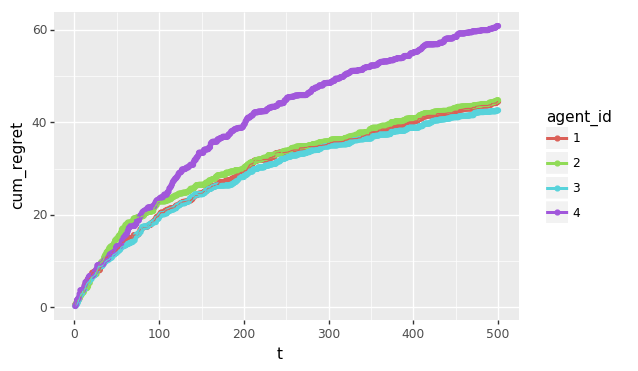

<ggplot: (8732150788545)>


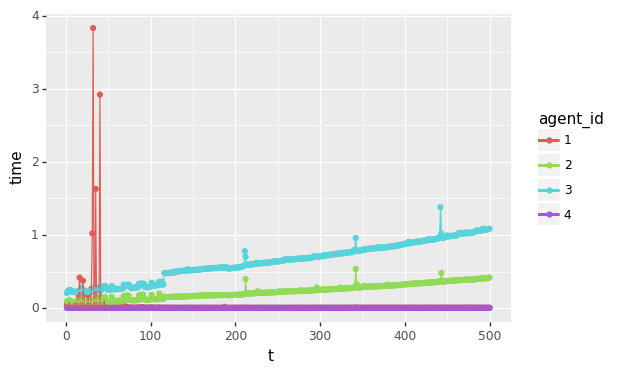

<ggplot: (8732260485301)>


In [8]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.01
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=1000 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 500 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_pgts_agent = lambda: PGTS_Stream(num_articles, dim, verbosity=verbosity)


for seed in [20]: #range(1):
    agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()] +\
             [make_pgts_agent()]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)

In [ ]:
make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, 
                                              step_size=lambda t: 0.2/(1 + t * np.sqrt(dim*var)/dim), n_steps=9999,
                                     init_pt=None, verbosity=verbosity)
make_best_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=lambda t:0.05/(1 + t * np.sqrt(dim*var)/dim), n_steps=9999,
                                     init_pt=None, verbosity=verbosity)
make_best_sgld_agent = lambda: SGLDTS(num_articles, dim, [0]*dim, cov=None, 
                                        step_size=lambda t: 0.05/(1 + t * np.sqrt(dim*var)/dim),
                                        batch_size = lambda t: 32,
                                        time=time_limit,
                                        n_steps=9999,
                                        init_pt=None, verbosity=verbosity)
make_best_sagald_agent = lambda: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: 0.2/(1 + t * np.sqrt(dim*var)/dim),
                                          batch_size = lambda t: 32,
                                          time=time_limit,
                                          n_steps=9999,
                                          init_pt=None, verbosity=verbosity)
make_pgts_agent = lambda: PGTS_Stream(num_articles, dim, verbosity=verbosity)

#reload(logistic.agent_logistic)

In [ ]:
n_steps=100
agents = [make_laplace_agent(), make_langevin_agent(), make_best_mala_agent(), 
          make_best_sgld_agent(), make_best_sagald_agent(), 
          make_pgts_agent()]
simple_compare(agents, num_articles, dim, var, n_steps, seed=1, verbosity=1)